<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B3%EC%9E%A5%5D_%EB%8B%A8%EA%B8%B0%ED%88%AC%EC%9E%90%EC%9D%98_%EA%B8%B0%EC%88%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. MACD
: ***시계열 데이터(time series data)*** -> 시간에 따라 값이 변하는 데이터, 이러한 특성 때문에 육안으로도 해당 주식의 추세를 알 수 있음

* 이동평균선(Moving Average, 이하 MA)으로 정량화 할 수 있음
* '이동평균 수렴확산지수'라고 함
* **기간이 다른 이동평균선 사이** 관계에서 *추세 변화*를 찾는 지표
* MACD = (단기평균 - 장기평균)
  * *MACD > 0 : 상승 추세 (buy)*
  * *MACD < 0 : 하락 추세 (sell)*
* MACD를 활용한 투자 전략
  1. MACD 기반 매매 : MACD가 양수면 매수(buy), 음수면 매도(sell)
  2. MACD Oscillator : MACD Oscillator가 양수면 매수(buy), 음수면 매도(sell)
* MA를 사용하는 이유
  1. 주가의 상승/하락 추세를 한 눈에 볼 수 있음
  2. 중간에 순간적으로 튀는 노이즈(noise)를 제거해줌 (smoothing)
But 과거 특정 시점부터 현재까지의 평균을 구하는 Moving Average 특성상 실제 추이보다 늦제 계산될 수 밖에 없음 -> 해결) ***지수이동평균(Exponential Moving AVerage, EMA)***을 제안




## [파이썬을 이용한 MACD 백테스팅]|

In [ ]:
pip install finterstellar

     |████████████████████████████████| 109 kB 31.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import finterstellar as fs

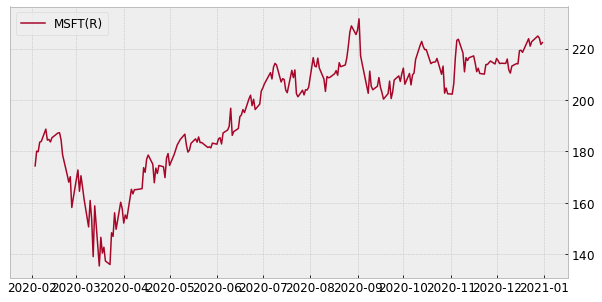

In [ ]:
symbol = 'MSFT' # 마이크로소프트 주식
df = fs.get_price(symbol, start_date='2020-02-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [ ]:
# MACD()를 구하기 위해 macd() 내장 함수 사용
fs.macd(df) # macd() 함수를 사용하니 macd, macd_signal, macd_oscillator column이 추가됨

Symbols,MSFT,macd,macd_signal,macd_oscillator
Date,,,,
2020-02-03,174.38,0.00,0.00,0.00
2020-02-04,180.12,0.13,0.07,0.06
2020-02-05,179.90,0.16,0.11,0.05
2020-02-06,183.63,0.30,0.17,0.13
2020-02-07,183.89,0.38,0.23,0.15
...,...,...,...,...
2020-12-24,222.75,2.24,1.37,0.87
2020-12-28,224.96,2.55,1.61,0.94
2020-12-29,224.15,2.69,1.82,0.87


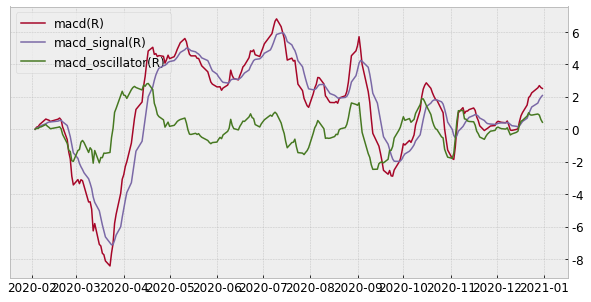

In [ ]:
# 이 지표들을 그래프로 그려보기
fs.draw_chart(df, right=['macd', 'macd_signal', 'macd_oscillator'])

-> 2020년 2~3월 코로나19 시기를 제외하곤 주로 0보다 위쪽에 위치

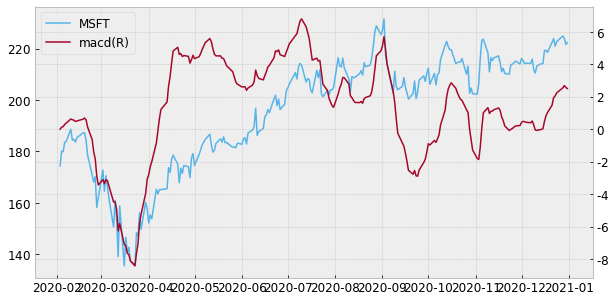

In [ ]:
# 실제 주가(하늘색)와 다양한 MACD 지표 비교
fs.draw_chart(df, left=['MSFT'], right=['macd'])

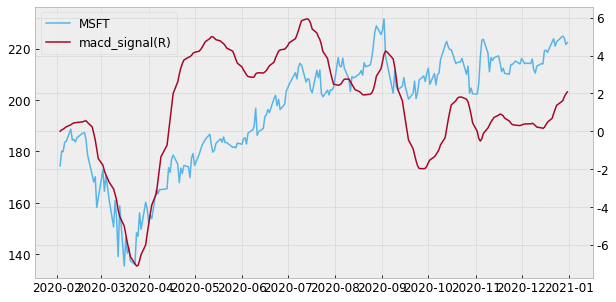

In [ ]:
fs.draw_chart(df, left=['MSFT'], right=['macd_signal'])

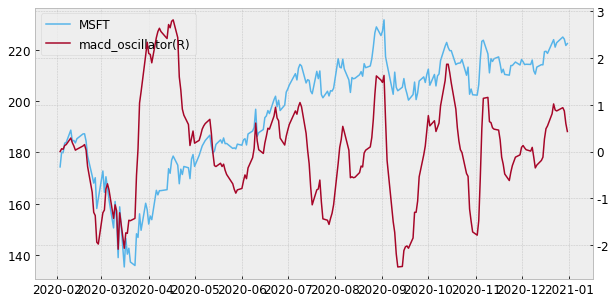

In [ ]:
fs.draw_chart(df, left=['MSFT'], right=['macd_oscillator'])

* macd_oscillator를 기준으로 buy와 zero를 비교 -> 0 이상인 경우에 매수
* position_chart가 1이면 buy, 0이면 zero

In [ ]:
# macd_oscillator가 0 이상인 경우 매수 (sell)
# macd_oscillator가 0 이하인 경우 매도 (zero)
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

Date
2020-02-03    zero
2020-02-04     buy
2020-02-05     buy
2020-02-06     buy
2020-02-07     buy
              ... 
2020-12-24     buy
2020-12-28     buy
2020-12-29     buy
2020-12-30     buy
2020-12-31     buy
Name: trade, Length: 232, dtype: object

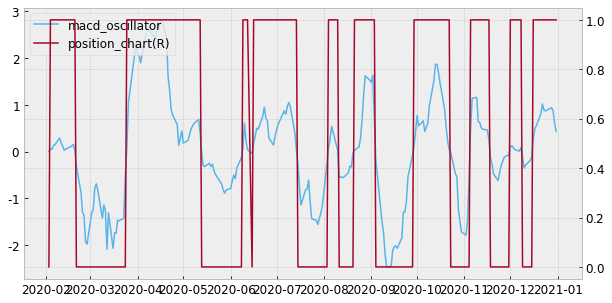

In [ ]:
fs.position(df) # 포지션 만드릭
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

* 백 테스팅 성과 산출 및 수익률 그리기

CAGR: 22.96%
Accumulated return: 20.88%
Average return: 2.26%
Benchmark return : 27.55%
Number of trades: 10
Number of win: 4
Hit ratio: 40.00%
Investment period: 0.9yrs
Sharpe ratio: 0.72
MDD: -11.28%
Benchmark MDD: -28.24%


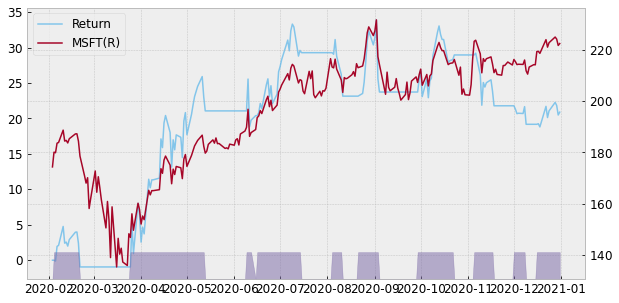

In [ ]:
fs.evaluate(df, cost=.001) # 수익률 계산
fs.performance(df, rf_rate=0.01) # 성과산출
fs.draw_trade_results(df)

![tn](data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAASABIAAD/4QBMRXhpZgAATU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAFoKADAAQAAAABAAACgAAAAAD/wAARCAKABaADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9sAQwACAgICAgIDAgIDBQMDAwUGBQUFBQYIBgYGBgYICggICAgICAoKCgoKCgoKDAwMDAwMDg4ODg4PDw8PDw8PDw8P/9sAQwECAgIEBAQHBAQHEAsJCxAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQ/90ABABa/9oADAMBAAIRAxEAPwD9/KKKa7pGpkkIVV5JJwAPXNADqK+Jvid8bPit4x8YXvww/ZhhsZ/EfhzbNqk+so62D28qjZ9nmjYh2DfeHasLwb8bvjh8LPF+jeFv2rYtLWTxrcx2GhHQVeUfad3z/aDIw2rhlwRnvQB97UV4l+0b8QNb+FXwP8YfEPw2sUmp6FZG4gE6loy4ZV+YAgkc+ora+CfjHVfiB8JvCfjXWxGl/rWm213OIgRGJJYwzbQSSBk+tAHqdFeXfFr4t+Ffg34SuPF3ijzpoLcqPItEE1y+84BWLIJGeuK+Nz4h/wCCg2vZ8UeFbbwknhm//wBLshdNOl0LKT54xKucCTyyNw7GgD9GaK/OD4t/toanD+ze/wAV/hHCj6xZa3b6HcrqEBEP2kkpMUVXyV3D5Tnp2pLa5/4KYXVtFcxW/gnZKiuuZJ84YZGeaAP0gor5P+BPxr8Uaz4mvvgt8X44E+JGiwC8vf7ORjp/2eU/u9kjNuLY6jFfU9xe2doUF1OkPmttTewXc3oMnk0AWaKKKACiivlz4+fGvWvCWsaR8I/hukT/ABG8WQyS6R9tQ/YMQEeZ5zqwZeOmAaAPqOjNfnKZf+Cl0Q82e38FeUnzPiSfO0cnHPXFenWX7Znw7T4O33xN1JLsf2NqA0O8CW4/5CYAVti7+Yt/Rs5x2oA+zKK/OUXf/BSW9H2zTIPBf2Of95D5kk+/y25Xdz1xjNexfAz45eKNS8Y3PwI+MqQJ8TdMtW1G6/s1GOnfZHZfK2SM24vhhkYoA+uKKKKACiivzi8S/tvwaj+1N4U+Afw/iJjF/c2OuteQEEPHGWj+zuHwRkckigD9HaK+Xvj38cNQ8F6rpPwn8AIj/ETxfG/9i/a0P2DfEQX891IZRjOMA14MZP8AgpfGN8tv4J2Ly2JJ84HXHNAH6NUV8/8AwR+PvhX4ueEtQ1eCRrW58N3J0zVGnUQxfb4BiYREscpvB2k4JFdB8Ifjb4M+NOj3Ws+FBcW62l1NaNDexiCctCQGdUJJKHPDdDQB7BRXj1n8bvBt98ZLz4GQi5/4SOy08alITGBb+QWC8PnO7J6Yr2EdKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKbvUkgHJHX2qp/aWnf2gdJ+1RfbhF55g3r5vlFtvmbM7tm7jdjGeKALtFN3Cgso5zQA6iqWn6lp+rWcWo6VdRXtpON0c0LrJG46ZVlJBH0NWjJGDgsAfrQA+imCRGOFYE/Wn0AFFN3qG2559KdnNABRTHdIxukYKPUnApk9zb20El1cyLFBEpd5HIVFRRksWPAAHJJoAmoqva3drf20N7YzJcW9wiyRyxsHR0YZVlYZBBHII4NUm13REYo2oW6spIIMyAgj8aANWiqdrqOn3pK2V1FcFeSI3V8A+uCauUAFFJmjIoAWijNFABRSZoyKAFopMijIoAWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKTNAC0UmRRmgBaKKKAEz7033rjviDqnivRfBetat4H0uPWtetLZ5LKzlkEKTzDopc8D15Iz0yOo/P22/am/bMgto7u9+An9o27jIezuy6uPVWi84flmvUy/J62Ki5UraO2skvzaPOxmaUqElGpfXsm/yP00znpSjOTmuT8Ea3rHiPwjo+veIdHk0HU9QtYprjT5XDyWsrqC0TMOCVPH9Kfrnjbwh4Y1LSdG8Raxa6bfa9K0FhDPKsb3MqjJWMMRuIyPxIHUgHz/Yy5nBK7X9dDtVWPKpt6HVUVhXHifw3aa5beGbvVbWDWL1Glt7J541uZo0zueOIneyjByQCBWw80cSNLIwREBJYnAAHUk1Li1a6LUk72ZLRXK6H468FeJ5Gi8Na/p+rOhIZbS7hnII65EbNiupyDTqU5RdpKzFCpGSvF3Fopu4VVvNQsdPhNxfzx20S9XlcIo+pYgVKi27IbaWrLf0pDgjJrzf4h/E/wAP/Dz4da18TJkk1jTdFg8+RNP2zyOu4L8mG28ZySTgAEnpXhWm/tzfs2XemaBf6l4oTSp/EEKzJb3EbmS3DMUxcGMOkZ3KerdPm6HNd1DK8TUi506bavbRdbX/ACOSrmNCnJRnNJ77n15j0pVxXyF8d/2hfEfwj+Jfwq0u0srS88HeOLw2V7eEs0qPKyLC0TKwQKA+8khsqCBjrX14CBms6+CqUoQqTWkr2+Tsy6OLhUnOnHeO/wA1cfTTS5FJXGzpGO6JGzOwVVBJJOAAO9fK3xG/bS/Z0+GeyLVPFcOrXTvsNvpWL2VPUybDtQD/AGmBPYGtH9r34g+Ifhn+z74q8TeF7P7VfmJLRSU8xYUu3ELysvOQisTzxnGeM1+dH7Dsn7Gmk3WiaJrcp1f4jaq0axy6tZFbWG4JG2C03bkDZ4DthnPAIyFr6vJ8kp1MLPGVlKSi7JR38230R85mmbzhiIYak0m93L9O7P2i0zULTV9PtdVsm3217FHPESCpMcihlJBwRwehGRV3joK+T/2sP2mbD9nbwhbDSrdNT8X62THpViys6HYRvllCENsXOAAQWbAHcj4a+H37QV78Vv2svg/8TbYT6RH4m0690TU7Dzma3FzapIWEYOAVZ5ImBIz2PINYYDhnEV6EsUlaCUmn35Ve3Tz17m2Lz6jRqxw97zbSa7Xdr/8AAP1s8ZeOfCHw80OTxL441a30TS4nSNri5cRxh5G2quT3JNdNDPFPEk8DCSOVQyspyCp5BB9DX4k/ts/tM/Df4o+MvCPgCzXUJ9C8Ia9M+vxvb+WJjbSLEVhBbL5XzVydvUHvXvN1/wAFCtYs/D+o+PNN+FGoR/D+wktrO21G4mFuZJpGwV27Su0IrEbC2CAGxnjplwhinQpThF80ruzaXpa+7e/oc8eJqHtqkJSXKrWer9dtkj9Q856UorHttZ0+XSbfW5p0t7W5hSZXlcKArqGGSTjoauWOo2GpwC7025iu4G4EkLrIhx1+ZSRXyrhJatH0anF6Jl2ql3dW9jbTXt5IsNvbo0kjscKiIMsxPYADJqzuFVLy1gv7WexuVEkNyjRyKe6ONpH5GkrdRt9jkfh/8RvBXxR8OJ4t8BarFq+kvJJD58e4ASRHDqQwBBHXkdCD0Ndujo43owZSAQRyCDX49fsnTzL+xb8b9HaR41sJtZVSjFGTdZKSVI5HTrXjsXxX/aa+F37LPw9+I/hHxza6d4bZZNPjsnginvpLhbu5G4meN90axooHzYAHTuftZ8GSlWqUqVRK0+Vc3W6utr/kfJw4pUaUJ1IN3jzO3TW2zt+Z+8/TJJ6Utfz1fGD4zftk/EL4IyXfxLtJdE8KWlzEZr4239lz38khCxQhQUMiqcv+7QLwSxO0V+k/jew/aqn+CXw2ufgrr1jpd3Y6NDPrUuoBHmlaO2jZADNHKpyQ27ockZOK5sZwlOgoe0rRvJuO+isr6vz7W7HRheJI1nPkpSskntq7u23/AAT7uPNGa/Hvx/8AtWfFXxd+xz4Y+M2h6k3h/wAR6b4jis9RNmPLivFhD4GDnCSfIXTOMgjpxXq0H/BRux1WET+F/hT4n1q2xj7RFCpRyOpGzfx+NYz4QxsY3jFPVp67NeumvQ1hxPhHKzbWie29/Tt1P0vzTT1zXK+BvE0njPwfo3iybTLnRX1a1iuWsrxdlzbmRQ3lyr2ZehrqzXzMouLcX0PejNSSkjyz4i/Gv4U/CbyV+Iniey0OW5UvFDPJ++kUHBKRjLkA9wKx/hp+0V8F/i9fzaT8PPFVrqt/Apka2G6KfYOCyxyKrMo7kDArg/2i/h5+zpZafe/Hn41eF4tcfw5YrAzurzFoTL+7iEG4RufMk+UsONx5AzX5KfDn4xfDHxB+194P8daJ4VX4feG7KaOztLTSrXdNcyzExxm5EZC/OzgOVBAQY+Y8n7DKsgo4vDTqQUrxTbenLda2S3Z8zmOc1sNiIwm42k1Za3s+reyP6EcjOK5bxh428I+ANDn8SeNNXttG0y1KiS4uZBGilyFUc9yTwK/Pf9uXQPHfxW+Jnwu+D3gG31S0uJZ57y61K3EiWkFvJsjZ2dCAWiCsxyR1AHLV8Q/Ef4ffsn+Dda1bwvqnjHxt4tu/DtxFDqU9jFDLZwOz7HcySZHyP8uM8t8qkmjKOF6WIhCpUqu8teWMbu17b3sr9LoMz4gqUZzhCmrLS7lZXtfa2tj+ge1ura+tYL6ymWe2uEWSORCGV0cZVlI4IIOQasEivxOuP2hvDP7K0Pgv4efs8+Irzx5Y6hdjVdYivIvPma2uo4vItLc4UROVBJVQSDjJ6itjwD+1R+0N+0F+1N4W8J6TDL4O0TS7p5L/AEqMEkWsIJn+2l1DFiMIFKqEYjAzzRU4JxPLKtBr2aTd3o7Lut7voEOK6HNGlJPnbSstVd+e2h//0P38rgPiszJ8M/FLoSrDTbogjgg+W1d/Xn3xY/5Jj4q/7Bt1/wCi2oA+aP8Agn0iy/sueFL6UB7mU3QeVuZGAnfGWPJ/E1798Q/gv4I+J3iLwp4n8VRTSX3gy8+3aeYpTGqzccuB94fKODXgf/BPb/k1Lwgfe6/9HvX19qOvaJpNzaWeqX8FpPfv5dvHLIqNM/8AdQEjceegoA+H/wBrrxZq+o/Eb4Z/s+3DIfCPxRmuLHWowoE7woN4EUvWM5A5Fa37GvjbXdUn+IXwyu3jOh/DfWDomkKEAkSzt12oJH6u2Byx5NfGviv9oq3b9qXxJN8TPCWreMH+GeqsPDx0eEkWgYYbz8A7t2eM4p/wu/aGFt+1NoPhv4Y+GNT8H6V8Q7+W812DWISJLq5cn54ScbVxxxQB9J/GItN+3x8JrGY+ZbSaLfF4m5jYh+CVPBP4V91634p8GaCBpmv61Y6U0sZCxXFzFAxQ/LlVdgce4FfCXxe/5SBfCQeuiX3/AKHXu3x0/ZQ+EHxz1NPFnj+zubjUNPtGhiaG4aJQgywyB1OTQB8WftgfDr4XfDH9lKTTvhZeJd6VfeLrK+nlW6W7UXEsjM/7wEgD2zxX6UaL8Tvhqmj2Kt4s0kEQRgg39vkfKP8Abr8JLnTLaH9grXdEG420XxBS2UMct5YkZAM/Sv0h0v8A4Jv/ALMdzptpcS6Zfl5YkZv9MfqVBPagCn8MAdW/by8e+KNKH2zRrjQrSOK+g/eW0jrjcqzLlCR3APFe1ftMfBvxl8W7jwBL4RvIrRfDWuQ6jd+bI6b4I8ZVdgOT7HivGf2fJn+F/wC0n4p/Zt8J/uvBWgaXDfWsMnzzLNOcuTKeSMnpX1B8ZPjloHwXm8LQ67Zz3Z8V6nHpkHk4/dySdGbPagD24UtIOlLQAV5R4k+DPgnxV8SvDfxY1eKZtf8ACkc0Vk6SlY1Wf7+5Bw3tmvV68i+MPxh0H4P+GLjXtQgk1W9RQ0Om2pDXlwNwB8qPq23OTgUAHxf+Lfhj4V+F7vVNXEmoXe1RHp9ntlvphKdgaOHIZlB5JA4ANfJnwP8A2RrPUvgzr3gr4vqZrDxP4hfxHbx2srxSxpLteJZCVBDD+Jf1r0r4TfBvW/F3iy0+PPxjlS98QrvfREhDRC0025XfHBPGRhpU3sGPrX1hq+t6N4ftBf65ew6fbblTzZ5FjTc3AGWIGT2FAHy98W/2qvCnwI8RW3gW/wDCXiLWmjtIpUm02yNzCE5QKXyPmG3mvGPgDbt8U/2o9c/aU01hpWlavoo01NJv/wBzq0bwtGDJJbnJWM7flbPNfot5VtcKspRJQwBDYByD71+cXg8lP+Cl3jGFDtj/AOEUgO0cLnMXOKAP0loopKAPGPj78Qbz4dfCzxDrvh+6gi8RQWU0mmQS7XeedBwscROZD/sqCa/JzT/hzpmiftDfs6fFq7tJ7Xxb8R3vNQ1xZSyL9pER+5C2PLHP3a+iPi/4p8M/HH9pTw/oUOs2vhlvgtqi3OoHU5kiS+W5RWCwZPJXHOar/tLfEHwHqH7VX7P2qad4gsLiy0+41E3E0dxG0cIaLC72BwuT0zQB1f7Qh/4zi+Aw9r3/ANBr9Gbr/j2m/wBxv5V81/Gb4OQfFIaV8Ufh3ewQ+ONBiY6FqEj+ZaIZSNzMq5DgjOOa8Bn+H/8AwUO8mQv8QfDxXac4tG6YoA+WvhJ8I/F3xs/Z1+MfgXwRdxWWpy+OridZJXeNdkE7MwygLZIHAxXcn4jp4K+I1r+1Ve6ZfaV4UtNOTwcLGWEw3LaomP8ASBCxVDCxXh87j6V6n/wTNj1K38CfEWLW5Vm1CPxTercyJwjTAnzGA7Atkio/jN4j0H4s/H5fhh43u4Lr4TWOmJqYngdY4v7YgcgR/aQdu/aT8nWgD6C+BXwZ1628Tz/HX4sSwXfxC1W2ayM1izJaf2cWDwr5RAAcD7xr60rw34J/Gnwz8VtCB0y1m0W8tGeIadekJdiGEhRL5f3tjdmxg17lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfMP7XvjPxN4J+Cl5eeEtQfRr3VtT0jR31GMDfYW+qX0NpPcqW4Vo45GKsQQrYJ4FfT1c74s8K+HfHHhzUvB/i3T4tU0bWIHtru2mGY5YpBhlOMEexBBB5BBFAH53/tJfBPwr+zV8F9V+NPwP1rUvCnjfw41o8eoT6ndX66m89xHbvFfQXkskNwZFckZUFWwVIGav/Bqy8W2P7c+qR+MPHsPxBvH+G8LJew2lrZiCP+2H/cFLUshIOW3E5+bHQCtH4EfAT4JfHT4e6H8QPEA8R+KfDcdxfwaf4e8VavJq2m2bafdTWO5bd/kkx5RMfmmTapGORmvQ/AH7O2l/C39rG/8AHXw68H6f4Z8E3vgmLTZG06KC2jk1Uam8zBoY8MW8jZ85XGABnjFAHI/tD/DTwP4g/aS+Eml65p9zcRfECTWbXUnj1PULU40vTjc23lJb3EcaHcp3ELlh1r598JX9r8KI/H3i7wRf2Hhi+0rxnrXhS3m1v+3dahl02yigkVRFFcuFm8wsTKw6cCvef2sfhr8LNC1TSPit4jk8X634w1bVodM8OaXo+v3Nl/xM76AwbLUeYsVorwo3nSDA27t2d2D578Pfgz8afglqt54+0L4WvqrzPc3dzYD4gX19cTTXS/vpfIu7ZLWa4cDq7cn+LoaAPef2B7u1sv2Lfhbd3syW8EekkvI7BEUefJyScACtjxR+zz+yh4y8Q3/irxHbW91qeqTNPcSrrt5EHkfkkJFdqi/RVA9qP2ZPCPwi8W/skeC/B2hRSeJvAd3pvkpFq8CCWWNZnLx3EQ+XekoZWAyMrwT1r4wb4H/CD4rfF3wfH4J+DGnad4e8F/EDxD4c8RfZrVJLe4tLDS2aGe62qoWN7iRNitnDgc5NOwHp134A+DHwd/a4+CX/AAqy4j0qz1W08VNqYGr3F1DILezgEHmC4uJVG1pW29Mk+1fcPxO+Mvg/4U6dYX/iCLUdQk1Ysllb6Tp9xqVxcuqhtqJbI+MgjDMVXnrjJr46+EH7GnwZPxI+L0njb4UaWdIGv2//AAj5u7BDCLE6dbeZ9l3DAj8/zN23jdur6f8AHvwr+I2tTaZb/DD4mXXw70jTLRbVbCy0qwvImEfCENdRuy7VAUKpxgUWA+V7/wAN/tT+KPilp/7WtloCabDoNs2mWHgK5nRNQvdGuNz3M9xOGMEN+zlHihyUVY9jOGJNfYHwr+N3hv4rS3um2Gka1oGr6WiPe2GtaZcWE0BkJAXfInky8gjMUjrxnOK+NdZ0b9pzTP2h/DfwWT4+ai9lrug6hrD3R0HSPNjks5ooljC+RgqwkJJ68V9WfDz4YfGHwr4kj1fxp8YL/wAZ6Yscitp1xpOnWcbOwwr+bbRLICh5ABwe9FgPnq+8J+Evjt+1f8Rfh98dJZNQ03wpp+jyeGNAmupba1uLa7gMl5qAhieM3Ei3AMO9twjC4wCc1ynhC6GjeGf2pvhb4P1GbV/hz4P0l00WSW5a9WzurvSppdQ0+K5dnZ0t3CEIzsYzIUzxivoj9pb4Val8TI9FTTPht4Y8etZ+bvk169msJrUHbgW8tvbzSEPzvG5RwODXi3iG1/aD+HXwR8TeFrH4R+CdF8GWej6kbqz0rXrmAi2aCRrjygNOC+YyliGbqxyTSA+lP2U8f8MwfCQD/oUtE/8ASGKvyITwrY65eapqfjHwHpGg6rLqN/5lofhTrWqlVW4kCObyCVY5jIgDllA61+p/wy8A+A/i1+yx8MdD1GzvrHQG8P6Ld2ttb6ndW1xCi2SeUj3Vo0Ekm1Wwx4DEZK9Mfk+2oeFNH+Ifia8uPEvhq+0FzFa2OmSfEnxHE1k9q0iTSNKkbO7zfLuRmIjK4U4NAH15+xT8P/Dnhv40+JPE+kq9nPqWhRWhs7XwPqfhSwC29zvMplvWeOSZjIF2ghiozjCmv1LFfih+x14V8JfEv4k+JPh741u5PEsumLJ4gs9W0Txlrl3bQQXF2Vg02RWeBWa2QAbiGZ1wW5NftcDkUAfM/wAQPA37TPizxPql54L+Jlh4H0O2jRdLtINIi1GWeUIC0l9LcnhS5KiOEL8gB3buBifB74ifFD9oP9mjTvFWhajZeEfG17JPYz3y2v260im0+9e1uZoIXZQ6yrEzRhmwpYA7gvPNfEPx744+NfxB8TfAP4YavH4P0Hw15Ft4o8TMym9El3EJTp+lxNgLMYXBkuXyItw2Kzcj3vSvAnw28G/Cqy+Evh+6GgeGvsh0e0a2vDb3A8xGz5VyGD/aG+Z94O8tl+vNAHgHgrxf8afhv+0lo/wM+Ifi2L4i6T4s0K91e3vPsENhfaXJYSIjCdbb928E/mbY2Kg7wVycHP24WCgluAOSSa/Nvwv4M0/9nH9rXwf4O+HOvXPia2+KFlqb67b6vMmo6nZx6bEJLe6S/ZftKwM7eX5UrshY5TDZr2P9rZ/jV4v+HsPgz4AacNcGrXxsvEM1lqVvZXlrp6YM8FvLKSsc8wPl7usaknGSCADgPh1+0342+J/7YD+CdAMS/CiXQ9SbTZ/KUyanfaVdQwXN5FLjd9nEkrQx4O1/LZh1FaFj4i/aK/aA8RePdW+FPjqy8AeHfB2q3OhaXbvpcOoSahe2AC3E168xzHCZSUVIgG2jdnPFeAeHfFHxX0P9sL4W6BB8Ef8AhE7TTPCF7pVvp0Wt2cqW+lm9tFlu1aNQpFuAMxfffPBzmvozx38EZPh7r3jb4oeB/jJdfDHwvrjNqfiSwW1s7qBbhIgJ7m2luPmtJZI1G7AbLfNjOKAOQ0/9p3x/8T/A3wd0bw9JB4P8VfEbWtS0TWL5YluY9Mn0OOdrxbWOYFHknaDEHmbgqtkhiK6Dw9+0V418E+FviboXi+RfG/ijwV4jj8N6DJBFHby65d31vFPaQSRxBY1mjMpFwYwFWNDIQMGsr9kn4BeDdc/ZL0HQPiPobXGn61qV94ltYruWVLu1W7upJrOYXCsk0U/kFGZ1ZWBYgnrXi+pxRaPpa/F74V2dr4X8LWHiC28L+C551a5iFxrN6lnqniefzmLXM0oLQ2rzM25RvJIloA/UPwFY+LtN8GaPZePtTj1jxHHbJ/aF3DEsEMlyRmTy41ACopO1e+0AnnNddXyj8HfE3xA0f40+OPgl4w8TS+NrTQtL0rWLXVLm3t7a6ibUXuIntJhaxxQtt8gSIQgba+GzgE/Vm6gB1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTTTqTA60AfM3x3/ap+G37O2r6Dpfj6DUCuvCVkuLWASRQpEQCXJZSSSfuoGbHJAGK8guP+Ckv7L8SBodU1Gdj/AApp8oP/AI8AK+5tS0XR9ZhFvrFjBfRDok8ayqM+zA18Vftv+A/BOjfst+Ob/R9AsLG6jjsissFtFHIP9NgzhlUEZHH0r6PKI5fVlTo1oS5m0rqStq+zR4OZyxlKM6tKceVK9mnf8z7N8N69pfirQNO8TaJN9o0/VbeK6t5MEbopVDKcHkcHoelbdeGfsyuX/Z7+HbHqdDsf/RQr3OvDxVJQqSgujaPYw9Rzpxk+qR4D+1JqOoaV+zx8Qr7S3MVwuj3KBh1CyLscjHQ7WOK/KX4ReLf23vhv8BvCviX4d6XBqHgCKUSwxWlvFeX00L3DmUOg3SKpYMCQPlyK/ZX4reEpfH3w08VeCrZlWfW9Mu7OJn+6ss0TLGT7BiDX5ofATwd+3po+heFfhTZ2Vn4B8LeGLnddX9yILi4uoTOZHjVQ0m5SCQNoTPXf2r7ThzFUo4GpGSptqSbU+qs9ut7+u58rnmHqSxcJRc0nFpOPe/XyscP+0L+0h+1L8Uvh3qmp+E/BGqfDLwhosaT6lfyySQ3cwaRY0SOVkhZRvYZWMFiOS2ARW7+0xrV14h+Bv7M3xB1OU3GsNqWms12/+tLSRI7kt1yzRKx9SM1+oPxb+HGnfFz4ca98ONXupLO21y38lp4gC8bBldXVW4OGUHB69K8m8QfspeAfFXwy8A/C/Xb69ksfh/NaT2k8brHLM9qhTEnysNrgnIHI7GpwvEWEh7K1NQ5JPRXbs421b31DEZHiZOpeo5cyW9lqnfRLbQ+Nf2tfhv8AFnxr+174AuvhK8+naz/Y3nQanJE/2O2ltmmk+eVUdRuHykMDywGOa948bePvjb4M/Y38b678erCyg8XR29zp8YtHRkmhuttvHM4iJRX/AHjnapxhRwCSK1/jJ+yv8TPib49vPFXh/wCMms+FtLu4YoV0228zyoRGuCE2TRghj8xyucnr0qT4d/sR+CfCfg/xZ4S8ZeJNV8ZR+Mo4or2S7lMQXyG3o8SgvtkDc7iT6YwSC55nhJUMPGrKL5OXRRfNo7tc2i26ahDAYlVazpxa5r68y5drJ21+/Q/KD4LfBH4h+Atf8FfGe81/w34V061mttRW51HVoVdrZiGYNbozSEmMkbdoPOD7f0C+A/iB4M+JmgJ4q8B6tBrOlSyPELi3OU8yM4ZeeQR6H2r8nx8LP+CZ3gLVJ5PEXjS41ySwleF7W5u7i4RZIjgqBaQISARj72019u/s4/Hv9nLxvc3Hwu+A8P2K30WA3Igis2trcozYZlJHLFiC27BOc8812cYTljIrERpz06uHLG3zvd7anPwzCOFk6LnHXpzXd/wSPrWvjT43/sgaf8f/AIo2Pi3x34qvj4WsLFbePQ7fMai5DsTMJdxA3BsH5N3A+bHFfZuM9eKQoDnOea+EweOq4eXtKLs7WufYYrCU60eSqro/FT4IeGbLwv4z/ac8IfD6e5bwBofh/UrMRzSmZGu1jdA2ehb5JcNjO0Yrnfhj8NfgpH+wR4o+KXjPQ7ZvEEsd3aQX758/z0kAtFiycK3mMOgGR97Ir9QPD37NXgjwF4B8feC/Ask1rL4+F/JdXV0/nyLNexPGMYC5jjLkqvXk5Yk5rzTwB+xr4Ztv2eNI+BXxUujrUNhqDam8lkzW6mbcxVRnJK7WKtnrnjBwa+4lxNRlJzU2vept23ajF3fze58gsgqpKPKn7s/RNtWXyR8NfGrTPFNv+wT8E/EWqlhrOjajbyW3mf6wRTef9lGDycRCPj0xmvpn4ffBT9tjxZqOjePfiV8W28Ob7qK7n0W2gSQJArhjAdm2MblGCPmxnkkjFS/t6fD7xlqmmfDXV/Cfhm48U+GfCOqJNqGj2KszvFGF2DagZghRWjLBTt3ZNVPDnjb9tP8AaC8Z6NeaZobfCDwRptzFPdPeR7ru8jRwWi2TIrsGUYwEReclj0rd4udTBqrTcIpubblZuN38KTu9d9F21MPq0IYp06im7KKSV7Oy+JtdvNn6VDtmjJpFORzTgoIr80Pvz4R+OX7QX7RPhHx5e+C/h38GLrxTo8MaY1B1klhuRImW2iMBQFJ2kMSeDwK/LH4pa78UdP8A2h/Cfjn4j6HoXw+1eKazuLWxdEWzs0gkBSe5hiLyKC4LlnGSRkcAV/R5gV/PR45+F/xj+Kfx/wDiJ4Lm8GzX3ibxJq4VNVvY2NtpumRyEiSJ2G1VKCMK4bOwFVBLV+n8EYyi3NOEYKMdXd3d9G9Xbzenktz8/wCLMJVXI1KUm5aKysrdNFf01/I+sv299G8D6vbeCv2gdJ+IcGi3TWkllYNDC16t9C+5y9sY9wVlEjAs2ByPmUjJ7j9hW7/Zy8UeG9O8J+EtMuLvxX4A8y8N3q9pHDdGTUfllngCSShUO1VC7sqAp6nJ+yPAnwT8EeDvhx4T+Hd7pttrlv4RijFrLeQJKVuFyXmQODsZmZiMcgHGa/KH4a/Cv9s3xd8ZvHfivwxaS/DZfEl+y32p3sAjMNvFKWjhtFYbpFChRmMBWAGXx148HiaWJwFTCOryqnqm2kmm3ZWSu9G9L7uxvisPUw+MhiVT5nPdJNu9u97LWx7/APtp/tNL8J/GVj8N/hzp2l6f4mvI0vdQ1q/tIpUtopCdqqrIxd2Ckk4bjAUFjxyvw7ufi/8AtYfsa/EOz+Jrw3U0cpk0K+ljjsVmNkFmyWwiBA6lN5wMFgTxX6DeKvgD8KviO+kap8UPDtl4o1nS7eOD7bcQhXl2DLb1QgFWbLbGyoycCsr4/fC/WvHfwH8RfC/4ayQaJd3tmltaIB5NuI0dS0HyD5EkQGM4HAPSuLD57ho0KNClC1RSTc3raz6dbeXY7K+UYh1atacrwadorzXXp/wT83/gd+zFo3x7+GmnfFD46/Fi71fSbUfZlsYbxY7OyFthPKkmkOwMq45QKMEHc3WvevBnxn/Yp/ZA0XU/DHgvxZLqgv7o3M0NtJJqbiUKEwGQeWnygfxDPvXl/wALP+CdvjbV9D03SPj34ymi0LSy32fQdIk/cqXO5neUgJuYn5iIyx7t0r70+H37LfwC+GYjfwp4LsEuocbbq5j+1XOR3Es+9h9FIHtXdnmaYOU5wnXlUg3pGKUYpdNbdPQ5MowGJjCMoUowlbVybb89On3ntOhazY+ItFsNf00sbTUoI7iEuhRjHKodcqwBBweQeRWN498UQeCfBOv+L7ggJo1jc3fPQmGMuB+JAFdeqKoCrwBwB6VWvLCz1G0msL+BLm2uUaOWKRQ6OjDDKynIII4INfn8XHnTa0v+B9pJS5bJ6/qfmZ+w18Lm8Y/sjeLNK1mWWxj+I91qaeenLrDNELYSLngkMG/KtP4a/wDBOL4d+DprXWPid4ivfHA0cF7a0cG1sYgreZjyhJIxBOSV37T3Br9F9H0TR/DumW+jaDZQ6dp9mmyG3t41ihjQfwoigAD6Crk0STRPC4yjgqw9QRg19DieKMVKrVlSm4xnK9tL9lrvtpoeJR4foKnTjUjzSgrX6d9tt+5+XNvqPhL9s/wPpHxt+LeoN4O8G/DvVbt7vSzIJLO9ji2tG0jttZXx+7YANuyVQAtW5oPxL+MX7ZugePvC/wAMYk8CeAPLisdM1maFzcXO1ts8QAIG1487tnMYwuSSazLf/gnAg1htAvviLqEnw2GoHUF0CNGTLE/cZ/M2ZC/L5gTdjng1+kvhjwzoPg3QbHwz4XsYtN0vTo1ht7eFQqIijgADv6nqTya9HMczwlKKWGfO07xutIK9+u8m9276HDgcvxNST+sLlT+Kz1m7W6bK3Y+A/jr8B/hj8IP2JdQ8EajHNqdv4XT7dbzbzC82qyMQsrhDjaXkPyHI28e9d38AfiLo/wAGP2WfCHij46eMI45dQs/t0TXTgzGCf95BDDGvzybYyuAASCcdAK+qPiN4B8O/FHwTq/gHxXE0ul6zA0Euw7XXPKujYOGU4KnHUV8VeAv+CcXwb8N6zFq3jLUtR8aR2e0WtpfuEto0XorInLgccZCnupFYYfNcPWwrpY2o787lort6bJvRa3ubV8vrUcQqmEgrcvLrpbXr1eh3vwD/AGo/E/7QHj7UIvDfgS6sPh5bQv5GuXZMbTTo2AFTGwhh/CpYr1Y9h9mgHJzVXTtM07R7CDS9Jto7KztUEcMMKCOONF4Cqq4AA9AKu4zXzuOrUqlS9GHLHtdv5t938l5HuYSlUhC1WfNL0t8vQo3+n2GqWkun6nbx3drOu2SGZFkjdT2ZWBBHsRX5xftJa5q+rftXfBj4OeE7w6HZWkiaxetasINyRu2I224yqxwthfu/P04FfpXtFfKfx/8A2Q/ht+0HreneJ/EV3f6TrGmw/ZlubCVYzJBuLBXDKQcEnBGDyQc8Y9Hh/G0qFe9dvls13s2rXt1OHOsHUrUbUkua6fyTva57qfGngvWNSn8I6b4jsJNZlhkItobmKS5RQMFvLVt3y5z0r8rPCH/BPT4zG71DwV408c2lv4B1HUPt1+un7ze6kyn935u6NQPXDOyoxJVWJzX238F/2M/gn8DfECeLvC9pd32vxo8aX1/cGaRFkG19qqEQZHGSpOOM9a+rtoxitaOcPAynHATvGVrtxV7rtva3cyqZWsWoyxkbNX0T6PufnF+0j4e+D37JmjWPx98H+GoJPGmn21toGiQTSObUbUKmV4lILOkAYF87jxk5Oa94/Z18RfATxcl/4z+Gp0RfF+vxRXevrp0gknFzIoMgbcd4QOT0AUnk8814F/wUG+H3j3xcPh34g8O+F7nxloPhy/mm1PTbRWeWVX8vAZEDOVZUZSQp25561wH7Jfwg8Z6n+0NffHWT4eH4T+FbfTpLK20oh4nuJZdoLGOQK23jcx2qudoUEgmvc9hSrZWq9Ws/aa/aXR2ULXvrutDyPa1KWY+yp01yaaW7rWV9vI//0f38rP1XTLLWtNutI1KMTWt5G0UqHoyOMMPxFaFFAH55alP41/Y61i5fQdEvvFnw41DEGj6Fo0LTT6dIPnlklLADa5JxyeTXMG+8Wfth/ErwJ4is/C+qeA7b4Z6nHqdwNagaE3iOyjy4duQWGznOBzX6aUUAfn/+y/4R8QaT+0Z8fNY1zSZ7Wy1TVYXtJp4isc6AHJjZhhh9Kyv2gPBviTUv2z/gp4i0jSLifS9OhlF1cwwsYYSZGPzuBhfxr9FaKAPmz48fBG+8fG28cfD+5h0X4h6RH5OnapNuIhhdsyJhQfvfSvmzUPjb8cPilpcvwM8GeH9Z8J+MLaMwy+Jr+1K6dK9kP37KwBOJ9p2cd6/SaigD8E7f4U/FKL9ifUvC+oaBf3Gvf8J3FcvEttJ5ksayHdMExnYeucYr92tGjaPSLKORSrLDGCCMEEKOK0qKAPgrwP4X8SW37ePjzxTcaZcR6RdaHaRRXbRsIXdeqq5GCR6Zr6z8dfC/wT8SX0eTxjp637aDdrfWe4keXcJ0cY9K9CooAQUtFFABX5jftean4q8D/tM/Cr4o6V4T1TxTpehWd8tzFpsDTHMhAUH+EHvzX6c0UAfnWP29NYAAHwS8YgD0sh/jWr4/t/Ev7an7P95Z6Rol94FvbLVIZRBrMTRSyJa/vCVVNxIbOB719/0UAfnLa/tx63o9tFpD/BjxfM1iqwGRLL5XMY27l56HGRW78A/BniT4ifHzVf2s73T5/Dena5pX9kJpGoRtFfxvAyDzHXG3a23jmvv2igD5H/ar8UfFvw1H4E/4VSt0xvdchh1L7NCZcWZ+9vwDhfevrZeVH0p1FAHy34z/AGNP2ePiD4p1Dxn4q8LJeavqjiS4n8x1LsqhQSAfQCvh/wCNv7FPwy0n49/CPRvBXguZvDGpzXg1oxeZJEqqgMXmPzs56cjNfsJRQB8gfFTS/iF8G7fwz4n+GJlm8CeDLZo73w9ZxtNeXqE4RYRjBK5yckV5S/7eGtTo0I+CnjFfMBXJsuBnjnmv0VooA/PL4S+GvEv7KHwa8WeMtV0m68Uz+LtYbVotO0yJnuoI9RO4JIjAfNHu+fHTBrzsfsUePJ/2aJPhz/bNqNUn8Rt4k8w+ZxA6l/IPy7vMGcY6Zr9UaKAPz/8A2ffAvibxl8b7z9pK9sZvD2mS6R/YI0u9jaK7822ZczbcbdjY4Oc1+gAoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvP/AIo+N7j4c+BNX8aWuiXniKXS4vNWwsE33ExyBhF68ZycAnA4Br0CirpySknJXXYipFuLUXZn4CaL4xk8L2LaT4R8K/GTQNL864uI7Kx1W4htonupXnl8tBa4UNI7Mfc16r8N/wBpHxT8OdffXv8AhC/it4n3wtD9l1u+uL21G4g7xGbZRvGODnjJr9pqK9z+0sF/0Cr/AMCkeP8A2fi/+gj/AMlR+Q/xT/attfjH4YXwr41+Avi94Le5hvbS4tRc213Z3luSYbm2njhDxSpk4ZT0JB4JFeHS/F34k39t/ZWtr8Z7/SWGyS286C3eWM8Mj3NvpsdxgjglZA3vX700U/7SwX/QKv8AwKQ/qGL/AOgj/wAlR+U/gn9s8/DnwnpfgbwT+z54m0rQ9FhW3tLaK3mCRxrz3gySSSSTySSTya+e734heHbjxBr/AIk0v4VfFTQp/Euoz6rfQ6XrOpWVtJeXOPNlEMUYVS20DgdAPSv3copf2lgv+gVf+BSD6hi/+gj/AMlR+JHgv44nwP4ksvFFh8OPixqM9kWKwajrWp3lq+4EfvIZYyjjnPI64NfRH/DwTxT/ANEM8Vf9+Jv/AIxX6X0U/wC0sF/0Cr/wKQfUMX/0Ef8AkqPx71P9qvUNT+Mei/GiX4M+MV1TQ9Ju9Ijtlt3+zvDeSpKztm33bwYwBhgME5Feqf8ADwTxT0/4UZ4q/wC/E3/xiv0woo/tPBf9Aq/8CkL+z8X/ANBH/kqPzQ/4eCeKf+iGeKv+/Ev/AMYrnPGX7b+v+NPCGueDr74JeLYLbXbG6sJZI4JfMRLqJomZd1uRuAbIyCM1+qVFH9p4L/oFX/gUh/UMX/0Ef+So/Jv4d/tnaz8N/h54b+HWmfBTxfdWXhnTLTS4ZpoJPNkjtIVhVn224XcQuTgAZ6Cvl7RvGWveF7N9K8KaR8YdF0wzzzx2drNCsEJuZWmdYw2nEhdznGSa/oFoo/tLBf8AQKv/AAKQv7Pxf/QR/wCSo+Bv2Mk8Q+Jk1fxzrWrePI/sxbTxpvi2aFoJN/lyi4iVLaByy42ZPA3MOc8ez/F/9oi2+Euv22gT+E9W1pri3E4nsod0AyxXZu7sMZI7Aj1r6SpCqnqAa5sHjcLDE+1rUOan/LzNf+Tb+Zvi8JiZYf2dGtyz/m5U/wANj8j/ABX4q/Zc8ceI7/xd4v8A2d7nVda1STzbq7nsA0sz4C7nbPJwAPwrcHxQ/Z7X4fN8Kh8Bb0eETdfbf7N+xDyFuu0yjOVkGOGBBHY1+qexP7o/Kjy0/uj8q+k/t/Jf+hd/5VmeD/Y2cf8AQf8A+U4/5n5g/Dr43fBX4SzXl58OvglqeiXeoKqXNzFa7rmZExhXnctIyjAwpbHtXUeE/wBqD4e+BP7X/wCEP+EesaR/b1/Pql/9ntQn2m+uSDNPJ6u5HzHvX6LeWn90flR5af3R+VH9v5L/ANC7/wAqz/yD+xc4/wCg/wD8px/zPzyn/at8D3Piy18dXHwo1mTxBY2ktjBfG1BnjtZ3V5IlfqEZkUkeoFeaa/8AEr9njxV4ul8deJPgJfanrc80dxLPcWYkEk0QURyPGxMbuoUAMykgDGa/Vjy0/uj8qPLT+6Pyo/t/Jf8AoXf+VZ/5C/sXOP8AoP8A/Kcf8z4F1T9sfw9rWlXeh6n8Ndfnsb6F7eaLydoeKRSjLlSCAVJHBFc5fftM/DTU/BC/DbUPg7qlx4VW2js10x7JDarbwgCOMR9AECjbjpgEc1+jvlp/dH5UbE/uj8qP9YMl/wChd/5Vn/kH9i5x/wBB/wD5Tj/mfm74F/aS+GvwzsrnT/Avwi1rSYr6UTXDRwFpZ5QoQNLK5Z3IUADcxwBgcV6FZftq2V7ewWY+HfiIefIkeRbhj85xwM8/SvuDYn90flQEQchR+VRUz3Jmmll1n/19n/kVDJs3TTeO0/69x/zEjYtGrEYyAcHqKfRRXw59ggooooGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfIH7ej7P2T/HZ/6Z2I/O+txX1/Xxn+37Js/ZP8aj+/8A2eP/ACdgP9K9TI43xtFf3o/mjzc4dsJV/wALPWv2ZkKfs9/DtT20Ox/9FLXuVeNfs7R+V8B/h/H6aJYf+iVr2WubH/x6nq/zOnBfwYei/IjPc0DHUVJRXHY6RmBRgdBT6KYDenFNIHIPSpKKLAeBL+y7+zsNTm1lvh5ozXlxI0skjWiNudzuY4bI5JzwK9T8O+C/B3hBXTwpoVjowlAD/Y7aK3LgdN3lquce9dVRXTWxtaorVJtrzbZhTwtKDvCCXoho706iiuY3GEdzSD361JRRYBvFJhTT6KAG0o6UtFAAelR4P4VJRQAzmin0UgEHSk4xxTqKYDD1pVp1FABRRRQAh6UmD6U6igCPFOxTqKAGigDHWnUUIYUUUUCCk4PFLRQAUUUUANYdxSGn0UWA/9L9/KKKQ0ALRXwb+2b448W+EfFfwYtfDGqzabFq/iaK3vFhbAmgIXKP/s194KQVBHNADqKQkAZPamiRD0IP40APopM03zE9R+dAD6KaWA5J49adQAUUm4ZxnkU0SKehB/GgB9FIGBGR0pNwzgHpQA6ikLAdeKAQaADNLXwh+w7438W+NIPik3ivVZ9UOmeLtRtbbzm3eVBGV2xr6KOwr7voAKKZ5if3h+dOzQAZpa+XvCP7Qtz4l/aS8X/AeXS44YPDNnDdLeByWlMqo20r0GN1fUAYEZHP0oAWiml1HUgZpPMQnAYH8aAH0UmagnlAglKN8wVsYPfFAE+c0tfBf7B/jjxd430T4kT+LdVn1WTTvFV/a25nbcYoEdgqL/sjtX3pQAUUU3cAcZHFADqKaHU9CD9DQWA+8cUAOozTPMQ9GB/GvGf2hfirN8Evg/4j+J9vZLqMuhQpKtu7bRJvkVMZHI+9mgD2miuJ+HPi1vHPgTQPGEkK2z61ZQ3bRK2QhlUNtB74zXalgBk8UALRSZpNwzjvQA6im7hkjPIoDqTgEH8aAHUUzeoOCRn0zSh1b7pB+hoAdRSVwfgz4neCPiDe63p3hHU01C48O3Js75UBHkzjqhzjnigDvaKKKACis3Wr5tL0e+1NU8xrOCWYL03GNS2PxxX5heCvDfxX/bK0l/jLonxG1P4eWs00tmNLscPCptm2F8sM5bGTQB+p2aM1+YGqD4l/sZa/4Z1jxL44v/iVb+ONSh0MW2oEIloZDv8APXaOWwMY966z4ga547/aN+Nvir4EeFfEt38P1+H629ydQsSGkvReRg7HVuAEI4x60AfonkUtfmF4m+BXxh+AegX/AMZtQ+Mes+KLbwfE2oSaZcBVhu1i/wCWTkDIBr7u+DHxAl+Knww8O/EKe1Wxk1y0juWhUlghcdAT1oA9PooooATPalr5w/aq+Nl38APhBqPxDsNPXU7iCSOBYWYp/rsjdkc/L1r58/4J6/FPxh8RfgZ4l8aeMdQm1W7i1e8aLz23FIliSRYwfQZNAH6I5ozX5W+BtG+Kv7a2kS/GTQviJqXw5tRcS6cNLsCJIc2pwZcsM5fPNaOt2fxO/Yy1HQvF3iLx5qHxHtvE9/Do32O/ISOAznPnKVHLDGMUAfqDkUZFfKHxU/aVXwn4nHhLwLp0fiO/0Z45fEUe8odLsGAc3DdmAXJwM9K9F8QfGrw6nwT1X40+CZY9c0y0sZ7y2IJVJ/IyCOcHqCKAPas0teWfBP4hzfFj4VeGfiNcWi2Emv2cd00CsWEZfsCetep0AFFFZGv67pfhfQtR8S65N9m07Sbaa7uZSCwjggQySNgAk4VScDmgDXorF8N+ItH8XeHtM8VeH7gXel6xbRXdrMAVEkE6B42wwBGVIOCM1tUAFFfPPj/9qj4GfC7Wb7QfHniF9JutN2faC9ldtDH5iqy5mSIx8hh0bqcdeK6XwR8ePhn8RrXV7zwbqE18mhw+fdb7O5tyqYYjb58ce4naeBmgD2GiuJ+G/j/QPip4E0P4i+FTKdI8QWyXdqZk8uTyn6bk5wfau2oAKK4v4gfEPwf8LfCd5448eaimlaJp/lie4kBKp5riNOFBJyzAcCuwjkWVFkQ5VwCD6g0ASUVxvjv4g+DPhl4cm8WePNWg0bS4WSMyzN9+SQ7Y441GWeR2OFRQWY8AGuL+HX7QHwq+KWrXHh3wnq7/ANs2sX2h9Pvra40+9Nvnb5y293HFI8WeN6qVzxnNAHs1FeeeCfid4Y8faz4s0LQDMbnwZqR0q/8ANj2KLkRJN+7OTuXbIvPrXHeP/wBoLwh8OPELeGta0TxJfXKxpKZdL0DUdRttr8gCe2heMsO4zkd6APdKK+WLX9sH4Tza5ofh+/0/xLo8/iPUbbSrKTUvDmp2VvJeXbbYYjNPAkaljnqRwCe1fUwOaAFoprMFBLHAAySaZFPDPEs0DiSNxlWUhgR7EcUAS0VB9ptzcG181fOC7tm4btvrt6496mB7UALRR0ppYKpZiABySegFADqKjSVJUWSJg6OMqwOQQe4NCzRO7xqwLR43AEErnkZHbIoAkopM0E4oAWimM6oCzEAAEnJ7Dqa8Lg/ah/ZwutSj0e3+J3hyS+mlWBIF1S2MjSs21UC78li3AHXNAHu9FeDeLP2kfhd4Oj8QvqV3cSv4W1fTND1BIbaQtFe6uYhbKCwVXUiZCzKSFBOeRivZ9X1nSfD+mXWta7eQ6dp9lG0s9zcSLFDFGvVndyFUD1JoA0qK828AfGP4U/FUXf8AwrXxdpfic2OPtC6fdxXDRbuhdUYkA9iRg9qm8O/E7wx4o8eeLPhzpZmOr+DBZG/Dx7YwNQjaWHy3z83yqc+hoA9DoryHxR+0B8DfBGtT+G/GPj/QtE1W12+baXmo28E8e9Qy7kdwwyCCMjoaguP2gPhG3w88TfFHQfEtn4j8P+Ebaa61CbSZ470xLBGZWXETH59gyFJBNAHstFZ2kapba1pVlrFln7PfwR3Ee4YbZKodcjscGsnxd418H+AdIPiDxxrVnoGmK6xm6vp0t4Q7/dXfIVXJ7DPNAHT0V4XD+09+zlczRW9v8TvDcks7BI1XVbUs7McAACTkk8V2WgfEzw14k+IPiv4Z6aZjrPg2LTpr8PHtiCaokkkHlvn5jtibdxxxQB6FRXCfEX4keFPhX4bHizxncSWumm7s7LfHE8zeffTpbQDbGCcNJIoJxgZyeKk8afETwp8P20FPFV01qfEuqW+jWO2J5fMvboMYkOwHaDsPzNhR3IoA7eivN/AXxV8I/EXwvqPjHQ5ng0vSr7UdPuJbpRCI5dKnkt7ljkkBFeNiGJ+7zXJj9p79nA9Pih4ZOf8AqL2n/wAcoA90orzHU/i74M0zxp4K8CtcPc3/AI/gvbnSpIFElvLDYQpPK5lBwAUkUoed1enUAFFJmo4pop41mgYSRuAVZSCCD3BHFAEtFc54b8X+GPGNrdXvhXU4NVgsbuexne3cOsV1bNsmhYjo8bcMOxrF+IHxH8O/DWy0m/8AEvnCLWdTs9IgMKeYftN8/lxbuRhc9T2oA72iuE8f/E3wD8K9Ii174ia5baBp88wt457ptiNKwLBAcHkhSfwriPBf7S3wF+IviS38H+CPHGmazrd2kkkNnbzbppEhXdIyqQMhRyT2oA9yorz7wV8S/DXj7VvFmi6AZjc+DNUOkX/mx7FF0IYrj92c/MuyVefXIqx44+J3w6+GVlDqPxF8Tab4ZtrhikUmo3cVqsjDqE8xl3Ed8UAdzRXGxfEHwfe+C7n4haLqtvrOgW1tNdm7sJUuYnit1LvsaMlWICkYB68VJ4B8a6L8SPBGgfEHw2ZDpPiSwt9RtDKuyQwXUayx71/hbawyOxoA66iszWdZ0nw7pV3rmu3kWn6dYxtNPcTuI4oo0GWZ3bAVQOpNeV+Gf2jPgJ4z1y18M+EviHoOs6vekrBaWmo2808pUFiEjRyxIAJOB0FAHs9FeEaJ+0f8LvElx4Tg0G8uLxfGep6ppFg4tpI1+16OJftSyCQKyqphcBsYbAxwQa9P8YeN/B/w+0ObxN451qz0DSbchZLq+nS3hVm+6u9yBk9h1PagDqKK4zwP8RfAfxM0f/hIPh74gsfEemhzGbiwuEuI1cdUYoTtYehwaofDr4m+Gfijp2q6p4WMxg0bVb7R5/Oj8s/atPlMU20ZOV3D5W7igD0KivDdR/ab/Z10i/udK1X4meHLO8s5Hhmhl1S2SSOSMlWRlLghlIIIPQ1a1/4//C3Q/B2i+P7bWItb0DxBq9nolnd6WyXkMl5fXAtYxvjYrtWXhyCduDxQB7RRWbq+qQaLpV5rFzHNNDYwvM6W8TzzMsaliI40Bd2OMBVBJPAGa+bf+Gt/AH/QreNf/CR1j/5GoA+pKK8d+FHx08CfGWfXrPwgNQgvPDM0MGoW2p6fc6dcQSXEfmxgxXKIx3JyCBjFexUAFFc94i8WeGvCUdjL4m1O30xNTu4bC1NxIIxNd3BIihTPV3IO1RyawviV8SPDfwp8Kv4x8VmVdPS6srM+QnmP5t/cx2sXy5HHmSrk9hk0Ad9RQTjk18zan+1t8H7TVLzSdEOs+Kn0+VoLibQNF1DVrWKWMlZENzawPCWQghlVyQRgjNAH0zRXl3w0+Mvw7+LlvfSeB9UNzc6W6x31lcQy2l9Zu4yi3FrcLHNEWHK7lGR0zXqGaAFooBzRQAV8Xf8ABQNGP7KPjEjorWBP/gZCP619o18ift3RLP8AsoePFbnEVm34rewEfyr1cilbG0X/AHl+Z5ucK+Eq+j/I9b/Z8dX+BngFl6HQ7D/0QtewV4R+zBK0/wCzx8O5WOS2h2X6RCvd65cev39T1f5nTgnejD0X5BRRSHpXIdIZFG4VE7BVLYJwM4HWvhjwN+318KPEvxGuvhh4q06+8G6rFeyWML6kEELyo5RVkYHMLuegYY5A3dK7cJl1evGcqMHLl1djkxOOo0XFVZW5tFc+7Nwo3CmDBAIOQe9fKnw+/aC1jxt+0x4++CEulwQaX4Qs4p4btGczySExq4cH5cZk4wMjHOaihg6lWM5wWkVd+mxdbFQpyjGT1k7I+rtwoyK8YX9oH4Qt8Ux8Fk8RQP4vKk/Y1VyAwXf5ZlC+WJNvOzdux2rT+NHxX0X4J/DfVviVr9rPe2ekiPdBb7fNkaWRY1C7iFHLDJJ6Z+lJYGs5whyO8rW03vtYHjKXLKfMrR38vU9U3CjNeC65+0X8MvDnhLw/4o1nUBaTeKdLl1TTLCTAublIbb7S8ajlQwX5eTjdwDVb4U/tGeB/iR8HrX4z6nJH4W0iV5Y5hqE8arDJE5QgycKc8EcAnPStXlmIUPa8j5b2v5/rszNY+g58imr2v8v6Z9B7hRuFeSeA/jr8HvifqVxo/wAPvF2n67fWymR4LaYNIEBwWC8ErnuMivNPGP7QepeFP2nfBnwH/smKXTvFGny3T3rSMJo5V83YqL90r+7wc888dOSnlteU3TUHdJuz00WvUJ5hRjBVOZNN2utdfkfU9ITilprVws7BdwpNw71wvxJ+Ifhv4U+B9X+IPi2VodK0aHzZdg3OxJCoiKSMs7EKoyOT1r8tPiv/AMFCbvxb8LdZsvBdlqXw58Yxm2vdOkuUSZb2w80bjGzxgKzx842lSAQrk17OVZBisZrRj7t0r9E3/WttjysxzrD4XSrLW17dT9hdwpdwr40+GX7bfwI8ZDwl4XvPE8Y8W69b2cclstvP5a308a74vNCeWCJCV+914r6q8T+JdD8G+H9Q8VeJbtLDStLhee4nkOFjjQZJ9z2AHJPA5rixWXYijNU6tNpva6av6HXh8dRqx56c00t7PY6EHNLXzp8EP2ovhJ+0Bc6hp/gC+mOoaapkltbqFoZvID7BMoOQUYkd8jI3AGvoqssThatGbp1YuMl0e5ph8TTqwU6ck0+qFoopD0NYGw3zE3BSeT0GeaXcK/M74zeKF8Pf8FBPhlLqerjTdLj0KXzmnuPJt1WQ3W7cWIT5iqZz1IHoK9r8Q/tz/s/6H8Q9I+HFlqsuuXuqXMVo91p6rNZ20kzBE8yYsob5iAfLD4717UsixDjCVGLlzR5tFsrtfoeTHOaKc1Vko8suXV7n2PkUm4VXuZmt7eW4WNpTEjMET7zEDO1fc9BX5e+JP21f2lNRsdRu/A3wNvNKt9Jjlmu7jVvOkWGKEFmZwqQhSFUnGW9s9a58uymviub2KVla7bS323f5G2OzOlh7e0vrfZN7eh+k/jDxXpXgfwprHjLXPM/s7RLSa8uPKQySeVAhdtqjqcDgVi/DD4k+Gfi54G0r4heD3kk0rV0Z4vOTy5VKMUdXXJwyspB5PSvBvDfxWh+PX7JGq/EF7ZLS41XQ9RjurdCWSK4ijkR1UnnacbhnkAgHmuU/4J0ymT9lHwwrH/V3OpKPxu5W/rXZVylU8HUqTVpxmov7nf8AFHPTzJzxMIQ+CUOb8V+jPuOik9qWvBPYCiiigAooooAKKKKACiiigAooooA//9P9/KQ0tcH8Ubie0+HHia5tpGhli065ZHQ4ZWEZwQR0IoA/MPxvqWo+Jfjv+0PZa9cPqFv4O8PR3+ipMxddOu/KB862B/1b/wC0uDX29+x5r+s+Jv2cPBGt+Ib2XUdRurINNPO5eR2yeWY8k1+cH7Mvin9sS5+EllqXgj4aeHvFmnaos0Umq6ncj7bexiQgrcFnDMqngA9q9h/YO174i3vx4+L+ifEG1j0a509LUf2RaSl7GyYu2VgXJVR9KAPoT4m/E/xD8XPFN58DPgxI7pFM1h4n1e3kMFzoRPzJJErbfNY4x8p7155/wy/8aPhIB8QfB3xP1/4havo/72DQ9Qm8m2vW6bJHMjAD8Ki/ZK+T9p39onf8u/V4dueM8Hp61+jTMqKWYhR6mgD5W+Jfx88Q+ENF0Pwho2jw33xX8QWaXVvoDSlEYDifE+Cn7s+p5rxMfsd/FXxH/wAVbqfxo8TaNqGpf6bNpkMm6G2ml/eNbowlAKIx2A46Ck+L2B+398JJekY0S++b+Hl/XpX6LAgjI5BoA/LX9pr4h/HbQP2XINT8VW03gvxDZ+JbCwiktLvfLc2auVEruh480DLLX6daO7yaTZSSEs7Qxkk8kkqMmvgT/gpa6v8As8WRRgwHiHS+hz/y0Nfe+iHGi2Hp5Ef/AKCKAPz2uPHHjFf2s/i14cGs3Q0vTvCq3Fta+a3lQzeWTvRegbPcV8lfCXxr8UfBPwh8HfEPVPG+q+I7j4uX0vh1obu4crpe6Voxc27ZOZABkDA+tfRM7q/7ZnxnZGDD/hD05ByP9Wa+XdH/AOTXf2bP+xyf/wBKHoA/RD9mf4ieI7T4j+NP2bdcupddX4cR2uzWrqRmu737XukJlU5A29B8xrD/AGb/ABh4q139p3436DrGrXN7pulT2y2lvLKzxQBlGRGpOFz7Vg/s/wD/ACfH8f8A/c0r/wBFNUX7LX/J2nx//wCvm1/9BWgD6D/bF13WfDH7NXj3XfD17Lp2o2enSvDcQOUkjcdCrDkGu9+AepX+sfBPwLquq3D3d5d6NYyzTSMWeSR4VLMzHkknk15V+3G6L+yt8RVZgC2ly4BPXp0r0j9nH/kgnw9/7AWn/wDohaAPlD/gnt/x7/GD/sdtU/mtfYPxm1r4k6F4LkuvhXoCeItbllSL7O84twsUmQ8gc90HIFfH3/BPb/j3+MH/AGO2qfzWve/2tvjLrvwN+EsnjHw9aQ3l1PeW9ltnLBVW5JUsNpB3DtQB8+3X7HPxEsLabxRP8dvE4ltka8a08w+XuQeYYs+b93I29Ole9/s3fFbWP2i/gZL4l1GH+w727e+00PbyGRozCWhWYMQDu/i+tfMmq/sFwXXhy78Sz/F/xejXFq90Yfto8rcyGTZz/Dk4x6V6D/wTVhFv+zHZW+4v5Wqaim5uSds5GT7mgD4c8Dfs0eK9a/bC8f8Aw5t/irrlje6VYwTyaxE3+l3IkRCEk+cfKucDk9BX7Q/DDwVffDzwRpvhHU9euvEtzYIVe/vTmeYkk5fk8/jXwn8KP+Ui/wAWP+wTaf8AouKv0sxQB+bXiK68ZftVfGbxt8JtP8V6h8Orb4YSwhLrSZWMmoC8jDfvlJQDZjjBPWsHxv8ABT4gfsxeFtQ+O3/C3df8ZHwkguf7Jv5Cttd7mEe2QiRsAbs/dPSvHvD37Pcfx5/a7+OUMnjHWfCX9kXFg2dImEJm82EcSZ67ccV7lqv/AATa0PWNPm07Wvi54uvLKcYlinu0eNxnOGVhg/jQB7Hf/tUSv8L/AAhe6Dp0N58R/HWnrd6RoZdljuHB+dfPK7VAGTlsV5jP8D/2gPAMEnxq0Dxbq/izxMVNwfCN1chLAPcDbJF5pkI2xBiVO3nbXD+PvBNh8N/2pP2bPBOmTyXNhoVpdW0c8uNzKi8FiuBk1+pV26C0mdmAXY3JOB09aAPzY/4JlXGo3fgX4i3Ws24tNQm8U3r3EIbcIpmJLoD32tkZ71+mVfnD/wAE5Tnw/wDFTHT/AITHUef+2jV+j1ACd6/Jnx98QPj8/wC234u+G/w1juNZ0q/0W1gnhN55MemQ3IRJb2FCcGSPduAGCT3r9Z+9fnF4B/5SR/EP/sV7X+cNAHvvwI/Z78TfBzWNS1TXPiVrPjeO/hESQamSUhIbdvTLtyelfPfirWPGX7T/AMcfGnwP07xPffD22+HUiSJfaVKxmvRMq/LKuUAC7uOTX6SV+Kth8A4/jv8Atq/GnT5PF2r+E/7MeCTzNJm8l5dyxjDnuB1oA9q8a/A3x/8As1+GL/44f8Lg8QeL/wDhE4/tX9lX0hW2u+QuyQiRsD5s9D0rmf2wLDXvjj+xxp/x7fxBeeHo49GhvLnRbVy1pdtdSxDbKSVyE6j5TXbap/wTb0PVrCbT9Z+Lni+8s5hiSKe7R4nHoysMEfWu1/av8D6d8Nf2CfEvgHSLiS7stB0m1tIppcb3SOeMAttwMn2oAxP2UP2a/FfhrSfA/wATLv4p65qti+nRTf2NOxNmBNFgIPnPCZ447V6F+334p8R+Dv2c9U1zwpqVxpOoR3lmqz20hjkCtIAwDDnBHWvcv2e/+SHeBf8AsD2f/osV83/8FIP+TX9X/wCv6x/9GigD7L8EzzXXg3Qrq5cyzTWFs7uxyWZolJJPqTXxXb+MfFTf8FDbvwU2rXJ0FfCsdwLHzG+ziYs2ZNnTd719neAv+RG8Pf8AYOtP/RS18F2jq/8AwU0vCjBh/wAIfF0Of4jQB5z8RfiP+0BbftveLfAPwvtp/EGn3GiWSS2b3nkxWEcyqHuolbjepPQcmvsX4E/s+eKPhFrmoa3r3xJ1nxomoQiMW2pMTHA27cWT5257dOleB+Cf+UlPxA/7Fax/9p1+j1AH48xeDfiV8fP2u/ir4Fg+KGu+EtK8OLHPbxWErGP5mVNoXeoUc54r1K2ufG/7IfxV8CeBL7xbqPxHt/ihqKWDy6vKytYKhHzwrucMTnkEinfs4f8AJ93x2/69of8A0alXP2yf+Tkv2bv+xgP81oA/ST2rwL4LfATSvgxrXjfWdN1SXUH8bam2pyrJGEELtn5FwTkc9TivfT0r5Z/Z0+O3iT4x+I/iTo+vadb2MXgzWm022aHfmaJQfnfcTzx2oA+pxS0gpaAIp4YriF7edBJHKpVlYZBVhggj0Irl9J0Hwh8OvD81voGn2+i6VbeZcPHbRiOMfxO21e56mujvbuDT7Oe/uW2w20bSucZwqAsTj6CvgW5vNb/bL1pF8N6hcaR8LdLkEtvq1hI0F5d3kJ2y280T/wDLLII+7zQBT1XT739tPxfo2oWMf2L4Z+Er2LV9H1yE7pNQvYD5ctu8D7WjVST83fFfY/iLw9beF7TxJ458B+G7W88Y3doSCAsMt7LCuIo5JeuOwz0rstE0PRvDmnRaToNlDp9nDnbFBGsaAnkkKoAyT1riNB+LvgbxL8Q/EHwt0i8eXxD4YSGS+hMbKsazruQhyNpyPSgD4A+InxM/as8XeCdb8M/Gf4XWvg7wLqNu8OsaxDqCXMljZt9+ZYV5cr6Cvuj9nvTPC2j/AAZ8J6Z4J1NtZ0O3sYktLx4zE00QHDlDyM+lcx+1x/ybR8R/+wPcfyFVv2Pf+TaPh9/2C4P5UAfStNdwil26KMn6CkV0ckKwYr1weleDftNfFPV/gx8GPEHxE0OzivrzTI1KQzBjG25tpztIPAPagD5X16eX9o39oKLVPDTnxN8KvD2n3un6zbzH/RE1WLJQNbyYLsvZgpA9azf+CdsENt8BviDbWyCOKLX9UVEUYCqsSgAewFeZ/AH9qj9kz4NeC9dtYfFGpTan4tnk1O9ilsJisN3cJ88UZVB8isSATWh/wTP+M3w+vdJ8R/CtLqR9e1bWdQ1KGAwv5bWhRTuLkbQcA8HmgD2D/gmUQn7OMwbg/wBuajweP4lpP+Ch7KfC/wANcEH/AIq2w/rXa/E/9inw18RvFDeJPD3jbW/BNq0SRnT9ClS2s965zJsUY3tn5j3r4Z/aa/ZWi+B4+H3iaPx/4g8VG58SWVv9n1W4E0K5JO8AfxDFAH1/8U/gN450T4keIvH/AMNrE+IW+KkEWj61HI6QLpll5Yia4jJOZCASduB0ryX4P+A7rxX45vf2VhrdzY+Gfgk8MrvFyuvRaj+9eC7iyFCKSQBls19pftGfFHw74B8AyeHtRv5LLWfGME2l6P5Stl76aPZEN6/c+Zh8x6V8WfCL4q+Kvg94T07wbbaPZ6l4r8Fgy/Ee9uiWuraydzJBIk6kG5bYeBlsYxQB+pmi6JpHh3S7bRNBs4tP0+zQRwwQqEjjQdFVRwBWpXJ+CPGmgfETwnpfjbwrO1zpOsQrPbSMpQtG3QlWwR+NdZQAV598VdBPi34b+KvBkV3DZXPiHSb7T4ZJ2wiyXMDxKx7kAsCcdq9BrzX4i/Bz4XfFyOwh+Jnhmy8SJpZka1F7EJBCZgocrnpu2rn6CgD5n+Hlr+1b8PfAXhzwHZp4DvIPDun2unpNJf3yPKtrEsQdlEZALBckCvoX4Z618VLxr+L4rL4et5CYhZDRLmecv9/zfNE6rjHy7duf4s9q+Evjj+zB+z3oHx7/AGfvD2jeAdKtNN8Ra1rUGo28cG2O6ih0i4mjWVQfmCSKrgHoQDX2Z4Z/ZY/Z18F6/Y+KvCnw+0jS9X0yTzba6gtwssUmCu5W7HBIoA+fv2ornVv2mX1D9kb4UXD28kklvN4r8QeSXtNFt7d1uYbZSdolu7iRIx5at8ke5nxkVkx3Pxh+Lul6v4b8UeL/ABD8KfGPg7RTDq+k2VjaXOlajtEoXUbS9ubaQSR3I42CQOm0qyhgSfrv4n/DrxN48tbKHwp461TwFJbSvJNLpUVq73W9VUCT7TDKPl28FQD68YrwbxD+z58W7DQNTv8A/hoDxZN9mtZpPLkttJKPsQnaw+x8g4waAOs/YhIP7JPwqIOR/YVtz+Br6K8TahqWl6BqF/ottDe6jBBI9tbzzi2immCkpG0xDeWGbA3bTjOcGvDP2QNbvvEf7Mfw213U/K+13ujW8knkxJBHuOc7Y4wqKPZQBXsvjTwN4P8AiN4fn8KeO9Ittd0e5ZGltLuMSROYzuUlTwcEZFAHx5rvwW8X/tIfZ0/am1rS7LwjATKng3Qbp3t5pwMJLqGoP5Ulx5Z+eOOOONFbBJYqDXVeCtK+Pfwju9L8Gad4h0b4j+CYpooIrvVrtrHXdOsQcYlkjSWK/aNOFYiF2C/MSTmvE/2vv2WP2cvB37PXinxD4X+HWi6Zqdr9j8m4gtVjkj33cSttYYIypIPsa+kbb9jX9lUwwy/8Kr0ANtVs/Yk4PWgDnP2n9G1y08VfCn4u2+jXXijw98P9YubvVdOsITdXSxXdpJbxXsNuuWma1dwxVQWCszKCVrhrrxLa/tFftE/C3xX8LtF1OPR/h62p3eq+Ib7TrnTYmjvLU266bALuOKWZpJGDyAKUQIDncQK+x/GHhB/Evgy68HaPrN74V8+KOGG+0pkiurVYypHktIkiDhdvKngmvnA/sr+L/wDovvxB/wDA2x/+Q6AMz9mi9tdO8f8A7R2oX0ohtrXxpJLK7dERNOtmZj7ADNfEvxs+KHww8ZfG3WfHemfEnw9rvhzVLGwtbHT7rxXrmgG0uLYSee6ppqbZDNuX73TZx1Nfa37Hy+INP1v4zeEfEGv3nic+HPFrWUF9qAhN3LELK3f988McQdsseSuccV8vftV6tbeLf2jZfC1pqviW2v8A4fR6Zq9slp4i0HQ7G2ubyGaOOa3TVFEjyFPMEmGYDIyBkZAPIfDfjX4J2njLw5rWtah4Om/sHU7TUomm8feJ9Qa2ltnylwltcxNE7pyVDjaTweCa/bHwb4y8L/EDw7aeLfBmoxato9+GMFzDkpIFYqSMgHggivxq8K2vxMb43eCvHOj+LNWGpSappdhrE+teNPC99DPoCXPmXFsILJlmdmJyqryckckiv26QKo2qMAelAHl/xU+EHhD4y6dp+g+Ozd3OjWdx9plsILqW1gvGCkItz5LK0kaE7wm4KWALZAxXyd8CPD3h34fftceP/hz8GGkh+H1h4dsbjVbCKZ59PsPEUtwwWOHeziKWS0AaSJSB90kZ6dV+2h8T/Fvg3TPB3gnw5JrWj6d4yvp4tZ17QtNudTvdM061jDyCBLaKVo57lmWKOQg7PmYAkZG5+zd8RfgJDbr8K/gv4d1vRo7aGW9kOoaDqeni5kBUSzT3d7BGJriQkFi7l2+g4APlP9orwb+zNot5f+Gfgndhv2i59Wim0o2F/c3GrR6nNcLK73bGRglqiMxlWXEYi4UZ2iv1gtBcLawrdsHuAiiQr0L4+Yj8c1+Zfx8+KPwg+Pfw28QeBfBXgDWNU+KGrwtBpcM/h26sb3TtU6Q3Ul/LCkdsIHAfzhNjC/KWyAfse+1rUrLStC+CWpalqVv4x8Q+H7hE1y1s3ngt7m2gSOS4kmx5aS+Y++NXI3kUAfBH7fPxE8Q/FDwd4t8L/Dm/e18KfC6606bxFqMBIF5q8l3DHBpUTjH+oV/PuSD8reWhwSa9x/aNay8afH34O/BP4i3ktl8OvEdpqd7cQLO9rDq+qWSRm2sZ5UZCyKpabyt3zsACCOK+cPj3+yf8bvhf+yprngrwr8UbzxNotrJaOdHg8OWpur2WW+ikkmkniL3Eku8+bI53M2DuOM19m/FCH4Y+GfhP4c8IftXRy/EeKZ3L6gdAluVNxGd6SNDYRS/ZmCsEVht3YPOSaAPn/RlT4O/tBfEr9n/9ne+22useArnxBp+jrcNcQ6V4iiZoIvJ81nEK3CtG7RZABAbG0gV5t8NvEvwt8C6l8LPH/gCO+03UfC2iajc/E64mguY5yq2OXi1UzqvnXsmoY+zqSXJ3bfkxX0R+zH8L9Dm+MGvfGnwZ4KfwF4Ht9Hj0Hw/Z3FobK6vzJcG6vtRmgk/fR73WOOPzgHZVyQOBXp/izTdX+OXxot/B11aT2/w/+G08Go6g00bJFrGu7RLZ2y7gPNtrMETykZVpvLTnY2ADY/Z80HXpn1n4s/EZvs/jXx75Ny+mPKGOj6VED9hsFTPDRo5edgBumduwFfS+c1+O3gPwu9xJ8NtItPDmp2/7QWl+NVvPFerS2c6TnTVvJnvnuNSKCGezmtCqQxLKwIKKq5Q4/YSeIXEEkDEgSKVyOoBGOKAPkL9l+a6+IfhvxX+0VrUjTXnxAvLwacrE4tNC0+WS2sbdAeBu2PO5H3mlPoK8w/ZYso9B/Yz8D+K/DPw9t/G2vxwyMlpH9ktriUm7lBfz7gBQUHPJz6V6t+xNKW/Zp0LwXd4h1bwfLqPh3UogOYLzT7qWJlbp95drj1DA965P4bfs3/tIfCrwZpvw88I/GvToND0gSJbK/hSOSdY3kaTDSPfEMQWPJX8KAPizx1r3iPxL4b+NeteK/Ds3hTVLj4l+A/N02e4iupINraeBmWAmNtwG4YPAODX3j+1bptp4x8YfBH4X+IVE3hnxR4sdtTtm/wBVeJpunXV7Bbyjo0bzRIWQ8MFwa+OfjeGB+O6uwZh8S/AAYgYycadk47Zr9L/jX8HtN+M3hW30SbUrjQdW0i9g1TSNWs9v2nT9RtifKnQN8rDBKuh4dGKnGcgA+eP2htD0fwB8bfgJ8Q/BtlDpmuan4m/4Ri7a2jWL7XpN9Z3EskUqqAHWJ4VkTOdhztwTW78F+f2uP2hR/wBM/C3/AKRS10Pg79n/AMbz/EfSfin8c/Ha+OtU8LwzQ6Ja22mppdhZSXK7JrpoRLMZLl0G0OWAQEhV5zXO/Bb/AJO4/aFx/wA8/C3/AKRS0AfP+ka5rWj/ALUPx9TSfg3P8Tll1LRGe4hk01BakaZGBGft0iMS3X5cj15rtP2p/ij4Z8H/ALM3jjwpcfD3WfDWreKPCl9NLb6fo73NnZyzQyRhLu9ska1Rkx8xL4VcHOK9MuPgp+0B4W+LXxA+IPwp8X+HrKw8e3FjdS22raXc3UsL2VqtsArw3MKkNtJ6Vznx00T446Z+zJ8Z7n4teKtH123l8Kamtvb6VpUth5UggkLO0ktzOXBHG3aMdc9qAPr74dDHw/8ADH/YLsv/AEQlb2r6No+u2ZsNcsbfULUkMYrmJJY8r0O1wRkeuKwfh3/yT7wx/wBguy/9EJXKfGjwJ4v+JXg//hCvC3iT/hF7XVJ0i1a5iiL3cmlsCLmG0kDKIJpF+USkMUBJADYIAPg39kDV/hl42/aE+O9sPDenrZ6vq0Gp+HZZLKLyrzT9PU6XPPaErgotxb5OzoXBPUV3GgfFCDwB+258ZtKl8Ma/r7a/a+DIVm0fT2vYLTEFym+7dWHkp+8yCc/KrH+GvefH/wCzL4d1fw14Os/hXef8K/8AEPw42jw5qVnCJBaw4VJrWaElRPbXCDEsbN8xw+dwzXI/BwSL+2F+0EszB3Gm+CgzAbQT9lvMkDnGfSgD5n/4KZ/DX4HaB8Nj8U/EOkM/ijWdd0W2M4u7oGSCCdJbnEKy+WAtrDJuYINv3sg4NN+Jek6P8PfFXwo+HPw8+Geo+HvBc/xH0PUYPEEmoxXljfSPBIF8pJLma6XeuMbkVflJ7jP2nffAabxl8bbz4o/FLULfxBo2mWEmneHNF8gi2so7yPbfXFwHZhLczDMQcABYvlAyTXzJ8TfhRqHwY0P4QeCF8SXGveHbb4paIdDhu0Bn02waOcrZNPuLTpG24RswDLHtQ525oA9l/Yphiufg74jguEWSKXxn4wV0YAqytrN0CCDwQR1FcZ+1/wCHvh6vgm1+BngjwtpQ8dfFiT+xdOWCwg8y1tJSBf6hIVTKRW0BYl+PmKgHNdD+yFBrdz8BvGFt4auorHVpfFvjRbS4njM0UU51e7EbvGGUuqtgldwyO9ep/Bj4A2nw01HUPHfi/XLjxx8RNejSPUtevlVG8pDuFtZwLlLW1VjkRJ1OC5ZuaAPmv4+6xpfwW+P37NLwaRqmt2Ggab4msIrTR7J7+9eNLC2hQrbxfMQoGWI4Uc19/wDhrXY/E3h/T/EMNnd6fHqMKTi3voGtrqIOM7JoX+aNx3U8g18m/GP/AJPI/Z1/69fGP/pDb19n0AfJ/wC1r8N/FXj/AOHGr3GneO9T8KaFo+j6tc39jpQSGbU5Eti0KSXZBkiiQqd6R48wNgkYrqv2TXaT9mP4VySMWZvDelkknJJNunJJrvvjJa3N78IfHFnZwvPcXGhanHHHGpd3drWQKqqMksScAAZJ4riv2WdPv9K/Zu+GOm6pbS2V5a+HdNjmgnRopYpFt0DK6MAysDwQQCO9AHzh+yl8UPhl4Y8G/EbRvFHivR9Kvf8AhOvFRa3vr+C2kw9423cruGAb1xXx5qvw60G1v/h/418J+C/BNnYWPjjQrKfVPDXim81yWGZ5lbyGjkQRAsGUtubcAQQOa+yvEviD9njw3+1L4o8B/FbRPBGjaUvhzTNZt7rVLHT4Lm5v728vI7gmaZQZPliQkckEkk810fjrXf2UvHOkeG/CnhX4keE/DcWkeIdM1qOHT7mxCzy2UodYvLjkQAycLu5I9D0oA+ofiT8Qvh18M/DM/in4navZ6PpFrljJeMo3OBwsaHLSSHoqICxPABNfNnwO8Ma/8U/ipdftQ+MNDfw1pyWD6R4Q0meMRXSaZM6yzajdoOY5rwqoWI8xxKA3zE49K/ab0/Q7D4SeJ/iodG0/UPE3gPRdU1PQ7u9tIrs2V3HbM6yRiVWAO5FJ9cCuQ+Hn7Yn7P+qfD/wzqfiv4n+Ho9avNLspr5WvoIyt1JAjTApuG0hyfl7dKAPM/wBnG++Jkf7QHxysdH0jTJ/B0njaZr69mvJY7+Kb+y7TCxWwiaN14TlpFPJ44GcjUtb+Gvw8/bE8e+Jv2lDa2Fvq+m6VH4L1bWVH9mRWMMBGoWkM8uYYbg3OZHUkO6lSDjivf/2dYfhncav8S/FXw28b2PjOHxd4g/te5Fi6OljJJawQCAsjvuyId+47euMcZrG17x/+0lqMtzpUvwCsdV09JWEbXPiay8uVVY7X8trdyCRzg8jpQB8/fDI6JrGpftJ+M/hFbfZfhPq+jIti8MTQafe61DZXA1C5sYyFHlkGJJJEXZJIMgkqa+rP2Qf+TVfhB/2Kei/+kcVedeI/Gv7RGo+CfEmleLPhLpnhfw+dF1JZ7uHxHHdywILSTbsto7NA/OBjzFx19q9E/ZB/5NV+EH/YpaL/AOkcVAFb9scA/srfFUHp/wAI9f8A/oo1mNJqPw9+HHgjXPhp8KYvGmqTWNosq2Mtjp81uv2ZT5pluNu7cTjCnNevfGP4e/8AC2fhX4q+Gn2/+y/+Em0+ew+1eV53k+epXf5e5N2M9Nwz615D4F+FX7Sfhi50G01z4wadqmhaQbeOazh8Lx2slxbQAKYvPN7KULKMbwpI6gUAfCH7O9zdXlp+zfeX1q1hcz+PPH7y27srtC7f2gWjLL8rFTxkcHtX2D450jTfiB+234N8I+L7dL/RvCPg+98R6faTKHgbVZr+Ky89kYEM0EP3CfuF9y4Oa+S/gUQZv2eiDn/i4PxC/nqNfoV8Z/glefEbWPDnjvwV4kk8GeOvCTTDT9Ujt1u4ntroAT2l3bsyCaCTap271KsAykHOQDyuDRtL8Aftw2Fr4PtY9OtviB4Pv7zWoLdBHFLdaPd20VrcMigASGO5kjLdWCqD90YufsV/8iX8Qf8Asf8AxT/6XvXffCT4H654O8Y658VPiZ4qbxt44123hsTdi0WxtLGwtyXS1s7ZXkMas7F5GLs0jYJ6AVwX7Ff/ACJfxB/7H/xV/wCl70AfKP7NPiLX9O8NeKrLT/gDcePLf/hMvEv/ABN45dIVH3alLkbbuVJvk6HI+ld/+178R/CcVn4H+Emi+GdX0mey8f8AhKQyro1xb6QD/aMUjCO8Ea2zE7j91uWz3r0zwB8DP2oPhRZ614f8A+OPCy6LqWtapq8QvtGu5rmP+0rl7gozpdxq23djIUVyH7TWlfFHSvhR4Mj+KviDTvEOoy/Efwg0L6bp76fFFF/aMI2FZJ5y53ZO7I64xQB9K/tJ/EPwX4O+GeteH/EfjGz8Gap4p03ULPSbq8maAC5MO0OrKCw8tpEYkcjgivye0LxP8PNO0Sw0/Vda8H6pe21vFFPdt8SfFMTXEqKA8pRBtUuQWKjgZwOK/Zn4yazYeGfhX4u8Uai1zHBo2k3t20llsF5GsMLOWt2kBQSgDKFhjOM1+WGjan8RNd0ex1rTvEPxDe1v4I54jJ4y8IxuY5VDKWRmDKcHkEZHQ0Ae7/sh/Er4J6D4j1vw3p2o+F9N13xfc2rQx6T4i1LXrrUZ4o3U+a+oqHQogUIFYgjOcYFfpHmvh39ju3+J/wBu8eP8RdUvNV00Xdi2iLqmqabq1/bw+Qwn8yTTS0aBpQSoOCR9DX3EeBQB+cX/AAUM8fS+HNO+GWnaPZS6vf6N4msvF1/bWyiSaHRPD7eZe3JX+6glUZ9Tx0Nei/tveINMvP2W5/FelOdU0+XVPDF7A1mPOa5hOr2cieSB98uuNgB+YkDvXq3wv+Bo8Ka74j8ffELVh408aeKt1tdX81uIoYNMViYdOtbcs4it0By4yTI5Lt1AHyx8f/g2Pgv+z94l0HQNcuLnwddeJ/C8+jaLMgMeio+tWhngt5sl2gaQlo424iHyrxQB9aaX8fvh/feCpfGPjwXfw10t7ptPH/CXImiSySlAw8sXDgMGBO0g8lW44r85vgT+0JJ8IY/E3wN+Hnjr4d6r4M8C6j9m0XUNd11dNuLq1vl+2kh4vOjuRC8zRNIuCxX5vmzX65eIdB0LxBp7W2v6TbaxDDmVILqFJ03qDghZAQD2B96/Kz4Q+GfD37QvhiXx54z+I+n/AA71Zrq6im8LaPp+iWT6KbeZ4xb3f221mnllAUMzttU5+UbcUAdZ+yb8cPhz4t+IHj74zfFL4jeFbHxr4kvk8MW2lWeoW8MH2HRZ5UtpYPNl824Ny8zMshAyu0KMV9Befc/CX9raw0Kwdz4a+M2n3t1JbliY7bXtHRGeePPC/arVsOoxl4t3U15r+zQ3h/WPit48+GVzJ4f+JOkeDIdNubLxPaaTYwSx3N0ZfMsbiS1QQSTwiNJN8QU4f5gGr0j4qynxF+118FPC2nAyzeG7PXvEF+V6wW0luLCAv6CWaVgvrsb0oA+wx0ozzilFJgGgD5//AGgfib8UPhloGnah8LvAU3jy9vLgwzRRSmMW6Bch2Cq7EE8cDA7npXwp8T9f/bs/aF8Dan8OZvhHZeHNH1tY455p7pBIqpIsgwXlUj5kGT5Z47V+tBAHanda9vLs5jhknGjFyWt3dv7r209DyMdlcq7adWSi+it+drnmXwV8Haj8PfhN4S8Daw6S32h6ZbWs7RnKGWNAG2k9QD0Nen0g70teRVqOcnOW71PUpU1CKgtloFc74uPiIeFdXPhDyv7c+yTfYfP/ANV9p2Hyt/8As7sZ9q6KiphKzTKlG6sfmf8AYv8Agp1ept+1+FbEkckFf/jb18pfEb9l/wDar+LXxw8M6J8XYLa7+3xrLd67pdpFHbW9qjnzFluI4ot8yqv7tZCTlhjgmv3a+lIQPxr6fCcWVaE3OlSgnZrSNtz53EcNU6sVGpUk1dPV3ILWBba2itkYssKKgJOSQoxyfWvxE1v46wfs+ftR/H3xU8DXGvajAtjo9vtJElzLLEUZuPuIvzkd8ADrkfuF3rxPWP2d/g5r3xPg+MGr+HILvxRbqgW4csyF4gBHK0ROxpEAAVyuQAMdK5shzShh3UWJg5RkrWXqnr5O2p0Zzl1WsqboSScX19Lf8Mfh9r3hDxJ+zr8QPhF4/wBet7jX/iNrVxJ4g1LTQ5Ny7yz/ALiAhQzB3Gd3yk7iRjjFfU/xu8VftsfHH4R+JbHXvhfZ+GfCBtRdzJI7PqBS2dZh5SeZvLfLyrQjjPfr+gPij9m7wR4t+Onh349ancXI1jw7B5UVsrL9mkdd3lyOCu7cm44AYAkDPfPpnxLi8ezeBNZj+F01tbeKmgIsJLwboFlyPvDBHTOMjGcZ4zX0WK4vhUnQqKnGU1u5XSWuys7WXezPEocMzpxqw9o1B7JWu9N35vsfzMp4m+IHibVPBml2Gqan4rv7OF9NsLK8jcJatdRmD7PAWcgrhuD8oAA4AFfrla/AX4S/Dz9kzwr8Mv2ptfTQ4bfUBqMvkXPln7ZIzbYVIWQyAI+19qnHLAgDdWL/AMK1/wCCjXjHZZax4n8P+F4Y38xZoIoA6vggujQQuwYgkZ469q7rwJ+wdb3Him28eftE+Mrz4m6vaYMNvcl/sSEHPzLIzNIM87fkU91NeznOf0asIc1VQUXe0HzSb1tZ2SW55eWZNVpznam5OSteeiS81dtnwX4I8d2/gL9qbWPih8HPhTqWoeF9AWfSbWw0qKVlbKCLz5JQkmTLgyDPJBHJ619dfHXUriT9tf8AZ78UXFpJp76rYxRvbzDEsLzSSExPj+JfM2n3Ffp9a2dnYR+TZQR28f8AdjUIMgY6D2AH0FfF3x8+CXj7x/8AtH/B34h+HLWKXQ/CVyZdRmaVUeJUlEgwhOW3AYG3PPWvCw/EFDEYlVJw5LQlG7k237tle/n+Z7FXJatCg4RlzXnF2SStrqfb1NanU018CfZHyF+2z8JfHvxn+CE/hD4dok+ox31vdvbPIIhdQwh90QZiFDbmVhuIHy9RX5QePvCHxE+LniLW/D/xdEHhnxB8NfCka6ZoGnQG7lMFuFKqzQu652tvbLk4PQYIr+hrv7V+LXh346eDf2b/ANrj40eJPi3Y6g+o6vdGHTfs8Hmu1s8u8Fd7LhWUJtOeQMV+h8G5jXVOpSoxTlD3o/zXbSavtay10v5nxHFOBoucKlWTSlo+2idn338zzP4J/HWLwt4x+H3hL4b/AAbh1O40uyP9pZ05G1i+vArbrqGcqWiRDg5OeMjI4x9FfEX9rbxh8WPA+rfDPX/2fPE80Osw+RcRxGZHUhgyshFsWBV1BGQeRyD0rP8A2zv2jfEekePPBuneFdbuPBGi674dOoT6pHYhtReG6DNHAu7bIpBVRt3LtdssRiqnwt1/9oPwd+xB8S/if4x1vU7q81aONtE+2Su91b2zssEtwjMSyBxIWXnjYGHBBPtYmnTrUqeOq0YpyaUbzne7k9b6LTe3RfI8qjUqU6lTCQqtpJt2jG1kv1PR/wDgn34I8TeBb3xHZat8LdQ8IW97Akv9r6pOWup2R8JaiFooiqhSz5A6j5jyuP05344zyOfwr8kvBn7Zx8IfBHwN8L/hq938TfitqdmIyH82ZbeeVmYefI/zSNGCBtzjAyzAV9L/ALMPwF+K/hHXtT+MHxz8WXWseMfEMHlPp6zlrOziLB9pUHYXXGAEAVBkDOSa+T4iwNWdWpi8W1Bt6LW8raXs9UtN38j6LI8ZThCnhsMnJdXpaN9baaN+SPtsdKU9KQdBQ3Q18cfVH4ifts+FPE3xZ/a+tPBvgzw2PFt/pnh22aTTzcLbB0WSWVmMjPGBtEq/xZNW/wBqr4O+Gvgx8HPhLf8AhHwXa+HfE8+t2st5bxym5ke8EW8QNcyEs6hxgDdtHb1r9OdL+AnhXS/j1rH7QUd5dS63rGnxae1u5Q20SxrGhdMLvBZY1BBbHU96x/2nvgJH+0L8N/8AhE7fUP7J1fT7qO/027ILLFcxBlG8L821lYgkcjgjJGK/QsJxXGE8JRi7U4Jc2+7TvfXVJvsfE4nh2UoYmq178m7bbJ6W7N2Pnj4SftTfHab47aL8Efjz4HstBvPElrLdWjWc4eSJI45JFaQLJMpVvKZeqkHHFeHW/wARvAvw7/bC+N2g/FnxRs8L+KtKkge5MzuIBOkf+jxqm/50RmUBVJBH1r6C+DH7H3jPTfFOv/Ef4/8AjA+KPFerabJpFtPYySL9jtZYzGzxyuqMJdvCFVAXJOSWNdN4C/4J+fs5eCrkX2o6VceK73JJk1ibz1JPcxIEjJ9yuaVTH5XSqVOzil7i0bvduLk9LaLz1YQweYVIU77qTa5nra1rNLe+pk3tz8Hv2cf2Lr6bwfqdxrPhbUrGdbC5b55ryfVAyxnBCbevIIBVVORmvjL9lv40/tReEvgdp3hf4P8Awn/4SLSNNe8n/tSdnCT7pXeRYkzGHKHK4RmYkYAzxX3b+2z8JtU8afs1XnhL4daR50+iXFndW2n2aKmYbdijJFGMD5Y3LBR6YAzivQf2R/AetfDb9nfwd4T8RWjWOqQW8k1zbvjfFJcyvMVbGfmG/n3rKlmlCnl0qs0qk51LtSfk9Xa3f01NKmX1p46NOLcIRha8fVaa37ep6X8IPF3ifx38N9C8W+M9Bk8Ma1qMG+606UMHgcMy4IcKwDABgGGQDg16VTV6U6vhqs1KTkla/TsfX04uMVFu4UUUVBYUUUUAFFFFABRRRQAUUUUAf//U/fyuR8faRe+IPBOu6Hpyhrq/sp4IgxwC8iFRk9uTXXUUAfNX7I/wz8U/CH4D+HvAXjOKOHVtPM/mpE4kQeZKzjDD2NcH8Dfgr468CftHfF34k+IIIo9F8XtbmwdJQ7t5bMW3KOV619o0UAfLvx1+Cmo+Jb/TPih8O/3XjPwmZLmwtd4htb6d8DbdMOqgEkZrweXRf21fi7Gfh58XNB0jQPCesfu7690y83XcMfXMY4ya/RqigDwPx58APDfjv4W2vwyvby4gFjBDBFfx4F2Fg6fP1+bvzXzEt1+3z4bQeEfDnhXQbzQdNAsrW5uL3FxLaRfu0kcf3ygBPvX6M0UAfFF3+xzoGtfBOb4Xa5rF9O93qaa5JI8gd0vV+fylY/8ALMOcD2rz4ar/AMFA7pP+EeuvCPh6LSZR9leZL396tu3yM6jH3gvI96/RiigD8w/g9+xt4y+D/wAV/iBqunXL6noPiDQTaWlxdXAadrqRTuVh1ChjwT2rC079k/4v2/wO+DHgWW0thqvgvxG2paivnrtS3MzPlW6McHoK/VmigD48+Evwb8beEf2n/iz8UtZhiTQvFqWIsHWQNI3kIVfcnVcE8Vxnjn4RfGb4T/EHXfiX+zdp9nr2p+N5Q+rRapMIY4PLA2eVjrnHNfe1FAH5PfFz9nb9pf8Aae8A6w/xdtbXQfEWiQMNDtNMvAba8km++LknGANq4+pr9F/g74a1Twb8KfCPhPW0VNQ0fS7S1uFRtyiWGJVYAjqMjrXpVFAHx3+yN8G/G3wgh+IieM4YoT4i8TX2p2nlSCTdbTkFC2Oh46V638evgzo3x18BSeCdbuJbaJZ4rtGhxuMsB3IDnsT1r2migD81NW+E/wC1D8edLn+GfxtsbLw14Us42ltLzSLvN1JPApWBHHHyuD81bn7D3wv/AGjPgjp8vwx+Imk6fB4PtPtM9rdQ3AluXnllBUMo7bc1+h9FAHw18Uvgx8TfBHxN1X48fs+2lvrXi3xMsdrf2upTCK2jt4kVQ0Z67sqK+pfhfd/EG98D6Zc/FKyt7DxM6E3kFo/mQo2Tja3fjFegUUAfBnjz4R/Gb4U/ETX/AIofs26faa9qvjyRG1iLVZxDHALZAsXk467uc5rl5tI/bY+LUbfDv4s6BpGg+EtaHlX97pt5uvIYx8waIepYAfQ1+jdFAHgXiD9n3wz4j+D0HwhvL24ENraJaRaiMfbUVDu3B+oJ7818t3Hwz/am+INq3wQ8fWNlpfw42/Zhqtld51IwW/zQtj+8zKobnoTX6Q0UAfEX7DvwD8Z/s++DfFXhfxiqf6brU9zZusolaS2PCO5HRiMEj1r7doooAK+OPCnwa8b6T+2X4u+NF5DEPDWsaHBY28gkBkM8Zj3Ap1A+U819j0UAFfB/xB+Dnxb+GXxI174w/s5WNrrmv+NpANVg1SYQwQxxqNpixySSBmvvCigD85ZtL/bc+KsZ+H/xT8P6PofhXWf3N/e6deZu4Yuu6If3sgV9QeJfgD4d8U/AY/ADU9Qun0h7GGxa6JDXDJCysGJPBYlea96ooA+JvhBa/tV+EPGGmeAdc0DSY/hto6vaQXqXO68a2hQrAzIP4mwMivePjn8HdE+Ovw+u/h94guJbW0uZI5t8ON++FtyjnsT1r2GigD85Y9T/AOCgWmxL4b03wh4efSLVRawyte4lNunyKxGPvbAD9azvgT+x94t+C37UVx8RLe6k1LwzeaMY5Li6nDzreSnc8YXrsU9DX6V0UAfG3hn4M+N9L/bP8W/Gq6giHhnV9DtbGCQSAymaLZuBTqBwea+yaKKAPin4OfBLx34N/am+KfxV1uCFNA8VQRpYusgaRmV1Y7k6rwKn/aM+C3jj4kfGb4NeNPDEEUmmeC9WN3qLSSBGWLI5VT948dBX2fRQAlUrTTNPsHmlsraO3e4bfIUUKXb1bHU1eooABRRRQBj+IbOfUdA1PT7UAzXVrNEgJwNzoVHP1NflH8FPAn7e/wABfBz+A/CXhTQL3Tkup7hJLi9HmHznLc4HvX66UUAfAXh3xV/wUCl1/TovEfg7w7BpTzxi6eK83SLCT85UY5IHStX4l/CH4t/D34l618aP2drG11vxF408qHVbfU5hDBDFbIFjMR6knnNfdFFAH5v32nftv/FWzl+HPxT8L6FpvhLxCptNTubO7D3EVs/3miUjlh2r7l+GngLTPhh4F0bwFo8sk9lotulvE8v32VBwTjvXd0UAfH37Nfwp+JXw9+IHxX13xywbTvE+tPd6WBP5uLckkfL/AAdelfW17Y2eo27Wl/AlxA/3kkUMp+oNW6KAOJvvAPhGeyuYYtDst8kbqv7hByRgdq+Wf2OP2fvEXwd8DeJ9G8d2Ftbanqmr3txBLAyyOLWdVVcOBx34r7cooA/OYeAf2rvgG0ngb9n/AE2w8VeFWdrsXmtXe26+0THMiY5+RcDFSW/ws/aN/aC1bTNJ/aY0fTvD+heH7mLVLOXSbgSyyXcJ+VHB/gIJzX6K0UAfGPxD+CXjT43fFq0T4hQxWHgrwXd22paFcWkoa5uLlNpdZ0PRQV4rlvif+zV4ri8feIte+G8aXtl8Wtlj4qa6lCNZ2USBFe1H8TnnINfe9FAHBfDD4f6X8K/AOh/D3RJZJ7HQrZbaF5cb2ROhbHeu9oooAKaeadSEHNAH5v8AxL/ZC/aE8efESTxvZ/Gj7LHZX1xd6NHJYFpNMFwrRlYHWQbD5TGMsuCy5B6mqH/DJn7YH/Rxd1/4Dzf/AB6v0t2mnc+le7DiLERSilHT+5D/AORPGnkVBttuX/gUv8z80P8Ahkz9sD/o4u6/8B5v/j9RzfsjftdXEMlvcftEXMkUqlWVraYhlYYII87kEV+meT6UZPpVf6y4ntH/AMAh/wDIk/2BQ7y/8Cl/mfl3of7F/wC1L4Y0i08P+G/j4+l6ZYRiK3tbaykihhjXoqIkwVQPQDFav/DJn7YH/Rxd1/4Dzf8Ax+v0vyfSjJ9KP9ZcT2j/AOAQ/wDkQ/sCh3l/4FL/ADPy6139i39qPxRpU+h+JPj2+qadc7fNt7mykmifawZdyPMQcMARkdRmtUfsl/tfABV/aKugB0H2abj/AMjV+mGT6UZPpR/rLie0f/AIf5B/q/h+8v8AwKX+Z+aH/DJn7YH/AEcXdf8AgPN/8fo/4ZM/a/7/ALRd1/4DTf8Ax+v0vyfSjJ9KP9ZMT2j/AOAQ/wAg/sCh3l/4FL/M/LbSv2Kf2n9CutSvdF+PLWFxrE/2q9kgsZI3uZ9oTzZSsoLvtUDcecACuV8S/wDBO34zeM9TOt+L/ivp+uaiyqhub7RluZiicKpkldmwB0GeK/XPJ9KMn0pribFb+7/4BD/IX+r+H7y/8Cl/mfjpZ/8ABM34laddw39h8RtGtrm2dZIpY9BiR0dDlWVlYEEHkEHIr9CP2fvhn8U/hnoep6f8U/H8vj26u7hZbeWSEx/Z0C4ZQWZ2bceeTgY46mvoPk0m2ubG55Xrw9nU5beUYp/elc6MLlFGjPng3fzk3+bFFLSClryD1AooooAKKKKACiiigApDS0UAeeeHPhr4e8J+NPEvjbQWntp/Fpgl1C1Dj7I91Anl/aljxlZnjCpIwbDBFyMgk+hj3oooA5LXPAngzxNbT2XiDQ7LUILm5gvJVmgRxJcWrK0Er5HzPGyqUY8jAx0rraKKAENYGn+FvDula3qniTTdMt7bVdbEIvrqONVmuRbqUi81xy2xSQueg6V0FFABWRrmh6P4m0e+8PeIbKLUtM1KF7e5tp0EkU0Mg2ujqeCrA4IPUVr0UAVrS1t7G2hsrOJYbe3RY441GFREGFUAdABwBVmiigArAsvDHh3TNe1TxRp+mQW+r60tul9dxxqs1ytqrLAJXHLCMOwXPQE4rfooAO1Z97pmnal9nOo2kV0bSVZ4fNRX8uZM7XTcDtYZOGHIrQooAwfDvhjw94TspdN8M6bBpdpNcT3bxW8YjRri6kaWaQhQAWkkYsx6kkk1vUUUAc/f+FvDmqa9pfifUdMt7nV9EWdbG7kjVprZbpQkwic8p5iqA2OoHNdBRRQAUh6UtFAHKa14E8EeJrpb/wAR+HtP1W5VBGJbu0inkCAkhQ0ik4BJOPesmP4TfC2GRZofB2jJIhDKy6fbggg5BBCdQa9BooArz20F1BJa3MSzQyqUdHUMrKRggg8EEdq5T/hXHw96/wDCL6Xn/ryg/wDiK7OigDH0jw/oWgJJFoWm22mpKQzrbQpCGI4BIQDJFbFFFAFS+sbTU7O406/hS4tbqNopYpBuSSNwVZWB4IIJBFVdD0PR/DOjWPh3w9ZRadpemQR21rbQII4oYYlCpGiDhVVQAAOAK1aKACkNLRQByr+B/Bz3el350SzFxok01zYuIEVraa5VlmkiwBtaRWYORycnPWupGcc0tFABWB4f8L+HfCtvc2vhvTbfTIb25mvJ0t4xGstzcNvllYLjLuxyzHkmt+igArn/ABH4V8N+LbW2svE+mW+q29ndQXsMdzGsqx3Ns4khmUNkB43AZW6g8iugooAz9U0zTtb0650jWLSK+sL2N4Z7edFkilikG10dGBVlYEggjBFeLD9lj9mUAAfCXwmAO39h2P8A8Zr3migDgfBPws+Gfw1N2fh34S0nwv8A2hs+0nS7GCy87yt2zzPJRd23c23OcZOOtd9RRQAVheIvDPh/xbph0XxPp0Gq2DSwzGC5jWWMyW8iyxPtbI3JIqsp7EAjmt2igAryrxX8DPgt471M63428BaDr+otjNzf6ZbXMxC9AZJI2Y49zXqtFAGD4d8MeHPCGlxaH4U0m00XToPuW1lAlvCmf7qRhVH5Vy/hj4Y+HfC/jLxP8QLdp73XvFjw/arm6cSNFb2ybYLWABVEcEeWYKOS7MzEk8ejUUAIOnNLRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVn3Gl6ZdXC3VzaQzTpwsjxqzKPYkZFaFJ70JtbA0cf4m8B+CfGb2j+LvD9hrZsH8y3N7axXBhb+9H5ittP0xW7f6VpuqaZPoup2kV1YXUTQSwSIGieJxtKMhGCpHBHpWlg+lGOKr2ktNdieSOum55L8OvgX8IvhNc3V58O/C1nolze/62aJS0rA87RJIWZVz/CCF9q9bGe9AHrS1davOpLnqSbfd6smlRhBcsFZeQUUUVkaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9X9/KKKKAEzilr4x/av+Lvjj4X+JPhNp3g+9FpD4o8Qx2F8DGr+ZAwGVBYHHXqMGvs0dKAFopKWgAoopKAFopKKAFopKWgAooooAKKKKACik5paACiiigAopKKAFoopOaAFory74zfFPSfgt8ONZ+JWt2kt9ZaLGJJIYCokYMwXjdx3rrfCHiS28YeF9K8VWUTQ2+rW0VyiPjcqyqGAOOMjNAHSUUUUAFFFJQAtFJRQAtFFJQAtFY+l+INE1t7qPR76G9ayk8qcQuH8qQfwtg8H2NbFABSE4paztY1GLSNKvNWmUvHZQyTso6kRqWIHvxQBoA5GaM1+aWleLv2qf2mLZvir+z74ysfCHg66ke1g0/U7VJrlJrU+XKxdY3GGYZHPStSx+JP7QP7N3iLRG/aT8SW3jTTvGN3FpWnxaXbpA1vdOc+ZISiZXHHFAH6NUUgOQD60tACE4ozXD/Enxqnw68E6r4zfTbjV10uEym1tAGnlx/CgPevkT9iL9oDxv8fW+Iuq+LWkittK1cQ6fazRJHLbW7qWEUmwDLDvmgD7zzmlr5S/bU+JvjD4Qfs969478CXa2Os2U1okUrIsgAmnVG+VwRyD6V896D4D/wCCh+vaJYa3B8VtDji1CCO4VWsFyqyqGAOIeozQB+mGaWvj74L+DP2tfDfi1tS+Nvj3Stf8OpBJut7W1EMgkx8rbvLXgd+a7ux/aS8DX3xLu/h9gxWttbpKmsNIn2CeR+sMb55kXuKAPoaivCvjZ8efD/wPHhU67YXF+PFeqR6VB9nKjy5JAWDvuP3eO1e6A5APrQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFee/FDxdr/gbwbfeKfD2iJr02nqZpoJLtLJUt4wWllMsgYAIoJIxk9qAPQqK+HE/aq+JRh8LXb/AA2slt/GsTT6NIfElrtvYUgN07xnyuiwAyHOPl/Kuy+HP7UHh34qfH66+F/gTUdK17QLLwpBrc19p90t00V/JetbvbM8ZKYWMK3rznpQB9Y0V5b8SPEXxT0FbA/DPwha+K2mL/aRcakuneSBjYV3Ryb92T6YxXgHjz48/tH/AA48F634+8TfCCwTSfD9pNe3Rh8RxySCGBSz7E+zDccDgZGaAPtGisTw1rI8ReHNK8QCIwDU7SC6EZOSnnRq+0nvjOK26ACivnb9pz9obQv2a/hlP4+1S2/tS9eeK2sdMjfbcXsrsN6xKAzMY490jYU4VSTgc17X4Y8TaJ4x8O6b4r8NXsOo6Vq1vHc21xA4kiljkUMrKy5BBBoA3qK8W+Mfxhj+FsGg6XpejzeJfFXi69/s/RtKt3SE3E6oZZHklk+WKGGNWeRznAGACxAPE+F/jp42074jaH8Lfjb4Ni8K6p4rjuX0a90++GpaddyWiebNavI0cMkVwseXUMm11B2tkYoA+n6K8G+D3xY1f4jeLfih4e1OzhtYfAviE6PbPEWLTRC2hn3ybjjdmQjjjAFeIfHz9qrW/hN8Q5vBmm6t4GtUitoJzFr2r3tnfDzQTlooLOZQhx8p35PpQB90UV+XGh/t6eLb3xz4K8LN/wAIPr8XivXtP0aWPQdZvrq8t4719jXHlzWUSFI8c5YckV+owNAC0V5z8TPi18Pvg9ocPiH4iawmlWlzMttbjZJNPcTvysUEEKvLK5AJwinAGTgAmsf4V/HX4Y/GdNSXwBqxu7zRnSO/sriCazvbRpBlPOtrhI5VDDlW27T2PBoA9eorP1TVtM0PT7jVtavIdPsbRDJNcXEixRRooyWd3IVQB1JNcL8Lvi78PvjPoN14p+Gerx65pFpez2DXUIYRPPb7fM8ssBvUbhhhwexI5oA9Kor5T8Q/tsfs2eF/EmseEdX8UzDVdBupLG+ig0rUrlYLmL78ZkhtnQkezGvVvHPxp+Hvw7tdHn8RXs73HiAM2nWdlZ3N9fXSogkdo7W2jkmKohBdioC5G4gkCgD1aivNIPjF8M7n4aSfGODxBbP4NitpLt9R+YRrFESr5UrvDqwKGPbv3/Lt3cV6BYXsGpWNtqNrv8m6jSVPMRo32uAw3I4DKcHlWAI6EA0AW6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9b9/KKK4z4jale6P4C8Q6rp0phurSxuJYnGCVdEJB544NAH5jfFHxDq3xC+N3xk0bxZN9ttPhJpEeueG0wF+xah5YPm5XG/ns2RX3P+yt428SfEX4B+D/GXi66+26vqdoJLibaqb2yecKABX5U/BH49+LLzwfqPiXWvgXrHj7WvF9vLZatrtvIY49Rt1YqE2qu1do+XK4PFfSH7AfxP8XeKviL8RfAt/plx4Z8OeGorYaZoNxtLacHdgUL4DMeO5NAHun7OvxY8d+Ofjt8afB/ibUftek+FNSig06HYq+TGwORkAE9O9Zvxv+L3j/wl+1h8JPhvoGp/ZvD/AIlika/t/LVvNKyMo+YjcOB2ri7DH7Mf7VEtpe/8Tw/H3VS0Jj/df2d9nUk7858zPtioNG0//hqL9p1PiNZONCT4I6nPo8tvJ++a+YMzeYjDGwc9DmgD2D9oP4t+LYvHOh/s+fDW7OheLvFlq95aas6rLDbpA2HVo2ByWryVvg5+3var9pn+Ndi8cPzso02PLKvJHTuK89/a28MeN/GH7Zfww0L4eeIx4U1ybRrsw35hE3lhZMkbDwc16Q/7NX7ZssbRyftBqVkBUj+yo+QRigD6C+A/x2j+NXwx1fxPZ2slldaFLdafM0hDeZcWi4aUYAADMMgV8EfAL49ftSftF+ELzwN4e1G40XxBb308o8TzWiPZG3iI/wBG2hQu/wB+tfbH7OvwB1T9nb4ReIPCGsa4niC7v5r2/kuUiMILTISRtJPevH/+CZn/ACQPUP8AsN3v8xQB9YfDTTvib4I+Grx/FLWF8YeI7NZpXntoRF5wGWRFQcZxxXyU+lftl/Glj8RPAXjQfDjRNR4h0TUbBJLm28r5GLsVyd5G4exr9APEWsL4f0DUdcaMzDT7eScoDgt5alsZ98V+cPhS0/aT/am0SH41/DT4oHwB4f1sstvo8lnHdtbm3YxMTLgbtzKW6cZoA99/Z1+MHiTWPFPiT4EeP521fxf4BjgOoasqrHDdm63OhSNQNu1cA1f+M3xl1Z9Ri+FHwiZr3xTq7taSahahZ49ElIyst1Hg4X2NfKn7F/h7xh4V/ar+Nmg+Pde/4SbXbWHTRcah5Qh88lXIOwcDAIFd18Cwfh/+1h8WpvG3/Emj8Y3dumjG6/d/b2VRkQZ++R7UAea/GL4m/tY/swfDPX28a6zP441LWLZmsNWsbNI4NIaH7zzjbgh9wxn0Neua/wDHvx9rXhH4V/CnwzqB07x/8TNCgv4dbdEeGCWONXlLxFcHfk4x0rtP2+fGvhPQP2bvGfh7WtVt7PU9a02dLK3lcLJcMuMrGO5GRmvhjx54c8Z+LPHf7LOg+APEA8L65ceE/wBxqBiE3kkQoT8h4ORxQB9Qt8Gv2+LcG4l+Ndi6RfMyjTY8kLyR0719J/s1fG+L43+DtQ1E2slvd+Hb+TSLp5CD59xbKoeVQAMKxOQK+cX/AGa/2zpEaN/2glKsCCP7Lj6H8K91/ZR/Z91f9nbwTq/hnXNeTxFe6vqc2pSXKQmEF5lUMCpJ5yCeKAPqOiiigD8rPGf7Tnxn0L9rPxt8H9BtbzXNLe1t4NPS0gRhps08UZ+0ykKSUVmJOTX1t8BvAv7RXhLUtTn+Nfjy38XWlxGgtY4bVYDC4J3ElQM5GK+cPhR/ykW+LH/YJtP/AEXFX6WUAfn343+Inxk+OfxO8S/Cr4B+JF8C33w7ljXU7m5gS5S9F0gaPywRldmDn61yetWv7XnwC0yf4u/FL4m23irwt4bXz77TLeyjhluY2IQKsm35SGYH8K8R8NfDn4yfEH9rv45p8I/H48CvZ3Fgbpjarc/aA8Q2D5um3B/OvYvGP7Hv7Vvj7w1feEPFvx3j1DSdSQR3EDaYih1BBAJXBHIB4NAGH+2xqvxI+LP7LMPxX8F62mh+Dr3TFudS0mWJZJbgSSLsAkxxtPpXpX7LPw6/ak0u28G+IfF/xHttU8F/YY3/ALLSzRJPKaIiNPMAz8pI574qT9p7wNL8M/2Bda8Ay3Qvn0LSoLYzKpQSbJV+YA5xmvrT4Gf8kc8Gf9gq0/8ARYoA8T/bk+J/jb4RfALUPGfgC/8A7N1eG9s4lm2LJhJZQrjDAjke1fU3hu7nv/DmlX102+a5tIJHbGMs6KSfzNfDf/BS8j/hlnVf+wjp/wD6OFfbvg//AJFHRP8Arxtv/RS0AfJmifFfx1d/tv618JJ9R3eFrTw4l9HabF4uDIAX343dD0zXiHxF/aX+MXhj9rjxP8H/AA9aXmt6TdaVbRWMVpCjjTrq7CKLyU7SxjjLZYHiur8N/wDKSfxF/wBijH/6NWmeAf8AlJH8Q/8AsV7X/wBChoA97+AvgL9pDwjrGpXPxs8fW3i+xmhVbaKG1W3MUobJYlQM8cYr5C1HxV+1f8Wf2nPiX8Mfhf8AEOHwxpPhF4mijms45hskVflBK5PJzya/V+vzX/Z0/wCT5vj9/u238o6AOh8H/EH40fAb4j+G/h18fPEyeOrj4hTtDps1rAlstkYBmQuAPm3ZFfoNX51/tXf8nQ/s9f8AX/ef+gCv0UPWgD5e/Zx+A2r/AAU1X4h3+q6nHqK+M9bfVIRGpXyUZduxsk5P0r6ir51+A/x/tPjhqPjnT7XSX0s+CtXfSmZ5BJ55Vd28YA2j2Oa+iqACql/Z2+o2Vxp94m+C5jaORc4yjjDDj2NW6guZ4bWCS6uHEcUKl3ZjgKqjJJ+goA4LwB8PPAvwY8H/APCMeDLRdI0O0ea5KM7MqGRi8jFnJOM818XfFS0uP2tPiN4c8NeCo2t9D8AalBrI1zHm2N/ghWghdeN69+a63xh448a/tEeL5fhv8I719G8LWAS5uPEkardWOpRH5J7FOPlcEnJB7V9ZeAfh/wCFPhj4Zt/CPguxXTtMtizJCrMwDOcscsSeT70AdqowoHpS0UUAIwBBB5FfnF+wh/yPXx8H/U2Sfyav0ePSvzi/YR/5Hr4+/wDY2SfyagDsP+CkR2/sl+KGxnFxp5x64uUrzHwd+254203wno2nRfA/xRdJa2cESypEdkgRANy/J0OMivuf4zaT8Lda8A32n/GU248KyPCbj7VK0MW8ODHllII+fGOa7/RotMg0myh0bb9gSGMW+w5Xygo2YPcYxQB8+fC/45ad8bfDuo6DqmmTeDfEt3DcRJpGosFvPKKFRN5fBKc9cV+e2o/s2+Orbwfbfs8TRyongm+k8TvrpiYWd0jsZPs0Z/vgcda+h7r/AJST2Y/6lZv610P7afxJ8Y2OmaR4N+EWptLrwvY21iztVWWdNNcYd5VIJVCM/NQBnfCbRpf2vLqw+M3jyQXfgK3kWbQtFkGyax1Kzby2naWPaXDAHCnjmv0JAwMDtXxH8H/jT8J/BeuH4VeE9Ji8P+A4UQ6TrRud9jqF9OwMtvAWyTIGJyNx6V9ujpQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4l+0Hq3iWw+F+saZ4V8I6h4yvddt7nTPsunPbpJCt1byr5zm4liXy1bAO0lvmGAea9tpjhipCHDYODjOD60Afi+usfGPwlYfs6WPiH4Wanplz8IdLubK7e61LR7cXU82lDTkktfPuwGVXy37xRx2J4r6I/Z++Hnj7w9+1LJ4w8T395r1jrHw6swL+a0sYILe6bU3d7ES6bGltK8Y+YkbiQeu3Feb/DrwZ4U+HNtqem/tP8AwM1vx/4/uL+8mu/E0ehnxVbapHLO7QSQSqJWtlERVPIMcYXb0Oc17V+zV4G1jTvjV4n8deAvA+o/C74VajpENumiakq2jXusrPuN9Dpqu4s0WH90Qdhk4OzjNAHd/Ebx9+1f4OfxBq2leHPBVzommJeXdqLjV76O9ns7UM4LRLalRIUA3BWKgnG7HNfK3xR+K37VHxi+FnhX4eTeFvCOm2/x8sJ7HT7hNTvXe0Waya7ZplNrgERKQApb5vbmvoD9pvwv4+uPi94A8Z+HvA+peN9AstI8Q6XqlvpdxawToNUiiiQg3UsQPAbkZxXI2+reJbWH4eQxfs8eM9vwwyNGzqOkfLm1az/e/wCl/P8AumPpzzQB9afBa2+LOneEo9H+LOnaPp93pqw21oNGup7qN7eKJV3SNPFEVfcDwARjHNbHxa8U2vhD4f6vq93dalYgxGBLnSbGTUr23km+RJYraOOYuUYhuUZePmGK7bRb661PRrDUr6xl0y5u4IppbSYq0tu8iBmicoWQshO0lSRkcEjmtOgD8tfC/wAUv2X/AIY6q3xW+IkvjjxX4otojA3iHxP4d1VzbRSkKUt4xaRWtqr8KfKjUt0YnNP0jxb8AvCPiqLxD8Jrr4jeBLK4vVu77R9N8N6q+j3pZ9zr9kubKVLcSZbcbbyuueoFfVP7ZGia34j/AGdPFejeHbGfUr+4+x+Xb20bSyvtu4WbaiAk4AJPHQZr6Yts/Z4g33tq5z1zigD5k/aB8Fal4itvB3xl8G6vp+h+I/h9cvqFk2uM1vp1xbX0Jt7i1u3+/CJEcbXAJSQLlSMivF9K8QXfxT+K3hH4j/GnxV4M8LaN4Aa6udN0fTNfh1Ka61K5hNv9puLl1gVY4o2by4kQks2WbAAP3d4i8OeH/F2jXPh3xVpltrGlXoCz2l5Ck8EoVgwDxuCrAMAeR1Ga8mP7Mf7OH/RLPC//AIJrP/41QB5R+zVBe23if47+KNPji1O01nxXJfaa9tcwyx3kYsLdV2SI7Ku51K/NjHfivi/40ePvFfhb4zR+MNX8OeJfh14s+IH2HRng0zxf4eRJvscU0tuZ0mWUwoE8w+Y21SSBnJAr7Q/ZQ+H5+Hniz43aZZeHv+Ec0S58XtNpkMdr9ltntvsVuu+3UKqGPcGGV4yDXzH+014a8deIP2hPEBvfAUt/4dh0/TP7O1Oz8A2XimW5lZH+0xy3FzLCyCIhAgBb7xHGOQDiPDfxc+Kj/Eyy8EWOpeMNZ1yGKDUBYt408KyW1zE03lrF5kcQDs7DaYlbzMHI4INfrr4L1fxFrvhuz1XxXoL+GdUnDGbT5LiK6aAhiADLATG2Rg/Ke+OtfjX4X+Ecl98QvAuq6h4P8Saenh7xDpurI9j8L7DRS0lpMGVJryC7LxwHP7zg8c4OMV+3goAwPEE/hnSbU+KvFD2lpbaGktx9tuyiJaIV2ySea+BGNuQzZHGQeK+Ofgk8/wAYP2lPFP7S/h3TpdP8Dt4dtvDOl3dxC0EmuPFdNdS30SMAxtkyI4nYfPyy/Liug/a1+Ffxb+KsvgKx8B6Zo/iLw3o2pS6jrmi61fTWNtqTQxgWMbtDb3BeOOUtK8bLtYqoIPb0X4aaz+0lea01l8T/AAb4a0DQ47Z/Kl0nWbm+m85dojj8mWyt1CEZyQ+RgAA0Aei/EP4Z+A/ixoUfhf4i6PDr2kR3MN39luNxhaa3bdGXUEBwrc7Wyp7g18u/sLWlpYeC/ibY2MCW1tb/ABG8UxxRRKEjjRLoBVVVAAUDgADAFfUvw5uviHeeD7G4+Klhp+m+Jn8z7Vb6XPJc2aYkYR+XJKkbtmPaTlRg5FeV/s2/CrxP8JtE8a6d4pe2kl8Q+L9c122NtI0gFpqM4khDlkTEgX7yjIB6MaAPlrwz4v8Ajh+yjH8SfEfjf4Tz634I1LxTq/iK71nStWtri8gsbuQYmOnbQ7LFEoZ8SZCgnHFe2+N9C8aah8V/BH7UPwd0228dadN4auNJbTzeR2Mj2moyQ3tve208ymM52BXVipKsCMkYrN+I1h+1/wDEzQPEvwpTw54Y8NaV4gW705vES6pPdyR6bcbozImnm2Qm4aE42tMEVjkMQMH3S88JeKfh78ErX4f/AAYjt5tY0DSLXSNIbUJDHDGLeNLdJpiqsW8tB5hUD5yNuRnIAPzo8MjSPCx0/wCHXxTukn8MeEfElzrGtW2kwy3keq+MNTuZNQtNDsYIkMlymnxt59wqpgyBCwADAfpx8Ofif4Q+KuiS674QuZXS0uJLS7t7mCS1u7S5ixvhuLeZVkikAIO1lGVIYZBBr5y179nTXvAvhz4Wz/B+O21nVfhpqVzqE9vqkxtzrMmoW0sF7NJchJfLuZHmMocowzlOFOR6X8B/hx4s8IXXjnxv47W1tNf+IWsjVriwspTcW9ikVrDZwwrOyRmV/LgDO+xcsxAGADQB9CUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//X/fyuK+JGn3mq/D/xFpmnxGe6urC4iijHVnaMgAZ9TXa0UAfKP7FHgvxT8P8A9nPwz4V8ZafJpWrWhuPNt5du9N0rMudpI5BzXnX7PPw38c+GP2pvjZ4y8QaRNZ6N4ge2NhdPt2XG12J24JPA9QK+8se9GKAPmT9qn4e3fiv4X6x4k8G6T9t+IGgWryeH7mIAXVtcsygmFiQFYrmt39m/wAngv4Z6TfarpQ07xVrdtb3WuyMB589+0Y815iCcuWzk179ijHvQB8U/tEfDPxZYfErw7+0r4JsJfE2reD7OSyj0GIKj3YuGyXEzHC7fTBzXnZ/as/apn/cf8M5ajD5vy7/7RhOzdxu6dutfo1ijFAHgvwo8D+PvCnw51Sw8c+I7jxRquqm4ukaddr263CZW2HJyIyduc814z+wL8PPGnw1+DV7oPjrSZdH1CTVrqZYZtu4xuRtb5SRg19wYoxQBieJdH/4SDw9qWheb5P8AaFvLBvxnb5ilc474zX5s+EI/j78A9Ag/Zg8GeBL3XNHiL28XjCGaOBIvtrF2nFuSW/cl+m7nFfqFSYoA/IH4DeB/2j/2ff2nPFEeu+HL/wCIemeLZrK2uPE0skcAWOMHMxQszMF3Yxx0r3L47fELwXrOta54c+M9rD8NLzRiV8JeKbpjO7zsBumt0QZVl5Bya/QzFcP4z+GfgD4iLbp458P2WuLaEmEXkCTBC3XbvBxmgD8Z/FWifDHx98LvFfhO/wDi1B8cfiJqNt5XhiGW3eO5trls7lgL8Zk4zkjpX1drvwY8e+G/DPwg+N+j6VNq/if4ZaBDZN4cUKkt1LNGiOPOLbUMeDng5r7F0L4BfBfwzq1trvh7wXpWnahZsHhngtIo5I2HQqyqCDXruKAPzm/4at/aol/df8M46jFv+Xf/AGjD8ueM9O1fVvwJ8H+PPCPhW5PxC8SXHiLUNWuWvlFyu1rKOdQRag5OREcjPevbaQDFAC0UUUAfBfw4+G3jnSv24/iR8RNR0eaDw5qum20Vrett8uV0SMMq4Ocgg9RX3oaTHeloA/OvxZ4Z+KP7Nfxa8XfFn4aeEbn4mt8S5YmuLO3dLT+zRZoFUl3J8zfk9AMYqu/xo/an+L4Pw4f4Ual8NRrf7r/hIReRTnT8fN5nlrgtnG3r3r9G8UYoA+cviJ8DdX+JP7PNz8E9f8SvPqN7Zx20+ryRb3kdGDGQx7upx0zXlfwS+Jvxu03xNo3wc1/4UXeneHNIjNj/AMJA91GY3S2QhJfKHzASbRgZ4zX3FSYoA+ff2m/gg37QnwovfhwNU/sc3E8FwJ/L83HkPv27cr1xjOeK+Yrf9pD9qLTreLwrbfs/agYbVFskvRfxAbUHlibbjjgbsZ9q/SCkxQB+X37PPwH+NHw8/a91rxj8QdQvPFGm32gFE1i4VUAlkkVxbY3Mf3YyM9K9a8G/DrxtYft2+N/iPeaTLF4a1Dw9bW1vfHb5ckymLKDnORg9u1fc+KMUALXwd8Dfhv448O/td/GfxxrWkTWmha8LcWN2+3y59oTO3BJ4weoFfeNJigD4e/aO+HnjXxX+0H8EvFHh7SZb7SvD97dSX9wm3Zbq6gKWyQefavuGjFLQBxvhT4feDPA02q3HhHSINLk1u4N3etCu0zzkYMj+rYrsqKKACud8XWtxfeFNZsrRDLPPZ3EaIOrM0bAAfU10VFAH43/s5/EL9qb9nr4ZxfDOP4C6jraWl5eXC3QvIYd4uJS4Gz5sYz619I+Gv2oP2mNX8Q6dpWrfs+6hplldzxxTXTahEywxu2GcqBztHOK+/wCkxzQB5l8ZV8WP8KfFS+BvNHiFtNufsPkECX7R5Z8vYTxndjFc/wDs4J4/j+B/g9Pil9o/4SsWQ/tD7UQ03nb2++QSCcY717bijFAAelfC/wCx98OvG3gTxh8Zb7xdpMumQa94kkurF5NuJ4CGw64J4+uK+6aYetAHhP7SXwYHx/8AhJqnwy/tP+yP7Rkt5PtHlebt8iRZMbcrnO3HWvlSx/aQ/af8JWcPhWx/Z71DUrfR0W0julv4UE6QDYsgUg4DAZxX3F49+Knw6+FunHVfiB4gs9Dt8fL9olCu/skfLsT2ABr4a8Q/8FFvDus376B8CPA+sePdRJKJIsLQwbuxChXlYezKhr1MDkuKxKvRptrvsvveh5+LzbD0HarNJ9t39y1Os+E3gf4g/ED4sS/tUeOfD8/g7WLPTZ9Li8PSlZnlCqSsnnqcDceMbat/Cj4T+MPiB8Q/E/7QXjmwl8G6l4l019F/saYLM0McWUWfzVIDBxztxXmsetf8FI/irDvsNK0T4a2E4yrzlTcKD/ssbiQEejRip0/Yq+PvjM+b8WPj3q9wsn37fTvMij9+PMWM/wDfqu/+w6MP4+JgvS8vyVvxOL+2Ks/4NCT9bR/PU4DT/wBnLWbFfC/wA8UX0eieGPhjqa+IrTxLctEkWqSyvlrVYWkBjK7jliTnHSv0cvfjn8FdKGy+8eaFEy8Ff7Rtyw+oDk18a6d/wTJ+CSuZPEPiDxBrMrcsz3UcZY9ydsdd5pv/AATt/Zd09cS6DdX59bi9lJ/8dK044XKkverTb8or9WDxGYt6Uor1l/kj2if9qX9na3fZL8QdIz7XKsPzGRTI/wBqj9nSV9ifELSM+9wB+pxXBQ/sI/sowrtPgOCQ+rXN0T+kop7/ALCn7KLqVHgG3X3FzdZ/9HVnyZXf4qn3R/zK58x/lh97PXbH4/fA7USFtPH2hMT0B1G3Qn8GcV3el+LvCmuY/sTWbLUM8j7Pcxy/+gMa+RdQ/wCCe37LN8pWPw1NZk94LyYEf99M1cJqP/BMv9n6dSdI1HXdMk6hkvEkAPsHiP8AOtXhsqa0rTT84r/Mj6xmKetKL/7ef+R+ioYHoc0ZFfme/wCwP4/8LfvPhZ8cvEOjMvKx3LvJFx0BWKSNSPqp+lRjwl/wUh+GoZ9G8S6L8RLSP7sd0EjnZR2+dYAD/wBtCfrUf2Lhp29jiot9pJx/Fq34lPNa8NauHkvS0vy1P00yKM1+YMP7dXxd+G062f7Q3wc1DSY92De6cHMWB1KrLlG+olAr6l+F37Xv7P3xcaK08MeKYLfUZellfZtLjPookwr4/wBhmFc+L4exlGPtHC8e8bSX3q5vh87wtSXIp2l2ej+52PpnIpciogwbBByCMjHQincmvFPVH0UDpRQAUUUUAJS0UUAFFFFABRRRQAmKKWigApDS0UAJiloooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9D9/KQnAyaWuD+KNxPa/DjxNc20jRSxadcsjqdrKwjOCCOhoA7X7TB/z0T/AL6FKsyPkIytj0Oa/ED9nj9niD4ufCHRfiD4j+Kfi621LUzN5sNpfOY02SFRgs47CvV7XVbv9j34jeC9F8O6/rHjK1+Iuox6def25O0xtoo2U77cbyAx3nOfavNlnGFU3T9orroegsrxHJ7Tkdj9bMmnV58fiJoy/ehmX6hB/wCzUg+IuhscCOUn/gH/AMVXP/rDgv8An6jb+w8X/wA+2ehUV58fiJoi/fhmH12D/wBmoHxF0RjtWKYn0Gw/+zUf6w4L/n6g/sLF/wDPtnoNFcD/AMLA0j/n3n/Jf/iqYfiJoqnDRTKfQ7B/7NR/rFgv+fqD+w8X/wA+2d8WxzSI+/lSCp7jmvFfHvxG01fA2vyWiXEcq2NwUdNoKt5ZwQQ3BFfN37C3xQa9/Zq8NXHiW6utRv2ku9888gkkbE74yzvk4HrWiz3BuPP7RW2I/sbFX5eR3Pv+ivPh8RNFY4SKY/TYf5NR/wALE0Tds8qbPp8n/wAVWf8ArFgv+fqL/sPF/wDPtnoNFefD4h6MSQIZjj0Cf/FUp+IOjqMtBOB7hP8A4qj/AFiwX/P1B/YeL/59s9Aorz4fEXRGOFilJ9Pk/wDiqf8A8LA0j/n3n/Jf/iqP9YsF/wA/UH9h4v8A59s76mFsDPauB/4WJouN3lTY9fk/+KrjfiL8RdPX4e+KJbNLiOZdLvTHIm0FWEDYIIbgg9xTXEOCb0qoX9h4v/n2z29HDgFSCPan96+Af2FvibNffs3eG7jxFPealfs93vnmfzXbFxIBlnbJwK+vv+Fh6MOGhmB9wn/xVVUz7Bxk4yqq6FDJcVJJxpux6DRXA/8ACwdI/wCfef8AJf8A4qj/AIWDpH/PvP8Akn/xVR/rFgv+fqK/sPF/8+2d9RXn5+IWjjloJwB6hP8A4qmn4iaKuN0Uwz67P/iqP9YsF/z9Qf2Hi/8An2z0KiuAHxB0gjIgnP4L/wDFVH/wsbQ/+ecv/jn/AMVR/rFgv+fqD+w8X/z7Z6ET2FN3GuCHxD0YjKwzEHvhP/iq+ZfDv7VN5q/7TniT4NXOnRpomkaVFfQ3Ckee0r7Mq2W24+Y9K0hnuDle1RaETybFRteD1PtqivPx8QtHYZWCcj2Cf/FUD4haMTgQzkjqAE/+KrP/AFiwX/P1F/2Hi/8An2z0CiuAPxB0cDJgnA9wv/xVIfiHowG7yZtvrhMf+hUf6xYL/n6gWR4v/n2z0CivPj8RNEX70Uwz67P/AIqlPxC0YDc0MwHuEH/s1H+sWC/5+oP7Dxf/AD7Z6BRXnn/CxtD7Ry/+Of8AxVS/8LB0f/n3nP4L/wDFUf6xYL/n6g/sLF/8+2d9RXA/8LB0j/n3n/JP/iqP+Fg6R/z7z/kn/wAVT/1iwX/P1B/YeL/59s7zJoJ4zXkviX4yeFPCXh/UPE+tR3EVhpkMlxOwRWKxxqWYgbueBVPwZ8c/BXj3wpp/jTw59ol0rVIvPgldVTKZIyQW46U1n2DtzKorbEPJsSnbkZ6X4i8TaD4R0S88SeJr+HTNL0+My3FxOwSONR3JP5ADkngZNfmxrn7T3xz/AGldcuvBP7JOiPpeiQOYrvxRqKeWq47w7gypkdOHk5ztTrXl+teK739u/wCM15ostxdWPwZ8C3AWRYCEfU7kEjOc4y+Djk7I+QAz5H6a+FtX8DeCdAsvC/hPRzpeladGI4LeBEVEUf8AAuSepJySeSSa+pnneWZal7aSnWavZ/DG+111l5bI+cp5Xj8wu6MXGktLreXp2Xn1PlH4c/8ABPj4f2V8PFvxx1a7+I/iaZvMme8lcWgfqRsJLyDOfvttP9yvunQdB8L+FbCPSvDNhaaTZxAKsNrGkKADoMIAK+Zf2m/2kbv4O/B7VvHnhbTftmo2UlvGkdwB5ZE0qoxO1ieAeK+V7H9lPRvF1lb+Krz4n+M7WfWY1vJIYb0iKN5xvKIPM4VScD2ryMfxnDEpTr17rp2+S2R6uC4UnQfJSo2f4/Nn6wK6yAMhBHsc0jTRIdrsqn0JANfl38L/AIpaj8Avi1d/s9Wd7feJ9GTSLnWhf6rKZr3z1QkR5LEeXlfWvPPA/h+X9sjRn+Mvi3xh4g8JX088tn9h0S6aKzCWzFFYKXHzMBk+9cUs4wsY87qK3+Z2RyrEOXKoO5+xCzI5wjK2PQ5qTPtX5A6vPdfsW6/4Y1/wt4k1rxmfGepQ6Lcwa7cNNHBC53mSEBziTjHPav1AX4haTtDGCfn2X/4qs5Z5hElJ1FZ7FLJ8S24qD0PQBSHpXBf8LB0j/n3n/JP/AIqj/hYOkdref8k/+KqP9YsF/wA/UX/YeL/59s7l3CDJOB6mlDdxyPWvyD/4KRftW+KfA3hqw+HvgqJ7WLxPbyGe9R2juYDE4I8to24z3r6D179ozUfhf+yJo3j3TbZ9S1m00awJN0dyyO8aqzM27cTznNdSzXD8sZc+ktvM5/7Nr3kuTbc+9TPB3kT/AL6FOV0cZRgw9jmvyb0v9l/SPH+m2vji++JvjGxudfiS+kgt70iGJ7geYUjHmcKpOB7V0/wi+JVz8AvjfB+zmuoX/ibw/e6bca1LqOqSma+SRFYeWpLEbMRg9e5rKGdYSTajUV0ayyfExSbgz9PJYYriJoJ0WSNxhlYblI9CDXy78U/2NP2ffiwJrjWfDUelalLk/btLxaThv7zBR5bn/fRq8Ts/28NBn8TR+Lp7cRfCS6ZdNt9T8sm7bV2YDyjECcJjPzV7J+0l+0Dqnwj0DwhrXhC3t9THiLWbbTpPNJOyKcElgF5DD3r1svzh0582GqWfk7Hl43K1KPLXp3XmfMDfBj9sD9lvfqPwU8TD4jeELU720TUcm4EY5YRqxPPoYpAT/cPSvov4CftmfDv4zX58HaxDL4P8awfu5dJ1H92zyj7ywO2N5BH3GCv/ALPWvr9DvRWPU4NfLP7RX7J/w++PtidSlT+wvGFqubLWbUbJkkTlBNtx5iAgdTuX+Eivpo5ph8X7mOjaXScVZ/8AbyWkl+J4EsurYb38JK6/le3yfT8j6p3HtSgnOK/PP9mH9oDx5pHji6/Zg/aJBi8a6SCNM1B+E1S2jBK/Ngb3KDcjj76ghsOpz+hgrx8xy6eFqeznr1TWzT2aPUwGOhiIc8dOjXVPqmOppJFOryz4qfFPSvhVb+G7nVbOe8XxLrlhoUQgKgxzag5RJH3EfIpHzY59BXAdh6jk/hRurw/xd8dvC3hH4k+HfhpdxSz3niOx1O9juIyvkxDTBGXSTPzZfzBtwD0Oa8Z+Ev7X1t8UfFXgrSH0VNJs/FvhOfxG5M7TyW8sN4tsLfIRA4IJbdgemK5XjaNr86+/+ux0LCVXtF/cfa+aM84r47+Ov7aPwe+Dvhfxc8et2954t8O6fPcwaVKk6efcJD5sUJkVCo8zKjOeM12fw+/as+C3xJSGx8LeI4b7WGsReSWsccw2AIC43OighS2OtU8TT5edy07i+rVOblUXc+kMmlzzXzL8GP2jdI+I3wC0L40+JYF0l9R0ubU7m0gLTCJYDIWVCQCx2oSK80tP29fhxqHh6LxdYeCPGtxok9sLyO9TQZjA1sU3iUPuwUK/Nn0pLG0W376003W4/qtX+V/cfcuaM818mt+1P4d1Lxt8IdG8MwC50P4pWWqX32qfdFNbR2VrHcxDy8EEyb9rAnjFeueNvjB4U8C+Hp/Ed7Bf6pFA6IYNMs5b26bzG2grDECxA7nHA5qHmNBNJ1Fr5lLBVnqoP7merc0ZzXxz/wANs/Dvt4O8b/8AhM33/wARXq3wr/aF+HHxh8NT+KfCk13DbWl9c6dNFfWslrcRXVoQJUeKQBgVJx9cjtVSx1FLmc1b1RKwlVuyg/uZ7j+FNyelc1/wmHh//n6/Q1z/AIp+Kfgzwh4a1bxXreoJb2Gj2s13O7nYqxwoXOSeBnGB6mso5phm7e0X3lvL66V3B/cz0XPNLmvnb4D/ALSPgn47/C/SPiTpP/Eu/tHzUuLF382aznhkaN4ZSFXDjG7BUcEHGDXf+L/i34C8C+F9V8Y+KNUWy0nRreS6uZmUkJHGMnAAySeigckkAc1cswoKXJzq/a5KwVZrmUHb0PSd1G4V8LSftnazoemWvjrx78K9Y8N/D+5aMtq8l3az3VpBMcR3F7p0TGaCLkFzuZkByyivYNY+Pun6f8cPCPwrtY4rjTvEmi6rqr3oZt0bafJbJGiKBhlkE5OfYY60LH0HtNfeugPB1f5H9x9E59KNwzivmj47ftCW3wl8O2Gt6QNFu5Lu68hxresrokAXYz5SZ4Zg75X7mBxk54r5K1X/AIKKalpWmXeqNpfgO4W0ikmMUPjyF5XEaltqKLHLMcYA7nirp4ulNXhK/oKeFqR0lGx+pueaTJryL4a/GDQ/iD8O/DPjuRBpzeIdOtb8224y+SbmMSGPftXdtzjO0Z9K6HXPiX4H8M6PeeIPEOrw6dpmnxNNc3M52RQxIMs7seAAOprL+08Pfl9or+pf1Cva/I/uZ3ufSjNfP3gf9qL4DfEfV5vD/gzxfa6hqkEfnm0w8U7Qg481I5VVnjz/ABKCKsePP2mvgT8MbyDTfHXjCz0m9njMy27lnm8kHDStHGGZY17uwCj1rX65S5uTmV+xn9WqcvNyux7znFAzXB6L8S/BHiPSbTX9A1eDUdNvoxLb3NuwkiljboyMuQRV258b+GLS2lu7q+SGGBGkkkfKqiINzMxPQADJJrF5ph729ovvNFgK+/I/uOvBOOaAc15X4Y+NHwv8Y+F4vGvhbxFa6loE6yul9E/+jlIWKSNvOBhWUgk9MGuP8HftVfs9/EHXP+Ea8G+N7HVNSdGkihjZgZ40+88BZQJVXPJQsBWqxtF395ab+RDwtXT3XrsfQme1AJNeE+IP2lvgb4V8Qjwt4h8X2ljqQaJJI337YXnOIlmkCmOJpCfkDspbtXZap8VPAWhX2l6bq+sRWt1rU5trKJ877iZUMjKgAydqKWPYAc0nj6Ktea1BYSq9oP7j0X8KQnFcx/wmGgf8/P6GsHV/it4A0K+0rS9X1mK1vNcnNtYwvnzLmZULssagZO1QWY9AOTis1mmHeiqL7y3gK63g/uZ6Jnilz7V8tXP7av7Kllrk/hq++JujW2p21w1pLDNP5ZS4RtrRszAKGDDBGa97i8aeG5o0mhvFkjcBlZeVYEZBBHBB7GtKmOows5zSv30IhhKsvhi38jq/wo/CuY/4TDw//wA/X6Gj/hMPD/8Az9foay/tbDf8/I/ejT+z6/8Az7f3M6bNJn1rmf8AhL/D55+1foa4zxz8dPhT8NNJTW/HXiK30ezmkEMTTZ3TTN92OJFBZ3P91QTVwzLDyfLGom/UUsDWSu4P7metZ4pM15R4I+OHws+JOi/8JD4F8RW+taeJGheS3JPlyp96ORSAyOvdWANdh/wl/h//AJ+h+RpSzPDxfLKav6hHA1mrqD+5nT7uaXNebH4t/Dv/AISoeBv7bhHiA2X9oix5877H5nledtx9zzDtz60mtfFv4deHL/SdM1zW4bG7164NrYRSZDXM4UuY4+OW2gn6U/7RoN2U194vqVa3wP7melZxSZJrmf8AhMPD/wDz9foaydd+JPhHw5ouoa/ql4Us9NgluZ2VGdhFCpdiFAyTgdB1qP7Vw3/PxfeV/Z9fdwf3M7vce9LnjNec+Fvin4L8Y+G9L8WaHetLp2sW0V3bM8bRs0UyhlJRgCpweh5FZWpfHD4daV470b4c3l+663r1rdXlpGsMjI0Nnt80tIBtUjcMAnJ7VazGg2486v6i+o1rXcH9x65mjPtXKt4y0BVZ/tOcAnAUknHpxXxn43/beXSbzQIfCfw98VXcNxqkcOpvd6DdxeXp+1/Mlt+nmShwgVecgniiGZYeXw1F96CWBrLeD+5n3pup2TXxT43/AGyNI0f4caj440Dwvq9tcadqWk2BttesJ9L81dSvI7Zni3jL+WrljjuAD1r6vPi7w+GI+1Dj2NEsxoRV3UX3ijgaz0UH9x0+aTPpXzp8ZP2kvCPwc07QbyfSNU8T3fiTVI9Js7LSIopLl7iWKSZeJ5YV27YiPvZyRxXBWX7ZOgal401HwPY+BPEgu9Esra71O5lhtUtNOe7s2vIobp1uGdXwvltsjcB+hI5pxx9Bq6mvvE8HWTs4P7j7JzRn1r4p+EH7Xtt8VPGHhHRZdETR7HxT4I/4SwsZ2nlt5jfJafZchEDDDFt+0HjGK9O+Jf7TXw2+GV7YaDcpqPiHxDqyPLa6RotnJfX8kURAeUxpgJGCQN8jKueASar67Rvy86v6i+qVbX5H9x9EE8ZpC2Oa+f8A4Z/tK/DT4nvqGm6c17ouu6OEN9pGrWkllqFssn3HaF/vRtghZELITxnPFVP2f/j3Y/GL4RaD8R9Xgj0m71f7VvtYmaRI/s91LbjDEAncIw344qZ5hQjvNff32HHB1ntB/cz6LJNGTiuY/wCEv8P5/wCPofka8N+P/wC1L8Pv2fvBlt4v15xe/a9QtLGK2WTypHE8qrNKuVYlbeItK4A6LjIyDSp5lh5y5Y1E36lSwNaKvKDt6M+mQSaU1x9n488KahaQX9hfpc210iyxSx/MjxuAysrDggg5BHWvJ/ix+0X4Z+GiaNpWmabdeKvFXia4e20nRrEok1y0S75ZHllKxwwxJ80kjnC5A5JAojmWHbsqi+8HgayV3B/cz6HyfSlz618peAv2n11bxxH8Mvin4TufAXiW+tZL3TkkuodRstQghIEogu7fC+bFkF4mVWCncMjmt/4OfH6z+Jcvj2LVLaPTf+EQ8Val4eh2Mz/aIbERFZ2yPlZ/MOVHAxT/ALQocvNzq3qL6lWvbkf3H0dzR9K+HfjX+17N8LfGbeGNMg8KXEAt4pg+s+Ko9HusyDJH2Z7WU7fRt3PpXlGm/wDBQq6l8XeEfDl7ovhO7i8U67p+ik6P4wi1K6t/t8vl+f8AZ1s0LJH1b5hzgZGa1hiYSV4u5EsPNbqx+nOaWuYu/GPhfT/EumeDr7U4YNa1mGeeytXbbJcx220zGIHhtgYFgDkA5xjmunrcwEJxSZNDetfE/j79sXTvhJ8cz8L/AIpeHLjQvDd4kRsPELMWt5mZQXZ124EasdrMrEqRllwcjrwWAq4iThRV2le3XTt3OXFYynQipVXZN2/4c+2qQ1laNrmj+I9Mg1rQL6DUdPul3xXFvIssTr6q6kg/nWp/DXLJNaM6U09ULmkJppPGa/Mj4q/td/tQfDTVNZ8Qaj8IIrHwLol+bZ7y7eXzZoPN8tJEkVwgEnBU+WwGRnNejlmU1cXNwo2uu7S+6+7OLH5jTw0VOpez7Jv7+x+nOSaMt3FfNvxu+Plv8OP2dbz44eHYUvTPY2dxp8c+djvflBDvCkHA8wFgD0BrZtvGXi/XP2bX8e6lGmleJLzwzJqDLbZKQXTWpkBTdn7rYIBz9TUf2bVVNVZKycuX5lPH0+d007u3N8j3jcemMGnE18D/ALFHxy0bVP2eNFu/id44s21yK4vY5G1O/hS58tJ2Ee8SMHI24wT1FfaVj4u8KaroL+K9N1mzu9GjR5GvYp43t1SPO9jKDtAXBySeO9LH5fUw9WdKS+F2v0uLB46nWpxqRe6vY6XJozXk1n8d/grqFwlpY+PNEmmkOFUahBkk9h89dF40+I/gf4c2djqHjjW7bRbfUrlLS3e4fass8n3UX64znoB1rB4SspKDg7vpZmyxNNpyUlZeZ3GeM0Z4zVS7vbOxh8++njt4h/HI4RfzPFR2Go2GqW32rTLqK7hJK+ZC6yLkdRlSRkVjZ2ub36F7NGTXjPiP44+CvDHxd8M/BbUftDeIPFcE09r5cYaFFhVn/etkFSwRtuARxyRxnm/iX+1d8AvhLeyaT4z8W2yajCcSWlqGu7iM+jxwByp9mwa66eXV5uKhBttXVlfS9rnLPHUYpuc0rOz16n0Vk04HPNfPPwd/ai+Cvx2v7zSPh3rhutRsk817WeGS2mMWQC6JIBuUEgEjOMjNfQ1ZYjDVKMvZ1YuMl0ZpQxEKseenK68goopDWBsBOKaWIFeE/Hf9ov4cfs9aHaat47uJnn1F2SzsrSMS3VyUxv2KSqhVyMszAZIGcmk+EXx8+H37QngzUPEPw5vZQ9oGhuIJ08q5tZmTcu9Mke4ZSVOOD1ruWWYj2KxHI+S9r9Dklj6Kq+w5lz726nu+40u418Hf8E/fHfi7xl8KvEdr4z1a41u+0LxFe2SXNy5klMWyNwCx5OHZyPQEAcCvav2gf2lfh5+zjollqvjM3F1d6m7JaWVmqtPNsxvb52VVRcjLEjrgZPFb4nJ60MW8HFc007adTChmlKWGWKk+WNup9D5PFKcivCPgL+0F4P8A2h/Duo+J/BdpfWtnp12bNvt0Sxl3Ch9yFGcEYYcZyO4GRn227uraxtpb29mS3t4FaSSSRgiIijLMzHAAA5JPSuHE4WpRqOlVVpLdHZQxEKsFUpu8X1LQJNGSaybfWNIu9Pt9WtL+3msbsKYZ0lRopN/3djg7W3dsHmorDxFoOp6lfaNpupW11f6aVF1bxTI8sBcZXzEUlkz2ziseVmvMjbz6UZNJ3rL1zVItD0XUNanVni0+3luGVfvMsSFyB7kDiiMW3yoJSSV2aiknrTq8N/Z3+Ndj+0B8MrT4kWGmSaOlzcXFu1tJIJWRreQpneAuQwwegxnFe5VriKE6U5U6is1oyKNaNSCnB3TEzSZxwaD61xPi74jeA/ASRSeNvEVhoSzhmj+23EcBkCfeKhyCcd8VFOnKcuWKux1KkYrmk7I7cmgHNeT6B8dfgx4oe2h8P+ONGvpb0hYY476EvIzHCqqFgxJPAGMmvVlz1NVVoTpvlqRafmrCp1YTV4O/oPppJH0p1UNR1C20qwutUvn8u3s4nmkb+6kalmP4AGsvQtl3dRk96/ET4DftJftc6D4W1j4j2vhif4k+CLnVrozu8jy3du42tIsOws6RgEYzGyDPAFfqHbftBeCovghD8dfE8V14c0WS2Nw1vfx+VdK+SohEZPzO7DCY+8CD0r3814bxGFmoNqV3b3XfXtbe542XZ7QxEebWNlfXTTvfY943Ubua/E+x/wCClnxT8RfEjR7fT/D2m6b4budStbR7SQvJePDcyBd3mEr8wXnKoFBwD1r7l/bU+M3j74G/D3SfGfgDUdMtbgagkdxb6gu+W7hI/wBXAnGSDy5BBC8g1rieFMZRr0sPUSUqm2v5mdHiPC1KVStBtxhvofZeTS5r44+HX7Zfw08QaB4Dg8b30GieMfGuyNdJty1y0E0jlI/MKAmJJOGXzMHB/GvsQ8V4uLwNbDy5K0bPX52dtD1cNi6daPNTlcfk4pCSKxNf8RaF4U0W78ReJL+HTNMsU8ye5uHEcUaZxlmPA5OPrVvTNS0/WtOtdX0m5jvbK8jWWGeFg8ckbjKsrDggg5Brm5HbmtodHMr2vqaBNGT2rhviTpnjjWPA2s6Z8N9Vg0XxLcwFbG8uY/Mhhl3D5mXDdVyM7TgnODjFfhD8TfiJ+1n4W+ImqeAdE+JOueLta8PqTqradavHbWrqocgMUGUVeS7Ii+ma+hyHh2WP5uSrGLXe+3fbboeLnGdxwduam2n2t93qf0L5NJuPNfnZ+xl+2NpXxU0zQ/hT43uL+58fLbTyPdz26LBerE7NuV4jgFI8KSyruIJGScVxfxm/4KQ23hDxlrPw8+GvhCTXNV0u6FilzcyERTXMcoSVEgiHmMOoQ7wS2PlxS/1UxzxMsKoXkvutff0F/rFhPYRxDnZP779j9SQc0tYvhzUb3V9A03VtRs2067vbWCea2c5eCSRAzRN7oSVP0rarwJRs2me1GV1dH//R/fv3rw39oXUJLT4Wa/aQnabqxuQxH90RnI/GvccGvDv2htOmuvhX4gu4l3G1sbksP9kxnJ/CvLzj2n1afs9/+Dr+B35Zye3j7TY/IT9l79rb4S/DX4LaH4O8SyXq6hYmfzBFaySJ88jMMMoIPBrtvE/jTRv2pPiX8OdT+Fxkkg8D6ql9qJu0NsRC7KB5YkA3n5TwK9Q/Yp8PaBffs5eGbi80y1nmc3O55IEZjiZurEE1yv7T1rb6D8WvggmhRLpy3WvhZhbKIRIoMeA4TG4exzX5rz0nipqEWpe9rfyfQ/QOWosPFzacdNPmupzd7plt+1H8WPHHgv4gaxcaFZfD68+z2DabcG0eVJfvGU5IYjHGAKy/HXwJ8Hfs5+Fr74yeB/Fep6prXhtPPt7a+v8Az7eR+mHjGNw/GuN8CfAXwh8a/wBoj4zN4pvNQtDpmpr5f2G5a3zv67tvXpXumpfsHfBBbKR9Y1rWhaAfP5+pP5WP9rdxj61rPEU6Uo03NqNlol5fqRGlOonJQTd3rc8b+K2l3Hx1+NHwi0PxDqd5plt4j8Pvd3I0+ZoP3hIb5cHHfvmui+JXwe079kXww/xr8A65qmq6xp08FqkGqXTXFqyXbiJyycZIByDnrXS+KNI03w/+1x8H9D0d/MsbDQbiGBtwfMaEBTuHXjvXd/t7f8m56kR/0ENP/wDShazjiJc9Cin7jWq+bLdFctWo/iXX0SPa/Gvxe0L4cfDbT/Hvi+QwR36W0a+WhYfablMoMDnaWr5uj/Zp1/46A+N/jfqd9oeuuTFHBo12YbY2y8xsVG75jnnmq/7Ydjfaj+zD4ZgsLeS5kF7ozFY0LkKFGTgdh619v+G9QsNR0W0m0+4juY1iRS0bhwGCjIJGeRXn87oUlUpbttX7Wt+Z2KKqzcKmyS/E+WfDPgHx58K9H8V+BIW+2+ArXS55LK7upfOvnuHRi6uxP3R24r5U/Zi/ZD8F/E/4NaN4z1bxFrljc3r3AaKzvDFCuyVlG1QOM45r9M/HeoWD+E/EWnpcxNdR6fOzRBwZFUxnBK5yBXz9+wvj/hmrwzz/AMtLv/0e9bU8fVjh51IuzuvnozOWDputGEtUk/zR5Fe+Fh+yP8QfA+l+BNTvdYh+IOorYX39qzNc+XHERgw9NrHecnmvFdYtb6D4xfGj4rJql4L/AOHTR3+n2vnt9keTao2yxZ5XnoMV9KftcH/i6fwLz219v5x1896/zqH7VH/XnH/Ja9HCS5oRqS3krP8A8CS/I4cTDlk4LZPT/wABuehfD/xzr/gbxz8NdX0+drt/jZJ9o1aO4ZpI7dkwQLVSf3Y+c5HPavqP43+E/HPxA1DTfA8DpZeBNSif+172KbybyF0IMXlPngHoeDXxXbceI/2Uf+ub/wAo6+kP2htd1HxL8W/BXwAu5mt/DXjO3uJL54CY7oNbkMnlyqcr71y4ml++hKNr2f4X/JHRQqL2Uk/L8UvzPHPiB8IfDH7Lfhmf4z/D/wAT6jrGt6M8aw22oX32m3cTsI23RjGcAnHPWv0F03VLjWPANvrVzhJ73TVnbbwA8kO44/E1+Yn7UX7Lvwq+Fnwr1HxBo+uanLq8EluYba81FpQ6tKAT5THLDrX6UeFh/wAWq0r/ALA8X/pOKwzBxnShV5uZtvVqxtg041JQtZWWiPy//Zi8B/Ef46eD9V8HeLb2e38Apqt1OL62uWTUPtse0LHuJJ8vByRiv0JsPhppXwl+B/iHwdpF9d6hbQafqEglvZTNMTJE5ILHsO1eF/8ABPoj/hTus5/6D97/ACSvrv4i/wDJPfE4/wCoXe/+iHpZnipvEOktIprQMBh4qip9bHy7+xvr2m+Gv2WdG1rVpBFbWgvZX/vEJPISAO59qfoWmeIf2kPFVn441eSbT/AukTx3ugSWrtb3Fw6t863KEklcr0IFfDfwo8BftA+Mfg94T1S1ms18BeG72bUBFEzLdyRxTMZVYD7+TnC1+t/wx8e+FfH3haz1jwvH9ihlTcLN0EM0IyR88QwVyemRV5lD2M51Iatt/L/gmeAn7SEISVkkvnoej+tIeBS0h6da+dZ7iPmH9sq7u7H9nDxjdWMz286W6FXjYqwPmL0IIIr5++Hf7Pvi348eDND8R/G3Ub3RrmwtYYdNGkXZiWa02hg8wy2XJ6k17z+2n/ybX4z/AOvdP/Ri16/8Hz/xazwoP+obbf8AoAr26WJlSwsXDfmevyR5dShGpiGpbWWn3nlX7SHxD1z4BfAz+3/CQS6utMazsYzdgyBoyRES2CCWxzn1rxOz/Yw+Fmu2cGuXnjfXI7jUES4kVNU2qrzAOwUdgCeBXXf8FBFDfs3amhP3r6yH5yisjQv2FfhNe6Jp15LrGvq9xbwyMF1KQAF0BOB2Fb4OqqeHVTncW29Ur3McRTc6zhyqSS66dyL4RXEng34wa1+y9pGoS6h4Wj0aW/W8nmM175s5CMPOzjAB444r5m8P/sseEdW/at8U/DGbXtYjsNP0mK9S4S7K3TPIU+VpMcr83Svu/wCEf7NPwo+Dnjq58Q+FdQu7rXZrRreRLy88+QQswOdp+bGQMGvL/BX/ACfx44/7F22/nFW9LG2lUdFv4b32uzKeEvGmqqXxfgfWvw08Aad8MfCFj4L0m7ub61sd22W7k82Zt5ydz96+TfgfqGoT/tdfGWynupZbeAW/lxs7MiZCfdUnA/AV92+9fA3wK/5PD+NX0t/5JXm4OblCtKWrt+p3YlKM6UV3/Rnuf7Vtzc2n7PvjS5tJXgmjs8q6MVZTvXkEcivn3x1qWox/8E749UjupVvP7Asm84Owl3GROd+c5/GvcP2vdQsLX9nzxjbXNzHFNc2eIkdwrOQ65Cg8n8K8B8eDP/BOKP8A7F+x/wDRsddOXR/d02/+fiOfGv35/wCBmd8NPgF4x+P/AID0HXPjfqN5ox0yzhg0k6RdmLz7NlDiSflsyZ7nHFep/trw3Hh39me6sdLu5oTay2UCyq5WXaHC5LAg5I619BfA8/8AFn/Bv/YKtf8A0WK8F/bz/wCTdtT/AOvy0/8ARgqaeKnUxcYvZS0XbUcqEYYaT6ta/ccBo37D3gSTw1Y+Im8VeIjcPaR3RX7e2zeUDkYx0zXun7KXxU8Q/F34YyeIvEscKXNnqFzYL5KlVMdsQqk5J+Y9zXsWg4/4V1p3/YLi/wDRIr5R/wCCfv8AyRDUP+w9qX/oYpYitOrRnKo7tNJfiVSpRp1YKGl07/gfcg44ooo/GvBPXuc14x8LWHjXwtqvhLVWdLTV7eS2lMZw4SVSpwfXBrx3xX4Xtfg9+zH4h8K+EpJXg8PaBeRWryHMpHltySAOfmPNekfFLX9Z8K/DrxH4j8PR+bqWnWNxPbptLhpY4yyjaOvI6Vyfwm1bVfi18CtH1D4gW4jvfE2myR38Qj8rHnb42ARvu/L0zXqYGbhyVJfApK6PNxsFOM4R+Jxep5h+w1o+naX+zb4auLAL5mpyXlzcsOrTfaHi59wkaj8K+uR6DtX5x/sr+LLr4GeO9d/ZZ+JE32WRLtrnQLiTIiuopsnYjHgeYAGQZ+9uX73Ffo4OlepxhQnHH1Kr1U3zJ909VY8rhDEQlgadNaOC5WuzWjK15Y2WowNa38EdzC2MpKodTjpkEEV8zfGPVf2oNM8R29t8FNI0q80MW672vCA6y55AG5flA9q9e+KnxN8PfCDwXeeO/FAlbTrNokcQrufMrBFwPqa7TS9Rg1bS7TVbXPk3sSTJng7XG4Z/CvBoydO1RxuvPY96tFT9xSs/I+Bfh9b3mufGG9m+MIWy+LU+i3MMNpZn/QTYshCsTyN2T/ernPgr8YvB/wCyz4NPws+KTzx65DdT3LCzha5i8udyyfvIwVzg8iuj8XsV/bYvGU4ZfCN0QR2PltXS/sN6bp+v/BFNQ1y1i1G5Oo3qmW5jWaQqJSANzgnAr6Cu4+y5pr3Wo6L57eR49KL9pywet5a/d+J538TPiF4f/aw1bwXofwnaSS58LaxBqt59tjNqotl+Q7DJgM2T0HNfpQAwAB7V8D/tm2dpoB+FsugQJpj3Hii3jka1UQl02n5WKYyPY8V95Szw21u1zcyLFFGu53chVUAckk8CvMxzTpU3DSOtvv1O/CXVSfNvoT44xXL+NPGOi/D/AML6j4x8Qu0em6TC087Ku4hF5JAHWugtbu0v4EurKZLiGQfK8bBlb6EcGvh/9s74g6p4ci8N+DLzT7i+8IeKjcW+ti0gaW5FuoX/AFbLnaxycVx4PD+1qqmdOKrKnTcj5u8c+C9d/wCFB/Gb4m68i3WleL7iLUtDllYSSJaTPuXaGyY8gjIGK+rPGXgrW/iF+xxpXhTw8I2vrvRtP2ea4jX5UQnLNx0r5U+Nv7SHwy1D9m6/+EfhDRNcto4LOC0tZL20dECQkAb3PGcDrXfeJPipp/jj9h6+bw9Fe6dNoFlZWMrzRtAWkjVMtGeCVOeor6epTrOMG1b39PuVjwI1KScle/u/q2z1Dw5+2Z8GvBnh7TfCOtSXwv8ARbeKzuBHaSOnmwKEbawXBGRwRWV4Ee3+OP7SNp8bfCBLeFbbR7jSJmm/czid1c8RNhiMSDnGK+q/ht4b8O3Pw98NXFxpVpNLLp1qzu8CMzMYlJJJGST6mvmGcLpn7eOiaTpwFpYv4cndreL93EXzL8xRcLnjrjNedSqU26nsk07PW531YTSh7R3V0c5q/wCzJdaJY3PwykbZ8MdIL6/a3TzKL1tXjy6xse8R9NufevZ/2L9MX4lX9v8AHrxsskmta8k1k9i+TZQ/ZnKRyRwvna+2MfN7mvPP2p9al+JesQfAvwbPLbeJNDe38Q3bMxjiawt9xkUMDyxz93oa6H4ZftKyabruj/Ee+to4PhRrNwmmaUlvbhbsai37s+YBgbCyuc+mK9fKpYiUqclu2r+nX/wJfkeXmcaMYzT2s7evT7v1P1rXpTqjjbcoPryKduA69q/UD88Pzj/4KKeEv7O8EeHfj34db7H4m8BanbNFcIMM0E0gARiMZVZNrYPYsOjGvvrwhrsfinwrovieFdser2VteKD2FxEsgH/j1fn5/wAFCvGEniLQfDP7N/hMC98U+OtRtmMCctFbRPlXfHQNIB1/hVj2r9B/CuhweGPDWkeGrXmHSrO3tEP+zbxrGP0Wvpccn/ZuHVT4ryt/h0/C9zwcFb69WcNrRv8A4tf0sdBXwr/wUA8Lah4u+E/hmwtvD994msrXxVpN3qFlpqs109lAztN5e142zj0dT7ivuqszVdMt9WtWs7gfK3II6qR0Ir5LFxm6UlT3sfS4WUVUi57H4T2vwS8M+LvjJ4avPAXgfxz8MtH0/S9X/tHUJ7i5sZWkkWL7PGkzXVyQrYbco27uM57bf7KiBfGnwcQEtt+GV2Mk5Jxqi9TXtfwe8TfEv4deD7zwd48+HPjPWNSh1bVmNzHYm7jltp7yV4Nsry5K+Uy4HYcV6V8LdH0HVfHGkQeH/hPr3hG603TJ9NtLu+0/7HZW1lv89oAwkZV3uMj5c5r87xFHGcs6MqUmldJ79Gr9+v3H3NCvhbxnGok9307f5HIftfa4T8Jr/wCF/h63jvvGXxKR9C0iz+USStcjbPMxwSsUEW53c/KuBk812fwM+Iel/ET4X28q2407XtCgGl6zp7gLcWN/ax+XJHIuAQDjcjYwykEV7Dpf7N+naX8RNU+KhtGvfEmpxJbC5u7lp/sluoAMNorkiCNyNzhANx61Pe/s/wCnL4wm+JdtpMUHiVrKWzkuoZTGbiFh8onRCFlKY+RnBZckKQDXmvLa/sFQ9jLTW9ur0t6f8Od6zCj7X2vtI9rX6d/U+Pf2c/8AkxDQs9f+ET1H/wBAuK3PhdNH/wAMP+G18xRjwJDxuH/QPr0D9j/4Y+Irn9k3wDomvaY1uJ9IeC5tLtWhkCSyShkkjcKwyrYII6Gt5P2Ffg1HaCwj8FWqWyp5YiF1OIwmMbQokxjHGMYrrqZfW56kZU5fHzJpX7+a7nLRx1Lkg1OPw2d36Hw9YT+MrV/2SpvANlY3+tDw9rAih1GeS3tih02DeWkiSRgQuSuFOT1r7r8SX3xmh8KaXceENK0SfxLKI/7QgvLu4js4spl/IljiaR8PwNyrkc8dK4Xxr8I9X8O/tDfs/aN4c0c2+i6PaeJrdPs6M1vaxiwiWJHcAqgOMJuPzEYFew+Pvg38ede1K3uPAHju28J2ccW2WCTSrfUTJJnO8SSyIV442gYrLEZZiKjp/uns91L+aWjsXRzChBT/AHnbZrstVc8ft2/a0uyPNbwdp2fQ39xj/wBF5rjf2MF1QfD3xlLrUkMt/L448StPJbqyQvILoK7RqxLBCwO0EkgdTXq3/DPv7Wg5Hxms/wDwmbP/AOP1F8D/ANlj4yfB+V7C/wDH8PiHQJ7m+vprI6Vb2kj3d9IZXk+0JK7gByTtxjt0p1MpxH1ecOTV22jLpfughmdH2sZc+mu7j/mew3l3b2FrPf3bFILaNpZGALYVBknCgk8DoATX5yXfxB/Z+8Xa9JrHxh+KmreNNKt7k3Nloj6Jf2OkwBG3x+fBDa5umj4wZmK5GdvNfqn/AMIN4hzxGn/fYrP13wX4nOh6iqoGJtpgAJMknYcACuLBZbiqbf7mWvW234afI6sVmGGmlapHTzPzB8RfEz9mLWdYuPiD8JfiXqXgLxBqgU3N5pGkX09jf7RtVrqzltGt5nUcCQBXA43HjH1J4i8OaF+0Z+z7f+ErPXpLyz8T6d9mXVTavbO88RBE5t5FRlHnIGKYHHA9a3v2QvAvi+1/Zq+H9teWkllPHp2HhuN0MsZ81zho3AZT7EV9GnwP4iY5aNM/9dAc10YzAYtTSp0pe69Ha+23T9TKhjcM4vnqR1Wqv/wT88fGf/C//ip4Evvgt4l0bQPD8GtW/wDZ2q+IYtXW5ha0YbJ3tbLy1lEsqAgLI4CFvvNjn0HUtDnb9pj4canokTXWjaN4V1yyluY/niid5bIQpI65AZ1jYqDycHHSvVZ/2JfgpczyXVx8NNBklmYu7NboSzMckk+pNeRWn7OWkfDX9rPwK3w68HWug2F54Y8QfbJbCHy7dpVnshEJXHyh8FtgJyRux0Nb/wBnVWmoUpLSWnLpdrXW736GEsdRWrqJ6rr2Z5R+1zq+r3tvDqmpeE/EOmab8O7x9Yg16wbSJ4ZPLt2R2FveysWULI3ymInI4Br571bxN8SNCsdF1LVLnxZBb+Ibu2sbBv7O8Gt51zeAtAmFQldwB5YAD+Iivtn9tTwd4qHh/wAGWJ8JW3iTTrzV2jvZJdGn8QCxh+zyETC0tmVzlgEznHNfDeo/CPRdR06ewbwvbW/nRsiyRfCvV1kiLLtDI3nnay5yD2Nell+XzVGCq0mt/s3/AEfXU5cXjqbqSdOovvt+qP0k+C/iPxjq/h1NJ8X+GtU0efSYII1vdUaw3agSG3SLHp7tEm3AyAqryNo6161qUdvJp9yt3ai+i8ti0BUP5gUZ2hW4JOMAHvWX8Evh3qun/B/wZptkZp4LPSrSBJL2F7K5cRRhd0tvL+8iY4yUbkd66Lx34W+KWl+Fr3UPAGi2mua7B5bQWVzdi1jnG9fMTzsMEbZu2kgjdjPGa+ar5Lip1W40Wlfs0e1SzbDxprmqrbufAyeOIPin+0n8O/8AhIfDN98N5fDC39zYf21Abe81qSeDymtLYxhoTHGpMsimYuSq4TAJpmq+JNa8AftK/EnWvAXgyf4q3Otabpx1CGxeKGbRprOErHZzS3OInW4VvMWOMmRecocivbJ/hN+0D8bPHPgnUfH/AIMtfAfh3wNqP9s4fU4b+9vbxInhjijFv8kUS7yzMzbm4AUc00fCv9oz4OfEXx1rHgHwXZ+PPDvju/XV0UarDp93Y3vkR28kUvngrJC/lhlZCWUZBU8Ae9HKcQlb2Tvy2t0+K/xd+u55Esyob+0W+/Xa234bFH9j3TNK0r4G6bbaZfRXTyXuoT3UEKPEmnXdxcvLNYCKQK8Zti+wqyg5BYDBFQ/FbWrj4ueMB+zh4Slf7IyR3Hi/UIWIFlpzHclirD/l4vcbSAQUi3N3FdL8NPgn8f8A4VeCNR1caLpviDxj448UvrWsWcV8La00+C/dRMIZXU+abeNF7AuxPUAZ6LU/2GPhjq3iDVfE8+j3MGoa3dPeXr22r3lsJp3+87LFMq5/DjpXE8orqvKrOnJ9mlfX+tu7Or+1KLpRpxmvO7tp+J8efC3RdAvf+Cdt/wCH9W1mPwvpdxZ65bG9k3GKBTqFwiKyr8zKx2oVX5mztXk0v/CV69468UfBDTviF4Bn+E+n6JfxXdrqV40TR3d1HbNBDp1v5I3QG5DFsXGwlV2BS1d94I/YG8cWP7KuofC+VY9E8Z6jc/bS81895aCex1FruyDLuZFR0VBJsGeSxywrt/Fnwq/af+P03hfwj478C2PgXRNJ1ix1nVL8avDfvcPpsgmjgs4oVDKJHxmSQqVXIwTXpPLK/tJuMG/ek7vS1+qXW/z+VzhWYUeSCc1dRWne3d9DzDx18NPida6F8YPhpZ+HINT0v4m6hLqKeI5ryCG20+3uIoklN3E584vaCItH5akEbeVINT+EPi78O4fGR+MPxN1t7ISab9m8MWRtri4ktNAVgkmq3SwRyeR9vkQMHk2qsSqMn5sfWvxj+C/xK+JA0f4e2UKWvhPVJmk8RXi3KpK1lBhhZRKDvzdNhZHHCxhhyWAryzxZ8EPjf4Q+IXjvWfAHhCx8UaX8QNHsrCLdewWg0yeyhktxHKkv37RkfeRFlsgjbzmuWjl2JnT5Z03d/Lst3te34eZ01Mfh4SvCorL5n0RZ3drqFnDf2EyXFtdIssUsbB0dHUMrKw4IIIII4Ir5u8IyJ40/al8a6ver5kfw70zTdJsFP/LKbVQ11dyD3dEhX1AUjoTX0T8Kfgj4k+G/w08L+ApZ0vpNA0+3s3nL8SPEgDMM84znGecYrwe00tPhD+0/4sg8YXtpo2nfEjSrDU7K5uriOGBrvSM2t1CZHIVX8uSFlBOWG7Gdpx52GyHFp1YwpSbtZaPXVbfK51184w9oOdRLXXVdn+tj4S0H4h3Wm/CT4seB1+FuqeKbfUvEfiaCTVUs1uNNt0ubl1aaQxiSdhbA72Cx544I6j6t0fx5J8Nfhl+z74e8AazbeKNH8R6jpfh+XUnR2FxaG1lLSQjcDG26IAB8lQNpGRXmHgDWvjl8LbfxX4O8K6X4KvYNY1/VtSs9YvPGVhHFHHqE7SRvJaRh5DsBBKhwT04rb1T4MWvgr4DfDnwr8PPHnhfXPFnwx1m11+NLnWLW2t9RuEeZrmAMZD5SOJ2CEjjaM4ya+lxHDeLlK0sPLVu2jfR6vtrY8Sjn2FjG8ayul3t12Xc+jfHfxC8ReHvi98PPh/pS24sPFkeqG6eWNnkVrOEPFsIYADcfmyDkenWvP/Cfx/1i0+AvjLx38QoLdfFfw/m1Ow1O2tkaOKS9s2P2YRxszMBcK0TKu4nD8VxkE3jfx/8AHT4ffEvxdd+FvCugeF4dThksv+Em0+8ulku4VAmd4pAhBI2qqZIGWYjIA4n4i+GtD1z9rDT/AA1o3i/Rf+EL8Wpp3inxL/xMbf7MLrw87RQR+Zv8stdOYN6hi5EWSNozXDT4SxSUYVMPLZNtJ7pvS/mv0OufEmGbc4VlvbddUtfk/wBT7n+Htx4vvPA2g3nj4QJ4jubOGa/S1Qxwx3EihnRFLMcITtySc4z3wPlT9o7V74/GP4cz/DXR5PG3j3wd9t1B9CXbHbf2bexG3eee6kIjtpAyjyCwLOcqAAc19i/8JZ4CJ/5HPw/z/wBRa0/+OV8leKV8QfDv42698W/hlqXhbxtpvjSxsLTUdPfxHY6feWk+mq6QywSTOYnjdHw6Eg7ue1ceX8NZgqspvDS2dlZpO+lr9NLnRjM+wXs1H28el3dN/wBXPFtJ+IOpeG/gl8XviLpN82g/E/xPrVqtzo6Wpgn0fU7lYLO0tlhmVvPLIA/nBSsvLDABA/TC3SeK3hjuX3yoiiRscM4ADH8TmvzZ8YeCviJ44+IWiftJXN74D0/xJ4TkhS18KHxDazDUYI/MHm3WoBliFxEZS1t+7ZYznk5r7u8H+PNG1jw3Zal4u1rw94e1edSbiwGvWN2IG3EBfOjcK+Rg5HTpXRm3DOPkoyjh5Pvo9NFp5pW0e2pjl/EGDTcZVopdNd99fV3230Pkr4jePJPh7+2na6tH4a1nxSbj4fmH7PolqLuePOqhvMdC6YT5cZz1IHeuc+JXxbm+Ifxi+BemyeB/EvhUW3iaaUTa3YLaQyZs5BsjZZXyw64wOK99/svSf+Gpx8Uf+Es8Of8ACOjwadG87+2rLzPtp1FbjZ5fmbtvljO7pnimfGfSdK8Z+OfhLregeLfDk1n4T1+W/wBQZ9as4zHbtavEGUGTLncwGBzWlDIMYpwvhpX5d7Ps/IipnWFcZ2xEd9rryK2qeP8A4rfEf4n+J/h58H7rTPD2neCPs8Op6vqdq9+019cx+aLa3t0khAEaYMkjMeTgL3rCh+JHjDxB4I+MHwy+JlvZx+LPBelzmS508Olpf2V5au9vdRxyFmiJKsjRlmwVOCRVC/HiD4R/FjxX44+GOoeGPG3h3x88F5faefEmn6fd2OowR+U0sbzP5csUyhdwJDKRxx1l8OeFZNT0T4peOvG/irwraeM/iLYmzg0221y0mhsbS2t3itbZrgsokcu7u7gbctgcCk+F8Yof7s7WVvdd76Xv1776dhriDC838dX1vqrW1tbp22+ZmeFviJ400v4ZfBL4U/C+Gz/4SrxZoEVz9r1BXktLCwsLeLz7h4o2RpX3SIiRhlyWJzxWRbp8UbH9sP4c6R8TLnT9WaDw9rj2upadA9os6uYg8clu7ybHjI6q5DAg4ByKdceEtd8F6L8H/HvgbxB4V1jxX4C0U6JqmjTeILK3S7s7uKITCG5LlBLFLCpUt8rDI71qaJH408W/tGeEvjB411fwr4d0DSNH1TTxp6eIrG7uLd5yhSSWRJArtKQfljyqKoyxJNdU+G8auaUcO7NSvo73u/na1vI54Z9hPdUqy0a6q1v6+Z9wcZ9a/OrXPANzoXj7xfefF74XP8U5dcv57nTNV/tOzxFYP/x72gtr6eE23k4KlowVPXOeK+/D4q8Bf9Dp4fH/AHFrT/45X5x/tZeO/hlL8Z9G0TxHdeEbvSB4e+0pq93oreKCLn7Y6fY1a0lHlDZmTB/9mFeZlPD+YwqNSoTSa3tJfkj0MwzvAyimq0W/VP8AUveJPh349l/ZRvvh/fXLSarf+JbO703TLS/XULvSNKbU4JYrVbgljK1tErNu5C9BkCvv7wf4Xm8H6ImiTa5qPiFo5JH+16pKk104ds7WdEjBC9B8vSvxhv5v2b9daxs/+Et8K6QYr6zuftGl+Ar6zux9mnSXak5mYIH27WJB+Umv2tXxf4BlUSp408P4f5udVtQeeenmVtmuQY6UVGlRk7tt+5JdvLyMsBnWDjJuVWK0SXvLz8z50/aPH/FVfA/A5/4Tuy/9IrysHwqjD4zftK8H/j00HPH/AFCpq9l+JHhT4HfFjTtP0zxn4s0aaLSbxL+1a21+K0liuUR41kWWCZHBCyMOvevK9S+Bv7OGljUfFGieKLEa19kVQV8VuwuHtISlv5yG62zFRwPMDZzz1pYXIsaqahPD1E7W+B/zJ/oTiM4wrm5RrQa3+JfytfqfMP7GFx4tn+I/w9XxPZ2dpbR/Cnbp7WszzPNa/wBrx4ecOiCOTdkbVLDGDmvqfxpp/jb4bfHG5+M+g+F7rxponiHRbXR7+305ov7Q09rGWWWOWGKZkE0cvmkOqsGBVTyOnz7+zLNpXh74jfDK11/WdN05rD4T/ZLlp763SOG6Gro/kPJv2CXZ82zO7GTjAr6Y13T/AB/fa1e3eg/tE+FtK0yaV2t7U2emXDwRE5WMzPeAvtHG4qCfSujG5BjpVrqg7Ws/dlbdvom/Mzw+c4NUre1V73+KPbzaMr4d6L438dfHG++OniXw5P4N0q10MaDp1jevGdQvA9x9pe4uUiZ1iRcBY4yzNkknHQv/AGKv+TZfBv8A3Ef/AE4XNaGiaT45s9Xs73Xv2kPD+pWEEqvNaR2uj2wnjB5jMomd0B6ZXkVz/wCxrrvhPTP2bvCFjq/ibR9Nu4v7Q3293qFvBMm7ULhl3Ru4YZUgjI5BB6GuXFcO5g6UkqEt42tGWyUu6v8A8Ob4fPMEqkW6sdpfaj1cezPavi74w0vwT4D1DVtT15vDBm220GorZSaibeeXOxvs8Suzjg9Rj1Ir4w8M/Er9lDw5qT+NviZ4+v8Ax34mmia0Op65pN8IYYrj920NpaLaLb26yg7WCKWfOCxyRX6BDxZ4EU5Xxr4fB9tWtf8A45XzR+1t4g8M6n8IoLTS/FOkalOPEXhqTyrbUreaTZHq1szvtRydqKCzN0VQWPAJrLAcP49NU5Yeau9Wotaetr2+ZpjM7wb9+NeDtsrr/M8V8L/EH4CeBPElh/wrD4ra1oHhkXIebw3Jo9/e6eys3MVq09p5tohJ+7G+wdlFfSnxl8EeK7nxV4N+MPgE2d1rvgj7dD9g1Cb7Lb31lqkaRTxi4w3lSrsRo2KkEgqeuR7nJ4x8Ds7keN9B5J/5i9r/APHK5jxSvwb8b6HP4a8YeIPDGs6VdFTLa3Op2kkTlGDKWUyc4IyPek8mzF1FP6tPs/dbun8l/mEM2wPI4+3j5e8tPxPB9E0zxz8R/iv4Z+J/xLtdN8H6b4Igvl0zTIdSi1C6nu9RjEE088yBI0jSIYRF3Ek7iR0rW/Z70vWtBX4u319p8wGoeOdcv7NSApureRIPKeIthSshUhWzj3qb/hQX7GA/5hPgP/wLsv8A45XFfsmy/D7wjZfFPQrLW9E0LS7fx7rQ0+3e/t7eL7GEtxE1uruN0JAIRlypwcHiuqvkONlRkoYefTTla2b2+/UxpZzhFUi5V49deZHzh8XNY8TR/FqLx3J4a8V+C9a8b/YtEjtkTw5fJcS2scskKj7XJN5RK7yW+UHoT0FV9D8S/FSw+IVp4ZRPFt3rVpFFqRsRY+EE822Euz/WxgY3MNvyuHHUDoaf+0n4o+HupfHzWbPxH/wis+mWmnac9lqsmhN4je6ldX86MzW1ygTycKAD/e9q8x8MRfAvUPH3gy9HiTQ9DfSde02/8/TfBl3p00gtpw/kvctdOI4n/jLDA6npXr0sjxDpxjKg07fyN27a8vTbc86pnGHUm41la/8AMvyv+h+mPxy8T63d/svL8br7RLnw54k+GOp2evWdvdPFJc26286RXMJeFnTbPaySocMRtbnkV+hBvM6f/aEcTS5i81UTlm+XcFHqT0FfEf7T974Y8bfAyD4MeANVtdc1H4oanaaFbmznjnDIJkn1CYmMsoWC0jd2ycD5R1YA/cdvCtvBFbp92JVQfRRivqcvw1SjRhSq/Et/8vkfM46vCrVlUpvR7f15n5tTft5/EmW4lttN+AHiSR42ZQG8zPynHIW3NeM/Hz47fGL4x/C/WdB8Z/s66jY6NHC9x/aN808JsHjUkXKO8CAFO/OGGVOQSK/ZEqa4f4j/AA78O/FTwVqngDxYkr6VrEYjnEMhikwGDAq68jBA9j0ORX2+BzzB0qsJrDJWa15pXXmtUfJYzKMVUhKLr3unpZWfroz82v8AgllpHjS38E+LdZ1CWVfDF3dRR2Eb52NcRqfPeIHoMFVYjgn3Wv1d965bwX4L8O/D7wtpvgzwlZrYaRpMKw28K/wqOSSerMxyWY8kkk11RHFeVn2ZrGYupiErJv8ADzPRyfAPDYaFBu7QhxXxv+3ybk/ss+LoLW3e5ec2ce2NS5ANzHlsDPA9a3v2h/Fv7T+haroml/s+eErDXLe7ime9vL6RQsEiEBECmWLG4EnJ3Z6cd/nabWv+Cm+rxm0j8P8Ah3STJx5++3Yp77XlkB/75NehkmWSjOnivawVne0pJPR9t0cWa45ShPD+zm7q11G61RY/aQ8B+JLv/gnzovh/TbKae+0nStCnuYFRmlVYkj87KDn93kk+gBqX4FfGv4w/HfS77w9YeBf7D+G1j4cn0/7fdlhcXF6kAjXyjhVYHnKhSFHVs4B+pf2evCPxy8K+GdRT47+KLfxNrF9defB9nTCWsJQAxbtqZ+bJwBgdia99EahfLCjbjGB0x6Yp4jN4wpzw0oRm+ZtSTdle17bX20bJo5ZKc4V1JxXKk4u13a++9t9T+ZD4Q/s5/FH4seGIvEHgPwLaeJbQyS2k11LeLD5FwrA/vUaaJsBCMBQcg5zniv2f/Za/Zx8VfDX4La18KvjDcWOr6ZrrzZ0y0VvJt4LlSs8TTDY8m/PXquMA1wnxr8R6V+x5oWkeBP2c9AgTxZ8TddaWG3uGkmgEjGNZXIZ/lBLIiqCFUEkfdrj/ANmjx98Urj9rPxv8OJfHE3jzwnY2kt1dzSDdBZ3rOmIYGy2AjM8fynawUnAxX1md5li8xw060Go0l7yv8XutLztq7La/3nzmU4HD4KvClNOVR+67W5dU/RvTfexz37XP7Iv7OHwp+AXibxv4T8NHTNZshbraTC7uZNsss6JjbLIynIJ7VyP7VD6k37IvwCi1qRpdRnuNIcs5y5BtMrknknay596+yf21/hL8R/jT8LtN8B/DuKKY3OrWsl/5sqxBLWPJ3jd97Y+1ivUgcV8r/wDBRG11G8n+DXwa8CQNLrL3DGygXCgsgigtgGb5RhgevQDJrDh3M5V54aNerzSU5ttu9ko9b7Lc3zvBKisRKlTtHlitFu3LofWXx2/Zq+F/7QHiLTJPGniW/sb3w/YsJLOxvI4/3DncZJImVivIxvxyOD0FfOX/AATXsIbSL4o32h3k0nhE6ylrpQuJd5KweYfMJwAWeN49xAGSPauT8Z/s4fEb4G/BvxJ4ysH1H4gfF/4iBNG1C9gMkws7W+bM4jHLMMKEMjYAzxsArsvBv/BNXwzp+gaSNT8deIdLv3ghk1K30+5jitzdYBcRkJkBTwCdx4yCK5lUw8MDPD1cS3BtKOl/h1k7dm9E3qauFaWMhWp0LSSblr30Sv3tq0aniZG13/gpn4agHzLoHhozf7rMk6k/iJRXa/FX4Z/su/sueH/EHxu8Q+Ck8Q32q6iJGW623cpuLyTLLCJ8pGoJZumccZPADfBfws8cWP7d/iX4g32k3K+F7Xw3b2NlqExDJM5jgXAYkkuCj7sjPc9RXyr+3x+0/wDCj4o+HNP+FPg/UZrufTddP9qy/Z5EjhjtQ8ThC4XzDvPG3PT6UsLhauIxGHw+HbcOSPPyvpq9bevUdetTo0K1askp88uW666LS5658PtO0vXf+ChdxqvgfRv7F0bQfC8Ru447cW6GS6iVlDKoC7j5y/UofSv1IyK/My2/4KJ+BJ2x8Pvhr4i8ROkaRNcW9qihxGMKCULvgdgRxmvsn4FfFrUvjJ4Ok8Vat4R1HwbKl1Jbi01NCksioqsJUBVSUO7GSo5B6jmvG4hwmLcYVqtPljGKjq1fTut9z1ckxOHTlTpz5pSblonbX8D2vv6040nHanV8sfRHx7+1B+y/qPx11Lwx4u8J+KG8K+J/CjSfZbhofPiKSlScqGUqykZBGeuCOmPnT9hq0fwb8VPix8ILP/ioBpsok1TxIWKNNf58toViO4bVfzOSxYlSTwRj7b/aC+Ofhj9n/wABSeNPEsdxN50htbSOCIyb7l0Zo1c9EU7eWJHoOSBX5S/sW/tNaP8AC3SdY03VfB2u69rfi7VpL651C0hR7dUZQF3OzBvlbcznGBnPrX3uUxxlfK6sEm4KyitFre713aXbuz4zMp4WjmNObdpO7lvtay+/8kfdvwe0L4b/ALGPhTVNC+Ivjyw3+KPEU9zHNIPJCPcovlxOAX24SMszsVUZ7CvHv2pfin+wn8U4NNX4jeJ5dYvdEZzbnQGeWVlkxvjMgUwsrEDgsCOxGTn5b/Zu8Vfs6/Gz4l+P7r9oNYTqvxA1i3m0iyuBKVR5Hk2qk8YAV/nSMcjIyBwa7D48eHPGf7J3i6Txb4a+HXgxfAs2oQ2mmia0iu765DJvKuZSZg3ytlhgDj159allCjjrVqkvb2vuoKWm0X+GnZu5508ybwl6UY+xvbZya82j9Of2d7j4Z6z8FtEuvg/pM3h7wveRTC2gliMNwjK7Ru75LFnLqTvLNu4Oa/IbVvgZrni39o3VvgBpfxM1zW/DGjW8l54i1G7mby7VFXzJFZTIyOV3IpLYyxPAAr9zG1HyPDj3GnW6pdRWPnxWiYDA+XlUCjpz8o4xX4w/sjeIL3xj4T+Lfwwh0bUl+JvxAttSuJtTmg2WiMI2CW0kpO6Ms7v94AZbGeBXl8OYqrT+tYmm+29m1d/E29+VX9WehndCnP6vh5L7rpaL4Ul3f3Hl3wK+C9h43svF3xA8T+KdWHwg+GDzS2W+QwvfPbkyIiIGaOLIClgmTlwo55r0T9iH4mzaL4m+N37Q/i+Um3tdMN3dKznD3FzcGSGLcepJXy1J55+tW/D3wV/aw8TfCfS/2eNa8KjwJ4E0GSe91jUNyST6jtdp8bY3YykYARFABIUscAY87/Zh/ZW+Lfxs8M3kCag/hf4XarqCzXe/H2rUGsmZY0VQAWCEkbnwgbLAMRivs8ViqFahiPrNeNrpaNO0b+WjlKzf3Hy2GoVqdWj7ClK+r6q8ref2Y3t956P+zL4P+Nv7V3h3xZq83xX1jwtBHrZnuVt3kdZnuYgxVQJE2qmAFTO3B6cV7d+y74u8baXp/wAf/hX4t8R3fijT/A6XiWl5euzyARxzI+CzMQr7A23JAOcdTXff8E6vAPjz4aeCvGPhfx14YutBmXWPNjnucAXP7pY2CKOSE2D5x8rbuOhrgPBvwh+LHwL+G37SHjD4mfYYofFVlqEtq8Evmyyu6TqkmR9xD5w+VvmzXgZjjqdSticOpR5U4ciSXdaprV6eezPZwOEnClQrWldqfM7vs9HfbU2/2Jfi38Nfg/8AsnaNqvxH8RWmhRXeo6k0KTvmWUJMVPlxKGkfGOdqmvqr4TftXfBT42+Kbvwd8PdZkvdUtYGudkltLCJIUYKzoXAyFLLkHB5HFfAX7Cf7HnhDxn4KtfjB8XLJddgvjImj6dOS1tHAjsGmdM4Yu4bap+UfeIJPH6p+Gfhf8OvBd/JqnhHwxpui3ksQgaaztYoZGiU5CFkUHGa+f4o+oRxVdRcpTbeuiinfbu7bPzPbyD65KhSckowSWmrbVvuR3PUe9fnP/wAFKfBHg3UPgVP491PTUn8Q6PPbW1hdlnVoUuJ1Mq7VIVgyg/eBxnIwa/RkivhX/gotpGqaz+zFq6aVbSXTWt7ZTyiNSxWFXIZyBztUsMnsOTxXlcLVXDMKL5re8up6Of0+bBVVa+h4rr37KHgP4d/C3wZ8SPhf8KW8c+NIv7NuZIW1G4iUSGMSm4ZPMwwWQL8gwOeRjivFPjPq/wC2R4d1fwR8Yvi9r3/CMwXviCzs7TQNOnKpChPmMZliYo25VKnczsQf4R8tfR3ww/a6+J3xZ1zwl4N+A3w9lu/D2nCzg1nV9UzHCkEYVJvJKsEVlGSuWdif+WeOa90/a/8Agj4x+OPhfwjpPgw24uNF8QWt/cfaJPLAtlV0dlOOSu4HHcZxzX1NDMq1DEwp49J3vdyfM0n03tH7kfOVcBSrUJTwV1a2kVZNr5LmPqXV7++s9CvNT0yzOoXcNvJNDbKwQzSKhZYwx4BY4GT0zX5beNf23/iPrHgrXfBPin4IeINI1PVbG6sXliMhWF542j3BZIASFz+Nfq7BEYoY4ic7FC59cDFOx2xXxeXYyhRb9rSU9VbVq33H1WOwlWqkqdTl76J3Pw6+BH7ZifszfCLSPh1qvwx1ae4jlmdrqaUWsdxPM+47FeInhdoxyeK1/jvr37TPx++DSeLPGHgC5s/DNl4nt7i20q2glW+fTRDKCZlILMoYqolCAZJOMAV2n/BQfxo2g/tAfCKDUdKm1/S9GX+0/wCzogd15N9pA8peGyWEajgE819+fGHW/jje/CW31T4F6PDH4v1I2xMGpNGrWcUy5kYhyIzJGcDByOpwcV91WxVKnKhjYUYqdVuTcpOy1/D1tp0PkaWFqTVbCzqtxppJJR1at+Ppf1PyJ/4ZX/aG8aPcftP2/hi3067h1Eala+GJUkiuTa2QQ2yRRBcniMIqEKzKu4feArY/aR+Kvi79ofwzpM3jj4LeJNJv/Ckc00t3C8sVmgdV89pFktztQbchmYFR1Jr3L4bePv2l/hp+1b4Y+D/xF8cw+OW8RwNLqdlBmSPT1ZHdcEomx0VQ528FeOhFcv8At+ftUeGvG+gy/BD4XX9xfXMF8y640MMixlLX/lirYG8CQZfA2/KOa9ehisTVx1CE4RlZXjKLklGLutdr7aX37nmVsNh6eDqyhOUeji0ryktdN+/TY+Sv2QPCA+J37QfhrT/DM6+Ff7EmGqvMGlubueO1Kl4fN+VAHGRyqjaSDuOK/Y79t74m6z8Lv2e9c1bwxqg0nWr+SCytJlk8ucedIPNMHQ7xGGwV5UfN2r5m/wCCdXhX4a/D/wCDut/HDWtYt4rzUpXtru4ugIEsYLU58kO5+Yux3kr975QBlefmz9qL4oar+0J8bdJv/hlot38QPCOi27W2lRQW07WkmpSA+Y8oKAEK2wkNgMqgEhSaxzGl/aGdWa/dUt77O2trvu+/Q2wVT6nlbaf7yptZ9+unZHtniz423/xK/wCCbOp634jkNxq6vbaHcTSTedLPNDcxYmkJAIeRQGIPrnPNfoz+z1os3h74GeAtIuc+bBoliXB/hZ4Vcr+BOPwr8ovjn8INY+Af7DHh/wAEa+w/tvXvEEWoakisGVJ5UJEeRwfLVEUkcFgSK/a/SLWOy0qysoRiO3hjjUDoFRQAP0r5TiCVBYflw/wyqTa9FZL5H0OSKq6963xKEU/XVmX4y1+48K+FNX8S2umXGszaXaTXKWVqN09w0SFhFGO7NjA6/Q9K/Jv4sft1T+Nvhx4q8FaN8LNa0HXfEdlLZtcOobyzKuws+2NWbC5FfrZ4ng8QXPhzVLfwpcRWetSWsy2U0674YrkoRE8i85UPgkelfkD8edH/AGzvhT8PdR8YfEn40aZa2tyjwLY27SJcXUkikeTAFt1G4jPIIAHJIrHhWhRqVEpqLlzKybkm/kk013ubcRV60Ie43y2d7KLX3tq3yPPv2TviL+11eeAF0H4FeF/D+qaV4Vka1aa8hEd0GuWaZlMrTx7sk9hwAAe1e0W2k/tq6f4vk8ew/Ajwf/wk0rF31KOK0W5Z24L+YbrduPdup7msv9l34/eGvg/+yDrupeB9IfxH4t8OXbXOs2ODAYhduyx3MrkMWhREAYqMg8EDlq0Phr4z/wCCifx40E+OfCWqaToHhzWpZJLR54bddkasU2xApJNsBXhmyT1zzX1mY0qksTiKqp04Q5rXm5K/Xo9b7rTY+ZwU4KjRp+0nKdr2ik7fetLbep9cfAXxj+13r/i26tPjt4L0zQNAW1Z47i2nRpjcBlCoESaXII3ZJxjA69K+vuCK/Lr4f/E39qL4VftM+Efg18b/ABJY+KbLxhayzYtYlBgwJAjhxHGwIaPlTlSp9cEfqKBxmvgc+wjpVYu0bSV1yXtbVddeh9pk2JVSm1eV4uz5rX79PU//0v38rlvHGiXPiTwdrXh+yZUuNRtJreMvkKGkQqCcdua6mg80AfkD8Pv2X/26fhh4TtPBXhLxJ4Uh0ywL+UsqTu/zsWOTtHc17L4C/ZX+LPjPxRp/iP8Aag1fTtRk8Lzx3eif2IXi2XG75zMJF+ZcAYAxX6MbRSbc150sowzk5+zV31sd0czxCioc7sfnd8RP2V/il4U8V6j4x/Zj1aw0/UPFMzT62dbLSq7r/q/JEajaOucmuQsf2cP2t/HdynhX43eItAuPBV+dmox6WJYrxouv7p2XAOfWv1A2ijaKl5Nhb39mrlf2riLW52fBmrfsiXq/Hb4e+OvD9+i+GfB+lS6fJHM5N0xJ+Qrhdp46kkV1f7Uf7NWq/GT4RXngbwhfRwalPd2k6vdsVi2wSh2yVUnOBxxX2Tj3owM5pf2NheZS5FdbfmH9qYizjzuz3PHNK+EWlxeF7HQNTneQw2kdvJjBUlUCMVyPyr4s1f8AZZ/aG+GN9J4f/Zm17SbPwlIfPZNbMk919pc/OQyKBs6YFfptigqDUxyPCK6VNalPN8S2nzvQ+D/h7+yl4iTS9d8ZfE/VI7n4i6/YzWM8lk7DT/L2kRbY2XIPTJrs/wBmb9nLUvhD8HNG8BeLb9J9UsGnMr2pLRHzZWddpYA9DzxX15tAo2iqnkuFlHldNWFHNsQndTdz4j+PX7LuufEvxv8ADLxF4c1CKG18Iaq15ercMQ7xHZxEFU5b5T1xXk2qfsUeNb27+N80OqWgX4iW6RaXudsxsoXPn/JwOP4c1+mu0UbRVwyfDRSUYLT/ADuTLM68ndz/AK2PzVi/Yv8AGSav8C746pamP4coy6oN7ZkJCY8j5efun72K9h+OH7MVx4tubD4ifDq9W2+IHh2Jo9KmvmP2JRKR5nmoqktx0wa+ytoowKTyfDNqTgr/AOYLNMQlZTf/AAx+RXxC/YO+Lvxp8B32q/FXXNOm+JFq8cWly2UkkWmraqwYiZChYvkv09q+tvgd8Gvinonw0m8N/GTVLG81mENb2j6aGWEWwiCRh94zuznJr6+2ilxRPJ8NKKhKCsthwzTERbkpu7PiL9lP9l3XPgt8PdQ8L+MtQiuL261S5vEazYtGIpQoUEsAd3BzXvfi74VW+u+FNa0Wyu3S41CxubeMvjaHljZFLYHTJ5r2LAowKznkWElLndNXKhnGJjHlU3Y+QP2aP2b9R+EXwe0jwH4uvY7jUrJpzK1qd0JEkruuCyg9GGciua8TfsueIvD3xKg+IXwY1GGzn127i/4SFNQYsj2kZHFqiLhXxnrxX3HtFLiqeSYRuT9mtd/MSzbEpJKb02PP/wDhXundriX9KP8AhXund7mX9P8ACvQMUtYPhzBf8+kaf25i/wDn4z5Q/aM/Z6vvir8HPEXgPwtfLDqeqxKkL3R2wghwx3FQT0HpXfeAPhBH4Y8EaF4c1O7Z7vTrOGCVoyChdFAJXIBxmvcMCjArR5Dg+VQ9mrErOMTfm9o7nzz8U/2bvA/xd8IT+C/F010+nzSRykQusbb4juXnaeM9a+PH+Cv7ftkTZaR4n8JrYQZjtxJHMXEKcRhiB1C4z71+pOBSbRVRyPCKPJ7NWE84xN+b2jufE3wW/Zj8Q6TrUvxR+MmqR3nxAuoXspZNNdlsfsuQUCxuuQ/qc1ifF79lrxjB4rm+K37P2pW1j441NY7S9k1cl7RrJF6IiLkPuVec9M196bRRtFP+xsLe/s12+XYn+1cR/Oz59+Fvw18a2vgmwh+LOo2914nXf9qk08FbY8/LsDDI46189/E79lT4g6F4s1D4jfs2apZ2HiTxLJ/xOH1ktJC8aKAghWNflOQM5NfoPgUbRUwyPCRvy01qVPOMTLeoz8mPGH7E3xy+OHgvWLX4667pdz4hsYsaA2mPJDbJI5zL9pDISw4GMV7d4p/ZN8R6x+yGnwMtNRgHiVdKtbIyux+yedC6sx3bd23g44zX3yQDRgVt/ZOHslyLR3XkZ/2nXu3zu70Z4R8NPg2vhL4feHvDGq3bPeaXYwW8zREGMvGoDFSQDjPSvLv2of2atV+MfwlvfBHhC/jg1K4nt5Ve7JWLbE4ZslVJzjpxX2RijArCORYRT51TVzR5viXHkdR2PG9L+FFtZeE7TRJrpzcQWUduxUjbvWMKSOOmRXhn7Kv7MWs/Bj4bXXhLxlqEVxfTapd3itaMWj8qdgUB3Kp3cc19r4pNoprIsJZx9mrMP7XxN1Lnd0cAPh7pv/PzL+n+FL/wr3Tf+fiX9P8ACvQKKy/1cwP/AD6Rf9uYv/n4zzp/h1pbqUeeVg3BB2kH8MUJ8OdJiQRxzSIo6ABQB9BivRMUYp/6u4L/AJ9IP7bxf/Pxnx1+0F+xz4H+PPh6KC7vptL8Q6XufTNTiA8yBzztfGC0ZIBIyCDypBr5G8H/ABx8c/s+a/B8Kv2utPuorZMRWHia1UzQzxrwGlIB8wYxllAcfxpnmv1+Kg1znirwf4X8caJceG/F+l2+r6ZdDElvcxiRD74PQjsRyK9/A4fAqksLi6CnSW3ePnF/o9GeHip4v2rxOGquFR79peq/Xc8A8TfCH4R/tHfDWTSBrR1vw3qxjkE9jOhDGJg64cBscgZGM18sN8Ef29dMdtN8OeJ/CqaVakxWizRzGQQJxGHIHLbcZ962fEv7CHiT4f65L4y/ZR8c3Xgy+Y72026leS0c9dofDHaeBtkV/dscVRT9q39p34IN9i/aP+F0uqadBw2s6GNyMB/EwBaLn1Ji9lrqXAuBqxSwLjNfyvSX3PR/JmL4wxlJ/wC1qUf7y1X3rb5np3wn/ZS8QS6vN8SfjzqMN746lt5tP83SmKWn2KRdoGx1zv5POa801L9ln9oz4YXknhj9mjXNGsPBgJmSPWRJLdefId0pLRqBtLHivc/AH7eH7NXjwpAfEv8Awj125A8jVojanP8A10+aIAepcV9W6L4k8O+JLRdQ8O6na6pav92W1mSZD9GQkV5OM4WjQfLXoNeqfQ9PC8RSre9RrX9Gfnl4V/ZT+NXxE12zf9qXWNL1HSdBlS+0tdE3xSrfI2AZfMUgptzwO9fU/wAVPgw3jL4b+JfCeh3rQ6hq2nz21u8p2oskiFVLFQSBnuK9+pRg8g1wyyTCO37tabHWs3xOvvvU+Wv2fvgDf/DP4R+H/BHiu/FzqmmQsk8luxaIsWJ+UsAxGD3r1+b4aaLckee7yY6blVv5ivR+D3o4HvUT4fwcm5OmrsuOdYpKyqM+Q/2jP2aX+Kfwe8QeBfCM0NrqupxosElwAkQKsCdxRSQMegq7H+y14Y134J6Z8JfGs0jxx6fbW12bVggaWBACysV6bh3HSvq/ORikwOhrSOS4VJRUNnf5mbzXENtub7fI/LqT4F/t2aNI2keEPE3haPQ7ImGxWeOZpltk+WMOQoBbaBnHevVPhL+y14wi15/iv8bNStrz4iW0M1lazaYStkLR1+UOjruLb2bJz0xX3ljFNOB8xOB60LJcKr2prUbzfEvebPh74T/spX0euX3xN+N15Hf+OtQtp9Lkk01yln/Z742KEZc+Zjqc1haJ+xq1nrtr4A1CaE/CHw5Omp6Laxyt/aSalkOzTyFdrR7mfA64xX1p40+Mfwq+Hkbv428Wabo7IMmOe5QTEe0QJkP4Ka+OfFf/AAUa+GIvH0D4ReH9X8fay5KwpaW7RwO3YgkNKR9I697K+Gas9cNRdu9rLTzeh42Y8QU46Yirr2vr925+h6gKAB0UV8U/tB/tn+DvhbOfA3w9iHjX4g3beRb6dZ5mjgmbhftDR85yf9WvzHvtHNeHXHgj9uL9p6MR+OtSg+Evgy74ksLQt9tkhPUOFJdiR2eRF/2Aa+vvgV+y38JvgDZlvB2nG51iZQtxql4RLdy+oDYxGp/uoAPXJ5r3I4LB4R82Jmqkl9mL0+cv0X3nkPF4rE+7h48kf5pb/Jf5/ceL/swfs0+KNF8TXv7Qnx7uv7V+JWvBnSJiGj0yKUY8tRyBJt+XCnai/KM8mvvNR70u0UoGK8bMMwqYmr7Sp6JdElskuyPUwWChh4ckP+C31b8xaSloriOsKTFLRQAUhGaWigBBxS0UUAJjnNLRRQAUUUUAFFFFACY70tFFABSY5paKAEAxS0UUAJiilooATFGKWm5NADqSkJI60gbNADsUYpNxpNxoAdS4puaX60AGPSvn/wCNP7Mnwm+P13pd98RrGe5uNHSSO3eCdoSElIZgQODyAelfQNIa6MNiqlCaqUpNSXVGOIw8KsXCorrsz4P/AOHcH7MH/QL1D/wOf/Cj/h3B+y//ANAq/wD/AAOf/Cvu/JpR05r1f9aMx/5/y+885ZBgv+fMfuPg8/8ABN/9mAjH9l6hz/0/P/hVSy/4JrfsyWcHkSWmqXXJO+W+Jb6fKijj6V99Ekc15lovxi+HfiL4g6z8LdH1iK48TaDClxd2oDDbG+OVYja23cu7B4yK1hxFmck3GtJ21er0RE8lwEbKVKKv5I+Xf+HcH7MH/QL1D/wOf/Cj/h3B+zB/0C9Q/wDA5/8ACvuHTdV07WLRb/SbuG9tnLBZYJFkQlTtYBlJGQQQfQ1bMgB+YgD3qP8AWfMdvby+8v8AsHA/8+o/cfCf/DuD9l//AKBWof8Agc/+FH/DuD9mD/oF6h/4HP8A4V92iQFdykEe1G5vTml/rRmP/P8Al94f2Bgv+fMfuPhL/h3B+zB/0C9Q/wDA5/8ACj/h3B+zB/0C9Q/8Dn/wr7uLGnKcij/WjMf+f8vvD+wMF/z5j9x8H/8ADuD9mD/oF6h/4HP/AIUf8O4P2YP+gXqH/gc/+FfeNNyc4o/1ozH/AJ/y+8P7BwX/AD6j9x8If8O4P2YP+gXqH/gc/wDhR/w7g/Zg/wCgXqH/AIHP/hX3fk06j/WjMf8An/L7w/sDBf8APmP3Hwd/w7g/Zg/6Beof+Bz/AOFOH/BOP9mNfu6ZqI/7fn/wr7uJxTSxo/1ozH/n/L7w/sDBf8+Y/cfCn/DuT9mTvpuo/wDgfJTP+HcH7MH/AEC9Q/8AA5/8K+7ix6UoYmj/AFozH/n/AC+8P7AwX/PmP3Hwh/w7g/Zg/wCgXqH/AIHP/hR/w7g/Zg/6Beof+Bz/AOFfeNITij/WjMf+f8vvD+wMF/z5j9x8If8ADuH9mHp/Zeof+Bz/AOFJ/wAO4P2YP+gXqH/gc/8AhX3fk0ZNL/WnMP8An/L7w/sDBf8APmP3Hwh/w7g/Zg/6Beof+Bz/AOFKf+CcP7MJOTpeoZ/6/n/wr7s3n0rjbP4jeCtQ8a3/AMObHWLebxLpdul3c2CsfOigkICuRjGMkZwcjIzjIq48SZlK7jWk7a7siWSYCNualFX8kfIn/DuD9mD/AKBeof8Agc/+FKP+CcP7MAORpeof+Bz/AOFfdu6lyan/AFozH/n/AC+8v+wMF/z5j9x8If8ADuD9mD/oF6h/4HP/AIUf8O4P2YP+gXqH/gc/+Ffd+SaN1H+tGY/8/wCX3h/YGC/58x+4+EP+HcH7MH/QL1D/AMDn/wAKU/8ABOH9mE9dL1D/AMDn/wAK+8M5pCewo/1ozH/n/L7w/sDBf8+Y/cfCI/4JxfsxDgaZqAH/AF/P/hSH/gnL+zH0/szUP/A5/wDCvu0vgZrOudX0qzubSzvLyGC4vyy28ckiq8zKNzCNScsQOTjOBR/rPmL09vL7xPIcD/z6j9x438I/2bvg98EogvgPQo4rsPM63lx/pF0nnhFkVJXG5FcRpuVcA7RnNe7gVVmuoLSGS6u5EhhhUu7uwVVUdSSeAB3NJaXttf20V7YzJcW86h45I2Do6noVYZBB7EV49evOrJ1aju3u2enRpQpxVOCsl0LlFNBzS54zWJqLSHpS0UANwB1oApcCloAQcUmKdTCxzQB84/tDfsyeB/2jNP0qHxRdXml3+hvI9ne2LqssYlx5iEMGDK21T6gjIPXPQfAz4AfD39n7w1J4c8DW7mS7YSXd5cEPc3Ug6GRgAMDJ2qAAPrk1v/FX4xeAPgt4dj8UfEXU102wmnS2jO0ySSSv2VFyTgAs2OgBNelQzxXMMdxAd8cqhlPqGGQfyr0Z4zFLDRpSb9k9l00/yucEcLhvrDqRS9ot++v+ZIRWRe+H9C1LULLVtR062u77TSzWtxLCjy25cYYxOwLJkcHaRkVscGggV58ZNapna4p6Mbj0NKKWg8DNIsTAPGa8qsPgX8HNN8Uaj4ztfB2ljWtWcSXNy1skju/OWG8EIzZyxUAseWya9WzkUDitKeInC/JJr0ZlUoxnbnVyvBZ2togjtYUhRegRQoA+gqcA560pPrQcdB2rOTvuWopKyAZp9fOVh+0l4SuP2gtR/Z31CxutN1q1tUubW5n2C3vdyCRkiwd2QpJGRg7W9OfosHNdGIwtSlb2kbXSa9HsZUcRCpfkd7Oz9TyP46/COx+OXwz1T4a6lqc+kW+qGEtcWyq0i+TIsmMPwQ23BHpWVr3wbtB8CL34KeB7waIraM2k2t4Y97RgxeX5jhdpJbksQQSSSOa9yIB/Ck2irhj60YRpqXup3S8+/wCBnPBUpTc3HVq1/I+a/g7+zF8Nfhh4G8KeH9S0TTdb1vwym9dUls4zP9pdzI8kbsGdRvYlRu44715v+1/+zB4y/aHk8JX3hHxJBo0/hmWaQRXUbSRM0pQiVdufnXZ0IIPtzn7dxSbR0rppZ1iYYj60pe/rq9d99HoYVMpoSo/V+X3dNtNvNHx3+z3+yh/wp3xRffEnxb4x1Hxn4z1S3a2uLq5dhBsdgxCoxdycqMFmOBkACvr1IIUJaNFQt1IABP1qfaKXHvXLjcdVxFT2lZ3f3fgtjowmEp0IKFNWX3/mMKjvSRxpGNkahFHQAYFSYpa5TpsRgdRWZrWi6V4j0m70LXLSK/0++jaGeCZA8csbjDKynggitbFGKE2ndCaurMx/D+g6L4X0e08PeHbKLTtNsIxFBbwIEjjQdFVRwK2aMUU223dgkkrIafSmOiyAo4BVuCCOKkxRipGyCKCCBfLhRY19FAA/IVMoxS4paYkgpvFOpNo/OgZnz6Zp13cwXlzaxS3NrkxSOis8e7rsYjK574NWZofPieBmIEilSVOCAfQ9jU+KMCnzPQnlXY+V/gP+yR8NfgFreq+KNCnvNZ13VdyG+1F1kmhgZtxjjKqv3jjcx+ZsDn16X40/BZfG3wu8YeEvhuth4X13xUn7++jtkjM7M4MvnvEodvNQMjNycE9a+gtopdorvea4h1lXlO8lbfXbbTa3lscf9m0FSdFRtF3/AB3+fmflH8Nf+CbE6WVjp3xm8cXOr6PpsjSwaPprPDaK7tucl5Mn5z94qisema/S3wX4E8IfDnQLfwv4H0m30bS7bOyG3QKMnqzH7zMe7MST3NdftFJtFbZnnmKxjviJ38tl9yM8Bk+Gw38GFvPd/eeZfFD4Q+A/jHodp4d+IGnnULGzu4ryJA7RkSxHjlSMgglWHcGvS41CDYowFGB+FPxS4rzHVk4qDei/Xc71TipOSWrCvj79q/8AZVT9pe18Pvb+I5PD1/4ckmaBjCLiBxPsLFo9yHcDGMEHpkEGvsGkIBrowOOq4aqq1F2ktmY4zB069N0qqvFn5YH/AIJlWE2mXdzdfE7WD4i1NZBfXSooguvM6iSMneynnIaQ5zVvRv2cf25PhZptr4e+GHxX0y/0XTUEdtaXtuII0jXoqjyZiAPTfiv1D2+9G0V7U+LcbNONaSmt7SjFr8jyY8M4SDTppxfdNr9T88Pg1+zt8er34+Wfx5/aN1nTL3UNDsJLLT4NOLMCZFZNzgoiqFWRzxkliDxjn9D+1G0ZzS4rycxzKpipqdRJWVkkrJLskelgcBDDxcYXd3dtu7bP/9P9/Kr3d3bWFtLe3sqwQQKXkkc4VVUZJJPQCrFeffFn/kmPir/sG3X/AKLNAHT+H/Eeg+K9Kh1zw1qEGqafcZ8u4t3Ekb7Tg4Zcg4NVta8XeF/Dl7p2m69qttp91q8vk2cU8qo9xLx8kYJG48jgV+YH/BMD4+R+MfB0/wAEV0k27eD7drg3nmbhN58542Y4xn1r0f8AbUGfjX+zr/2M39YqAP0borlNE8b+EvEmsaroGg6tb32o6HIIr6CKRXkt3PRZFByp+tXvEXiTQvCOjXPiHxLfRabptmu6a4ncJGi9Msx4FAG7RXkvib46fB/wcmnSeKfF2m6YurQi4tDcXMcYmhPR03EZX3FdHB8R/AtzrumeGLfXLR9V1m1+22dsJVMs9tjd5sa5yy45yOKANbxL4s8M+DdPXVvFeqW+kWTSLEJrmRYkMj8Ku5iBk9hW+jpIiyRkMrAEEcgg1+ev/BS/n9niy/7GHS//AEY1fUt98bPhN4Im0vwt4u8V6dpOrT28BS1uLhI5WEgAXCsQeT0oA9nopqsrqHU5DDIPtXjvir9oL4KeB9cn8N+LvGml6TqlqF822ubqOOVNw3DKsQRkHNAHslFebeBfi/8ADH4mz3Vt4A8S2GvS2Sq062c6TGMPkKWCk4zg4rf1zxt4S8N6tpeh69q1vY6hrcnlWUEsio9xIP4Y1Jyx+lAHVUV5ND8cvhDc+Lx4Bt/FunSeIjN9n+wLcxm483+55ed2fbFes0AFFFFABRXlfi743fCbwHrkPhrxl4r0/R9UnVHS2ubiOKVlclVIViDgkYFeoxyRyxrLGwZHAZSOhB5BoAr3t9aabZzX9/MtvbW6F5JHO1UVRkkk9ABXHeEPih8OvH889t4J8S2Guy2qhpVs7hJigPALBScZr4R/br+Puj+FJPCvgPRvFlvZXNzq8Nvrtksyhxp8qguJlzlUKnqa99/Z40L9lTSdS1SX9nt9Ie+kiT7b/ZsyStsydu/aTxnNAH1bRRRQAUV8bftt/Gu0+EvwU186N4lh0PxdcW4fTU81VuJCrqGMank4HXFdb8C/2iPhj498NeFtBi8aafqviq9sojNbJcxvcPMI90mUBzkYJIoA+nKKaxCqWY4A5JNeVTfHH4R23hiTxpP4t05NDhumsnvDcRiFblesRfOAwx060Aer0Vyvg/xv4R+IGjr4g8F6tb6zpzuyC4tZFljLL1G5SRkVxPi74+/BjwFrcvhvxl4y0zR9ThVXe3ubqOKRVcZUlWIOCKAPYKK53wr4s8N+NtEt/EnhPUoNV0u6z5VxbuJIn2nBwy5Bwav6zrGl6Bpd1retXMdnYWUbSzzSsFSONRkszHgACgBut63pHhzTJ9a168i0+wtV3SzzuEjjX1ZjwBUmk6tpmvabbazo11He2N4gkhnhYPHIjdGVhwQfWvib9pv4r/Df4nfsu/Er/hX/AIjstf8AsNgvn/Y50m8ve67d20nGcV6L+zj4m8P+Df2TfAHiXxRfw6XpdjoVo09xO4jijUgKCzNgDkgUAfUtFfPP/DWH7N/T/hYuif8AgbD/APFV75bXtreWceoWsqy20yCRJFOVZCMgg+hFAFqivALn9qf9nazuJbS6+IWixTQMyOjXsQKspwQRu6g16n4M8c+EPiFo/wDwkPgjV7bWtNMjRfaLWVZY96Y3LuUkZGRmgDrKK+b/ANpD9oCP9n7RvDmryaSdW/t/VItMCiTy/L80E784OcY6V9GQyebCkuMb1Bx9RQBJRRRQAhrnND8X+F/E89/beHdVttSm0qXyLtLeVZGglHVJApO1vY1m/EXQPEXijwXqmg+E9Zbw9q15EUt75F3tA5/iC8Zr89v+Ccml6romqfGnSNd1A6rqNn4kMVxdsNpnkVSGkI7bjzQB+nnAHPNc7J4t8KxeJIvBkuqWy65cQtOliZF+0NCvVxHnJUeuK6NgWUgHBIr8jvA3gzxv4L/4KOaZZ+OfFMniu5u/D1/cQTSRiMwQO3ywgZOQvrQB97+O/wBmH4BfEh3m8WeCdPnuZMk3EMf2aYk/xF4ShY+7Zr5g1n/gmx8KYro6j8OPE2veDbsfda1ujIAfq2JMD2cV+jdFevhM/wAbQXLSqtLte6+56HmYnJsLVfNOmr9+v3o/M1P2Wf2yfB6mPwB8fHvIl+7HqkMh47BncXRP1wKry6V/wU78ON5Vvq3h7xJGncLboW/GRIT+lfp1RXV/rHUatUpQl6wX6WOf+woL4Kk1/wBvP9bn5kp8UP8AgpDo42ah8M9G1Ir1ZJUOf+/Vximt+0J+39GdsnwQsWI7r52P/Sg1+nFFaRz6h9rCQf3/AOZDyer0xE/w/wAj8yE+Pv8AwUDuj5dv8FNPhJ7yGUf+hXAFNk8cf8FLtd40/wAD6Jo4P8TyQce+JZ2P6V+nNFKefUfsYWC+9/qUsnq/axE/wX6H5jR+BP8Agpd4p41Px1oPhpD18uOLeB7eVby5P1NTN+xF8cvGknmfFr486tewyf6y305ZIVOeoyZAhH1ir9M6KX+s1dJKlCEfSCv97uH9gUX/ABJSl6ydvuPg/wAI/wDBOr9mzw2y3Gs6de+J7kctJqF25Vz6lIfLX9K+vvCHgDwP4Cs/7O8FaDZaJAQAy2kCRFsf3ioBY+5JNdlRXmY3NsViP49Ry9Xp92x3YXLcPQ/hQS+Wv3jM80oHFOorzzuCiiigAoorgfiNofjzxBoC2Pw68TxeE9VEyObyawXUVMQB3R+S8kYyxI+bdxjpzQB31FfAl5rv7SPw+/aA+FXw2134jWfjGx8ZS6nPqVtFoMVi9vp+m23mGbzEnkIDTPFHnHVq9E0XV9Wf9t/xRob3kzadF4E0udLYyN5KzPqFwrSBM7QxAALYzgYoA+t6K+ePiD4R+Peq+JLi/wDAvxS07wxo7Inl2NxoUd9IjBfmJma5jJ3HkDaMV8tfCr41fEz4jRfs1+I/EusMt34ovPEkOrR2W62tbwWMUyRb4VYqQpQMAc4PIoA/Syivkz9iPVtV1v8AZ40jUdavJr+7fUtbVpZ5GkkKpqlyqgsxJwqgAegAFfSniiLVpvDupxaFqEekai1vKLe8lh+0R28m07ZGh3L5gU8ldwz0zQBv0V+LUXin9sP4la14f+PPgLUdR8SeFtDttRTTtTt9G0+zivrS5KpPcLpsupCWYDycw7yjEZIX5q+g7fx74q8TeI/2XvEsnjb/AISmz8Xa1rFwbu1sm0mO4tTpFw0cM1oJZRuidTncx+Ye2aAP0iorzv4hfFn4Z/CjTRqvxI8TWHh23YM0f2udY5JtvURR53yt0G1FYk8AZr4gt/jr8bbf4qy/tBaj4T1tPgLdWf8AY6WZikOpQeW4mXxA+mgGUW0mWiK7fOEYWQrt4oA/SOiuA8AfFX4a/FPT21T4ceJ9O8SW0YUyGxuY5mi3jIEqKS0bf7LgEdCK7m5nS1t5bmQEpEjOQoycKMnAHU0ATUV8U/DD9qbxh8Sfj3b/AAyvPh3qHg3w5faFe6xY3etYg1G9Frcw2+/7GMmCM+aceYdzcEADr1/7TP7Q/iH4G6BcS+DvAGqeNtXTTbzUy0KiDS7K2skLySXt43yx8DKRqC8mCF5oA+p6K858C+J9a8b/AAn8O+NbaKCDV9f0Wz1BY23G3S4urZJQpx82wM2PXHvX5g/Ev9o34q/8LF0W8l8Z+HXb4cXt02qDRNL8QX+mCSaBrdob+4toniAiLbsAsVcc4NAH7CUV+dXxU+IHxB174M/DvxlqWv6PdjXPHfhkWl74XmuPslxp892isrNKdx3Hcrr0xwRnIr9FCcDNAC0VxPxC1XxbongrWNW8CaQmveILW3Z7KxklEKzy5GFLngcZPbOMZHWvgr/hpP8AbguF+x23wA8q6HBke5by8+oyVXH/AAL8a9TAZPWxMXKm1p3kl+bPPxeZ06DSnfXsm/yR+ldNNfHnwF8a/td+IvF9zbfHTwTpvh7w8bV5Ip7aZDMtwGULGVSabcCCST8uMdT0r7FFcmLwroz5G0/Rpr70dGFxKqw54pr1Vjwv486F8cfEHhK3sfgNr9h4d1s3Kmae/jLo1vg5VCI5drZwfucjuO/5nJ+0f+0H+zr8eo/CPxj8Zf8ACwtIsLQ3Gs2uk2iTG2EqHy1RjFAQ4YoSSQuGwTniv1o+KPjzTvhf8PPEHxB1WNprbQrSS5MaDLSMowiD03MQM9BnJ4r8aP2TfjPqfhT4j6948+IPgLU9T1L4i3iPd67IPJsLDT533lt0qbfL3kEsXA2qoHI5+z4XpueErOpSjOC0tZKTb7S30Wv3HyvENRRxNJQqOMnvq7JLuttX3PRvip+3j+0G2l2vjjwL4Bk8KeCo76C2+3avAXlvHk3N5ah9iqGRSfkDEdd3SvTf2vviP8c/hX438C+PvAfjXFh4oms7O28LfZ0bzXIDTFmIJZXLKmeCCwwfX6T/AGpPgPqX7Rvgfw/4a0DW7fS7Ww1S21KR5EMsc0EaMvybCOdrkr2NfInx+j+IVr+234L10eANU8Y+HfDVnZppkVpG/wBnDyE75zIEaMGJzlt2PuISQADXVldXBVpU3SpRi4qblF63SS5VeXVvrp1MMwp4qkpqpUbTcLPaz1vouluh33xy/bH8SfBb9qGx8F6ja3GoeC7fR0nvLLT7WOe8lurhZCjozshAUhMjdjGeCcV9Bfs7/tYeBf2iL7WtI0OxutD1PRSrGz1AxrPLC3BkREYnCHhx2JHPNfK/7XPwx+E938XJ/H3iD42L8OtbvdMt7Kexij864a3BILbYnEoV14wVwcdSK9R/Z9+Hv7Mvwe+FPiD40fCzWX8RfZLC7F7r0jF7oCBPMkjWJwoiOQpCFNx+XJIxXLjcNl8svpzjTl7VqKuk7X87qzv5XZ0YXEY2OMnBzTppt2bV7eXX77H3/nnGelfHn7YXx88XfAPRPB2reE7a1uTrGsRWl0tyrNmDGWVMEYLevUdq/JD9kvxN8T9S/aZ8E6naeIb3ULzxHeSzamklw0zSWC7vNNwpJGSFLAY4G0jtX33/AMFCojrfin4IeD1OV1TxC29fUboEH/oRpVOFlg8wpYerJTTTb6bJ/wCQ48QvE4KpWprlaaS17tH6aKcgGpKbjinV8IfYLY+c/wBrPxtqfw//AGdfHHibRy6XsdibeKSM7Wia7dYPMB7FN+QRznFfil+y5aahoHxZ05bfT7jTLm/8Ha3NKJSS1xmzneOdRwQkm1So9sgmv3g+OPwttfjR8K/EHwzu71tNXW4URblU8wxPHIsqNtJGRuUAjI4zXw/8I/hd+z9+x1rN74s+LHxNstY8XtbfY189xvtbUADZFaq0sxyoAyRwvygAE5+94ezKjTy2vh0m6snsk3dWSW2lk7nxmeYCpPHUqzdoRW7aVnfX71Y+f/2Jv2m9a+HfgHTfhrpfw31vxSL3WJXl1CyVmgj+0mNSB+7ZSUAyQXX8OtfRf/BSHwp8WPE3hDwpL8OdK1DULHTbi6n1CTTpJDJENirHvhjILKcsd2Dtxj+KvoHwt8dPhrq3wl8S+IP2Y9Ki8VSeGcldG0+B7EyXEx3YCNGp+Ybnyqktggc8V80at8S/2/Pinp1zaaP4E0v4aaNNC4uL3V5VJjiK/OxMxyoC5zmAj3relVnPMPrsaUafLJ3U5dX5PXr0RjUpxhgvqkqjnzJW5Y9F57dOrPbv2DPE3w/134EWumfD7+0xFot1JBerqrB5hdyBZJCjKSnlndlQuMc5Gc5/MzWP2h/jH8R/jD4i8A+KvjJcfDrw4L+6hSW5tTbGKJZCqR7YEV0bbg5eVRjndmvpH9i74M+D/D/ji11LRPjfF4nvtEFzct4f0dnjtpPMXy5HYSMPMUEjJVMH5eQMVxvx98bfGT9qm2uPBHgP4DXGmbLgrNq+o2qfaQImIxHcTRxxwk4ySHLY4HU16eDpUIZjXslKMtXKVlyXe9prX5I4cVWqywNK7cZR+zG75rLZ8r0+Z9zPqdl8FP2crnwlY/EdfEHimHQdRv8AS9QvLmOW8utsbyrNCrs7OiZ+TluB1OK6P9jTx54o+JP7OfhPxb40vn1LWblbpJ7mQAPL5NzLGhbaFGQigEgc49a/E3xD4Y8CfDTwHLBe+O9P8V/E/UGi0WO3hnlmstC06UOszLc7TFI6j92drBYw7FQSM1++HwB8D6J8OPg14R8G+Hb2PU7GwsIyt3CQ0Vy82ZpJkIyCsjuzDnoa8PiHLaWFwm/NKc783LbRJ3t5Xa9d+x62RY6pXxOq5Yxha177tW+ejPY6+P8A9sf48ePv2e/AGn+MvBOkWOpR3F4bW6kvnYCDehMRSNGVnZiDnnAA5HPH0J8SfGT/AA98Ca342j0q51xtGtmuBZWa7rifaR8qDn1yTjgAmvzD+Iv7cf7P/wAXfDlt4d+Jnwy1zUre1uYrxLZjtC3MIIU742Q8BmUg8EE5FeFkGXzqVo1XS54J6rT/ADR6+dY6NOlKmqnJNrR/0me/fBL9tq48feL9D+HPxD+H2r+Etf1tQtvMYXeymkVN5YF1RkQgEg/OBwC3evvmvyZf/gor4u13xJpvg/4d/Bu5udZu1P2K2vLgpM8YUndGiQ8LtU98YB5r9GPhD4n8deMfAWn+IfiT4Z/4RHX7nzPP07zfO8oK5CNu7blAbB5Ga6OIMpnR5aroqmn05lLvra90jLJMxjV5qSq87XXla/4B4h+2H+0Dr/wL8GaPB4Is0vPFniy9FhpolXdHG3BdyvG4jcoUHjJyemD+bPiH9r39qGTwR4nn1XXrWG/8B+INPinvNNiiWK6D+eklqWQFHQtGG3L1CnqCK/VX9pL9nfwd+0N4Us9M8U39xo8+hyvd2l/bEb4CVxJlW4KlRzyCMAg18P8Awa079kTxv8DvEXgTXLWbQfA/hzXoW/tzVL1LY63eID++Djb1QbTEM7UZcHJyPZyCvgoYNTlR55qS5tL2Ten3rS3zPJzmni5YrljV5YtO2trtL+nc+4P2h/i/dfCn9nrXvibp5WHU1sYhZbgDi6vCscZ2ng7C+8j0U1h/s4/FFZfhj4I0X4reNrDUPH2u2gumglmgivH+0ZlijMKFfnSMqD8uTjOK4/8Abb/4VVqH7Ooi8fa1d6XoF3d2P2K60yBb12kwWi2oXRXRowxyXAxggk4B/Mz4VeIvgX4W8Wabc/BD4YeJvix4w0mSO4hv76ZrdUkUbQ4tbYSBUGcjzCQMA57VnlWSU8Tl8movm5nrZdFonJtJK716mmPzadDGxTkuXlXV99Wkk23bY/oNGaQjJrEsNVc6Daaxr0S6RLJbxyzwzSLi3kZAzxs/CnYcgkcHGaXw94l8OeK7A6p4X1S11ezDtGZrSZJ4xIhwy7oyw3DuM5FfDezdm7aH13Or2vqeS/H2D483Hg+3h/Z8uNPtdfa7QTyagAVFrtbcYwwZd27b1HTOOcV8If8ACzf2xvgr8bPhv4R+L/inSfEdn47v0tWsbOFS0cLSJE8hYQxFSpkDLgsDjB4r9Za/MPwYsvx4/b88S+MLlS+gfB63bTrYMDt+2ndEzYPGQ5lP/AENfU5BXj7KrGpTi4Ri221rdq0Un62Pns6oy9pTcJyUpSS30tu9PQ9L/Yw+KvxA+Idx8VdA8c6s2sXXhjxDPBaSzKqlIHaRUj+QL8imPI7jOM1+WPxh+If7SPwg/aU1vXNa1m00vx7qNrFaS3NgkX2c2k5UxKPMXaOEXLMMjHPev0O/4J74uNY+N/iPIFte+J5FRv4f3bztnPTpIDXw/wD8FCvATad8Z9U8cXXizTtTPiI262mmwyF7u2hjiEbecB8scYYEqSfm3HA4Jr7PhxUo5vWoSirSitLdbK67W6v0Pls7lVlltKspO6k+vr/S9T9d/g3p3xr+H/wT1HUvizrieN/FscNzqMKRlEQKIQ8VoJlVVbLKfnxgbuMgAnzf4f8A7aGgan+zY/7QPxB0qWwS1vXsJrTTlNwzzeYEjEe8rjcCM7mABzz0ryjXv21fA/hXwj4Y+E3wvgk+I2uPpiW1/LZlkhtYYrfbLKZGQ7ygBY4+UKCSw6V0H/BOBtEk/ZnkivJ7edYdUvZLmJyj+SAQymVTnbkDcM9uRXzGIypww88Xi6W81t7umt0l0T6aH0FHMVKtHD4eptF7666bvrb1PpL4I/tJ+AP2gfD2rav4CW5hvNFOy6sb+MQ3ETMpMe4KzqVbaeVY4wQea5v9kv4+a3+0D4E1bxD4m0yDSdX0XVrjTLiG1LNF+6VHUjeS3R9p9SCQB0r5X/Yx1i01bxn+0L8d0AsfDmoX0pgZhsjEcLTzs3p8qMpb3NfLv7K2vftVeI/A+v8Agr4CaLHpln4j1ie9vvEtz8qWxlREaKJnG3eu0klFdwW6Lw1ddXhqg1iYU7R5XCzk7ct1eSv1t6X0OaGfVU6Ep3fNz6RW9nZP5/cfvdDcQTNJHDIsjQttcKwJVsZw2OhwQcGpTzmvmj9mn9neH4AeHdSgvtfuvEuv+IJxdale3DNteYDGI0YsQOTlmJZu/pX0sOSTXwuLp04VJRpS5orZ2tf5H1+GqTlBSqR5X2vc8R/aU1GbSfgB8QdStp3tpYNEvWWSNijqfKIyGGCD71+S/wAR9P1CL9h/4JfF+S9uF8T+GNVaK1uzKxkWGe5ndRkk52CFNp7AY6V+jv7dPiCPw7+y544ldsNfwRWKjPJNzMkZA/Akn2r46/aU0P8A4Rf/AIJ2/DfRJ18udX0VmU9RNNDJK4/NjX2vDCcKVGX81VL5ctn+DPkuIvfqVV/LTv8AO+n4oxPjZ8WvDmk/tYW6/FzU71Ph94o8JQW2oWkLytEFvrfcpEUZ4xLhiwGQRmvMP2X/ANpr4u+E/hpe/Bj4N+FLvxh4gl1GZ7C4kDS2unWswUDcBx94F8OyoM555Fdn+0D8MviY3xY8J+NdF+Glx8QdLvvB1pYrGLZri2jumtTCHlKo4R4WIkXdjPGCOte8/sqNe/CjwHrH7MWkzR2Hxnn02718rPCJLKzmuAqQQzyxltzxjy2ZcEDdgE17znh45dD92ptqOjeite8mlqraKT66HkKNeWOk+dxV5a21d7WSvprrbtqdL+wl8UvjJ408RfE/wn8YtbbWtQ8N3ltGCRHsglYyrMkZiVQUygwOnHHU1+jPavhv4C/Dbw5+x38N9f8AFnxj8VWx17xFP/aGsXjv8hdA2yKEH55SCzHIXLFuFAAr678G+MvDXxA8L6d4y8IXyalo+qx+bbXCAgOuSp4YAgggggjIIwa+D4jdOpiZ18PG1PRJpWV0le3zTZ9lkfPDDwo1n76u2m7uzbtf5HVUUCivAPZCiiigApvenVHI4RWc9FBP5UWA/LTxBpj/ALT/AO3PJ4W1n/SfBPwghSd4OsU14djYbsS0pAIPVIiPWtj4q/tofGzwz4r8YR+APhd9r8I+ALg22p6hqAmiLbG2l4ypRVVuqYD5XDHGcVY/4J5wjXNR+MvxFmO6fWvE0sO48nZEXmUZ9AJ69D/be8IfF74oeH/C/wAIfhppjvpfinUV/tnUF/1VrBAVKedgg+Xk7z3JQKOeK/QZyoRx8MFXgnCEVHV2S0UpPS129T4lQqvCTxVKTUpNvRXb1tFeh0l/+3H8B/DfhLwt4j8a6nNpF34q0mHVobJbeW5lSKUlcFokK/fVlBOM4zxXh0P/AAUp0DXl1F/Afw117xEthINzRbdot2BKyy+WspjLFWwpBGBnd2rO/ZR+Cvw2s/iT4t8H+IvFs3xH1jwHBDpbWWpaePsNgA+QbRpnlPyFSmFCgZOMg5r0/wDao8I+FfgZ8Bfin44+FGjpo+v+LRaw6lcWzPu2TzLCzBckRKEd8bAoDMW681hHB5ZDEfVVTlOUnGzbaj7zXSydrPfW5pLFY+dD6w5qMYp3SSb0T9Ve6LOu/t2eELP9nqw+PWi6DcXa3mqLpLadNMsMkc4BaQmQK4ZVQBgQOcjOOQNTxF/wUH/Zj8O26k+IZtTuSiv5FjbSTkEjJXzMLFkZx9/rX57/AAX+HfjH9pjwFoHw40Pw22l/DHwFHJqEtxIfLn1rWyjF4xMcBVlZinyg+UmCWJwK77Qv2eP2gvHdwljL4b8N/APw9HhZZbWKE6lMB1xNvedvxkQeoavTr8P5XSnKnVdnFu/vLbotm29NkuurOCnnWPnFTpq6aVvde63fRW9X00P1x+HnjrR/iX4K0jx3oEVxDp+swCeFLqIwzKpJGHQ5wcjsSCOQSCDXB/E79oH4e/CHxZ4T8I+N5p7OTxhLJFbXXlj7JE0W0fv5SQEDM4Axnrk4HNdL8IvA918Nvh1o/gq98QXPimXTo3X+0bv/AFsyu7OvdvlUMFUbj8oFeHftvaJ8LtV/Z9164+KMht4bACXTp41U3KX54hWEHqXPysO6Fs9K+JwdChUxqpO7g20rb9k/loz67FVq0MI6mimld3281+h6h8ZP2gvhh8B9Ns9Q8f6kYZNSkWO2tbdfOupsnBZYl52L3bp26kCvZ7edLq3juYidkqq65BBwwyMg8ivwQ/ZI1Hw1qXxy0bVP2p7q7/tWLSLZ/C0mtnZZmJM+SxaXAPyjMBPylsnJbbX7u6Tr2h6/DJcaHqFvqMcbbHa2lSZVYc7SUJwfau7iLI44KUaSvJ2u5fZd9renV9zkyTNpYtSqSsl0j1Vt7/1sfnf/AMFCfC0vhfTvBv7SfhhfJ8QeBdUtkkdeDLayvlVY98SAKPaRvav0P8OaxbeItB03X7Qgw6lbRXKY/uyoHH86+Bv+CjvilG+E+j/CPTF+06/481a0t7aAfe2W8quXx6eZ5a/8CPoa+6/BOg/8It4P0PwyW3/2VZW9qW9TDGqE/pU5g28uwznveSX+HT8L3sGBssdXUNrRv66/pY6gUtNUYzTq+cPeCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//U/fyvPvix/wAkx8Vf9g26/wDRbV6DXn3xY/5Jl4q/7Bt1/wCi2oA/HP4OeEfEXgz4BfCD4r/CuxfSHfVp5fF+pWeI3k0qCUk/aW6tGuOnNfSP7U3izw744+Jn7M/irwrepqOlah4jEkFxHna65i5GcV3H7G3hG38e/sOaZ4Kup2tYdctNQtHlQAsizSupIB4yM1+fGqeNbnRf2k/hD+y/HbLJp3wq8RQW9vftnzroSSIMyL90Yx2FAH3h+yRj/hp79oz/ALC8P8mr2L9ur/k1jx5/15/+zCvHP2STj9p79ozP/QYh/ka6T/goR8UfAnhr4EeI/AWt6rFa67r9kWsrZvvzAPg4/EUAfLmseDvC3jv47/s6+HPGOlwaxpc/g1ne3uF3xsyAFSQfQ15lqWv61p3wK+JnxSsbySDxb4K8YJoWi6orYutP0v7QI/skD/wxbDt2jjFe56X/AMnJfs4D/qS5P/QRXzrr3/Jpvx0H/VRk/wDStaAPsj/goPLeap+yB4dmmuG+1XeoaITN1bzJF5f65Oa9e+Hv7IPhSXwZFL8X5IPiF4uePdba5qMAa6t1KDylQk5xE3K+9eO/t8zR2/7Hfha4mO2OK/0J2PoFXJr7l+GHxU8BfEHwDF4u8IavFqOk2cWyWdM7UaFAXBz6CgD5J+HPxL8beCNc8c/s4+I9XufEeseFNGm1RNfmkxM/nKWSPZzjy+ADntXzF+z/APEf9i/xl8LdL8QftM3mi638Qrh5xf3WrRNNeOFkZYt77TnEYAHtXs3hq3m8d/HX4rfG/wAKqb/wTq3hl7O11JP9VJPAhWRB3ypFWv2FfgP8F/GX7NPhnxB4t8FaTq2qXEl55tzdWkckr7Z3A3MwycDigDx7xX8Tv2ffDvxh+Eukfsj6pYaR/bmtrBrsWjKYBc22V8tJ8gblyWwPevT/ANvzw7rfi34tfA/w54b1mXw9qd/qksdvqEIzJbOUOHX3FfVGq/D/APZS+FHifw0b3wroWh63q92I9KdLONJXuUxjy2UZBGRzXhP7XP8Aych+zx/2G5P/AEA0AfRnw9/Zi+Fvg6TSfEuraFY6z43sNsk+vSQAXlxcjrOzf3jX0bRRQAV88ftOfGqT4DfDGTxtDp51KSW6gsljD+WVNySocH/Z619D18Y/t2+AvFnxF+Bp0Pwbp76lfRalZ3LRx9RFCxZ2+gHNACeBv2TfCOr+Gm1b4zGD4ieKb0tNbavqUAe5tYZFDRRIxPSJiWHuaxPgJ8RvFXg34y6p+yl4u1CfxVe6Jp7auNcuH/ePFM67Lfy+wjDYBz0FfSvws+Jfgjx34Fi1/wAK6pHf2GmJ9muJEziOW3jBkU57rXxx8ILK68f/ALavib48eEYzqPgW/wBBGmwamn+qe6gaNZIxnnKlTQBwv/BQr4WfDqXWPh34ok8PWjavr3iO1tb+68sebcwbQvlyN3XAAxX6CfD74K/Cf4WXFzefDrwrYeHp71FSZ7OIRmRV5AbHXFfHP/BQb/U/CT/sarX+lfoqn3R9BQA+iiigD4L/AOCh/gDwXrv7OnijxjrGjW15rei2q/YryRMzW++Rd3lt2z3rv/2cvgB8FvDngrwZ490Hwbptj4i/s6CX7fFAFn3yRYdt3q2Tn61n/t88/sn+PP8Ar2j/APRq17f8DCP+FO+DBnn+yrT/ANFigD0+6/49Zv8Acb+VfjH+wb8AIviZofiPxF471P8AtzwSut6lD/wjN1H5ln9sSRSLrBON4BI6d6/Zu7/49Zv9xv5V+ef/AATT4+C/iUf9TTqv/oa0AfaehfDfwt4I8HXfgz4cWEHhezmSbyls02LFLKuPMUD+IHB/Cvgq+0D9jz4aXcnhT9qbxDpHjL4gQky3Oo6xbs948Eh3QIxwflRcBeelfoP4/uriy8DeIbyzkaGeDT7qSN1OGV1iYgg9iDX57fsh+Cvhn8Uf2eE+K3xy0Sx8U6zFcaibvVNVhW5uPs9rI23dI4LFUQcDsKAIP2Q/iN4f8Q/tLfEbwd8K9WWb4Z6Vp1tJpNja5Wxgd2XzGijIG0kk5ruNe8Ua7+0j8efEPwPtr2Xw9onw7uI5NUiVvMi1u1mC7reZOMId3NeO/sb6l8MtV/bD+LF98IEtI/C0ml2n2UWSCKDh13bVGO/WvRPh9G/wg/bI+JXif4ij+xtM+IU9ta6HNL929mATKp78UAcx+2h+zB4f8IfBPXvEfwZni8AaZY2rPq2n6bCI49VXcojWbB/g5x9a8S1v4iaV4Z0L9l3wr8RdWFr8Ndc0KT+3rK4JNlcpHEpi89ADuCvgj3r7Z/b6+JPgvwl+z/4k8K+INTjtNU8R2bx2ELZ3TsjqWC/SviSHw3oPi3xh+xz4d8UafDqml3miXKz21wgkhkAtwQGVuDyM0Ae9f2//AMEs/wDn28Kf+Arf/E14d8K/Hvx5+Jn7MfxHf4Ya5qOravp/iGKDSmt5cSRaerHKRE4wgTt6V+m3/DL37OP/AETjQf8AwBh/wrmPB3xL/Zf+H/grXNe8DT6XofhzTb0WuoPZwiKJbpjtCuFHJPSgDwn4YeF/2B/iZqVj4Q0/Q/DuteMng3XkH2YmdriNM3BckYLBgxbnrX0R4F+ACfDP4mP4g8B6t/YfgdrPyh4YtY/Ls1u2+9cgA/fbjP0rD8Z/sv8Awx8Y+HWvfhgkPw/1vUSlxHruiwxwX2yQ72AkAziQHDeoNeYfBHxl4t+F/wAd5v2Udd1i68ZxQ6Y2t/25qUhe9JmOBCcfLsXbxxnk0AfZXjDwB4K+IFtZ2njXRrbWYdPnW5t0uU3iKZPuuoPQj1rsEVVUKowAMAe1fIH7YOj/ABk1jw74Qj+DMl8l5DrkEl/9hkMTGzAO/eQRlPUV9d24cW8Yk++FG7645oAmooooAD0r84v2Ef8Akevj7/2Nkn8mr9HD0r84v2Ef+R6+Pv8A2Nkn8moA/R6vzi1//lJj4Z/7FC6/9CFfo7X5xa//AMpMPDP/AGKN1/6EKAP0dooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvKPi78V9O+Eug22qT6PqfiHUdUuFstO03SrV7m4u7t1Zkj3KPLhU7TullZUUck16vSYzQB8Z/Dr9n3X/ABufE/xL/aRG7xf45t4LM6dp93JHDoWk20omhsLa5hZJC7SASXMqMBI/A+QDPD/B/wCG3hX4W/tteMfD3hCO5js5vAul3DC6u7i9fzG1C4U4kuHkcDCj5Qcd8c1+gteH6f8ACi/sv2idZ+NjahE1lqfhuz0NbMIRKkltdS3BlL52lWEgAGM5FAHwh4w1f9ly1/ak+Ldv+0zeWkcgGif2Sl+91gQmz/feSIflwX+93zU3im2+BfxX8V/AbwJ+z74gn0TwppOq65bJN4bkm0+W1kGnmdkildAwD78tjIOSM1+p8llZzP5k0Ebse7KCfzIryvxj8KLXxV8QvAXjxLz7EfA899OtukYK3Bvbc25DHjbtzngc0AeIfsBW32L9l/w9Z+a8/wBnv9bj8yVt0j7NUuRudu7HGSe5r6i8bXniyw8MX114G0q21zW0VPs9leXRs7ebc6hw84jmKYQsR8hyQB3yPPP2ePhTf/Bb4W2Pw+1LUItTuLO71G4M8KGNGF7eS3KgKxJyokCnnkjNe2EE96APxv8AiH8A/i94PjuPiDd6FpfgP4a6BY6jea34es/G2sR6XOrKJN6Q21oohSPEhaGJNspfBA4r1/w1Z+M/GOsfsw+KtP8ADej2fhCw1G9utN/4Rh7m4sbXSbjRJlgaczwQGEl2CgFepwfmyK+gtT/Z08VfE7xBHf8Ax+8bP4n8Pade/arLw3p1qNO0qTypN9u1+N8s12ycEq0ixFhny+1M079nHxT8MNde9/Z78at4U8PX939ovPDeoWg1LSI/MfdO1gm+KW0Z+TtWQxBjkRjpQBtfFnwd8cde8aafrvgDSvAV7aaTEDZ3HiSyvLjUradz+9MMsBxGpwuNuCcc9q8Th+KH7as/xouvgqI/h6NRtdCi11rnytX8kwy3LWwjA83dvDIWPGMd81+ggGK8RtvhTfwftF3vxtOoRGyuvDMGgiz2HzRJFdvcmUvnbtIfbjGcjOaAOf8AhB4T+N3h7xRqeo/ELTfA1jYapFvnl8M2l3b3txdKfkad5ztkUKW5OWBPHevpCiigD4117n9vjwjz/wA091j/ANOdpXqn7UH/ACbd8Us/9CxrH/pJJXY3Xwv8NXnxV0/4xTGf+39M0m40WICQC3+y3M0c77o8ZL741w27gZGK3fG/hHSfiB4N1zwLrxkGm+ILK4sLkwtsk8m5jMb7GIOG2scHBwaAOD+Ac0Nt+z/8OJ7iRYo4/DGjlmchVAFlFySeBXwzpmq/F/8AZUu/DXwC+GureDfEPh3xbqmrf2JqWqz3Ftc6d5gm1GUagluGScKWZUdWRnOAwXrX6I2Xw68J2/w6tPhXeWS6n4btdNh0k295iUTWkMSwhJeAGyijdxz6V5TH+x/+y1GwYfCrw4xHTfpsD4/76U0AfI/j7wP4b+Fv7Pvwt+HGh+JbXxPdaZ8QvD1zfXNq0Sqbm/1VrmUrDEzCGMu7CNM8KMdq/UY9K+UvH37KngHUNB0XRvhToei+BmsfEei65dvY6dFb/a49IuPOET+QqFmILBC2QuT6mvq6gCMqfSvzV1X9l39s+61W6ms/2gbhLSaV3QYljIRmJACLlVwOwOB2r9LqK78DmNTD3dNJ37xUvzTOPF4GFeym3p2bX5M+R/2fvgL8Xvhf4i1DxB8Sfitf+OYry28hLKdHEMcm8N5oZ5H+YAEDCjqck19cUUVljMZUr1PaVN/JJfgkkaYXCwow9nT29W/zK15aWt/ay2V7ClzbzqUkjkUOjq3BVlOQQe4NeA/tM/CXVPi38CPEXw28J+TaX11BF9jRiI4S1vIsixHHCq23aOMDjtX0PQanC4mdGpGpDeLT+aHiMPGrCUJbNWPyT0b4Nft2fErw1oPwl8Y6pafDjwVoVnb2Es1hMr3V1DbIIlB8mRndioGRuRCfyr9PfAvhG38CeDtH8G2l5c6hDo1rHapcXknm3EojGN0jnqx711wApa7syzipiUouMYxWtoqyv36tv5nJgcrhQbkpOT2u3fTsfKnx/wD2e/BfjLSPEXj7RfAeleJ/iG9gYbFtQH7t5UGIy25gmVBOM4zgAmue/Zb/AGZU+F3wCvPhr8RIo7+88VmefWLdW3RILqMRm3VlODtQYLD+InBwBX2Vilxiks5rrD/Vub3bp9b6bLyS8hvK6Lr+3trZrp13+Z83/BT9lT4PfAO/vtX8BaZJ/aV+DG13dymeZIs58uNm+6ucZxycDJNcP+0P8BPG3xX+L/wi8ZeH7q3t9J8Fai13fmVsShVkilUxrghifLK+xIzxX2TRU084xEa7xLlzTs1d67q36jnldF0vYKNo3TstNncaAe9OoorzD0BD0r4Y+MP7Evwu8QaP448WeCfDNtdePvEMNxLbS6hPLJbreSj76ozFEbqQcYDc9K+6KK7cBmNbDT56Mmn+fWz8jkxmBpV48lWN/wBPQ/I/9l39gr4qeBvEOmeLPiP4rk0O10y8hvl0jSrlm+0zwnj7TIpEezHBADEqSMrk5+4f2rPhp44+LXwP1/wJ8PrtLXV9QMBAkkMSTRRyK8kJcfd3qMc8djxX0fRXoY3iPE4jFRxdVpyi7rTTTyOLC5HQo4eWHp3s99dT8zv2KP2L/FPwV8S3XxO+Jk1vFrjWzWdnY2jiRIY5NvmSySD5WdguAFyACSTk4H6WPGGUq43KRgg+hqWkbpXJm2a1sbXdeu9X/Wh05dltLC0lRorQ/MT9rf8AZh0Hw/8ACA6P+z18K7O71nV9QjjuZ7WBHu7a3O6RmjaQ5G5gqcHCqe3Wof2b/gj+1w+peCbv4m+IT4L8H+BoYYrXRLORWlvUiXBW5EbFSH/jLsSASFUcEfp/jIPPNKtejHieusL9WaT1b5nq9dNLtpaaHC+HqPt/bptbaLRad7DdpxiozFHuDMgLDuQCasUzvXzl7HtyinufBN38PfGkX/BQWw+IMWjzy+HJvDLxPfhc26SjKbC2eHyBx1wc9K+98ZpoHzVJXdjsfKvycytyxUfuOXB4KNHncX8Tb+8+X/2x7jxlD+zr4ttvAdpf3ms30cNtEumqzXCpLMglIC5baY9ytjnDdhyPyt8Wf8E+viRpvhj4cWejPf6vqviSdRqalUWy0JJUR3DIWLM2ScsCAShGMsDX74NScjHNexk3FOIwNNU6CW7b89LL7tzzM04do4ufPVb2svLW/wCOx8ifAr9lKP4O6VrGl+IfF174+ttSgt4orPV4xJY2v2YNsMVvI8oXqBwRgAACvg34W/B79uL4XeJvGNv8PfCemaXfeJL53m1y6kgcCASMypApkKCPndgRbug7DH7Xj0poHNTh+KcRCVSVSMZ89r8y008lZf5lV+HqElBQbjy3tZ66+buz8ybL9hH4lfEhlv8A9pT4s6n4gDHc2m2EjLbDnON0vy47YEII7NX3f8KfhJ4E+C3hRfBnw807+ztMErTspkaV5JnAVpHdySzEKBn0AFelUVwY7OsTiI8lSXurokkvuR2YPKqFCXPCPvd3dv72JWXaaHo2nz3lzYWFvbTai/mXLxRIjTvjG6RlALnHGWya1aK8tSa2Z6DSZ8+zfs0fDGD4ZeJvhT4atrjw9pHiu4lurySxnZbgzzMrM6yPuwPkC7cFdvGMV4l4U/4Jz/s0eGwsmo6XeeIZwcl7+7chvqkXlof++a+76K9OlneMp35KslffV6nBVynDTac6adttDx7w18Afg34M0vU9I8I+ENP0eDWLaS0umtYVjllgmUq6GT7+CD6+9cR4L/Za+Hvwz+Fnif4Y/Dt7jSV8UwTxXOoM/nXW6WMxK2TgEIpwFGBjPc5r6YorH+0sRZp1HZtN63u1t9xr9QoaNQWia277ngHwK/Z78KfA/wCFMfwtsyusW85mfUJ54govZJxtcvHlgF2YQLk8DkkkmvVvCHgzwv4B0C28LeDNLg0bSLPd5VrbIEjQuxZiAO5JJJ7muporLEYyrWlKdSV3J3fmzShhadOMYwjaysvQZtNGD+NPormNzx/41fBXwj8ePB8fgjxs1yunJdw3f+jS+UzNCT8rHBBVgSCMe4wQDXQ+Lfhf4C8eeGrXwh4y0W31fR7N4ZYbaddyI9uMRsOeqjj6Eiu/oreOKqKMYqTtF3Xk+6MZYam25OKu9H5ogjhSGNYYkCRoAqqBgBRwAB6CvyY8b/DD9r3wb+058QfHPwa8P2t2vjeOGG31q5eEpaW4SMMAJHG1wUAO5GyFBAr9bSMjFN2mu7Ks2nhJTlGKlzKzUldbp/ocmY5bHExjFyceV3TW/Y/N/wAGf8E/bPxBqCeL/wBpjxff/ELXm5MBnkSzizztDE+Yw9hsX/ZPWv0D8M+F9B8G6DZeF/C1hFpeladH5VvbQLtjjQHOAB6kkn1Jya3gD3p1Rj82xGJt7aV0tlsl6JaIvB5ZQw/8KOvfdv1b1CiiivNO4KKKKAConUOCjDIYEH6GpabzQB+ef7I3gfx/8FvjD8VPhNqmjXH/AAid5dHW9M1XYRbMZmC+UG6M5jKggcgxtnqK/QvaaTBB/pUld+ZY+WKq+2mrNpX82la/zOPAYNYen7OL0u7fN7fI/NDx3+zH+0h4I+L/AIr+Jf7NXiixsbfx2xk1G3vlXfDKx3MU3o6kBiSjDDLkjB617n+zp+zRrPwth1/Xvih4quPHPiXxaiJqX2lmlsgiEkIkcud/U5ZgOOAoHX68orsxHEGIqUfYu2yTaS5mltd76WOWhktGnU9or9Wld2V97LzMiPRrG00o6NpUK6baiNoo1tVWIRBgRmNVACkZyMDrX5GftBfsOaN4J+FviHx7qHiDxV8SvEVsqpY27v55WSaQIrugV5GWPdubaRkDoK/YqoyuO9ZZXnVfCVOam9G02u9vPc0zDKqOJhyzW17eVz5//ZZ8F+KPh98APBfhLxm7trFlZkzpIxZofOleVISTn/VI4jx0G3A4rzX4z/sv658dPjT4a8R+NtejuPhx4eiEv9hAOrzXoJyX/gKOMbmzu2goBgkn7KwcZzTlOazhmtaOIniYO0pX6bc29uxcsupSoxw89Yxt87d+54h8Wf2dPhF8bNMs9L+IHh+K6Gmr5drNCTbz26f3I5I9rBP9j7vtXN+CPhh8Ev2QfAXiLW9CSTRtDQC91K5uJpLh28obE+9n+9hVUck+pr6VrG13QdG8TaTd6B4isodS02+Qxz29wgkikQ9mVsgiohmFVwVCpN+zvqr/AKbFzwVNSdWEFz9Hb+mfmV+z5oHiT9qn4+XP7Vfjaxks/B+gE23haznO7c0RKiXH+wdzsRwZSACQhz+pgFZukaRpeg6bbaNolpFYafZosUFvAgjijReiqi4AA9q1K0zXMvrNS8VywirRXZL9e/mZ5bgfYQak7yerfd/1sIKWiivMPQCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1f38rD8TaHD4m8Pal4euJDFFqVvJbs69VEilSRnuM1uUUAeSfA74SaX8D/hrpfw10e9l1C00vzCs0wCu3mOXOQvHGa4P4lfsveAfiH8Q/CPxKwNI1fwtqI1FpLaJA144KkLM3Uj5a+l6KAPlD41/sraV8WNSt9Y8P+Jb/wACXoZ3u5dHCxPes/RpjwWK9s15/a/sKeFbr4d+IPA3jLxTqHiu61ojydT1FEmu7FQACsDHOATyfevu/FGBQB8wW/7MHh238feAvH66vctc+AtJbSbeIquyeNhje56g/SuDvv2JvCF78M/GPwybX7xbTxlrw16acInmRSiUS+Wg6FcjGTzX23iigD54+Nf7PGgfGz4Wad8Kta1GeysdOms5hNEqs7/YxhVYNxhu9eVeNP2LdG8Q+JbPV/C/jHU/B+l2yRI+laZsis5jGfnZ0HUuOGr7bwKXAoA5zRPCXhvw5og8O6Lp0Fpp20qYIowsbbvvZUcfN3r408ffsQ2/izxRd654W+Imt+DNNuAnl6XpRWK0h2qASijGNx5Pua+7qMUAfI3wY/ZO0z4W6zca14l8Vaj49mJja0/tjbL9ikjJO+E87WbIyfYV6D8T/gRovxP8e+BfHuo6jPaXPgW7a7gijClJmYY2uTyB9K94xRigAooooAKZIiSI0bgMrAgg9CD1Bp9FAHxX8R/2NNK8Z+LYfEPhfxjqfgnT1VBLpmk7IrSZ1YszuoxlnB2sfQV9aeGPC+heENHh0Pw7ZRWFnDz5cKCNSx+8xA4yx5PvW/gUtAHg/wAcPgRovxwTwymsajPp48MalHqUXkqreY8fRG3dj7V7svAAp1FABRRRQBla1oekeI9Nn0fXrOK/sbkYkhmUPG464Kng18n/AA+/ZNm8AfFCL4h23xC1q9sYJZnj0eV1FiiSKyiMKP4Uzx9K+xaKAGSoJI2jPRgR+deGfs//AAJ0b9n/AMJ6h4T0TUZ9Sh1DUbnUWknVVZXuSCVAXsMcV7tRQBDcW8N1DJbXKCSKVSjqwyGVhggj0Ir4u8X/ALGWk+IvH8XivQ/GOqeGtFSSB30Gw2x6dIIyDIrR9xNyH45zX2vRQB8JT/sK+E7T40H4w+DfE1/4WLz20smmaciQ2kiW5B8tguCVfHIr6o+JXw20H4neHLjRNWQQ3LRutreqitPZyuMCWEn7rjsa9FxRigD4K079hHw2/gvxH4Q8aeMNT8XPrsSR295qapNPp5U5LW5OcFu9ev6n+zP4Xvvg1pHwogv5bS80GwjsbDW40QX9sIyu54m/hLAYOOxr6WxSYFAH5wf8O/tZH/NbfFn/AH+X/GvtHSvhD4A0zwgfBraLaz2MyobgPCmJ5kGPNkHQvnnPrXp9GBQB+dF9+wLqVzeT3Nt8ZfFFnFNIzpDFKojiVjkIgz0UcCvpr4I/ALRfg5pRjudSn8U64XkJ1fUFVr0xPjEPmDnYuOB7177iigBMUtFFABRRRQAhrwX4NfAbRfgzrXjXWdJ1Ge/k8a6k2pzrMqqInbPypjqOe9e90mB0oAWvBb74DaJe/tBad+0E+ozrqen6XJpa2gVfJZJDkuT97Ir3qjAoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkxS0UAFFFFABRRRQAUUUUAJiloooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAExS0UUAFJgGlooATFLRRQAhGaWiigAxRRRRYAooooAKKKKACiiigAooooAKKKKACiiigAooooAKMCiigAooooAKKKKACiiigApMClooATApaKKACiiigApKWigBMCgDFLRQAUmO9LRQAgAFLRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1v38prMqKXchVHJJ4AFOrz/4rMyfDPxSyEhhpt1gjr/qzQB3cFxBcxCa2kWWNujIQyn8RTZbq2gdI55kjaU4QMwBY+gB6mvzT/4Jr/HXwv41+F1v8JbVriTX/C8Us928q/uyk0zbdrHr1re/bPurmD40fs8RwStGsviXDhTgMMxcGgD9FaKpW+o6fdzzWtrdRTTWx2yojqzRk9mAOQfrUl1eWljbvdX06W8EfLSSMERR7k4AoAs0ViXfiXw5p4iN/qtpbCdd8fmzxpvU913EZHuKtrq+lPcw2aXsDXFwnmRxiRS7p/eVc5I9xxQBZuLq2tE826lSFCQNzsFGT0GTU/XkV+ff/BSe6ubX9nyzltZGic+INLGUODgyHj6V9sWHiPw/p+n6fZ6jqlrbXDwRERyzIjnKjGFYg80AdZRSAgjI5FYd54p8M6dcNZ6hq9nazpjdHLcRo4z0yrMDQBu0Vladr2h6wzppOo2960eCwglSQrnpnaTirNxqOn2k0NtdXUUMtydsSO6q0h9FBIJP0oAuUVir4k8Ovff2YuqWrXm7Z5InTzd3psznPtitqgAooooAKKx73xF4f0y4W01LU7W0nYAiOWZI3IPAwrEHmtcEEBgcg9DQAjukal3YKqjJJOAB71VtdR0+9JWyuorgr1Ebq+Prgmvij9tD4y33w/0Xwz4V0O+tFHivVE0rUkd1MsVpOuGYDOUODwSK7P8AZ1/Z0+D/AME9T1XUfhprc+q3GpRIk6y3q3QVVJIICnjJNAH1hRRRQAUVSm1LTre6hsbi6iiubjPlxM6q7467VJyfwqt/b+hfZ57v+0bbyLZtksnnJsjb0Y5wp9jQBrVB9qtvP+y+cnn43bNw3bfXHXFPjkjmjWWJg6OAyspyCDyCD3Br5Im+F/iVv2yk+K41G2/sQeHBYfZPPH2jzvMDb/Jznbj+LFAH13RTGdIkaSRgiKCSScAAdSSa5s+NvBoODr1gP+3qL/4qgDp6Kq2d9Zajbrd6fcR3UD/dkicOhx6MpINc9458X6X4A8Iav401oObDRbaS6mEYy+yMbjgdzQB1dFcP8NvHui/FDwNo/j/w4JBputwLcQeau19jcDI7dK7igAoor5b/AGw/ix4o+C3wR1Lxx4QER1GG4t4F85d6bJn2txxzjpQB9HtruhqSrajbgjggzJx+tXre6tbyPzrSZJ4843IwYZ9Mivzf0r/gnV8EfFul2firU9R1kXmsQx3kwjvCqCS4USNtGOBljivcPgn8GPG3wK8XP4H8JTxz/CvyHuUN1J5uof2hL9/Lf88+BgUAfW9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFU7++stMsp9S1K4jtLS1jaWaaVxHHHGg3M7u2AqgDJJOAKuV8w/tieE/E3jT4A6/ovhaxm1eZJ9PurrTrfmbUNPtLyKe9s0HG5p7dHjC/xZ296AOj8F/tQfs//ABE8SR+EfBfjrTtT1afd5ECOyG52fe+ztIqrPjGT5RbjnpXfr8RvCzfE2T4RC4c+JY9IXXDD5bbPsL3DWofzPu58xSNvXHNfBfx6+JXw7/aA+Hvhr4W/AvT7vUPG7aro8+lCPTLi1fwz9juoZZbm6aSNFtBFAjx7CctnaARXscOP+Hhd3/2S23/9Pk1AHf8Aj39rX9nX4X+I77wl4+8bWujatp2z7RDLDcHy/MUOuWSJk5VgeD3ro/h9+0P8HPitbaxd/DzxLFrcehQie98qKZDFGQxB/expnO04xnpXgX7R9p4s/aVm1H9lvwLaX+jaJI8LeKPFEtu0dtawwlbiOzsfNAFzcTOI97JlI492SWOBzo0b48/EnRtS8IfETWfFHw68SeENGkhuLjQUs5vD+vgKwS6gnuLaaRZZBjfASjpyOfvUAfbXgDxx4d+JfgzR/H3hKZrjRtdt0urSR0MbNE/3SVbkfQ11F1d2tjbS3l7MlvBCpeSSRgiIq8lmY8ADuTXzZ+xjZ3mn/sq/C+x1CCS1uYNDtVkilQxyIwByGVgCD7EV9BeIdI0/X9C1DRNVsYdTs7+CSGW1uFDwzo6kGORTkFW6EHtQB5dqv7Qfwg0fxvoHgC68S2ban4jgvbi2aOeJ4FSwEZl82UPtQnzF2A/e5x0re1P4ueAdM1zwp4fbVY7q68aXdxZaa1qRcRST2sDXMqtJGSq7Y0J5PtX4v6T8Pfg+2jCL4wR6r4O+LV4LuRfC+l+DLSS0WW3c7YrGD+z5ReQKpjzJ5zbg2Wdd3H1Xpnh/UvDuq/sgQa/4UsPBet3eqatc6lpmnW6WsEV5LolxvPkp8qOwALrztbK9qAP0/NcnH458JS+NZfhxHqcbeJYLFdTexG7zVs3kMKzHjbtLgr1zntXEfFbxN8ZtFfT9L+D/AILtPElzqIkEt9qOpLY2WnldoR5o1R55gck7YlzwQSOK+cI/2S/iPaeID8drT4il/jjJuSbUZLX/AIkc2nttI0c2IbctmpUMsgfzw/7wsSdtAH3mKWvIfhZ4k+MGuxaha/FzwZaeFrqwMaQz2GprqFtf5B3yRL5ccsSgj7sozz1OCa7Dx94usvAHgbxD461JDLa+HtPutQlRTgulrE0pUE9C23AoA67Ipjui/eYD6mvyf+FN5+z78RB4Z8TftB/FKa++LPih7a+FrFrt5p1rplxcqs8GmWsVtLFbI0UZVHRt0kjBt2c4Hu/7aGgeF9an8AaM/h631rxj4v1RtB0afUNRvrDTbNnhkupZbkWM0TyfJCQiD5ncgAgZoA+rfh/8SvCPxN0q+1rwjdm5tdP1G80uZnQxkXVhKYZ1AbBIV1IB6HqKk8LfEXwt4y8QeKPDGgzvNf8Ag68jsdRVoyojnlhWdQpPDDY4OR9K/LjQ/wBm3RPgL8Vvh/4Z+JXhzQ9c0rx3qkltZXOg3msadeWWppE135klpLfTR3EB8sh5MhgSGcEHB+uf2bv+S3ftG/8AY0WH/prt6APsmiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9f9/K8++LH/ACTHxV/2Dbr/ANFtXoNeffFj/kmPir/sG3X/AKLagD8W/wBnzT7z4HfDX4S/FT4awPDqXxA1h9P8RXDKZYxYxSnB5yIwO7cV9g/ti31nqXxi/ZwvtPnS5t5vEoZJI2DKwzF0I4NX/wBkvwldePP2C7XwbYypBc6zY6laxSSfdR5ZHUE45wM18N3njWz0j4wfAX9mW5hkk1z4W6/DBe3g5gnaR0AMffjHegD7h/ZLllf9pz9oqORyypq8IUEkgDB6DtXsX7c7vF+y147eNijCz4IOCPmHevGf2ST/AMZPftGf9hiH+TV6H+3z4r8M6X+zh4v8P6nqlva6nqNlm2tpJFWWYBwPkU8nn0oA+KfHHw90D4s/GL9nrwR4v86XS7zwcZJUilaMs0YBU5Ug9a5+58c+ItF+G/i/4/WVxjxb8LfEC+EtFlPMUelmUQbHjPyu2w/eIzXrWl/8nJfs4f8AYlyf+givnbX/APk0z46f9lGT/wBK1oA+zf8Agofe6hq/7I+g6kWH2681LRpdxGF82Qbs49NxrY8O/sdXvxN0O38cftC3Cal4/t41FlcWFxJFbIkS7rcOihQSrdeK5/8Ab2dI/wBj7wpJIdqrqGgkk9AAuSa/QPwV4s8M+I/ClrrOgarbahYwwqrzwSK8alEBYFhwMd6APlL4afG7xnpK+Kvg38SLhbz4ieFNLm1KS6tox9iMJUmEKeCWAxnK18y/Bz4UfAj9qTwBYfGn476ojeM9baVbzZfm1GIHMUeIlYAfIo7V29jHJr/7UXxe8d6GpvvDt34UEMOoQ/PbSSpGQyLIPlLA9R2rz39jX9i79nn4sfs/eH/HXjnw899rF+90JphdTRhvLnZV+VGAHAFAG7rGlfD/APZV+Kfw10n9njUo2i8f6sthrKtc/bC1vGVKAbmbYfnbkV0f7fSeOrn4sfBG0+G15FZeI59TlWylnJ8lZth2mQAHI/A17Npn7Gn7IPwt8X+H/EMOkx6Vrcd0r6YZ7+bc9xGQQER3wxGemK4n9rnj9pD9njH/AEG5P/QDQB6R8N/2OfBGi+KNI+L3jNJbn4iRSLeXtxDcyfZnvP4mWPhdvtivtCkxS0AFeNfHb4y6B8DPAcvjXxDFPNA00dpGIFDsJp8qhIJA2g9a9lr4Z/4KEeH9c8SfAIWHh+wm1G5TVrGUxwIXcRo5LNgdgOpoA5fTf2Q5vjDZn4hftETLqfjXJOnzWFxJDAlqo8y2V0UKCwYndwa9I+Avxh8SQeOLv9nP4rSrfePdFtH1CS6tUAszZMyiFQ3BLhWGfl/Gvo7wJ4n8O+IPCVnqOh6lBf2trCkUssMgdEkjQb1YjoV7jtXwr8OIJvEX/BQTxZ4/0JDqHhq48NR20eowDfavPG0YeMSj5SwIORnNAHkH/BQz4B/D6fxb4L8ePBP/AGr4t161sb5vOfY0O0JhVzhTgdRX3v8ABP8AZf8AhX8A76/1L4e21xBNqcaRzGe4eYFUJIwGJx1r5y/4KDf6r4Sf9jXa/wBK/RVPuj6CgB1FFFAH5xftByyp+298CIldlR1vcgE4Py9xXxndXNz/AMMs/tFP5r7k8VqFO45A+0x9K+7v2tfDN14O8feEP2qb2VZtC+GcUz3lmn/HxOJyEHlk8cE85r43HhG8vND1f9m5JUXWfjxcjxJpl0f9Ra24YT+XMOu/CEccZoA/YX4Ukt8L/B7Mck6PYEk/9e6V8VXEs3/DymOHefL/AOEMB25OM+cOcdK+7fBeiz+G/B+heHblxLNpdhbWruv3WaCJUJHsSK+D7j/lJbH/ANiYP/RwoA+4fiRlfh74mYHBGmXn/olq/JP9jb9jT4L/ABp+CNn4+8c295catdX19G7x3csalYpSq8A46V+tnxJ/5J54n/7Bl5/6JavkH/gm5/ya5pX/AGEtS/8AR5oAyf2ZtZv/AAV+0J49/Zr0OTb4K8F2FvPp0Mnzyo9wwLlpT8zcsepr7l8YeFdI8ceF9T8Ia+hl07V4HtrhVJUtHIMMARyOK+Bfgp/ykB+NP/YKsf5pX2h8aNW8UaD8KfFWs+Cg7a9Z6fPLZCNBI5nVSUwhB3HPagDf8BeCNB+G/g/S/A3heJodK0eEQW6MxZlReQCT16119eMfs867418TfBbwlr3xFWRfEl7ZJJfCWMQuJiTnKADafbFez0AFfBX/AAUl3/8ADLWteUcP9sstufXzRivvWvgz/gpAf+MX9Xz/AM/1j/6NFAHlHhfwf/wUdfw1pL6X4u8NpZNaQGBXT5hEUGwH91124zXvnwK+MfjjT/Hkn7PPxxuY9S+IkVs+qm6sUAsfsTnEabvlO8YORt/GvqDwEM+BvD2f+gdaf+ilr4Nt/wDlJpeen/CHxf8AoTUAfpBRQKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKq30E9zZXFvazm1mljdEmVQzRswIDgNwSp5weD3q1RQB8ff8ACgP2hQzMn7ResqWOTjQtH/8AjFcJ8KbD4ieC/wBsrU/AXjrxm3jwSeAYdTjv7vS7CzvIt2qvD5AmtYkdoRtLhGbbuYnGea+/K5geDPCy+Mm+IQ0yEeJHsF0s3+398bFZTOIN39wSMXx6mgD5j/bO8RaNovgbwlpWraBdeIpPEviWz0q0t7bXJvD+y5nguGSSW8h+YRgIwKngkg9hXx7ffCnWZrK4hs/hpLBPJG6xyH4t3jBHIwrbSecHnFfqj46+HPgL4naPH4e+Inh+x8SaZFMtwltqECXEKzIGVXCOCNwDMAeuCa8j/wCGPP2VT/zSXwx/4Krb/wCIoA6T9nDQPE/hX4FeCfDfjS9TUtd03TYYL24juftayTpkMRPz5nP8VeheNPClj448NX3hXUry9sLa/CB59Ou5bG7TY6uPLuIGWRMlcHaRlcg8E1Z8K+E/DHgbQLTwp4N0q20XRtPVlt7O0iWGCJWYuQiIAoBYk8dzXQEA0Aflh8efh1+z74FlttP8L6p4h8cfGO4gns/DOljxTq13erNdgIzymO6DW9mCqtcOzIpVcZJAFWfgVofw68V6/wDDiC/1ObwN8SfhnqFzf+JPDWtXt3d3c97Pp8lg72j39xKxtGL+ZFJEXRlwD83NfoP4O+FHwz+Ht5qGo+BvC2m6FeatK815PZ2scM1xJI25mkkVQzZbnk0njT4UfDL4i3Wn33jzwtpuv3WkyLNZzXtrHNLbyI25TFIyllw3PB60AcN8Rf2Zvgf8WfEP/CV/EDwyNW1URJB5xu7uH93Hnau2GZF4yecZr4otP2T/AIAS/tian8O5PC2fDsPgm11JLP7ffbBePqEsLSg/aN2SiheuOOma/VDFc0ng3wvH4vl8fJpsI8QzWS6c99t/fNZpIZVhJ/uByWx6mgDzL4bfs2fBT4Q67L4l+HXhtdI1KeBrd5hdXUxMTEMV2zSuvVQc4zXTfGjwVdfEf4Q+NPAFg6pdeIdHvrGFmOFEtxA6JuPYbiM+1em0UAfjV4g8e/DbxV+xjY/spaD4ZuU+LJ06y0KPwyNOmW7statmQPevIYxGsUUiG5Nzvwy87txIr7W+MrzXHhTSvhP43+EOs/Fqwaws5bq7sWtFgF5DlSyyT3ME0cysm8OmCAww2c19ebE3b8DcRjOOcDtTsCgD8kv2c/CfxI+EVxf+KNX/AGdvEniHxib/AFJbDU77W9PuZrTSJ52a1tYpL3UHMWyEqj7AC2PmLV9P/szSSSfGf9oiSWMwyP4l05mQkEox0m2JUkEgkHjI4r7OwK5rRPBnhbw3quta3oWmw2V/4juEutRmjXD3U8caxK8h7kIoUewoA6aiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//Q/fyub8Y6G/ibwpq/h2KUQvqVrNbq5GQpkQqDjvjNdJRQB4V+zf8ACO7+Bnwh0X4aXuoLqk2lmYtcInlq3mSF+FJPTOOteKfE39i3wl4s+NXhP41eE2i0TWNK1ZNS1VyryNfBCpVRlgEOQecV9wUUAfGPxN/Zt8cnxPeeL/2d/Fkfw91TxBK0+uS/Z/tRvpP4Gw7YXbz0rybxV+w74w+LfgbV7L45+MYfF3jAKI9F1ZrYw/YIjyy+WjgPlsnJr9J6KAPjO0/Zd1S2+J/wx8fnXImi8A6G2kyQ+Sc3DMAPMVt3yj2wfrXmuo/sRa3e/B74gfDFfE0KzeMvEy69HceQSsKCYS+UV38njGc/hX6LUUAfKH7Rn7OV38cvgjpXwjh1aPT2sZ7CSS4eMurraDDLtDAjcPfivLbz9kz4m+ELi38OfAfxzF4L8Cuqfa9IFr5/nu3E7eY7Fh5i8e1foDRQB5p4G+EvgX4e+CD8PfDGmraaJIsgkgVmIYzZ8zkkn5iT3r5I1b9mH49+Fb+TRfgD8TYvA/gmHBs9J+xC48gtzIfMdtx3OSefWv0CooA+J/h3+zT8QbnxJaeI/wBo/wAYx/EOXQJUudE/0f7KbK4B+d/kbDbsLwfSu/8AjL8Br/4ofE74a+PrXVUsYvAl+15JC0Zc3AZSNobcNv5GvpmigAooooAKhuIY7mGS3mXdHKpRh6hhg/pU1FAHwVr/AOyv8TvDerNpf7PnjmLwJ4Kuz5t3pP2X7T508hInfzHbI3phfwr60+Gfwz8JfCbwrD4Q8GWS2FhE7ysiliDNKd0j/MSfmbnFeg0UAfM37R3wGv8A45J4OWx1VNM/4RfV4tTffGZPNWP+AYIwT619Lr0A9OKdRQAUUUUAeJ/tD/Cq7+Nnwg8Q/DOyv00ybWoljW4dDIqbWDZKgjPT1rxm1/ZY1S3+MHww+Jp12JofAGkf2bLb+Sd1w3lsm9W3fKPmzjBr7SooATFfNEnwGv3/AGo1/aD/ALVQWq6GNJ+xeWd+4Pv3784x7Yr6YooAwfE+kP4g8N6roUcgifUbWa3DkZCmVCuSO+M14x+zF8F734A/Ce0+HF/qSarNbXV1cGeOMxqRcSFwNpJ6Zx1r6FooA+Y/AvwDv/CH7Rnjn44TarHcW3i60t7ZLQRlXhMO3JL7iDnHoK+nKKKACiiigArgviP8N/CPxX8K3Hg7xvYLqGmXDK5iZmUb4zlDlSDwa72igD87pf2fP2zbaR7bQ/jlFZabExS2g/s1G8qFeI0yWydq4Ga9y+CnwC1HwbqzfET4qatH4u+Iskb2jaysZtybLjZD5YJX5eecZ5r6fooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimtj1oAdRTF60+gAoprUnHWgB9FMNGcUAPopuaBnmgB1FFYy69ocmsyeHE1G2bVY4hO9oJkNwsLHAkMWd4UkYDYx700m9kS5JbmzRTB1GKfSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//R/fyqeo6hZaTYXGp6jKILW1RpZZG6IiDJJ9gKuV598Wefhj4q/wCwbdf+i2oA2fBvjTwt8QfD9t4q8GalFq2k3e7yrmE5jfYdrYPsRiqXij4jeCfBeqaLovinV4NNvvEU/wBm0+KUkNczcfInHJ5FfL//AAT3/wCTUvCH1uv/AEe9ec/tq8fGv9nU/wDUzf1ioA+/PFPinw/4J8P33irxVfR6bpOmx+bc3MpxHEgONzH0yan0DX9H8UaLZeIvD90l9puoxJPbzxnKSRyDKsPYg5ryf9pLRvCfiH4GeMtF8dau2g6Bd2JS8vlQyG3j3r84QZJ5wMVt/BHTPD2i/CPwlpXhPUTq2j2um2sdpeMmwzwrGoSQqeRuHOKAPVaK/Pj/AIKEfHjSPhj8JbrwtpXiSTRPGWp+TPYrBvWV4kkxIQ6jA98mvRv2dv2rPg38S9I8KeAdH8Vrqvi99Lg+0QGOXzGmhhBnLOyhSQQSTnmgD7BooooAKKK8om+N3wxt/EviLwhLrSLq3hS0+3alB5cmbe3Kht5O3B4PQEmgD1eivE/hT+0R8H/jbdX9l8MvEEetTaYqPcKkcsexZCQp/eKuc4PSrfxX+Pfwo+CMdhL8TtdTRV1MstuXjkfeVGT9xWxj3oA9horx74U/Hv4U/G5NQk+GOuJrS6WUFxsjkj2eZnb/AKxVznaelfMn/BQX46aR8L/gxqfhvTvEUmieMtXiWTTFg3rK6xyAOVdQQuB6kUAfflFfHP7Pn7WXwW+ImkeEPAWl+LV1TxdPptss0DRTCRriOBTNudkCk5Byc819i0AcZ/wsTwSfHA+Go1eD/hJza/bfsGf332cHb5mP7ueK7SvkVfCnw2/4bJXxcPEz/wDCa/8ACONb/wBjeS2z7J5hPn+bjGc8YzX1zmgBaK8u+KXxm+G/wW0m2134lawujWV3L5MUjo7hpMZxiNWPSuk8DeOvC/xI8L2XjPwZejUdH1FS0E6qyhwDg8MARyO4oA62ivNPjH47uPhl8L/EvxAs7Vb2bQbKW6SF2KrIUH3SR0pvwZ8eXPxQ+Fvhn4g3lqtlNr1nHdPCjFljL9gT1oA9NooooA43x38QfBnwy8PS+LPHurQ6LpEDIj3Nwdsas5woJGeprwj/AIbd/ZR/6KXpP/f0/wCFeT/8FMFDfssaqrDIbUNPH5zCvbfCv7NHwBufC+j3E/gDR3kls7d2Y2qElmjUkk+5oA6n4d/tGfBH4s61L4e+HPjCx17UYYjO8Fs5Z1iUgFjkDgEiva6808IfBz4WeANSfV/BPhbT9FvpYzE01rAsbmMnJUkDpkVznx9+I2g/D74f38WpamdN1PX4ptN0kqG3yajcRMLdFKg7WL4wTgD1oA7jS/iN4I1rxhqngDS9YgufEOixpLeWSt+9hjk+6zD0Oa7avxS/4Jx6P8TtB/aN+JWl/GEzt4qi0u3+1G5lE0vMildzqSDx71+1tABXkvxJ+O3wi+D89lbfEzxRZ+HpdRDtbrdOVMgTAYrgHpkV6ya/Mv8Aaq8OaF4s/bH+APh/xLYw6lpt5/aizW86h45AIgQGU9eQDQB9Gf8ADbv7KP8A0UzSf+/p/wAK7Wx/aY+BGpeDL74h2PjSwm8OabMkFzfK58mKV/uqxx1NN/4Zi/Z7/wCifaN/4Cp/hXyj+3j8PvBHgD9lDXdL8FaJa6LaXOoWLyxWsYjR28wDJA74oA97/wCG3f2Uf+il6T/39P8AhXd/D39pH4G/FbXG8N/DvxjYa9qaRtMbe2cs4jXq2CBwK5HwX+zV8A7rwdoVzc+AdIkmmsbZ3ZrVCWZolJJOOpNdxYfCv4V/Cq21Lxh4I8JadpWo2lpM3mW0KxOyohbYWHODjmgD2TNFfj3pv7T/AI6sNH0L9qqV5J7fxxqx8M/8I48zfYbMQSFDdRt1Mj7ORjHNfRH7R3jTxZ468feC/h18FNUuH8Q+HtVtr7xBaWrmEx6bIBzIz7VdSeykn2oA+/KKRc7RnriloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuD+JvxG8NfCbwPqvj/xbJImnaVGGKQoZJ5pHYJFBCg5eWWRlSNR95mArvK8U/aE+Ft18YfhbqPg7TNQTStUSez1LT7qVS8MV9plzHeWxlUEExmWJQ4BztJxQB5OP2nvGfhe60XUfjN8KdS8C+Fdfubezg1eS/tL5bSa7YJbjUYYDutQ7sqbsuquQrEV6inxYvG/aSm+BR0+P7JF4Sj8SfbN58wySX72fk7Om0BN2c5zxXzT4+t/jr+0X4dtvhF8RdB8PeBfDVzd2U+vanBryak93BY3Edz5NhAsUTR+bJEAXmYFFz8rGvTLDSdSvv247vxrZW7XGg/8ACuYNP+3R/Pb/AGxdYllMG9cjzBGQ23rgg0AVf2g/2kfif8A9P8QeMLj4UHWfBOgrAzawNes7UyCYpGMWro0gIlcJjv16V1Hh349+JodN1a8+MHhbT/hxJb2X2vTkuvENjeG/G1j8qxFCqjAG45Bzx0rzD9ozQdO8S65DdftQ67pXhz4JaVfRpa6UXklfX74ws8T6hIFXyooWDslugYMyB3bgKPm3RfEv7KEOk6l4R+JnxE8HfE3QtK06S08MXuu6eJtcsIiG2Wk11JGyyxRZGyXCv/eBI3EA/SX4D/Ee6+L/AMHfCPxOvbJNOn8S6fDevbxsXSJpB91WOCQPU12/izxHB4R8O3/iW5srzUYtPj8xrfT7d7q6kGQMRQp8ztz0FeJ/shaUdD/Zj+GukG8tr/7JottH9os5fOt5MA/NFJgblPY4r1v4g6/oHhzwfqmo+JfENv4VsmheD+07maOCO2kmGyN98hChgxG3J5NAHxbf/t7aHa/FfT/By+CfEa6NNYytcGTSLhNUTUPMQQwJaE72R4yxLbeCAO9e1237Qzar8Qvhl4U03w9e2Fl8QIdbkk/ta3lsL61OkJGyg20gBxIXPJ7YIr8o7TxX8IvDmiQ/s6alofws8Ta3e6VdSHx7ceIIBFK+/wAs3d1K8Elyl8WfzViE5J2nbIoHH0zrVzrHij4gfszaB8FPilpPiPXND0jxBps3iWWIaxb3M9nYWi3DSJFcITJIPm5lJGcnJoA/Qr4zfEK5+F3w/vvGdmmlyS2jwqBrGprpFliVwh33bxyhDz8o2nceOM18Rj9vLXiQPs/w3z/2UO3/APkGvQf2r4fG3i7wKnwu1HwTrutwQf2XqUviLRJdJt4FvrCZLgbLfUrkcebGCUZWXBAy3NfBTfFLx9/wrKL4xtqvjf8A4RCeJJ0vf7M8DcxySeUreT5fnDLnGCmR1PHNAH62/s1fGn/hoP4MaD8WjpkejnWXvUNrFc/bI0Nndy2uVnCR71fytwO0cH8a93Jxya+Tf2afFHxNk0qLwh448Ka/DBbxzXCa7q7aIiTFnBWBYdHkKAjJwRGOh3HNfTmvLetoWorpkfm3htphCgIUtJsOwZOAMnHJOKAPn7Rv2x/2YPEOr2mg6H8RtKvr+/nW1giikdjJM77FRSFwSW469a+lHkSNGkkYKqgkknAAHUk1+YfwE+J/if8AZk+G/gD4X/tCfCi/8H6XC8WlL4lW5sdRsBfXUxKG5+zO0lukkj4DvlQSAT3Hv3x48Wan8TfFUX7K3w6uZItQ1q3W48Vapbt/yBdDc/NHuHS6vgDDCvVUZpSMBcgH0d4C+Ingf4o+Hk8V/DzW7bxBo8kskK3do/mRNJC211DDglTwax/iX8Y/hh8HbGx1L4n+I7Tw5balMYLZ7piomlVS5VAASSFGTXzB/wAE9NK0/QPgRqmh6TALaw07xZ4ktreJfuxww38iIo9lUAVuftNaD8UpfiX8KPHvw+8ByeP7PwfPqtxd2cV9aWLLJdWv2eFg12yqfvNwAfqKAPoX4bfGH4ZfGCwvNU+GfiG28Q2mnyiG4ktixWORl3BW3Ac45rzHSP2x/wBmDXtXtdB0X4jaVe399cLawRRSOxknd/LVFIXGS3HXrUvwo+NmmfFzQPF+jaV4eu/CnjXwtutdU0C/WKO6tbmaIvbnfGxikimHMcqttPPPFfKHwE+J3ij9mH4beAvhl+0J8KL/AMIaVBJHpg8TLc2Oo2K313OzIbkWztJbo8kmA75AJGT3oA+5fG3x5+EHw51keH/Gvii00q/Ecc0schZvs8UrbY5LhlDLBG7DCvKVUnoa7bX/ABl4W8LQ6bceINUgsk1i7hsbIu3/AB83VxnyoogMl2bBIA7AnoCa+HviF8NPjDovib43aV4Y8FweMNN+M9rBHbanLewWyaa4sfsDxXyTESNBD/ro/JVycsuFJzXAfDn4k/DDSvEfhfxt8SvEUs+heBNJOheDII7S6vptQTT4ltNT8RmC1jmkWKVlMEMrDYI1dt37ygD9Rq5zxP4u8M+C9Pi1TxVqUOmWs9xBaRPM23zLi5cRwxIOrO7kBVAJNXPD+v6J4q0Sx8S+G76HUtK1OFLi1uYHDxTQyDcjow4IINfK3jJP+E9/bG8F+C9SHmaR4A8O3fipYjykmqXlwNPtXdTxmCITMh7M2RQB7d8SPjX8KvhF9iT4jeJbTRJ9S3/ZIJWLXFx5eN/lQoGkcLkZKqQM812HhPxb4b8deHbHxb4R1CLVdH1OPzba5hOY5UyRkZweoIr8yfhr8SvHOr/HH45/EXwZ8Mrj4keI9J8RT+HPMe9t9Oh07S9GRY4ba0luVbfLcSmWWREwAdpdhlQftnwT+0T8L/EPwYg+NN9df8Ix4fjZ4L1L9fJfT7yGY289tOqg4eOYFDjgnnvQB79mqGq6vpWhadcaxrd5Dp9haIZJri4kWKGNB1Z3chVA9Sa+O/Dv7XfwRTxlr11rHxl0HUdD1B7VdHsIoWimsyqbZhJNk+cZJPmX5V2jjmvoP4nfB/4b/GWw0uw+JWjR6/p+kXS39vazu/2dp1RkVpY1YLKoDH5JAyHqQeKAOg8B/EDwd8TvDNt4z8BarDrWiXrSrBd25LRS+S7RuUPcBlIBHB7VTuPih8PbXx3ZfDCXX7M+LL+GW4i0xZQ115MIDPI0a5KKARgtjPbNfMX/AATyjji/ZT8LRRKERLrVlVQMAAahOAAPQV56fgv8M/g5+2T8JIfh5ocWly61pviq6v7jc81zdzMts2+aeUtI+Cx2qW2rkhQBxQB972vjHwve+Kb/AMEW2pwvr+mW8N3cWW7E6W9wWWOXacEoxUjcMgEYJzxXS18c/tKxyeDfiV8GPi/pGIb6DxJD4Zv2HHn6VrymJonx97ZcJFImfukHHU19ijpQAtfnP+2R8QfH2v8AxK8Afsz/AAp1SfRtX8UTpe6he2rlJYbRGO0blO5VAR5H9QoHTNfoxX5m/Dsnx3/wUb8fa9cDfF4J0ZLGA/3ZJFiXI/CSUGvoOHoxjOpiJK/s4trtfZX+bueLncpOEKMXbnkl8t3+CPqqx/aO+G9v8UPEfwc1W8lsdR8GafBd32oXvlw2bJIsf/LUv9796mcqAScAmoNI/a2/Z68QeP7X4aaJ4wtr7W71/KhEQdreSXtGtwF8ouegUNknivy7+N/jD4Z+Dv20fijY/GHQ7zXfCuv6dZWlzHY58+Nvs1pPHIoDJ0ZP7w/EcV6h8R/gj4H174d/Bf4l/speCLlLdfENtPK8cDm/FuZBukunYs+xXi5YsUUHIwDXuvhzCRjTlVckpxVnpy3cb6v1T0PFjnuJk5qnyvleq15rXtovTqfbH7QX7VXh74BaxpPh6+8Max4j1PWoJJ7ePTYVdCI2CkMzMDnJ6Kre9cP8I/23fCnxHtfGreIfC+peFbzwPZNqN3azjzpWtk4bCBEZXBxlWXvnOM4+H/j7+1NYXX7VvgfxTqfhzV7PTvh1c3lvJZyL5c91LuYeZEO4JCkg/wAPfBr6q/Zc+JHhL4kfGPxb4q8MfCLV/DJ8VQGe/wBcvpGkt5mjIxFsdQieZnOFJyRyMdLxHDsKGXqrVoPmcbuXMtPe2te2sfJu4qWeTq4x06dVct7W5d9N726P0PKh/wAFTfD8mq68ln4MubyxCQroiLIEuLiVh84ucb1QZxt8sOfY5yPqf4g/tN+IPhr+zPYfG7xb4Qk0vxBqHkQrotxKVKXE7kKHbbuVSil8FdwyAcHNfjL+1B4a+JmofEvxz8S9Y8Py+GtJ0zWDp1gWh+yx5RmFslsAo8xiiGZmXI5znlc/oZ/wUK1TVNR/Z/8AhpoC5u9U1/UrH5AdzSzLasfxJdgPqa9bG8O4B1cJCjBWm/e95vZJtdvV7nm4PPMZ7PEyqz1gtNLbtq/+R9y+Jvjp4S+Hfwk0v4tfEsSaJY39vZPLDHG9zJFPeIrCIBFyxUkjOB0zXovgrxr4Y+IPhfT/ABl4Pv01HR9Vj8y3nTIDDJUgg4IZWBDAjIIINfmH8QPCv7ZNp8D/ABwfip4i0C5i1HTYbS00VGtYFtFMsfmyrPKIlVkgDgAu3JBBBHP52af8RtV8L+G/DXh3xN41lutL8H3a3djoOhMArTed50jTXq4jDEk4ZDPgcLtrycFwZDE0ZSo1E5qVtLtWt00T30vt5no4rimeHqJVYNRa66O9/W22trXP6edwr8wPjSkXgz/gob8J/EGig29x4msGtr4qTiZSZYAGHT7pX8VB6iv0d8K67/wk3hfR/En2drUatZ2935Lnc0XnxrJsJHBK7sE1+dnxkiHif/gop8JNDh5Oi6VJdy/7IUXMwJ/FAPrXhcOwkq1WL6Qnf/wF/rY9nO5J0qbW7nC33n6aDrTqYOtPr5w90KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//S/fyvPvix/wAky8Vf9g26/wDRZr0GvPvix/yTHxV/2Dbr/wBFtQB+TH7JnxJ/bA0H4FaBpnwx+Gtjr3h2I3H2a8mvFieTMrFsqTxg5FQfFrxn+0P4q+O/wKj+OHgu18KW8HiKM2b29yJzM5aPeDjpgYNfbX/BPb/k1Pwj9br/ANHtXnP7av8AyWr9nX/sZv6xUAe6/ts/8mp/Er/sFN/6MSup/ZaH/GO3w7/7Alj/AOiVrlv22v8Ak1P4lf8AYLb/ANGJXVfstf8AJu3w7/7Alj/6JWgD57/4KP8Ahrw/e/s4a1r93ptvNqdpLbRw3LxK00aNJyquRuAPcA1778Afhx4A0b4b+CfEek+HNPs9VfRrJjdw20aTkyW6byZFUN82eeea8f8A+CiSSSfsteIUjUsxuLXgDJ/1lfR3wTuIT8IfBEQkUyDRbAFcjIxbpnj2oA9VopBS0AFfjefhEnxa/wCCh3j+3m1u60i20i00+6mitz8l4gjQGCYZAaNh1BzX7IV+afwh/wCUifxc/wCwPY/+gJQB9++GvAXgnwdJNL4T0Gx0d7kAStaW8cJcL0DFFGcZr43+J0fwA+BHjjVfG/x715tah8Yy5sbHUbY3sFkYwNwgUh9mcc4AzX3tivzX+AlpY+Kv2pfjhY+NoY9WsrC4t/skd+omjh3Ku7ylkyFz3wKAPEb/AOOfwa8ZftQ/BnSv2dLxdP06XUZE1eCxt2sYpwdnliVAqCTHzYyDjNfUf/BRvw7oF9+zD4p1+9063n1KwSEW9y8StNCGlXcEcjK574r5m+Kfj34P+IP21vg74Z+HFvBZ3nhrV54NSENr9mQOdm35tqq/Q8jNfWf/AAULDT/smeMxCPM3Jb4285/er6UAerfAT4a/D3Sfhv4I8R6X4b0601U6NYubqK1iScs9um5t4UNk55Oea+g68s+ClxAfhF4IhEilxomngrkZBFumeK9T7UAfnWv/ACktT/sS3/8ARxr7y8X6zL4c8J614hgjEsml2VzdKjcBmgiZwD7Eivg1f+Ulqf8AYlv/AOjjX3T480u81vwT4h0XTkD3Woadd28SkgZklhZFGT05IoA+Jf2afC9j+0TZN+0f8RD/AGknidHiTQbpRc6fZtbOYfMhWTIDMEyTtHU1i/EvUbr9k/4weHdU8IytfaV8TtTg0z+yZCYrPTEDKC1tGnygndk8Cuq/Yo1rT/h14Ph/Zu8VyfZPHHhRJri+tiN0aR3EzSoRMMxtlXU4DHFcb+0bFJ+0B8aPBHgz4Yj+0NT+GWtQX+tq/wC5SGBmRgVd8LJwp4Uk0AfozqWn6fqthPpuq28d1aXCFJYpVDxup6hlbgj2NLpmnadpNhBpuk28dpZ26hIooVCRoo6BVXgD6V5n8dPD3ibxb8IPFvhvwYWGt6jYTQ2hSTym85h8uHJG365FJ8B/Dvijwl8HvCfhrxoWOuadYRQ3heTzW81fvZcE7vrk0Aet0UUUAfHv7cvwt8afGP4Aal4H8A2f27V7i7tJFi3qnyRyZc5YgcCvCNL/AOCe2vjTLQXPxm8U28ohj3xLcvtjbaMqP3nQHgV9OftcfGTxP8CPgze/EHwjaQ3uo291awLHcKzxlZpArEhSDkDpXvmh63b6lomn6jcTRLLdW8MzqGAAZ0DEdfU0AfEH7P8A4l1/4W/HLUP2UbzUbjxLY6ZpZ1ldWv5We7Z5XVfKO4n5R25rF+Jzf8NG/tOL+z9rQ/s3S/h4bDxRb3kHzSXE8RXETg8BTv6g54rnZ7K/1b9vfx5baNk3F14FkhgdWwPOY4XDdAckd68z+E3hf/goF8HdFOiaL4E0XVphLMx1G+uYpb2RJH3BHl84MVHGBnigD2r4Kc/8FAfjT/2CrH+aV+j1fhv8DPEf7VR/bS8YXVz4a0xdfvI7BPEUIlXy7ax3p88J8zltvoT9K/aXxb4p0fwT4Z1Lxb4glMGm6TA9zcOFLFY4xljgZJ49KAOir87P2uv2bPH/AMdvjR8Mb/w5c3OkaJpC3qX+qWcojuLTzVXYU+ZWJYrjivubwJ428P8AxH8I6X438Kzm50nWIRPbSFShdG6HawBHTuK+fviv8cvFHgb9ob4W/CrTbW3k0fxob0Xs8qt5kX2eMMmxgQBk9c0AeB/8O99a6/8AC7PFRx/08v8A/HK8z1nxD8S/2xf2XfGvgDQNJSXWfDes2+mw7ZsPPHbN80rs5A3YXPXrX61m+suf38f/AH0K/Ev4F/FrxT8CvgD8XfiB4XsorrUIPFoiSO4VmRklkKk4GD0PFAH0Ho3/AAT18QjSLIXfxk8UWswgi8yFLl9kbbRlFxJ0U8Cuy+B+u658JfjrcfsiahqFx4s01dKfWm1XUZGlumM/BgIYsNgC8c96+5fDWvRav4d0vVbqaJJ721gmdQwADSIGIHPqa+BbPEv/AAUuvbiP5ov+EQiG8crnceM9KAOg+M/w4+EPwg1jU/iD4m1H7NYeJYBpekaH9nBsINSZcpNDGoKxysRy4APPWvTP2P8A4aeJfAXwrsn+JNii+NZ3lF3dSMst1JAXzErzcsygdATxXzn8d9SuPjr8d/EXwS8RKINB+HWmweJ7C4thiWW8RB+7kY5BT5jwADXlPhT44+OtGtfBH7Q0UhuNa+Jmrp4f1DTZGdrK1toGAWWGLPyOe5NAH7LUUinKg+tLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFVru0tr+1msb2NZre4Ro5I2GVdHGGUj0IODVmigD5pP7G37KpO4/Crw8Sf+nCP/CvHfh18HvCfwp/bg1KL4b+EovDfhu7+HcJlaxtTDZyXx1dwQWUbDN5arkZ3bQDjFffFFAHyN+2H4j+JvhvwX4UuPhnLqdt9q8SWdvq9xpOlprF5BpTQXBmkS2kjlBIdY+ducnHevkq98W+Kb+znsbr4hfE1obmNopAPhzbglXGCMiwyOD1r9bsUUAeJ/s4aHofhj4HeDfDXhr+0v7M0mxW0gOr2rWN+UhYpme3dVaNiRnBA4wRwa9a1bRtI16yk0zXLGDUbOXG+G5iWaJtpyMo4KnB5HFaVFAHxZq37GljqGs3uq6f8Rdd0eK7neZLW0sdCWC3V2JEcW7TWbYoOF3MTjqTXHaV8LPGnwm/aV+FmnQeLdb8ZaDqVp4gN02p2li0Vi8UERiMctnZweSZSSDlvn2gdq/QSigD5P8A20jrP/Cib2LRPDUHiySfUtLims7nTJNYjW2ku41nuPsULK8pgjLSBQRytfmd/wAK+8EhfK/4RLS/KH8P/Cm9X29fT7Xiv3hooA+Vv2MPClh4F/Z60Dwfp1ze3kOmXGo/vb/Sp9GlJuLyW5IWzuS0iInm7EySCFyK+ldal1W30W/n0G3jutTjt5WtYZX8uOScITGjvg7VZsAnHA5rUxRQB+fHxE8P/tMftO+G7D4R+O/h3ZfDjwxe3tjda/qD6zBqcskFhcx3X2exit0B3SyRqPNl2hVz8pJr2PxF+xx8AvFHi3WvHOpaNeR614hnFxfz2uq39p9olUbVZ1gnRTtHA44HAr6kxSYFAH59fs2/ADx1+zJ8HvHF54V8NJqnjzUdT1Kex0641iQ2tzafa5HslaV2eOJjE+XbaGY/fJPI+kfiR40+N/hebQ5vAHw5h8aWt3byf2lGmrwWE9ncDZ5ax/aFCSxnLhiGBGAcHNe64FJigD5C+C/w2+Kuh+Ifif8AHnx5p1jZeOfiBFZx22hW9151rZW+kQSR2UE12FAeSR5GaV1XaAQB0rzX4i6B+01+074YsvhD46+HVl8OPDOoXljceINRfWYNTle3sbiO6NvYRQIG3yvGoEsu0KM/KSa/QjApMCgDwz48eGPHnxA8NWXw58Hu2n6d4lulttd1SKdYprLSQC9wsAyGaW4A8hSv3A5f+EV5D4j+HfxD+FPxhHxB+D/gq18V6BfeFLTw0mmR3kGnyaYdNmlktyn2jCG2kWXbIqHeCina1faWKTAoA8V/Z0+GOo/Bv4K+FfhxrF1HeX+j2xFzJDnyfOmkaWRYs4PlozlUyB8oHAryrx9J/wAK7/a28DfEbU/3eheONEufB0s/SODUo7gX1gJD288efEn+3tHUjP2BWRregaH4lsf7M8Q6fb6nZ+ZHN5NzEs0fmQuJI32uCNyOoZT1BAI5FAHxcnhP49/AP4hfEG++EPguz8f+F/iFqLa/FE+qRaZPpmrTxJHdLN5ysJYJmRZAyfMnK7Twa9m/Zz+EOofCb4Wp4Z8WT2+o67q9/f61q7Qr/o32/VLh7qdIQ4z5cbPsQnkhQTzX0FRgUAebaD4S16y8WeI9S12/stQ0K9a2Ok2MdhHDJYrHHtmDzgkzGST5gSBtHAr0RuVKjuKkwKXA60AfMv7Ifw08XfCH4D6J4D8c28drrFlcahJLHFKsyBbi8lmjw68HKOCfQ8VZ8cfDjxXrn7Svwx+JWnQRvoXhjTNdtr6QyqsiSXywCELGeWBMbZI6d6+kMCloA+OP2iXl8e/Fj4P/AAb0X9/dW+uxeLdWA5FtpWjBijSf3TPdPHHHn7218fdNfYwrHtvDugWes33iO0063h1XUkiiurtIlWeeODPlJJIBuZU3HaCcDJx1NbNABX5l/sz3Vvon7bPx78Pay4i1TVHgubVH4MsEbF2KZ64WVDx2+hr9NK+fPF/7OPgLxf8AGTw38cLiW70/xJ4cwoa0kEcd2i52JONpLAbiOCMqdp4r2Msx1OnTrUquinG1/NNNfJ2seXmGFnOdKpT3i/was/u3HyfAb4caR8WvEPx+vlmuNX1XTVtbuGdkks/KgRB5gjKZ3lIlByxGBwASTX5RXv7b/wC0Rf8A2DxL4I1PR7TT9T117HSPDMdpG93LartCB8LlYySEzuVi7Er8o4/daWOOaJ4JVDxuCrKeQQeCD7Gvl74d/sb/AAC+F/jmb4g+F9AYaqXaS3FxKZobNm6m3jbhD6EkkdiK9HJs4wtKM5Y2HtJWSjs1pfTy6anBmuVV5ygsJPkV25d9ba+foct+2f8AFab4RfBi28aWdhbHxjPcQWmlXE0Ec5sbmdd00qGVTt2orAH1IzkA18KfAn4x/ti+PPiD4g8H+CPGlp4wmt9Ied7q4iDWFrdsqlEWRo1+dXJQEAoxBPKjNfrt8Tfhb4G+MPhaXwb8QdMXU9Md1mCFmR45UztdHUgqwyRn0ODxSfDb4U/D74Q+Hx4a+Heiw6PY5DOIwWklfGN8sjEs7e5PHQYFXgM8wtDBSpOjzVG3q0mktPnp20QsZlOIrYuNVVbU10Td/wDLXuflx4//AGUPi1r3hXU/in+1z8Rr/VdP8PQyXg0vRU+0zKP4hEHCwxk/7KMMckgCvJfFHx28Bjw58NZI/hL4nbwV8NtQgl0/UNRvjAZZN25VkPkSRSksu4Ksi/d2gheK/eMgEYYZB7Gvmn9pr9n2b9ojwrofg4a8dD02w1WG+vFSESG4ijVlMa8rsb5sqxyAeoNduXcVRqTjDGx91PpdKKtZ2UVu+/mceP4dlCEp4V6266tu+l23sfIXxU/ZL/Z/8PeGNa+OfxQ8Y63r1pcRzajY2ep6gI4pZp0aaG3UqvmksSFARgQv0zX5jfAD4d+G/in8TtOsvEepWmhaDZCTVtYmnlEEcFlbyAtDHvxlmyqgjP3s9iK/om+J3wD+F/xg0/w/pHjzTDfWXhqdZ7SBZWjT5VCbHCkbkIABHXjr1z8//Ev/AIJ/fBL4k+OLDxa5uPD9jaW0drLpelJDbWsyxElSdqZUnOGI5OB0NenkfGcKdGdLEVJXkmr2TUV0SXd99Dgzbhac6salCEbJ7Xd5d7s8v8dftm+J/iddz/Cr9jnw3c67qBXyG1t4vJs7OPpviDgKAADteTaB1VWNeT/8E9PBXiTxJ8avG3xS8WazL4kbw1C2jQ6jNK04nuJn3SGN5CW2Kq/L0yr9B0r6q/aN0T4kfCL4OWPgH9lPwRC9rqpk0+8FlEWuLWKaPYsyhSCzMchpXLFeCfUevfsu/BSL4C/B/SfBUpWTVZc3mpyKch7ycAuAe6oAEB7hc964KuZ4elltSOHio+0dlrebS+JyfS+ySVtep2U8vrVMdB15N8mr0tFPol3t38j6JHanU0dadXwR9mFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0/38rI1/RrTxHol/oF+WFtqMMkEhQ4bZIpU4Prg1r0UAeafCL4V+G/gv4C0/4d+E3nk0zTd/lNcOHlPmMXOWAGeT6VjfEz4H+D/ip4l8HeK/Eklyl54Jvft9iIHCI0vy8SAg5HyjpivZKKAOD+Jnw+0T4reA9a+HfiVpU0zXYDbzmBgkoQkN8rEEA5HpV/wJ4O0r4feD9H8E6I0jWGiW0VpAZW3SGOFQqliAMnA5rraKAKd9YWWpWz2d/BHcwv1SRQ6n8CCK+Wfh7+x/8PPht8U5fizoWsa1NqUr3L/Zbi8Mlkv2rO4LDtACrn5RnivrKigAFFFFABXivh34E+DfDXxh8QfG2wkujr/iS2itblXkBgCQgBdibcg8c8mvaqKAENfNvxy/Zd+H/wAemsJPEd3qOjy2DM3maTOLR5i4x+9ZVJfHbNfSdFAHxd8Qf2Fvg78RtD8K6Lq1zqdm3hKF4ba6tJ1hupQ+3LTShCzt8vWvqbw94Q0jw/4S03wWqNf6fpltFap9rxM0iQqFUyFhhmOMk4611dFAHyL4D/Y2+HPw9+KTfFjRtZ1yXUTPPOLWe9L2Sm43ZVYdoAVd3yjPGBX1xzTqKAPHR8EvCI+NQ+O4kuf+EiGmnStnmD7P5BYtnZjO7J65/CvYqKKAPAfjh+zr4H+PGl22m+JZ73SntpvO+0aXKLW4kO3bteQKSy+xrsvhV8KvDPwi8I2PhDw35txFZIU+1XTCW6lBJP72XALEZ716ZRQAUUUUAFFFFAFLUNOsNVtXstSt47qCTqkqB1PvhgRxXwBe/wDBN34O315cXr+J/FMbXEjyFU1RlRS5Jwo28AZwB6V+hlFAHjnwZ+CHhD4IeGV8M+GHub5Vd3+1X8gnuzvxlTNgMVGOBXsdFFAHjXhn4HeD/Cvxa8S/GbTZLk674pgit7tXkBgCQ427FABB455Nd1458H6V8QPB+r+CdbaRLDWraS1mMR2yBJBg7SQcH8K6uigDhvhr4A0T4WeBdG+H3hxpX0zQ4Ft4DOweQopyNzADJ59Kz/ip8LfDXxc8IX/g7xJ5sEN/GI/tVqRHdwgMGzFLglCdoBx2r0migD86v+HaXwaB48VeLP8Awat/8RX3Tpfgnw1pXh6LwxBYQvZRxrGVeJCZNi7Q78YZvc11lFAH566j/wAE3/g7qN/c6g/ifxTE1zK8pSPVCqKXJYhV2cAdhX0r8KP2fvBXwf8ABNz4I8PT3l7FdGfdeXsonvQJ12som2hto/hHavdaKAPI/hL8GfCPwd8LDwr4e8++j8yaRrm/YT3Tidi7I8pUEoCcAHoKztD+AfgTQfiZq3xRtEle/wBWgjhNrIVayg8s5Dww7cI57sOa9tooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1P38oopDQBk6nr+iaLJaxaxfwWT3snlQLNIqGWQ/woGI3H2Fa9fnP+3g7r4y+A21iufFsQODjPC1+iw6CgB1FeYat8a/hFoOo3Gj614z0mxvrViksE15EkkbDqGVmBB+tdJ4W8deDfHEE914O1uz1uG2YJI9nOkyoxGQGKE4OOaAOrorAuvFPhyx1u18NXmp20OrXyNJBaPKqzSovVkQncQPUCpNf8SaB4V05tY8S6jb6XYoyo09zIsUYZzhQWYgZJ4FAG3RVdLq3ktlvI5FaBk8wOD8pQjO7PpjnNeVP8fvghG7RyePNEVlOCDfw5BH/AqAPXaKw/D3ibw94s01NZ8Malb6rYSEqs9tIssZK8EBlJHFcpr3xh+FXhfU5dF8SeLtL0y/gwZILi7iilTcMjKswIyKAPR6K4vwr8R/AXjiWeHwb4hsNbktQDKtncRzlA3QsEJxnFfG/wC0Z+0x/wAK++Nvwx8HeH/Fmn2em3+pNB4giaSJjDCFyPNJ5i+pxQB9+UVyHhbx/wCCPHAnbwbr1lrYtdvmmznSfy92du7YTjODjNQ+KfiR4A8DzQW/jLxFYaJLcqWiW8uI4C6jglQ5GQKAO1orlV8ceD31Sw0RNaszqGqwi4tLfzk82eFhkSRrnLKQM5HFdM8iRo0jsFRQSSeAAO5oAkoryOT4+/BGJ2il8d6KjoSGU38III6g/NXcaN4w8LeItEbxLoOr2uoaSgctdQTLJCBH98l1JX5e/PFAHSUV5Af2gPgcpIbx7ogx/wBP8H/xVekaJr2i+JdLh1rw9fQ6lYXIzFPbuJI3A4yrKSDzQBrZpa/Pj9p/9puf4b/GH4XeEPC3iuwtLPUNTkg8QQs8TtDBtQr5pOTEOTzxX2x4V8f+CPHIuG8G69Za2LQqJvsc6T+XuzjdsJxnHGaAOvooooAKKw/EHiXw/wCFNNbWPE2o2+lWKMqNPcyLFGGY4UFmIGSelc5rvxW+Gnhi+h0zxF4p03TLu4RJIori6jjd0k+6yqzAkN2PegDv6KjSRJEWSNgyMAQR0IPIOa8+8QfF34XeE9UfRfFHizS9Kv4wGa3ubuKKVVYZBKswPI6UAei0VxHhb4lfD7xxcTWng7xHp+tT2675Es7mOZkUnGWCE4Ga2NX8U+HPD9zZWeuanbafPqUnk2yTyrG00n91AxG4+woA36K4L/haXw3PiM+EB4n07+3BIYvsP2mP7T5gGSvl53Zx2xXeHrQBkaX4g0PXHuo9Gv4L5rKQxTiGRZDFIP4H2k4Psa2K+O/2U/hlD8OtY+KNzF4m0/xF/wAJD4hkvSljL5rWZZceTN/dcelfYlABRXB+Ivij8OPCGopo/irxNp2k30ihlgurmOKQq3QhWIJBruI5ElRZYmDo4BBHQg9CKAJKyNV1/Q9CNuus38FibyQRQ+dIsfmSHoq7iMn2FUPE/jPwn4Kso9R8X6xaaNayv5aS3cywoz4ztBcgZwK/PH9uPxLofieH4Kaz4X1KHUrCfxbCFntZRJE+AMgMpINAH6aUVxfj/wAZWnw88C61441CF7m20OzmvJI48b3WFC5C5IGSB3rL+EXxI074vfDbQPiVpNtLZ2mv2/2iOGbHmIu4rhtpIzx2NAHpFFFFACZ5rJbX9DTWE8PPfwLqkkZlW1Mi+c0Y6sEzkgeuK1HyQQpw2DivyP8AAmi/FbQf+CjOmW3xW163167n8P38to9tGY0itWYeXGwwuWUdTz9aAP1zooooATPOKwNf8WeGPCscU3iXVbXSo5yRG11MkQYjqAWIziugr8zL/wAPaZ+05+1L8R/g78YEbVfC3gaKxudKt43Nu0Mt1GDKS8eGbOBwelAH3tYfFL4bapeQ6fpvijTLq6uGCxxRXcTu7HoFUNkmu8zX5s/Fn9kH4F/Ar4beIvjB8N9Hm0/xR4Ss5L/Trh7qWVY7iL7rFHYq3XoeK+m/gL8WIfEnwh8Aa34+1u1TxF4ps43RZHSF7qYgbhHHxk8jgUAfRlFJk1g6L4q8NeI2vF0DVLbUTp0rQXIglWTyZU+8j7SdrDuDQBv0VwsnxP8Ah1FpV5rsniXTl07T5vs1zcG5jEUM3/PN3zhW9jzWv4a8X+FvGdi2p+EdWtdZs0cxtNaTLMgcAEqWQkZwRxQB0dFefeI/ix8MvB+o/wBkeK/FWm6RfBQ/kXV1FDJtbodrMDg1L4Y+KHw58a3smneEPE2nazdRJ5jxWlzHM6p03EISQPegDvKKBzRQAUUUUAFNd1jUu5CqoySeAAPenV4f+0w7x/s7fE142KsvhrViCpwQfssnI96APXf7a0b/AJ/7f/v6n+NWre8tLsFrSZJgvBKMGx+Rr8DfAGkfC2XwJ4clu7P4BPO+nWhka/1S9W8LmFdxuFEZAlz98A43ZxX6WfsbQ+CLXw94jtfCi+A4rgXUL3EfgS6lubYI0ZETXRmVWWQlXC4GCo9c0AfZ2aqX+oWOl2U+panPHaWlshklmlcJHGijJZmYgAAckmvzk/b88Iaf8Pvg/wCM/jxYeOPFGg65G+npBHZ65dW9kkk1zBbER2iuIxmMsxAHXLetdn8W/hV4d+H37KHxb1bw/wCINe16HW/Ct5IDrWrXGpqqfZnZTF57ME3BudvXj0oA+74J4bmGO5t3WWKVQ6Op3KysMggjggjoakzXj/wN8ZeEPFPw18N2/hfXLDWJNP0rT47lbK6iuDA/2dRtkEbNsPB4OOhr1DVtOTV9LvNLknmtlvIZITLbuYpoxIpXdG45VxnKsOQeaANCs+61fSrG8s9PvbyG3utQZ0topJFWSdo1Lssak5YqoLEAHA56V+bX7TfwYT4U/Ci91Lwf8TfHT+Mtbnt9H8OwTeJLqQT6tfyCKBdhPzBcl37BVJPANer/ABps5bD9oD9lmxuZXuJrXU9djeWQ7ndk0GdWZm7kkZJ70Afb2aM15B8WvhT8OfiRYW9/8RZbq3s9DWabzoNTutMjiRgDI8r280QKgLnLkheenNfLH7HnhDRNR+IHjr4x/D+TVIvhzfxW+jeHU1C/vLsXwtHd7zUolu5HIinkKRxNwSsZYcNQB97aZq+la1a/btHvIb623vH5kEiyJvjYo67lJGVYEEdiCDzWjX54/sB/EjRLvwHe/DSKw1RNRsdc8TXL3T6dcJpzK2r3DBY70p5DvhxlVbOcjHBr9CLiSSK3llhjMsiKxVAcFiBwuT0z0oAlzS18EfDb4o/tK6n+1Ppvgr4x2el+GNE1bwtqWq2mhadL9skge3vbeBJLu8KqJJSrnAjARQehOTXon7Suqapp3j34Cwadez2kV943jhuFhleNZov7NvW8uQKQHTcoO1sjIBxkCgD6yzVCx1bS9Ua6TTLuG7ayma3uBFIrmKZAC0b7SdrgMCVOCAR618tftL+L/Fvhi80OPwz4w1/wstwkxkXRfCg8RrMVK4MrGKTySvYcbvwrzH/gnxfXuqeGfi9qOp6hdard3HxC1R5bq9sf7MuZmNnY5eW02r5LHumBigD9A6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9X9/KDRQaAPzl/bx/5HL4C/9jdF/IV+jI6Cvzm/bx/5HL4C/wDY3RfyWv0ZHQUAfj/8H/2f/hL8b/2nvj4fiboMetHTNXjFv5jMuzzAd33SOuK7jXNF079mf9qb4XfCv4Kwjw54X8Zh7jVrOL51uZUZkViWyRhQBwa6z9kf/k539oz/ALC8P8jWR+0r/wAn0/Ab/rhN/wCjXoA2/i9/ykC+EYH/AEBb7/0Oul/4KRAf8Mtat/2EtM/9KVrq/wBsfwHruo/D6fx/8L9Kkl+IukeXDp97ar/pkMLvmVUYcgEda8B0mfxP8ffjB8P/AA1rDS+Kvh5YaCIfE9vIfMtE123j3bbgdPOWQZ570AeiftdfEnxb8Lf2VfDfiPwdqJ0u7mm0e1lmAB/0eZMSqc8YI7151afCn/gmjd2sN1f3fh1rmZFeUnUMEuwy2fn65rsf+ClVhZwfs02GlxxKtomuaVCIwPlEYYqFx6Y4r2rSP2N/2ZZtKs5pfh7pTO8MbMTAMklQSaAPlf4HeONO0n41/EL4T/AXVIbnwHougfbNKtbBxPEl7IpLMjDJLFu2aw/hH8P/ANnL4o+H9M1L9q9bB/i/qsrRX1vqU/2e/c7ytuGhypGY9u3jkc19teAPBn7NHwo8aazpPw/07S9C8SWVmJr+O2UJMlr94M+P4e9ZWsfBn4D/AB50+7+KXhGx06913U42Flr8SB5IriEeWkqsOcxsP0oAwtO/ZL0j4ZeKdC1z9nq4g8D2i3SvrsKo0x1K1TBSEFidmMtz718nftgfAL4UXf7SvwkmuNCjZ/HGsPHrB3N/pShOA3PHTtXpuh6x8XP2UfHvhXw98V/Gl18So/iRfJptp5rMgsGjI3SYfru3jp6Vqftc/wDJyH7PH/Ybk/8AQDQB9bfCf4CfCn4IJqEfwx0OPRV1TYbgRszeZ5edudxPTcfzr4d/aw8A+E/ib+2L8F/BnjaxXUtHv7HUfOgYkB9uCORzwa/UWvzr+Of/ACfd8DP+vLUv5UAfHQ8RaxD8IPiR8aIpyPGPww8Rv4e8PX2BusdLilSJIFHQgI7DJ55r7g/av+K3jbwN+yponjfw/qrWOq350tLm4wDujuUHnZB4AYE5r4Dc/wDGKH7Q3/Y+z/8ApTFX11+2zHHN+xV4WglAaOSTQ1YHoQUAIP1oAz7D4Vf8E1L6yt73U7vw615cRrJMW1DBMrjLkjf1zmuM+Hnjfw5pXxj+JvwU+DOrW0/wu07wVf31paWcgmt1vHiHmsJOTnJORmvszQv2Of2ZbnRNPuJvh7pTySW8TMxgGSSgJNYN18P/ANmn4bDx54a+G2k6Xo/jOLw3fvcQWqhLkWjwk5YDnaTtoA+Wv2L/ANkP9nv4o/s/aB4z8ceFIdT1i+kuvOnd3BbZO6rwCB0Ar2f9mPWdR8N/tGfE74FaNMbfwR4MitRpWnjlLYS/M+CfmOT6muv/AOCd3/JqvhX/AH7z/wBKZK8+/Z//AOT5/jt/1zsv/QaAPGf22vgV8LZf2h/hDfSaHGZ/HWsyRay25v8ASkRY1UNzxgelfpF8J/gH8KfgemoR/DHQo9FXVShuRGzNvMWdudxPTJr45/bX/wCS/fs5/wDYdn/lHX6VUAA6UUUUAfn5/wAFM1Lfsrauqnax1CwwfQ+cKd8P/wBjPw94y8H6dr/7Qk1v478X+RF9j1PY8PkWojU28WwHB8sk896P+CmJVf2V9WZjgLqFgT9POFfVfwi+IPgzx58OtN17wjq0Gp2FnbRQTTQtuVJYYl3qT6r3oA+VPAPxc8b+BPEPi39nTxrqL+IPE+gaFea3BrSARxLAFIhhEWM5j9c4r5f+Bx/ZQ+OXgKH4hftS6vpGofEC5ubmG5lvrsQTmCCQpACgYAAJwOOa9Xgik8c/tO/EX4veFF/tPwdN4KvNPXU4fmtzdRg7ot3TcO4rG/YU/Zu+B3xG/Z70/wAVeNvB1hrGqz6hfo9xPEGkZUmIUE+woA47xvrfwF+B/jv4bJ+yRrGm2d74p8QWmn60unXC3DTWDuPkcEtgE9xXqX/BRLTNf1jxP8F9L8K6kukaxda+I7S8Zd4gmYfK+3vg819C6l8CP2QvhVrnh/UtT8L6LoWp3l9FHpkjxqjveBgYxGf72cYryL9t3/kqfwC5/wCZni/pQB7P8PP2Rvhx4e1XSviJ40sIdd+I9swnvNbXfGbi7wQ0oTOBkcYr6y7UtIelAH5v/sA/8jL8eR/1OE3/AKBX1f8AtD/Gm0+AfwyvfiJfadJqkdtLFAIYnEbFpm2hskEcHtXyh+wD/wAjL8ef+xwm/wDQK9V/bx8G+J/Hn7O+q+HvCGnS6nqL3dpIIYRucpHIGY49AOtAHOeGP2SPDHxO0hfHH7QJg8beJtQH2iyvSrQm2tZRvghIUgHywQM98U34V/F7xb8MviHqn7OPxKu38Wa5pOlz69HqsYEMQsgCYrXyyCdyBcbs19NfCDxr4W8W/D3Tbvw7qMV9DpdvFaXLRsCIp4IwsiN6FSCDXwxZ2V18Tf2v/E/xV8BxHWvCc3hCfSV1G3+aBr6NXDQbh/GCQMUAdJ8O/Dlt+3BHL8U/iLi5+Gtw0kFh4ZuOZLW+tH8p7gzJgEOAcDtmvm39qb4Iaz8H/HfwqtfDmsRQfDl/Etqmm6EkZzaXBwZJPMJOd3pX1d+wHcQeDPhXH8G/FLjTvGmm3V9fXOly/LcRW085aORl/usCCK8x/b08e+D9T8dfCXwLYarDPr+meKLWa5s1bMsUbgBWYehoA/S7xD4d0fxb4fvfDOv24utN1OB7e4iOQHjkXay5HPINVvBvg/w94A8Mad4N8KWi2OkaVF5NtApJEaZJwCeepNct8ZD4qX4TeKm8EGYa+NMufsPkf637R5R8vZ77sYrA/Zubx23wO8Ht8TjcHxSbIf2h9qz5/nb2+/nnOMUAe30UUUAFfnFr/wDykw8Mj/qUbr/0IV+jtfnDr/8Aykx8M/8AYoXX/oQoA/R6iiuL8afELwZ8PbW0vfGmrQaTBezC3hedtoeVuij3oA7Svzo+B/8Ayfr8dv8Arz0n/wBFV+iqsGUMDkHkV+dPwP8A+T9fjt/156T/AOiqAPoz9rn/AJNo+I//AGB7j+Qr4UbwVPZ/s6fBH9otrlWsvhHpx1SewCkSXi7UOxH6Ifl6kGvuv9rn/k2j4j/9ge4/kK8i+Ffw5k+Ln7Ceh/DiG8Fg+v8Ah9LUTspYR71xkgdaAPVvFn7Rul+Ff2cIf2iptHmnsptPt9Q+wrIolC3G3CbyMZG7riuG/ZG+F134I8HeJvHU98l1D8S71/EcMKqVa1jvY1cQux4Zl7kcV8U+A/EXjb4sfFXwr+zamh3N98O/hpv0HxISd9jfm2XbHJKnYErkA1+xVnpWnaFoMWi6TAtrZWNuIYYkGFjjjXaqgegAoA/Gj9kX4F6p8Ydb+JEPi3V4rv4cJ4lvlvNBeM5uLpWJjm8wEYC+lfqt4D+Evgf4L+DtQ8N/C7Sl0i0k824EMZZszlMBvmJOflAr49/4J2f8gf4rf9jde/zNfovLLHBE80rBUjUsxPQADJNAH5AfCjwr8Efidorax+20bNPibNeS26RaxL9ku2sg2LYCLK/Kcnacc19WyfsdeGPAd7puvfs3vb+AdWFxH9uuQjz/AGqwBy8ABPG4gc12198Mf2dP2j45/iNYabpniTUAr2kOqhBI0U0H3cN6xsc18wTz/Gf9j3WNH8VfE/x5d/EbSvE17Fo0Fi7Mi20k5ys2X4O0DGKAP09UEKAeSKdTUO5A3qM06gAooooAK8m+Kvh34r+I7Oytfhj4k0vw8P3y3w1TS21RLhHChFVRPAEx827O7dkdMc+s0UAflt8RPDvx/wDAPxI+GXw+OteBbw/Ea/v7EXH/AAh6p9l+xWUl5v2/azv3eXtxkYzn2r6i+Hvwu+P3hHxHaXWp+MfCz6G0oa/tNM8MHT5rmNVYKomW8cKQTkEo2ORjmvUvHHwm0Lx3468BePtTuriG9+Ht5eXtlHCUEU0l7aPaOJgyklQjkjaQc4zkcV6rQB8feL/hh4o/aB+L0UfxP0f+zvhd8P7gy2OnXBjlbxBqrwlVvJVQsFtLZJSIUOHaXLMAFArxLxl4S+K/wn/Zg+M/wY8VQjWfBHh3wvqDeGPEDTobl7F4nCafeQ/fM1qPlEoG14wufnzX6XVxHxK8C6Z8T/h/4i+HeszS21h4ksZ7CeWAqJUjuEKMyFgy7gDxkEe1AHIfAjwL4J8H/DXw5P4R8P6focmpaVp8l01jaRWzTuLdTulMSqXOSeWyeTXo/ijVr/QfDup6zpWlz65eWNvLNDYWzIk11IikrFG0rKgZzwCxAqfw9otv4b0DTfD1m7SW+l20NrGz43skCBFLYAGSBzgCtigD5A+HHwo+IXxB8e2Hx4/aMgt7XVtJRx4b8L20guLTQRMMSXE02MXF/IvymQAJEuVjGSWqj+0D/wAnL/sz/wDYa8Q/+mS4r7Nry3xl8KdD8beO/AfxA1K5uIb74f3V7d2UcRURSvfWj2jiYFSSAjkrtK/N1yOKAPn/APbH8L+Ek8Hf8LO+JM2r+IfCvh1rOOfwnbXi2mmalNc3kUMct4FjMkwjMgPlM5jbaMrnr9j2dpa2NpBZWMCW1tbosccUahEjRRhVVRgAAcAAcVxHxT+GPhT4x+BdS+HXjeKabRtW8rz1gme3lzDKsyFZIyGUh0U5FeDD9jH4dY/5Gvxr/wCFTqX/AMdoA6f9lH4d+LPhb8Iz4U8a2q2epf21rl55aSJKPIvdRnuITujJHzRyKcZyOhwcivpSvPvhv8ONI+F3h1vDWiX+p6jbtO9x5uq302oXG5woKiadmfaNowucA5x1r0GgD4217/k/jwh/2T3WP/TnaV0n7XfhLwXqvwom8f8AjO71mxT4bPJ4itZdCuls75Z7eCSP5JHRxykjDkd6+g5PCfhqfxTb+NptLt31+1tJLGK/MYNwlrK6yPCsnUIzorFehIBql4/8D6D8SvBWteAPFCSSaRr9rJZ3SxOY3MUowwVxypx3FAHzv4I/Zz0y4g0LxkfiT4/v0lS2v47a88Qy+UdyrKqSpCkYdecMp4PQ8V037PXw88WeANT+LNz4otVto/FXjfUda08rKknm2NxbWscch2E7SWiYbWwwxyORXK2v7HHhCytYbO08fePIIIEWOONPE94FVEGFUDPAAGAK9m+GHwm034V2+oW+m6/ruvDUXjdm1vU5tSaLywQBEZidgO75gOuB6UAeq0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9b9/KKKKAPnr44/AS0+NOseBtWutUfTj4K1VdURUQN5xXHyHPQcda+hMdBS0UAfPPwp+Alp8L/iV8QviJBqj3snj27S6eBkCiApn5Qe/WqnxF/Z5tPiB8bvA3xlm1V7WbwUjolqqArNuYty3Uda+kaKAGOu9GTpuBH514H8BfgVa/A6HxZDa6m+pf8ACU6xcau+9QnlNOclBjqB617/AEUAcb478BeFviNoEnhzxdp8WpWZYSoky7lSVM7HA9VJyK+H5P2OPjb5jfZvj7r0MWTsRVXCr2A9hX6JUUAfPPwh+AGk/D3S7ibxVeHxb4m1CN7e81i7Qfabm3Y8ROR1UDivE/Ff7HnjGbXLiT4W/FDUvAXhxtv2fR9PRRbW5x85QH+82WPua+8qKAPjz4Vfssah4W10a/8AFfxjdfEiexeOXTP7SQE2EyklpIiOhbjP0r2b4ufCLRPipohhlIsNeskY6ZqiKGnsJm/5axE9GxXrtFAHzx8Bvg945+FEerJ4z8f3/jk6gYjEb4AG38vdnbj+9kZ+lS+NvgPaeMvjf4J+M8mpvbTeDYbmFLUICswuO5bqMV9BUUAfCjfsTaY3wt8f/DP/AISOby/HWuvrTz+UuYGeRZPLA7j5cZr6h1L4W+FvEPw/sfh74ps4tXsLC3giQTruHmQIFSTH94EZFelUUAfndN+xx8bDK5tPj3rtvBk+XGqrtReyj2A4r3P4efs26f4S8Latb+JdVfxL4v1mxutPuPEFyg+2Pb3ClVQnuqAjA9q+nqKAPFf2f/g9b/An4X6Z8NbXUG1OPTWmIndQrN50jSHgem7FYHgP4A2ngf42+N/jLFqj3M3jNYVe1KALD5Ixw3U5r6JooA8l+LPwj8P/ABV0ZYb1FttasVkOmakEDT2E7gfvYs9G4rkfgN8HfHPwoj1dPGfj+/8AHLaiYjEb4AfZ9md23H97PP0r6IooAKKKKAPi39vjwB4u+Jn7O+peFfBGlTazqk17ZOttAu52RJAWOPQCuY1D9jvW3XSD8MvG978OdGWzthd6Pp8YWCW4CjzncH+J+jfSvvjFLQBw3hL4c+D/AAV4Wbwf4e0uCz0uZX86GNdqStKMSMw9X718meMf2PvFVxr003wn+Jeo/D3w6wUx6RpqKLeOTH7xwD3c8mvuyigD40+GH7KWpeHdfXWvi340u/iUtkUm06LU0UiyuY2DCaLHRuMZr0b40fAS1+MHifwJ4kudUewbwTqa6ikaIGExX+E56V9C0UAFIRS0UAfO/wACPgFafBHUfHOoWuqPqR8aau+quroF8lmXGwY6j3r6GZQ6lGGQwwfcGnUUAfEnjv8AZG1fUvETX/wq8d3vw90Wc77jTNORRBNMxzJI2f4n719T+BPAPhb4b6Anhzwjp8OnWgYyyJCu0PM4G+Qj+8xGTXaUUAfM3xp/Z1T4j3Q8SeB9cl8C+K5WRbnWLFB9pnt0XCwux/hBwfwrxzU/2FND16Hwjq3iDxDLqPi3w5qaX9zrcsSm6vkjIKQyH+6vavvyigBAMAD0paKKACiiigAr55v/AIB2l9+0fpv7Qh1R1uNO0mXSxZbBsZZDnfu65FfQ1FABXzj+0f8As+Wf7QmiaFot5qr6UuiahHfhkQOXKY+U59a+jqKAI408uNY+u0AflXy58Zf2bJfH2q/8JN8O/Es/w/8AEF2+dR1DT0Hn3qKoWNJCeoTHH1r6nooA/P8A0P8AY6+JSavaP43+Mer+KdBEg+26Xdopt7uH+KKQf3TXp/xo8bfEv4GaL4c0H4D/AAybxbp4SSN4LXcqWiRhdgwvZsn8q+saTFAHyZ+y98Fb/wCHf/CT/EXW3lt9X+I9ymrXmnyptNhNICzQA9TtJxzX1hKnmRtHnG4EfnTxS0AfPX7P3wEtPgRZ+KLS01R9THibVptUYugTy2m/gGOuPWvoGWKOaJ4ZV3pIpVgehBGCKkooA+GPGv7H/iG51x5/g/8AEO/+G+guoP8AZWmIq2/nEkvLg/xP3rR+HP7Jes6Nr66n8XPHd58SbC2AktbPU0Ux29yrArMmP4l5A+tfa1FACAYGOgFLRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFJkUtR5BJoAfuFGRXy/8XP2pvAfwyvP+Ec01H8TeJWOwWFkdxRz0ErgEAn+6AW9hxXk1vJ+2f8AF1lu42tPhto0/KAgNdbDyMgh5M/9+z7V9jgeCcVOhHFYqUaNJ7SqO1/8MdZS9UreZ8njOMMNCs8NhoyrVFuoK9v8UvhXzZ987h60ZFfCB/ZR+Ld/+/1r406tJceqCYgfTdPwKin+C37VXgVPt/gT4nt4jMRGLPUgcOByQDMZQM+xX6iuv/VXLpXjSzKDl5xnFP8A7ecfzOb/AFlx8feqYCfL5Sg2vkn+R96bh1oyK+Kvh3+1Rfw+KYvhv8d9DPhDxG5WOO4ORaTuxwvJ3bQx4DBmQnuK+01IJBHQ187nnD2Ly6qqeKja+qaacZLvGS0a/pnvZPnmGx1N1MPLZ2aas4vs09Ux9FFFeKeuFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//X/fykJwMnilrzz4tXx034Z+J71ZTC8Wn3JRlJDBvLONuOc56YpSkkrscYtuyPDviL+23+z58K/F174I8Yazcwatp+3zUis5pkG8bhh0UqeD2Ndn8Gv2nPhF8ervUbH4b6lNeTaWiPOJreS3wJCQuPMAzyO1fH/wCx/PoPiP4BeHb3xToVhrWtObj7Rc6hClxdPiVgu9nBbgcDNbHxc8DeLr/4hfDTX/hXplloljoWrC51cWYFoJrcFCFkVMeYBg8Gvn6nFODjUdNyd15aHtw4exUoKaWj8z7a8G/F/wAD+PfFfibwX4avHuNV8ITLb6jG0TII5G6AMRhvwr07dxX4afDX9qjwj8C/2kPjhP4yEqvreqo0Ygt3mH7vOc7Tx+NfYHgv/goH8MfHfiWy8K6I9wt9fvsjM9pJFHn/AGmY4Fb1M9owV2n9xjDJqz0uvvP0Kye1GTXzB8Qv2h9P+GXhmfxZ4oZFsoNuRChlkO48bVByR9K8k+Hn7eXw5+Jvii38I+GnmW+uFd1NzavDHiMbjl2OM46Vzw4nw0ouaTsvI2lw/iIy5Xa/qffQajNeLT/EfVLe2ku3ji8uJC5IBPygZPf0r5zk/bt+HKeBG+I6zvJpCXZsjsgZpvNHX92DnHvU0uKcLP4Lv5Dnw7iY/FZfNH3qTg0Zr5S8E/tLaX4+8DyfELw+v/EojWViZoWjkxDnd8pPtXm+o/t1/DnTPAOl/EiaZ5NH1eaSCDyoGebdGSG3Rg5UcdaqPE2GbaV77bCfD+ISu7W9Ufe2aXvXzP4B+Plp8SfC9l4t8MbHsb5SyCRCkgAJX5kJyOR3rifix+154V+DP2L/AITJmBvyyxi2gacgqMncFOR7ZqYcVYWU+RXv2sOXDuJUed2t6n2ac0tfnh4O/wCCg3wx8b+JbDwpoj3C3upSCKIzWjxR7j/ecnAFfVCfEHVpFDIkLKeQQCQffrTrcU4Wm7Tuvkx0uHcRNXhZ/M9npMmvHP8AhPtZ/wCeUP5H/Gorj4i6pbQSXEscQSJWduD0UZPesVxjgn1f3Gn+q+L7L7z2fJoz3r4Kk/bs+HMfgSb4iC4aTSYL46ewSBmm88DJ/dg52+9eqfDb9omx+KnhWLxj4VXOmzO6AzxNE+YzhsqT0repxPhoLmldL0MYcPYiTsrP5n1FnHWk3elfn/4+/b4+G3w48T3fhLxC8zX1nt3m3tXmj+dQww6nB4PNe0+Avj7a/EnwzZ+K/DBR7G9UugkQpKADj5kzkfjRPifDRipyvZ+TCHD+IlLlVr+qPpRpUUqGYAt0BOCakB4ya/Eb9rb9ryysfjl8OtNsr68sh4N1R5NXjgSVI5Y3VCowCBKMdq+8vhL+1r4a+NialJ4IWRl0soJvtFu8P+sztxuPPStanEOHhTVWV7PyM4ZHXlN01a68z7HzXmXw5+L3gf4rHWh4LvHu/wCwLx7G83xtHsnTqo3Dke4rIPj/AFjH+qi/I/418qfsv+IfAOit47/4VfcTXn2nWppNS+1pjZdn7yx4x8tcseLsG4uSbsvI6Hwzik0ml95+h+fWk3DOK8cPj/WP+eUP5H/Gvnn4i/tu+BPhf4oh8IeJ3ka/nSORfs9u80eJCQMupwDxyKqlxXhJu0Lv5E1OHMTBXlZfM+6s80E4rxKz+JeoX9tHd2gglilUMpGTwRnsa+ev2iv2l/iD8KrbwhN4YsLW6bXdctNOuBJG77YJyd7LtPBGOCadHivCTnyRbv6CqcOYqMeZpW9T7zorxv8A4T3Wf+eUP5H/ABo/4T7Wf+eUP5H/ABrL/XHBd39xr/qti+y+89kriPiH8Q/C/wALfCOo+OPGNy1rpOloJJ3RDI4VmCDCLyeSOgrkv+E+1n/nlF+R/wAa+Bv2hfG+tan+1b8E9Cvisuk3h1EXNkxJtrgCMECWIna+DyMjrWtHivBzbUW9E3t2M6nDeKgk5Jff3Pcf+Hj37Kp6a/e8/wDUOuP/AImvtnSNXsdd0221bTZPNtruNZY26Eq4yMjtx2r5tbRfA2T/AMUbon/gDF/hXyB+wN8RfE8mh/ECG9uWvEg16VIhM7OIkGcImSdqj0FOHFWElCU03ZWvp3FLh3EqSi0rvzP1kqpf3tvptjcajdttgtY3lkIGSFQFicfQV5N/wn2s/wDPKL8j/jTJPHWqyxtFLBC6OCrKVyCD1BGax/1xwPd/cbf6rYvsvvPn6X/goz+yxDK8MmvXgaNip/4l9x1Bwf4a0ND/AOCgv7MfiLW7Dw9pevXTXupTJbwK9jOgaSQ4UZZQBya7J9H8D5Lv4O0TPUk2UX4knFfD2o2+hfGX9pG6+H13oGn6NpXw/wDsus2F1pdssEk9xuAMcsijDIPQVrT4rwc02m9FfYynw5iYtJpa+Z9m+P8A9uH9nn4ZeLb/AME+LtYurfVtMfZOkdlNKoYjPDKpB/CuMb/gpB+ymi7m8QXigdSdPuAP/Qa9YvYvCmrXz6lrXhXSb+4l5klltUaRvqzAk18q/tJ3vgi98ReAfgz4d8J6VDp/xIu30rVp4bSP7XZRSYHmQuq/I3PBIrqy/iDC4mfJSlr2ObG5NiKEeepHQ/Rnwb4v0Px74X0zxj4amNxperwJc20jKULRyDcpKnkcGumrivh14G0v4aeB9F8BaJJJNY6HaxWkLSkGRkiUKCxGBniu1r2jygooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApCcHFLWPqutafo6q17LtL/AHVHLH8KyrVo04uc3ZF06Upy5YK7NbJo3V89fDj9ojw78Qr3xjZwabc2J8I65c6I7MVk89rdI3MqgY2ht+NpzjHWuV+Hv7Rv/CTfFf4n+BdbjhgsvCF5p1vpxjG2eVLu1E0hlDPgkOcLtHT3rieb4a7XtFpr/X3nZ/ZmI0fI9T6u3GlBNfLnxM/act/hxqEVtH4D1/xDZyJGTe2Is0t0kkfYsRa4uYjvJxgAc5GCTXEXn7ZN9p7QLf8Awc8Y2zXMghiEi6ahklIJCLm95YgHAHPFaxzLDyScai+9ESy+unZwf3H21n0pQc15X4a+K2na9oNlrN9pN/otxdx73srtI/tEByRsk8uR03cZ4Yjmptf+J1lpWi32qabpl3q11aQvJFZwiNJbh1GRGjSOqBmPALED1Nc39u4O/L7VfebLKMVa/s2emlj2oya+Bf8Aht/Xf+Ez/wCFe/8AClvE3/CQHT/7V+y/atMz9iE32fzd32nbjzflxnPfGK7jxR+0rq+k+OPg1oEehvpkHxAutRh1W2vAr3dmLTTpLpERopDGXEihWOWBXOPWuieZYeO9Rarv07mUcvrvaD7bH2FmjPY1xP8Awn2iHA2TnP8AsD/4qvl61/bT8C3P7Stx8CRs+wx6cGj1IMCsmsq4aXTQ2fL81IGWQpnd14rKlnGFndwqJ21ZVTK8RG3NBq59qlyO3WvhX4yfGLxn8R/GknwE+A7kXwJTVtWQ4S1j4Eio4+7tzh2HOflXnNdV+0/+0Pa/Df4azDw+sw17XZP7PsvkG5WkU75AN3VV+7/tEVa/Z18M+Gfg74DgtbyOVvEGpgXOqXDKCzStz5ZYt92MHHucnvX3eQZtlmX4P+2cVKM5N8tKD2clvOS6xjsl1l5I+JzvAY7H4v8AsnDpxilzVJLdJ7RXZy6vojufgz+zx4G+DtjHNYwDU/EEozcancKGmZyPm8vOfLU5PAOT3JPNe/ADivkPTf24/wBnXVfE9t4Ws9cuWkvrtrC2vGsZ0064vFJBghvWQW7vkYGHwx4Uk8V7zqfxO8N6Rpt3q16twLaxhknlKRb2EcSl22opLMcA4ABJPAGa+UzjitYmu6+Nr805dW/6+7ofU5Xw08NRVHC0rRXRf1+J6Jj0pvoa+Hbz/gol+zPp1pNf399rlvbW6F5JJPD+poiKvJZmNuAAPU12Xif9tP4HeD/7KbWptYC61Yw6jamDRr65DW0+dhYwxPsY4PyNhh3HIrmePoqyclqdKwFZ3916Hqfxl+EHhv4x+Ebnw9rUKLeojNZXe0ebbTY+VlbrtJA3L0I/CvGv2SfiH4i1PS9b+E3jtmbxH4Fm+ys0jbmktwSi5POdhUrnupX610Xw0/bA+Cfxc17UvDPge81C41PR4I7m6hudNurJoopW2ox+0pH949B1IBPQGvAbXxjovhn9uW5lsxKlvr+iGa5GABvCD5j82OBEOfc19zkPEGHxGX4vK8RUXuR9rC7+Fxa5reUot3XdJnxWe5NWw2Pw2Y0oP35KnK32lK/LfzTR+kGTRk189N8d7Lxh8PLzxd8G7ZNevH8xNOF95llZ3Twy+WzebsZvKOGKyKjK2AVJBzXxF8UP28vjl8IfEWieGPGvgbwtFfa0wyIdcuZVsoGdYxdXp+yDyLcuwXzGGM/Q18DTzbDSlyRmm10PuZ5ZXjHmcHY/WPNIWwa+V/hZ8W/jNrGqXA+LfhXRtE0k2wktZ9H1OXUJJZSwwGWSCFQhQk7gx5wMc5r22T4g6BFG8svmokYLMzKoCqOSSS2AAO5rF57g729qjT+x8Va/s2d2D60uTXxR8Cv20fBfxo8ceOvCdpEIIvDl4F0mVDk6rpwzG95EGIDxidHTcmVxg55r6H8RfFvwz4Z0K98QXtvfT29hGZXjtbY3E7AY4jijJd256KCa2q5vhoS5J1EmZ08sxE480YNo9QzjrSBj3r88dT/bysY/ifoemaZ4L8TSeCp9Pu5NQun8O6gLyO9VkFskUe35o2UuWODggc16BqP7WNnqHif4X23hPS7u30nxpq1/YXq6rYzWd5GlpaSTq0UUpVhl0AywIK9Oa1lmFBbzRnHAVntBn2dmjdXFf8J9of8Acm/74H/xVH/CfaIeAk2f9wf/ABVcf+sGC/5+o6f7Fxf/AD7Z2u6lzXxJov7a3gbVf2ktV+BW1EsrOxQ2uo7htutWQq9xYI2dhkiidHKg7vvAjivqP/hPdEGcpMP+AD/4qtaub4anbnqJGVPK8RO/LBs7ck+lG6vgL4w/tMfHn4YW/iPxYvg/wx/whujGSSC8vtbnt7maFf8AVgwrauPOkPyrGrNliADXE/CH9r79oz4zeHrfxV4Z+H3hmOy+0Nb3kE+t3Md9ZSRttkjng+yEpIB8wUnkEHPNNZvhuT2ntFy9xvK8QpcnI79j9NOaWvM5Piz4GtfFGh+Dr2/NrqviPzxYRyxOqTyWyb5IhLgxiTZllQtuZQxUEKcelg5rto14VIqdN3Rx1aUoS5ZqzFooorUzCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//0P37PTivLviPNvW0sHG6GQOzKeQ2MAAj8a9Q55wK8q+MdtqcfgfVNc0RPM1HSrWeaFcbtxVCcY78gcV4vEGHqVcJOFLd/wCZ6uS14U8TCdTb/gH5+/EH4VfE7wX4pu/iB+zzHbXGr69thvrTUZQllDDGBtMEalNrE9eTXefBz4wyeK7u88C+M1W08Z+H1jXU0RGS1aVyQBA7EiT8Caqfs+fFq88bfCrSPEfxGv7Sw1+4MouIJGW2ZdjlVzG5DLwB1rxT9pi6ttZ+LfwUl8NTJfCHXg1y1owl2pmPBkMecD3avy6FOVSToVVqr+96fmuh+iSnGMVVpvR209WVP2cdI0rU/wBob46f2lZw3fl6pFjzo1kxnPTcK9S/a10XR9H/AGfvF2oaTYQWV1Da5SaCNY5FO4chlAIrz79mP/k4b48f9hSL+teq/tjf8m4+Mgf+fUf+hCtas39bpq+nu/oZwivq03/i/U8+urT4d+GvAPgP44fEK8vbiTQdGt4BZxfv0nEyj5ngwzOQe/avmD9pP9qH4OeOvhbceHPh5p95pmtz3do0c/8AZ72mEWUFx5u1cZHGM816LYq8Hxq+BN/egx6ZH4WIllk4t1YgYDsflB+tTft7fFrwTH8Pz8NNNtXur/UZ7O6S8tYkks41jnGVkmU/KxxwK7cLTXtqaacm/PRas5sTN+ym00unroffOkMz/Di0aQ7mOlIST1J8ivz2/YE+D/hi+8Pah8Tb+Se6vWvbu0+ySsHtNoI+byyPvc9a+/fDl9Y3/wAMrWWxuI7hE0tFZomDgMIOQSpPPtXyx/wT6P8AxZW+/wCwxd/0rzaVSUaFfl01X6ndUhGValza6P8AQ+s/GVlZ2HgHXrawgS3iFlckJGoRR+7bsOK+Hv2C/gx4TtvhdYfEm6ea/vdYWeGS2uSslrGI5mAaONl4Jxyc191ePv8AkSNfH/Tjcf8Aos18KfsGfGrwlP8ADCx+Gt0lxp95o6zzSXN0qw2kgkmYhY5WYBmAPIqcN7V4SpyX3V/uYV/Z/WIKXZ2/A6/4mSyfAT41+FNY8FMXHxP1NLLULec5t4I4doBtkTaEJ3nOc14RpHx08A/Cz9o74qxfEqC61KC5uIltUjtXvFjIVS2AA2zP4V7t8SYpPj58a/CukeCVKr8MNTjvtQubgFba4inCkC1kXcJCNpz0xWd8DPsGkftI/GS68ReXZwXM1v5Ml3tjSTCrnY0mA34V30pRVJuory5dej30/A5Kil7S0HZX07ba/ieSfHL9qz4I+MfhT4k8N+B9HvrXXb+1eO0lXS5ICsh6ESBAV+tfoL8D2nb4O+CmuixmOkWe8vndu8pc5zzn61H40+I/w98E+GdR8U3MlvqUenxGU29l5U9xIB2jjByze1dz4Y1y08TeHNM8RWEMltbalbRXEccq7JESRQwVl7EA8jtXmYyvF0lGMGldvV3/AMjvw1Jqo5Sknp0N2s3WeNHvj/07y/8AoBrS7Vm6z/yB74f9O8v/AKAa8uK95HoS2Z+aH7Avwh8M6ho+sfE7UJJ7q8GpXtl9klZXtNnyNv8ALYH5xnrX6TXuhaXLod7ocUa2NndwSxP5AEWxZFKsy4GAQDnPrXxf/wAE+v8Akjusn/qPXv8AJK+vPiEsj+AvEqRAs7aZeBQvJLeS2APevXzarKWKcW+p5uXU4xw6aXQ+MW+MX7Of7O7t8KtQttQ1u40rlruSxN8z+b+85nVCGxux7YxXM/snePtK+IX7RPxP1/wz58OiXENs1tbyo0IjHIOIjjZk+wrvv2TPEfh/wl+zXpl14paJb2xW8llt5dn2tgs0jBRG+GLEdB34ryz9lb4jeG/G/wC0t8T/ABbYo+kWuqx2vkQXqrbzZGRjyyeuewzXoyprkrqzbStdvRu66HEqnvUrta9Pl+h137XGlaYfjZ8D2NnCTd6xMJj5a/vBhPvcfN+NffllpOl6WZBptnDaCT73lRrHux0ztAzXwz+1vbXDfGD4HXyxMba01adppQp8uJcJy7dFHuTX3NZavpOqmQ6XewXgjPzeTIsm3PTO0nFeZjZN4ej6P82d+FS9tV+X5F5un518KfsR/f8Aij/2MlxX3WTwa+FP2I/vfFE/9TJcVlhf93rfL8zTEfxqfz/I9e/ap+KfiH4OfCG98a+F44Zb+K4t4As4LJtmcK3CkHODxzWt8Kfgz4Q8J+CVsFV9VbWM3kk16EmmR7pAzKjFchVz8o7Vk/tUfCvxF8ZPhDe+CfC8kEV9NcW8wNwxSPbC+5uQDzjpxWr8KvjR4O8WeCVvQ8mkvo+6ykgv9tvM72qhWZEZslWI+U960hf6svZ731/T9SJW9u+fa2n6njPwd1O++G/x+1T9nXSZ3vPDlppr6uk10xkuvPlcArvBA2DsNvFfZuoRaVKIRqqwsFcGPzgvD9tu7+L0xzXxl8G9Lv8A4lfHzVP2jNKgez8N3emvpCQ3amK78+FwS3l4I2Hsd3Nel/tHfCbxX8VrXwdD4WuIYG0HXbTUrjzpGTdBASWVdoOWOeAeKeKhGVaKlK2iv69ScNKSpNpX109D6UopTzSV5Fz0wr4N+Ov/ACeB8C/rqP8A6KFfeVfCPx5ilh/aw+CerTIUsbQ6gZp2BEUQMQA3uflXJ6ZNenlX8SX+GX5HBmHwL1X5n3cf6Gvz9/YG/wCQR8Rf+w/N/Nq+4P8AhMPCX/Qbseh/5eY//iq+KP2DrK9tNH+ID3dvJAJtdmeMyIV3qd2GXOMj3FXh4tYatf8Au/mTXknXpW8/yPvgUteQ3Hxo8K2nxgtfgrJFcnXbu0N2kgQeQI1UsQWznOB6V69Xm1KcoW5la+p3QqKV7PY474gXUVp4L1t3mWF2s5whLBSW2HAX3+lfOP7ENtIfgRpWo6jE39oS3FysksqnzmUPwGZvmI9M1xf7e0kkfhPwJ5bFd3iO2BwSMjaeDivuiyjjitIEjUKuxeFGB0rvkuTCr+8/y/4c44+9iG/5V+f/AAxYd44kZ5WCIoySxwAPUmvjH9lKWe7/AGsvjBdXqG8tUv7YWjyjzI0DIATCzZA57rXt37QjNH8EPHDoSrDSLzBHBH7pq0f2DdAkn/Z68A67cR7VGn5DEfNI+9xknqcetetw3h6jkpUlq2l6JO9/wPLz2tBRaqPSz+basfdgIzSjpSAYpRX68fmQtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUh6UtBoAYeRmvln40eP8AQvh5Za54z8YXJt9O0lM4HzSSHA2QxJ1eSRiFRBksxAFfU2D6V5J8RPgx4M+JOr6F4h8QWMdzqPhq5N3YPLueOK4KFBJ5eQpdQflYglTyMGvA4iy2eJoqEOju13Wuh7OR46NCq5S6q1+x+Wv7Ot94z+DfjbUbb42hdLX423TeILB2G2Gz1ed5DNpcr5IWUwGIx5I3MGRclRmh4fvfgHB+118ToPidHYN4rl1TRf7DNzBLJMH+xrjynRGVTvx94jmv028W/AzSPHmhT+GfGVraaxpdyUZ7e4QshaNgysO4ZWAIIIIPevB/g/8ACLxXYfHP42ajqNm9lp9/f6O1jcSxMsV0kdgFcwseGCN8px0NfI/2Xi5+0qSpNScbaNd1tr2/I+n/ALSw0eSMaiaTvqn2fl3PFv2uT8QvFXgy4+HfgbwBq3iK5e50jUI7+2e1W0VrO/iuJIz50ySbwkTAfLjLDnrXMfFrxV8U/H/iD4eahp3wb8TR2vhTxEmr3iyvpwaSGO2niVYwLogvvkU84GAec19b6x8BP2hLvVby60j4r2un2M0zvBbnRIZjDEzEpGZDIC+0YG4jnrWb/wAM9/tK/wDRY7T/AMEEH/xynh8hxUIRj7NaX6vqrPoTWznDSk5c76dO2qOq8M6xe+INCs9Z1HSLnQbm6Us9jeGM3EBDFdr+UzpkgZGGPBHetp2SNWeRgioCSxOAAOpJ7CrXgT4Q/EjQrG6g8c+LoPE91LKGimSxWxEUe0DZtjZg3OTk/StXxh8D7Tx34Y1Hwf4lkW40rVojDcxpJJCzxnBK74yGAOOcHkZByCRXjz4ZxntLezdvK34X/U9SPEGF5fj1+f6H5ZT+P/EH/DQ7ftYWqef8JLUDwW92isf9C3GSTVB62sd98hcDG0F87Rur6E+M80Fz8dv2ebm2kWWGXVtddHRgysraPKQQRkEEHgivta3+Dtna6Enhi2t7OLR47f7ItmIh5H2fbs8ry8bdm3gjGCK+WvHP7Pd94W+J/wCzzoXgLSGj8NeGdR1sSm3SSSDT4JNLmWMyuxYqryHauTjJAFesspxU5puk1aMorbblaV9d7/I83+08NFW9re7Te+91fpscX8fdb0C712x8Na9qHjywsoIjJcw+FbC6e2vUm6JNd20LSKV2kFY5EODz2rzST4jfsqT6D/wpP/hXmvfZYIxqI05fDOoLdRlm2i9DqgmEpcH9/u3lv4s1+nf/AAr7UQMfaY/yNfNNt8KPF4/a/wBS15raRdHbwVa263/lt9na5W/kZoQ/TeFIbb6HNY4bJcXycsqUlZaWaWprXzbDc3NGotfJ7Hwd4M0zT/GX7RPhPw5Y6r4o1Xw/oUbX6W3iwSrdWzxgsI41uESUxZERVpNxPPzV9sftL6zfeH/2ePiRrOlyNHd2ugX7RuvDKWiK7gexANcbrnhC88Mftu6PLf3CLF4j0f7PC5B2mQKw2/X93+or688YfBaPxv4S1rwZrdwjWGu2c9jPtB3eXOhQkZ4yAcj3FfYcY5HjbZc/ZPkVKL3W7k+brve9z43g/NsIpZg3UXO6sl12SSj8rHwZ8dPCGg6N+wxqPh/ToUjtPDvh2yurHYMeXPYrHNDIh6hy653dSWOepr678K3t1qXhfRdTviftV3Y2s0uevmSRKzZ99xNfO/8Awy1+0x4q8D6d8BfH+seHj4FsPstteazaS3TatqWnWTq0UJtnjEUMsojRZ38xxjO0HJr6us/h78TIvHN1azHSI/A8enQizaIzf2gL4Ph0dCvlCARgbSDuzgYxmvj8Zw9jHDlUbvmk9+jtb8j7PDZ5hVLmcraJbep8lfH+6uPiP438Hfs22krmz8RM+s+I9rEEaHpzr+5J9Lu4KRH/AGQwIIJr6R8Q+ItL8F+GtT8S6rMLPStEtZbqdh8qxwW6F2wB6KvAH0FZXhH9nXxfp3xt8efFTxHfWMsetW2nabpKQtI8sNjZqzyCUMihHeeRjhWYFQpJzwGftFfs8+OPi18Lrz4d+F9SsrQ61d2Ud+9y8sY/s5J1luRGY0cmRlTaqkBTkgsBUz4fxblTpcj5Va703e/X5FRzzDJTnzq720fTY8g/Zk0PVrnwbd/Fvxhb+V4q+Jk/9s3gY7nhtHG3T7UHssNrs46bmY4BJr4y+M+v6l4j8e/FfxZ4auDGunWVn4YtrhCQVl1S6gsHZGHdQ8xBHsQa/Rn9oTXk+DHgMx6Zcxf25qKGz0m0iU7t5GwOFH8MQIx6nAHWvEov2O/F1l+yf4k8O2ciS+Ndcii1soc72v7KVLu1ty3rujCMf7zN2r7/ACPh7G4PA1szxFNr2zVOC01jdOb32SXL87dD4HPM7w2Mx9DL6M7ql+8m9dJWagtt23zenqdr8UdLvvC3w40rwF4C8O+Ib2ygSCzjPhe7trC8s7e0VQn724kjAVwu1tuScnp1r53sPG/hr4Qw2vhm5+AXiMXPju4/s5pdQuNO1C61Wdo2fyriea7keQbFYgSNsA6Y6V9s2VnP8Z/gBd+LvBcqzTeJNBuxDbjKyxXsts6NbPnGyWObMbA4KsDnGK+RNC8M/FOXwV8J9H8W/Brxi+rfDJLGZZLabSzFcXlrZ/ZXLGS73NG2WI4B6Zr4fCZLi1TtUpPfXXfz37n3NfNsM5XhUX3f8AvfC3T9X8JeObNvDvwx8c+GdFuiYHsbjV7OfQ7XzSP332U3cjIIwPlWLAAzhar/ABW1P4feJfHl/Z+PG+Imq6PaMkEmh2Gl339hztGBlma2hVrhHPJDSmNuQQRxX2P8M5vG/j2a/i8QeBtW8ELaKjRvqxtWW4LEgiP7LPMcrjndjrxXrf8Awr7UwOLqP8jWDyvHOftHRadraSV/vdzR5lg+XlVVfcz8wvEHxK/Zo+JNnH4etvB/imC78GsLS2m0bw/qNlfaQ5UMIopbZFeHK4Yx/dYY3KRX0P8ABLXotU8H3umaRe+JtTutOZwt34ts5bS7d5QWjXLxQ+YiYAJC59SSa3vgR8J/F+mfEf42XWrWklhbaj4lhms5Zo2RLqEWMCmSIn7yhgVyO4Ir6YPw91Lr9qjP4GjGZJi2vZwpNrzafqThs3wyfPKor+SaPx30NfhbB4GuLD41af4rm+Mri4+2PHFqsuoyX5dvLbT7i2H2cQZ2+X5bCMD73O6vRPHlh8ZLq0/ZqsNX1W2034i/apxe3d3B9siS6XS5fN8yON0DsRkHawG7Jr2x9Z+Kvwz+L3xKs9c8CeL/ABdouoX1hNotxpFml3Zx262MSTJGZbiLZ++DEhRgnJ61vadrjfEXx14UGufB/wAaabeaXeO9jqWo6bFDa2Ms0TRPLK0d22FKEqTtbGeBXZLBY1TT9k3u+j1a2V+ivt5GMMdhOV/vLfetnu/M9n0WHV7fR7KDXrmO81KOFFuZ4YzDHJMAN7JGWbapPIBJx618u/HrW/Dl94htPDPiG/8AHtpZWsO66tvC+n3Zs75ZeQst3bRNJwAQVjkQ88197f8ACvNS/wCfqP8AI0f8K91IDi5j/I15GHyHHQnzuk/w/wCCehWzrCShyqqvuZ+Yk3xH/ZW1Hw+Pgt/wr7X1ttNjW+TT4fDWoJdWxkYhbxHRBNHKzg/vwwctn5s16l8DPEmlWSa3pGg3HjvxB5MP2m3g8VWc8XlLFkC3tbm5ii3FyQAJHY8ZyBmvUND+E/i6P9rvxVrstrJHo8/hHTIIr4xsLeSdLuZniV+hdVIJHoRX0x/wr3Uj1uY/yNduJyXFuPLGlJ311knqclDNcMnd1EreT2Py7S3ubTxBP498Y/Bfx14qvLOSS8g/tzVdPvraw6v/AKNbNeeSnljOxthcAcNWdc+ILP4y2tl8WPBvwe8b6Lea3AssOuaBqdhplzdRHhTNtugsuBwPOjYjtXuPiDwn8XfAXx1+KWow/D3W/GHh3xjY6LBZ3OlS2gRDa2ssVwNtzcRFTulGCBzg5rV+EP8Awn3gbw34X+F2nfB7xda6TpccVjHe3z6Y3lxbv9bMYrskhc5O1c46CuueV4tLmVFuWn2ultVv0M45lhW9aiS16efoc98eZ9Y1H9m648e/2ZeeH/Engz7N4gsI7545Ly0u9KmWTMjwu6M0kaurbWIKuQfSv080jUYtY0qy1aAER3sEc6g9lkUMP0NfEP7VHhuSb4d2/wAHdHmF34p+KV5BodmiD/UWjusmoXbryfLgtUfLdmZR1IB+5LO3t7G1gsbVdsNuixoPRUAAH5CvpuGcBWw9BxrK13e3Y+c4gxtKvWTpO9la5aFLRnNFfRnhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0f38prDIwRmnUh6UAfJPxF/Yk/Z6+Kni698b+MdBkudW1Db50iXU8SnYAo+VHCjgdhXU/CX9lP4J/BO7v7zwFof2aXUlRJTNLJcZEZJGPNZsde1fRfpRWc6MJK0lc0jVktU2eP8AhL4EfDHwR4m8R+L/AA9pCQal4qmWe/cszh3XoQrEhf8AgIFbPjn4TeAviJ4Vv/B3ijS47jTNSTZMiZjYrnP3lII/A16P0oPJrJ4Ok3zciv6I0+tVUrczt6ni3ib9nz4VeLvh7F8Mda0ZZNChjiiSNXdJAkP3R5ikP+vPevO7T9iv9nqy+HWofCyHw6ToGp3Md1PG1xM0hljxtIkLlwOOgIFfVnXnNL1q44emtFFIl4ibd3Jnivw0/Z8+FXwl8Kz+DfBeji30y5d5HSR3mYtIMN80hYjj0NXPhn8Cvhn8JNAk8NeCtIS1sZZ3uGV2aU+ZJ945ck/hmvXh70cVLwlJ3vBa+SHHE1Va0mcN4q8D6TrnhrVdGs7OBJ761mhRmXADOpUE/ia+Q/hv+w/4Hf4B+G/hN8Z7CHV7vQp7i4MtnLJCC0sjMPnQoxwpxg197ZFJxRDCUo/DBL5Dliast5N/M8y8A/CD4e/DXwrZeDvCekpb6Zp6lYlcmR8MxY5dyWPJ7muI+LX7L3wZ+NgsV8e6J9pGnMzRGGWSAgtwc+Uy5/GvoXIo3ChYSkpcygr+gniKluXmdvU+OvBn7CH7NngPxNYeLvDvh2SPUdMkEsLSXU8ihh0yjuVP4ivqoeG9BAAFhCAP9gVt7hSbjRPC0pfFFP5BHE1I/DJoxv8AhHNC7WMX/fIqGfwt4fuIZLaWwiKSqUYbeoYYNb+fWlPrUfUKH/Ptfcivrtbbnf3s8f8Ahn8Cvhj8JNDn8O+CtIS1srm5kunV2aUmWTG45cse3TOK9FPhzQuhsIcHj7gra6nilxTeBot3cFf0QLF1UrKb+8+WPFH7G3wC8X+Px8S9a8Pl9bEkUu9J5kj3QgBf3auE6Aduaj1n9jD9n3XPiN/wtS+8PH+3/tEVz5qTzInmQ42ny1cLgYHGK+q8ik4rVUIfyrsZutPuzg/Ffwz8E+NfD1/4Y1/TIp7HUomhlVQUYo/XDLhh9Qa86+EP7MPwd+CEeox/D/Rfso1QxmfzZpJ8+VnbjzWbHU9K+gaKhYOkly8it6F/Wqt78z+8xj4b0I9bGH/vgV514A+BXwy+GZ1c+EdIS2/ty7a9ut7NJumfqRvJwPYYFevDHeip+pUUrci+5B9bq3vzv7zFPhzQx/y4xf8AfIr55+JH7HfwF+KvimHxj4x0Ez6nbxxxo0U8sK7YzlcpG6qeTzxzX1ASB14oqoYOlF3jBL5IUsTUktZP7znrXwn4bs7eO1t9OhSOJQqgIOijA/Sp/wDhHNB/58Iv++RW2vOad+NQ8BQ/kX3Ir67W/nf3swv+Ec0D/nwi/wC+BR/wjmgf8+EX/fArd/Gj8aPqFD+Rfch/Xa387+9mF/wjug/8+EX/AHyK4/x58Ivh/wDEnwtf+DfFOlRz6ZqSBJlQmNyFYMMOhDLyB0Nem/jSYprA0VqoL7kJ4yq9HN/ez4S/4dwfspdf+Ean4/6frn/45X2DpXgbwro2n2+mafpsMVvaxrGg2gnagwMk8n6musIzRirqYanP4op/IiGIqR+GTXzPGbn4A/C25+Jtt8XZtGU+JLW3NrHNvfYImUrjy87Oh64zXpX/AAjug97GL/vgVuYpfxqJYKi94L7iljKq2m/vPG/iR8B/hf8AFay07T/GWjrdQ6VdJewBGaLbMgwCdhGR7HivRk8M6CiKi2MW1QAPlHat3HfNG0UfUaNrci+5B9bq3vzv7ziPEvw88HeLPD+o+Gda0yKWw1SCS3nRRtLRyqVYBhgjg9qseAvA/h34beENK8DeErc2mj6NF5FtEWZyiZJxuYknknqa64qD3pQAK1pUIQ+BJeiM6lac/ibYtFFFamYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFJg0tFABRRRQAUUUUAFJj3paKAEI7U1uKfTSoNAHyV+1h8MNe8XeGdM8d+CFb/hJ/BU/2228v/WPEmHdVHdgVVgO+COpr0H4F/G/w78Z/CsOoWci2+tWiBNQsWOJIZRwWAPJjYjKn8DyK90KA9a+QPih+ytY634jPxD+E2rv4L8XBzKZIdwtpnPJLovKliPmIBB7qa+7yrM8HjcFHK8xnyODbp1LXUb6uMlvyt6prWL6NNnxWZ5fisJi5ZjgY86nZThezdtFKL25ktLPddj69HOKXNfAkPxD/bP+Hx/s/wASeC7fxnChIF1aj52UcZ/ckDn3jzVl/wBpD9pK9Bg0r4MXKT9N0pmZAfcbU4/Gq/4hzjZNOjVpTi+qqwS/Fpr7hf6+YRaVKVSMuzpyv+CafyZ94kg+9fOfxn/aU8DfCSB9NR/7b8TS/JBptqd8m9h8plIzsXOOPvHsDXiP/CM/tnfFrfB4j1ez+H+kT8PFbAGYoeoXYWkz9ZF+te3fCT9mL4b/AAonXWoIZNa8Qcs2o3p8yRXPLGNfupk9+W9WPNXTyTKsuftcxrqtJbU6Tvd/3p2sl35eZ9rGdTOcxx69ngKLpRe86itZf3Ybt+tkeUfBj4JeMPGPjIfHr48jzNal2vpmmN9yyUHKMyHO0r1RM5B+Zvmr7D8UeJ9F8GeH77xT4kuPsmm6dGZZ5SpbauQBwoJJJIAxXRbRVW/0+x1Wzm07UoEurW4UpJFKodHU9QykYIPoa+fzniCpmGJjWxS9xWSjHRRivsx3S09ddXc93KsjhgcNKlh3ebu3KWrlLvLv/loj5Rtv2xv2c7FGjs9Va3R3aRljs5FDO5yzEBR8zE5J7nmrQ/bU/Z+H/Mcl/wDAWX/Cvaf+FPfCn/oUNK/8A4f/AImj/hT3wp/6FDSf/AOH/wCJr2frXDf/AD4rf+DIf/KzyPYcQ/8AP2j/AOAT/wDkjxb/AIbU/Z9/6Dkv/gLL/hS/8Nqfs/f9ByX/AMBZf8K9o/4U98Kf+hQ0n/wCh/8AiaP+FPfCn/oUNJ/8Aof/AImj61w3/wA+K3/gyH/ysPYcQ/8AP2j/AOAz/wDkjxYftqfs/D/mOy/+Asv+FH/Dan7Px/5jkv8A4Cy/4V7T/wAKe+FP/QoaT/4BQ/8AxNH/AAp74U/9ChpP/gFD/wDE0fWuG/8AnxW/8GQ/+Vh7DiH/AJ+0f/AZ/wDyR4t/w2n+z9/0HZf/AAFl/wAKP+G0/wBn7/oOy/8AgLL/AIV7T/wp74U/9ChpP/gFD/8AE0f8Ke+FP/QoaT/4BQ//ABNH1rhv/nxW/wDBkP8A5WHsOIf+ftH/AMBn/wDJHi//AA2p+z9/0HJf/AWX/Cj/AIbU/Z+/6Dkv/gLL/hXtH/CnvhT/ANChpP8A4BQ//E0f8Ke+FP8A0KGk/wDgFD/8TR9a4b/58Vv/AAZD/wCVh7DiH/n7R/8AAZ//ACR4v/w2p+z9/wBB2X/wFl/wo/4bV/Z+/wCg5L/4Cy/4V7R/wp74U/8AQoaT/wCAUP8A8TR/wp74U/8AQoaT/wCAUP8A8TR9a4b/AOfFb/wZD/5WHsOIf+ftH/wGf/yR4t/w2p+z91/tyX/wFl/wo/4bT/Z+/wCg7L/4Cy/4V7T/AMKe+FP/AEKGk/8AgFD/APE0f8Ke+FP/AEKGk/8AgFD/APE0fWuG/wDnxW/8GQ/+Vh7DiH/n7R/8Bn/8keGv+2P+zk90l9JqzNcxIyJKbOTzFR8FlDbcgEgZA64FfS/hfxJovjHQLHxR4cuBeabqUQlglCldynjOGwRyMciua/4U98Kf+hQ0n/wCh/8Aia7uy0+y02zi0/T4EtraBQkcUShERR0CqMAD2FePnNbKpQj/AGfTqRlfXnlGSt5WjHX5nq5TTzNTf16cHG2nLGSd/m3oWlp1IBilr5498KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/0v38rB8U64nhnw5qfiGWIzpptvLcFFOCwjUtgH3xW9XnXxekWL4W+LJW6Jpl2fyiamkKUkldnF/Br466F8XfhfpHxNS1fSodW83ZauwkkXy3KdsZziuK+H37VXhvx98U/Gvwxh0m5tJfBrRq1yzKyz+YSOFGCuMepr8Vf2Nfip8Ql8D/ABR0ddduRZeG9BnudOh3fJazbmO+MdjmvSf+Ca3iPXPF3jv4i+IvEt7JqOpXsFq808py7t5jck17+Fy6lL2ale7PyjP+L8woLF1KSio0+W2jbfM1q/kz7o8S/wDBQi50/wCIPiXwF4S+FuseJ38M3Jt557SRMZ7ErtJGfrXrfwj/AGwdD8e3L6R468OXngLWZpQllY6iyma8QjJeIcZAPFfIP7MZI/aG+O+D/wAxSH+Rr0D9rnRtL074X6v8UrO1SLxZ4atidN1ID/SLUlufLbt1rrhkdPkc22eBifE7GrEwwcYpOSjrbq0ul9rnsPx3/bXsvg7420TwJovgrUPFupa1bPcxpauqOAjbSNpBJ9c1geCv265NW8QQWPxF+HGq+A9EkDeZquougt43x8itwOXbgc18hxanf6x+0n8CtX1OZri8u/DEkssrHLO7YJYn1Jr788deEfDfjjwzd6D4u0+LVNPceaYZxuQvF8yNj1UjIp08jpS5mm9DHGeKWNw6owqRi3NaterWi+XU+i4PiF4fuIY7iDzZIpVDqwUEMrDII57ipv8AhPNE/uTf98D/ABr82v2LvF3iXxf8Otbl8S6hLqL6frN3Z25lOfLt4W2pGv8AsqBgV1kI+Lf/AA09JvN3/wAK/wD7J4G5fs32vntnO7p2reOS4dxjKz18zy8R4k5xTr1aLnD3E38O/lvuffP/AAnmif3Jv++B/jR/wnmif3Jv++B/jXjuBRgV0f6vYfz+88X/AIjDnH93/wAB/wCCexf8J5on9yb/AL4H+NH/AAnmif3Jv++B/jXjnGaXrR/q9hvP7x/8Rhzj+7/4D/wT2L/hPNE/uTf98D/GsTX/AIv+CPCukza54kvDpun24HmTzAKiZOBkk8V5zgVzfinwn4a8b6JceGvFunxappl3jzbeYZR9pyMj61M+HqFvdv8Aea0PGDNedKpy262j/wAEufAf9rHwj8dNP8QanpGnz2ltompzaej7lkW4WLBEqkYwGByBzXu0nj/QYkaSTzVVAWJKjgDknrX5TfsG2FnpOkfEnS9NhW3tLPxVfQwxL91I02hVHsAOK+9pY0mjeKQBkkBVge4PBFY4XIqM6alK9z1c/wDFTM8NjJ0aXLyq32dbWT7nLeGf20Pht4y+NbfCDwsjamkenPetqMEiPErxttaEoOdw65zX0f8A8J5oh6rN/wB8D/4qvyH8G+BfCPgD9u1tH8G6VDpFnN4YlneKAbVMrync5HqcCv0V70sNkNGSfN0Zpn3inmNCdP6va0op6rXX5nsf/CeaJ/cm/wC+B/jSHx5on92Yf8AH+NeP4FIR6V0vh7D+f3ngf8Rizj+7/wCA/wDBOG+Ln7Yel+AtRj0XwH4WvfH+pQsy39tpzKJLHgFPNHON+ePpXnnhn9vPVL3XbS18a/CnWvCWiSMRc6reuot7VMEhpOBwTgfjT/h18GD4C+KXjv4kDU/tX/CZvbt9n8vb5HkLt+9k7s/QVyX7W+rafefCbWPhrbTiXxN4rtzFpdiM+bdvE6s4TPy8AZ5IrilkNNRcm36H1OG8WMXOvDD04xkna8rNWvu7eWv3H0/8Q/2p/APg7wtHrWgq/iXVNQh87TNNtmUTX65APk8nOBz0r5uH7fvjwnD/AAH8RqO5LLge/wB2vkiHRNU8N/F/9mrQtbtmtNQsdPmjmhfG5HCnIOMjNfqVcFvIlyf4W/lU0cjp1L7qxeYeKWOwnImoz5ru9rbNro/I7LwP8d/Anj7Qk1jRLkzGNVW6iTa7W05UF4XIP3kOQfpWp4a+Mvw+8YWkl/4Y1JdStYpWgeWHDqsqfeUkHqO9fh/8Nh8UP+FDfFX/AIVAblfEX/CZT7DaFVl8rzj5nJIGNvWvTvAnjzQfh18To9f8LX6ad8J20vybkw5WzfxExBlRlwW85scnGPes4ZZQtFtPXz/r5ndieNM1jKqqcotxei5eyTtvu76ejP2X0z4g+DNW8RP4RsNYtptajh+0tZq489Yc43lOoGa7OvzC/Z68L+KNV+N1z+0h4psZPDs+p2LaR/ZMmJD5IcMk/mg/xccba/ToE+ua8XHYN0ZW6PY/SeFuJIZjQb0542Uktk7dPIfRRRXCfUBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABUZx3qSjAoAYaM4p/FFDAj/WlxT+KOKAAdKKKKACiiigAooooAKKKKACiiigAooooAKKK5Lx54h1Pwp4O1jxHo2jza/fadbSTw2Fudsty6LkRqSDyfoT6AniplJJNs1w9CVWpGnDdtJdNX5vRHW0V81/s4ftHaH+0H4f1C5j0+TQfEGhzfZ9S0uZ98lu5J2kMVQsp2kfdBBBBANfSg6Vnh8RCrBVKbumdub5RicBiZ4TFw5akXZp/1Zp7prRrVBRRRWx5oUU09aT0FAD6KbyaToNxp2AfRTM8cdaMkdaVwY+imZzSE0ASUVHmjPY0ASUUgpaACimmkU9aAH0UhPpTTmgB9FMzgetICcUASUV5/D8Uvh7N48f4Yw6/aSeKY4TO2nrJmYRjk5A4yByVzuA5xjmvQKmM09mbVsNUp2VSLV1dXVrp7P0CimnqK8r+NfxMj+D3wy174jy2LaoNFhEotlfyjIWYKBvw20ZPJwfpU1asYRcpbI1wOBq4mtDD0Fec2kl3bdkvvPVqK+efh1+0l8O/iDqnhzwnDcPZeJvEWiW+upYOjMEgnQOV87aEZl9ByQM4qbXf2hvCPh344ad8DdQt7hdR1DTZNSN4dotYkjDsVckhs7YycgYHesY42k4qSkrN2+fY9OtwvmNOtPDzoSU4xcmrfZW8vNeaPoCivJfCvxq+GXjTwHf8AxM8Oa5HdeG9LM4ubsq8axfZhulyHAbgYPTkEYq98Pviz4H+JvgGL4l+Fr4t4flWdzcXCNb7Ft2ZZS4kxtClTknjHNaRxFNtJSWqv8u5x1cmxdOMpzoySjLkej0k72i/PR6b6HplFYXh7xFoXivRrbX/DN/Dqem3ilobi3cSRuASDhhxwQQazfG3jjwp8OvDl14v8a6lHpWj2WzzriXdtXewRRhQWJJIGADWjmlHmb0OSOGqOoqKi+du1rO99rW3vfodfRWbpmpWOs6da6vpc63NlexpNDKhyskci7lYH0IORXIeJvil8NvBjSx+K/FOmaTLCMtHc3kUcvr/qy2/8hSlUjFXk7FYfB1qs/Z0oOUuyTb+5HoNFYPh7xHoPizR7bxB4Z1CHVNNvF3Q3Fu4kjcA4OGHoRg+h4NeC+L/jjoOseJPHPwQ8JXtzZeNtG0K4vo5xF+7R/KBUo543KXQ8jvx0NZ1MTCCTb328+uh14HJsTiKsqVODvH4tH7quk3Lsk2rn0xRXxv8AsN/FDxP8VPgTbap4yvpNS1jSr6606e4lOZZfK2SIznuwWQKT1OOea+xc5HFLCYmNanGrDZ6mvEOSVstx1bAYi3PTbi7badvJj6Kh8xVwGYAnpzUo55zmug8awtFFMPX3oAfRWJ/wkGhf23/wjn9pW39reV5/2Pzk+0eVnHmeVnfszxuxitj2pJplzpyjbmVr6j6K5jXPGHhTwzdWFl4i1i00ufUmdLVLmdIWmaMbmCByM7RycdKtaP4j8P8AiKJ7jw9qlrqcUZ2s9rOk6qfQlCQDU+0jzct9TV4OsqfteR8vezt9+25u0VyPiDx14L8KPDF4o1+w0h7hgkYu7qKAuzZwAHYZziq3jX4h+Cvhz4ck8WeNtZt9J0mIgGeZvlYsMhUC5Z2ODhVBP5UpVYK92tNzSnl+Im4KNNvm+HR6+nf5Hb0V4B8Kf2mfg38atcvfDvw81s6jf2EXnyRvBLDmLdtLoZFUMASAcete+r3pUa8Kkeam7ryNMzynFYKs8PjKUqc10kmnrtox1FFFannhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0/38rzj4wRCf4V+LYT/Hpd2PziavR68++LH/ACTLxT/2Dbr/ANFtTT1JlFSTiz+fXwjpdj4Y+EXwXvNDgWyuPGeuS6frLxjBvrXzSPKl9V9q+n/2U9A0fwx+0v8AGjQtAtEsbC0NssUMYwiLvbgCvpv9if4deEvG37LPgS68QafFc3OnyXUtvI6hmjk89sMMjqPWvM/2aPCEd1+178e7IXBQW72uDtBzl296+kwuZUU4ylpby8j8XzzgvMJwr0qSUlJOzvveaaT9Focl+zJx+0N8d/8AsKQ/yNep/tj5/wCGcPGZ7fZR/wChCvnv4Z/FX4RfBb9pL442fxO8SDRDeaqgti0Lyebszu+4GxivcPFOr2H7Wtqfht8GJxrvgnVV+za5rcamNtNkJ3KBDLtL5XB44rujm9BUnC/c+cxHh7mssxpYhU1yrkvquiV/yPnjSOP2gvgF/wBio38hX6W6hgafck/88n/9BNfn98bbPwP+zx+078Hk8Z661toei+H57d7x4ifutsUlU3HmvdtT/aW+HHjyzfwx+zzqieOfGl3gQaZse23wj/XP5kihR5aZbHenhs3oRTUnv/kYZ14dZrWlRdOmnyqz1X8zf5Hl/wCwUf8Ai2vif/sYr/8A9Dr62Xx94Sbxofh+NRQ+IFg+0m1wd/lf3vSrXwA/Zeh+Dvg2fRhq8l1Nqt1JqM4kiVfKluPmeMYZshTxnvViP9lXTY/je/xtGvSm8bT/ALB9k8keXt5+bfuznnpiilnVGEIpMnM/DLMcRi61Zw0esdVv0Ogor0z/AIV8n/P4f++aX/hXyf8AP4f++a7P7dw3f8D53/iFGdf8+1/4EjzDBr5A8d/s5fFDxX4s1HxBo/xb1TQ7O9k3x2UMaGOEYA2qTX6Hf8K+T/n8P/fNH/Cvk/5/D/3zWVXN8LNWk3+J6GA8O8/w0nKlTjd93F/nc/MP/hlD4x/9Fx1n/v0n+NfaXhjS7vRPD+m6PqN6+pXNnbxwyXUgw8zooBkYDuxGTXtX/Cvk/wCfw/8AfNJ/wrxOn2w/981FPNcJD4W/xNsdwFxDiUo1oRsu3KvySPzE/Ye/49/in/2N+o/zWvu3FfJf7Bfg9NRt/i0ftLJ5PjPUo+V6gFeetfoF/wAK9T/n8P8A3zRhc5w8Kai2acQeGubYjFzrUqas7dV2R+ZC/wDKQBf+xSf/ANHGvuo9c18njwdGP+Ciq6YLk/8AIns+7b/02PFffv8Awr1Mc3hx/u0sPnWHjzXfUeceGubVvZezpr3YJPVbo8yyKCfSvNv2jPGt18Dk8HPZ266n/wAJPq8OmvuOzylk6uMZyR6V9Kr8PUxn7Yef9muj+3cP3PEXhRnX/Ptfej5a+K3xW0n4aabDGdl1r+qh00qwYlTezpj92GHTr3rz34V/CjVNQ1T/AIWj8UXe/wBbvmW6srG5UN/YrOCJIoXB5B7k18/aZ8TfhJ4A/ao+K1h8dPEQhg0q5szohuoXnEL+UDKYQobYeRnGM19K/wDDY/7JGf8Akoaf+Ak//wARXOs4oSlzTfyse3Lw1zejS9lh6au170rr7l2Xfv3seU/tIaja6t8VPBPwvsrRbDXvEkcy2evx83WnFMEmJeh3Dg5rMk/ZU+MEaMzfG/WXCAkgxJggdutdZ8bvDNpcfE74V/tKWl4ZfhrodtPc3+rbflgimwsZ8v75yfRa7uT9sP8AZLmR40+ISFnBAH2WfqeP7lY/2lhpSk5v03PR/wBSM7oUaNPDQWi96/K9bva9+nY5D9kbxVo3ijwp4ltNL0KHRm0XVprC5eIkm9mh+V7mTPRpCCTj1ryP4ueFfCvjP4hx/sraJp8XhbSYYU8VS31uNxaVGKupjPHzZyTntXp37PPhe3/Z9+FHjf4g/GK7Ph3RNd16a+sLhl83zra9bNvIBGWI3hhwQMd68jf9mr483X7P82vfZLmTxvN4ie4S485PtJ0JgXH73fnyyMHZn8KiWb0nTUb3fXT8Dso+HmYRxtWvFWT+HXZ2+Lrt2Z+gnwj8Q+GfiNYWV54M1BdT0+1cW7ToCAGtwAwIOPSvrPrX5rfsx6PPq3x9vvHnwvVv+FVPogsg0R2QHVo2XzsxHB38HLbcV+lZIrw8zzD28k+iP0vgnhJZTQnByvKbu/8AIdRRRXmn2oUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+d3/BRG6+Jq+G/hVpXwj1q70XxJqfjGCO2NtPJAtxLFYXc8dvOI2XzIpJI1DI3ynvX6I18UftdRyP44/Z0KKWC/EayJwM4H9n3vJ9BQB7P8Nfjj4W8d/AfTPjvdyrp2kyaU+o3/mHH2N7VG+2RP6GCSN0b3Wvif8AYj8afEzxp8afjD4i+IOq30ieItL0LxBp2mXE8jQaXZap9rltYYoWYrG4txF5m0DLZznisP4g/C/x3bfGzVv2UdCtJF+GXxf1iHxhdXUZ2x2VhbMH1uwBHK/a7lYCgHAWZxgjNfQHwstEtP20fjxFbw+Tbx+H/CSRqq7UCpDdAKuBjAHGB0oA8B/ZM/Zvj+MH7OvhD4o618T/AB9p3ifXIbuSa5tPE155Ykju5okIgmMkRUBF+UqQa7q1+K3xVtvg5+0p8H/iPrJv/Gnwk0a8a1161H2Se+sb/TJbmxumWLAjuUCkSGPADAEYNedfsZftgfAX4cfsv+C/AWta1dXvi3SILxZtG07Tb29vjI15O6oqRQlSzKwxlgOetd7ceBPHUvwU/ad+PXxG0l/D+ufE/Qb42ujSFXuNP0vS9Lmt7NJyhZRPKC0kiKSFJAznOADU+Fv7Jh174R+DvHPhz4tePdB8Uavoenah9pPiC4vrUXlxbRylpLO782KRN5OUIGRxkV77+yl8WPGPxS8AaxZ/EmO3Txn4F13UPDOsyWg2W9xdacyj7REh5VZY3VsdN27HGK8E+EH7bPwN034KeB/CvhK61Hxt4u07QdKsv7E0XTbue6e8jtY4zCXaJYY8OMM7yBVGTnAr3z9lL4X+L/h14D1rWPiKkMHi/wAf67qHifVraBt8dnPqLKVtVk53iGNFUkcbt2MjBIB9O5FcX8Q7Dxzq3g7UdO+Gur2ug+I7hUW1vr22N5Bb/vF8xzAHj3ny920FgN2CeMiqnxF+H8PxH0OPQp9f1nw6scyzfaNDv5NPuiVBGwyx8lDnJXoSB6UfDr4fxfDjQpNCh1/WfESyTNN9o1y+k1C6BYAbBLJyEGMhexJ9aAPk79iqHxbp3iL45eHfGPiq/wDGN7o3jD7N9v1Bh5jgWNuxCRriOJMsdsaAKo4964v9rTRvjLpHjjwD4yvfiDNb+Fbnx54e0+x8P6bD9ljaCZiZXv7jcZLhi6HYg2RhTyrEAj0/9lJHT4oftGl1KhvHLEZGMj+z7bkU79tlHfQvhNsUtt+I3hsnAzgB5efpQB9qV8gfFz9nDwh4ibxb8S/HXxA8T6fLHBLdW1xbazPp9pocNvFkPbwQMkXy7S7tKHL5IJxgD6I8WfEbwh4I1Xw3oniW9NreeLr/APs3TUEUknnXXltLsJRSE+VCctge9fmN49/aD+BfxW+NHivwt+0X49i0DwH4C1UWFj4V8u4VdZurVVeW91N4o2823WUlYbfdsOwtIDwCAdz4g+Jfxl1/9gz4feP9X1S+0i71h9J/4SvWbFDHqFt4dknKXeow7VJjla2CSs6r8iszDGARb+B194Z079pjTfDv7Nfjm+8c/D240K6ufFaT6rLrdlYXhZP7NkhuZnkMdzc/vTJGHwUXcVHBrZ/aU8feF/iF8OPhh8SPCs8niT4KW/iOKTxSunQTMkmmwLJFG00CoJHtILlVM6bSpUcqVFZOneM/hf8AEX9qX4Z6h+ywYbuLS4NQ/wCEv1DR4Gh0v+yXtmFrbXTqqxSTm52tCvLoA/QE0AeOeBPGc95Y/DvxnB4u1Ob47al41a08TaRJqFwyQWC3U639rcaa0hhgsrW1UPHIIxghG3Eua+4/gpqmv/GLxnqvx8uby6tvB0kcmleFNPEjxw3FkkgM+qzRZAd7qRMW5YZSBQRzITWV8c4j8TfG9p+zv4Ti+yTa9bJfeL9VgQJNbeHw5T7IswG7zr90MSDPyxCV+y18O+P20W2j+JUb3t5Y/H7RfFcdj4G06CaaK4i0uOWBNLjsLRGWJ7B7feZ3KFCDIZDkCgD9oKKQZwN3XviloAKKKKACiiigAooooAKKKKACiiigApjZyMU+kNAH5eeLLEfs+/t3+HvE+nKLXw98V4mtbpV+VDeMQrnA7mXyn+rmv1Er85/+Cj2kTwfDLwx8QtP+S+8Ja3BPFJ3HmDAGf99VP4V+gWg6guraHp2qpyt5bQzD6SIG/rXj4Bezr1qPS6kv+3t/xX4n6ZxlU+uZTluZS+PllRk+7pv3X68kkvka1JkUpph4r2D8zK815aQuEmnjjYjOGYKcZ689q8X/AGjvGniX4e/A/wAX+NvBskcer6TZiW3eVfMRSXVSdvAOFJI98V+bnif4bW37T/7WPxXtPGGvXui6d4JsY1to7eQIxSFNuPmyAm8M7cc5Fb3wZ8Q+K/HX7AvxK0fV7qXVF0L7ZZ2M8hLtJaQpFP8AebJKruYD0Ax2r53+15Tc4KNlaVnfrHR+h+zrw3o4SGFxcq6nLmoOpBxaSVZc0VzN2love0R+hf7O/j/Vvij8FfCfjzXNh1HVbMPcGNditLGzRuwXnG4rnFe1dutfJX7DF9b337LvgkQOGNvHcwuB/Cy3MhwfwI/OvrU8AivXwFRyoQk+qX5H5xxbg44fNMVQhHlUak0l2Sk7I+L/ANsb4d+J9c8FXXxE0L4h6r4Nh8H6fdXT21hK8UV3Ig3pvMboc5G0Zz14FeL+A/26NF8BfATwde/FJrnxD481W2leOytV/wBIuIEnkihnmYjanmBOuCWwWCmtP/gpR8TF8PfCzSvhvZSsl/4svFeUJyRZ2hDPwOfmkKADuN1dh8FPiB+y/wCIPBnguS10+LQtXuY/+EX0ebVLNE1CZ4EUFYZQr/KS4wdwG84618/WrN46caM1GXKr3u9W+17XS/M/ZMrwEf8AVbCV80wkq1J1ZuPIlGSjGL91yUXLlnK7e7tDSxsaH+2bbeJvgDqXxu8P+CL+/n0m9Flc6VDMHeM/KxkMqxn92EYMT5fHQ+tZ/jr9sJX/AGVJPj/8OrBItQluIrOO1vsyLBcmZUlV9hXeAuSpBGcgnHIrlfHPgOz/AGNv2PPG2keH9Ul1a91OSSMXUsaxs0mostuPlBPKxdTnkjPHQcX8MvgjoXxn/YStPhn4B1+1m1ZpRezSjd5UWpbxM1vNxuUhCEZgDzyMiipicXzex5rz9m3bT4ujX9WFhMk4ddJZp7BrDLFxipNyadKycoyTvZLSz+J3tqezfCf9u74W/EzxH4e8B2dpqMmu6uqRyyw2v+hx3Pl7nG4sZAuQQDtx6nHNdB+2X+0DrPwM8B2EPgyNZvFfia5+y2Cshk2IgzLKF/iZcqqj+8wOCAa+WtJ/Yx8ZeGNFt/Gvxt+LraDpnh5YriaLTMxxW0cRXCiX5ApzxlYzknoatftXfGz9jv42eHdP0+/8Y3p1bRpHlsb3SbOWWSIyAB0KzCIMrbR0YYIBB6g5yx+JWFnGvJQm/hu0n+b+86qfCGRTz/DVcpo1MRhYt+1UYznFPdK/JG6d1dW2T1dz6/8A2S/j6/x9+Gi6zqVtJba3o7pZakSgSKW5VAzSRAE4Vs52nkdK+o8ivhX9hjxh8Gr7wFfeA/hFb6oseguk97danbrFJdz3Wcy5RmXPyY2/wqB15NfdFfQ5XUlPDwlOSk7atbM/IeP8BSw2c4mjh6MqUFL3Yy3Seqvfa6d0uidhe/FfMHwq/aGk+Jvxq+IPwvtdHEGneCWWNdQWTd58ofy3VlxgfMCVx2BzXt3xA8W2fgLwNr3jXUdxttEsZ7xwg3NiFC3A7nivyG/Yv/ab+Cnwp0PxTffErU7i08U+K9Xe7uHW3eWMQnmMb1yeHeQnjoa48xzJUq9Km5qKd2722XTXzZ7/AAZwZUzDKcfjKWHlVnDkjBRUm1KTu5WjvaKe/dH7HaT4l8Pa/LfW+h6lb38umTG3ulhkWQwzAAlHCk7WAPQ182eOP2qPD/hD9oPwv8AYdMbUL3XPLFzcpKEWzecMYVKbTvJC5YZGAR61+N/hj9orxV4Hs/Hz+Bry88N6p4s8QvfPeRW6XCR2xMzPBk7tsm6RTlR0HBFe1+APhLN4O/bA+E41fxDceJtU8QQLr95e3KNGzvLFMyKFky+RsGd3PsMV5D4lnWUY4dWfMk32Tdvx9D9LXgjhsrnWqZvUvH2c3Tik7ylGmpNtrRKLeivq0tLXP0O/ah+OXjL4UeLPhb4X8EG3a48Za0trdpPF5pa1R4kcLgjaT5vXnpXoH7Snx50T9n/4b3viq7dJ9YuQ0GlWZPzXF0RxkDnYn3nPoMdSK+Df2vdX8c65+2D4C0j4Y6UniLXvB9gmpRWEjBUeUO87hiWQAeWin7wPTGeBXdfBf4C+LfjP8Ztb+Of7SPhe80iewltn0vS7i4WeyMirhmVDlgkZVWCHALHJz0roeYV5Vq1KjdttJPpGy1d9t+h4sODssw+V5dmOZOMYRpyqTipL2lVyqPkjy3T5XFL37WSufM3wT8DeNvh5+1Z8JfF3j+5ebXPiLBeatciTIeM3azhVcnncVCsR2zt7V+7GRX5tftPM0P7YvwEmteZy1wpA67fMA/kWr9JO9dOQ4dUXWpRd0pfojwfFvO55nHLswqRUZTo7JWStUmkkuyVkvQDg818tftqKD+zF49zx/oQP/kRa+pea+fP2qfCWveOP2f8Axp4Z8MWzXuqXli3kQJ96VkYOVXPUkDgd+lepmEW6FRLs/wAj4Lg2vClm+EqVHaKqQbb2SUlqfiN4b+Ivj/xR8RfhdF8FNJns/GmleHl0CFptpW4KxTKbhC2AESN2cM2QpXJyBXpeu6D448GfG/xJo3jrxDN4j8QeFfA9/wDaL6Zy7GS7s2bYrn5mWP7RtVjyQK96/ZJ+GPxc8UfGLwj8R/G/hW48MaJ8PfDy6Lbm8V4pbmVI3jDrHIqtyJGLcYAxgnNfS8fif9mnxx8dviVousaAkes6LpH2PXtZvCsdjJbbkieEuzgK65CliASF4Py18NgMsk6SnUnaTlpfRbdu+n4H9WcY8c0aWPnhsFh1UpQo/vHC05JyqPRz/lSeiXWdne2nwh4Zv/ijqn7LHhv4E/DPwJNqdr4vtbnUtQ1l3MVrEBdyKR5mVRSnkrvMjYIONpr1X9nv4jeJ9U/Yj+Ken+IVtxpnhuyvNL01oIxGCkluQ4JH38PIDu6ndzzXsH7TXjhfh38MPC37OX7PGkPNeeOoDa6a1l89vHYSMfNZJskF5Nx+fPClnJ6Gvnjx3+yA37OH7O/jTxlqviq41bWbnTo7D7JADFYxC5uYTJhSSXPy8E7fXFbyw9WjU9xuShC0noktNF59/uPMpZvgcwwX+0U40ZYnEqpSVpSqS/ee9KXvNRurQWiWkt+j7j4n+Pvg1+wF8NdT8AXr6ZqOs6nJF9pj2l1TzbibaFYHIcx4PHTPrXsPxJ/aG8E/tIfsgfEWPT4prLXdBsrRr+xukAlikFxERIjDhlZlYZGCOhArwr4/M3hX9kv9notavPZWl1FeTKg4OEMoXPQFgzYqtH4a8YWP7OXxs+P3jvSpbK9+KElvFY2aRsGhtmug4ldSMrGcgKTyQoP8QJzqYqrFzoRd4qnqu3uvX79PM7MJkWArU6GbVoqNd4xuEk1eT9vGPI49Uopyvpy2Xd3/AEl/Z88WaL4f/Zi8AeI/FmpQabZQ6LZiS4uZFjjHyBVyzHv2r4B+Kfw0/ZC1rwz8ZPip4f1u68S+J9JmuneKe4dEt765bYnlqVQyxCduGyy/w56VT+Gf7Nup+I/Bvg3xb+1v47i0TwNYW0UWi6JNdraAxFN0YkZtioWXkgZkIGCwp/7Tfw9/Yv8AFN9Frvg74k6b4S1MLHDdQ6ej3trcwxgY/d24YLIABzu2sQN3PNdOLrVKmFiqlONktOZ2e1r9l8/wPC4fyzB4PiCq8Hi60pTnJydCnKUElU5uRte9K6um4pKLtufd37EXh2Tw1+zD4ItJwRJeW8t6Qeo+1zPMB+TCvzx+IfxutPg5+3B4+8W6hpr6jps1sNGujGcNAtxBCRKOCCQU+6eozg5xX6e/s8fFr4Z/FLwKq/DCaeTTPDXl6a32iAwHMUa4YDJBDDnr9RX5Q/tzp+zZe+MdT8ReBtdudY8ca1Ii3kFlPG+mQyRbYzJNIV+9tXGxGPzDJ2852zp+zwNKVCa921tVrZNadzzPDCm8bxXmFDNsNP8A2hTUkotOLnOM7y6xSte78u59UfsEeE73xP8AszeMNMi1C60VfEer6jFb3tqTHPCGhiTzoW7MrZAPqK8E0rwD8WtC/a10X4IeDviv4j1u20g29/q8813OsUESESvGYzIyOGQqvIwS+McV9wfsn/GD4OXPhTwx8D/B/iGDVvEOh6PE9yttBKkLyRBROUd0UNh25PfOea+bJ/gz+2H4U/aL8deJ/hdBp9pa+LbqJzr140UirZqwby1jYs47Bx5eTtG1h1qauHi8Ph3FOVmruP3taO2+h1YHO60M5zmOJlGgpxk4RrJJN3UYyvKPNpG8klv2Z13/AAUK0PX/AAnB4R+PPh3xHfWV5oWpW1klnHIRbqZN8vnAD+I+XtYdGBANfpBoOpLquh6fquNovbeGfA/6aoG/rX5y/wDBS3xPZW3wl8M+AHk87XNb1aG4iiRSd6Wsbo59svKgFdz+zn8J/wBqa08R6P48+NHjkwaXa2nkp4ctjmIJ5WyJZQgEQZODkbmyPvV30sTKGPqQhFtPlv2T8/8AI+LzHJaWJ4RwWKxNeFOcHVUU0+acbppRSWut/eei7n3xkGo5HRFZ3O1VBJPoBS8jmvmT9sL4kH4Yfs/eKdbt5TDf38I020Zc5E958mQR0KpuYe4FfQYiuqVOVSWyTf3H5Fk2V1MdjKOCo/FUkor1k7Hwb+zZ8V9D+Jn7efivxfqJMh1e0vLTRmLcKtqY0XHs0Mbkf71es/t4/tTeLPhFrPhjwN8NdUFhqxb+0NSdUV2EAIEMJDggLJ8xbuQBgivO/Df7G3j6w+Evwr+Jnwhu4NM+I2hRG+mjujsjuEu3M6IzbT8yK20q3BUkZGBWlqX7FPxL8R/Dn4k+Pfitew6/8UfEtuklnFA29IPsrrL5SMQq75RGI1xhVXAz1r4uCx0cNKlGLUpPm5vJ629b6WP6gxc+E6ud0MfXrRlQpRVH2T1blFumpPpycv7xyv8AK5H+3zpdt8SI/gPqVzObS18Q3P2Z5kAPlJqQtWLKD/dAJGfSsP4mfCuy/Yg+KHw38e/CbVbwaP4guxpuq2VzL5izqCm48BchlckAg7GAIPOK1P2hvC3xCuv2MvhZr+t6Pc2niPwXc2TT2zIWmTapgQsqbiM/ISO3euh8G+Dvi/8AtgfFXw38UPihoj+Ffh34OfzNO0+fcs93MhDBijjPzMq73IC7VCrnk1OIo82Ik4RftZcji7bd79ttTfJc0+r5TQjXrR+o0XiadSHNF+0u24KK3k25Jxa0Vr3XXhvFnwd8M/Hr9t74peCvF5lMcWjxyWkqOQbe4S2thG4HQhSxyp4Nemfsl+FvDn7RfwBi8EfGqz/txfhxrsttbtJM4+WFAyKzAgsirIUwf4QPSvJf2iLz4q/Cv9sTXr34V6a+pa58RtEit7IxqWaEyKsDyLjgNGYC2WO1QwY8Cvvn9mr9ny2+DnwS/wCFdeIWW8v9aE82rtGx2PLdLsdFYYbCphA3U4zXRgMNz4udo7OSk2tHdrlXnbfyPD4vzh4Xh3DSda0pxoOik/eg4xkqs9PhTvy/3n6XPirxj+y7pHhP4ia94t+Gfxt0v4f6RrxZZYLcpFNbwkgtDG8UqfIGHGNp6ZzjNfpv8K9Fi8OfDvw/osOvzeKY7S0iRdUuJBLJdjGRKXBOc9uTx3r8b/Gll/wT/wDh18QbzwRd+FPEWsDS7v7He3UV1ILW3lDbWUHzI3bYQQcdcHGetftB4U0vwn4N8FaXpfhpItP8PadaRi1G7Ecduq5U7mOcY5JJz3Nd2RxpqpUcVFPraTfrvovkfL+K9fGzwWCWInUnFpcrnShC6UUk7xblJ2t8XTXqdgCDS1i6Hr2h+JdNi1nw7qFvqlhPny7i2lWaJ9pwdroSDgjBwetbVfSpn4ZKDi7SVmFFFFMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/U/fyoLm2t7y3ktbqNZYZVKujDKsp4II7g1PRQBk6NoWjeHdPi0nQbKLT7KHOyGBBHGuTk4UccmoNP8L+HdK1S91vTNOgtb/UcfaZ441WSbHTewGWx71u0UAecan8H/hZrWoT6tq/hPTLy9um3yzS2sbu7HuzEZJroPDXgrwj4Nhmt/Cej2ukRXDBpFtYliDsBjLBQMnFdPRRYDjfEnw78CeMbiK78V6BZavNApSN7qBJWVSc4BYHAzVPQvhX8NvC+oprHhzwzp+m30YKrPb26RyAMMEBlAPI6131FACY96AMUtFAB+NH40UUAH40fjRRQAfjRiiigDD0Xw14f8OC6Gg6dBp4vZWnn8iMJ5kr/AHnbA5Y9zW3ilooAxP8AhGtA/t3/AISj+z4P7X8ryPtflr53lZzs34ztz2rax70tFAGHrPhrw/4iFsNe06DUBZyCaHz4w/lyDoy5zgj1rbwMYpaKAPOdW+EPwu17UZtX1rwrpt9e3BzLNNaxvI5xjLMRk8Vn/wDCivg1/wBCVpH/AIBxf/E16tRRYLnP3HhPw1daD/wi11plvLo+wR/Y2jUwbByF2YxgVxI+BfwbByPBWkgj/pzi/wAK9WopWA5/VPCnhrXNHXw9rOmW97piBAttNGrxAR/cAUjHy44raFtAsAtVQCELsCAfLtxjGPTFTUUwMXQ/Dmg+GbI6d4esIdOtS7SeVAgjTe3LNgY5NbJXNLRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFGKKKADFFFFABSYpaKAExS0UUAFFFFABSYpaKAGlFYgkA7TkexpaWigBMVFDbwW6eXbxrEmSdqAKMk5JwO5NTUUAMEaBiwADN1Pc4pphiMgmKAyKCobA3AHqAeuKlooAKKKKACiiigAooooAKKKKACiiigAooooAKaadSE0AfDn/BRBQf2YNbJ/hvdPI+vnqP5V9T/AAqd5Phf4Pkk+82j6eT9Tbpmvj3/AIKQ6vFZfs8HSmP7zVdUtI0Hr5ZMhH/jtfbPgqwOleDdB0tuDZ2FrCf+2cSr/SvGop/X6j/ux/Nn6XmVRLhLBwe7r1X8uWmvzOm60m2lor2T80PiP43/ALEvg34teNZ/iBpGv6h4T1rU4xDqL2L/ALu7iChPnXIwSoCnnaR95TX0D8Ofg14K+Gfwyg+FOg2xfRUt5YJ/OO6S5+0AiZ5CMZL7jnGAOgGAK9ZYZxSAYGAa46eXUIVJVYx957n02N4yzTE4Slga9dunTtyrtbRa7uy0V3p0PFfgR8D/AA58AfCFx4L8LX13fWE97NeL9rZWaMygDYu0KNoCjtknk17YRS0ldFKlGEVCCskeNmOY1sXXnicRLmnJ3bfVnnfiL4T/AA/8WeMdC8f+IdHjvde8NbvsFy5bMO454UHacHkZBweRXxJ+2z4U+JEHxH+E3xR8AeFZ/FcHg+6mmktLZGbEwkiki3hASFYp1A6iv0gprdc1yY3L4VqcobXad13X/DH0PC/GWJyzGUsW/wB4oRlFRk3blkmmlroveb06nxF8NfCvxl+PvhLxLpf7Wnh6ysvDmsSW0um6VFuhubfymLksyMXABC43sW65wOv0ToPwm8K+BPAF94A+F0C+E7e5imEU1sN7xzyrt88lyS7jg/Me1epcUYq6OEjBJvWVrXe/3nJmvE1fESlGnanSclJU439mmklflbavZat3bPxR+B3wq1u5/ap1X4ZprupeMvDWg2k9r4tl1MyG0vJWBBiWJ2fC+Zs2FmLZRmBxivo79oDw5J8DZLCP4D/A3RdWtxZz3t5q1zaLNDZLb5ZlJJBVti7sluQcAE1+jEVnaQSyzW8KRyTkNIyqAzkDALEck49a5X4i+Ev+E98B+IPBIumsP7dsbiy89V3GLz0KbgO+M9M15dPJFToyjB+9dtPqvJXv/Wp97ivFKeMzKhXxNNexUYxlFt8sraOclDku1dtK2iSXQ+PPhR+2j8MB8J/CXibx/Hb+HdZ8S3clmun6bC0gZ0l8rz1iXLrFyMk55yBnFfegOQGHevgH9m79g7wr8GNaXxh4y1JPFmvWpH2EmEx21ngk70RmYmQ56nhewyc19/AY5x1rsyn6z7JfWrJ6evq/U+c8Q/7DWPl/YUpSptttvRau6jFP3rRWl5at67HE/ErwNZfEzwFr3gHUbmW0tdftJbSSaHHmIsoxuXcCMj0Nee+Av2bfhL4K8IaJ4XuPDmna3No0KxC+vbKCS5lZTkuzFM5zyOeK97HA5pfpXdLDwc+drW1j5WjnOKp4d4SnUag5c1k7a2tf7tDgvBnwu+H/AMPNMvdG8F6Hb6VY6hcveXEMakpJPJjc5DlvQcDgdgK5jxL8C/Avin4reGvjHqSTr4g8LRSRWpjk2xMsgZR5iY+baGbHI689q9looeHpuKjyqyFDOMXGrKuqsueSabu22mrNNve60ODj+GPgOLx9L8UY9GhHiqa2Fm1/83mmAYG3rt6ADOM44ziu6KA+1OorSMIxvyqxyYjFVavL7WTlZJK7vZLZK+yXRbHDa18NPA3iLxfonj3WtIhu9f8ADokXT7t92+3Eow4UAhTn3Bx2xXcYpaKIwSu0twrYqrUUY1JNqKsru9lvZdldt2XUQjNJsFOoqjAYQe3NflGn/BPvxZ4v+MPivxB8QvEwt/Bus6nLfNbWMji5vQztJGsmVCRhN2CfmPXbjhq/V057UgHNcGOy2liOX2quk7n1nC3GuYZN7Z5fNRdRcrdk2rO91fZ36mB4a8KaD4Q0DTPDPh60W007R4FtrWMZbyo0G0AM2T06nPPeua+Knwt8LfGLwVe+AfGKzNpd80bP5EhikDRsGUhh7ivR6K65UouPI1p2Pn6GYV6ddYqnNqondSvrfe9+9zmtJ8IeHtH8N6Z4StbON9L0eGCC2ilUSBFt1Cxn5s/MABz1zzXQtFG6lHAZW4IIyCPpUlFWopKyOepVlNuU3dvX5s8f+LfwJ+GnxwsbDT/iNprahHpsjS25SaSFkZxhuUIyCMZB9K4Pw/8Asbfs1eG2SSy8DWc8qdHujJcH8RI7L+lfTlFc1TA0Jy55wTfdpHt4TivNMPQ+q0MVUjT191TklrvonbUw9G8M+HvDmmjR/D2m2+mWAz+4tYkhi54PyoAOa+ZD+wz+zA1696/g1GLuXMf2m48vk5wFEnA9q+t6KqthKVRJVIJ27pMxy3iLMMHKUsJiJ03Lflk439bNXPNPAnwb+FvwyLv4C8MWOiSyJ5bSwRASsmc7TIcuRkdCa9J2inUVrTpxguWCsjgxeNrYio62Im5ye7bbb9W9Tw/4l/s/fD74seMfCfjbxdFNNfeD5jLaokm2KTLK+2VcHcoZAccenSvbgoAxTqKmFGEZOUVZvfzNMTmeIrUqdGrNuNNNRTekU3d29W7jdorI1zw7oPifT20nxHp9vqli7KzQXMSzRlkOVO1wRkHkVs0Vo1dWZxwm4tSi7NEaxIgCoNqjgAdB9KdtFOopk3ExSFQadRQBXNpbtOly0amaMFVcgbgD1APUA45FSlQBmn0h6UrBc+Df20f2evHfxb8I6ZY/CK0sIZ11I32qQHZbveyLHshkaQgB2jy2d5zg8V5nY/sb/HP4spaN+0h8SpjpcSqF0fSDsjVFxhGO1Ivlxj7j+zV+nfHXvQB3NeXXyahUqOpO+u6u7M/Qsq8Tc0wWChgsNyrkbcZcqc43te0ne2y1SvZbnAfDL4ZeEPhF4Ps/A3ge0NnpVmWZVd2kdnc5d3Zjksx616HTDTxXqQhGKUYqyR8Li8XVr1JVq8nKUndtu7b7thRRRTOcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/V/fysjxBrNp4d0S+16+3fZ9PheeTaMtsjUscD1wK1sivJfjfrVvpXwv8AEof55ZtPulRen/LM8/hV06UpvlitTmxmMpYem61aVorqz46h/wCCnXwFuE8y20zXJYzkbksywOOOCDX0B8Cf2rvhx8fr/UtP8JwXtjNpqRuwv4vI3+YSoCZPJ4r5g/Yf1Cc/s0+FkEUWAbnnylJP75jySCa4j9q/WdTtfi78CTaTeQf+Eh58pVTPMf3toGfxr1nklVU+dtHwMfE7AyxUsJGEuZX1sre7dvr5H65k0ZPevgP4vftaad8ILmys9RW/1ue6Lhk0yIXDQlO0oXlSe2a4HwZ+3poHjHxLZeG103XNKN6+z7Te2vk28fu7twB9aJZNKL5XNX/ryCl4kUZ0vbQw9Tl72X+Z+nec0h471+d/xj/bM0T4M67pXh/WU1HVLrWLc3NuNPiE4aNTtzx1/CsX4eftyaF8Q/FFv4YjstY0VrhXYXWo2/2e3XYM4Z2wAT0HqaHk0ubl51cIeJFGVFYiOHqclr3stvvP0rzxQTxXgQ8Wa20YlF8xQjIbIxjrnPpXy38Sf23ND+G3iL/hHZrbVtdYRrJ5+mQfaYOf4d68bh3FaVMhqQV5SSOTBeK+DxE+ShRnJ+i/zP0N1nVbfRNJvNZvMmCxheaTaOdsYLHA+grhvhD8VvDfxp8B2HxE8JLMumaiZVjE67X/AHTlGyO3Ir5T0r4/RfFr4T65rmjT3Fk0lldq1neKsdygVGGWjPIB7HFfB/7LP7a2kfCn4KaJ4GvNF127lsHucy2dmZYW8yVn+Vh1681jLKJRavJanpYfxBo1YzdOhNuLs1ZX/M/eoGkzzg1+fPwj/a90v4uahd6ZYR6joc1sEKjU4hbecZCQBHu+8RjkCsOf9t3w3b/Fef4Sumo/2ja3C20915Q+yxMwyGeToq89TVLJpcvNzqxz/wDESaHtJUvq9S8Vd6LbvufpHn0pK+I/A37Sdh478S614Z0+7ntLjR5lhD3AVI7stn5rcn/WAY7Z61ufEz46L8LfDVx4j1q6nujAAVtLYB7qXJwfLj6tjPOBWn9g1Lc3MrHI/FfBqoqLoz5n0sv8z7AzzS/jX5neAf26tC8e+KbTwxHYazo7Xe7FzqFt5Fum0Z+aRsAZ6D3r6tl8Z6xHZyXv21niSMyZXByqjPH4UqeRVJq8ZJl43xUwmHmoV6M4t7aL/M+g/qc1k65q9roGi6hrt7u+zabby3Mm3ltkKF2wPXAr854v26/CVz4An8faf/aN7Fb6g2ntZwRq93vUcyCJSTs/2q7q0+N918Wfgd4h8WaWl7YWtzp2oxeTexeVMCkLqSVPY9qSyObdlJG1TxNw1Nc1ShNK9tUt/vPqf4Q/Ffw18aPAth8QfCQlXTNQMgjE67H/AHTtGcj6qa9NJxX5h/sI6/rFr+zV4agt7lkRXu8AY73EntXs3jv9ou28B65ovh+6mutRvNaultQlmomNuzEANMByi89TThkNVwU+ZWZlW8VMFHETwypzcotrRLp8z7XBFJ14rwUeKNfz/wAfjfkKP+En1/8A5/H/AErX/Vut3Rwf8Rmyz/n3P7l/ma3i743+D/BnxO8K/CjVlnOs+LxKbMomYh5Qy29s8Vr/ABc+Knhv4MeBNQ+IXiwStpmm+WJRAu9/3jrGMD6sK/GX/goN8W/G/wANvi/8NvH3hu7Qavo8Fy9u8yB0BYhTleM8GuN/bg/aY+K9/wCEfCPgK6voX0jxhpFre36eUN7TBw/yNn5RkDivPq5dKDkm17v6n12A4zoYiNGdODtUvbbpvc/af4m/HzwV8KPhNB8Y/Ey3DaHcx2siiFN0u27AMfy5/wBoZr5etf8Agpb8Dby4gto9J1wGdlVSbMgfMcA5z0rwP9r7XNVuP2JdItprhmj8jQ+CBjhY8V9w+HriS58I6ZbuseyWxhQ4iTOGiAOPlrrhkVVy5brueDiPFXAU6KrShKzbj06Wv18z6MuPE2lw+G7jxQsnm2VtbNdMUwx2Im8j647V8CJ/wU5+As242+m63Mqsy7ktCy5U4OCDXhnhnxb4h+GPxP8AHP7Ovhe8YeD7fw1e6siT/vJ/tU4IfMhH3fQYruP2CL64X9nPTFAjb/iYX/3o0J/1x7kZqIZLUlLlTXX8DqxPiVgqVF4iUJcvu9vtJtdfI/Qn4S/Fjwz8Y/Btl418L+bFa3u4rDcLsnQK207k6jmvTga/JD44eIta+BPxa8KfED4f3LW+qfEXV7XSNWEwEkJtQV/1UYACN7jNfW3xX+I3jrwt8N/EniLw1ctJqmnWU01spTzMyopK/KOvPaq/sGreSutDmfingVGlLklaptt3trqfXXvSr0r4u+B/xP8AiF40+E/hnxT4vuGi1jUbRZblRH5QEhJz8h5X6V6sPE+vkc3jfhitIcPVpK6aOPEeMOXUqkqcoSutNl/me+UV4J/wk+v/APP4/wClJ/wk+vEZ+2P+lV/q3W7ox/4jRln8k/uX+Z72TgUwsFBZjgDqT2rwf/hJteP/AC+P+lZOvaz4k1PRNR02C8YS3VvLEpOAAzoVGePU0Phyt3Q14zZY38E/uX+ZwPxa/bk+Evwe8Z3PgbXrPU768tY45GlsrfzoSJF3ABwcEjvXR/A79r74ZfHnXL3QPC9vf2FxZRLMTfw+Qrhm2gKSeT7V49+zL4A8W/CP4VWvgzxdcQXmow3d3M0iATArNKXUbnGeAeleK/tjavqN7rHwvsdAk827s/EdvLPHaqvmRx4HzSKgyF/3uKxnkNWMeZtHpUPFTLquIeHpxk3rrpbT5n3j8dP2k/AP7P8AYWF/4ujur3+0JjAsdjH50iMFLZcA8DArxPwV/wAFCPgz478W6T4O03TtYtrrWLhLaOW4tTHEjOcAuxPA9TXzT8C9b1W6/bK+Mn2uczj7NDhZAHAO9OgOQPwr6F/ad1K7j/Z6+ILx7I2Gj3WGWNFYfL2IGQfpSjkdVwcrrS/4FV/FHA068MPKEry5bbfatbr5n39FLHNEskLh0cAqwOQR7Gn5/Gvg/wDZj8Ua8P2f/AS/bHP/ABKLXk8n/Vjqa92HibXe945/KtKfD1aUVK6OHE+MGXUqkqUoSunbZf5nuV1d29lA1zdyrFEnVmO0D8TX5/ar/wAFJPgjpOpXelz6VrcklnK8LMlmSpKEqSDnkccVf/ac8K+PfjJ8HdW8AeGtRWC/vpbZ0aViiAQyq7ZZeegr1Tw2b/SPDmmaXeeS01lbRRSN5SEFo0AY5x6imuHq17XQS8Ycs9mpqMrt2tZX/M7z4JfHbwb8d/DTeJ/CSXFtEkzQmG8Typsp1OzOce9e0s2AWJwBya/JGy17V7r9um31jQ7kzaYnh94mmtwDbiTnKkp8m79a+gvj78f0+FfhGN/EE9zINfkbT4PJUMRLKuFLZ6DnrWf9iVLOTa0O6fihglUp0Y05OU0mkrde+v3n0J4Z+O/gjxZ8W9e+DejvLLrfh60jvbh9oMBilIACuDycnmvYZru2t2RbiVY2lOEDHBZvQetfgl+wt4O8Z/Bz9pPx34Q8QXyy6pDo0TySxMZFKyyo6jc3PSvUvi/8Q/G/i/4qeO7XxTdvFF8MLeLVfCu1fJ86/MQcqx/5bjcB8grFZRU5eb5HoT8QMEq7oRTdkpXWzTsv1P2flmjhiaaZwkaAlmY4AHuaWGaKdFlhcSRuMhlOQRX5EX37RXjT4kfs8aV4F8RvJdeM/iLaTaefJi2x2kzEhWnCndEuB1NfoP8As36HqHhL4PeGfBmtTLNqmh2cdtcsrFlLqOoJ6g1hiMvqU4826/rc9PKeLcJi6roRfLPWyfW27XdHu1FFFcJ9OFFFFABRRRQAUUUUAFFFFABRRXyR+2F8SPFPwu8I+CPEPhV79pJ/GOiWl1a6ZGs13e2k0rCa2jjb75lAwFyCfUUAfW9FfmL8Qf2ypNG+OfgSHX9E8Y+BPClzpOv/AGy31PRZQb26VIPszRx2n2mVvJJYlgAq7hk8isP9kjxf4n8TfET4L3euaze6m2pfCy9u52uriWZp5v7VjUSyeYxLPt43N82OKAP1Wor4B/bUvv2ltL+DnxV1Hwze+GbPwXBoF84kcXyaykQtj5hjkjkEIl3bvLOMD5c81658HJf2kJdGsLr4nXHhaXw9Jo6PE2kJfC+MpiQxl2ndoyMZ3YGScYoA+oqK+Gf2UvE+u237A/hXxe15Jc6vaeGLy7W4uGMztNCJ3RnLklsFR1PSuK8D/wDDSfi39mrSPjrP8ZJre+1PwwmvtZpodgYUle0+0+UGI3FQflz1xQB+jdFfnHoHj/xX41+I/wCyF4m1y+c3fijQfEN7qKwkxQzzNpdvJlolO0hWJKg5x2r7s8caR4u1vw7Np/gjXk8Nas7IY717VL1UVWyw8p2VTuHGc8daAOwor5Rk+Hv7SMP+v+ONnHj+94etB/Oapf2R/iP47+JHgfxVP8Q9Tg1jU/DnizW9CS7t7dbZJ7fTZhFG/loWUFhknB70AfVNFQzOY4pJAMlVJH4DNfFP7F37WF/+03ofiaLxVpNvoXiTw3e7WtrYuY5tPnLi2uU8ws2HMciNz95e2QKAPtyiviL9sD9q7Vf2dZfBmh+ENHt9c1vxNfx/aY7lnEdppYnhtpbg+WVO4zXESJnjJOQcVo/GX4xfHnTfj1oXwQ+CWl+HLm41Lw/Prk9x4gku41UQXPkbENrnrkHlfXmgD7Mor4s0D9oj4q+BfiF4d+Gv7Tvg6w8Ot4xnNno2v6FeveaPPfbSy2cwnSKeCVwD5e5SrngHgkZnir4yftM67+0B40+EHwU0bwlNZeDbHS7uWfXpr6KaZtRjZ9qm2V1AUqRkr6daAPubIor5G+Gf7Q3jRvihB8Cv2gPCUPg7xnqNrNe6TdWF39t0fWIbfHnC1mdY5UliBy0UiBtoLdMZ+uaACjNJwa+NPiH46/bE0KHxP438M+E/Cy+GvDr3Mtvpd7d3L6tqVlaE75lnixbwPKil4Y2VsZAdgc4APsyivkn4gftI6jH8OPhr4i+EOjw6xr3xeuLS20KHUZGgtIftNs948128YL7IoY2JVPmY4Aqb4U/F/wCKR+Muq/AL43aXpSeIIdFTxDpupaG032K7sPtAtZVkiuC0kUscpAA3EOpyMY5APrCivLfipqvxY07RrS3+Dmiafq+uX1wsTS6tcvb2NlAAWeaURAyy9NqpHgliCSACa8h+Fnxe+K8Xxj1D4D/HPTNJj1xtIGvaVqWhtN9jvLNZhbzRyRXBaSKaOQg43MrKc5BGCAfWFFfF37ZX7Vk/7NfhjS/+EU0uHxB4q1WeJxZzF/KttNWaOG4vJ/LIZUDypEnI3SOMZwRXoPxO+JnxBi+KOgfBf4UQ6bHr2p6Xd63d3+rpNNa2tlayxwKiwwSRO8sssoAO8BVUk5JAoA+kKK+J9N/ar1a9+Ca+J/8AhH4ZPiPca7d+EbXRIZGa3u9fs53gfy5Dh/sqhGndzykStnkDP2ZYfbRZ241Ixm8Ea+cYgRGZMDdsDEnbnOM8460AXKa1OpjDJHNAH5q/tzMvjL4pfBH4RQ/vTqetfbLiP0ijaNOR3yhkx9K/SqNFijSNOFQAD6CvzE8PSj4y/wDBQ7VNahHnaT8MtPNqrY+UXCKYzjtnzZXxjqFr9PR0rx8r9+pWrdHKy9I6fnc/S+PYrDYLLMt0vClzy/xVZOdn5qHILRR0pMivYPzQRuKbnIyK4/4h+NdN+HXgjXPHerRvPZ6FZzXckcWPMdYlLbVzxk4wM8VmfCr4i6X8WPh9onxD0a3ltLPW4BOkM2PMTkgq23gkEHkVn7aPP7O+u9vI7llld4b65yP2fNy83Tmte3rbU9GHSlpMik3L61ocI6ikyKTcvrQAuBS4FJkUtABgUUUm4UAGBS4FJuFG4UALRXFan8RvBGjeMtJ+HuqaxBb+ItcjlmsrJifNmSEFnK8Y4APU84OK7TIqYzTvZ7G1XD1IKLnFpSV1dbq7V13V01fyFoozikyBVGItFN3D1pcigBaKTPaloAKKMgdaTIoAWik3CgEHpQAtFJuFG4ZxQAtFJuFJuXpmgB1FICDS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAYFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1v36Ir5g/aDkdvDPiWNz8qaXPtH1jOa+nzXh/wAe9BbUfht4ivrUfv4dOucj+8vln+VellVeNOree1mj4vj3Kq2Ly/2eH1alF27pPX/M/Gz9mjwf+1zqfwd0W9+GnjbSNJ8PO032e2ubTzJUxId2W2HOTnvXpF/Y+NPCnxK8BRftTX8HjG8v9Tjj8OvpafZlsrwMu+ScYXepG3jnpXW/sd/Fn4Z+Gf2f/DmjeIvFGnaffQG48yCe4SORcysRlScjiqnx41rSPih8Vfg7c/Dm7i8Sw6Hriz372DCcWsTFMPKUztU4PJr6mEIKlGUZXen9WPwqria88wq0atJRj7/vctnonb3vP8djxzwX8bP+FSftD/GRH8I6v4q+36muP7Ng8/ydmfv56ZzxW98c/wBpPUfif8K9e8C6J8LPFFne6rCI45pbI7VOc5O0Z/KvRfg/qmlfDT47/GLU/iLcReHrPXNSR7Ca/IhS5RM7jEXwGA74r6G8T/tC/DHSdCutQ8MalaeKtTiXMOm6fPHJdXDf3Y1Gcmrpxbg05230McZiYRxNOpDDc8ko+9zO10l209T5ItLS4tf2ivgPZ38LRTw+F3WSOVcMrDAIYHnP1r2P9vNVj/Z11Jo1CML/AE7lRg/8fC9xXE+MNVl1v9r/AOEWsS2kli95oVzKbeXiSIu2drD1HQ13H7exx+znqf8A2ENO/wDR61XLanVX9bI51KUsdgG+tv8A0ti/tH/EbxZ8Mv2d9A1/wfcra3tzJpdm7MiyAw3CbXADA8kd69++FXw08IfDPwnFonhK0MFrct9pdZHMpMsoBY5fJ/DpXkfxo+Eep/Gf4D6H4U0i8jsri2/s6+3SKWDLbIGKADnLdBW34A/aI8EahoKf8JvKngnUbZvI+xarKkM7IgAEoVsHa3at4WVS8+yt+p4+KhKpg+TDq8ueXMlv05fXr6HQ+Lfhj4P0ubxd8SrK1ZNe1PSpreeXzG2NGkZwBHnaPqBXl/7DMUbfs1eGSyKT5l31A/57tXW33xi07xufF3hfw9p813pVnpM00esxMHsp2KHMaOP4l781yv7C/wDybV4ZJ/56Xf8A6PelHldZOPZ/miq0a0csmq1788N+3LL+rHGftaAR/FL4GCMbM6+2dvGf9X6V8868ANR/aobHK2keD3H3OlfQ/wC1xgfFP4F/9h9//adfPOv/APH/APtU/wDXnH/7JXFif4kn/Xwn1OR3+qUPT/3KjStTjxF+ylgkFkfPPXiPr619p/Gyb4Z+Edb0n4peINPm1rxV4fjkXTLC0lzdTJKQJPLt8/vMdTwcV8WW3/Ixfsog/wDPN/5R17/8c7efTP2oPhd421JGtvDulWt6L2+kG22gL4CiRz8qknpmroTtTfy/JHLmVDnxVJN2sqnztKWnz2Pnn9pn9p5fiD8ItU8Kx/DrxDoBu5bf/TL218qCPbKp+Zh0zjFfpP4W5+Fel55J0aL/ANJxXwZ+2x8c/D+tfDO98HeELB9f029+zyTaxZMsllauswPlyOucNgDv3Ffa/wAOvEvh/wATfCSxufD2oQalFbaZHDK8DhwkqQDcjEdGHcVvh5/vZJyvojzs3oWwFCUKLgud6Xb7d9vQ+Lf+Cffww8HnQNZ+KZtXbxCNTvbHzTIxTyDsbHl525z3xmvvz4iKqfD3xOFAA/su94A/6YPXyL/wT5/5I5rP/Yevf5JX138RQf8AhXvic/8AULvf/RD1pgopUFbscHElac82lztu0kvRKx+c3wI+P/hr4Z/s1eEfDdndx3HiTWrq5sbeKKSN3tZpZpPLlmjJzsBIJ4r7Q+D3wfk8GSXXjbxjMmo+O9dRRqt7CWEExQnYUiOFTA44AzXxh+y1+zF8MfHPwN0nx3JpgTxbK1y9vevJJtjnjmdYnKA4O3A4xX1R8MPiprWgapJ8LfjBK0etaaUiTWJwtva6pLIeFtwcZKggEVhg0/ddXtp/Xc9XiOMJVMRDBN83M+e+716d4p/PyPqEelKO3vRwTj07UhzxjivXufnfmfm9+1Z4H8OfEf8AaX+E3gzxZA1zpeox3SzRq7IWAAPDLyORXzH4/wBA0z4i/Bnx/wCMvFUZudV+HWpR6Po0isUEFmkqKEZV4c4P3mya+yvjkM/tg/Bgeq3f/oNL+1d8N/CHw8/Zu8dnwnY/Y/7Zure7uvnZt8zXEeW+YnH4V4NehzOcu3+Wh+s5VmvsY4Sjd3aVvL3nzfejF/a4/wCTLdI/64aJ/wCgx194+Ff+RW0f/rzt/wD0WtfB37XRx+xVpDHgCDRM/wDfMdfS+g/HX4QWvhfTY/8AhL9LeeGzhHlC6j3lljHygZ65GMetd1KajVd30R8zj8NUqYCPs4t/vJ7a9j5a13/k8P4gf9iRP/KvUP2Cf+TddM/7CF//AOjjXH+GfC+u+OfF/jP9o+8sptBs77w/eaSmm3aEXOY1JE2fulGHSs/9if4rfDXwt8B7DR/EnibT9Mvo76+Zobi4SOQBpSQSpOeRXPRajVTlonf9D2czjKpl86dNXcfZp211Slc2v21P+Rj+DP8A2NVr/MV9z397ZadZz32pTJb2sCl5JJWCoijqWJ4AHvXw98QLef8AaY+JHh3SvCUbW2j+AdSt9XGrsPMs9QVSN0Vu68bh3ya+sfib4UufHfw/8QeDrSdbWfWLOW2SVwSqNIpGSBzgV10pazmj53MeVUMLh6js1e/km7/kdZpuo6dq9hDqWk3EV3ZzqGjlhYPG6+qsuQR9KvjpXmPwb8DXvw0+GXh7wHf3K3lxo1qsDzRghXZSeQDzXp3I6iuuDdlc+cxVOMakowd1ffuLXnPxS034jat4QuLP4W6pbaPr7OhiubqPzYlUH5gVweo9q9Fz7UnenON1YnD1HTmppXsfBv8AwgH7eg/5qRoH/gD/APa69T+EPhb9p/R/FL3Xxf8AF+l65opgZRBZ23kyCX+Ft20cfjX0+fYVi+I7qex8PapfWrbJra1mkQ9cMiEj9RXKsKovmu/vPcrZ7VrRdJ04Lm00ik/vPJvi58ZLHwFBHo2iW8uueIL11gW1sds09r5qnZPNFywiBxkkVQ+D3whv/C99dfEHx/PFqnjzV4/JvryDcsDwqcxqsRwqkDqQK+av2WfiV8L9W0aT4u/E/wAS6fD8QdRe4srqa5uEic2sMuIV8rIUYUDnGTX2PZ/Gv4Q393DY2PjDS57idgkcaXUZZmY4AAzyTUUpxn78n6I68xwVbCKWFo03/elZ6+S8vzPjXVoNY8TfHfxrpP7N06eFfHFntbXb/Ul+0W13ASAqxR/NtIfBzgUzx14U/an0TwdrGrfGjxjpWveBLS2kk1qwsrXybm5sgP3scUm0bWI6HIrR+Hd3a/Dn9qz4p+KfH0q+H9H1iKOOyu70+TDcOrqxWN2wGIAzxXrHx7+KXw58Z/Bjxl4V8J+JLDV9Z1TTZ7e0tLWdJZ55XXCpGiklmPYCuNRi4Sk3Z6/1Y+gniK1OvRpU6acLQvLlu1dK/vdLdOx7J8FrrwzffCjwteeDLSWw0SWwgazgmbfJHCUG1WbJyQOpzXqHGeleLfs66ZqGi/BDwTperW0lneW2l2ySwyqVeNljGQwPINHwo+NOl/FfVvF2k6dp8tk/hLUG0+ZpWDCV1z8ygdBx3r0qVVcsb9T4nH4Ocq1aVPWMW7vyvoz2nIHU18p/Ej4neKvGutj4V/BGcRarMnny64Y1udMhSI4mtnZd2JmB4HUVqftc+PfE/wANfgXrfi7wfefYdTtpbVEm2h8LLMqtw2RyDWV8H/Gv7O/w/wDB9vBofijSrGbVAt7eq16jM11KoMhO5uOe3QVnWq3l7O9juy3AShQWM5HN3aikr6rq/v0XU9h+GXwx8JfCHw1JovhuA20Du1zOzyNJmVhl23Ocgd8dBXy9q1on7QPx5vPB3iRDrnw70W1hvrCe14gF+vDj7TH94qeq7uK+orT4h/D3x/De+GvCfiaw1G+uraVBHbzpIwDIV3bVOcDPNfE/gn9mD9qj4baS/h/wR8TtP0/TTNJMsRtC5BkYsfmYE96yrvRRgrryO7KrqVWtiKnJVe3Ndb7taPU674aAL+3X8S1XgDQbIfkUr6N+NPhnwDdaJD8RvG2nS348CeZq1usEhjbfCNx4BAb7vRuK/Ob4XeCPj+n7XniXTJvG1s2u2FlaTard/Z/ku7TcuIlXHynpzX1t+0h4q13W/EnhL4ZeC7j+0rbU9QFp4ms7YCWSOwnCg+djLRqwJw3FY0Kq9nJtdWelmuAf16ioVE/cje19ktei3Wxifs6x6Xc+Nde+Ot3qlrYab8TjH/ZVhcSKl0GhO0rtPyseP4M1+jfgOWRdbaNT8jxtuHb5elfjbrfh6/8ADeu+M/DDWctnH4JjEngCBlIZrxgCy2+eZ2yTwc1+t37Mtr4um+E/h3X/AIhRyR+JNQs42u1lTy5EfHIZeMH1FedjcXCNCVOW7/O+p9hw1w5Xr5tQx1J+5G1/Jcvurz0sn53PomiiivkD+iQooooAKKKKACiiigAooooAK8S+O3wcb40+GdJ0S28QXHhi+0PV7LWrO+toYrh4rmxYtH+7nDRsMnkMCPavbaQ9aAPgn4JeA9S+KPiHSv2hNR+KGreOP+Eeh17Q7C2vtJsNLCSvN9muifsaIWHmW42lieMEYri/2ZPhD8SvAXxE+EzeLdAuLCLQfhveaVfSko8UF8+qRzLAzozKXMYLDBPFem+Ev2Vfip8PNPutA+Hvxv1TRdEmvr2+jtP7H024ET3073EiiSWMuRvc4ya9b+H/AMMPjD4X8TQ6v4x+Lt94v0yNJFfTp9KsLRHZlwrGW3jWQbDyADg9DQB438d4PEf7S3i2f9mHQtMv9O8EWc1vN411yaKS1intRtmj0zT5GAM0s52+dIvyRx5GSx210nwRk+J/wrX/AIZ3+I2mXmt2OkWdwdA8VW6GS0utMtwFit79id0F7EpCYOVlUblbO4D7CxUFzD51tLADtMisufTIxQB8H/sl6fe6t/wTy8KaTpsJuLy98KX0EMa43SSSCdUUZ7kkAV578P8A4h/Erwr+ytovwS1H4JeNX13TfCUehSSR2tkbY3SWX2csrm7B2b+c7c47V9o/s7/Cm5+B/wAFPCXwmvNRTVpvDNp9la6jjMKzHez7ghZiv3uhY17TQB+SutfBvTfE2t/sdfCP4t6RMFtdA16K+sjPJbyx3Frpdsdpkt3VgVdedr4PfIr7G+Kvgb9lx/CPh74T/FzVNN0vSNDSN9Nsr/W2sJhHAhhU7zcRzSqF4JZmBPXJrtvG3wluvFvxn+GnxVi1JLaDwCmtLJatGWa5/tW2SBdr7gE8spk5BznHFd14k+HHw88ZXUV94w8L6XrtzCnlxy39lBcuiZztVpUYgZ5wKAPii0+EH/BNq0x++8GXOP8An51yG4/Pzbls/jUP/BPbxL8MLT4e+JfCPhTWtIjmu/GHie7sdKtLuBpksPtrrCY4Fcv5YiVdpAxtwc4r67/4UP8AA7/onnh3/wAFFn/8ara0D4WfDHwnqK6x4W8IaPo9+isguLPT7e3mCtwwDxorYPcZ5oA7O7P+jTf7jfyr8ZfgVHL8JPhV8Df2ndPAi061utT8K+Kznap0fVNXn+z3Mh6Ys7vaxJxhHYk4FftA6LIjI3RgQfoa8Z0r9n/4Y6P8Gbv4BW+nyS+DL22vLSW2mmeSRor53kl/esd+d0jFTnK8Y6CgD8vvi/8Aavij8JviB+1HqIJsvGHinw1o/hlXHMfh/SNYijSVfT7ZcGSY8crs5IAr7Q1//lIP4Vx/0T3UP/Tile9eJPgT8NvFPww0v4O6hpzxeFdG/s4WlrbzPCYxpbxyWwDqdxCtGucn5u+c1zHxW/Zk+HPxg8Yad498RXetaZrul2T6fDdaNq13pcn2WSTzWjY2roWBbk59vSgDxf8AbgubXxZa/DT4L6BILjxl4k8XaRe2cEWGmtrTTJftF3fMv8MUUalSx4+bAyc1q/CsH/huD46/9gbwt/6Jmr2z4Wfs7fCf4PX97rfg7SZH1vUlWO51XULqfUdSljXpG13dvLKE77AwUnkjNcf48/ZJ+F3xA+IGpfEzUb/xDpOuaxDb294+j65faZHPFarsiV0tZYwdoz+Z9aAPLvj3c2vjr9qv4E+AfCsgudd8I31/4j1dofmNhpYtTAonI+59qldVQHk7c9Oa+7zXlPwr+CPwx+C9hd2Xw80VNPk1GTzb27kkkub27kHRri6nZ5pSO25yB2Ar1agDwXw7r37SNz4zjsvFPg7w5Y+FjNKr3lrrdzPeiEbvKYW7WMaFmwu5fNwMnBOOfFvHvizxz+07qXiT4LfBuX+xPBWnXEuj+KfFr8yO6jF1p2kRjO+YBtk1w5CxEkKGcZH3Fivjex/Yc+EmkNeDQNf8YaPDf3U97LBY+J9RtoPPuXMkriOOVVBZiSeKAOQ/aT8LaTq118Hv2VfC6J4bg1e4e5sdZTIudHi8PQq6HTmBXbeuGCIzZUJ5hKt0qj8O/Ddz8Av2s4fBOq63d+Pp/ipotxdR6zq7rLrVgNF2f6NI8axxGykEhaMJGhEuc7s5H0j4p/Z1+HPjTwHoPgHxN/aN7F4Ykjn0zUm1G5Gr2txGConS/DifzCrFWYsdwOGBqH4d/s4/Dz4c6/qfjK0l1PXPFGr2osZ9Y1i/mvr4WgORBFJIcQx7vm2xhctycnmgDa+M/wAY9C+DHhq11fULK51rVtYu4tO0jSLEK17qV/N/q4IQxAAwCzuxCogLMa8g8A+APiB4S1Lxd+038YoBr3xAvdIa1tND0YGWHTdMty1ymm2rvtM88suDLMQAz4CgKOdzX/2QvhT4k8KeDvCWpXuviPwHPd3OlXsetXkeoxS3pbzWa7V/Nbhiq5b5UO0ccV0fw7/Zy8J/DTxLH4p0jxJ4p1O5jjeIQ6t4gv8AUbUiQYJMFxKyFh2OMjtQB+RPxg+I+v3v7PXxK8XfFb4deMbb4jeO7jSzd3tzorRaVpWn2mpQSWumW9w8mRFGoJLbB5s7kkcg1+sOt+BvCnx10nw58Xp5vEXw41vS7W6WC8Vk0vVbaznI+0W91HMs0flOYlchlO0qrKVNerfFD4Z+E/jB4I1D4eeN4ZbjRdTaBp0hlaFybaZLiPDoQww8ak4PI46Vd+IHgTRPiX4Q1HwN4ke4XSdWQQ3a20zQSSwkgvEZEwwSQDa4BG5SRnmgD8wfAL3mkeKPA2u/CHSoLb/hMLvUtD8BvrxmuILfS4Y5L/V9fuVVklnu9TkT92C6s0Ww7lVmWvu34D/E3xh41uPG3gz4hwWS+JvAOrjTLu50xXSyvI5reK6gmiSVneNjHKA8ZdtrA/Mc8dh4++Dfgj4h6Nomj6nDNpp8M3EV1pF1pszWdzp80KGJGt5I8bR5bFChBQqcFSMVpfDf4YeFfhZpF3pPhhJ3fU7uW/vru7me5u7y8mxvnnlcks5CgdgAAAABQB6FXK+OPEtr4N8Ha34tvWCwaNZXF45PQCCMv/Suqr5V/a48AfGP4ofDmPwL8Jbiyt49Wm8rVTdsUc2hwQI2wcDcPn7kcDqa58XUlClKUFd20R7PD2CoYjHUaOJqKFNyXNJuyS6/h+J45/wTv8NX0nw48SfFvWUA1L4gavPds3fyoXZQOf8Apq0hHtiv0MHTmvOPhN4CtPhf8NvDnw/s3EqaHZRW7SL0kkVf3j88/M2TzXpA6VlluG9jQhTe6Wvr1/E9DjbO1mObYnGx+GUny/4VpFfKKSEPSqV7LcQWVxPaQ/aJ442aOLcF8xwCVXceBk8Z7VdPSo//ANddp8unqfkT8cfih+2Vr/w/1248deHdF+G/gt45Le5a8ZLie4SUFfJQM0u9n6KFjU9845Hj/wDwTt+Ifj2T40r4Zmvbu+8ODSbhJonlf7NZRQjfG4T7i/N8g6feOK+z/wBtH4v/AAOWysPhj4h0VviD4rS7jntNFs5XBjuFGF+0tCdyhgx/dgFmHYD5h80/AlfiB4u8U/EX9mfUtB074V3niXSPte7TbTbcWhcxyBJCZC7o8UhVkZwVB4wc18BiKTjj4SjVcrfi9+V6JK5/XuT46FbhDFQqZfCkqivdJJRgmourFOUqk3G972SeiTPvj4XftbfDT4vfFfWvhT4QjuZp9JilmS+IT7LdLA6pIYiGLYBYbSQNwyRx15v4tfHrx1pX7RngX4C/DO1s559TVb/WJrsMyx2W5gyJtI2vsRmyc87B0Jryv4Jfsha78Df2jtM8SeG41m8I2vh02txfPKvmz6hJgSfuslhuI3DHyhcDOa+d/F158dde/bg+IHiT4B2dtqWueHbZLNkujEEjtjFFC+3zWVc+Zz1z17Zr1KuPxUaMfbq0nO2i6LXT5aHwuB4RyKvmdd5XNTw8MPzJ1HZKo1ypzfR3fNbZOyP068a/HfwX4E+KHhH4TavHcya14y3fZDDGGijAJUGUkggMwIGAeleEfH34k+OPC37UHwU8I6Dq81nomvy3KX9ohHl3ILKo8wY52jp6V+b974O/ax1j9qqx8PT60NT+JWm28V0b19r2mnQTruLDKbAkfmY+VCCxwoYnJ+6fjj4c8XXX7Uv7PD3sEuqS6espvb2CBhAZY9rSucAqgOM4J71k80rV6dT3XG0opferr/M7KfAeWZVjMGvbwq+0w9aUtbq/JNxkk0rJ6cvVtNn6N9R9KcOlNJ7U8V9hY/m8RsAEntXz74R/aS+GfjTwf4y8daXPcQ6T4Gnube/kniEeTarvZouTuVh93oT6Cvfp8+TJtGTtOB71/O18LJfiJ8QdAl/ZT8L2Fxaaj4i8SSah4juShAt7aHbGVc/wqpUs2RyQqjOSD4Wb5pPDzhGCvzX+/p+LP1jw44Cw2c4bF1sRU5PYum27pJQbl7ST72jHTzaPvzTf+CmXwtvtEmuW8N6sdZa5MFrp0KpK8yEfJIXBAXPQryc9Aa6mw/bog0Hwhf8Ai/4x+A9V8IRtcRwaRbtGzT6kWVmfYsqxbPLAUsT8vzDBJyAz9nH9kyH4D/F7xr411uCwOgsI49BuJJd00EchJkzvACHGEJJye3FfdOq+H/D3iP7HNrWm22pfYpBcWzTxJN5Uo6SRlgdrY/iHNZ4Gnj50+atUSl2svvfX0tbod3FWO4Rw2L9jl2DlUpPlk5uo1LVJuMdGlb4ZOXM90rWTPw28d/tK+Kof2j/C/wC0nrHgW50rSIrdrDT7fUmePzIcMks6fICWCTHoCuccnt+h3g39u34T/EL4laZ8OPBWlaxqj6lOYFvktQLZCATvbL79nH3tox3rA/ai8L/si2/jKz+I/wAfdSNxq1japbxaUl1I7TRqxZSbSI7yMscngHueK95/Z18ffBr4heAv7S+ClnFpujWk7W0lqlutq8UyKDh0XuVYEMScjv1rjy+hXpYidL20dXzW3k++mlr/ADsfRcX5vlOOyXC45ZZV/dwdJSu40o6vkV3zObi/8KbbvvZe/LzQ3rim5Bpck9a+tP53OU8da5qPhjwZrniTSLEaje6XZXFzFbFxGJnhQuELn7oOOtflV8KP+CjXiiCHWdZ+LvhW9vtJu7vNhPpNt+5tUH34XkkKiQrlcHO716jH6C/Fz4u/BvRbHWvhv418b6d4f1XU9PmgaOeYCWFLuJkWQp9DkZ618w/Ab4x/sz/s4fCmz+Hdz8SbHxBLDNcTzT2sMhV2mbOAihzgLgck5x+FfOZlXk68fZ11BJO+qeva1z9q4JynDxymvLGZXPEVJyhyWVSPuWbbjNRa3t3ufXPwT+N/gr49+E5PGHgb7Stpb3L2k0d1F5UscyKrlSMkEbXBBBNex18+fCD49/Ab4lXcvh74W6zaPdqHuGs44jbSMMjfII2Vd3JG4j8a+g69rCVFOmnzKXmtv1Py/iHAvD4udP2E6S3UZ/El5u0b+tkMbqK4n4g/EPwh8LvC9z4y8c366ZpNoyI8zKz/ADSMFRQqAsSScdK7dq/J/wD4KMa/rdp4s+H+keIrW7m+HqM95eLaqSt1dxtxA7cAfLgDJ4DsQCQMc+a414fDyqrdf5218u57Ph9wvDOc3o5fUk1GV27WvaKcmo305mlaN9LtH0/8Yv2uPCfgn4O2Hxg+Ha2/jHTr/U4dOUpK0KIzhmfflS6sqr90qOSD0r6v0nUYtX0qy1aAFYr2GOdQeoWVQwB/OvxU+F/7PHjP4k/sd+JtI8Lxwt4g1PxBDqFvpjzojW6QDy9r7j+6dldm2vglVHc4r7g/aW+J3ij9nz9lnT2sbhbbxTJa2GjxTIQwiuPKCzSISMEqqOV4964MLmdTkliK6tHlT+et7fgfY8QcC4J4ulk+Uz567rzp6vXltT5XJLSybldpa2Z9QfEH4l+B/hd4en8UeOtWh0qwhBw0jfPIwGdkaD5nc44AGa8E/Zx/a08N/tH694k0fQNFutLj0RY5YpLhkJmhkJXLBSdjZH3cng9etfBf7Gv7P3w3+O+nN41+MuvXXiPXrWeWSHR7i+Lj7IrKFnkQkylHk3D7wU46V1vwY+Pv7KH7O3iHx9qun63ql/d+IdRbbaLpTw/ZYbd3xEh4Qjcx5JXgD5RzXJSzmrOVKtNxhSd9G9Xp/wANoj3sZ4ZZfh6OOyzCxq4nHU+VJxg1CLcrNJa30UvelZae7qet/EH9t/U/D/xb8XeEbKws7Xwh4Mt5ob/UJ5P9NkvWibyVtY9wViZflC7TkAsxQDNezfsT+I/in4w+CkPif4rXc17d6je3EthNcjEz2J2+WzYA+Utu2f7OD0xX5yeNNb8EfHD4mT/ED4R/AbWvEep3sizSS38k8WnzygAeZLbwEoQcZb98Ae4619RaN8PP+Cg3j6KOfVvGWmfDewiAWGytYo2eNAPlULFG4wo4w0oPtXNg8fWdZ1G3Na25Vpr62Wi9fU9vibhLLaeVU8HGNPDVGo88qslzpwTukoOcm5Sbu2oq3KuXRs/TXqQKkrH0K11Cx0ewstXu/wC0L+3gijuLnaE86VFAeTYOF3tk4HAzitivtD+ZJKzaCiiigkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9f9+vY1S1LT7LVbC40y/iE1rdxtFKh6MjjBB+oq/gUYFAHyaf2IP2W2JLeALAk9flNen/DT4CfCT4QT3tz8OfDltosuoqiTmFeZFQkqDn0Jr2OindicUzyH4l/Av4U/F82TfEbw7b60dO3fZ/OX7m/72MY61x3hD9k39nzwL4gs/FXhXwbZ2GqWDb4Z0U7kb1Ga+jsClouxcq7HA6l8NvA+r+MtN8f6jpMM2v6RE8FrdsvzxRyHLKPYmrHjj4e+DviR4fl8L+NNMh1TS5njkeCVflLxNuQ/gRmu1wPSlwKLsXJHsZ9np9lZWsNjaQLFBboscagcKqDAH4AV4r8QP2aPgf8AFLXP+El8e+FLTVtSEYi86RTu2L0HHpXvWBRRcahFbI868JfCzwF4F8JN4H8K6NDYaGwkU2yL8hEv3xz65rR8FeA/CPw88PW/hTwdpkWmaVaFzFBGvyqXYs2M+pJNdpRgU1JidOPY4HxV8NfA/jXUtF1jxPpMN9eeHZzc2Ekg5gmOPmX34FYU/wADvhXcyeJ5JvD1uzeMUCaqSv8Ax9KMYD/lXreBRgUrj5F2PJ1+CnwuS48L3S+H7cS+DARpLbebUHH3PyHWum8a+BPCXxD8OXXhPxjpsWp6Te486CRflfacjP412VFHMw5F2PBtP/Zq+CGleB9Q+HOn+FLSHw5qswnubML8kkgxhj3yNorrvh/8Ivh38LdAuPDHgPRINI0y6kaWWCJflZ3UKxOfUDFel4FFF2Dgn0OC8B/DXwR8M9Im0PwRpMOlWM873LxRDgyyY3N9TgV1eoaVp2qWFzpl/AktrdxPDKhAwySAqyn6g4rSwKKFJi9nG97HGeCvAfhL4e+Hrfwt4O02LTdKtCxigjX5VLsWbr6kk1Q8X/C/wJ48vNIv/Fujw6jPoU4urJ3XmGYEEMuO+QK9CwKKLj9nHsQCGHOfLX8hR5MPTy1/IVPgUYFPmYvZR7Hn+tfDTwN4g8V6P441jSIbnW9B3/Yrll+eHfw2PrV7xn4E8JfELw9c+FfGGmxalpd3tMsEgyrbGDLnHoQDXZYFGBRzD5EeceK/hV8PvG/g2P4f+KdHg1DQIlhRbRx8gWAARj/gIAxXjEP7Ev7L1vNHcQ+ArFZImDqQpyGByD1r6twKXApNj5UZE+j6Zc6ZJo89sjWksRgaPaMGMrtK/THFfMz/ALEP7LkjtI/gGwLMSSdp6n8a+sMCjAouJQitkcb4K8A+Evh34dtfCfg3TYtM0qz3eVBGPlTccnGfU11PkxZ5RfyFWaKFJi9lHsQeTFjhF/IUvkR/3F/IVNRTcmHso9kQ+RH/AHF/IUeRH/cX8hU1FK7D2cexD5MX9xfyFVruwsr21msrqFJIbhGjkUgYZWGCPxFX6MCi7D2Uex8nv+xF+y7K7yv4AsCzksTtPJPJq9pP7Gv7NOhapa6zpPgaxt72xlWaGQKco6HIYc9jX1FRgUXK5UeWfEn4MfDP4v2Nnp3xF0G31m2sZDLCky8I5G0kY9jivO/Df7IX7OfhDX7DxP4e8FWVnqemTLPbzIp3RyIcqw9xX0vgUmBRdi5F2IPKh6bF59hXEeEvhn4G8C3esX3hXSIdPn1+5N3esi8zTnq7e9d/SYFFxezj2OK8cfD7wd8SfDdz4R8a6XFqmk3TI0sEo+VjGdyk49CK8D/4Yd/ZZ7+ALD/vk/419ZUUXKUUtkeD/D79mj4IfCvXf+El8B+FLXSdS8tovOiB3bG6jn1r3ExQ5+4v5Cp6MCjmZLpxfQ4Cw+GfgbSvG2o/EWw0iGLxFq0KW1zeBfnlijwVU+wwKXSvhr4H0Txhq3jzS9Jht9e11Y0vboL88yxDCA/QV3uBS4FCY+SPY4LxL8NfBHjDWNF17xFpMN5f+HpvtFjK4+aCXpuXFd2MA07AowKLjSS2CiiikMKKKKACiiigAooooAKKKKACiiigApMUtFABRRRQAdKKKKAEwKWiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKY+O9PooAjHsKkoooAQ9KYTgZqSjAoA+e/hv+zT8Kfhh4x1z4gaDYPda/rtxLcPd3snnyQecxZ44CQNikn3bsWIrxD9ofRr74QeNW+Nfwh8I33ib4j+NBHosZXfLY2gVFAmkiUDBYIq/MwXjJI5z95YHpRgVw1cBBw5Ka5dbrTZ9156n1WA4vxcMYsXi5OrdcsoylK0oK3uNp35dFptofi/efthftL/Ar4g6t4J+L/2Lxdq11YxvZ2NnHGgtr25wYYy8UaswAJ3phiTgBu9fWv7H/wAB/iD4Ev8AxJ8Yvi5frL4v8ehZrm0EYQ2wZzKRIRwHJIyijC4xk17+v7PvwpHxXuPjTNoy3PimZVUTzM0iRsi7BIkbEqr7QBuAyMcYr2nFebgcpqRqc9ebkot8qve1+r7v8j7XivxEwdfB/VspwsaMqsIqs1FJScfswirqMbq7a1k9/Pn9fv8ASPDWl6p4vvoUVdNtJZ55QoEhhgUyFd3XGBwM1+LXwY/bM8X6GPFup2tvf+O/HHjzVT/ZWjhpHgsolDbXAAY4O9VWNAOE5IGK/aTxd4dtPF/hbV/Cd87R22sWk9pKyffVJ0KEqT3AORmvnX9nD9kvwH+zpaXdxpkza5rt8dsmpXMSpKkIPyxRKNwRe7EHLHqcAAaZjhMRUrU3RlaKvd/ht3OTgfiDJcFlmNjmdJ1as3TUI7JqLbact4xvbmtZuyS0vbpv2dLb4+jwnean+0Ff2s+sancC4trS3ijj+wwMv+pcxgBiD7sR0LGvomoh6VKOlevRo+zgoXbt1erPzvNcw+t4ieI5Iw5nflirRXkl0EbpXmvj3QfE0fhLxDcfCWHT9O8YX8B+zXNzEBG0wwFMpVSWwOmQRnqDXpdFVUgpJpnPhcS6VSNRJOzTs9U7O9muq7o/BX9o74JfHu01vwTonxC8b3fi/wAZeOLx4bezt962FqqlFY5+VBy4PyxqAoJNfZngT9jb4yWOtaVe+PfjFf3On+HImh0y2sA8flr5TRRlt7bcqCD90k4AJxX6LS2lrNLFPNCkkkBJjZlBZCeDtJ5Gfap8CvCocOUY1JVJNu9ur6d9ddT9azTxpzOvgqODpRhDlUrtU6f2m/hXL7iUfd01et2fll4m/ZKsPgT4Q1H4k2GgXfxw+IlzdRrb/b43ljgMrH/SGtlZjJsOCxYnkgjaATXz78NP2g/GX7HvjDxt4H8f+FrKXVNYjj1NbPTdy41G7VHjjZ9zhUCuQVUHaeFzmv3MPtXk1/8AA34U6t8R4vixqnhy2u/FMMaxpdyguRsG1W2H5N6rwGxkADB4FRicjcZRlhJcjX63u+7fq+h1ZL4sU61Kth+IqLxEZre7TurOEVZqMIJp35Y3945n9m7WfjV4i+HKa/8AHS1gsNb1CeSa3toYvJeGzYAxrMmTh85464xnnNfQHancUte9Rp8kFG97dX1PyLNMbHE4ipXjTUFJt8sdEvJeSPFfHP7PPwU+JWtnxL468IWWr6oyLE1xKrCRkQYUMVZc4HAz2rwb42fs/fAX4ZfBrxn4y8M/DzR11LSNLuZ7Z5bYT7JVQ7W/ebvunmvuOue8T+HdL8XeHtT8La5F5+natby2twn96OVSrD8jXPXwFOSlJQXM762W57WVcW46jOjTniKjpRa91Tlayeqte2x8T/sB/CLwb4X+DejfEKGyhuPEniBZ5pr8ovnpFI+BAr9Qi7QSPXP0r75ryT4J/CPRvgf8P7L4d6BfXWo2dlJNIs12ytKTM5cj5AqgAnAAAr1ujLsN7GhCna1kvv6i41zx5lm2JxvO5RnOTi3vy391W6WWlhrdq8l+Ofi6TwB8IvFnjiC1hvbjQ9PmuYYrjHlmVF+TOQehOenPSvWmrzv4qfDnSvi14A1r4ea3cT2llrUPkyS25AlQZDAruBHUdCCD3FdGIjJ05KG9tDyMmqUYYulPEfApR5rau11ft0PxG+Bf7SXj39nL4f6trS/D271G68dXxuk1u9aaKzuJCrLGE/dkSENuJ2v82ccYr6sg/aO+FX7Tw8P/AAP+PPgDVbLxBNfxo8UQkWKG7jDDzAyskqKw3BgQdoJ5OM19Y+N/2VPAHjj4a+Dfhde3d5aaV4KktpLZoGQSTfZ02ES5Ug7xyxABycgivoTVdA07VbO7tJIxC93BJAZ4lCzIsilSUfGQQDwa+bweUYqC9nOonCy0aTv3P27ifxGyDEz+u4XByhinKb54zlFxtZU2tWttXFWta1z8Gvg38VPiZ8P/ABh8R/jT8OPhxFq2liN7H7TGzrYaTa2hDBAwADARLHnJBO3PU16n+wf8QPhzq3xJ1tPiBpM+q+O/HN89xb3L2ay2kSKrTNhj9wsxbJ24+VRnmvvnQf2SPCnhn4Aa78BNH1q8ittfeaa41FghuDJKV6qAFKgIFK9xnnmvcfhr8NvD/wAL/BeheDNFjE0WhWiWkdxIi+dIqjlmYDqx5Nc+X5FiIVKcpz0V3aytd79unU9bi/xYybFYPGUcLh2p1XGCkpSUnTppcjk3fRy3irN21dz85P2hvjP8eLv9ouX4C/DHxTpngzRrWGC4e8cRQrChhEkhuJpQQME8IgGcgZOa+bfjKmufDHSLTx9b/tFjxx4zsr2J1sLC8aaNUyS7fLM4ABAG0qAQT9K/Rzxv+wx8I/iV8VNZ+J/jee/1BtZEZaxWbyoY5I0CFg6Yk5Cj5c4HP4dr4U/Yz/Zr8IXEV5pvgi0uJ4CGR7wvdFSOh/fMwzU4jJsXVnU53o27NyloulktDXKvEvh3L8NhFQpvmhCKqRjRpfvJW9/mqTvOz2dltsz3rwZrc3iXwjoXiO4i8mXVbG2u3j6bGniWQrzzwTiuoqOONIkWONQqIMADgADoABUlfZLY/mio05NxVkFFFFMgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/Q/fyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAZg80uKdRQAzb3pcEdKdRQA3Bp1FFABRRRQAUUUUANxQARTqKACiiigApuDnpinUUANA/CnUUUAIRmm/NT6KAG4oIPWnUUANwTRg4p1FADMHJyKXHFOoosA3nNOoooAOlJkUEZpmccelOwD8ijNNBHUU6kAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9H9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKRulACbqMmvC/j0vx5/4Rezl/Z/k05dZhuQ1ymorlZLYI2Vjz8obft6446EV8jRfGP/goLoxMGr/Cax1Zl4821dERvcAXDH9K8+vmEacuWUZeqTa/A+wyfgytjqCrUa9JN392VSMZaeUmt+mp9FftH/tGaj+z3J4c1S48JXWueHNRmdNSv7cnFiilQvy4ILNuJUMVB24zk16d8L/jb8MvjJpn9p/D7XYNSKqGltw2y6hB/wCesLYdPqRj3r4X1X46ftwatbSafL8GbC3hnG11vJ4jGQeoYSToCPavnz44+F9C+GXxA+GupfBu2Phj4yau1tJqeh6LIZrKMzD5gRyF3vkGMfIUySOAW8evnE6cnWjdw00aafb3XbX0P0nLPDbC4qjTy+tywxNpNVIVI1INJOX72KbcElpzp22uj9wM/rRuqtb+ebeI3ICzFV3hegbHzY9s9KrapqunaJpl1rGsXMdlY2UbTTzzMEjjjQZZ2Y8AADk19PfqfhEYNyUYq7ZR8V+KtF8FeG9S8WeI7gWumaTbyXNxK38McYycepPQDueK83+Cnxy8L/HLwf8A8Jp4etbrTbRriWBI79Uikfyz99QrMGU56g9cjqK+Qf21Pid4N+KnwPj8KfC3xXo2tXWqanZi4SHVbVHjt13MWZHlU7Q4XOeg5xXhc/7Mf7IfhzRreTVfjmbeeOFDKlrqdrLiTaN+yKLL7d2cDBr53FZvUjiOWklKKWvvJavz12P2rIfDnA1MpVbMZ1Kdec2oqNKU7RitbxTXxNqz8tj9ZfHnxF8HfDHw5N4s8c6lHpWlwMqNLJk5dzhVVRksx9ACa57Rvjf8MPEfgPU/iV4e16DU9A0eGWe7mtyXaFYU8xw8f3gwXkKRk9q/Gz4l/FT4G+J/id8LPAkvii91v4T+B7TbeS3Mcsj3NzHvb50ZVZxIFSPpgKSBxmvZ/wBlL4Ua78Uvhb8brvwrGvhLQ/iDObPRw8ZMEcaM5bCDGUCOI8j3A+7WVLPp1a7p0kmteut0r+lr6HdjfCPDYHKoY3MKk6cm4u8o2jyyqOKVtZc/KnNrWysrPc+wLv8Abj+BthL4Nkvbi9t9O8bQyz21/Lb+XbW6xStCwuGZtyHepB2hsDBOAQa+sdK1jS9d0631jRLuK/sbtBJDPA4kikQ9CrLkEfSvh74j/AWbwb+xq3ws0zw/b+ONd0SwKW+6IbhczOTJcQhvmDR7yygEE4A61+f3gT4h/tC/CzwPo/wyv/HGkfC7R7OZgv2ry7vUz9okLnMEQnkRFJ6FYhjPJzVSzith5qOJje6T0Wz6re3zuZYbw4y3OMJUr5NW5JU6ko+/K/PDVxmlGLmnaytyu++lmfvluPpRubsKxtIkng0Gym1K8W9ljtYmmuVUIsrCMF5Ao4UMctjoM1+Ut7/wUgt4vjdqDwxyS/DqwtZYbe2itla8vrxfuSh2IMSs3GDnCjJGTx62NzSjh1F1nbmPzzhjgLMs4nXhl1Pn9krv9EvN9E7edj9dNxpNxHWvy48S/t9a5rX7PWpfFDwLoUWja5Y67b6SYL1jdRiKZDIJPl8vLEArg9CM1778Tv2jfFHgv4k/BzwTp2m20y+P3j/tAOWMkSylExFggDBYnJBzjHvWcc4w7XMpaafi7L8jsq+GWcU5qlUpWk3UVm1/y7ipS62taSt3PsvNIGz0r4s+Nn7b3we+GWja9YaBqya74u015LOLToUk4u1+X95IV2BEb7xBOcYHPT56uPjz44+Ln7A3jvxr4ku1h1+0ka0e4s1+zZQzxFdoU8fI+04PNTVzmhGcqcXeSTenl+peW+GeaVsPSxlWn7OlOpCmnJNO89ml1S7/AHH6s7vWjdzivmb4DeOtC8P/ALOHgPX/AB5r9vp6to9q0lzqFykW4BAAS8rDPGK928K+LPDfjfRrfxH4R1KDVtLut3l3Fs4kjcqSrAMO4III7Gu+hiIzin1avb1Plc2yWthKtWDTcYSceazSbTa/S9rnS0hOKWkI71ueQcD4++J/gj4YWVhqHjjVI9Lg1S7jsbZnyfMuJfuqAB6AknoAMmvK/gR+0Nb/ABs8QePNAj0dtJk8FambHc0ol+0R7nVZMADacocjnr1r5b/4KO65pmmr8JrbWJfKsv7fa7uGwWxDbCISNgcnCydBXyF8IviH8Zdf+JfxU0X9mPTmmbx3rElx/a7oQmnWZnmaORtwKRs6vwWywwQqlunymMz+VLGewtdLotW7q/8Akf0Bwx4R0sdw280cuWck2pTfLTgo1FF3fpzPq9NFc/WXwP8AtN+BPGfj/wAZeAJs6LceEL6OwM97LFFFdzSMyBYctnduQgL1IwR6V658QfG2nfDrwRrnjvV4pJrPQrSW7ljhAMjrEu4qgJAye2SBX85nxJ0fxR4I+M2seB/GN2+ra9H4j068nvQmwXDgt+8CjoXMoIr9af2yvi34wtLJf2fvBHgm68S6r4+0q4jW4jJVIkYMjbBtIdkA3NllAGMmpwWfznSquorOOi06u9lZG3E/hDhsNmGXQwVRTpYhc0tUkoxUXOSlJrRptq9mtj67+F/xG0n4rfD/AEX4iaHDLbWOtwCdIpwokj5KlW2kjIIPQ4rqdI8QaJ4gt5LvQdQt9SgikeF3t5VlVZIzh0JQkBlPBHUV+bP7G/xq1Efs6eNfCut6Ytg3wnsLhftCyCRJx5c8pVsZUOjIR8pIIwRXS/sJtb/D39kzUfiJqYaRZpdS1SVScF1tQV4J7v5fX1Nelgs3VRU13i232tZP8bnxvFHhxUwU8c1oqVaNOC0fMpqUo63/AJVF/PWx+gurazpmg6Zd63rdzHY6fYxPNPPKwWOKOMbmZmPAAAyap+GvFOgeMtEtPEnha/h1PS75N8NxC26N16cEeh6jtX5n6T+3D4S+Pfw/8a/DrxVobeFNW1bRb8WCvN50F4vkyBkVyqYfjgYIY5AORivbP2AtWgT9lnQLnUZ0gigutQj3yMFUKly4HLcdK0w2b061WMaTTi03fzTX+Zw554cY3LMBVrZhTlCrGpCPLo01KMndNXvrG2j/ABPsnWPEvh/w8kcniDU7XTEmJCNdTpCHI6hS5GSPam6T4p8N+IC40DVrTUjEMuLa4jm2g9M7GbFfM3x7+E/wB+PPifw14K+I2tGHxBFFNcada2t4sU00DffIQhgw+XIIGeDg4Br44+AngvwV8GP22/GnhzwZezR+FfCvh6WW7kuJxIFbZBJKZGAVcRsSORwQaWJzGpTqxTinFtK99dr6q36l5FwThMdgK1VVpxr06bqcrp+60pKKSlzXbbaS93e/Y/XsNkZqlf6pp+lwfadTuorOEsqb5nWNdzHCrliBkngDvX5bN/wUwbV/FOpeHvA3w4u/EERZk0ww3DefckHAd4ViZlVuuBkjvXg3xp/aM8W/tBfs4a3e+KdIi0XUPCXinToiLd3Css8c52Mrch42Tk559BXPU4kw/LJ0nzNJvr087Hs4LwRzv21GOPp+yhOUIttxbXO7J8qlffTpZn7n7z0Ipd1cp4HvJdR8FaBqEp3PdafaysSckl4lYnP41oa/4j8P+FdMk1rxPqdtpGnwlQ9xeTJBCpY4ALyFVGT05r3nNW5j8jVCbqeyiru9rLqfKHx3/bY+GvwS1688EPY32veLLVYj9gtoiiZnUOgaZuOVYH5VY+1e1+EviRqXjH4NxfE46HPoN7c6dcXi6fegiSJ4lcqr8KSrFQQcAlSDgV+UXxRh8UeF/wBojxJ8Yfh38RvBF9/bwP2S+v8AUbW4lsIiqrsSEmTDoF2KwRsr2Ga+k/g/8dtIuPhR478JeKfirB8QfGCaXqeojybWSCOGBLcho45HjRZArEHjpnAGBx8vhc4nKvUhUdlrba3lre7b8kfvWf8AhvhaOWYPEYKnzSfI6jbm5XaXMuVQ5YRi9Lyld9jr/wBnb9snwt4k+EKeLfjf4m0rQ9bW/urXyt6xPLHHtZGWEEt0fbkDB2+ua+0/CPjPwt480K38TeDdTg1fS7okR3Fu4dCVOGGR0KkYIPINfiV8F/hD8EPCP7LOrftG/FSwXWtVu/tdpplrdMwg+0KzRQqiJjezupJLZCgEgcGvIvB/x++OPwI+G+h+D/AOuafp9trSyanEsMSXt6zXErR7XWRHSM/JwmM4w3fFcOH4jq0IQ+tK6cb6avyvstT6zOvBPA5ticX/AGBNwlCrye/aNLZuSi1zS9yyu3vfY/bbxd+0DpfhP46eEPgfJpct1d+K4JpftSSKFtzGrMoMeMsGCNk5GOOvNfQQY1+LH7LknxZ8eftkWGsfHCaSfxNo3h97vbPDHBJBDIFSFXjiRFVis5J4zzg8jA9Q+JX7aH7RfgXxVr2qXPw6i0/wX4a1MWEzXYkSW4VnZY2imbaCZFXcNiOFBGTyK9TC59F05VqqaTk0tNUklva58Bn/AIR4iOLpZbl8oTqRpRlNqa5ZSlKSXJzWburJWX5n6j6rrOlaFaG/1q9g0+1DKhluJFij3Odqjc5AyScAZ5NXw+eRyK/N/wD4KMaxFqn7PXhmWDK/2zrFk8a98PbyyDI9uPxrwa8b9ojxt+054z8MfDP4gy+G7jwvptpcQW91Kxsniit4AUMbBoxkuWLMhHJJrfF517Ko6ag5bbb63/yPHyDwwljsBHGyxMaX8S/OnZKDpreN3q5220t936Mx/tE+GV/aBm/Z8vrC5s9V+xLd213IFEFyxTzDHHznITPOMEqR2GfoIGv537z9pjx/4o+M3gD4n3+jQ654w8MNNpLwWBKpqjpI+xkEatguJtvygg7cgAHA/RfwV8VP26fEPi7R/wC2/hjYaN4cubqIXZnlVZI7ZmG9gfOZgQuSB5ec9q5ss4hhWc1ZvXSye3me9xx4N4jLaeHqc0IXp3nzVIq802ny3abTVmrLrbc/QoHJNLTV6c9adX0x+GBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/S/fyiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkPSlooA89+J3hDWPHngfVPCeheILjwve6hHsj1G1UNLAcg5AypOehwwOOhFfDg/YZ+K1xhdS/aB8Qyx9xGksZ/P7Wa/SPHOaTBPBHFcGLyuhXalUW3m1+TPr+HePM0yqlKjgaijGTu7whLXbeUW18nY/I74zfsD6/pPw+1LXPDfizxD4+8SRGJYLGedFjfe4V3IbczbFJbAYZx1r6U/ZO/ZQtfgzZf8Jx49kGtfEHU4wJ7qRzL9jiZQPIjdidzYADydTjaPlHP26AaXFc1HIsNTrKtGOq27evqezmnixnWMy6WXV6t4yd5NK0mtPd0suXS9kld73G1la7oWk+JtHvfD+vWqXunajE8FxBJ9ySKQbWU47EGtcgntRgivXt0Z+cwm4tSi7NdT4zu/2A/wBlm7kLnwk8AP8ADFe3SAfgJK+FfiT+zN8JL39rDwf8AfhtpDaXp8MA1DXJjPLcSPGQZfL/AHrNtHloBx1MnsK/bXBr5cX9na+tv2p3/aKsdcRLW8077Hdac0O53dYhCpWXdhVwqsRjOQR0PHzuZ5JRkoqnSXxK+iWnU/Z+CPFPMcPPETxuPqaUans05SkvaNWjdarq2r6JpHn3x4/Z28SP4T0Pwx+zj4a8MabbRTu9+moWMEhYBVETI0scmSDu3d+nOMivmH4maH+2j8BfhzcfEHX/AIoaVp+naOYY4dMsokRHLuEWGOP7MkfAydo/hBr9gdpr5Q/aM/Zy1j9oHX/B1nqPiAWHgzRbhrnUtOWMmS7kBGwq4IA+XcnI4DEjmrzHKfdnUo35mrJJ2S89O25zcF+IbVWhhM0VN0IycpynTVSclq3G8k3eXwp6WutdD5q8H/sl+Lvjh4U0r4m+Mfiv4ksJPFtul/cafFIRFEbgbikYL7QmD8o2YCkDmvgbRvhBdXn7Qi6d8L9B1HV/DHhnxHa6ZdXJiW8lJSbbJPOCvlgSbHIyoQAAHnJP7DftCfCf46fEC68N+G/hD4yj8DeFIIni1I22+K5AGBH5Xl4JUL8uwOmOpJ4A+Cfhlrmi/sa/tS+J/Cnivx1cX/h1NJ+06pNcK266v5VSaMCJS5eYB/lOc4ZiTjNeBmmX04VKanHljdXm2tXbze3Vn7BwFxljsRhMbWw9eNWq6UnTw8YtKEVJJpuMUnLlaUPiffc+9f2zvi3Y/Cb4E61DBeiy1zX4H0/TEVTlncAS7cDC7YixzxjjHNfFn/BL3w/puqr46vtX0u2vUtJbLyJ54I5HjlKvuCOwLLxtJAI9a0/G3ib4sft+T2vg7wP4THhn4c2l2s0uuaiivOwXIDRE45I/giJ9HYDr+h/wM+BHgz4AeD28I+DBLKtxMbm5uZyGlnmKhdzYAAAAwqjoPzr0qdKeLx0cTH+FFaaWu327rzPiMZj8Nw9wlXySs7Y6vNSkk0+SKatzOPwysvhu3rd22Pxc+J/wv+IHwz+DfxK0vxTotzY6f/wmtlNa3MiYjuEK3ILxn+JMFPm6c4r6C8b+BNa/aj/af0Tw5pGp3mh6H4Y8MWdzbaxZo3yGSJZY3if5Qd0soHDAkKcEEcfrb4l8LeH/ABlo1z4d8U6dBqumXg2zW9wgkjcA5GVOehGQex6Vc0vRtN0Sxt9M0i0isrS0iSGGKFFRI4oxhUUDGFUcAV0Ph2PM05e47aejb/U8deNNdUo1oUrYiPtEpLZc8aceazvd+49Hpqfmt4J/YavvhT4x1D4s+K/GkXiqLT7O9neK405Vkmk8liJHd5JMMp+bePmyOtfNfw71rwz4d/YA1bSPFwv0t/GWsS2sE1jbC4MUsWxw8gLIoXMeOWBOcDJr9s/E+hR+JvDuqeHJ5Ghi1W1mtWkT7yLOhQsvuM5FeZfA34KaR8E/hfpvwytro6zBYPNI09xEqmV5pDISUGQME4HXpQ8ijCfLQVo2l3ert3d+hFPxZrYjCutmlR1Kyq0mkkoLkpqb0cY8qfNJfZd0fz/6TceBnm0jTdS0DxJ8Q9Sn22emW2oTf2dZA5CpHBHE00rgEgbVlQewr96P2YdF17w/8GtE0rxH4RtfA95CZj/ZdozNHGjSFlZt7OwdwdzhmJyTz2Hx9fx6T8QP+ChQtPEIhg0b4a6SbiGOQqkIuAqOJMHABDTBs+qCu4+Lv7ajX3iS2+E/7MNpH418ZXsyxm5CNJYWwDfPlsqHwBy24Io5LEjFeflFOng/aVKkuvKklq7ffJ6+Z9p4i4nGcRrCYPCUXdwVapKU5ctPmu9X7tOMVGzbUE29E31/Qo/nSc9qzdHbVG0mzbW1jXUTDH9pEJJiE20b9hPJXdnGecVpgHFfaLVH8vzjZ2PyV/4KO+ItN0X4i/CS68Q2P9paTpb3t5NbEDbcL5kG6M54w2wA+xrV/Zlg1z9m39mL4hfHrxVpBs73WZv7QtbCVTD+7BEVsGXGUR5JeBj7uD3Ffphr/gvwl4rmsbjxRoljrEmmSebateW8c7W8nHzxGRTsbgcrg8V55+0F8Krn4zfB7xD8NLG7TT7jVY4fJmdSyI8EyTIGA52kptOOgOa+drZTUjXq4uDvJr3V58ttfuP2jL/ETCVspwHD2JpuNKM4+1nd6w9q5u0Vt8Tu99FY+D7/APbJ/t/QfDuneG/hrZeMvi1rtnBd3MNrbCaC1IO6EyHDSllXD7N/7vPLg9dnxn8Rv21PDHwb8Sap4/8AD0EmseJJbbTNHg0iDzrmx+1K/nSyiHfhQoCpuORIeeMV9I/srfswaT+zx4YmN9NFq3izVTm+1FVYHyxykCbiTsT143HkjgAfVu0ijC5dialPmr1HGTWytZevdiz3jPJMJjPYZXgoVaMZX5puTlKzulG79yHS1ryju9T8MPiJ+yR46+APwD1rxrrHxDuY1aOHzdFs0eK3muLzbC6zyGT96FQnrHyR2r6t1mzu/h5/wTc+x2qMs0vh5CxHUDUJN7Mf+AyZz6V9qfFz4R+FfjX4KuPAXjUXA0y4limJtZfKlDxNuUhsMPYgg12Vl4a0ex8OW3hSO0SXSrS2js0gmUSIYIkCKrBshhtA6ilQyFUp1FR0i42WrevXc0zbxbq5hh8LPMf3lWFf2kkoxjFxSXKk4pXe+rTfmfgT4E8AfEP9ovwd4bsfBvhptN8OfDHSbp/7Q8rdNqOoOXuGiifA375vlVATsGWJyQtfQv7Pf7CetfEH4ZaTqPxa8Ua3oumyvM8fhxUNuka+Yx3OJSwBkPzf6tWGetfsFp+m2OlWqWOmW0VnbRDCRQosaKPZVAAq4QxFRhuF6EZKdV8zt6LpbTySt+Z057485lWpVMNl8FRpuV4296S+Jy96SbvKUr3VrbLQ/HL9oDWP2Kr+z0bRdG8caloHibwHbjS7C+0uO4upEjtiQscjnaG2MThg6sOQDjivmbR/i18PND+C3j7wp4fu7/XfiT45kIutWNuymeyVxJJHnezDKqzyHaAcnJIANfu7b/Bv4TWmoz6vb+CtFiv7iRpZJ10+3EruxyzM+zJJPJPrzXZR+HdBgKtDplqhUEArCgIB4IGB0IqKuQVZ1HPmintontt33t1OrB+LmX4bCU8JGjWqxjKMmp1I/EnzW0pt8jl7zi3a6T3PxZ/Yo8Naje+KvEXxp8P6RLp/h7wn4XksreR1P+l3624MhU9HO9XLYJxlAeenA6N4Q1LW/wBg3Wdc0Swn1LUtY8YpNcJbRNNIscKBQSqAnhnOT/tCv3ut9OsrS1+xWltHBb4I8pFVUweo2gY571W0fw/onh+wGl6Fp1vptmrMwgtokiiDOcsdiALknknHNVS4bUYKHP0lf1l1+RjjPG6VbFTxbw+vPRlFc20KV3yt2u7t3v36GF8O7e5tPAHhmzu42hng0uyjkjcbWR1hQMpB5BBGCKq/Ef4Z+C/iz4Xm8G+PtPGp6TNIkrRF3jIkjOVYMhDAj613uOc4pce1fSOlFx5JK6PxCljatOssRSk4yTumnZp+TPy8/aR/ZX/Zy+CvwT8TePvDng4T6pZxJHam4urmVI5Z3EYkKtJg7M5APBIGeK2/AXwb0u0/YjvtZ8JaBY3vjXxF4YuP9J06BTPOZwzLErDJLBcKwGMsCDX6DeK/Cmg+N/DuoeE/FNlHqOk6nEYbiCQfK6N+oIPIIOQcEHNVfA/gfw38OfCuneCvB9p9g0fS0McEO5n2hmLHLMSxJYkkk968hZNTVZyhFKLjbRbPufo1XxNxlXLqdDEVZ1Ksaqm3KTalFLSOrva/TZ3v0PzI8H/snfE34mfC/wCD/grxfcf2F4E0aOe/1jS5A0V893JPJIoIxn5kfbyQU3McZxXzv8UNV+Fn7NP7Tlh4W+GsUugaLoNza3Os3MkaajcSPjzfIg+0biibG2nBBLMSSQq1+9QBDdOK+IP2fPgR4z0H4wfFb4n/ABX022aXxPerFp2WjuN9ojFhJgZ27l8tcMAQVPGME+fjckt7ONBe9dXlvZRX4XsfY8L+Kk5rGVszl+6UJ8tGLUVOdSertZ80oqTd2nZJdj54+G/7eXgC9+M3jjxd42ltNH8LtawRaQ66cDqc4jOCsk0SmRgfvbXO0ZAGMGvK/jB8W/EX7evjvw98JPg9p0mmaZpZub6WXUWCxzMi4SWURh9qBflVTkln5r66/Zk/ZMTwbd+ONR+M3hXRtVudT1hrnTJJ4YL1o7cFzuQurGMMWHy8HjkdK+2tM8F+EtE1SfXNG0OysdSuokhluYLeOKaSKIYRGdQGKqOgJwKjD5fjMRQUMRO0W7tWadrvTy/yOrO+M+GsozOWIybDOdWnBRpzck6alyJc3Ly+81d3bfxa27fj9+03ZfHvTvh14A8O/H680++vH8Uolk9gqqDbRwogEgRUXO5jt4zjrX0J8aP2J/HPxG+OGqeOPCfjBPDXh3xRZwW2rCLf9qZIkWNokRcKyOsaZ3OOc5BHB/QbWvC/h7xILUeItKtdUFjMtxb/AGqBJvJmX7sibwdrjsw5FbmGr0I5BTcpe1bkna13romt+u58hV8XsZTpYd4CnGlUh7Xm5Yx5H7SUZaQaaVuVfM/DnT7P4M/Aj9rySy128GleFvhRpiyWxcGS5vb6RFY/d5klaSdnAGAAuBhRX0Nqf7XH7QPxuX+xP2aPhveWVteEouuakoMSqeN65AhT6l3/AN0GvqHxT+yB8FvGvxY/4XD4m0yW+1ZzG8ttJKDZTSQqFR5IdvzEADILbTjkV9MWtnb2UCWtnEsEEYwscahEUDsFGAPwrmweT1488OdQg237q1a6a9NOyuezxH4kZRiFhsVLDyxGIjTjF+1k+SMlrJ8sXeblJtvmdtdmfLXxa+Muv/s5/s82vifx7dW+teNVtobRQgEUV3qTrhmVRj5E5dgAMhe2a0/2WLP44j4eyeIvjtrH2/WPEE4vre0MSRtY20qArCdgGCfvbMfJ0znNQfHr9ne7+N/jf4ea1eawltoPg+9kvLvT3iL/AGtiY2QBgQBjYVOQRtY19QKm1QqgADgAdhXp0aNV4hyk3yxSS137t/kfB5lmWBhk9Ojh4xderKU6j5dYJO0IRurJPWT5e6XQkopB0pa9Q+FCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//T/Xr/AIam+A//AENUX/fmf/43R/w1N8B/+hqi/wC/M/8A8bre/wCGevgr/wBChY/98t/jR/wz18Ff+hQsf++W/wAa+gvlXap/5KeNbMP7n/kxg/8ADU3wH/6GqL/vzP8A/G6P+GpvgP8A9DVF/wB+Z/8A43W9/wAM9fBX/oULH/vlv8aP+Gevgr/0KFj/AN8t/jRfKu1T/wAlC2Yf3P8AyYwf+GpvgP8A9DVF/wB+Z/8A43R/w1N8B/8Aoaov+/M//wAbre/4Z6+Cv/QoWP8A3y3+NH/DPXwV/wChQsf++W/xovlXap/5KFsw/uf+TGD/AMNTfAf/AKGqL/vzP/8AG6P+GpvgP/0NUX/fmf8A+N1vf8M9fBX/AKFCx/75b/Gj/hnr4K/9ChY/98t/jRfKu1T/AMlC2Yf3P/JjB/4am+A//Q1Rf9+Z/wD43R/w1N8B/wDoaov+/M//AMbre/4Z6+Cv/QoWP/fLf40f8M9fBX/oULH/AL5b/Gi+Vdqn/koWzD+5/wCTGD/w1N8B/wDoaov+/M//AMbo/wCGpvgP/wBDVF/35n/+N1vf8M9fBX/oULH/AL5b/Gj/AIZ6+Cv/AEKFj/3y3+NF8q7VP/JQtmH9z/yYwf8Ahqb4D/8AQ1Rf9+Z//jdH/DU3wH/6GqL/AL8z/wDxut7/AIZ6+Cv/AEKFj/3y3+NH/DPXwV/6FCx/75b/ABovlXap/wCShbMP7n/kxg/8NTfAf/oaov8AvzP/APG6P+GpvgP/ANDVF/35n/8Ajdb3/DPXwV/6FCx/75b/ABo/4Z6+Cv8A0KFj/wB8t/jRfKu1T/yULZh/c/8AJjB/4am+A/8A0NUX/fmf/wCN0f8ADU3wH/6GqL/vzP8A/G63v+Gevgr/ANChY/8AfLf40f8ADPXwV/6FCx/75b/Gi+Vdqn/koWzD+5/5MYP/AA1N8B/+hqi/78z/APxuj/hqb4D/APQ1Rf8Afmf/AON1vf8ADPXwV/6FCx/75b/Gj/hnr4K/9ChY/wDfLf40XyrtU/8AJQtmH9z/AMmMH/hqb4D/APQ1Rf8Afmf/AON0f8NTfAf/AKGqL/vzP/8AG63v+Gevgr/0KFj/AN8t/jR/wz18Ff8AoULH/vlv8aL5V2qf+ShbMP7n/kxg/wDDU3wH/wChqi/78z//ABuj/hqb4D/9DVF/35n/APjdb3/DPXwV/wChQsf++W/xo/4Z6+Cv/QoWP/fLf40XyrtU/wDJQtmH9z/yYwf+GpvgP/0NUX/fmf8A+N0f8NTfAf8A6GqL/vzP/wDG63v+Gevgr/0KFj/3y3+NH/DPXwV/6FCx/wC+W/xovlXap/5KFsw/uf8Akxg/8NTfAf8A6GqL/vzP/wDG6P8Ahqb4D/8AQ1Rf9+Z//jdb3/DPXwV/6FCx/wC+W/xo/wCGevgr/wBChY/98t/jRfKu1T/yULZh/c/8mMH/AIam+A//AENUX/fmf/43R/w1N8B/+hqi/wC/M/8A8bre/wCGevgr/wBChY/98t/jR/wz18Ff+hQsf++W/wAaL5V2qf8AkoWzD+5/5MYP/DU3wH/6GqL/AL8z/wDxuj/hqb4D/wDQ1Rf9+Z//AI3W9/wz18Ff+hQsf++W/wAaP+Gevgr/ANChY/8AfLf40XyrtU/8lC2Yf3P/ACYwf+GpvgP/ANDVF/35n/8AjdH/AA1N8B/+hqi/78z/APxut7/hnr4K/wDQoWP/AHy3+NH/AAz18Ff+hQsf++W/xovlXap/5KFsw/uf+TGD/wANTfAf/oaov+/M/wD8bo/4am+A/wD0NUX/AH5n/wDjdb3/AAz18Ff+hQsf++W/xo/4Z6+Cv/QoWP8A3y3+NF8q7VP/ACULZh/c/wDJjB/4am+A/wD0NUX/AH5n/wDjdH/DU3wH/wChqi/78z//ABut7/hnr4K/9ChY/wDfLf40f8M9fBX/AKFCx/75b/Gi+Vdqn/koWzD+5/5MYP8Aw1N8B/8Aoaov+/M//wAbo/4am+A//Q1Rf9+Z/wD43W9/wz18Ff8AoULH/vlv8aP+Gevgr/0KFj/3y3+NF8q7VP8AyULZh/c/8mMH/hqb4D/9DVF/35n/APjdH/DU3wH/AOhqi/78z/8Axut7/hnr4K/9ChY/98t/jR/wz18Ff+hQsf8Avlv8aL5V2qf+ShbMP7n/AJMYP/DU3wH/AOhqi/78z/8Axuj/AIam+A//AENUX/fmf/43W9/wz18Ff+hQsf8Avlv8aP8Ahnr4K/8AQoWP/fLf40XyrtU/8lC2Yf3P/JjB/wCGpvgP/wBDVF/35n/+N0f8NTfAf/oaov8AvzP/APG63v8Ahnr4K/8AQoWP/fLf40f8M9fBX/oULH/vlv8AGi+Vdqn/AJKFsw/uf+TGD/w1N8B/+hqi/wC/M/8A8bo/4am+A/8A0NUX/fmf/wCN1vf8M9fBX/oULH/vlv8AGj/hnr4K/wDQoWP/AHy3+NF8q7VP/JQtmH9z/wAmMH/hqb4D/wDQ1Rf9+Z//AI3R/wANTfAf/oaov+/M/wD8bre/4Z6+Cv8A0KFj/wB8t/jR/wAM9fBX/oULH/vlv8aL5V2qf+ShbMP7n/kxg/8ADU3wH/6GqL/vzP8A/G6P+GpvgP8A9DVF/wB+Z/8A43W9/wAM9fBX/oULH/vlv8aP+Gevgr/0KFj/AN8t/jRfKu1T/wAlC2Yf3P8AyYwf+GpvgP8A9DVF/wB+Z/8A43R/w1N8B/8Aoaov+/M//wAbre/4Z6+Cv/QoWP8A3y3+NH/DPXwV/wChQsf++W/xovlXap/5KFsw/uf+TGD/AMNTfAf/AKGqL/vzP/8AG6P+GpvgP/0NUX/fmf8A+N1vf8M9fBX/AKFCx/75b/Gj/hnr4K/9ChY/98t/jRfKu1T/AMlC2Yf3P/JjB/4am+A//Q1Rf9+Z/wD43R/w1N8B/wDoaov+/M//AMbre/4Z6+Cv/QoWP/fLf40f8M9fBX/oULH/AL5b/Gi+Vdqn/koWzD+5/wCTGD/w1N8B/wDoaov+/M//AMbo/wCGpvgP/wBDVF/35n/+N1vf8M9fBX/oULH/AL5b/Gj/AIZ6+Cv/AEKFj/3y3+NF8q7VP/JQtmH9z/yYwf8Ahqb4D/8AQ1Rf9+Z//jdH/DU3wH/6GqL/AL8z/wDxut7/AIZ6+Cv/AEKFj/3y3+NH/DPXwV/6FCx/75b/ABovlXap/wCShbMP7n/kxg/8NTfAf/oaov8AvzP/APG6P+GpvgP/ANDVF/35n/8Ajdb3/DPXwV/6FCx/75b/ABo/4Z6+Cv8A0KFj/wB8t/jRfKu1T/yULZh/c/8AJjB/4am+A/8A0NUX/fmf/wCN0f8ADU3wH/6GqL/vzP8A/G63v+Gevgr/ANChY/8AfLf40f8ADPXwV/6FCx/75b/Gi+Vdqn/koWzD+5/5MYP/AA1N8B/+hqi/78z/APxuj/hqb4D/APQ1Rf8Afmf/AON1vf8ADPXwV/6FCx/75b/Gj/hnr4K/9ChY/wDfLf40XyrtU/8AJQtmH9z/AMmMH/hqb4D/APQ1Rf8Afmf/AON0f8NTfAf/AKGqL/vzP/8AG63v+Gevgr/0KFj/AN8t/jR/wz18Ff8AoULH/vlv8aL5V2qf+ShbMP7n/kxg/wDDU3wH/wChqi/78z//ABuj/hqb4D/9DVF/35n/APjdb3/DPXwV/wChQsf++W/xo/4Z6+Cv/QoWP/fLf40XyrtU/wDJQtmH9z/yYwf+GpvgP/0NUX/fmf8A+N0f8NTfAf8A6GqL/vzP/wDG63v+Gevgr/0KFj/3y3+NH/DPXwV/6FCx/wC+W/xovlXap/5KFsw/uf8Akxg/8NTfAf8A6GqL/vzP/wDG6P8Ahqb4D/8AQ1Rf9+Z//jdb3/DPXwV/6FCx/wC+W/xo/wCGevgr/wBChY/98t/jRfKu1T/yULZh/c/8mMH/AIam+A//AENUX/fmf/43R/w1N8B/+hqi/wC/M/8A8bre/wCGevgr/wBChY/98t/jR/wz18Ff+hQsf++W/wAaL5V2qf8AkoWzD+5/5MYP/DU3wH/6GqL/AL8z/wDxuj/hqb4D/wDQ1Rf9+Z//AI3W9/wz18Ff+hQsf++W/wAaP+Gevgr/ANChY/8AfLf40XyrtU/8lC2Yf3P/ACYwf+GpvgP/ANDVF/35n/8AjdH/AA1N8B/+hqi/78z/APxut7/hnr4K/wDQoWP/AHy3+NH/AAz18Ff+hQsf++W/xovlXap/5KFsw/uf+TGD/wANTfAf/oaov+/M/wD8bo/4am+A/wD0NUX/AH5n/wDjdb3/AAz18Ff+hQsf++W/xo/4Z6+Cv/QoWP8A3y3+NF8q7VP/ACULZh/c/wDJjB/4am+A/wD0NUX/AH5n/wDjdH/DU3wH/wChqi/78z//ABut7/hnr4K/9ChY/wDfLf40f8M9fBX/AKFCx/75b/Gi+Vdqn/koWzD+5/5MYP8Aw1N8B/8Aoaov+/M//wAbo/4am+A//Q1Rf9+Z/wD43W9/wz18Ff8AoULH/vlv8aP+Gevgr/0KFj/3y3+NF8q7VP8AyULZh/c/8mMH/hqb4D/9DVF/35n/APjdH/DU3wH/AOhqi/78z/8Axut7/hnr4K/9ChY/98t/jR/wz18Ff+hQsf8Avlv8aL5V2qf+ShbMP7n/AJMYP/DU3wH/AOhqi/78z/8Axuj/AIam+A//AENUX/fmf/43W9/wz18Ff+hQsf8Avlv8aP8Ahnr4K/8AQoWP/fLf40XyrtU/8lC2Yf3P/JjB/wCGpvgP/wBDVF/35n/+N0f8NTfAf/oaov8AvzP/APG63v8Ahnr4K/8AQoWP/fLf40f8M9fBX/oULH/vlv8AGi+Vdqn/AJKFsw/uf+TGD/w1N8B/+hqi/wC/M/8A8bo/4am+A/8A0NUX/fmf/wCN1vf8M9fBX/oULH/vlv8AGj/hnr4K/wDQoWP/AHy3+NF8q7VP/JQtmH9z/wAmMH/hqb4D/wDQ1Rf9+Z//AI3R/wANTfAf/oaov+/M/wD8bre/4Z6+Cv8A0KFj/wB8t/jR/wAM9fBX/oULH/vlv8aL5V2qf+ShbMP7n/kxg/8ADU3wH/6GqL/vzP8A/G6P+GpvgP8A9DVF/wB+Z/8A43W7/wAM9/BX/oULH/vlv8aT/hnz4K5x/wAIhY/98t/jRfKu1T/yULZh/c/8mMP/AIam+A//AENUX/fmf/43SH9qX4Dkf8jVF/35n/8Ajdbp/Z8+CvbwhY/98t/jS/8ADPfwV/6FCx/75b/Gi+Vdqn/kov8AhQ/uf+THP/8ADUnwHIx/wlMX/fmf/wCN184+LLP9hXxx8SH+Kniu6i1LWphH5qyi6NrK0ShEaSDZsYhVA5GDjkV9Xf8ADPXwV/6FCx/75b/Gj/hnr4K/9ChY/wDfDf41lWoZPUVpxm/XlPSy3Ns7wU5VMHWUJNWbi5JtPdaPbQ5Sx/aW/Z60y0h0/TfEVta2tugjihitpkjRF4CqqxgADsAKvf8ADU3wH/6GqL/vzP8A/G63f+Gevgr/ANChY/8AfLf40v8Awz18Ff8AoULH/vlv8a1vlXRVP/Jf8jzn/aLd24X/AO3jB/4am+A//Q1Rf9+Z/wD43R/w1N8B/wDoaov+/M//AMbre/4Z6+Cv/QoWP/fLf40f8M9fBX/oULH/AL5b/Gi+Vdqn/koWzD+5/wCTGD/w1N8B/wDoaov+/M//AMbo/wCGpvgP/wBDVF/35n/+N1vf8M9fBX/oULH/AL5b/Gj/AIZ6+Cv/AEKFj/3y3+NF8q7VP/JQtmH9z/yY+HvjN4N/Yz+Nfjj/AITzXPG99pN9cRJDeJp++OO7SP7vmB4H5wACQeQB3ANe0/C3xt+xz8GdLGl/D69tNO3KFluPIme6m/66zNGXb6E4r3f/AIZ6+Cv/AEKFj/3y3+NH/DPXwV/6FCx/75b/ABrjpYDI4VHVjTnzPr7p9HjOLuJMRg4YCtiU6MFZRvK1lt626X26GB/w1J8B+v8AwlUX/fmf/wCN0o/al+A//Q1Rf9+Z/wD43W9/wz18Ff8AoULH/vlv8aX/AIZ7+Cv/AEKFj/3y3+Ndt8q7VPvj/kfOWzD+5/5MYP8Aw1N8B/8Aoaov+/M//wAbo/4am+A//Q1Rf9+Z/wD43W9/wz18Ff8AoULH/vlv8aP+Gevgr/0KFj/3y3+NK+Vdqn/koWzD+5/5MYP/AA1N8B/+hqi/78z/APxuj/hqb4D/APQ1Rf8Afmf/AON1vf8ADPXwV/6FCx/75b/Gj/hnr4K/9ChY/wDfLf40XyrtU/8AJQtmH9z/AMmMH/hqb4D/APQ1Rf8Afmf/AON0f8NTfAf/AKGqL/vzP/8AG63v+Gevgr/0KFj/AN8t/jR/wz18Ff8AoULH/vlv8aL5V2qf+ShbMP7n/kxg/wDDU3wH/wChqi/78z//ABuj/hqb4D/9DVF/35n/APjdb3/DPXwV/wChQsf++W/xo/4Z6+Cv/QoWP/fLf40XyrtU/wDJQtmH9z/yYwf+GpvgP/0NUX/fmf8A+N0f8NTfAf8A6GqL/vzP/wDG63v+Gevgr/0KFj/3y3+NH/DPXwV/6FCx/wC+W/xovlXap/5KFsw/uf8Akxg/8NTfAf8A6GqL/vzP/wDG6P8Ahqb4D/8AQ1Rf9+Z//jdb3/DPXwV/6FCx/wC+W/xo/wCGevgr/wBChY/98t/jRfKu1T/yULZh/c/8mMH/AIam+A//AENUX/fmf/43R/w1N8B/+hqi/wC/M/8A8bre/wCGevgr/wBChY/98t/jR/wz18Ff+hQsf++W/wAaL5V2qf8AkoWzD+5/5MYP/DU3wH/6GqL/AL8z/wDxuj/hqb4D/wDQ1Rf9+Z//AI3W9/wz18Ff+hQsf++W/wAaP+Gevgr/ANChY/8AfLf40XyrtU/8lC2Yf3P/ACYwf+GpvgP/ANDVF/35n/8AjdH/AA1N8B/+hqi/78z/APxut7/hnr4K/wDQoWP/AHy3+NH/AAz18Ff+hQsf++W/xovlXap/5KFsw/uf+TGD/wANTfAf/oaov+/M/wD8bo/4am+A/wD0NUX/AH5n/wDjdb3/AAz18Ff+hQsf++W/xo/4Z6+Cv/QoWP8A3y3+NF8q7VP/ACULZh/c/wDJjB/4am+A/wD0NUX/AH5n/wDjdH/DU3wH/wChqi/78z//ABut7/hnr4K/9ChY/wDfLf40f8M9fBX/AKFCx/75b/Gi+Vdqn/koWzD+5/5MYP8Aw1N8B/8Aoaov+/M//wAbo/4am+A//Q1Rf9+Z/wD43W9/wz18Ff8AoULH/vlv8aP+Gevgr/0KFj/3y3+NF8q7VP8AyULZh/c/8mMH/hqb4D/9DVF/35n/APjdH/DU3wH/AOhqi/78z/8Axut7/hnr4K/9ChY/98t/jR/wz18Ff+hQsf8Avlv8aL5V2qf+ShbMP7n/AJMYP/DU3wH/AOhqi/78z/8Axuj/AIam+A//AENUX/fmf/43W9/wz18Ff+hQsf8Avlv8aP8Ahnr4K/8AQoWP/fLf40XyrtU/8lC2Yf3P/JjB/wCGpvgP/wBDVF/35n/+N0f8NTfAf/oaov8AvzP/APG63v8Ahnr4K/8AQoWP/fLf40f8M9fBX/oULH/vlv8AGi+Vdqn/AJKFsw/uf+TGD/w1N8B/+hqi/wC/M/8A8bo/4am+A/8A0NUX/fmf/wCN1vf8M9fBX/oULH/vlv8AGj/hnr4K/wDQoWP/AHy3+NF8q7VP/JQtmH9z/wAmMH/hqb4D/wDQ1Rf9+Z//AI3R/wANTfAf/oaov+/M/wD8bre/4Z6+Cv8A0KFj/wB8t/jR/wAM9fBX/oULH/vlv8aL5V2qf+ShbMP7n/kxg/8ADU3wH/6GqL/vzP8A/G6P+GpvgP8A9DVF/wB+Z/8A43W9/wAM9fBX/oULH/vlv8aP+Gevgr/0KFj/AN8t/jRfKu1T/wAlC2Yf3P8AyYwf+GpvgP8A9DVF/wB+Z/8A43R/w1N8B/8Aoaov+/M//wAbre/4Z6+Cv/QoWP8A3y3+NH/DPXwV/wChQsf++W/xovlXap/5KFsw/uf+TGD/AMNTfAf/AKGqL/vzP/8AG6P+GpvgP/0NUX/fmf8A+N1vf8M9fBX/AKFCx/75b/Gj/hnr4K/9ChY/98t/jRfKu1T/AMlC2Yf3P/JjB/4am+A//Q1Rf9+Z/wD43R/w1N8B/wDoaov+/M//AMbre/4Z6+Cv/QoWP/fLf40f8M9fBX/oULH/AL5b/Gi+Vdqn/koWzD+5/wCTGD/w1N8B/wDoaov+/M//AMbo/wCGpvgP/wBDVF/35n/+N1vf8M9fBX/oULH/AL5b/Gj/AIZ6+Cv/AEKFj/3y3+NF8q7VP/JQtmH9z/yYwf8Ahqb4D/8AQ1Rf9+Z//jdH/DU3wH/6GqL/AL8z/wDxut7/AIZ6+Cv/AEKFj/3y3+NH/DPXwV/6FCx/75b/ABovlXap/wCShbMP7n/kxg/8NTfAf/oaov8AvzP/APG6P+GpvgP/ANDVF/35n/8Ajdb3/DPXwV/6FCx/75b/ABo/4Z6+Cv8A0KFj/wB8t/jRfKu1T/yULZh/c/8AJjB/4am+A/8A0NUX/fmf/wCN0f8ADU3wH/6GqL/vzP8A/G63v+Gevgr/ANChY/8AfLf40f8ADPXwV/6FCx/75b/Gi+Vdqn/koWzD+5/5MYP/AA1N8B/+hqi/78z/APxuj/hqb4D/APQ1Rf8Afmf/AON1vf8ADPXwV/6FCx/75b/Gj/hnr4K/9ChY/wDfLf40XyrtU/8AJQtmH9z/AMmMH/hqb4D/APQ1Rf8Afmf/AON0f8NTfAf/AKGqL/vzP/8AG63v+Gevgr/0KFj/AN8t/jR/wz18Ff8AoULH/vlv8aL5V2qf+ShbMP7n/kxg/wDDU3wH/wChqi/78z//ABuj/hqb4D/9DVF/35n/APjdb3/DPXwV/wChQsf++W/xo/4Z6+Cv/QoWP/fLf40XyrtU/wDJQtmH9z/yYwf+GpvgP/0NUX/fmf8A+N0f8NTfAf8A6GqL/vzP/wDG63v+Gevgr/0KFj/3y3+NH/DPXwV/6FCx/wC+W/xovlXap/5KFsw/uf8Akxg/8NTfAf8A6GqL/vzP/wDG6P8Ahqb4D/8AQ1Rf9+Z//jdb3/DPXwV/6FCx/wC+W/xo/wCGevgr/wBChY/98t/jRfKu1T/yULZh/c/8mMH/AIam+A//AENUX/fmf/43R/w1N8B/+hqi/wC/M/8A8bre/wCGevgr/wBChY/98t/jR/wz18Ff+hQsf++W/wAaL5V2qf8AkoWzD+5/5MYP/DU3wH/6GqL/AL8z/wDxuj/hqb4D/wDQ1Rf9+Z//AI3W9/wz18Ff+hQsf++W/wAaP+Gevgr/ANChY/8AfLf40XyrtU/8lC2Yf3P/ACYwf+GpvgP/ANDVF/35n/8AjdH/AA1N8B/+hqi/78z/APxut7/hnr4K/wDQoWP/AHy3+NH/AAz18Ff+hQsf++W/xovlXap/5KFsw/uf+TH/1P38ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopD0pM44oAUmmbsMFJ5P61Uv7o2VlcXuwyeRG8mwdW2AnA9zjFfz0+H/AIsfFT4s/Hfw74h0/wAVao3iHU/EwWDSI5JVhstPSRWIdAQu0KWVlx91GLdRXk5pm0cK4Jxu5P8Ar89j9F4B8O6uexxNSNVU4UY3bab7tbbL3XdvRadz+huW6t4poreSZEkmJ2IWAZ9oydoPJwOuKm8xQyqWGW6Dua/ND9o+5vLv9t/4HaUk7oltD9pIViAD5sm8/iqYPqODxXJ/tKfH3wv4I/a4+G/iY+I2uvDugafctqEWnT/aFDzeaoR4422lmOzhugwTissRnUKXM5rRSUd+9nf5XOvJ/DDE476vHDyblUozq2UW/hlNKOm7lyaevU/V+ivm+T9qj4PW3wisvjRqOrGy0PUA628Uq4upZY2KtEkIyWfKnpkd84rT1f8AaO+Gei/Bm0+PF3dXDeFr1I2idIHaYtK/lhDGOVIcEHOACOtegsfR/nW1/l3Pj5cKZnFpPDT1n7P4X8a3j/i0enke+0V8O/DL9vT4P/E/x5pvgLTLPU9OuNYdorO5u4kWCaUAkICrswJxxkAZ4zXsnjD4/wDhzwf8afCnwRu7C6n1TxXBJPHcRbTDAqB8BwTuO4oeg46mpp5jQnHnhNNXt8+xvi+DM1w9b6tXw8oz5XOzVvdim3L0Vn9x79RTOgpA3HXNdp8wSUV5R8bPiWvwe+F3iD4jNYnUv7FgEi24fyvMZ3WNQXw2BlgScHisCw+NtlcfAO1+Ot3pN0babSk1J7C1BuLj5wP3aYA3cnrgADk4xWEsTBScG9Ur/I9WjkmJqUI4mELwlPkTutZWTta99n6Hu1Ffkj+yz+1X4vtPitqPgf4xjWI7Hx5fmbw9LqkRQwGRm2w5KrlZAUVSmVDegNfrWTXPl2Y08TT9pT9D2OM+DcXkeL+qYuzulJNapp9n5O6fmmPopua5Lxz428O/DvwpqfjXxXc/ZdK0iEzTyBSxCjgAKOSzEgADqSK7ZSUU29j5ehQnVnGnTV5N2SW7b2SOvorjvAnjfw98SPCGl+OfCk7XOk6xF51vIyNGxXJU5VsEEEEEH0rrck0RkmroK1GdObp1FaSdmnumt0SUVGBjjOTS596oyH0Vx3jLx74M+H+mx6v431u10OylkWJJbuVYlaRuijOMn6V1FvcQ3UEV1bussUqh0dSCrKwyCCOCCOalTV7X1NpYeooKo4vlezto/mWaKQdKWqMQorlfGfjPw18PvDV74u8YX6adpOnKHnnfOFBIUcDJJJIAAGSTWnomtaX4i0iz17RLlLzT9QiSeCaM5SSNxlWB9CKnnV+W+ps8NUVNVnF8rdr20uul++pr0UwkDvXK6B428I+Kr3UtO8Naza6pc6NN9nvY7eVZGt5eflkCk4PB/I0OSWhMKM5RcoptLd9vU62io8+lLkkc1RmPopB9c0tABRRRQAUUUUAFFFFABRRTDn1oAfRUe7n1pc+9OwD6KKKQBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRkUUAf/9X9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQ9KiJ6HFSnpUZ54oA+DfiZ+3f4d+HvjXWPAdv4F1zWdR0mc2+Y4xHHMwAOUJDMVOeDjkcivjS8+OXxW8Q/HDwro3gP4c6d8J9V8W30LfaxpsTapdW7yfvJJnkjRjEQrbsKN2Dhutft9jBz39e9fnH4x8O+K9M/4KFeFPGepaBeah4f1DTDaWd5BEZYbeRYJFdpW6RhGYnnB+YEZ5r5fNcJibwbqtpySsklZN99Wfvfh/wAQZLyV6UMDGM40JybnVlJVJRjolD3Y6vWzUtE7dzD+MOlReJ/+Cgnw38Oah88L6BdLLsJQlTBeFsEcjOOK8s/a0/Z++AX7NHwZe78JaI914l8Q3K6fa3d9cNcSwxsDJM6KcRghF2htmRu4Oa9q8V/vP+Cl3gwH/ll4bnI/GC7H9a+if2iv2YfC37RqeH4/EuqXenJoc7yYttuJo5AN6HcDtJwMNzjniuaWC9vTxPJFOfM0r9NIo9qjxWspxuSLEV5Qw3sKc5qN/eanVkk0t1fRrs2fmN8N/wBj/WvHH7N9z8XvE2pXmvXMOi3j+GtDt9+IXDvtbHVizBmEaAbiQST0r9DvgnAnwl/Y00i4+I2jtt8PaNdX17YXUQ34Dy3HlvG4OGIIGGHB64NfKvii9+NHjL44+Lfgt8HPHKfDnwh8KtMgeBRmOAJDHEGErxguw+ZiS2QAp4zXH+A/iF+2b+0R8GvEXhTwuumeKNOe6udIu9RutlvLPbTwlW8suUU43ZDbd43DPSuTBSo4efLShJy5XG9rqTW777/I+k4ppZlnGEVTMMTSjQ9rTrOLbjKnConyK9lG7i23a75tWei67Y+Pv2jLf4A/HHwR4JTSBputzm8gtpI9kNl58QExb5Ds2RN24Jx3FWP2gvGnhTwV+3v8O/FHi7U4dO0nSdHla5nkyyxb0ugoYKCcliABjJyKk+Df7Gn7Q2mWvhy08ffE640TQPD00c9vo+lTSNt2P5hRnGyMbj1OH4rlfiD8Ivh/rv8AwUL0vRLzTxqum3+ny6vrsV9J5kBcQSgHB6KNsZ29MnsM061OsqUajhacpQvzWtdeS9NTDLsXlTx9bCwxCqYejh8Vy+zUrqE7vlc5uzklK0XZq+jvc/RTw/8AETwt8efhzrOpfBrxSMTLcWEOpRwSBrS7CAhvKmVGJTerAEYIIr4G/Z61z4xeDP2ub/4K6p8Qr34i6RZ6fJLqs100kkVvN5auPLEjuUZZGRDggfMRjI45Lx/8f/H2t6rqvgb9hzQUsPCvgxJLrUbvS7OPbdSviImJCuGUfw7RvfbuHyqM+Y/AH4Gftda1pF/YeG7ZvANl4llaXVdfvd0WpXKEnMfJM4XJJwoTcxJZu42xOZSq1qXs4uUovVxvZ+S1tq+rPPyTgijgcsxzxVenSpVYpRhVcHVhfaU7R5k1HVRgldtXtY/Sz9tn/k1/x2P+naD/ANKIq1v2a7t7D9lvwRqEdq989toEcqwR43zFELCNc8ZbGBnjJrzL45fDS6+H37EniX4fjV7vxDPpGmlnvbxi88224E7kk5IVRkKCThQBk4zXp/7J7jUv2Yvh+sbvEZNHjj3IcMpG5cgkHkdq9uEpPF3as3Db5n5XiadKHDijCXPCOJavZq65FZ23V0tt0fl58QNW/aX+N/xosPirp/hA+Dbbwugi03+3WS1tLDGczF7nyxJIHO75FbBVflOOftX4TL8TfAXwe+IPjrTPiVbfF7xf5S3ItmuxJYWU8SlpI1bfxlCTgeWp2gADtxXiP9iL4K+GjP4u+P3xL1fVbTzWZG1K/W3iyxzty25y2OyMPpXb2Phr4H+GP2Y/iZqX7LaJqqX+n3NvPJaSy3M8kyRFNhMmZMosjMox3JGc142EwdSlUqTqvV3fxa7bqKVvzP0ziLiPBY/BYXC4CCdOMqcNKLVP478s6s5ue7bduW93fufBmgftT/Gz4y3d8ni34yWPwwsLUKx8m2dGlDZ/1IiV5WK45HmA9K88u/iDewaR49Gk6/4l+I+kahpL2N3q2ol4rKF5JozHL5cryMx3qFTcyt8xOODXuH7HH7PmlJ4E8a/Gj4xeFItQ0bT7GT+zLXU4DiSS3VpZJQj4Ow4VAe/zV9E/DbWvh78Rv2MX8QftGxaf4f8ACl5qE01tFpMf2AFLaUrFGiQ4LymRXUADLKATzk142FwuIrU0607ScW9b7LTW7slr2P03Ps9yjLcXUpZdhPaUYVadNqCglzSXNaHLH2k5Lld05pJ99jzq6/an1T9mb9mD4W+BvC1lDeeMNU0o3Z+1BmhtLWSZ2SR0Uguz5IUbgMAk9s9H4H/bt+Meu+OvAGi+J/A0Gj6J4rAiE7iZWvHZQvn25bCiMOQcYbION3evjXx3f/EH4z/Ea48X/C34fX03hvxBp3/CM6IJbZ5I47aGFbUOJMeXGwAzkttXJ54OPrf4g/Bjxb8PvGP7Mvh+CxuNWXw9G1tfTwRtJFFOZElmLMAQqJliC2PlWuqhjMVObnTk1CPKlpo1dLt1V2eDm3DfD+Fw9Oji6FOWKrKtObc/ehL2dSfLZSsnCSjFXvd3a1PrX9mb9ovVfi18IvEvxI8dWlvpz+GtQvreZbXcE8i1iScH5iTuCvg84OM8V8l/BP8Abzs/C/gPW/EXxr1W81vXNa1O4m0jTba3G5LQAKqLJhUEe/IGSW4J5rxnwR4tvPCP7EHxgXT7z7HcX3i2Wx4GWaO5W3SRB6bkDDPpmvoP9l/9kb4qaTe+BPHXjrxNYt4e0m1F1aaRHbCWULdqZTFK0kYCkM+4kFjkcEdR0Ucdi6roRptt8t27aau2qutrM8PNOFOHsvhmdbHxjGm6qjThdqTVOCm4xlyztzSnFPbRbnyn+0x/wu/40+Cp/wBoP4n2b+GPDNrcwWOgaO+7e32ktul2tgjKpy7AbuAo2jJ/b/4T20th8LPBtlOcyW+jadG2f7yW0YP6iviv/gpbMy/A/RrcH5Ztctsj12xS19++Holt9A02FBhY7aFQPYIAK9XK8H7LGVbybdo3b6vX+kfBce8SvMOG8v5aUacFUqqMY7RjFQSV929W23q238tkEdK83+LPxH0/4S/DzWviJqllPqFrosIleC2AMrgsEGM8AAtkk8AV6Ma+Lv2+rDxfqP7Nutw+EY5ZitxavepAC0jWayAycLyVBwWHpXtZhWlToTqQ3SdvuPzLhDLaOMzXC4TENKE5xUru2javr00Pkr4r/tq+BP2hvgb418Cx6Rc+HNbe1W6tYrl1miuUtZUlkCSKFw6qpbaR0Bwe1dz8MP28vgh8MPgd4M8NXj32r67pelW9vcWtrbkeXNGmGVpJdi8HupYV82eGvhPqH7X/AIh0DSfhjosngbwJ4K0Uad/adzAC9xcMC0m7aVEryOxzg8LktyQDjeIvgb+yl8D/ABzL4D+NPjXXdY1azELXEelWQgt4VnUSKHc+azfIwJ2EEZ/Cvg/r+Pi/bpxs1y8z0T66LTz9bH9a1OD+Ep0/7InTrKcZOq6FNupKOijaUkpWulFtc103a+x9s+Of25PHOmaRa+LPBHwo1DVvDN5p0d8upXDOsEe4HzFlaKN0Ty2BBy2e/AIr4F/Zn/aL1v4Y/ELxB43Y2+keDNV1FLrW4fLN1MBOZvJihPDnDM3zHAGMtzgH9SPFH7K3gXx9+z7oPwl+GWv3Ph3wm9xDqqSxlro3kEoMpV/MYFg+8OpPCsF+UgYr5f8A2Qvhp4Duv2jvippvhmyi1TwV4dt7fS4xdIlzFcSR7YzI24FWZnid8475Fd2Mw+MliqHNU9Nt7O9rWbXrufJ8MZvwzSyLNI0sHrFWknzXcFKMYuTk5RjUbba5U+Vq/kYPxL/bn8MS/H/wN498B+INVvfBun2k1tq+kxI8KyO5f955TFUkYh0xnps6jNfQ/hf/AIKBeCta8AeOfHeq6LNpo8K3EcNnZvKPOvRc5EAPy/I7FSXHzBVBOTivzZ/aulsbL9pXxXYeGYD4ffQ3tYNKsrG1VRLchY1+RYwoXduZ84OTwASa7jwv+zPrGtn4k+Mv2jftvhy50y3jmtnmljtLa/1a4iZ1RnYbX+YjAjI5JGeorgpZtjlXqQp66vppt53ttsfZZh4ecLTyrBYjGxdNuEOVc16jTmna0VFTup8rn9ntpc/WrwT+078Ntb+EHhz4veM9QtvCFj4iLxxxXs4OJ4mdHjVgBuxsJ4HTrXU+A/2hfgz8UPEl14S8A+KbbW9Us4PtMkUCyYEOQpcSMgRgCwB2sSMjNfk340s9Q8PfsU/C34Ua94YVvG3iXV7uHS4byIefbLNcyHzIw33WkEiICezZqX9pP4V6z8Db/wABeEPhv4kh0LUfF1ja6XqNnpkf2Se4lTas91NKhDGJ3PAJA4Pocew89xEIqUoJpKPN3vJbdFv/AMMfmUfCbJ8TXnQpV5QnUqVo0dnDkpS+Juzk1ypq91drfv8AtvZarpmotMmn3cVy1u+yUROrlH/uttJwfY1eyK/Jj/gnPoC6X8Q/iq/hq7m1HwtbSxWlvdynP2mSORyJCcAFigJ6dCPWv1lB55r6DK8a8RRVWUbXvpvsz8d464Yp5PmU8BSq+0SUXe3K9Yp2au7NX2H1geIPFXhnwpaC/wDE+q22lWxOBJdSrCpPoCxGa3uvFfKf7UHwa+B3jjRIviN8b2uY9M8F287lobiSFCkxXKssfLEuqhcYJJxnFdOJnOMHKCTfm7I8fIcJh8Ri4UcVKUYPT3Y80r20SV1dt2W/W59I6B4m8PeKtPXVvDWpW+qWTkqJraRZYyR1G5SRkVoS6hYQCUzXMcYgAMm5wNgPQtnoPrX4L/spfHb4hfD/AETxT4R+C3gO68T6p4i1Mz2at5jWdlEECqHYdXA67nQEAEtUvwn+FeqfGb4sfFi1/aN8TX+jXGhQC91x7O4RY2MEvzxPgNGYkTIUAYXHFfN0uJueFP2dO8pX8kt+tvI/a8b4F/Va+LeMxahSopNaKVSSbir+zjK63tq9Xt3P3c07WdJ1q2N1o97DfQgkb4JFkXI7ZUkZrgNb+MXw78P/ABE0b4Vapq6R+KNejeS1tArsxVQW+dlBVNwVtu4jODivxi/Z5+NPhn9nuw8f/Ebw/HK1p4kf+z/C+gSSvPLcyROcXM4HIRPlUt1ZmZFzjjxLxldfHnwV8cLXxJ4oMsvxJ8SWqzwpnfPbPqiSW0KKo4WRIz8ig4TK9wRWVbirlpwkoXbettUlfTtq+h6uXfR+9pj6+Hq4nlhGLcHJKMpSUU2re97tO/vtXV9E77ftxB+1r8Jrv44w/AexuZrnWpXeA3MahrRbqNSxty+clwFIOBgHjNfUCg/lX4lab8DrP4JftJfADwmJDdeJb0yajrNwWLs9xKHyMn+FArKPXkk5Jr9tzXs5Ri61VTVdWadrfJP79T8w8RuHMty+eFeVzc4VKd25dWpzg5JdFLlul2HUUUV65+bhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5Z8XdZ+KekeF0X4O6Faa74kvrmK2j/ALQuDb2dpHJnfdTlQXdIgM+Wg3OSAMV6nXP+KPFHh/wV4f1DxZ4s1CHStH0mF7m6urhgkUMUYyzMT7dupPA5oA+JLz4wftJfAn4ieA9F+P7eHvFHhT4iapDoUWpaFbXFhNpmp3IP2dJYp5ZhNFK3y7wVK4JI7HufjF8bviU3xi0j9nD4DWOny+L73S21vVNV1cSSWGkacJfJjZoYirzyzSAqqB1xwScHjy7Sl8Vftn/FHwT8RTpFz4d+C/w91Bdb0mW+Qw3niTVIgVtrlLdsPDaQHLozgNITwNp43fjP8P8A4yfDj9o+w/ai+C3htfHVvqOhjw94i0FbmK0u3him863ubSSbEZZWIDoSOFGOpIAOp+Fnxp+LGh/G6T9nL9oW30qbXtQ0uTWdC1rRlkgs9StoXEc8DW8zSPFcRH5iA7ApzxX2YOlfks+vfGD4g/t//BDxD4/8ML4GgtNJ8RSW2jPcxXl8tp9kaNrm7kgJiTzJpFRI1LY2ZJy2B+tIoA//1v38ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA600KKdRQAmKQqD1p1FAHh2pfAXwrqfx10r4/TXd0mt6Rp76fHbqy/ZmR1kXew27twWRgPmx0PavbyB1p1IelZU6MYX5Va7u/U78bmeIxKpqvNy5IqMb9Iq7SXlqz8UPFXwS/aK8b/tJ/E/wh4VtJ9C8PeMbmJdU1aSMrA2nDDhUl/j35wUTk4wcKGr9afhV8MfDPwi8CaX8P/CcRSw0yPbvbHmTSMcvLIR1d2JJP4DgCvQuDwaetefgMpp0JyqJ3bvv0Td7I+v4t8RMZm2GoYScVCnTUVaP2pRioqUn1dlZdlsAQCvgL9or9jDWfjJ8Uo/iD4X8YHw0l/Ypp2qRCJmklgVsny2Vl++uAytkcDqMivv8ApneuvF4OnXjyVFdbngcOcTYzKcR9awM+WVmtk9H5NNdn6o8u+EXwh8E/BTwda+CfA1p9ntIvnllchp7mYgBpZWAGWOPYAcAAV6lsGcmk5yKfW9OnGEVGKskeVjcbWxFWVfETcpyd23q233ZVu7K01C1msb6FLi2uEaOSORQyOjDDKynggjgg0yw06w0uyh07TLeO0tLZBHFDEoSONF4Cqq4AA7AVdoqrHPzO3LfQ+CfFH7Euk+P/AIleIPiV8W/E2oeLraSeWbS9IDGCC3hOStuxBJKrwo2bM9Wycmq3/BPz4a+JPAXw78T33inRrjw/ca3rc7wWNyjI8VtCqonDc43blBPUAHJzX34cZ6UmK8yGUUYVlXgrNX+d+73PvMV4j5liMsqZXiJ81OXJZbKKhfSMVaKu3q7XdtziPiR4Vm8cfD3xF4NtZltpdZsLi0jkbO1GmjKgnHOATzX5o/BX9gnxxfto9r+0ZrKXnhvwr5i6ZoVnOzwsXlaWRpWCqAjszE4+dgcFlAxX6y4zwaNuKvFZVRrVI1Kiu1p5fPucvD/H+Z5Xg6uCwU1GM3zXt70XZxvF7xbi2rrWzdrXZR0vTNP0bTrfSdJto7OytEWKGGJQkcaKMBVUcAAVeaJXBDc54pfan16Nkj41zbfM3qfJ9t+xl8Fo/CGt+B7y3vLzStd1n+3JkkuCGS4BGEQqBiPGRg5OCeemPqmG3it4o4IFCRxKFVR0AHAAqeisKOGp0/gikelmWd4zGW+tVZTs21dt2bsm15uyv6I8T+OfwK8KfH3wtZ+E/F1zdWttZXsV6j2jKkhaMFSpLKw2sGIPGfSvZoIEt4I7eP7kahR9FGBU1FWqUVJzS1f6GFXMa86EMNObcINtLonK1/vshMUwouMHmpKQ9K0OI82+LPjCT4b/AAu8U+OLG3E82hadc3ccQHDPEhKg47Zxn2r8BtAC/Evw/wD8Id4Yjk8W/Fj4pXyzardurGLTrJJd/lhzxudgJJXHCKAoOeD/AEc3NvBdwSWl1Gs0MylHRwGVlYYIIPBBHWuD8D/Cb4Z/DRrqTwD4ZsNBe+OZmtIFjaTvgkc49uleDmuUTxNSL5rRSat69vO2nkfrPh/4jYfI8JXj7ByrSlGSley91O0ZaXcVK0rJrmaSeiPh/wCKvh79srSbWw+CXwU020i8HW2i2mnDWC8azkpAsc7M7vujYsDjbGTg5Bz082+DH7CXx68Li3tfEPxHHhnRxdpezWuhyStPPIuP9ZMViB4GMNvUc4HJz+tfHaj8KuWQ0pVFUnKTtsr6Ly0Oeh4s5hQwUsFhqVKCnrKXInKUv5m5XV/lp0sflx/wUc1fQvCC+BNY0m1Sw8VXmpiY6naxKt+LOzX540mGHxukXC5weh4yK+Z/2tf2t/B3x9tfCPhPw7pmqw6Bp1+l3ftdRIklyVATbFGruCVUv1bq3QV+lPxs+A3ib4mfHD4XfEGwntP7E8Hy3DX8M5bzGDlWUxqFKtkrggketX/ir+zZB8Rvi98OviTbahFp1n4IuDPNZCEYuCriVNpGACWADZHTpzXlZhluKqzrOk7KTStbdK2v9bn6Dwdxtw/gcNlscdFyqUo1Zc6k1yyk5Wg0otu9lZ3tG97H54/EPx98T/2q/ih4K8R/s9+BL+0h+H4f7LcaiiJbJI5Qq77iI12bBgb2JwOOMVzPxS+GPiPwj420rQPHeuyeOPjP8Qh5EkkTsLfRrKf5GljJC/vNm/BIVI0DMF6Gv3WjijhQJEgRB/CowB+Ffm5+0L+xd8Qvi98dJPiF4b8UwaPour2sNnfEmQXcUKII5UiCjDCRR0LKOSDxUZnktSMHUjec21fol0ulte2l9bbm/BPiphKmJhhKvLhcNSpz5XrOUndyUZT+Jxcm5OKtzWUXoy98H/jR8I/hJ4m8M/svfA7Sbrxo5uGGr6pbFTFHK3+uuGcDEu043Y2qqgKCSMV+jYzmvHPgz8C/h58CvDSeHPAmnrAzhTc3cmGubqQDl5H/AJKMKvQCvYx1r6TLqFSnT5alvJLZLt5+p+Kca5rgsZjXWwSk19qc3eVSV23NraN+kVsh9eLftE+G9f8AF/wS8Y+GfCunxarq2pWEkNvbTFQsjsR3f5dwGSuf4gK9pprDNddWmpxcH10PnMBjJYevTxEFrBpr1TufOP7KPwu1P4Q/Avw54P123W11gJJc3yAhts87lypZeCVXCnBPI614jffsd67q/jr40azdeIYrPSvidaLBb/Z1Zri3kMsczGUEBSu5CpCnLKx6V99dsUY/OuKeVUZQhTkrqO33W/I+nw/HuZUcXiMbSqWnWd5O19VNTVr32kkfC37Pf7CXw6+C+qW/i7X7lvFfiS15gmmQJbWzA5Dww5bDj+8zHHbB5r3nXf2evht4i+MWlfHLVbWabxLo8CwwfvP9HzHu8uRo8cum9tpz3zjIFe4DGKU81dDLaFKCpwgklr8+/qc2acb5tjcVLG4nEydSScW72917x0skn1S0PhLxX8JfiD4g/bl8L/E2fTN/hDRNHKJehl2pMqTfu2UndvLycYGMfQ192A5x6mj9aAMVrhsLGm5tP4nf8jizvPquOjh4VIpKlBU1bsm3d+bbdySiiiuk8MKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvjX9tH4M/Fr43+D/AAn4c+FraNNHpXiC01bVLHXZ7iGx1C2sgzx20ot4pWdGm2MynAO0c9q+yqQgGgD4l0q9/wCCh0d7Zw6loPwvi05JI1mFvfax5iwAgP5Ya3C7gv3QeM47V658Y9R/aW0u+sLn4E6N4a1ywMMi3kGuXdzZzrNuHltC8MciFAM7w2D6Gvf6MUAfJnwN+CnxE034ga58evj5qen6p8Qdcs4tLt7bSVkGm6PpcT+b9mtmm/eu0kp3yyNjcQoxxX1nRRQB/9k=)

# 2. 모멘텀 vs 평균회귀



1.   ***모멘텀(momentum strategy) 전략*** : 주식이 상승세일 때 흐름에 탑승하는 전략
2.  ***평균회귀(Mean Reversion) 전략*** : 주식이 많이 하락했을 때 원 상태로 회복하길 기다리는 전략



# 3. RSI(Relative Strength Index, 상대강도지수)

* 주가의 *상승 강도*를 측정하기 위해 만들어짐
* 일정 기간동안 상승폭과 하락폭을 계산하고 '*상승폭이 얼마나 큰지*' 비율을 계산
* RSI 투자 전략 : RSI 지표를 이용해 대략적인 과매수(over bought)와 과매도(over sold) 구간을 분류할 수 있음
  * **과매수** : RSI가 70 이상인 경우 -> 주식을 너무 많이 사서 주가가 과열됐으므로 곧 식을 것
  * **과매도** : RSI가 30 이하인 경우 -> 주식을 너무 많이 팔아서 주가가 곧 오를 것

### 1) VS(버라이즌) 기업의 주가 불러오기

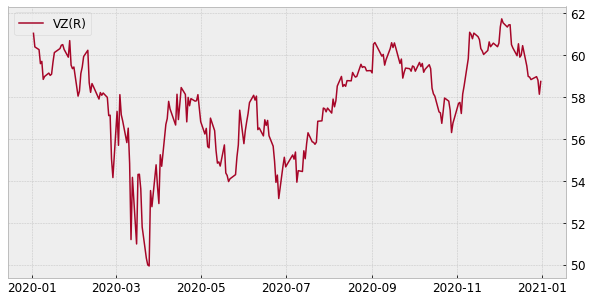

In [ ]:
symbol = 'VZ'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

### 2) RSI 계산을 하고 그래프 그리기

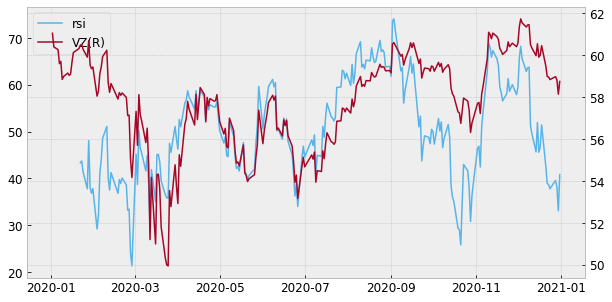

In [ ]:
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right=symbol)

-> 눈금 30와 70을 기준으로 buy와 zero를 반복


### 3) RSI 전략 백테스팅 확인 **(buy=30 / sell=70)** -> ***평균 회귀 전략***
-> 수익률과 주가 움직임, 매매 지점을 알 수 있음

CAGR: 7.22%
Accumulated return: 6.80%
Average return: 4.17%
Benchmark return : -2.86%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.21
MDD: -17.10%
Benchmark MDD: -18.20%


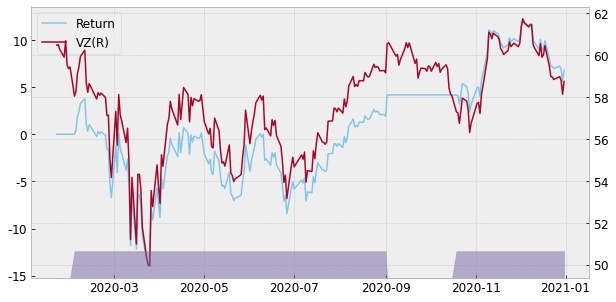

In [ ]:
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70) # 평균 회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

#### [포지션] 매매는 총2번
1. 2020-2월에 매수했다가 8월말에 팔았음
2. 2020-10월 중순에 샀다가 테스트 마지막 날 기준으로 보유중

실제로 전략을 이용해 트레이딩한 기간은 1년이 채 안 됨 -> 그래서 CAGR과 Accumulated return 결과가 다름

### 4) RSI 전략 백테스팅 확인 **(buy=70 / sell=50)** -> ***모멘텀 전략***
-> 수익률과 주가 움직임, 매매 지점을 알 수 있음

CAGR: -2.94%
Accumulated return: -2.77%
Average return: -2.77%
Benchmark return : -2.86%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.9yrs
Sharpe ratio: -1.17
MDD: -2.90%
Benchmark MDD: -17.73%


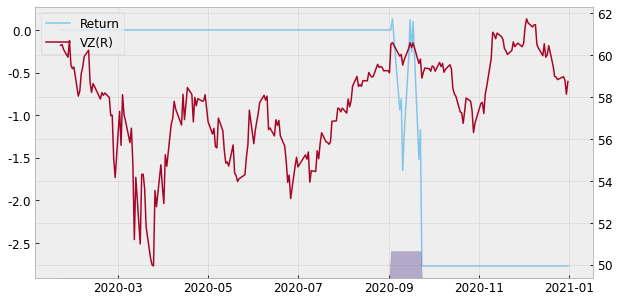

In [ ]:
fs.indicator_to_signal(df, factor='rsi', buy=70, sell=50) # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

1번 거래 함 -> 손해 발생

* 모멘텀 전략보다 *평균회귀 전략이 더 우수한 성과*를 보임
  * 주가가 꾸준히 우상향 -> 모멘텀 전략
  * 박스권에서 움직이는 주식 -> 평균회귀 전략

  ![dfdfdfd](data:application/octet-stream;base64,/9j/4AAQSkZJRgABAQAASABIAAD/4QBMRXhpZgAATU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAFoKADAAQAAAABAAACIQAAAAD/wAARCAIhBaADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9sAQwACAgICAgIDAgIDBQMDAwUGBQUFBQYIBgYGBgYICggICAgICAoKCgoKCgoKDAwMDAwMDg4ODg4PDw8PDw8PDw8P/9sAQwECAgIEBAQHBAQHEAsJCxAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQ/90ABABa/9oADAMBAAIRAxEAPwD9/KKKKACiiigAooooAKKKKACiiigAooooAKKKKACivwc+G3gz9km9/Z/8T+O/iF4kOkfEyDUvEDW9zY67dRa0l1FezizFvZxT5d+FCJ5JDenevqn456h8X7j9lb4O6p8U7bWPsEk+kSfEqLSDJFqQ05rZvtO4W2JRGJihuBEQ23IBHWgD9NY5oZt3lSK+w4O0g4PocVLXyL+z/wDCL9ljR7Rvi3+zfFavb6np8lk11YahcXMEsRKuVljllcCZWQZLKJAchu4qh/wT7uLi6/Y5+GdxdyvPK9lcbnkYux/0yfqxyTQB9k1Sl1PTYL630ye7ijvLsO0MLSKJZVjwXKITlguRuwOM8187/tU+MPEXhn4ZW/h7wbdNYeI/Huraf4X067X71rLqsvlyXA/2oYBLIv8AtKK+W/jW2kfA79pX9mjSPC+jXmsx6PoPivTNM061xJdXUxtrNIkMkhCqWwWklkYKo3Mx9QD9Oc0V8v8Aw4/aK1LxF8RL34R/E3wTd/D/AMXJYNqtjb3F3BfW2o2MbBJHt7mDCl42IDxkBgPm5HNbHgj9oLS/G37Of/DRNvo89rY/2bf6l9geRGm22DyoybwNuW8okHGBmgD6IzRXzZ4L/aM07xb4/wDCPga40K40weNvCieKNMvJJUeKXa6LcWe0AHzYVljcnoVbjoa6LS/jho+qfEb4heCY9OuF0/4bWdpcanqi5liM91C1ybaKGNWkeSOFQ7hQT8yqFJIoA9xpCQoLMcAdTXyqP21f2eDz/a+rf+E1rn/yDXXfFy3+CHxD+FFt4m+LtysfgOI22ptJezXGnQMJPlg+0rmKTaWkH7qQAbiNy5AFAHvSSJIoeNgytyCDkGl3qGCkjc2SB3OOtfnL+yv/AMIZYfFf4l+KPgHcSf8ACjItMtNirLK9g+vQNI13Jp6zEssKwhVkKgRtJ93O3jzbwb8FNI+OP7Lmp/tOeLZrxPiz4lstQ8R6frMV5Os2kyW7Syafb2iq6xrDCkcaFNuH5L5JzQB+stFeP/s/+Prz4pfA/wABfEfU1VL7xHolhfXKp91Z5oVaUD2D5rz79rXxjruifC5PA/guUxeLPiVfQeF9KdfvQSagGFxc8EHFtbLLKSOQVBoA+oaK5rwf4X0vwP4U0fwbogZbDRLSGzg3nc5jgQICzHkscZYnqcmvnDxP+0j4xf4h+JPAHwg+GN94/bwW0EOtXceo2mnRW91cRLOlvCtyczSCJ1ckbVGcbs8UAfWlU7/UdP0q1a91S6is7dCA0szrGgLHAyzEAZJAHvXzn8R/2hL/AMM+NNP+Fnw78GXfjvx1c2A1a602G6gsotPsGbyxLdXMxKKXk+REUMzYJ6DNfMf7Snxi0r40fsbeOb9NLuNB1nQNb0zSdZ0i92NPYahb6laM8TNGSkilWV0dThlYEelAH6UDUdPa/OlLdRG9WMTGDevmiInaH2Z3bc8ZxjPFXK+K9JCj9v3VHwN3/Ct7MZ/7iklegeIP2uPgX4Y1zUPDms6pqcd/pc8ltcLH4f1mdFliYqwWWKzeNxkcMjFT1BIoA+lKK8b07WfhZ+0r8O9TsoEuNY8Mai7WV1Fc217pjuY9khXbOlvOByp3KAD0BPIr4E+LX7KHwAn+MXw8+CHwv8MHS9Zv5x4h1u9jv76R7PQdNkXKYedlDXs5WBTg4XeeDg0Afq6zoilnYKo7k4FOzX5/3Pg3wz+0z+038QvCHxMt31bwf8JrLSbCx0gzyx2r6hqkLXU91MkTL5jrF5ccYYkINxHJBHnfgjwZ4k1r4d/Gn9n/AErWbyTWfgv4gF74M1Gad5bq0U2qX+mwPIxzIiEvA28kNE5UjgUAfqJRXmPwW+I9p8X/AITeEvidZxiFPEum2160YyRHJIgMiAnkhH3Ln2r07NABRXlvxU8beL/AOkWuv+GPB1140to58ahbafLGt/DbY5mt4ZMC4ZT1iDqxH3cnip/hn8Xfh78XdJk1fwHrEd/9mbyrq2YNDeWcw+9DdW0gWWGRTwVdQfTIwaAPSWOMV4j8Q/2i/gt8KNeXw38QfFEGjak8CXIhkjmY+U5ZVbKIwwSpHXtXtxIx9K/Ob9sX45eCfBnxO+E+gy+L7TSr7S/ECz6tAbpY3isbiznRXuEzxEWKkFuM4rWhS55KKOPH4yOHoyqyTdk3ZbvS9j6m8A/tI/BL4o69/wAI14B8UQaxqghkuPIjjmVvKjIDtl0UcZHeuz+GHxI8M/FzwXY+PfCDStpWoNcJEZ4/KkzbTPA+UOcfOhx6jmvxntfihpfxI8T+PvDvg/xA3iLVtX8Wb9KtLHxJNosktlDpse6SGaBX3xbw/wAnClgTnIr3f9krxSfBX7InhzXNRgvriLT/AO0DJBZRy31yT9vmBCJGC8rZ6kDJ6169HJueVlPTXp2Pz7MPEhYej7R4d814q10n7ybXS/S2qXk9D7H8Sftg/s8eEdf1Dwx4g8Um11PS53t7mL7DePsljO1l3JCynB7gke9bnw8/ag+BvxW8Ur4L8CeJl1HW3t5bpbZra4gdoISqyOPOjQEKXUHB718j3X7Y3gKwvrHS77SPFlveam0i2kMmgXySXDRLvkESlMuUX5mxnA56V4bqH7Rmg+Kf2jfC/jzQ9C8U3mleFNI1vSNRePQ71pLa+vJbN0hdAhIbZGxYHGOM9aqeTQX/AC9X3GOH8SK87uWBkkk3fmXRaLbq9PU/aCW5trcD7RKkW7puYLn6ZrzzwF8WPBXxJj1yXwzeFl8Pavd6Jc+cBH/plkVEoTJ+ZMsNrDg9q/Pz9q5vDWpeEPCt3rOgafq2oazqlrpWn3WvLILPTG1LBaa4RWRuiBQm5dz7VyK+em+Bnh74LeOvAkHifS/Cvi+z8Za1Bp3k2emNpt9a3EivKLqHZPKssUZjBfcoYAg7qzrZJKMuVST/AOCa5f4nUK1BVZUWpPmtG6d+XV2e3328rn7HeGPid4X8XeNvGPgDR3mOreBpbKHUg8ZSMPf24uYfLbPzgxnn0PFcL43/AGofgL8N/E114P8AG/i+30rWLIRma3kjmZkEqCRMlEI5VgetfIfweu5Lf4//ALQM7ysqre+HSzZPRdKH48CtC8/bF/ZxtSz33jeFMMEJa2uz8xOAM+Tyc8AVtHI1a8qiW/TscNfxTmqrp0sHKdlF6S/mSf8AK+9j6uj/AGmPg3e/CzxR8ZNA19dc8M+EI5n1GayRpJIjbxiR08tgp3hWBx7ivdLW5ivLWG6h/wBXOiuueOHGRn8DX4M6r8Y/Ces/Bf8Aak0fQ9Rmkn8VPq+o2sT2d1Gk1kljbxeaJJIljXJjOAWDHHSv3W8PDGhaZ/16w/8AoArysVhnSau73PvsizyOOhKSg4uNk0/NJ/rb1RyfxI+LXw4+EGl2mtfErXrfQLG9m+zwy3G7a8u0ttG0HnaCfwrzTwx+19+zT4012y8M+FPiBpup6pqMwt7eCFnZpJj0QfLjPsTXafGf4t+C/g34QfxL4t/0medxb6ZpsSiW81O/kGIbW0h5aSWQ8YA4GWOFBNfAHwrsPjT8DbW9+G3xQ1i28E6j8VNV/t7R/EsNgmpWWm6tqUoku9CnWRlQSZwLeRmCybmC/MADyHvH6P6H8RfDniDxx4l+HunNKdX8JpZyXoaPbGFvkZ4dj/xcKc+leZeP/wBqz4IfDDxTdeDPGms3Nnq1msbSxx6bfXKgSoHXEkEDocqR0Y46HmvG/wBmnRPGPh79ov43aZ478SjxZq6QeHGfUFso9PDo1vNtTyImdRtHGc815N8Tvj54n039or4jeBfEnxwHwp0Pw6NI/sm3Oh2+ofaxd2YluH82SJmOyTjGeM0AfX1r+1N8GNU+E3ib42aFq8up+F/CLyxajJDbTJPFLCEZ4/JmWN9wEiHGB1r6Ctp0ureK5jzsmRXXIwcMMjivxy8S6v8ACqz/AGPv2iNB8G/EeX4ka74gS98Tapevpsmnr5l39mgYLiNIcZjHCtkZ6Y5r77/ZW8M2fhb4dPZ2Xw9vvhwk04lNlfakmpyTkxIPtCypPcBVbps3DGM7RmgD6ZNfnp/wUG8T6vP4M8J/Bnw5Jt1D4iavDZkA4JhRlG36GV481+hTdK/N39q9hbftWfs83d+f9Da/mjUnoJWliA/Esy14+fSawskutl8m0j9H8J6EZ55SnNX5FOaXeUISlH8Uj7u+HngnSPhx4H0TwLoKeXY6Lax28YPVio+Zj7sxLH3NfHvxY/b48B+AfF2pfDnwp4d1Pxb4o02drV4YIxHB56feQPlpGK99sZHvX3pwelflz4ejk8Ff8FCfG51m0juNV8Q6NNdaA8jBEytuhKZ6AuIZAW7AH1pZnUqUo040XyptK9r9DTgPA4PHV8bicxpurKFOVRRUuXmkpK92leyu29tEz7mn+MXh7wt8OdB+IHxWx4KOsLbJJa3jZeC6uFz5DEDqvOTgYAJOK9djkSVFkjYOjgMCOQQehBr8B/jLF8ePjP8ABHUvj18R/GVpc6RpGpi1g0OwKPDBOH8ssxhYoGUNkFmdyCOQDiv27+E162p/Czwffuctc6Np8hPu1uhP61OWZpKvOUXFpJJq+7vfX8DXjrgSllWEpYiFVSnKdSM1G7jBxUJKKbSbaUtXquzOs1y0vr/Rr+x0u8OnXtxbyxwXIUOYJXUhJAp4OwkHB4OK/n8+NXw3fwN8cvB/gz4n/FCfXdYkuorrWNSneQQabBJKrR7NzOyuUBYgYA+XAA5r+g+7uLazt5Lu7mWCCBS8kjkKiIoyWZjwAB1Jr+Z349alpd7408UatqusWXirxBrOtPcSXGnStNbw6fFkRok20KS4KrhdwVUAznivI4wqRjSg2tb9X21/Hb7z9G+jXha1bHYmMZWhy2dopybleK95rRJNyequ1Hc/pgsbi0u7C3urKVZ7eaNXjkVtyujAFWDDqCOc18jeCP2xvBPjr9oHUvgVpNhN/onnxQalvDRXFzagmaMIB8qjDbXLHcV6DIrnNK/bK/Z78B+BPDGheJLufQ7iTQ7GddOSGW5eCGWECOMyIu0ttHcj1Nfnj8GfG/gbwB8XtV8U/s7eCvEHxL1y5SUWS3iLbrZRXLfOxWETO+QdvmOVG3ORk5HXj86UZ0lTmrX97q7dkt/wPn+EvCydfDY+pjsNU5lF+xb92PNf4pSbUbLS93Zq9rux++y9KdXO+E9U1LWfDum6jrdkNM1S4toZLyyEglNrcOgaSEsOCUYlc98Zroq+mi7q5+G1qThNwlutO58N/HX9r+78DePx8G/hL4Un8beOSqtJAu4QQbl3gHZ8zsF+ZsbVUdWzkDof2av2mr74uaT4ti+JGl2/hTW/BNy0OooJCLeOMbgWZpCdpVkZWBYjjOecV2/xjk+F/wAGNP8AEP7R+o6HanxNp9ibdLvbtnuGfCRQ7s/xMQpOM7c9hivxA+Evhyf4heJdbs/i/wCIdU8J+F9RSbxJq7RWriO7VT5gZmOBh958slWGWwoywr5HMMwr4fExXNzXv7uiSXRt+p/RPCHB2U5zkVaao+xVPkvVfNKcp3vOMIJ2aUbWVk7yV2fpKn/BRvwHc+PvEHh7S9FmvtC0yxu57K+Rv3l9cWkZkZFix8qOFbaxOcDJHOBwuh/t7fEzUG1nS/F3gu38Py33h291nRJY2kZ9qRO8DyrISGVivUBenTBruLb4LeAtS8T/AAi+OXwvutL0P4SeDrG5uppbgtBKysWy8hlHzbm++0jZGD1yK+EtZ+IPjj41ftLeNLj4c6HH4iv/ABLFc6DpjFWa1tdLZfs7T/LgAeSCwcnClt2GPB4cbjsZStz1NW9Elumr372WyPreGuEuG8aqqw2DtCFO85VJ2cJxm4qMrtRUpJc81qktEtr/AHb8BP2zvhz4Y+Cnhy5+N/j4an4pvnnecLC09xCrzMI1lW3Q7cLggkDj2r9E9H1jTfEGk2Wu6PcLd2GowR3FvMhykkUqh0cH0ZSCK/ns8J2Hi74aaHJ4F1H4XaFo3iD7VNBceJvFYCQeXuI2xpeERYA4BiDFhg7DX7sfB271C8+GHhmbVdR03Vrv7FEstzpBU2EjIuMwbfl2DGOMD0A6D1+HsxqVY+zqbpLo7/Nvf7vmfnXjLwVgsvqvGYNe7UnK3vQcWnqnGMFaMeiTle28UfD/AO07G/wt/aw+EXxnsk2W+ruNEvz0DB3MalvokxP/AAAV+loHUV+b3/BRdvtOg/DHSrVh/aNx4ngMCj733CuQP95lr9Iu9duX+7ia9NbXT+bWv5Hy3GH73JMoxU377jUh/wBuwn7v/pTXyFHIpaQdKWvZPzMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoooNABRmvz0+L/AIf1P4l/tj6b8NNQ8eeJPCfh+HwRJqgi0HV5dLEl2uoeSHfZkMdjEdM9PSs74R+O/ix4Y/4aI+H3hTXr34pWnw0t7eXwxqWpOt3dzX9zYyzzadNcRhftLW8qp/t/PsOOAAD9HKK/Mr9mn4aeFfjt4F8OfF1fjX4x1vxpi2udYWHW2t0stQUK9zYS6aiiOGJXyhiKAleQ2CDX0P4W8S+Ibn9s7x/4UuNSuJNFsvB+gXUFk0rG3iuJ7u+WSVI87Q7qihmAyQoB6CgD6uopGIUFjwBzX5SfE/xV4g+IH7Hvxa/aA1PWLpLHxbcr/Ytobh1tbDRtOv1toHjQEKslzsaeWTGSHVSdqigD9XKK+RbD9sD4bW1/4fsNX0fxBpOg6/NDY6d4lvNMeHQ7q4lG2ELcs25VmPEUjxqj9Q2Oa9z0L4peGPEXxJ8U/CvTxONa8IQWFxel4wsJTUUZ4fLfcSxwh3ZAx70Aej0V84+I/wBqP4aeFtF8a+ItWj1BdP8Ah/r1r4f1eVLdWENxdi2ZZh8/NuguozI/BUbjtOOfQviN8WPC3wxt/D0uvC4uZfFWrWui6dBaRiWWa7vNxTCllARVVndicKoz7UAemUZHSvE/EX7Sf7PfhHW7vw14p+JPh3SNWsH8u4tLrU7aGeF8Z2vG7hlOD0IrZ0nxj8N/jl4S1i0+H3jG31ewlV7K4vtA1BGmtpJEz8k8DN5UoVgynqODQB6nRX5afHv4GT+EbzwZ8OPh38VfiE/jX4gaolnaGbxRdypaWFtibUb54+NywwAgDIzI6DpmvafGVnrnxk/aDk+Ag8UavoPhHwF4estT1T+yrx7O91W81KSWG2imuo8SrFFHA7uqsC7OMnAoA+4qK+Of2ZPEHi3RPH/xX/Z+8Xa5d+Jl+Hl9p9xpOpahJ517Jpes25nhgnlPMr27I6GVuWBGelfYM0sUETzzuI441LMzEBVUDJJJ6ADrQBLRXyv+y74i8TfErTfFvxp1q+uZNH8Z6xM3h2zlkYw22iWH+i20kcZOEa6aN524yQ68kAV6b8XPjP4S+DOlaZe+IoL7U77XLtbDTNM0q2a81C/uijSGOCFSMlUVnYsyqqgkkUAet0ZFeBQ/tEeDrH4Zax8VPHel6x4G0zQpfIubfXbFra8Mp2BBDEjSed5rOqx+WW3NwO9Z3w6/aY8I+PfGcHw+1Hw94g8F+IL+1e+0+18RaebBtQtosea9swd1ZowQXjJWRQclcA4APo6ivxl1DUNQH7I3iyf7VN5q/F54w/mNuCf2/ENobOduOMdMcV+pvjr40/CH4YXttpvxH8aaP4Yu7yMywRalfQ2jyxg7S6LKykqDxkd6APTaK8o8FfHb4LfEnVn0D4e+OtE8SanHE07W2n38F1MsSkBnKRuzbQWAJxjkV8A6hqvgj4h/tW/GDwd8UPjTrPgb+wrvRLHQ9KsfFB0ZZhPp8c87R2+8eYTJIASo60AfqrRXxn8e7/xX4b0r4U/ADwB4l1DTLzx5qq6Tca48/wBo1SHTLC0kuruVJ3BP2mVIhGsxBKl9w5xXIaZo2u/Aj9pDwn8IrbxVrniLwL8WdH1dFt9X1Ga8utN1PSY0mea2u5D5yLcRStlA3Eg3qR0oA++6K+Yv2aPFPiiey8YfCnxzfy6vrvw01htJ/tCc7p77T5YY7qwuZmP3pTBKEkb+J0Y5yTX05mgBaKpajcTWmn3N3a27Xk0ETukCEK8rKpIRSxABYjAJOOa8i+F3x7+H/wAVLi50PTJZ9H8UaaP9P0DVYjZ6raH1e3k5eM/wyxl427MaAPaqjLAZJ4A79uKkr5t/ab8RXen/AAg8d2Fg5ikPh7VGdxwQDaSYwex9+tbYfDyqy5Ynl5xm9HA0fb13pdLTdtuyR9Cm9s8/8fEf/fY/xqZJophuidZAO6kHH5V+Onwf+Dn7Keq/CXwXqmv6fok+qXei6dNdyTXmJGnkt0aRnzKPmLE5z3r0P9le28P+F/GHxo0D4eypbeH7TxDYi1itZjJAgbSrZnCHcw5csTg9a9aOSSbilJa/5Hw1TxPw8YVpuhNez3ukr6paa+Z+kupeN/Bej3b6fq+v6fY3UQG6Ge7iikXcARlWYEZBBGR0qtceP/A9rNotvNrtl5niKaS300LOjfbJoY2lkSEqSHZURmIHQA1+Xvhfwr8LPFn7SXxzvPiTpWj6tex3nhwRPqsUEsgQ6THkKZgTjgZxx0r5w+EV940s9b+DWkRWGn2Pgyx8b+LRpE9ndObhm2agCjW4jWONFUnaUduMcDNZPKZKy5t9PxsdlPxApSjOXsWlFJ6ta3i5ad3pY/dPwj468JeO/CFl4/8ACupRX/h/UIWuILxcrG8KEhn+YAgAqc5HavP3/aW/Z5jJVviV4eVhwQdTt+P/AB+vh39mTUr+P9iXw7Clw6ovh2/AXccY/f8Aavmb9nT4h6XpHws8BWms/EH4ZWenWtjaLcWd7Ag1SOFcb45ZHuABPtyCxTG7kjtVPJ5LlvJaq/5GUfEWjL23JRb9nLleu++q37H7XyfEvwGuq+GdFXWoJbvxlHNLo4jbzFvY7eITSNE65UqIyGznkdK7xeRxX5TaP4n8Z+Kv2pPgPqOpa/4e13wsx8SnRZNCt3jCwCyKgPL5skUmFAX92FGQeMcV+rK9K8utRdOThLofb5XmVPF0I4ils/00a+TOQ174heAfC16um+JvEmm6TdsgkEN3eQwSFCSAwWRgcEg84pdC+IHgTxVdSWHhfxHp2r3MSeY8VndwzuqA4LFY2YgZIGcV8nftqWPgLVPBE/ge38N6Z4h+KPxDgk0Hw7FNbRS3avOCsl0XZWeO3s0dppH4UYAyCwry74Cr4utPD+n/AA9+GWjeDvA/xU8EWh0rxTaarp0gu7lIdiW97avamJpbW5VfMD/MMkKTuU1kd5+gfg7xz4T8eeHh4r8JalHqOkmW4h+0JlU8y1laGYfMAfkdGU/SvLj+1Z+zQGKH4o+GwwOCP7Tt85H/AAOvIv2Gp76y/ZWs7q/MUl7BqHiJ5dgIiaVNTui+0E52FgcAnOOtfJmgePvE3x7+CK32t/EX4TeEU8aaZPFNaTaftvbJbgPEwLNfLiRRyCVGDzigD9WL74i+C9P1rwzoFzq0IvvGInbSIxlvtgtohPIY2XK4WMhskjI6V22RX5G/tD3ng+W+/Zgs/DviHWvEWlaUNb0/+0PAEjXGpSyWmmRwt9mNqXbG5f3gBJC5Br9TvB5Q+E9F8s3xX7Fb4Ophhf48tcfag2G87/npkZ3ZzQB0tFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//0P38ooooAKKKKACiiigAooooAKKKKACiiigAooooA/Kb4LfslaP47/ZsvJbvw/8A8IV8UrbW9bvtH19rM2erWd5HqE0lpMZGVJWiYBQVYlXiJA4INfSnhv8Aai1PTPhB4c8c/FTwD4ksdWkuZdK121sNIubt7C+tVPmTeTGhkktJWGYpoldCGGTwcfYuKMUAfml8JdM0/wAU/tTSfE74A+E9U8I/D+60G8i8TyXemz6NZatqjups2gs7hYmeaMbjJOsYBUhdxOa90/YP0LXPDP7JPw50LxLp1zpOp2lncLNa3kL288RN3MwDxyBXUkEHBA4INfXOKKAPkT9r9jo2gfDv4h3AxpfgnxvompalIfuw2MjvZyzMPSM3CsT2AJrzv9pO+8Q+Ff2qPgT8SrHwtqviPQtA0/xSmpy6XZy3htIrqG1VZCI1OWyMqg+dwG2BiMV9teL/AA9pvi/wrrHhXWbKLUbDVrWe1mt5xmKVJUKlHxztOeccjtX5teHNG/4KT+ENB0/wrpEWhzWOkQJa27TzQTymGFQibpZG3uQoA3N8x6nmuLGY32NvclK/8qufVcM8Lf2nz/7VSo8tv4s+S977aO9ra/I9W8P3+oftD/tQeF/ih4c0PVNL8DfDrRdVtV1LU7KfTX1HUdX8qNoYILlI5Wihij3NIU27jgZPNfP/AIJ8ceJ/h5+yF4k/ZevvAniK6+Jeiadr2lxWkOlXL2V0txLcyQ3UV8sZtmhMUgbiTcSCiqXwp9D+0/8ABTj/AJ9PD352v/xVL9p/4Kc/8+nh787X/wCLrh/tv/pzP/wE+r/4hY/+hnhP/By/+RLvxR0rVvh/+zB8HvjlDZSwa38GIdI1O8t5EMVw+mvbLaanalW2kMYZC2xv44xxkCvd/wBmLwT4s0v4Gza/rUo0nx18RZb3xFf3Dxic215qmXtg6Er5gtYPJjCEjIj2kivjX4m/Df8A4KI/F3w4PCHja10WfRHuba5ntIprWKO6NrIJkinwcvEXVS6ZwwGDXov2j/gpuOBaeHsfW1/+Ko/tv/pzP/wH/gi/4hY/+hnhP/By/wDkT6AHwq/awxj/AIXzY5/7E+2/+Ta7z4g/EfTPhH4U0KH4oWWpeK4b1RbX1/pmjS3sInjQMZri1thM0UcjAlcBlU8E9DXyJ9p/4Kc/8+vh787X/wCLo+0/8FOf+fTw9+dr/wDF0f23/wBOZ/8AgI/+IWP/AKGeE/8ABy/+ROm+Enhyy8f/ALSfiD4o/DXwre+EPhve+GDpOovc6e+kJrmqSXBZJkspVjkbyISV+0PGN24KCRzXnHgfxx4x+En7N99+yfeeDde1H4maPZ6j4f0kW+mXD6bqEdy0qWV6NQVDaxQeVIjSl5QYyCpGcCuh+0/8FOP+fTw9+dr/APFUn2n/AIKc/wDPp4e/O1/+Lo/tv/pzP/wEP+IWP/oZ4T/wcv8A5E+4vgt4A/4VT8IvBnw0MwuH8L6PZac8oGBI9tCsbvj/AGmBP414ToLt8X/2tNY8Qg+f4Z+DVidHtT1jfxDqipNeSL1Ba2tRHFnqplcZ5NeJ/af+CnH/AD6eHvztf/i65nwt4V/4KH+CLW9svCeheGdMh1K9udRuRGbcma8u3Mk8zs0jEu7HJ54GAMAAA/tv/pzP/wAB/wCCL/iFj/6GeE/8HL/5E/VUjivy3/aeu/Ddj418S+JPg1Z+NvDHxyt1jhs30fSr5tL8QTRIpt0vD5T2Fxb8iNpnZXjAwWAUA7P2n/gpz/z6eHvztf8A4uj7T/wU5/59PD352v8A8XR/bf8A05n/AOAj/wCIWP8A6GeE/wDBy/8AkTh/iv8ADOz8P/tI6h8VvjppXioeHPGvh7SYRqPhK61UDT9VsUKT2l1FpLibynB3xyMpTdkZBNX/AB/8KvBcf7InxAuPgZ4U8UiXxXrWlXUsespqNzqmoSW97aq1yIbxpLoJ5anllUlV3EYANdT9p/4Kc/8APp4e/O1/+LpftP8AwU5/59PD352v/wAXR/bf/Tmf/gIf8Qsf/Qzwn/g5f/InuWmaDriftxal4jfTbldIf4f2lqt6YXFsbhdSkcwibGzzAp3FM7sc4xXTeIPht+0xqGu6hfeH/jRZ6TplxcSSWtm3ha3uWt4WYlIjM12pkKLgbyoLYzgV8zfaf+CnP/Pp4e/O1/8Ai6X7T/wU5/59fD352v8A8XR/bf8A05n/AOAh/wAQsf8A0M8J/wCDl/8AIn3j8OdB8feHtAew+I3iuLxhqjTu63sWnJpiiEgBY/JjklBKkE7t3OcY4r5+/Z40DWtZ+LXxn+M3inTrqxuda1qPQtKF5C8DjSNEiESNEsgB8ua4eaQMPlcbWBPBrw/7T/wU5/59fD352v8A8XSfaf8Agpx/z6eHvztf/i6X9t/9OZ/+Ai/4hY/+hnhP/By/+RO81DWJv2bv2lfiD468UaJq1/4N+KdnpVzFf6Tp1xqf2bVNLia1kt7iK0SSVBLEY2icptYhlzkCrvwhfUfAPgb40/tK/E/TpvDaeMb6811LK8UJdW+kafaLBZLOmTtnkSMsY85Uuq43ZFebfaf+Cm4H/Hr4d/O1/wDi6958B/Dz4sfFbwFL4e/a1trOYwapb3sNppsuyG6jtSskcd4sRKSReaA3l5w20bhjAPThcz9rPk9nKPqrI8XP+BvqGHeI+vUKuqXLTqc0tfKy0XU6X9j3wfrHgL9mH4beFtfjMOo2ujwSTxngxvcZnKEdiu/BHbGK7L4i/Ar4e/FTVLbWPGEeoPc2kPkR/ZNUvrFAm4tylrNErHJPzEE9s4r2AUtemfCnjfjm3+J3hfwpo/hj4GaVp93eKUtPtOt3cxt7C2jTAmkVd0903AAQOpYnLOK4j4X/ALNOkeD/AB9c/Gjxtrdz4w+JGoW/2WfVZEWyt44P+eNvZ2+2NYxk4Mhkk9Xr6bxRQAwgdDXxj+2xqF54K+E83j7w5ptmdSjvLOzudSubIXkemWVzKI5b6WMAs6W6ndj7ozlvlBr7QIB60x4o5EaORQyMCCCMgg9QR6VpSqyhLmi9Tjx+ApYmk6NZXi/01PyQfwJ4Y0HQ5PGdh+0e1pNHEZRf/btCewY4zn7MkKhkP/PNWyRxmvd/2WofFHi34FeGfEN34dh0VrxbhkitIDZ288fnuEuo4Hw0a3I/fBT/AHs9CK+pYPgN8DrbU11u2+HfhyLUVfzBcppFmswcHO4SCLdnPOc5r1UIo4FerDO6kXeKX4/5nwWL8McHXpunVqSeqd/dTVr6aRWmu33H4maN8T/C+r/E+31r4rfEjSdF1L4X+N/F9stjqM6w3LWE8H2O1SMAAbUJJ3N1GeSa97/Z+1/4ZT+M/GukeEPH2jeKNV8a67d65bWdhch5khaGJGRl7lfLJJHGDX6TSaHos0jSzWFvI7Eks0SEknqSSKdb6NpNpKJ7WyghkHRkjVWH4gZohndRa2V/mPF+GWEqxcPaSUWkrLltZO/bvqfFPxf0T4h3FoPC9l8Jv+Fi6LqcJ+1pNeWcMCsG4R47o/MeNwIHH1r5I+CvwU+Pfwmvtc1u1/Z+s7rV73VL640+7l12yE1jp1wV8qzjd/MZEjAIwmBg1+z20Um0VFTOKsp87tdeR0YLw3y+hh3ho3cXvdy1+5pfckfmd8B9H8QXvx9+PkV1YfZ7+K78Mm4gEiv5Mj6QrFdw4bGcZHWrv7ZOh67bfCjR3uIXVD4q8OKMt/E2oRgfrX6F6f4a8P6Vqup65pmnW9rqOtNE99cRRqkt00CeXEZnAy5RPlUsTgcDir17pun6nCtvqNtFdRK6yBJUWRQ6HKsAwIyp5B6g9Kv+26vI4WWt/wATH/iGeC+tRxanJOPLpdW91WXTy7nwd+194Z1gfsrfFe9vgYo4fDt83zNkkiM8Yr7k8Pf8gDTCf+faH/0AVJreg6L4l0i70DxDYw6npmoRNDcW1zGssM0b8MjowIZT3BGK0o4o4o1iiUIiAKoHAAHAArixmNnXlzTPpOGuGMPldF0cO27u7berZzPinStLuLJtdubG3uNR0aGeexnlhSSW2lMZBeJmBKEjglcZHB4r40/Zq/a3+Evir9n/AMCaz8YPiZ4d/wCEtu9Phm1JL2/s4JlugxOXhLLsYYBxtGOtfejKrKVYAqRgg9CK47/hXPw9/wChY0v/AMAoP/iK4z6I8g+Et38GvEfxQ8d/EP4Z+ObDxXqPiOHTFv7awvLe6S0SySSKJv3LMw8zcc7u44rrvif8NfGfju6sLjwt8RtX8DJaJIssemQ2cq3DOQQz/aoJSCuCBtIHPNej6T4Y8N6C8kmhaVaaa0wAc20EcJcDoGKKM4zxmtzGKAPzP/ah+F3xb+HP7P3jnxw/xq17Xxo2nPP9g1Gx0mSzuMMo2TILQFlOeRmv0b0V2l0iwlfG57eJjgYGSg6DtSa7oOieKNIuvD/iOwg1TTL5DHcW1zGssMqHqrowKsPYitOOOOGNYolCIgAAHAAHQCgBzV8F/t/+AdZ174Vab8Q/CyOdZ+H2oR6pGyD51gH+sYf9cyFf6KT2r70IzUU9vBdQyW1zGssUqlHRwGVlYYIIPBBHBBrlxuGValKk+p73C+fTyzMKOOgr8jvbutmvmm0eb/B34i6d8WPhl4d+IWmArFrNqkjIQQUlX5JV57BwwB7jmvkH9sP9mj4o/Fzxz4R8d/CO+i03U9Pgl0+7nac28kMEjEiVWHLcO6lRzg8da+/tN0vTNHsYdM0i0hsbO3G2KGCNYokXrhUUAAewFXcCs8RgY16PsazvttpqjtyXiqrleZvMcuil8Voy95csk1Z7X0f3nxXqv7Iul2P7K2p/s8+DryNL6+VLg39ypCy34ljkeVwmSFYJsAGdq4645+l/hj4XvvBHw68NeD9TuVu7vRdPtrOWaMEI7wxhCVB5xxxmu92igKKujgaVOSlTVtLfJHJmXFOOxlGVDFVOZObqO6V+eSSbvvslpsY+u6JpniPRr7w9rUAubDU4JLa4iYkB4pVKuvHIyD2r8Mfih8CvG+ieGfE+oeJ9E074S/DPQrvZBDEq3eoao6sVgAm3NLOz8EF3RF67RtJr95ioNeJfH34HeHP2gPAbeA/El5cafElzHdw3FtjfHNEGUHa2VYFWYEEd+MGuHOcrWJp6fEr26X9Xvb5n1nhlx3LJcYlN2pTlHmdnJxSfxRi3y81tE2m10sflD+wTJ4e1D4n3Xwz8ZeB7DVk1Oy/tSC7v0W7urZYlHlq2/KKjK/QIhyRkGrn9vfFz4O/H74rWng/wBeXnjbxdcCw0C4ht8WVpYM5PmIqqEKlRFjkIpU7iOlfpX+z/APsv/Dr9nq1uZPDCy6hrN+ojutSuyDPIgOQigAKidyFHJGTmvpIxxltxUbh3715mD4fqLD04Tnyyi29LbPS3r2Z9zxN4w4Opm2LxGGw3taFWEYtTcldxalzWu7RbSTirXS1tdny/+yx8DfEHwb8JX91441u41zxZ4nnF7qkkkzSxpNtwEQk/MR/E/wDEenAFfUdIBilr6XDYeNKCpw2R+HZ1nFfH4qpjMS1zzd3ZWXoktklol2PGvjn8FvDfx68CS+AfFF1c2VrJPFcLNaMqyJJCcr98MpHYgj9a8G/ac+Derr+yLffC/wCHcdzqcuhW9kIUdjLc3FvZSo7qSBl2KqSFA5xgDoK+3doo2issRgadRTutZK1+tj0cm4rxmCnh+Wd4UpqpGL+HmVrv52sfjD4ai+KP7YOn+Efg7oej3fgf4XeEbW1i1mZl8v7VNCoDRpwFYhgdic7Sd784FfrZ4O8C+EvAOi2eg+E9Lg061sYI7dBFGquUiAVdz/eY+pJJzXXpFHGNsahR7DFP2isMDlqpXnN80n1/RdkenxZxtUzGMcPh6fsaEbtQTbvJ6ylJvWUm+r2Vkj8ff2rfgLoPgXSviJ8c/i/rb+K9X1q4+zeF7NpJI47Tz87VZQfmMK5YKDswuSCx4+8P2S/h9ffDP9n7wl4Z1bcL5rc3k6N1je8YzeX9UDBT7gmvWvHXw18DfEyysdO8daRDq9tpt1He26S7sR3EWdrjaR2JBB4IOCDXVXkM5sZ4NPdYJjEywtjKo+3CnHoDjis8NlUKWIlWit1bz3u2316WPQzzxCxGYZRRyuvJtxndt2UUlFRhGMVoktW7LVu+p+aPimZf2hP279E8M2o+0+HPhNbtc3Z6ob1WDfmJTGv1Ru1fp13r5O/ZQ/Z2vvgT4d1q68W3sWreL/Et69zf3sJdlZASY41ZwrHBLMxwMs2OQAa+swAKvKqE4xlUqq0pO78uiXyRx8fZthq2IpYTAy5qNCChF7cz1cpbL4pNvVXtYBS0UV6h8GFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUHiiigD84Pix8IPh78aP257Hwx8StHXWNMi+Hc0saM8kRjlOphN6vEysG2sQOavfA3xbpH7KOq+Lv2Z/G8ckOjeFrWfxH4WvYbcyT6loTEtcRssKlprqykyjnBkePa5BwSf0Q2rndjn1pNqkgkcigD8evjj8Tf2c/HeqaN8Sv2P9fS4+Ot3qdgtonh6KeObU7d7mMXcWrQBEjeAQs7O9wAVIBDdj9feDg//AA3V8R2cYJ8D+Gs46Z+26hnFfX0FhY20sk9tbxxSzHLsiKrOfViBk/jVraoOcc0AVNRt3u7C5tY3MbzROgYdVLKQCPpX5L63Ms//AASgk0p7Tdd6NpS6VeWg+8LvT9QFtPCw7MXQg/Wv1zbpX5neMNY/ab+Cnxi8dJ8Ffhs2veEPE1zBqSxyEy2y30kQF1cQ+WUMZnYAyRnI3qWGCzZ58TiY0lzST+Sb/I9nJMjq4+q6NGUItK/vzjBffJpX12KH7Rnxu+GPx6+BsPwA+El1/bvjzxdPpVlb6KlvLHdaYbW7gluJr2N0H2VbVI2LNJjDABc5rspfiP4M+AH7Y/xD1D4uaonhzSfHXh/Q5tJ1G8DJa3MmliWC4gEoBXzl3Btn3iCCAc1yCftB/tyxzSXMfwLtlllADOIpgzAdAT5uTikn/aC/bluQgufgXbS+Wwdd8UzbWHQjMvBHrXF/bFL+WX/gMv8AI+p/4hpj/wDn7R/8H0f/AJM6H9nfSPDf7QOjftOaFrNjPFoPjPxddW+y7haKb7PNpFikc3lSAMpICyoGAI+XIB4rmf2Xrnxl8Z/if4aX4iQyGT9nXSbjw/emYHbceKZXe0kuAx+/tsIUkDYxm4yDViT9or9vIofJ+CVujnoTHOf084V5d8IvGX7a3wh0LUtM0/4Otq1/rup3ms6nqF2kvn3d9evvkdgkiqqqoVERQAqqAKX9s0v5Zf8AgMv8h/8AEM8fb+NQ/wDB9H/5M+2PHHg79o3UPFmp3nhLQ/hxc6RLLutpNWtr579kwOZ2iUoX/wB04xXq/wAING+JOi6NfQfEuw8NWF69xuhXwzFPFbtFsAzKLgBjJuz0424r4m/4aM/bu/6IhD/3xP8A/HaT/hoz9u7Of+FIQ/8AfE//AMdp/wBsUv5Zf+Ay/wAg/wCIaY//AJ+0f/B9H/5M9m+FYj+JX7WnxT+JV0BLa/D+2svBml55CSuov9RkX3dpIYyRz8hGa5vxT4x8M/s8/tca94/+J16uh+EfiX4d020tdVmVvskWp6PLPvt5pACsTSQzq0ZYgNtYDkV56P2i/wBu0Zx8D4Bnn7k//wAdqKf9oT9ue6iaC6+BltNG3VXjmZT9QZcUf2zS/ll/4DL/ACD/AIhpj/8An7R/8H0f/kz2r9mTd4++K3xg/aG0+CRPDHjS60nTtBnmjaJryy0W1aKS7jVwreTNNI3lkgbgmRwQT1f7XPibUrf4b2vwv8MzND4k+Kl/D4YsWj/1kMV7n7bcj0FvaCWTJ43BR3FfN4/aM/buAwPgfAAP9if/AOO1w2q/EX9sTW/H+hfEzVPgSs+ueGba7tdOZnufJt1vtguHWLzdvmOqKm88hcgdTR/bNL+WX/gMv8g/4hnj/wDn7R/8H0f/AJM/VPwx4b0jwf4a0rwn4fgW00zRrWGztYUGFjht0EaKB7Kor5l/a0tvgtc6J4Xf4seNbj4dalZai114e1+1kMEtnqEcLK2JSjxbXidlZJcK65HWvAP+Gjf27/8AoiEP/fE//wAdqC4/aD/bmu4mgu/gXbTxOMMjxzMpHuDLij+2aX8sv/AZf5B/xDTH/wDP2j/4Po//ACZ47468XfFL46/s1HxF4k1K+1rQ/hz8QLOT/hJtAsfs1zrGgWRXOq29pIkql7eSTe2yNkPlFlHBr2r4R6L8BviL8Z/BPiLw7+0D4n+KniHwuLvUNPtLia1uLa3juIDBM1w0FhEYg6Nt2vIhY4AB6UxP2if27I0EafA6BUUYACTgAegHm1Bb/H/9uO03/ZPgTaweaxZ9kUy7mPUnEvJ96P7Zpfyy/wDAZf5B/wAQ0x//AD9o/wDg+j/8meOaij/8MheLRtOf+FwOcYPT/hIIq/SL4weHPjJrerWE3wz0vwZf2kcLLO3iaG6lnWTdkCE26kBMdc85r5H/AOGiv27MY/4UfBg/7E//AMdpf+GjP27v+iIQ/wDfE/8A8do/til/LL/wGX+Qf8Q0x/8Az9o/+D6P/wAmfU/wm8MfHHRvEst18RtJ8DWOltbuqyeG4LyO9MpZdoYzqE8vAOe+cV5D8bPi3+w5cDxl4V+Jx0HVPEVuXs7/AE2XThPqs90YwsccSCEzSyMCojaPPbDDHHm3/DRn7d3/AERCH/vif/47VVvj7+3A92t+/wAB7RrlBtEphlMgB7BvMzij+2aX8sv/AAGX+Qf8Q0x//P2j/wCD6P8A8mZJ0j4gfCX4Nfsx/Fr4q2t7JJ8Nbpk8S7le5u7DTNTs5rZZZwm92+y7ofOIyQAx7GvX7Pxl4a/aR/aq+Hniz4U3ya94T+Fmm61cajqsCMbJ7/WIore2tIpSArypGryuFztXAbBIB4A/tF/t3EYPwQhIP+xP/wDHapSfH/8AbtSwlstO+CUFiWR1jeKGX92zA4cKZNpIJzgjB70v7Zpfyy/8Bl/kC8M8f/z9o/8Ag+j/APJn0j8EJk1r9oL48+I7A5sIdR0fSNy/ce6sbBXnwe5Tz1RvQjHUV9DeOPCR8beGLzw0us6joBu9n+m6TcfZbyLY4f8Ady4bbnG08cqSK+U/2JLX4paD4F1Pwt8SPBLeF3trprr7bPIWutVvLxmlvLq4DE5keQ7iwwvIVQAor7XycgV6NCsqkVON/mmvwZ8bmuWVMHXlh6kotrrGSlHvpKLaf3+T1PJfh/8ADmX4TaRq7DxP4j8atcATqutXovp1MKtiO3JWMLvzyD1OORXzJ4l+DHxS/aj1jSfEnxU0y2+FWkaHcJPp6ae8dz4tIRtwDapHmOxR+jxQeYx5BcZr74oxWp5xBbQC2torZXeQRIqBpGLu20YyzHkk9yepr5y/aA8Q6T4WsbafU/D+r+JIdXElrLbaVpk2pgx7fmEyRBtqspI+YYbpX0pSBQDkV0YXEyozU4bnkZ5klDMMO8LiL8rs9HZprZo/CX4jeEPhfrPjf4d6n4V+AmtwaTo2qTT6yi+D54hLatbOiKU8oeaBIVO3nHXtX1x8L/E/gXS9Rh8H/D74W+IfCserTgsR4ZuNOs/M248yaTy1ReBjc1fpFijAr0qed1Iy5lFHx2M8McFXpRpTq1LRTS97u29dNdWfl7+0p4G+H3hq88K+MPFHw80LV77xX4m0jQry91eyR3FvdBoy4kJX50SMBSxKgDkGur1b4V/DmXUPAc/hnUdM8Oad4Dvrq+t7GzNusEjXVtLbsmFkUJ/rS+QDkjHuPunxr8P/AAR8SNGHh3x/oVn4h0xZVnFtfQrPEJUBCvscEbgCcH3NeT/8Mkfswf8ARLPDn/gtg/8Aia0/t2V23BanF/xCugoQhHETXKmuj3utnps7HkHwJ+FF98PPg94b+H8M6eIINItntjdwIDDOC7scAFhj5sEZNfLWk/C/x98R/i18UNB8Lano/hLTPBmp2djb2y+F9NvHxcWUNwxaWUK2dznr69a/Wbwn4N8KeA9Dg8M+C9JttE0m2LGK1s4lhhQudzFUXAGScmvHPGX7Jn7N/wAQvE194y8a/D/TNX1vU2Rrm7nRjLKyII1LEMOiqB9BUzzuTio8qsvU1w3hhQp1atb28nKe7ai9W7t2atfptsz5I8NeDPiT8K/2j/gzo3jTxTp3iy01sa9HbxjQrOwl0/yLLzCYJYCzJ5nRwMAjg1+nq9K8A8C/sq/s7/DPxNbeM/AXgPTdE1uzWRIbu3RhKiyqUcAlj95SQa+gQMcV5Nes6knKR+g5Zl1PCUI0KWy8kr93ZJL7kfJH7TuqaZ8EvCeq/tCeEtF04+N3n0PR31G6h82T7BdanBbyRbtylVCzMwCkAtgtnAr6Cnh+Hs/iGDxXP/Zj65aW8lpDfMYTdR28rBniWX74QsASucZGau+MvBPhL4h+Hbrwl440m31zRr0xme0u4xJDIYnEiblPB2uoYe4rxD/hjX9lX/olmgf+AUf+FYnedN+z78MYfhN8MLfwKNVh11I73Uro3EShY2F/eS3OzG5h8gl2nnnGfavBfFH7K/ja+8R6hfeE5Ph7pmkzTM1rb3Hgi3uZ4oz0V5hcJvYd22jPpX174I8A+C/htoEfhbwFo1toOkRO8iWtpGIoleQ7nYKOMseTXXUAfm8vh/4mfDX9or4IeGPH154Y1/T9Um18WH9maCdKl02SKw3yvCVuJE/fAhW+XoK/SDHeuR1vwH4T8R+J/D3jLWtPW51jwo1y+mXBZw1s15H5M5UAhTvT5TuBx2xXX0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//R/fT7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANb7VD/AHv0NJ9qh/vfoayqKANf7VD/AHv0NH2qH+9+hrIooA1/tUP979DR9qh/vfoayKKANf7VD/e/Q0faof736GsiigDX+1Q/3v0NH2qH+9+hrIooA1/tUP8Ae/Q0faof736GsiigDX+1Q/3v0NH2qH+9+hrIooA1/tUP979DR9qh/vfoayKKANf7VD/e/Q0faof736GsiigDX+1Q/wB79DR9qh/vfoayKKANX7TB03fzpRdQdM/oayaKANf7VB/e/Q0v2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q0faoP736GseigDY+1Qf3v0NH2qD+9+hrHooA2PtUH979DR9qg/vfoax6KANj7VB/e/Q003UGev6GsmigDW+0wf3v0NO+1Qf3v0NY9FAGx9qg/vfoaPtUH979DWPRQBsfaoP736Gj7VB/e/Q1j0UAbH2qD+9+ho+1Qf3v0NY9FAGx9qg/vfoab9qh/vfoayaKANYXMA/i/Q077VB/e/Q1j0UAbH2qD+9+ho+1Qf3v0NY9FAG8rB1DDoadUMH+qT6CpqACiiigAooooAKKKKAA1GfTd+tSVizf62T6mgDV4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDZOP7x/MUgx03fqKx8mjJoA2R/vfrR/wAC/WsbJoyadyuY2f8AgX60f8C/WsbJoyaLi5jZ/wCBfrR/wL9axsmjJouPmNn/AIF+tH/Av1rGyaMmi4cxs/8AAv1o/wCBfrWNk0ZNFw5jZ/4F+tH/AAL9axsmjJouHMbP/Av1o/4F+tY2TRk0XDmNn/gX60f8C/WsbJoyaLhzGz/wL9aP+BfrWNk0ZNFw5jZ/4F+tH/Av1rGyaMmi4cxr985P50owTncfzFY+TRk0Em1x/eP5ijj+8fzFYuTRk0gNrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaANrj+8fzFHH94/mKxcmjJoA2uP7x/MUcf3j+YrFyaMmgDa4/vH8xRx/eP5isXJoyaAP/S/dyoTcRA4Jqavj79q39oPSvgb4d0SwGtWWjaz4v1ODS4Li6kUGxguCVl1ARvxIlsdpYHCnOCa1pQT3Jk7H119oi9f0pVnjYgA8mvBvhp4v0uz+EUHjHxL8QbHxjp1mk81z4jiWK2tJIkc5YiMmNRH90nPbmtrwD8bvg/8S9Yk0b4e+MtL8R39vGZ5ILG6SeRIgQpcqpOBkgZ9xWjpK1zNVGey0UV4n+0Rr/jLwz8J9U1jwBq1hoetwz2YiutSkSK1RHuI1kDtJ8uWQlVz1JGOa5jY9sornPF/jHwp4C0OfxP411a20PSLZlWS6vJFhhQu21QztgAk8D3rnfAfxd+F3xRN4vw48Vad4lOnBDc/YLhLjyfMzt37CcbsHHrQB6LRXF+JviR4B8G6xpHh7xX4hstI1TxA5i062uZljlu5MhdsKnlzuYDA7kV8keEfi58VfFn7H/ir4kQa5YWHjGzutZgtL++EdvZQCz1F7eIzFvkAES7ST1PvQB910Vn6PJcT6TYzXbrLPJBE0joQUZ2QFipHGCemO1cDD8avhFceOG+GUPjHS38WrK0B0oXSG8EqLvZPKzuyFGSMdKAPTqK8y8WfGj4SeA/ENp4T8aeMNL0TWr9Y3t7O7uUhnlWViiFEY5IZgQMdSK4L9pT9ojwz+zn4S03xDrk1obvVNTsrGG2urgQF4Z7iOK5mTqSLeN/Mb2HOBQB9FUVyvg3xz4M+ImijxJ4D1q08QaS0jxC6spVmhMkf3l3LkZGeRVaH4jeArjxvN8NYPEFlJ4rtoftEulrMpu0hwD5hizu24YHPuKAOzori/E3xG8BeC55Lbxb4gstImitJL9kupliK2kLBHmIb+BWYAt0BIrX8M+KPDnjTQ7TxP4R1KDWNIvlLW93ayCWGVQSpKOuQQCCKAN2io5pobeF7i4cRxRKXd2OAqqMkk+gAr5W+CH7XHwt+NHijxJ4P07XtKTVdN1q707TLaC8WabUrS2RXF3GnUqwLdMj5etAH1bRXNeL/GfhLwBoU/ijxvq9toWkWzIst3eSrDCjSHaoLtwNxOBWtpeqadrem2us6Rcx3ljfRJPbzxMGjlikG5HVhwVYHIPcUAX6KO+K8a8VftE/AfwNr9z4V8ZeP9F0XWLMqJrS7vY4poy6hl3IxBGQQR7UAey0dq8i+OWveJtD+D3ibxB4D1Sy0nWrez82yvb+RI7SJyy4eR3+ULg9TxXq1qXe1gaQhpGjQsR0LFRkj2JoAnory+X42fCCHUta0eTxjpa33hySOLUoTdJ5lnJLIIUWZc5QtIyoAerEDvWLN+0h8AbfxKfBs/xC0SPXRcizNi17GLgXJbZ5WzOd+7jHXPFAHtVFcx4x8a+Efh7okviXx1rFroGkwukb3V5KsMKvIcKpduASeBUnhLxh4U8e6Fb+KPBWrW2uaRdFhFd2kiywuY22ttdcg7WBB96AOjo68V8//Cnx74m8U/Ff4w+FdZuFl07whq9haacioFMUM+nw3DhmHLZkdjk/SuV+NfiG98Y/Erwp+z14cvri0uNRUazr/kyNbSHQImaJvIuUIZZftPl8IQxXPOM0AfVVFRFobS3LyPsigTLMx6Kg5JJ9hya+QvEP7Q9h4g+Lfwa0f4S+J7DXfC/i3VNXsdVks2S5R2srA3CRiQZ2MrFScc4NAH2FRXwB4x/aZ0vxL+0TN8HvDXxT0jwPa+Fjp73DyCC7k1m6u5Xjl05RKR5UkJjAOwlsyDjgV+gB69MUAJRRRQAUV8FfHX9pDSLf4uW3wW8P/FjR/hvc6fZ/b7/UbkW90xnMixrp7RTEBHZW8wHO7HbFfW/jT4n/AA8+GOkWGrfEbxPYaBZ3xEUNxfTpbxzyBNxCFiASR82B2oA76isjw/r+ieK9Gs/EXhm+h1TS9Rj822ubdxJFMhOAyMOCM+lcPo3xr+EPiLxlN8O9B8Y6Xf8Aie3kmik02G6R7tJLfPmqYgdwKYO4dsUAen0V8oeF/wBr74S6/wDGjxX8ILnxHpFpNokmnWuny/bUMmoXl4HE1uiH+OGRVQqMnLc19N65rmjeGdHvPEHiG9i07TNOjaa5uZ3CRQxr1Z2PAA7k0AalFYHhfxX4Z8baBaeK/CGqW+s6NfKzQXlrIJYJVRirFXXggMCD7iuTt/jN8JbrUtC0e28X6ZLfeJw50uBblDJfCJij+QucvtZSpx0IxQB6XRTwjHoDXPeLJ9UsvC+sXWioW1GGzuHtlC7yZljYxgL3JbHHek3ZXLhDmko9zeorivhtfeItU+H3hvUfFqNHrl1YW8l6jp5bLcPGDICn8J3Z47VHN8Tvh3b3Gn2k/iOwjm1WeS1tEadQ088T+W8cYz8zK/ykDoan2kbJt2Oj6lVc5QhFyadtE33/AMjuaK4vxb8R/APgJ7aPxr4hstDe8DNCt3MsRkCY3FdxGcZGa19J8Q6N4n0Jde8MahBqNjcI5huYHEkLlcjIYcEAjmnzxva+ongqqgqji1F6JtO339Tdory/4M6v4l134caXqni/UbTVNVmM4muLJ1e3fbM4XYyfKcKADjuDUFtrHjd/jdf6DNC48Ix6BDcwyeV8h1BrlkdfN7nygDtz05qfaqydtzX+z5c9SHMvcTfrZ9D1eilNJWrOAKKgurmGzt5LqdtqRKWJ+lfBvwG/azj1vwVp3/CzdasI/EOt63rNjp8czrby3UdnfSQRJFGPvFUCqcck9a6MPhKlV2gjx83z7C4GKliJP5K769F00Z980V4s/wAYdOj12Pwu7Wy6vLbtdpaGQ+c1urBDIF67QxwT61na38efDPhuW4h8QXtjpz2kCXUyzz7DHA8nlLI2eil/lB9eK7XklfsvvR8xHxNyh6Kbv/hl/ke9UV4xq/xdsdB0x9Z1praxsIygaeWTZGPNYKnzHj5mYAepIrXHj+9YZFkn5mn/AGHie34oh+KWTWv7R2/wy/yPUKDx1r5q8d/EPx3d3GmeHfCaDSZL8yvLqIi88W4hAZVKP8p8zOMnpjivPJvjL8Qvhlf3GneKr2LxYbjTL7UoXaFbQxGwUEx4jzuEhbknpjisp5TXjduJyy8WsnVTkUpNd+V2/wA/wPtiivhjUPiP8XPDfhl/ifeeJY9Q0+CBb86UbOONXjkAIh84fMAu7G7qcV9GWPxKvLyyt7s2Ma+fGkmNzcbgDj9aqOT127WHh/FrJp35pSj6r/K563RXl3/Cwrr/AJ84/wDvo0f8LBuiQBZx/wDfRrT+wsT/AC/ijf8A4ipkv/P1/wDgL/yPUaK+Vr39rj4Rab4hfwlf+KtFt9ajnFq1nJeqs6zkhRGUzkNkgY9a3/Gn7R3gf4cfZP8AhPtX03w/9u3/AGf7bciHzdmN2zcRnbkZ+tZ/2RW1en3o7P8AiImWXjG8rvb3Ja+mmp9FUf0rw7wv8bNE8a6LF4j8I3FprGlzl1jubWbzYnMZKsAy8HawwfevMv2e/jf4u8cfDRPEHipYrvUDqerW/mKvljyra9mhiXavHyoqjPfGaf8AY2IbSS380Zy8ScpUZSdRrldn7stHr5eTPr6ivjC++O3jOL9p7S/h7GIh4duPClxqUluVBY3cd4sSv5n3gAhI29O9e/L8QLxulkh/4EaIZLiJXsth1/ErKKfLz1H7yTXuvZnqNHNeJeJvGHiXUtGuLDQJ00W/k2+Xd+WJtmCM/I3ynI45r548ReMfjh4e1XRdItfGseo6jq8x8m3k0+GKOSKAq8+6QZ2kRkkep4oqZNiIq8onlVvF3KISSi5SXdL/ADaZ96UDnpXxbbfEH4p/Ea81TVfDfiGPwxZWF9Pp4tVtI7rc1s2DLvkwcvn7vbFbcmv+Jvjd8F9Tt9Clew8b6Q9y2mSRXDW8U2o6c7JBJKVwDE8ihpImBUg4ORXPVy+rCPO46Hq5L4jZZjsT9Voyak9rqyfp/wAE+t6K8s+CvxI034s/DTR/GumyvMJ1e2uHkj8om8s3MFzhf7vnI209xg16nXEfeBRRRQIKKKKANqD/AFSfQVNUMH+qT6CpqACiiigAooooAKKKKACsWb/WyfU1tVizf62T6mgCGiivmj9qPxl458H+EPDUfw+1ZNE1TxB4j0zSDdvAtwIor1yjsI34JHWgD6XorwPxL4z8R/BjwHomn+KNQ/4TPxbreoJpFhO0K2UFzf3Zc26ziPIhiAXazqGI64NVvDnjv45wa9Y6Z8TvBNhpun6s5toLrRb2XUWguCpZXuEeKIRw4Ugvk/NtGOeAD6For5E+HGs/F7w9+0ZqHwq8e+MU8WaXJ4ZOtQH7DFZtDKb0QBcxklgEz19a+u6ACiiigAoryT4zfFW0+Efha01h7Rr/AFHWtQttH0yD7sUmo3zFLZZnHMcRcYdwGKjkA9K67wLd+Ob/AMM2tz8RtKs9G8QMXFxa2Fy13bphiE2SukbNlcE/KMHigDraKcVZRkjFNoAKK81+LfjHxL4C8C3fibwj4ek8UapbzWscdhDu3yJPOkUjDaCf3aMXPHQV6Xgk4XmgBKKcVI6jFAUkEgEgUANor5e8JfH3xL41/Zw1T43eHvChv9atBqottGt3aRrmXTrqW2RFYDdmTys4A4zX0XoF/d6poOmapqFqbG6vLWCea3bO6GSSMM8Zzg5Qkrz6UAa1FO2nGccUgViN2M0AJRXnPxT+KHhn4QeFk8YeLFuGsHvrOwH2aMSSedfSrDF8pZfl3MNxzwO1ekMpUlT1FADaKXacZ7UAEjgUAJRSkEcHg0lABRXnvgD4meHPiTP4og8OrcBvCOsXOh3vnxhB9rtceZ5eGbcnzDBOM+lehgEnAHNACUUfWigAopwRiMgE5rzb4veL/EngH4ba94x8IaBJ4p1nS4VkttMi3eZdO0ioUXYC2QrFuB2oA9HoqC1lkntYZpYzG8iKzIeqkjJH4dKs7W7DrQA2inbWxnBxSAZOAKAEopSpBwa8d8CfFKbxl8TPiP8AD6TT1tU8B3GnQJcByxuft1qLkllx8u3O3jOaAPYaK+efjb8QPEen6p4c+Fvw4u0t/FXiy5WOS4VFuJtK08K7NqDW54eIOgiJbCgv1zivoOFJFiRJX8yRVAZsY3EDk496AH0V4l8Svi5ceAPid8MPh6mmLdp8Q73ULR7hpCrWwsrU3IZVAO7cRtwelYfij4xeLZvi03wg+F3h+11nVdFgs7/XJNRuWs4rfT71ysb2zIshml+ViUYKBgc80AfRNFFFABRRXz38Tfi54w0fx3p/wm+FHh+18QeMbrT21qWHU7lrGzTTEl+zu6zRpIxmEpUBNmCuTu4xQB9CUU2ESvGhlXbIVG4KcgHvg9xmn4POeMUAJRTipAzg4rz/AEj4keHda+I/iL4W2az/ANteGLOxvrstGBCYdR83ydj7iWP7ptwwMcdc0Ad9RSgZOKCCDg0AJRTtjYzjpTaACis3WL86VpF9qip5hs4JJgucbvLUtjPvisD4eeKn8c+A/D/jOS3Fo2t2MF4YVbcIzMgbaG74z1pcyvy9TZYeTpurbRNL5tN/ozselFLtOM46UAMegpmVhKKa5ZEZgpJAJx61xPw38S654w8Gaf4i8SaM+gajdeb5tlJu3xbJGRc7gD8ygN070nJXsaxotwc+if8An/kdxRXmK/EGU/GF/hb9jXy10Yar9p3ndkzeV5e3pjvmvTqUZJ7FYjDTpcqmt0n8nqgoopRgsATgVdjnEorxj4LfF2D4r+DrnxTeW8WlvBqmp6d5Il35XT7qS3D5OPvhN2O2a9Z/tTTev2mPA/2xWiozeqizjlmOHi2pVI39UXqKpDUtOI/4+Yj/AMDFH9p6aTgXUef94Uewn/K/uF/aeG/5+x+9f5l2iqP9qab/AM/UX/fYriPGfiTxdYJanwJZabqruW88Xt61sEAA27diPuJ5znFHsJ/yv7jKvnOFpxcnUTt2aPRaK+a7T41eLdK8SS6V460XTrays7G4vrqbTL5ryS3SFN6B0ZIwDJghMnkiny/Fr4kWWlt4t1Hw/pC+G4Yvtkkseou92LMLvLLCYgpk2c7N2M8Z70vZS7M82PFuBavz/wDA9fI+kaKw9N8R6NqmnWmqWtyghvIo5kDMA22RQwyM8HB5FXf7V03/AJ+o/wDvsVXsJ/y/meus0wrV1Vj96/zL9FUf7U03/n6j/wC+xTv7R0/AP2mP/voUvYT/AJWL+08N/wA/Y/ei5RVIalpzdLmM4/2xThqOm7gpuoxn/aFHsZ22H/aeG/5+R+9FuivBP2f/AI3QfGrwDJ40vbSHR5E1PUtP8hZt4K2Fy9uJMnB+cLux71Jq/wAaoNM+Pnhz4MLawyW2u6Jfas195uDE1nKkYi29Dv3ZzntS9lK10jT69Qvb2iuvNHu9FUf7U03/AJ+o/wDvsVwXxO+IkHgLwPqfiywSHUbixWMpbtLsDmSRY8FhkgfNnpVOhPflZzV85wlODqSqxslfdHpdFeB2vjT42STxLc+G/D6Qsy72XV5CyoTyQPI5IHao/wDhaXjnxLqN/wD8K20TTNR02wupbF5NQvmtJmuLdtkm2NI5AUz91s8jtUulJbo4I8UYN7S17W1foj6Aor518S/ELxf4l+EGueMfhukkPiPwrNM09gkIn+23Gm/NPYQ5523BHlrIBuGcgZ4r1T4c+ONM+IvgvS/F+lyxOt9EDMkL+YsFyvyzwFv70UgZGB5BBBrM9yhXjVgqkHoz/9P93K+E/wBtnRNG1TSvhXNqdhb3bj4g+H4N00SufKlkk3x5YH5WwNy9DjmvuyvGPir8K9J+K1t4dtNXvJ7NfDWu2OvQmDbmSewZmSN9wPyNu+bGD6EVvRW5nUexxvxp+ED+LvBmj6R4IW002Tw3qUWq22mFVgsNQeHd/olwEGFilLZYhG6fdNeS+D9c8B3HxD8PeD/il8Oh4A8X6VfRy2WoWKG20a+1HB8q2tLxRC12SjFjE6bSVbj5Qa+m/iT8PNP+JOgR6TdXlxpd5ZzLd2F9aNtns7uMHy5kByjFcn5XUqe4ryjwv+znqEfivR/EXxM+IWs/ENfD9yl9pltqiWsUVpfx5CXKfZoo2LqrMoDErhjkZxW01oRE+riy7imRu64zz+VfG/7fQB/Zd8SA/wDP7pH/AKcIK+gB8NbMfF1/i5/aV19qfRxo32HcPsgjE3nedtxnzM8ZzjFVfjP8KdI+Nnw8v/h1rt7PYWeoS20rzW23zVNrMk6gbwwwWQA8dK4zoZ4v+2/b2938FbO1uolmhm8U+GkdHAZWVtUgBDA8EEdQaw/HOhaL4T/a/wDgZp3hXT4NGtNTtfEv2uGyiW3juPKtFKeasYUPsJJXdnHavo34s/DHSvi74Wh8Kazdz2VvBqWn6mJLfbvMmnXCXKId4I2syANxnBOMGoPE/wAKtI8U/FLwX8Vru8ngv/BMWoxW0Ee3yZhqUQhcyZG7KgZXaRz1zSEfOXwF8FeF/jJ4I8XeNPibZrrOt67q+sabc3MrFXhtdPuprW3FvtI+zMsSgb4tjMQGJJGa+YNHsLXTP+CWvxE0yzB+zWj6/DEGYudkersq5ZiSxwBkkknqa+8PG/7OGj+KvEd3rejeIdR8LWevBU8QafpxjFvrMSDYI5t6s0XyblLQlGO4kndg1k6Z+yl4L0j9m7V/2ZbHVL2Pw9qwu0+0kxtdRJdXJuSqErtO0/KCwJI65PNAD/j/AOMvEvw9/ZP8Q+MvB1ybPWdK0KCS2mCLIUcrGudrAg8E9RXSaR8BfhFffD3TNDudBgMUlvbyNdq7LfGTKy7jegifJfqd/I+XpxXs8OjWK6JFoFzGt3aRwJblZVDB0RQvzKRg5A54r5lT9llfti6PP4/12bwBHIGTwqWhFisSt5iRCcILrasgDj97nIwTjigD588cX2p+JIfi5ffBb4d6DrFjod5q1prOp+Ir6VL+LVYLffO1krRT7YURo2iCug37vlHU8r41tLTxH/wT5+DOq+IYU1O9N74OzPdKJpT52pQLJ875Pzrw3PI619W+NP2SvC3i7UfEFvD4i1PR/C3i55rrWtCtDGtpf3864a7kkKmZZOIzhXCHYMrgnOz4W/Zl8O6H8CbH4C6/rl/4l0vSWifT7y8ES3No9q4ls2TykRCbeRVZNynJHzZFAHe/Ex0+Gvwc8Z6r4CtYNGuNI0q/vLVbaCNI0uI4WdXEYXaTuAJyOe9fL3jH4eeD/DH7It38SdCtPI8VaLoT+KLXUxI7Xf8AayWzXSs8pJeSPzjnyGJjxhdmABX178P/AAfrXhLwx/wj3irxRe+NrkySM99qccAmdJMYjZYUSMqvIHy855rx+y/Zc8L2fiOGQ65qM/g2zuhqFr4WkZDpsF+H8z7QG2+e3zlm8tpDH8xG3GAAD5y1Pw7pHxU/av8AgRf+PLf+05T8PLrU5EYlI5LpmgZjJGpCuhLklGBX24Ffo7p2mado9lFpuk2kVjaQDEcMCLHGgPOFVQAOeeBXmt98I9EvvjHoXxm+1zQ6hoOj3ejQ2iBBbtBdyLIzH5dwZSgCgEDHarPxUm+McOiWzfBW30S51czgTrrr3CW4g2nJQ23zb92OvGM0AemlEkUxyAMrDBB5BB6giviL9kfwh4Ts/Enxl1G00WygurHx/q8NvMlvGskMXlQDZGwGVXk8AgcmvQvA13+2M/iqwT4j6f4Ih8Nl2+2PpcuoNehdp2+UJjszuxnd2zXV6N8E4/C/xLuvHfhLxLqGj6Vq1xNfanoMSwtY31/OpWS6lZ0Mwc/LwrhflHHXIB49bhfiR+2F4x8FeOUXVdB8EaJpV7pFlMoNulxqayLcs6YxNkIuBIG2EZXBrovgon/CL/HT4qfC7QnaLwtpFvpGpWdqzGRYbrU/Pa52O2WCExrtjB2IBhVAr1L4n/CGx+IbWWsaXq114T8T6YW+x61pwj+1QpKAsqbZVeORXQbcOp29Vwea5/8A4Vz4t+Fnw6n0v4Fw6bqHiy6uVubq78QvN5d5LKc3M8z2+HDscsqrhFJIAAoA9/7kV+eq+Gta/Z/iu7Pxh8NYfil4Xkvbp7bVtOtRqXiGaa9me5xc2zphIIQzRBxMxAVOBnA9d8NXn7bb+INOXxfpvgOPQzOn21rKbUTci3z+88oSHZvx93dxmi//AGbPFVtf3a/D74u+I/BmhTzSTRaVZJZz28DzsZJSj3MMkpDyMzYLnBOBgYFAHnnx9i8AxfsF+Mk+GF0L3wz/AGPKbSQXD3WQbgF1Mrs7MVfcpyTgjA4GK9g/aT1b4iaH+zxq+p/CtJn8Rx29gIRbxCaTyXmiW4IQgjiEuSccDkYIzW1rn7PfgXUfgTffs+aMJdE8N3to9oDbENLEJJPNdl8zcMs5J5GOa9E8ZeHdY13wdc+HvDetT6BftFGkF7AsbSIYipwRIrJtcDY/H3Scc0Afm3+2F4R/Z40z9mjwlqfhKWyW5fVtD/sG5humabUM3kXmb5N2+7xHub96Xxjd1Ga1vhr4U8L3X7O37QXiS60ezm1e013xrJDePBG1xG8TSmNklI3qUIypB4PSlg/ZD+KnjXxFqUfxF0Hwf4e0rxLdW91ql/oFxqEt+r2c6XUQtobwvbRB5Y1D7UX5CQK+x/D3wD8PeHPh545+HNrqV1LZeO7vV7y5mfZ5sL6zu81YsKFwm75NwPvmgD5SsNftL/4c/s9eH7bw5B4z+ImueFhcaXFrN1LFpjRQ2sDXr3RAkDy4KmMtGxznBWuj/ZGn8ZR/HT47aP4z0zT9AubCXw/t0zSJ2n062Elo7HySUjAL8M+EHzZ69a9t1T9mnRJvBvgnQfDniC/8P6/8PtPTTNJ1+1ELX0NsY0imXZIjQnz1jUP8nGPlxWZ8Hf2WNE+CnxJ8Q/EPwv4p1WdPFUMP9p6dcmJ7a5vIk2/a2bZ5gkZi7bQwQFyAoAAABV+BH/JeP2h/+xh0r/00W1c/f5H/AAUF0tjwp+HU4B7E/wBpqcfX2r6I8HfDPSvBnjLxx40sbuae58dXttfXMUm3y4XtraO1VY9oBwVjBO4k5J7VzXxo+G2t+NI/D/ifwVNb2/ivwhqCajp4uiyWtyyo8RgunjHmmErIzbVI+YKaAPOP2m7u81DxT8IvhrcTyR+HPHOv3NlrMMTmJp7e2sZbqNPOTa8YE0aElWGQNpyCRXl/xb+HHgjwr+1/+z14j8M6ZFpd7fXWs2s0dsTFAY4tPkdSLdSIw+WOXC7iMAkgCvtHxx4C8OfEnwvN4W8Y2i3NvcKjEoSrxSqQweJwQykMOMHkcHgmvnvQP2TNOtPib4S+MPi/xrrPi3xb4RkufJvb/wAhPOtriExLbvHDGiBYyzurKoclsMSABQBy3g7wb4Quf23/AIqSXOh2MrweG/DN1GXto2KTvLeFpVyvDsQCWHJwOa+4GdV5dgMnuepNeZaR8LtJ0f4teJfi/BeTvqPibTtO02a3bb5McenNKyOmBu3N5p3ZJHAxiud+L/wz174pap4Q0pNQGmeHdF1KHWbyWB2S9e6sXV7aFByhgky4mDc4xt70Ae4UUpOST60lAHxzq/gvwdqv7Z8TapoVheGbwXLPJ51tFJvlF/GokbcpywHAY844qt8XLxdU+NieEPh74I0vxd44ttCivLpfEN1JBpkWlG4aNDCgSZPP80YJ8sHYfvY4r6Nf4daY/wAVYviybqYahFo76MLf5fJ8l5xPv6bt+5cdcY7VxPxL+BVr478SQeNNA8R6h4N8QG2GnXl7poiaS900MZPskgnR1Cb2LZQBs96APhS18afEXwn+zd8S7iQW+haw/wARoNHuLbTpPPtLWzvrq0triC1dlUrGYpGwyqpUklcEZr78l+AXwfk0DT9CXQILeDTmtmhuYXaG8LWzK0Ze7RhM5Ygb9znf/FnJriPhN+yx4P8AhHb+LfDmk6re6n4O8VySTf2Fe+XJa2ckwAkeGQr5xZgBy7sR1GDzVHTv2XWjv7Ww1/4g67rngvT5Uks/DdwYEs7dbc7rVBNFGtywgIXbulJbHz7smgDkvhZ4M8Hy/tb/ABvuZNCsWls4PC88Dm2i3RTPBcM0iHb8rMwBLDkkZrV+Lt7deJf2oPhh8Itdb7R4Q1LStX1e6sjxHPe6a0X2YyMOWVd7ZjJ2P/EpxXquv/BYXvxJi+JvhPxPqHhS+untTrMNisLxazHZnEEdz5yOyqiFkHllThjznBrrPiT8N9I+JOhrp13PLpmo2kiXFhqVrtF1ZXMZyksTMCDg9VYFW7g0AfPejxx+Af2upPh94PUaf4b8SeErvXL6xi/1H9o291BaxvEvIhHlEgxx7VJJYgtzXF/8E/Phd4E0r9n3w34zg0mObWtVnvbmS5uCZ5I5Eu54x5BkLeSNo5WPaCeSM819R/DP4S6X8OrW+urjULnxF4j1ht+o61fbPtd2wARdwjVUQKgVdsaqp2gkE5NW/g58LtJ+DHw50n4baHeT39lpHn+XNc7fNbz5nmO7YFXguQMDpQB8PfFf9mL4g+LviP4g8S6Z8PtK1O11C6eWO5m8ZazYSSqcfM1tAPKiP+ynAr6v/Zt+HuufDP4fSeHvEGiW3h+6a8mmFva6rdaxGVfGH+0XgEmTj7vQdq9/ooAeh/eKT6ivkP8AZe8BeEz4d1vxZNp6XGqXniHWC0s2ZQhgvpVQxK+VjOMZKAZPJya+ugcEH0rhfh94D0/4d6FPoGm3Mt1DPe3l8Xl27g97M07KNoAwpYge3WsZ0r1Iy7X/AEPXwmP9nhK1GMrObj80ua9/vR4v4x8FeIPDHjjXfiHaaJa+ONJ1cQS3llcjzLuxS1j2bLCEq4kaXO4glOQOtdv8L77wPq2g6/q3g/Tp9Eubp2Ooabc5ins5liwqvb7isJZMMFUAEHd1NSeLvhFe63rs/iPwj4v1PwdeagF+3Gx8qRboxjbGWW4SQLsXIGwDOecmug8CfDix8EadqURvp9W1TW383UNRuQgnupQnlq7qgVAVQBRtUcD15rnhRkpuy0+X4dT06+Y0Z4aPNP31yrS60VtJL4dLaNauyur3PMf2RP8Ak37w0B03Xn/pVLX0pnjFcF8MvAGnfC/wVYeCNJuZbu108ylJZ9vmN5sjSnO0AcFsDA6V3tdNCDjBRZ42bYmNXFVKsNm2182NJVRljgepOOfxp1eH/Gr4d+KfilBoHhOwvYtN8OC/gvtVuI3dL9TYSx3FsltjKFZJE2y7x9w8c17i3JJrU8457xRaT32iXENsNz4DYHUhecCvyR/ZU+Enw81/4QeI9T1vTFurzXNa1yO5lklcyRiG+nRTAS2bc46mLaSeTzzX7He1fDmgfsLeCfC8NzYaD4q1i003W767vNetQYTHq63UzTCGYlN0Sxh2RTCUYg/MSea9XL8wVHSSutfxPhOLeD55hedCrySfLfezUW3+v4Hw/wDs3+LfEXjf40+BvEPim5N5qMngrV4mkKhSUg1fyowQoA4RQM9T1PNe2ePfB2hfEH4/eJPCXiG2+3WN74Hg3wqzKWeO/eSMZQg5Dqpxmvsf4gfs0eFPFN1pmueCtQuPAPiDSrb7BFqWkxwtL9gLb2tik6SR7WfDltu7I69a4XSP2WpPhjqWu/E74cXyeI/iJq+lRWE0viFiLK8nSfzDczi2CtGxQ7cRBV4Hy5ya7IZzFR5ZRb1v+B81i/DfEzrOtTqxj7iirX0fNe58V+EfGOtfHmLwL8F9dvBc6hodtDqHjq0lVYWIidlhtj5YDRzx3CRuyDb8vXIOKPiD+zr458ReN9b1yx8DabfW99dSSxzy+LNWtHlVujNBEPLjJ/urwK/Q34E/Aa0+HFl4g1/xTDaXPinxtqUus6r9mTNtb3M6IjwWrsokMC7MqJCWyTk17z/YGi4/48ov++atZxTlG002/kZy8OsdSq82EqxjHt7y1bu/ha/4ZLsfBXwa8Iv4H8BxeA/FNjb6He6jLdMlnb6pc6j5kZUbmS4ucS5x1A4XtXEePPD+meBbu70Lw6rx2mq+HtZlnE0j3DF4I0CbXlLMoG45CkA984r728Z/CzQ/FaWtxZTPomqWDMbe+tVRpYlkAEihZFZCHAAOQfaub0f4EaAktzceNNQuPFs01vLaRvepFGYbe4GJkTyFQYkwMk5IxwRTq51TlHlUNtj5HHeEWZ1cQ5Ocddb62/FuR8y+Pf8Ak3e8/wCwLb/+gpXsmjMo0bTwxAzBCPT+AVv/APDPdvcD+zdW8U6hf+Hz8j6XJFbrA8A+7CXWMSbVAAB3Z460nj34L3njXxz4KMRttM8IeEriLV/9HZ1vZ9Qtt0cVtIDmM2jROS/R94XBxmtYcQQUuble1jPCeDWPm37SpGP4/kVaztXsf7T0m+0wTNbG8t5YfNX70fmIV3Dpyucjmvo3/hH9E/58ov8Avmq934V8O39pPY3VhG8NzG0TqARlHBVhkcjIPUVu+JabXws6o+C2MTTVeOnkz8mrXRz8G9BtvBnxN+H8PinQFiNlB4h0uH7VfPEo/eXmpMVU22EbdvWRiME54zWFBaeJtQ+NPiLTvhP4e0Lxv4es/D2gG2OuXsjRxQus/lvbuY5y/mKPnYkE4GSa+1pv2Q7tS+jaV8UNf0/wgcwroSRWUlqtk3DWvmyQtOUZSVLF9+D1zXQeJP2UvD73Nld/CrxHqHw1lt7K306dtKS3m+1Wtmu22jk+1Ry48kFgpXBO47s8VxSzmDto7L7z6qPhxikqkpVIuUk/5rNtp3tfR6dGfPnwH8A/Ebwx4w8deKfHdjpei2/iI6d9i0zSLhp7W1FrE0chAMcYQyEhjheTmrn7KA/4s5Hkf8xnXf8A05T19b/DD4H6F8O7e/utT1G68Va/q7Ib7VdQCCe4EOVhUxxKkSCNDtGxBnGWya0/hd8G/C3wt8JL4R03dqEC3d7eebcKvmbr64e5ZfkAG1WcqvGcAZ5raGfU4tNRel/xZ5uM8KsZWhNSrRvLl2TsuWLXn+d+rPiHUuf2z9FH/Uj3f/pwSsH9oP4OeKfiJ4ssdX0PwtZa5Bb2awtLc+INQ0llYO7bRFaAowwc7jzzjoBX3hcfBDwncfGGz+MbNIL6z0WXRFswqfZmiluBcGU8bvMBXaOcY7V6b/wj+if8+UX/AHzUvO6TUoyi9X5GkfDDHQqUqlKtG8YqP2v0aZ+aH7O3wi8T/DjxBq2oa94Zs9Cju7VYkkttev8AV2kYSBtrR3YCoMDO5ee3SvWPB0kfibx74h8WQDdY2mzS41k+/Hc2rP5zKOcKwZRkde/Svtf/AIR/RP8Anyi/75rjvBvwt8N+DItVitVN3/auoXGoMZlX5HuCCUXaB8q44zz70RzylHlSi7LXp/wDy8y8JcxxNb2s60bvf4um27b/ABPlb4Mf8gvxH/2MOpf+hrXY/s0200ukXFyvyw2+p6qXc8AZuZMAn3r0bUvgTB/aNzdeEPEt94YtLuRp5LW0jt3jNxIcyS5mjdsvxkZwMcCk8c/CfU5vhHdfCv4eSQWUeuFrXUrqdnSZba8J+2XMJj4FydxaMEbN3UYrmrZwnSUIR6NfeacMeFGKw+OhXxUlywaenVrbrou97M80/YKVl/Zr0sMCp/tfX+ox11O4r7HrE8N6DY+F9A07w7pqgW+nW8cCnaql/LULvYKANzYyx7kmtuvBP6BYUUUUhBRRRQBtQf6pPoKmqGD/AFSfQVNQAUUUUAFFFFABRRRQAVizf62T6mtqsWb/AFsn1NAENfJf7XP/ACAvhx/2PXh//wBHmvrSvlz9q/QPFmteEPCd74P0G68R3Wg+KdJ1Sazs9nntb2kheQr5jIuQPU0Ac9+2Zp2ratpfwy0zQdUbRNRuvHOkxwXyRLM1tIwmCyiN/lcqecNwe9PVvjB8GPGng2Pxn8QpviBp/jTVRoptp9PtrAWrPDJcC5V4AWdh5W3YcDDZzkV3Pjjwzrvxv8B+HvEltpdz4V8R+HdUi1zT9O1bYv8AptkXEMd35LSYhfdk+W27HcVzVl4H+PHjvxV4c1T41JoFlpvg+9/teyGgPcvPPeJE8Kxyi5yoiKSMflw24DnGaAHx8fttzf8AYgD/ANOYr6qr46+Hsvjrxn+0/f8AxH1jwNq3hPRYPCh0hJdTEA865W+E2EEMknBQ55x0r7FoAKKKKAPz5/4KBfDnwt410H4X3mvxzvKnjTRdPHk3M0A+z31wFmGInUbiFG18bl/hIya9P+MPwvv/AAT8FLLwP8K7a/n8NaXfiXWdPhuJ7rU77Rm8xrq2tZpGaczyMy7CHVh2YV3P7Qfwp134s6P4Q07QbmC2k8P+KNI1uc3BYBrfT5TJIi7QfnI+7njNd78UNJ8d6x4fMvw31ZdL16xnW6t0nA+yXhjDYtrohWcQSEjeY8PwMEUAfHvwE8JfAR/F2l6h8HNb1Pwd4xtA0useHdXvbi81I2PRra5tbueUW5LlH8xBvAwM4Y1+gdfGWg/DH4/+OfH3h/xH8bLXwroln4ZvRqsM3hg3IvLu6SN4VhumuAd1uVkZmAOdyr2r6FGkfEL/AIW22unVYv8AhBzoothp3/LX+1PtBcz/AHfu+T8v3uvagDxP9t7UdQ0r9nPXL3S7qWzuFvtHAkhcxuA2o26sAykHkEg+1Yn7fHnv8Aks4ria1W+8RaBaytbyvBIYZ71I5FEkZVhuUkHBFes/tJfC/W/jH8I9S8A+HbiC1vr250+dJLgkRhbS7iuHBKgnJVCBx1qv+0t8Ktc+Mvw5tvCHhy4gtbuHWtJ1IvcEhDFYXSTyLlQTuKqQvGM9aAPCdM8F6P8As9/tPfDX4dfDCS8s9B8e2OvTavb3d5cah576XDE1qVe6eVo9hlcnyyu7PzZwMQeBvDlx+1lBr/xW1zVLvw9q/hvWdR0bw4tpLIYtKm0uZovtbRq0aXRlYLIY51ZVxtHBNfQHjf4Wa54l/aC+GfxZsriCPS/BdnrlvdROW86RtTiiSIxgAghTGd2SO2K4TUfg78U/A2rXehfALUdP0Pwh4ruZbnVftTObzS7m5YtcXWmAKyNLKWLkT7lDAYAGRQB8seA59W0T/gl74vnj1CRtSs7LxT/pkf7mRpU1G6zINmNhJGfl6dq+xPG/xT1D4Qfsop8Vre0GrXmieHtOuBDLIUErvFChLPhjnLls4OTXnXh79mfxro/7F+vfs4XerWt54i1S11i3S+Yt5LPqF1NPG8hCgg4kG/C4znAxX0hcfDHQvE3wjtPhP47to9T01tLtNPvYgWCSm3jRSQRg43pkdPegDwzTv2T9IlW18e3HirU5PiYxjum8Q+dMIzccHf8A2YJfsePL+Tbs2/xYzXzf8e5/h03jbxVq+v6D40+JuvaT5v2fUfDi3EenaO0Cb47GdbWeONpIG/eOZELFXAbIwK+lrXwn+1taX8PgRfEejSeDIZFi/wCEgYy/8JKbcEMX8sL9j83+D7m3Zz15rC8Q/Av42Wmp+NfCfw48Q2OkeD/iDdXerahqbljrdrf3MQRorZNjW5t38pFYupfaz4OduAD5s/aEtx8bf2DfhL8RPiNNLqGvXlz4YuJp4pXtg8uoTxRzsUgKIdysccfKeVwea+/n0Lw1+zd8F/Elx4GspprHwxYahqsdvd3k9y8skUbTFGmnaSQBiuOpwOgrwfwt+zX8QNX/AGUdD+AnxRvtPttW8KPYNp9xpLSNDMNIZJbT7QZ1JBkkXEu0D5fu4NfSfhTSPHXi34eXnh/492OkPqOrJc2t7b6O87WUlpMCm0NMfMyyEhufpQB8d6l4f1fQPg1J+2bJr13d+O4dJXxC4LstpJpjxC4GkfZgxgChG8v7SI/NIG7rU/xJ0vXvjT+0J8KNIj1+68N6L4g8Fajf6tZ2pLLeW0k1qZLXflWjJD4EyYkXsea9Hb4FfFS6h/4UtqWt2l18GvL2EsWGsvagbRpTAIIPsYTEe4fvtozvzzXps3wjvYPjp4Q+ImkNBb+H/DPhq+0MW2W84NcSwPEVGMFFSIgknPSgD1DwR4L0H4eeFrDwd4Xjli0vTVKQrPPJcyAEljulmZnbk/xMa6W5t47u2mtJsmOdGjYAlSVcEHBHIOD1FeffE3x3rfgDRrfVdD8G6t42mmmETWmkCAzRqQT5jefJEu3jHBJyeleceCvjt418V+J7Hw/qnwb8V+GrW7Yq+oagtkLW3ABOZPKuHfB6cKeaAPl79i74BfDbRfHnxS8YWFterqXhfxzrNhYs+o3bxrbqioBJE0pSVsMfnkVm75yBXunj21f44/GzU/gN4guZ7Hwj4b0iz1i/gtZXhl1N76SWOKNp4mSWAQNFvBjf584YYFbXgP4W/Ev4W/FTXX8JSaXe+APGerXmv6tJetKNVgvrteYrVYwITCCqY3gtjdz0re+Jvw08Zp4lPxY+CtxZ2vjc28dlcwakXGnalaRsxjS5MYMq+QXZo/LK5Y/NkUAc18C/FGs6N8SfHn7PGo3LarZ/D6DS7mx1CY4ma11VJJIrV153fZkQIJGYvJ1bmvqpcbhnp3r5h0jwvq/wW0DW/itqOg3/AI/+IniU2o1dNJ8ozSrGxEMFuJWiTyLRXZULHeU5Ysab4d/aE8da3r1hpF78EPGGkW95MkT3l0tiILdWODJJsuWbavU4BPtQB8enwj8No/FOoW37Y1vrdh4o86ZpvFZv7zTfDlyGfNlb28kE0UJmW3KKVEYyyNkk5J+gP2n7fxD4M/Ya8bRnxTNrmo2WlwmHVo1W2lkja7h8or5JwNsZC7gcsBk8k1seIvDH7Xun3Fx4a8PP4P8AGvh1JWe3vfE4uP7RYSksRIlsqwDyixSMqudoG45yaseMP2atVuf2Q9Y/Zx8MaubnUr+0MUd5qLkqJZLpblwzIudinKpx0xmgD0b43fE7UvhD8B9S+IumWi6he6da2ixxuxUF7l44d+QG5Tfu6YOMGviP9qf4Jan8Nfgdd/Ezw1461KLxHqF5pEniK43sV1szX0GNsRkMdmFdy2LZVBHyn5a/RLxzpniZvhxe6V4XsbDVdWW1SJLbUdxtJtoAkVtnzZKg7CP4sV+Wfij4J+O/jHpyfDdPBfjbSbO3u7WXw/8A8JE1kui+H0tp0mlVHtZnuJRJFGYk84SHJU8HJoA6jw18KvC/inw/+0J8aNan1KXxX4O8VeJZNLnXU7yOG3OmwpPbD7OsohZUk52shBHByOK9Z8ceKrHxt8B/hPrHxR1PV9ffxJo8F7e+GdAi26nrtw0MUhnhaB4po1tGPmyCIhSpwwxXr/hT4EeKdC+G/wAafB91eWr3fxH1jxBqFi6s2yKLVYFihEx25DKwJbAPHTNc5d/s+/ELQPCHwi17wNd6dcfEH4T6Q2l28GoNINIuRd28dvdNI0Sib5VjzFtxz97IoA5D9ivxpLqvjP4m/D7R9J1rw14T8LNpjaZpPiBX/tC2e8iaS4aR5mkmZZHGV3OQB0wOK9J+B3/JyX7Q/wD2EPD/AP6bFrI+BvwZ+Onw8+OHjPx/431rTde0fx3a2U12+ZBe2t7bR4FvbqqrGbWMsyoXzIVCljnJr174c/DHWvCHxa+Knj3ULiCWx8cXWlz2ccZJkjWxsxbuJMgAEsMjBPFAHkt9/wApANJ/7J3c/wDpyFdl+0V4+8UaDf8AgH4ZeErv+yL34marLpH9qqqyyaesUDXDSJC4KSFwhTDEYzkHIqT41+CvEFh4t8M/HD4eaZJqGv8Ah5xa6pBakG81HRH3s9lAshEe7z2STLFeFPzdq7z4o/CzTPippelXUlxPoviDQJjfaPqMIQ3Gn3bpsLKrhoyShKNuVhgnHOKAPhvxr8FdN+Dv7Uf7PEPhLVrw+Hb7Vdab+zLuSS6KXo01zLci5nd5f3i7V8vOxcZAyTVnQP2fvhp4h/b1+Jd3qlvevJYaPoetReXqN5EBezzys5ISUBo8qMRnKDsoya9JX4JftF+OPjJ8Mvi38Vdb0eCPwLe37SaTpTStZmC4tGhjuIzMhkNw7NiQFtgVRtGc17f4b+FWu6N+0j41+MVxcQNpPiTQ9K0yCFSfPSWxeRnZwRt2neNuDn1oA99orw740SfFS/bw14Y+FImsLu91K3uL3VCENrb2FpKklxBLnLb7mPcke1Tz1I617kSCTjpQAlfmn49/Z6+GXj/9vIx+JLa+kGreCpdUn8jUry3zdRX8UClfKlXamwYKLhCeSM81+lleFS/DDW5P2l7X4zC4hGkQeFJdCMOW883El6lyHAxt2bVx1zntQB4T+1LH4EuPEmi6J40t/EfjW1hshJD4W8MCUXsDByv9pTSW0sU5iYfuQGJTcM/eryn4W/tD+JfCH7MfxM8ZWOm3sMPg3xWdA0XTtYBjvbCxmks7eGO4Lb3eWEzs/wC8LMxABOK+pPip8MviiPiba/GH4L3Glv4guNKGgXsOstKttHYCdrgTwGAbzcB2wA52YHSvLvhF+y7430XSfif8NfjLqVl4t8H+M9YfW7W/LOurSXbtEwe5VFSAFGhR1CL94EHjigDutJ/ZQ0rQtQsfHOjeKtTg+ISzRT3+uvLLNHeFmBuh/Z0kptIhcJlcImI85QAivA/B37Ofwu1X9t34pXl3bX7S6VYeHdZg26neIBeXUt3LKWCygOhZFxG2UUZAUAmvftI8L/tZTaza+EfEHiTR7fwdp8yEa5ZmQ+IryG2YMguI5ENqDPjbNsQYBOzBxWt4k+GfxN8P/Gy4+LPwok0u6XxbDp2n+IIdYaZfIs9NZ/Lex8gDMrrNJu80lchcY5oAofG7xDq3ir4r+D/2c7e4fS9L8ZafqGqaleQH9/Jaae8SS2S4wYxcLLzKjB0x8vNYvgRrr4J/HHT/ANnrRbqbUfCfiHRL/WtOjupGlm0r7A8UckKzSF5bgTvMXLSPlMBV4r1r4s/C268VX+m/EHwROmnePPDEUqaXdTE+TLDKQ8tncgAkQTsieYUAcAfKRWL8Nfhb4rPiU/Fv4y3Fre+PGtZbG3i08udO0u0mK+bDaGQCVlmKI8nmliGHykDigD5t/Y5+C1v4u8A+Gfi/8Q9f1HxHq1hqGoy6OjXE1vHp8Ed9OvkusUgW6BYFt0ykjO0fKBXH/HHx7+0JpfxW8Raf4S1/4g2ukQzqLeLSfB1jqNiq+Wp/c3Urh5Vznk98jtX29+zz8N9Y+Enwi0fwBr88NzfadLeu8luSYyLm7lnXBYA8LIAeOte05oA+aP2W9Z8c+I/hxeXPxHvdd1LUPt00YfxFpEGjXfk7Ewot4CUaPJOHPJOR2r6St7e3tIY7W1jWGGIBURAFVVHQADgAVLRRYd3ax8Lfs+/DuLx3d+KPFvjHVrzUo9G8XaqNMtBNLClq8M+WYtG6mVW+X5JAVXHA5NbXxd0a2m+I9zd/F/TtV1bwlcCD+ybnS5ZoLfSYlRReSX8kDxbVaT5gWLYUHGK9s+Cvw81b4caN4h07WJ4ppNW17UdUiMJJCw3km9FbIHzAde3oapeOtJ+N1vrNxefDi60nVdO1JVE1lru8RWvlqFxb+QAWWTln3k89MCvNeHtSSa1v2v337n3P9tSnj5yjUXLa0deWy0+FrRPTV9dU9y38JtF8PaT4dvZ/A3iQ674Vuvm02ISfaFtQoYShbhmeSXe+T85+XoOK5z9lG9vNQ+Anhm8v53uZ5DebpJGLucXUoGSck4AxW78Kfh3r/hc+IPEnimW3j1zxQ0T3NpYE/wBnWxt0MaC2VgGAdSGfP8VaXwN8B6r8Mvhdo3gjWpori8043Bd4STGfNmeQYJAPRhnjrW9GMrxdraP81/Vuh5eZ4ik4VoqfM3KOve0Xfbez3fV69T1D7Hafa/7Q8hPtWzy/N2jzNmc7d3XGecVZorxD48v8U7zwtZ+Gvg951l4h1q8hjXVAENvp8MLCWV7jdltsqK0S7VY7mGcDmus+abb3Pb64Txvf3FtBbWkJKLOxLkHkgY4/Wu8OCcrwKyNY0e21m3EM52MhDI4GSp/wPeuzAVYQqxlU2Pm+LcvxGKy6tQwrtOS06fK/nsfjj8B/gb/wnvhHV/E+reJbyK8tdf1s6D5OYo9InW+l3SlI3VbrdIFfbMCoxtHBNbvws+JWvfEX4z/D3UtVYxOmieKLK4RHPl3Eum30Nr9oZBhQ0mwvgDC7iBxXrXg39mH9pr4dWV74e8K+LNKk0rxDqeoXN087SCfSYLq5eRX04LHtaUq+5hNuXeAB8ua6fWv2TvGvgm58N+KfgdLpba94ftr2zMOsPKtpcLqciz3dw5gG/wA55U3AAhfmPHSvoYZhRUY2drWv56r9L/kfkeL4SzOdat7Snzc3MoPpFOMlr2u2vneXW78P+MHh3UfHn7RF74Ag1m50e31PwBdESwMx8qRb+MiQIGUFsDGc5wetR6t48v8A46fC7wF8PtLY6Xq3jlUk1J7OVpLnSrKzdmF0V+UlJZIRESxA+fv39P0z4BfHrwp8TL39oXx1Pb+KbxPDc1g2haMSzJOblJFhsfPCbo2RdxMr53kgHGK3v2eP2Z9a0XxR4x+NHiLSU0XWfGt0ZbS0uHP2qw09gp+yzRpuiRvMUthCRz1qo5hScm+ayb/AwrcJZhClCPsXKVOMXG23Pqn220fy6ps+TviR4y+O2l+O9c03Qde8dw6dbXTx26WHhKyu7URrwPJnkYNInox5NfWnwC1zxNffDIav4+vtVuL2Ke5aWfXNOi0q6WJDkFoIiUCKOjZ5HNfV3/CB6vj/AFsX5n/CsfxF8Mdb1fw/qelW88Cy3trNAhYtgNIhUE8HjJrphjaEG5KpffTU+fx/DWb1sOqKwNmrapRu/uSf4nyvZW76j4D8e+MtQQte6pHfxRT4ws1hCrfZSoHBXaxIYD5u5Ndb4iA/4Ubfcf8AMBb/ANJ69b0j4K6zH8ObXwNql3CGXTksZpIievl+WzJkflkVwc/wg+N+oaM/gy9fQk0OaH7E80clx9qFsV8ssARs8zbzyMZ7YrH+0aEV8W6/HU+ffAOcr/mGl/XzNzwoAfCmif8AXlbf+ilrfwK47xR4C+KNv4i8D+CfBKyW+m2bxXOp6m+37K1laqY2tGP3/OlJVlwu3APzCva/+EC1Y/8ALWH8z/hXfTzXD7ORtLw8zlRUlQevTseeXqXL2VwtiwW5MbiJj0EhU7SfYHFfmxoPhL4YtqD2Px9XWfDfxBUhZ9fu726s9J1HVt2N9ggmSGQBsMEEaqQOmK/Waf4faxLDJElzHEzqVDqTlSRwwyMZHvXyPrfwV/a4vreXwbNJ4P1/w+A9qmp6mbn+1Xt5AUadljUQrcbSSNihcgVy4rMsM7PmufQcP8F51TU4+ycb21vyvrs9U13T30PkT4ka5JdfGTUfhf8AFbTPE3xM0/w1o+mT2snh6F7eRbq5VvtE84s5IuJdq7VJZRg7QOa9z/ZYutaXxZ4u0XTfDWveF/AdpBYSaXba/FIJzeSmT7WyyzM8jggJwXIXsBmu9tP2Tvi/8ItSg134G6npWtX9zpdlpF9/wksswHk6cCIZI2tlDGRy537jjgYr3T4ZfDD40xm9134r6tpzahebI49O0xpG0+2SLOJI2lXzTJJn59zEcDGOawoY+ip3lPX+up7WbcK5nLCypUaDcWkt7a3V2obRb7nzJ+xZ/wAkWn/7GDXf/S+WrPiYD/hs3wL/ANilq/8A6UR17r+z7+zt4w+E/wAP5PCmvXtnc3T6pqV6Ht2cp5d5cvMg+ZQdwVgDx1qXWP2evF+ofH/w38Vor2zXS9H0O+0yWIs/nNLcyo6Mo24KgKc5NbLMaHsoRc9VY82rwdmjx+Jqqg+WSqWemt00vvPmX9pjxL8UdD8R6PD4C1PxRYWslozTLoGgW2rwtJ5hAMkk7Ao+P4RxjmuG+Gf/AAuD4l6R4s8L+KdY8S3LTWtubU+I9BttHt45FnVi0ckBYu2Byp4r9P8A/hA9W6+dF+Z/wrmfF/wh1XxV4du9BN6tr9pCkSRsQylGDjnHQkYPtRWxeHk3L2vfTU4P9Wc3+qfVvqOv81o3/K/4nzbryePvhvpqeLNT8WP4htraaCFrKS0ht1k8+RYs+YgLDbuzx1xg10nwe40/xERx/wAT7Uv/AEca6LUfg78ZvGdunh7xnJolpo8kkUsslhJObkGBxIgUSApyygHPbOKsxfB/4v8AhO7v7XwPLo1zp19dTXpbUHnEyy3DbnUCIBdoP3e+OtZQzShGakpPlXTd/ifPLgLOd/q0jrP2Vrh5fDHiZH58vxJqRB9d0gNcV+wd/wAkCb/sZPEv/p1uK7C88GeNvhf8Ftb0L4eJPfeMvEU07RT2/llLHUNRG37Sd+3NtbPh24Z9o6MeK9T+Efw60z4WfD/S/B+nQRwPCrT3ZiLFJb65Yy3Uw3c/vJmZ+3XoK+TqyTk2tj+qOEsBWwuW0KGI+OMdf6/A/9T93KxbiaG3WSe4kWKKPLM7sFVQOpJPAH1rar88v29PHXjzwxoHgXw74X8L3ev6V4k8S6fZ6kILyG2ju4ZHZW0uVJCCy3ikgk/IAvzda3ovczqLY+7bW7tL6BbmxnjuYX+7JE6yIcejKSDVyH/Wr9RXyro/j3Rvgr8FdDlb4dt4Jv8AULprDSfCUM8LPLfzuzRW6TxZgQzYLbmIUdzVjwX+0F42ufFuleH/AIsfCzUvh3b63Otnp93cX1tqKXF8/KwFbQMY8qGbe+EG3BOSK3k1YySdz62NHvRXyd8TP2qbbwF8XpPgdo3hC98T+LrjRoNW022tp0hW+MszxPB5kimOExojSb5GCsBtHzYrhOpn1jRXjXg/43+E/EngfUvGGs7vD8/h/wAyPWbG4O+awuIBmSIlQBNjorRhlc8ITXG/D79o6Lxd4ptdA8TeFbvwjaeIQ8vhu/u5kli1m3Rd5lVUUG2JQqwjn2uS20AsCKBH0vUU9xBawvc3UqQQxjLPIwRFHqWOAPxr5G1H9pf4h6nql83wi+Duo/EDw5Z3Etour22qWdjFJcWzmK4jENztlBilVkJIwcZGRTfjt8Q/Afjz9j/xv411e1v5vD8mnSJf2ts32W9SSGdI5oY5JUwGSQbd+0qwGVyCDQB9fhgwDA5B5BHQil6V5zreuar4f+FUuv8AhLRZtevrTS0ltNPjnjhmmIiG1BLJhFYDnJ44r5r/AGIfi18WfiZ8KtEPxI8I6hYxx2PmxeIL2/t7r+1JDO6kCOMmVCgAGX644oA+1JLm2hkjhmmSOSYkRqzAM5AyQoJySBzxU2K+YfjZdeFYPjN8DodctrybUp9Z1AabJbzLHBFMLCUubhCpMilMgBSCGwfavXviV8RtB+GPhuXxBrRM0rukFpaRZM13dTMEhhQAEjfIyqXI2oDuYgAmgD0CivmbQv2j1l8JeLdR8ceFLrwj4r8HafLqd34fubmKeZrVI2kjeO5iHkv5gRuELFMfMBkVyHgz9qrxPqNz4du/il8LNQ+HvhzxXJa2um6rdaja30c95f4+yW/k22ZFM2ThmAVcfMRQB9ReMPGPhvwD4dvPFfi29XT9LsF3zSsCxAzj5VUFmPPRQTXQW1xDd28V1btuinRXQ4IyrDIOD7Gvkb4p6jP4u/ai+Gnwg1IBdFtbC78Whk4ma+02QQxRsTlTCVlbcu3JOOa+kvHHjjw18O/DV74s8V3Qs9PskLuQrO7Y6KkaBnZj6KCfagDppbq2gkihnmSKSclY1dgrOQMkKCcscc4FRXeo6dp4jOoXcNr5rbU86RY9zei7iMn2FfmT48+MuuePf2iv2e/DnjDwfe+A9cg8QahdxWVzcR3YubB9PkVLgS248tctx5bHeOpFZPxA8W+OfHH7aWreA/FHwfuvHfh3w9pdjcadYz6jaC3tWN4yf21Ekhwpdfl2D95hee1AH6X61418L+Hdc0bw5rd+lnf+IDMtkkgIWVoFDuN+NqkAjAYjPQZNdTXgn7TPg7TPGHwY8QPqTyxN4diGvWzREKTdaQftkKsevltJEA4GMrkZFdt8IPF2peP/AIU+D/HOsJHHf+INJsr+4WEERiW5hWRgoJJCgnjJNAHotFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAG1B/qk+gqaoYP8AVJ9BU1ABRRRQAUUUUAFFFFABWLN/rZPqa2qxZv8AWyfU0AQ0UUUAFFFFABRRRQAUUUUAFFfFH7a/7Q9p8DvCXhzR11OXSrzxlqlvp8tzBBPJPbac7hLy4t3iVglxErqYs5JPRWr0n4Y/EP4ceE/gNbeOj4z1XxJ4YsluJP7Y1tZ5NRnCSNuDRvEkzspBVFEeSAMA0AfR1FfPPwy/an+CPxe8Qt4V8C63Nc6ksRmEdzY3dkGVSAQj3MUas3P3QSx5OMA19DUAFFeL+Ov2hPhJ8NtV1bQvGGuCz1HRLG21K5tlgmmlFrdyNFE6JEjGTLqQVQFgBkgDmvQfCPjPw1458M2fjDwzfLdaTfRCaOYgx4Qjd+8WQK0bAdVcAjuBQB09FeR/D/46fC/4oa7rXhrwXrH23UdAlMN1G8E0ALAspMLSoizKNhy0ZZcYOcEZ4f4gftc/AX4Y+JZvCPi3X549Tt1V3S20+8vI135wPNt4pI9wxyu7I7igD6Uorwz40+JbK/8A2fvFninw94uHhe3l0ieeDXolkk+wgpkThYv3mU7qvzA8da6O48b6N4E+D9t478T6o93p+m6Ta3E9+sMsrT5iQCbykVpD5jHdjBIzzQB6hRXxt+x/+1l4c/aQ8C6WLu4A8apZvdanaw2dzBbRATtGvlyyr5bcbchXY5z6V6f8TdRuLT4tfCazi8YNoMd5famsmlBJWGtbLF2ERZPkXyD+9zJwcYHNAHvVFZOu67pPhnSLvXdduUtLGyRpJZXOAFUEnA6knHAGSTwATXnHhL46/C/xx4A1L4neHNXM3h/SIp57uWS3mglhjtlLSM8EqLKAApI+T5scZoA9dqKaaG2ie4uZFhijG5ndgqqB1JJwAPrXzf8ADX9rr4B/FzxDbeGPAviCW7v7yIywiawu7SKRQAflluIo4ySD8oDZPbNc78fWv/iJ8S/A37P1lctYWeqLL4g1csS1vqGk2EiQ3GmyxrgsLjzlOSSvy8igD62R1dFkjYMrAEEHIIPQg9xS81mltK8O6QNxjsNN06FVGSEjihiAVRk8AAAAV8VeIP2kfDHxG8dfB9PhL4kuGsb7xZNp+qQGOazaeJLCeTZJFOkbvHvCkMAVyOuRQB9z/wBahe5topY7eWZElmz5aMwDPt5O0E5OO+OlfmB8Xv2nfBXiP9pO8+DWtePtd8F6L4VhtnWbQbe8iuLrVmuGimtblkhkD26qqlWACkk4Y9vrj9prwtPfeAW+IWh3K6Zr/gBv7agvVBE/2OzxPe2sTggr9rhjMJJyOeQRxQB9G0ZNcd8O/GNv8RPAXh7x7aWrWUPiKwt79IHYO8S3CBwhYAAkZwTiuxoAKKKKACjJoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/1f3cr4m/bKONI+FX/ZRvDf8A6Mkr7Zrkta0DQ/EH2ePXLCC/WxuY7uATxrIIriEny5U3dHTPysOR2reitzKo9jyj49W3w6vPCFtYfEiWfT7S5vI47TU7ZD5umXhB8u7Wfay2xjGf3zYVM8mvAPBfxK1r4c+NvCfgPQvHVh8XfC+tajFpcAtp11DXdPSYNI1/qN1FI6vCjKUz5aAbkGeOftrWNH0rxBpd1omu2cWoaffRmKe3nQSRSxt1V0bgg+hrj/BXwh+FXw/1VtW8DeENK8P3syeS81jaRW8jRkglCyAErkA49q3mjOLOlHxC8LN8Q3+Fgum/4SRNOGrGDYdv2Qy+Tv3/AHc7+Mda+MdW+InhL4f/APBQLVT4wvBpttq3gGxgjuplK2sLrqEzk3E5xHCpAwGcgFiFHJFfdn9gaGNdPicWEA1doPspvPLXz/s4bf5W/rs3c7c4zzXnetfA74Z+JvGmq+O/E2jx6vf61pUGi3cN3++tJbO3nNzGpgfKbhIc7sZrhOpnwn8WPC/iD4u+JPiJ8Ufh9ZSan4bjl8IpHcIpX7T/AMI9qD3V+9suMzoIiDGyZEp4QmvY/jr408N/Hfwz4Q8C/Ci7XW9c1DXNG1Y28Q+ayttNu4rq4F9jP2SURqcRzbWZgVAyCK+09I0nS9A0u10TQ7SKw0+xjWKC3gQRxRRr0VFXgAdgKwvD/gLwR4T1LVNZ8L6DZaTf63J5t9PawJFLdSZLbpWUAu2STk9zQI+KtTHgXQ/E+reMfgz8XbLwBq0t1cQzeHvEtwkOjxNvIuJk0t5IJVlmkHmLMW2vuLAEMKg+OnxE1L4o/wDBP74h+MNY0mTRruXTbq3eKRSok+zXaxfaIwQMRT7fMj6/Iw5PWvrbxN8Dfgx401mXxF4v8D6NrWqThRJdXdjDNM4QYUF3Uk4AAHtXcah4a8PatoD+FdU023u9GlhW3azljV7doUwFjMZG3aMDAxxigChoqs3gaxVQSzaZEABySfIHAr50/Yt1rRk+AXhHwU1/br4h0WycX+mmVPttmWuJMC4t8+bFnI++o619YxRRQRJBCgSONQqqBgBQMAAegFcxpXgTwVoXiLU/F2i6FZWOt61j7dfQwIlxc7TkebIBufB9TQB8y/tDEf8AC/8A9nPPfxBqn/psmq78fbO80P4y/CL4v6hbyN4V8IS6vDqs8SGVrc6pbx29u7RqC3l7/wDWP92NQWYgDNfUN/oGh6rf6fqmp2EF3eaTI0tnNLGryW8jqUZo2IypKkgkduKvXtnaalZ3Gn6hClza3UbxTRSKGSSOQFWVgeCGBIIPUUAfnJ+0jqOn/FXxLP4p+HlzHreieBvBvipNU1C2dZLMPqlmFt0hnQmOZ8xNvVGJj43YyK2vjoR/won9nX/sb/A/9K+29E+H3gXwz4am8GeHfD9jpug3AkEthb26R2ziYYk3RqAp3jhuOa0L7wr4Z1Kx0/TdR0q2ubTSZYJ7OKSJWS3ltv8AUvGpGFaP+EjkdqAPlz4k2N14b/a7+GvxM1dRF4fu9Gv/AAzHMDuY6pfzLLBFsHOGSNju6DHPWrn7Vega1Pc/C7x3Z2ct3pPgHxTBrWr+QjTTR2MUEsbNHCgLykM4+VQTjnFfQfj3wD4d+JHh+Tw54ljkMJdZYpreQwXNtMn3ZYJl+aKQcgOpBAJHeusgto4LSOzBaRI0EfznczADHzE9Se5PWgD88fjb8VPAHjj9pL9nHRfB+rQ6zLba7qFzJNZsLi2jV9PlURtPGWQTAjJiJ3gckYr0bw+R/wAN++L/APsQNM/9L5a+i9D+EXws8MvbS+HfCOl6Y9ncvewm3tIojHdSJseZdqjEjL8pbqRxXWJ4f0KLXZvFEenwLrE8C2sl4I1E7wI25YzJ94oGJIGcZoA8o/aP8U6L4W+Cvik63MYRrdpJo1rhS2++1RTaWsZx0DyyKCTwM5Nb/wAEvDOseC/g54I8IeIYhBqmi6LYWd1GrBwk0ECI6hhwcMDyK1vFvw58LeONT0XUfE8Ml6mhSvPBatIfskkrY2vNB9yRo2UNEWGUb5l5ruzk8nvQAlFFFABRRRQAUUUUAFFFFABRRRQAUUUUDsFFFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDag/1SfQVNUMH+qT6CpqACiiigAooooAKKKKACsWb/WyfU1tVizf62T6mgCGiiigAooooAKKKKACiiigD4y/bW/5Fj4Zf9lC8M/8ApSa9i+PXgbTfHej6JDLrVvoOu6PrNtqOgz3TA27avAHFukkRKtMp3NmJGVmxwRiuu+IHw08KfE6z0ix8WwyzQ6HqlprFqIpWiK3di++FmK/eUN1U8HvVvx74C8N/ErQJfDnimF3gdvNimhcw3NtMAQs1vMvzRSpk7XUgjPBoA+c7Tx14y0vxp4W8EftHeEbKc/2isOh+JrYqba71gxO0fkWRLy2x8nzBvZz90/3hX1d/a+lf2r/YX2yH+0vJ+0m18xfP8jds8zy87tm7jdjGeK8I8Cfsx/D3wH4it/FEOo694gu7TJt113V7jVIbeU8edFHcMypKBkBx8wUkA8mvTh8O/DC/EdviuIpP+EhbSxoxk8w+X9jE32jb5f3d2/nd1xxQB8ix2HgS6/4KJ6vdeJo7F9ctPBekNorXJT7SszXF2JvsoYhixjzu287etfOn7QN54t0v4n/E7Tfhi93D4RnHhuTUU0wObI3txqZXWTMY8oJGt8C63HIj+/gV9r+Nv2V/CnxE+Mes/FbxRezB9R0Ox0i1+xM1pf2D2c0srz297G2+MyrJsYKB8oIJINe3eD/hv4Q8D+FD4L0WyD6dKri5+0nz5bx5F2ySXUj8zSSD77tkt3oA+Wv2oLbQNK8J/DK7+FqQQ69Z65otvoLaZta5XRJbmBL5bQR5Y2xt9omK/L5eNxxTvDvhb4k/BaPWL/8AZ7/s74jeCrvVb66l0RZkj1JdTvZS9239oF/IEcUn/LEx7x0LZr3D4f8A7P3w5+G/iC48TaHHeXV6+5bT7fdyXcemxPkNDp6SEi1iZSFKR4BVVGMKK5PxR+yh8M/Eut3WuW2peIPDRu3MktroWsXOmWbSsSzy+RbsqeZITl2xljyaAPIvi34h+Hvij9gf4ha38L7CLS9Bn0TVwLaGPykiuklkS7Xbxki4EmW/iOT3r6w+H+f+FReGf+wBY/8ApIlVtV+DvgDVvhZf/BqTTvs3hbUrSWynt7dvJZo58mVt6YO92JZn6liSeTXeaTpNjoujWWgWKEWen28VrErHcfKhQRqCT1+UDJ70AfKv7BGT+yF8NfT7Hcf+lc1RfHvj9o/9nH/sLa9/6aZK9j8CfBLwX8OPE+o+JfCUl/aJqMflDTftkraVbJuDEWtkT5UBJGSUA6n1NdJ4l+HPhfxb4r8KeNNaikk1TwXNc3GmukrIiSXcBt5S6jhwY2IAPQ80AeD/ALQ6Wd38TPg/pfisI/g251O/bU0usCwaeK232PnlvkDC4wYdxzvxt5rwj9rgz2fxVlXwiWjGo+CPFv8AwlP2Tnf5OmH+zft+3ptJk8jzMZ+bbnmv0F8W+EPDvjrQLnwz4pskv9PugCUcA7HXlJEP8MiH5kYcqwBHNeceGv2f/h74Z8F6/wCB4FvtQg8UW0tnqV7f3kl1qNzbzI0flvdyEykIrsIwT8meKAPljxsc/sxfs55/6DPgf/0BK9f8cSJpf7ZHgDWtTYWmnzeF9YsEuJTshe7nu7YxW4dsKZXCsVTO4gHA4r2DUPg34F1Pwh4U8DXdvM2k+DLjTrnTkEzB0k0sAWxd85cAD5gfvd6q/Gb4UWnxZ0CwtheHTdb8PX0er6NeFTLHa6lbg+TNJDlRMiljmMnDd6APHP2tmnkk+F+m6kWPhG/8URQ+I0k/48X077PK2L0n5BD5oTlyF3Y71zf7QWnfD5f2j/2ftRgisB4u/t14g4Kfbv7MFjclRjO/yPM6cbd1fYd94dsvEXhc+GfGcMGtQXVukN6ksQENwwA3sYjkAFxuC8449K8M8N/sn/CHw34g0Lxaseo6rrvhu9a+sdQ1K/mvLuItE0XkiWUlvIAYkRZ2hucZoA4/w8T/AMN4+Mh0x4F0j/0tuK9j/aEvLS0+Bvj5bqdIWvND1K1hDsFMtxcW0kcMSZ+88jkKijliQBzXTWvw38LWfxJv/ixBDIPEWpabBpU0hkYxG1tpGljUR/dDBnOW6mua+K3wsl+K1x4d0vVtTEPhjTL+LUb6xWL97d3Fm6zWZS4DBohFKoZgAQ4+U0ARfs62N7pnwC+HWn6lbyWt3baBp0UsMqlJI3WBQysrYIIPUEV7LRnvRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//W/dyvNfiB498OfDfw/P4l8SyssKv5UMMQD3F3cMCY7e3jJHmTSYIRAcseK9Kr85/2+PDPjPW7P4VXHhrxbJ4ehHjbRrbyks4bkfa5pG8i73Sc5gwcR/dfd83QVvRe5lUWx9neAfGlv8QfCtn4rtdK1HRY7zfi11a2NpeR7GK/vISW25xkc8jFdtD/AK1fqK+TPihrnxU+EHwf0mxu/Esmv6re362Wp+K5bOG3Gk2cxYtqMtugMOy3GAQxCnuaqfCLTPjQNQ0LxnpXxdtPi/4T1eURT+ZaWmnRwW24h7q2ktA5mkVl2CNiqncSWyBW8noZxR9pHrRR9K+Af2hPjzdab8aF+CrfFCy+DNtZaLBrg1u5itrpr9555Lc2Yiu8IoQJ5m5WyemMc1wnSff1FflOv7T3jLTND8QeFPCXxItfiTNoOqeFW/4Se2t7ZBJDreoi3uLMwQhoR5can587vmzxgV9jfEP4g+KdD/aU+Efw/wBKvBHoPii216TUYQiMZTZWyyQHeQWXaxzwRnvQB9JVw3xL+Ifh74T+Atb+JHisTf2R4ft/tNz9nQSS+XuC/IhKgnLDjIr4H+NXxr8W/DPWPEni/wASfHLRvDmqeHFkvIvAMUdnP9shtwXghN3Kq3KPeIFLbUJQvhc4Br2T9rbXH8T/ALDPjbxLJCLd9X8NW140QO4IbgwSFQe4G7Ge9AH2HY3kOo2NvqFvnyrmNJUyMHa4DDI7HBq1XzF8fPHHiX4bfspa/wCOfB10LLWtH0S3mtZiiyBJMRjO1wVPB7imftM/Ebxf8PP2a9T+IHhK9FnrtvFpbJOY0kwbm5gjk+RwV5V2HTigD6grG13xFoPheyXU/EeoQaZaPNFbrLcSCNDNO4jijBOBudiFUdyQBXwb8dPif4v8H+KNU1PxN8cNG+GH9lQvc6d4bWOzvZNXs4dzxTSyXKpLDJcsrRFEDBdoKkkkVwX7UfiDxp8cf2R/hl8VNH1s+D117VfDd1c2ENvHeI017qECwN5su1h9mf5wAAH6NxQB+pGKK8OWXxx8GPgz4j17xt4kf4h614ftL7URdT2sWnGdYYzIkJjt8qoG3G4Anmvz3vv2jbvQvB8vxZi/an0vXLqzsjq48Iix01GuXVPO/szz0zMCx/c7wu/vjNAH6RfF74k3Hw20LTpNK09dU13xDfw6TpNtK5ht5b2cMyLPMATGm1GywVjnHFeo27TtbxPdosc7IpkVTuVXI5APcA9DXwsNfm8X/tffB/V72Ly4NV+H1/qhtSxeKK4lkgcMAeNyByofGcV9C/Gr4sy/DGw0HTdIshqPiTxlqC6Po0MreVbNfSI0i/aJQGaOPajZYKxzjigDpfGXxR8MeBPFHg7whron+3+Ob2aw07yow6edBCZ381iRtXYDggHJ4xXPfET45+E/h1runeFp7HU/EOtag0e6y0W1+23FrBK21bm5jDKY4C2R5hyMjFfEvxA8NfGjwl+0R+zzpnxJ8VReNtOuPEWo3EGoPbxWVzbztp0ga0EEC7HiUciUtuJ4K0r/AA9+Lmqft/eL20H4pT6Jnwxp198mlWs//Eva+fbp/wA5+6pBPm/fO72FAH6gcEUlHtRQAUuDSV8W2OofGf8AaQS48bfC7x63w18I2lzc2NiE0+21G51F7SZoLiW5S4AFvsmjZEVGYMmGODxQB9pdelFfI3iH4kfFrVtS0L4C2QtPDnxJ1rS5NU1DUYHF3a6bpyTm2+02wljVbi437D5Lqi4Y/NwM8nrPxx+KXwv0Txb8Mr+wk8e/ETwpp1rqdrdW8QjGpabd3ItvtUsUSFYpoj5jtEisuxAd3JwAfctY1t4i0G81y98M2uoQTatp0cU1zaK4M0Mc+fKd06qH2naT1wa+KfhtB8adcih8e/Dv492HxfsLO5WCbS5LGxsbOUtt81XvLUSSo8KNvUBfmIAOAc15t4S+HPxfvf24filPp3xUn0+K1svD95cxrpNpILmxladorEsxyixKGQSr87bsnkUAfpxRXy5+0n8dfEHwXOg/2FN4UhGq/aN//CTay2kf6orj7Pthl8zG75s4xx1zXF/s/ftNeKfi547fwrrNx4Hlt1tJbjHh3xC+qXu6MqBmAwRDy+fmbdxxxQB9r15P4r+MGheFtXfRYtK1XXbiADzzpVp9rSBzyI5SGG1ypDYPYg16x9a8P+FWf+E7+KeOP+J3b/8ApFDQeZmFaopU6VJ2cm9d9lc35Pi/4RTwwniRVuZZHk8gackQbUvtAG5oDb7s+ai/MyZyFBNM8JfF3QPFmqDRX03U9Cu5gfs6ata/ZDcEDLLDlm3soGWA6CvmLSuPjDbHHP8AwsTVf/TY1e5fE0k/GP4SE8/6Zqf/AKSNQeBhc6xFSLquStGUYtW3vbW/Tf8AA9H0H4i+FfE3irWfB2iXX2u/0FInuymGiRpiyhNwJ+dSh3KQMVyXxV+LS/CfVPCk+t2PneHvEWoRaPJcxNuuIdQvHVLNVh4DRud3mPuBTAwDmsbwpb21t+0R47W2hSIPo+ju2xQu5me4yxx1J7mpP2o4YZP2dfiPPJGrSWmg6jPCxALRTR27lJEPVXU8qwwQehoPocsxNSpCTqWupNadkz3sggkHqKSvOfg7LLcfCHwNPO7SSSaFpjMzElmY2sZJJPJJPU16NQeiFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBtQf6pPoKmqGD/AFSfQVNQAUUUUAFFFFABRRRQAVizf62T6mtqsWb/AFsn1NAENFFFABRRRQAUUUUAFFFFAFDVdU03Q9Mu9b1m6jsdPsInnuJ5WCRxRIMs7seAAOSTWZ4U8W+F/HOh2/ibwZqttrWkXe7ybq0lWaF9h2ttdSQcEEH3r4b/AOCgWo/E6z8O/De18CafYXtld+L9IjuBeXUkHmXJnAtrdlRGDQTHcJiegx8rZr2fXPiT41+E3wp0E+JfC+k6b438RakujafpemTMdIW/ujIbfzJ/LRkiYJmRxGSCehoA+n6K+XvBPj39pW08T6dY/GLwNpFtouryfZYrrw5ez6lJBcEF1kuVkijWO32qwMmThioxzX1DQAUV8v8AxO+MfxHt/iNJ8IvgloWmaz4n0zT4NW1H+27uSxtUsrt3ih8mSJJGeTfG25SoAGCCc1474k/a/wDHHw7stS8L/ELwvp8Xj/SbvRWntdPu5LjTf7O1q8W0jkW4ZVczKdxZNmOBzzQB+gVFeI+MvivfeGPjr8PPhFDp8c9r41tNauZbpnIkgOlxxOoVcYYP5mDk8Yrx/wAbfH34z+GjrXxBg8DWln8MfCxmfU5tVuJrXXDb2RP2ma1stjJIjKMwEyKJB1xQB9d61rekeG9Ju9e8QXkWnabYRtNcXE7iOKKNeSzscAAdyauWt1bX9rDfWUqz29wiyRyIcq6ONyspHUEHINfLP7Wmq2mvfsc/EbXLEMLbUfDFxcRBxhtksIdcjscEZrR8ZfE+8+DH7Jlv8UNPsY9SuPD/AId0ydLaVyiSFooY8FgCRw3pQB9OUV4/8afiZefCz4Qaz8TLKxS/uNLggmW3kcojmaREILAEjG/PTtXlnjX4q/tCxazqd78O/BGlP4U0HK3lxrt5NYXkxgXzJpbSFInWWHYf3blhuYEYGKAPrMDPSivzW/bK+KXivxv+yz4J+Jfweto/7H8T6toN4ZL2eSzuY457iNrZAsQbIkchZQW4UkjPSvszRfGXjrwz8LdW8c/HHSbHSdS0OC8vbu20ad72L7LaqZMxvKsZZyinggDP50Aeu1wvxD+Inhv4Y+HX8ReJJHKlvKtraAB7q8uCCUt7aMkGSZ8fKg5NfJM/7Qf7ROmeF2+MmreD/Da/DGO1GsPcRapO+rf2Qy+cri1MIT7R5RB8syY3cbu9dF40vdO+Kn7RPwl8OaojXHhk6HdeMLO3f926alZzW4tJmZCGyiTMCmdpzyDxQB9h6feDUNPtdQWKSBbqKOYRyrskQSKG2uv8LLnBHY5qnqOvaJpF3p1hqt/DaXOrTG3s45XCtcTBS/lxg8s21ScDnAJrlPiX8StA+GOgDWNZEl1dXcn2ewsLYCS8v7phkQW0RIMkm0Fto52gntXwz4y8efFnV/jf8CvCvxg8Hx6Hqa+KJb23u9LeW70trc6fcIInuJUjK3WSSYgpwvOaAPvXxj8RfAXw9jsJfHXiCy0BNTl8i1a9nSATy8fIm8jc3I4FdnX5ca1dftCap+3H4t07TPCHhnXLW00DT2gh1O/l8qPTvtkwjukQwuFun5DqBgAD5jX6kGgBKKKACTgDJNABRXyZrfxo+LvjfVLlf2avDWk+JtD0lzDd6pq95LZ2lzN3GnyQxyrOIirpNnbskG36bmt/HvVZfDui6V4O8Nzv8R/EkRe00HUla2a2WN2jkur7bukhs9yMqzbTklBj5qAPpeivkyT9p+38FeCfEVx8X9L/ALF8aeE4UlvtLtSZkuI5pUhiubFpNjzWnmSojS7VAcOMHHOdp3xN/av0Oe3134hfDzRLnwuHRbgeHNQuNS1ULMQkbRWzwxq2GZTJlxtTcecUAfYlFfm/p3iP9pdf23PG+naLoOhXWlpo2jLItxqdwgj0k3lwEuUjERU3TjdvTgDC/Mc8fXnxc+MkPwkXTGm8H+IvFn9pGUAaBYfbjD5W3/XfMu3du+X1wfSgD2Sivnj4X/tDwfFDxMfDcfw98XeGWEDz/atb0s2dp8hA2CTe3znPyjHIBr6HoA5DxH8QfA3hC4itPFOvWekzzJ5iJczLEzLnG4BiMjPFXW8W+F18Pf8ACXNqtt/YuzzPtvmL5GzO3dv6YzxnNeS/D3TtO1fx98TDq1pDfGDV4Uj89Fl8tfssZwu8HAyc4HevnyIA/GGLRsD+z/8AhOpofs3/ACx8v+y1bZ5f3duecYxnmg+UxWe1qSjPlTUpOK30fNy3fddenqfafhvx54K8Yyzw+FNcs9XktlDyrbTLKUVuAWCngE1uRatpc2pz6NDdxPf2saSywBh5iRycKzL1AOOD3rwL4i2Njo/xZ+E8ej28ditzf6isot0WISBbNiocIBuAPIBqr4D0LT9C/aS+IQ05XUX2l6ddS73Z8yyySbiNxOB6AcDsKDphm1ZVPYyim1NRb1W8VJNLXvbc9X8X/Evw14F1rQtH8S+baQ+IJJIYr5kAsopl2iOKaYkBHmZgsS4JdsgV6CQRwe1eB/tOeHNH1/4HeK7zVYDNL4bs5dcsTuK+VqGlo1zay4Bw2yVFba2QcYIIr0H4Xa3qXiX4Z+E/Eesy+ff6ppVjdXEmAu+aaBHdtoAAyxJwMCg+iO6ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/1/3cr5M/ak8G+KPGmmfDuDwtp0upSaT440PUrsRbf3NnavIZpmyR8qAjOOfavrOsl/vN9a6KC3MqvQ81+KmpeM9I8NLqPg7QoPEggmVr/TpBumuLIZ8xLVCQjTnjaJCEPOa+P/CHh7xJ4n+NuieN/ht8M9d+Fd21/FP4iu9YMSWeoaSi7ZLO3ghnmjSVnEbjCJwrfNzz+hFSwnMq/WtprQzizhx4h8fN8YZPCp0Jf+EKXRhdjVv4jqJn2G2xuxgR/N938e1fNvxQ8K+IPBH7RF18c28BXXxH0bV/DltoCafpsFvcXdrcW91JctPIl00aCJlbaCrFt3UY5r7eNJXCdTPmDwhp+rfF7w34t0nxB4A/4Vz4c1qyNhbw3NtBDrAnZXWWdlhMkOxdytAwO4MDkDiuY/ZY+EGveDb7W/FvjqK7i1S18rw3YRXhWXdpWiFobW+Q5YrLeRtulwQD6CvsfP40lAj8qPHXw8+Nen/B/wCIXwO8NfDZPEXiTUW1y8XxDexxSWVxZ6jJLMltaTlvP+1okipGGURhlI3YANe7fEfQfHvxJ/YQ1jwbY+EdR03xXc+HYNNj0e7ES3bT2pijIGx2TDbCy/N93rg8V9xZNGe9AHzz8bPhl4g+J/7Nuu/C7RmitdX1fR4bWM3BIjSVFQkMVBP8OOO9fJ37QOt/tA/Gv4K3fwx8C/CbVdHNqdOXUH1oQxvdw29zCcaf5E7hpAULsJdo8vp83FfptR7UAfmr4i8D/FvwevxY8D6P8P18Zaz8QdR1PV9J1q6jjm0uxtLuBY1tJpHYTxzL5bFEjQoGdeeTV7QPhf8AErxp+w54J+HV54Zu/DvifwZPos0+nahsWa4GhXcdzIIfLZ1JnWMiLcRliN2BX6O57UZoA8KvrjxD8cvgj4p0x/Dd/wCC9U1+wv8ATobPWxGk0bSxGNJH8h5VCEtngk4B4r538O+L/FOk+GNM+H2k/s86kNdsrSHTYdUv7DT/AOyTcxIIVuJ3SUzfZtw3sQpfZzjPFffnWlyaAPjn4w6Vc/Dzxt8P/wBpHVFjRvDtn/YWvCMH+z7DTL3ElzdqAPMxFKiogGflblfT0X44/DO/+J+keFfFXg66iOveCtRi8QaMlwStndXCROiJcFRvEbLIT8uGzivfJYop42hmRZI3GCrAFSPcGngBQABgDpQB+dnii4+Ofxk+OvwV8WP8OL/w14U8Haxeyag2o+Wt4k0lk8fnhY5ZENqxIVDnfu6jFe3aN4K8V237Zfib4gz6ZKnhy88G6fp8N8dvlPdxXkkjxDnduCkE8Yr6nyaSgDw742/E/XPh/a6BpHgiwi1vxb4i1K3t7TTZN26azSVPt8ylSozbwMZOWHToele5tweKhaGJ5EldFZ487WIyVz1weoz3qX2oASvifw1d/EL9l+1uvh3pfgDWPiD4alvLu+0q80UQPcRC9ne5uEvhPLCqsJpSIvLBHlgFjur7YooA+Ntd8I/FzR/Efhz9pC60i31jxjpukS6NrOiaazMsumSXLXP+geaVLXeQgxI4T73tRo3hP4raxrnif9oyx0SHSfF+s6Zb6Tpeg6qSqx6bbzmY/bfKL4um3yABHKY2e9fZNLmgD80fE2meKPiX4w0zXfhn8HfEXwy8ewPbx23iDUFt7fS7a1ik3XKyw208is0sJkjUmEnLDkYyPbdQ0vxr8Mv2lvEHxKtvCt/4r0f4g2OjaWjaUImbTW04usk14JXjxE3m5UpuOFbI6V9g5NGaAMvUtD0TWCg1jTrbUPKzs+0QpNtz127wcZ9qgsPDfhvSZvtWlaTZ2MxG3zILeKJ9p6jcig4NbVFAHKaFqXiO817xDZaxp4tNPsbiJNPn73MTQq7ueT92QsvQdK8hS68UfDTxl4svY/Cmo+JLbxRexX0MmmiJlhVIEhKS+a6EPlCeMjBHNfRVJQedXy+U1G02pRbadk976W9ND47h8BeM7G9g+J50iaUr4lu/EB0lNv28QXdp9mWLBIj81WO5hvxgcE126DxR8SfiJ4Q8RzeGb/wzaeEpbqeb+0xGpnFzCYlWHynfJUnLZxxX0afalzQcFLh6NPSM3ytptaatW18tloeO6DoOsWvxv8XeI7i1dNMv9K0uCCc42SSQNN5ijnOVDLnjvXn/AO1Hrep3/hWx+Dnhi1Go6v8AEaU6ZcW6586LRpf3WoXsR4XNskit8xPJHymvqGmGKJpFmZAZEBCsRyAeuD1Ge9B6+GwqoqSXVt/eYnhXw/beE/C+j+FbOVp7fRbK3so5HxvdLaNY1ZscZIXJx3reoooOkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDag/1SfQVNUMH+qT6CpqACiiigAooooAKKKKACsWb/WyfU1tVizf62T6mgCGiiigAooooAKKKKACiiigD40/bUR38MfDPaC2PiD4aJwM8C5Oa9o+PuqeCNM8A3p+JWkTap4VuZPJ1OWIcWFqwbzLuRgwkRIwOWjy4zwK9flhhmCiZFcKQw3AHDDoRnuKWWOOaNopkEiOCGVhkEH1B60Afmv8ACD4neBYfiV4f8I/sw/EWfx54cuLgwXnhqRWNvoeklGZ72KaWNJnZZgq/PI/+sPHAx9zj4laMfiw3wg+zTjVU0Ya3520fZ/INx9n2bs537hnGMY7129tpum2TmWztIYHIwWjjVDj0yADVryovN8/Yvm427sDdt64z1xmgD8vv2ifCHwMsv2p9R+IH7UBOl+DtQ8MabYaRfPPcwxzahbzzvcxL9kO8skboTuGOeDmui+G3wc/ZY+KWh+Mbb9n3w5JeW17aQ+R4jlnuJLGTU7OQy2sStO5m32s2yVgU24PU8iv0ZurKyvVVb23juAvIEiB8H2yKdb2ttZx+VaQpAmc7Y1CjPrgYoA+G/wBmrT/EvxW8YTfGH4kXK6rc+C4f+Eb0t3GyW31S0VrTXp1VQAYruWNGjJydo6L0r4Z+OsHgnW/hp8WYPjdpuoa78dLf+25bGyhnmSa20KNn+wXjxRyJbm3iiwzfecjqpNfubHDFCCsKLGCSxCgDJPJPHc1DJYWMsrTy20TyOuxmZFLFTxtJPJHtQB8LfFTxb4c8e/8ABPHxL4h8H3q6pp8/g+WFJolYBpLeEQyqAwByroynjtXU/HDwl4k8c/sO3vhHwlYSanrGoeGNMSC2jwHkZUgYgbiBwFJ69q+wVs7RLY2aQItuQR5YUbMHqNuMVYCqqhQMKBgDsBQB+Yn7SH7VHwi+JXwB8Q+CfhTqEnjPUnhs475dPiYDToVuIlNxcGYR/uw+E+Tc2SOMc1w3xUtvhVrfiD4iaX8edL1DxJ8TDPd/8Ipo1pcTw3U+gJbq0EkSRyRwGONhNIxkYOVU8HgH9ZYtJ0qDeILKCPzBhtsSjcOuDgc1O9lZSTi6kt42mA2hyilgvTAOM4oA/J7S7iL4rf8ABOH4eWXw9J1ufwtJ4cGppCpVrU6VNFNe7w4XPkxgs2M+2a+5fE/jTwx+0B+zx431H4N6gnii21rR9WsLN7ZWXzrkwPGIlEgQ5LkDnA9698gs7S2ha3toI4onzlEUKpzwcgcc0+3tra0jENrEkMYOdqKFXJ9hgUAfi/4N8Nf8E9IfA2ieBfE0MmufEOHT7axvfD8N5qH2q41VIljmtFRnWDeZQy43BM98V9pfEN7P4ZfGr4QfEy8spLXQrvT28GQ2S4NxbXeqSQyQGTJ2iKJYWV23Eg4xkV9iDSNJE/2kWMAm3bt4iXdu9c4zmqPijwvoHjTQb3wz4psk1HS9RjaGeCTOHRxgjIII47gg0AeAftJ+DPEmvn4feOvDlm2qr8PNfTXLmygI+03VusEsJS3DEIXzIGwzKMA854rwDxv8e/BHxn+NPwLh+GYuNc0aw8UytcavFHtsoroafcBrRi+2TzgCGPybcfxZr9ErKytdOsbfTbJPKtrWJIYkHIWONQqrzzwABTYdP0+3AFvaxRBW3jYirhum4YA596APkjw+j/8ADd/jJyp2nwNpAzjgn7bcdK99+KHxM0T4UeHrXxHr0M1zBeajYaYkduFaTzdQnW3jbBI+VWYFvQV6F5MIlM4jUSsApfA3EDoCeuK5zV/BnhjXtc0fxLrOnx3epaAZWsZnLZgMy7ZCFB2kkAdQcdqAOnpyHa6t6HNNooA/Pb4QfE7wH+x54Ij+DXx+1ePwzqNre6hd2F3Irva6pDfXUl1utWjVn/c+ascm9V+fpkc1veIdfn8P/Fzw9+1v4r0u60TwS/hiTQr8XKqbjTBJeNcR3tyiMw+zsu0AoWfLrleuPuC50+wvSrXltFcFPumRFcjPpkHFTSwQzwm3mjWSJgAUYAqQO2DxQB8GWuoWvxE+J/iD9qHQ9Dn8TfD6PwkfDttFGiGbVwb1biS7tY5SoMCLvUlyrhkOF6GvEtN+Kfwf8Iala2X7GPxAm1zWJZ4zH4FHmzWuoTSOFupnmuUEqtFBukwsyrmMcdQf1gighgiFvBGscSjARQAoB7ADiqkGk6VbSie2soIpF6MkSqwz7gZoA+OdZ8XeHPhL+13rXij4jXy6HpXjfw/oui6LcTBmS91GC6uGkt02BiGUSoSWAHzDmvevin8C/hn8aF05PiNpkuojSTIbfy7qe22+bt358l03Z2jrnFeqT2lrdFGuYUmMZ3IXUMVPqCeh+lWKAPA/ht+zJ8GPhH4iPivwFo01hqbQvbmSS+ubgeXIQWGyaRl52jnGa9R0XxdYa54i1/w3bRSJceHZII52cAI5uIhKuw55wDg+9dXTFijV2kVQGfliBycetBE4zbjyvTr56P7uj+XmfMen+PvCHwn8feOh8RNSTQ/7f1GK8sfOVj59usCRl12K3AdSvODkV5EiPH4qj+LzqR4O/wCEtl1b+0sfuvsLWC24nx9/b5o2/dzntivvSa0tbhg1xCkpXgF1DED05FP8iDyfs/lp5X9zaNv5dKD5vE8PVKloOekW3HTW7fNr3V+1tD5a1Hxl4Y+LXxS+Ht78OL9ddg8M3V7cai8Ksotop7Zo42feF4Z+BjNdZ4aU/wDDSXjZiCAdD0oZ7ffkr3eG1trclreFIi3XYoXP1xUgRA5kCgORgtjkge9B1UsonzKrUl73PzOystIqNl8kfPf7U3izT/DXwW1zS7yOSSbxeo8OWnlgHbdax/okMj8giNHkBcjJC9Aa9X+Hnh688IeAPDfhPUXSS70XTbSylaMko0lvCsbFc4OCVOM9qt6p4P8ADOt6/pPijVtPjutU0MTCymfJMIuAFlwudp3BRyQcY4xXS0HvMKKKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/Q/dyvm79oT4xf8Kh8OaRJZfZzrHinV7TRLFrlwIbee+3KlzMmVZ4YmALhSCR3FfSNfnv+3b8P/BHi+w+FV74p0O01Sf8A4TrRNP33EQdvsd3I/nwZP8Em1dw74Fb0eplU6H1r4EvPEcfgy2vfH+s6XqepRiRrm90xWhsGUMdpQSSORgYDZbrmup0rxBoOq3Qg0rUrW8kX5isEySMB6kKScV82/GH4JBPhNp3gj4QaNb2mi6FfLeXHhu1C29trFmCxm045IjVZ2bJL/LnrXk3wf8O/s+WvjnQrLS/BknwU+IunXCyXdhZQ/ZYbvBO2wkvhH9nvI5AVkMUT7iRn+E1tJ6GaWp+itZ91q+lWJkF9ewW5hQSSCSVE2ITtDNuIwCeAT3rR96/OrxZ8KvCvxX/b11jS/Gqy3ujWXgGwmuNMLA2V+DqMyrHeRMp82NGIdRkYcA54rjOpn6GJd2klqL6OdGtiu8ShgY9nXdu6Y96zbHxJ4c1K4W003VrS7nYEiOG4jkcgckhVYn9K/LD49+IPEvwj0n4hfBTwEZ7zQNJm8JXdhp5mCOYdb1AwXGlxucIlm8aeWkZXADNkkU1/hZ8RY9Z0Cf4T/sv23wo1i31awkn1+w1PT/Oh09J1N5FiFg5WaHcjAdQSKQj9WLrW9FsfNN7qFvb+QVWTzJkTYXGVDbiMFh0B61518bPixpPwW+E/iH4rajB/aFtoVr9oW3SVI2uCWVVWN2yMndkcHIr438NfBfwJ8Wv2yPjzN8QrVtc0nTl8OgaRclZNNmlksiUnlgZfmliwRG2RtDMOc16h+3j4P8Lah+x348sb3Srea30HTY5rCNkBW1kheOONoh/CUUlQR0HFAHuHwY1Xx/rfh241Px/rmia5NcyJLanRIniSC3kQMIpt8su6UE8kEDHavUoNT026u5rC2vIZrq2x5sSSK0kef76g5X8a+Q/GFp4Z/ZZ/ZV8T+Nfgr4b0zw/eWulw6g0cNvsgmumSNDJKqFSzYPXIrzr4u+AND/Z4+EC/tB/DtpYvHOl/YZ7/AFCZg0uuG+mihZdVZQrXCoJS0Yyu1gp5xyAfoBdatpViZRe3sFuYVEj+ZIibEY4DNuIwCeAfWo5Nb0SJLaWXULdEvOIGaZAJScYCEn5s+2a+A/Ffwp8L/Fr9uvV9O8ama80az8A6ZNcaXuX7DqAbULkCO8iZW8xEOHUZGGANcn+2R4J8I6d4u+EXh3T9ItrfS/DmieMrrTbZIwIrSew0oTWskS/wtDIiuhHQgGgD9Nbe5trsO1rKk4jdo2MbBgrocMpxnBB4I6is+01/QdQumsLDUra5uUBLRRTI8gC8NlVJIx34r8xv2U/En2Sy8dw+Itcu9K0Fvh/4Y8QX09s5EsN9qdpPNqOopgN/pMzLvd9pLMAea8v1xdQ8D698L/FHgX4If8K3t9c8XaDZP4whvrSS71WwvZhvjnWHEpF6uHkDAc/eGaAP2EvPE3hvT7hrTUNWs7WdcZjluI0cZ6ZVmB5+lbQZWUOCCpGc54xX55+Fvgh8IPir+0n8ftS+JXg/TfEt3pt9osdtLfW6zPCjaajEIW6AnmuE8J/E3x5f/s3fAvwzLrdyk3xL8RT+HdR1JJCL+Gz827w1tN0SRViVFJVgF4xQB+mlhrmiatLJDpWoW97JFy6wTJIVGcchCSPxqCbxP4Zt7prG41eziuVbYYnuI1kDf3SpbOfbFfPkv7NPwn+HUcvjT4X6X/whOp6Va3cs76OEtRqX7hwqXuFJlVXPmKMjD/N7V+b3wp8MeLviH8FtB8ZXH7Ldv408Va3pn2geL7jUtPW8vbx1Pl37eYfNEgfDfN82RQB+mv7RPj7xJ4d0fR/Anw7ZX8aeNLtbSxh5WT7EjJ/aNxFJlUSW3t3aRCx+8BgN0r3XQNKfQ9E0/RGvbjUmsYI4DdXTeZcTmNQpklYABnbGWOBzmvhJbDxjpXxP/ZN034hPJL4ottK1qPU2lkE0jXiaXEJi0gyGO/OSDzXu37UHjHxB4R+H2lW/hy6awn8T6/pOgS3MRKz29vqk/kSy27g/JMitmNyCFbBIPSgB3xy+Ml38PtP8HXPg6ay1GTXPF2kaBeBnE3lQX7OshGxvlkG35c8deKw/i/8AGDxRY/ErSfgv8NtV0XRPEF7p0+sTahreZrSO3tpVha3MUckTiZzIrqS2NoPynqPnH9o/9nj4dfC+5+EfiTwDby6JL/wnvh+C/gtmWODVJnkci6vkC5luFwdr5GN7cc11vxH+Bfwb8c/twaGPGHgzTNZGr+DdRvbz7VbrJ59zb3ltDFLJnq6Rkop7DigD9ArfzDBGZmV5No3Mn3S2OSPY9qlqOGKOCJIIFCRxqFVV6BQMAD2HapKACs661fSLETfbr+C3+zhTL5kqJ5YfhS2SMbu2evatGvzqm+D3g/4tftu/E+Hx2sup6Np3h/w6ZtHkZW06+MizhDdwsp8wwsA0fI2tzzQB9qfEz4i6R8M/hr4g+Jt8q3tloVhNf+WkqJ9oEMZcJG7ZXL4wvWuG+Afi7x3488OP4x8XaxouoWOtw219ptrpUbrPY29yhkEN4zSOHlAKjKhRkHjmuS/as8C+DZ/2TPHvheXRrVtI0Xw9dyWNqYx5Vs9nbsbdo16KYiBsx0rV/ZV+GHw7+H/wa8J6j4H8O2Wh3XiDRdKudQktIlia6m+zKd8pH3myzHPuaAPpKqF1qul2LOt9eQW5jTzWEsioVjzjeckYXPGemav1+dnxU+Gfhz4p/t6aBoPi8y3Gjw+AZp7mwDL9lv0GohfIu42U+ZDkhtvHzKDnigD9BW1XS0sP7We8hWxwG88yKIdp4B3524P1pLPVtK1G2e+sL2C5toyQ0sUqOi7Rk5ZSQMDk56V8mftC+H/hr4V8D+C/hxbeG5NWtpbxrPRPBllJHaafrLxQtIbS48xTEIoY1adQxUb0GDnArx/9mC21CD45/ED4Yar8NY/hb4Zk8L2FwfC8dxBc2csl3cTwz3RW3Plhpo1EbZ+YqgzxQB9a/Bz45+GPjHb6/Jpfl2U+ha5qGi+Q1zHLJcHT2Cm4jVcHY+cjjgDqa9b1HWtH0jy/7Wv7ey83Ozz5Ui3Y643kZx7V+fn7DfwV+Eminx7400jwjptnr2i+OPEmn2N7HAqz29nG6xrBG45VAjFQPQ15v8U/7f8AHH7VvxG8K6n8Hk+OGj+H9O0SSys728tYIdHe6ikMzQrdcZuCoLbP7gzQB+qlle2ep263emzx3cD52yQuJEODg4ZSQcGrL7lVmI6Amvyf0f4bftD2nhHx9aaJ8Ode8A6Lealoz+HvDfhrxBY2MtnFFDOL94p8PCiSylXkTaCxIPY1d+EvgD9o/TfiV4dvvFGhfEe30mC7RrmTVPGenX1isYzkz20UQeVPVVIJoIqO0W0fY+geJvjF8QNETxx4TvtH0zRbzzHgtby1mmuUSFmRg8iSKpJKEghR1FeveA/FcfjjwbpPi2G3NqupwCXymO4ryQRkfSvNf2e8D4F6Nn/nje/+j5a1v2fv+SM+E/8ArzH/AKE1B89lVSfPTcpN88W3d31TW3bd6I6L4m+NT4B8Jya/HB9ple4trSJc4Cy3cqwo7eqqzAkDkgYzXmniDxZ8Wfhna2/ibxzd6TrGkPc29o9vYW8tvPvupBEjB5JHXCs2SMcjgVo/tIj/AItpH/2GNH/9LYqqftOf8k0g/wCwxpP/AKVx0zPNa1TnrSUmuRRas7LVu9++3U6LUPiB4ks/jZo/w4OliDRr/T7q7F67Bmnkh2fLGoOUCbsNuHORjoak+Omn+Pbv4b6lf/C+Wf8A4SvR9t/p1tFIsSXtxAcrazlioMMnRxuXPqKx/F2P+GiPAP8A2CNa/wDQoK92PQ0j0ssqTc6ynK9paeS5Yu34nBfC3x5pvxM8AaN400udLhL+IrM0asiLdQsYrlAH5wkyOvvjIJHNd9Xyb+w//wAm1+Hv+v7W/wD06XVfWVB6wUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAbUH+qT6Cpqhg/1SfQVNQAUUUUAFFFFABRRRQAVizf62T6mtqsWb/WyfU0AQ0UUUAFFFFABRRRQAUUUUAebfFX4naL8KPCw8Q6rG11c3lxFYadZodr3uoXOVt7VXwVRpXG0M+FHUkCtP4d+IvE/ivwlZ654x8Lz+DtWuC4l0u4niupYNrFVzLCSjbh8wweM4PNfGf7f3gpPFGg/DC5fWdT0wr410Sy2WF0bdCLu4AMxAB/fRbcxP/ASfWvU/jDoHjX4afB3T9B8GazrWq6Zaago1/U5bh7zXI9FfzGupbWRR5j3CEqIwilgOADQB9YEEdRSV8Q/BXRvDl/rmj+IvhT8W9d1maTL6poniq+kursWHIYfYJvLmtZ/M2ESOvC5GPmFfb9ABgntSY7V8DeM7D4ofEX9sPxB8MNK8b3vh3wVb+EtJvb+1s5HiujJLc3Kh7OZTiCQsi+Y207kG33rzD4zftF+PvgLovi/4RTalNqt/wCGf7FuIdaKtNdnRtYvPsfksBmSW9jRWbzh95iMLmgD9SSpHJFGCegr8iP+FraP4U1vw7efBHxF8TfEviG71jTrGS08T2WqTab9gurhIruSQTwJGrpESyOW+UjNfRV/4b+JPxW/aU+JHgpvHmo6B4G0W00WVrTTZntr8XU0MjK1vcrkRxkg+am07+ORigD7I8Y+LvD/AIB8Lar418WXQsdH0W3kurucqziOGMZZtqAscewNcR8IviJ4q+JOlXuteI/Bdz4PtVlX+z2ubqG5/tC0kXelynk8xqwI+V8MM814r+3F4Tj1T9kXx3ZHVdQtRoukS3AeC5MclyYIivl3LAfvI3zl1P3jzVTQb61/Za/ZXufia+o614wjtNH07UGg1O/Nw8ZeGKMRW7OuI4xvzt5HFAH2jgjqKME9BXwx4r0/4ofArwmf2gNb8a3PiS+tzDN4h0t2caZcWsrqgj022YlbSQFkJclsgNx83GJ4ttPif8S/2wdd+GmmeOL7w54Ji8I6Vf39rZSvFdF5rifa9nOv+okLookbB3oCvfNAH6BYPp0pMY618B/tOJ4m8HS/Crwj4c8Xa3ZW9lBrlzNcJesLm/fSdNa5gF5IBmZTIgMgONwyOM1X/Zp+KfxC8UQ+N9D1fxAga28M6H4htr7Uv3qWd7rtrNczlyxH+iwuo2R5ARARnvQB+guCBkijax7V+SafGbR/BfjvwjL4Q8beM/EnijXPENhpWojVbW+HhmaK9l2Xcll50YgVc82xWRsKRtzXr2h+Cdd+M/7SHxx0nXPiB4q0XTfCF5o0OnWmj6q9nbxpc2Alk+RQQSXGe3U0AfobSkEdRXwFov7QPj65+Bfw6SCWL/hLviFrd34atNSlTfDavay3CpcTxZzKTFb4bBBLtu9q9YsPgz4s+Ftw/i/wt8Qtb1hLa3uZNRtPEF5JqUMsMcLuBbKdohkEoU7ufkyvfNAH1LtPpXjfxw+J8/wt8GJqelWo1DWdUvbXTLGDOSJ76VYFnZB8zxQM4eULg7QRkda/L/wt8a/BHjXwLY/ETxP4z+KcPjPVLT7dcWmkWmq/2KL9gW8u2SK3aL7PvwAFcrt719Ix+JPFPjH4nfsm+K/G9t9k8Qarp2tXN/CYjB5dxJYIXXy25TB/hPIoA+/9Ej1iHR7GLxFNDcaqkKC6ktkaOB5gvztGrFiqk5wCScd684+LvxYsvhHZ+GLy+06TUR4n1+w0GMRuI/Kkv9+2ZtwOVTZyByc1n/H34lah8LvAA1vRoVl1PU9QsdHs3cBo4LnUplt4pnU/fSNmDMoILAYFfEn7RHwr8f8AgO5+Euq6l44u/ENlqfj3QX1e2v2edf7RLSlX0/ccW1sPn/c/NwV5+WgD7S+Lvxmu/h5quleD/B/hi48ceMdYjluoNHtZ47SRrC3ZUnufOnxFtjZ0BXO47uAcHHtdpLNPaQT3EJt5ZY0d4iQxjZgCUJHBKnjIr87fi78HoPF/7c3hIP4u8R6R/a3hTWLo/wBnak9t9nNtcWkflwYU+XHJndIo+8wBr9FLeH7NbQ229pfJRU3udzttGMse5OMk+tAE1FFFACgE9BWRr+u6X4X0LUfEuuzfZdN0m3lurqUgt5cMKl3baoJOFBOACfQV8S+LNI+JXxL/AGtPE/w3svHF/wCHvBNl4W0i9vLawleC7M01xdKr2k6n9yxKASHB3qAK9a/aR8Ex3f7LXjXwuda1SJdL8P3Ti8jumW8n+yW7MBPNjLiXbiUcbwSO9AHX/B34peIvipbX+s3/AIMuvDWhExy6Pfz3UM6avZTAtHcxpH88Ssm1tsgDDdg8g17PXyv+x78PIvBPwP8AB+pxeINY1o67oOkXBi1O8a6htSbVG8u1QgeVGM4CjPAAr6ooAXBowc4xzXwT8Wo/iZ41/bB0P4U+HfGd54b8LXng6a+1SG1d45pAl9s32sin9zcfdHm4PyArjmvSPjLZL8OvhbomgXXj7VNM0O1kaLULlWlvfEupQYLCOxli/fG4DkFmVGPlgjGOaAPq7BzjHNct4V8aeGvGqapJ4ZvBeJot/caZdkIyeXd2pCyx/OBnaT1HB7GviL9l74mWni34oeM/hP4W17xNqvhex0S01BLnxPFcw6vHeXc0sMnlyXSRyeUqIpTC4DZOaqfsY/B+DQtd8feKR4u8R3zaR4y1+xFndak8tncBWVPOuISoEkxzkuTnPNAH6IgE9Bmggjg8V+X3xt+NGm3X7R3i74V/EXxD4v0LQfC+n6VdaZ/whlveNPJLfxs1x9sezjlJUFV8oOBjLYzzWP4e+Ovj/SfBnjyPwFr/AIgtvDvh/UdIi0bVvE3hzUtX1OcXkUz3qPBsSeRVkVQr42oOO4oA/VckAEnoK8Ak+Mvi3UZZLzwR8PrzxJoRdlg1GK9t4I5hGSrkRy7XG1wy8jtxxXxn8K/2ivjR4l+Ivh/Qdc8df2hp9/dLFNb/APCAarp3mIQcr9rm/dw5x99uBX2x+zx/yRbR/wDev/8A0qmoPGzGpVdWNKnNx0k7q19Laap9/U9X8MeJNI8X6DZ+JNBm+0WF8heJ8EZAJU8MAeCCKi8V+J9J8G6BdeItbl8u0tdoJwTueRgka8A/edgM9s88V5f+zV/yRLwv/wBcpv8A0fJUf7Sf/JHdX/6+NO/9LYaAqZhUjl8sV9pQb+drkNp8ZPE1jeWzePvAl34U0i4kSD7fNeQXCLNMwSJDHDuc73IUHGBnJ4rsdT+KGi6f8TNI+FqwSTalqkE9wzgMscCQqHXJK4cvyMK2RjntXG/tH/8AJOrPP/Qb0b/0sjqfx1/yXT4Ynr+41r/0RFQedVxeJozlS9pzWcNWle0m7rSy6djd+N3i7xT8Pvhzqnj3wrbxXr+HEOoXdo8bySXdnbqXmgt9hG2aQDCMQQD1U12ng3xRZ+NPCmkeK7FfLi1a1hufL3BzE0qBmiZhxuQna3TkHiuoXlxXyX+xSR/woqP/ALD3iL/063NB9UfWNFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//9H93K8E+NPwok+LNp4Us49SGm/8Iz4k03XyTH5nnDT2ZjD1G0vu+9zj0Ne91kty5Hua6KHUyqnnXxN8G6v428OfY/DmuT+HtaspRdWF5GWaOO5TOz7RCrKJ4efmiY7W714X4X+A3xd17xl4e174/wDxAs/Gtj4UvY9V0q2sdKXSmh1KIFI5nkSR/MQI7jyyMEkHPFfXBGOKfD/rV+oreS0MovU4ceCPEA+MMnxFPiGY6I2jDTRo3zeSLkT+b9qzu27ivyfdzjv2r5p+If7P3xU8UftM6n8YfA+v/wDCJtB4Us9N0zUCftMP26O8kklS6sQ6CePyXyu87Q+CORX3H3pK4DrZ8vT/ALM2kax8PNR0PxVqT6r4w1ea21C71x1YM+pWMgntWSMsSlrDMAy2wbYBkDqayPDnwg/aVvtdsf8Ahbnxet9f8OW0q3EtnpWkDR7mWWE74QbmKZmEe8DzExh1yp4NfXPbNJQI8Y8EfCaTwh8XviP8Un1IXK+PjpZFqIthtv7OgMJy+479+c9Bj3q/8dvhk/xm+EHir4Wx340t/EtmbUXRj80RfOrbtmV3fdxjIr1iigDmLjwno2reEV8GeI7WLVdOe1jtZ4p4w8cyIoX5kbI7Z9q+etF/Z01+bXRpvxE8XP4q+H2jvv0TQpoWVovbULhnb7cq8FBIvysARyBX1ZRQB45Y/Cl7L4+6r8a/7RDR6l4dtNBFl5fKG2upLjzfM3chvM27dvGM5rlfjd8BZfi/4l8OeII9ZGmDQdN8QWBjMJl8w63ZfZA+dy48r72MHd04619G0UAfInwt/ZT0/wADQ6/pviHWDrWm+IvCWieFLiKOI27+VpVvJbyShw7EecJMgDlfU15X4z/Y8+MXjjRtCtdW+LKLfeB9VsL7wwYtNKWdnBYElI7u2E227kG2PbK+CuG4+Y1+h9FAHiPw1+E2peCfGPjzxpq2sJql345fTZZgkHkLHLY2a2sjAbmyJGBcAY2g4561y3gn9mrw5oXwP0X4OeKLo6s+hvczWupQKbW5t7ieaSVZrdwzPFIgk27lbOM8819L0uP1oA+V/BvwY+Mtxra3fxt+JY8V6XYJILCz0yyOkAGZGif7W0cr/aV8tuFcYDDd1rh9L/Z5/aI8GWVv4D+GvxZsdD+HmmgWlhpkmhrcXsGnDjyTemYO0gUkCXAIPPavt+igD51+LvwXvfE/w60XSPBOoS2viTwfLaXGmahPI0t9Ito6PLbG6YhwbxI/KlkJ5DEsCOK9L1nwpY/E/wADQ6L8RNJFpLfQxTT28UweSyuwuQ0FwgGJYWJ8uVACCAwwa7+igD4X1f8AZU+J/jbVfC+p/En4nvrI8E6/p+qaTDDaNbQi0s3LNBdIspFxOw2Bbh/mTDYHzGvo2/8Ahg978c9I+Mg1AKml6BeaIbPy8lzdXEU/m+Znjb5eNuOc5zXrdFAHjPx10L4g+L/Asvgn4eSvp154gkWzn1aO48mXSrc/M11Gow0rAgL5aspOc54r2GBGit4onbeyIqlu7FQAT+PWpaKACvHPDvwpk0H43+M/jAdSEyeLNO0uwFmIyDB/Zvm5cybvm3+Z0wMY6mvZCMdaSgDz/wCK/ghviX8MvFXw8S7+wN4k02608XBXzBF9pjaMPtyM7c5xkZ9ai0HQ9a+HXwo0zwzoFuviDVfDekQWdvE0gtUvJrSFY1BdtwiEhXqc7c969Fo+tAHyOvxV/a3LDPwJsgPX/hKbbj/yBXpB+Elzc/tAWPx4mv1hMHhl9BfTvL3EPJci5MvnZxhcbcbeeue1esSeItCj8QReFJL+BdZnt2vEszIPPa3RtjShOpQN8pPTPFbFAHi3xo+FF58S7LRNV8Nasug+L/CN29/oeoyw/aoLa5ljaCRpbYsqzBoXdQpOASG7V438OP2aviR4D+OC/GS5+Ip1c63pcVl4jtLi0L/bZ4WkkV7N2lIs4Q7giFAQMEZ5r7Ox60YPWgD5w8FfBfxd8OPiXfap4K8UQ2fw91m7vNV1DQprPz7qbVL4EyzpfM+5EL7GEYXAC4HWsf4ifA34iyePdR+JXwI8a23gjXPEkNvb63JfacNVju47FStqIkeRBCUDNuIzuzz0r6N0TxFoPiSG6n8P6hBqMdlcy2c7QSLIIrmAgSRPtJw6E4YHkVs0AeQ/CTwF4y8HWd/qXxF8VyeLfE+rtGby6SM2tkFg3LELez3ukHyECTafnYbjzXrpAYFT0PFLRQJq+jPnSH4V/FLw5EdB8AeNbXSfDUJYW1nPpq3MsaSEs6tO0gLEszEHHGa7+/8Ah35Hw2j+HvhDUZdEFskMcFypZ5EWORZG5yCd2COvQ16ZRQedSyijBSSvqrbvRPou3yOQ8c+DrDxz4am8O6gzIC8U8Tgn5Li3cSROQMZCuoJXuOK8nPwp+JHiaW30/wCKHjG217QYpY7h7S209bKRpYGDwnzVkYgK4BIxyOK+h6KCsTldGrPnl89XZ279zgdY8EtqvxF0Dx59rEa6JZ3tqYNmfM+1mM7g2eNuzpg5zWF8cdD8ceKvhxqfhD4fTNY6rr4Wx/tGOfyJNNim4e8ToXaIchFZS2eCK9boHFB1UqEIOTivid362S/Q5XwP4T07wN4R0nwlpcUUUGmwJGfJjESSS4zLLtHRpJCzt3JY5Oa6qiig2CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDag/1SfQVNUMH+qT6CpqACiiigAooooAKKKKACsWb/AFsn1NbVYs3+tk+poAhooooAKKKKACiiigAooooA+b/2lvhr4q+Juh+CbHwnDHPLofi7RdYuRJIsYW0sZi8zAt1YDoo5Nem/FH/hY66CupfC14JNV0+5S5exuAgXUYEDbrQTPxbtISMTYbbjoc16IDSD1oA+FvD3gb4tePvivofjXxP8MNM+FFxpV6NRv9Y0/Ure/vNYRY2i+wXBgihkMblg5Ls6gxgbc4I+nwfib/wt9gfI/wCFff2ICPufaP7X+0c/7ezyP+A5969K4ooA/PbxtpXxy0v9s/xJ4++FmmrqdlaeDtIin0+5QW8Grt9quR5EeoSApbvDuEjYViwwpAzmr/jL9lrxV8VPDmt+PvGFzHY/EfXZtMuvs8eHt7az0i5F7baXuVlR2D7ka6wMhslOMV995PTt6UDmgD5P0rxd+1n401ey0fVPAOn/AA3sftEc9zqv9rQa0fJiYNJbC1WOI5nUFBIG/d53YPSu+8E+BfEOifG/4leOdQiRNJ8TQ6Mlk4cM7GyhkSXco5XBYYz1r3GigDxP9pDwR4g+JXwG8d+AfCsSTavr2k3NpapI4jRpZVwoLtwB7mrepfCnSfHXwOtfg/4+iZrO60ezsL5IZCrB4I492119HTqOor2GigD4vuvAPx8+JdpH8G/ixFZx+DLF0Oo65bvGJfENvGwZYI7NMPYENtJk3vnZjHzV6DoPw08Uad+1P4n+Kk0KL4c1Pwtpek28nmKZDc2txNJIpT7wAV1+Y8GvpCk7YoA+Wf2ifhV4w+IviLwdqPheCOaDR7TxFDcGSVYyH1HTZLaDAPXMjAHHQcmvJvhL+zX490rS/H/h7xb5OlweLfA2geG4riN1uDHdWenzWtyxRSMqjSAjkBuxr7/+tH0oA/MTxt8MP2tdY8E+BPCuh+HdOh034U6no7Q6c99Az+IotKwqXf2kgfYSFQExESE7sZ+Xn6g+DHw78beGvjB8YvH/AIpsorGz8dXGi3Fkkc6zEG1sBDOrbcY2ScAkDcORX03x6UUAfFHhL9m7xC/wK8LeF9YuU0Xxv4M1bUNZ0i6XF1BbXk1zO0TyRhlWVTDMQVJwCc9RXX6Fqn7TXxB1JdD8aeE7H4eaHHDOLu5TUIdYfUUliaEQrGiRG3IZhLvy33dmOc19UfWloA+EfAn/AA1J8HfBej/Brwt8MbHX9K8MWyaXaa++uwWxuIohsS7Nk0Tsn97yjITxjdXd/GjwF46g8KeDPiZp866/8Q/hzLHNJeRQiGOezmKrqzR2YLAyPbq3lICTuwF5NfWefajPOaAPHPHng7R/jz8MbS2V59N+1mz1fTpZ4Xjltby3ZZ7WSa3Yqx8uQKXibGcbTXyj8RvAH7WHxf1LwDa+JNO0/S9L8C+KdLvr3ZPBK2tR2jPv1BNu02m0ZP2b5yd/3vl5/RDqcnrR2xQB8++IPh54m1H9qHwf8U7aFDoGj+GtX0y4kMgEi3N5cW8kSiPqQVibJ7fjWn+0D4r8eeHPAUth8KIHn8ca7Klloxa3862juSRIzXLEFIovKVxvfC7sDqRXt9Lkjv1oAr2v2j7LD9rx5+xfMx034+bH41PRR70AeA6B8P8AxLp/7THi/wCJtzEg0HWPDWk6ZbyCQF2ubS4uJJQU6gBZFwehruvi/wCHNU8YfCfxn4S0NFk1HWtGv7K2VmCK01xA6ICx4ALEc9q9EooA8e8AW918JfgJ4as/FlvK1z4R8O2MN7DZo11KZLO1RJViSPJkO5SFC5z2rxZf24fhYxAHhfxpzjr4X1Hv/wBsq+y8ntxTvMkx94/nQB8yj4f+JtR/ao0n40W9uq+Gf+EMk0su7BJhdTXYuFQwn5h8nU44PFTftBfDfxX4rvvAvxD8EQR6prXw31SXVbfSpZVtl1FpYGtzCblsrDgOW3FW6YxzmvpGl6UAfCHwx8I/tNaT+01e/FXx/otje6D4x0W1sZhDdwxvoC28s062uFBN9hnCmYBM5zjivSvhZ4T+Jvws+JHiPwtFoEGq+C/FOsaj4gk1/wC2pDLazX3zi0+w4Z5ArKF8zeAc52jGK+pKXvQB8b+K/Bfxf+Gnxu8V/Gb4V+GLfx6fHlnp1nc2M+oR6T/Z40pGVHEsiyed53mHgKuzb1Oa9q+FF18X9Wj1TxD8WbO20Br54ls9Dt5I7s2CxArIzXsYXz/POGA2LsxjnOa9dooAa43KVz1GPzr5p8OWvxc+Geip4D8P+D7fxFptg83lag2pR2hmW4kaUkwMjlNpfb945xnvivpiig4MZgFVakpOLXVdnujxXSvBvjL4e/Bu28H+CbmK81/TowsEsqqkbF5t75ViQMKxHJ64rqPil4Nn8f8AgW/8LW04tp7gwSK5XcN1vKk23qPvFNuc8ZzXoXtQKAeW03TdF/C48tvLX/M+afEOn/Ff4p21p4U8T+FIPC+npeWt698moR3rKbOVZlQQqiE7yu3OflznBr0PxT4V1jVfij4I8VWcanT9Dj1Nbli4DA3UaLHtXqclTnHSvU+2KKDCOUQs+eTbbTu/LVHkPxz8WeK/CXw51GbwBbyXHi3Uh9g0UJbm4iXUbhSLd5wAVSEOBvd8Ko61c+C3w/g+GXw20fwqkRhugjXV8pk8wfb7xjcXZVv7pndyoHAGAOK9Tye3FJQeuwooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//S/dyvgb9uT4qaz4E8MeE/CumaTq99aeMtes9N1N9MgEnmafOzJPaJLuVo7idT+6KENkEhlxX3zXxN+2X/AMgb4V/9lG8N/wDoySt6PUzqdDpfBPi74c/Bf4IaNc2mi63oGmvNJbafo2q+ZNrNxdSSMVt0WaWRnlkIJRTJ07itbwd+0j4f1/xNp/hzxF4U8Q+CJtVlW3sZtfsltIbu6b7ttCyyPulYAsFwOFPNbXx20T4f+ItA0bSvG+r/ANg30+qQDQdQTma11ghvs8sIIZDIvzYEgKeoryLTvGfxM+Enjvwj4J+L1zY+NvDevapDpGia1gPrb6jMrSJNexqqW8SKquu6Ibvu8cmtpaIzifcR615r8S/il4f+F2m2l3qtvdapqGpSmCw0zT4xNf3sqqXdLeIsoYqgLtkjCgmukHjLwufGLfD8ajH/AMJEtmNRNlz5n2Qv5fm9Mbd3HXNfLt1HL4e/bbGv+KwbbRfEXhO20vRJpzuhm1eC6luJ4oRyElFv8zNhcrxk9K4zpZxXw4+OXhnX/j18YvH1vcXf9keGvCWjT31hICLixntTdyXEEkG4qk6gAMAeuOa9v+FH7Tfgv41X2kr8PdG1nUdG1a1+0LrQtVGmQyCPzGtppt+VnThGQKcMcZr5W1jxP4M8T/Ff9qaTwXdW90uneBba0vTbpsC3sUV95qvwNzjIyec+tfXX7KNnaWn7N3wvis4Et1l8O6W7CNAgZ3toyzEADLE8k9SetIRgav8AtUeC9K1e6t4PD2val4f0+VorvxHaWayaLbeSdtw0twZAVW3IYSnZ8pU9cVe+Jv7Ufwv+FNz5HiBru6RvD03iZJbOISxyafDLHEWUllyxMilR3HOa+A/jl4l8QeLP2cfiL8WPEfxWvfAWj3U+t6Jb+GbK2tP7PuprWSa3jiLNC84a78ss53Dljgjitv8AaL+F2u+LPDPw21bTbi3WHxj4Hg8DWgdjlNS1BYbuOSTAIEISBgxBLAkcUAfpN4D+Kfhn4iap4k0jQFnWfwrc29reecgRTJc28d0mwgncPLkXPTnivSR6V8YfsaIfEGh+Mvi9Z/JpHj7U4LixifieNNOtY9PkEq9ATLAxXBPykE88D7OoA+C7n9qPxbpn7W+v/CuXwh4k1Lw5Y6LZmKC002KTbdyXkkT3/mbw/wBkZAFDE9VPyivqX4w/F7wb8DfBUnxB8eyyW+jQXVpaSyRJvMbXkywo7AkfIrNlz2GTivDNGZY/28vFDyEIrfD7SwCTgE/2nccDPem/t0RRT/A+wgmRZI5PFfhZWVgGVlOq24IIPBBHWgD17wR8cPDXjew13Xk0vU9F8PaJF9pXV9StxBYX1oQzC5tJAzGSIoN+4qPlIOOa47w9+1F4R1jXLHS9Y8N6/wCF9P1aZLbT9W1ezW3068nnYLbxQTCRizz5zENo3D0r1j4m64PAvww8UeI9OsILkaDpV1cxWjpiBxbxMyxMi/wHGMDt0r8sPjPFrelXXwEv/F/xi1LXbzxb4u8N6na+GLmC0jtYovOR3aJ4YEcLbGQIoZ+h5BoA/S/4mfGnw18M7qz0aaw1DxFr1+jTw6Ro8Iub9rZDtkuPLZkHlIcBmzxkcV8d/Az9ojwPaeJ/jn44/tSfXdP1XxfaWui2dpme5vLj+y4CbSziZgDJuV8oCBkGvZfhxcWvhz9qH4sWPi11tb7xOdPv9AFx8zXGn2lkkV29u3OxFmwHXK5bnB61+bep3Gi/E34q6jP8KvER0fT9U+M2nJZ6tpkUYNsy6JseSNJU2ZDhh8yYzmgD9XPBf7R/hvxT4ks/Cuv+Gte8D32qsY9OHiGzWzW/mVS7w2xWR98iINzDjC819DV8HyfA+DQvi58NPEPxY+OWteLNT07Url9A02/gskjuLtrZ0lUG2gRuIiTywHHFfeHvQB4j8W/2gvh38E9X8N6L47nmt7jxW13Hp/loGWWe1QP5Ocj95KWVIh/ExAyOtOj+Oeg2/wAOn+I3ibQ9X8MRG4+xwadqlssGpXNy5Cwwwwh2DPOx2xDcNx44ryr42WdlfftR/s/QXsEdxEH8SOFkRXXctihVsMCMg8g9Qarftx6dfav8LfC2mabqM2kXd14z8Nxx3sCq0tq7XgAmQOGTch5G4EZHNAHaeHf2nfD+q67Y6L4p8H+JfA0epzJa2t5r9ilnaTXcpxFbLIJXJmkOdi45weap6l+1RoUeo3Vv4U8C+K/GWnW0rwrqmi6elzp80kTFJVilMqFjG4KP8owykdq8m8XfAWax1fwZqfxk+P8Aruu6bp/iPTbiwsL23sFhudUjcm2jJt7dXG47h1A9a1dJ8JeNPDdnc+Mf2TPGOn6v4avLy8jj8N605h0azkM7m9mhljj+1mb7SH4dynzNgY20Ae/eFvj58OfG3jPSvBHhW8fUrnWdFk162uYlBtWtIbn7I67858xZcgrjsea6a2+Jvhu5+Kl58II1n/t2w0qHWJGKDyPs08zwrh85L7kORjp3r4m+EvxF8OfFD9qfwb8QfDVgdI0rVPhvfCOCSNYNjxa15cg2qSoy6sRzyDk12/gjxb4c8T/t8+OrXw/fx30uh+DNPsb0R5/c3K3szmNsgAkKyngkc9aAOo/ZTvr281z44reXEk4t/iFq0UQkcsI41igwi5JwozwBxXDaF+1J4tf9qjx18L77wf4lv9A02HSYbKODTYmFpLM0qTXc0m8N9mlwGRjn5VJwOldh+yX/AMh347f9lF1f/wBFQU/wA6x/trfGJpGCB/D3hcKScZIFzwPWgD234nfF/wAOfC4WNnfWl7rmt6rvNjpGlQi41C6jhx50kURZAyRBgXO7gGsH4efHrQvH2tSeGbzw/rXg/WjA9zbWWvWq2k95BFgSyQKrvuWMlQ5yMFh61h/Gzwh4J8ZeLPCemt4sm8E/EYRXraBqdmqPeR22EN+kSzI8BV12B965/u45rn/h149+Iml/E21+EvxktdL1DV77Try50PVdM3SyzWVgyRztfM4URzzGSNtsQ2E7umBQBn/sk3H/AAsPR/Ev7QmooItR8eapcKLU/vFsItLY6eIoZW+bZL5HmsMAbmPB61618S/jj4X+GupWvh99O1HxJr11F9p/svR4Bc3kdmCVa6eMsmIVYbWbPUjivIP2IIZfDvwak+G+tr9k8TeFdW1NNUsX/wBbaNe3cl3bh8ZH7yCRJBgnhh34qX4SXdl4Z+Pvxi0fxjItpq+uX8Or6Slx80k2ixWVvBLLC3IWEXCspTIywJ296APLf2f/AIvwSeEv2hfih4ae98W6fB4x1GbTk05ftUrxG3g2eTG5A2ITuYZAABOKsfsG6jpXjHw03xQvfDniOw8YeLNMtbzWdW1TzF0zUp5GLM9hGZXiRd3OI40GO3am/sk694W8UeHv2h/EPgmeG50K+8YazJZyW67IniNnHgouFwPwFe4/sX/8mm/Cf/sX7P8A9BoA5bVW/wCFX/td+HV0oeda/GKwubW4t/8AVRWMmgQSXP2iNV4eS5Mu2QkA4UHJr7Dr47+IynxT+198JLXw9/p0vgW11q71xU62EGrWZisnlzjiZ42VdueRzivsWgBKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA2oP8AVJ9BU1Qwf6pPoKmoAKKKKACiiigAooooAKxZv9bJ9TW1WLN/rZPqaAIaKKKACiiigAooooAKKKKAPkf9rn9o3SfgF4W0O1bWbXR9X8XalBpsNxcEFrK2mYJcX6RsrLJ9lDKxVvlOcGvQ/hl4+8N6f8F4fHfiD4k2/jbRrKO4muPEzQxWkMsUUhDM0cICKI8bTgc4zXjf7b+m6dfeGvhi97aQ3DDx/wCHIwZI1c7JLn51ywPytj5h0PevZPjZ8JJPG/hLTNM8HNaaXfeG9Th1fT7SVfJ066uLcOFt7tI1JMEhclwq5OKAND4e/tEfA74sazL4d+G3jXTfEWpwwtcPb2kpeRYlIBcggcAkCvZa+LfC/iXS4PGvhzwd8a/htF4T8R2l4Bp+u6dEkGh3+qbHKQWUiOLmTMRc7Z4wuVb0XP2jlQ2wEZ6474oA5jxj418J/D3w9d+LfG+qwaLo1iFM91cttijDMFG4jJ5JA/GvmXwV8d5PEv7Rvi/SYPENvefDrTvBmmeILOVFTyVNxNL5tx5oXeVMaA4JwMZAqO6ii8cftl6r4Q8XqNT0Pwp4W03VdLs5uYIr69nuYbiXZ0kLRoow+4LjIAPNfP154P8ADHgv9pH9oy08KWaWMF98NUvJo42Zk+0Stc7yqkkIOBhFwo7AUAfeujfG74R+IfFdj4G0PxXYX3iDU7JNRtrKKQtNNZyRiZJlGPuNGdwOelV9c+PHwa8N+OrX4Y694w0+x8V3zwpBpsshFxI05xEAMYy56c159+yT8O/BPhD9n/4c3Xh7SILW5u9BsLqWcr5s7S3VujykSybnAYk/KDtA4AA4r4a+LeseLvFXwF+L3i/4IeFfDOl+BtO/t62vLvV3uj4iW+tWdb2a1kXzEXL8wDzBj0XpQB+o/ir4m/D/AMEXUll4u1+00m4jsJ9TZJ32kWNqyrNOf9iMuoY+4q94Z8deDvGc+o23hXV7fVJdJeJLtYG3GBp4xNEH4GC8bBh7Gvy6/ak8N+ItU0vwjqkFpJcQ+I/hjqPheylJB+065qhtJLWzBJz5syxSFc8fKcmvfv2INE1SCX4k+LJrZk0jxDf6UdPueNlwLHTorS42d/3c8bxnIHKnGRzQB95V8a3/AO2p8JdB/aG174JeKdf0zSrbR7C0dLyWdhJJqU8rxyWZTbgNGoRuv8VfZfevhzQvDvh69/b08dG80q0uP+KK0Wb95bxv+9N5cgycqfnOB83Xgc0AfX/inxd4Y8EaUNb8XalDpNg08NsJ522oZrhxHEmfV2IA96w/CHxV+HHj/VNa0TwV4htNZvvDkog1GG3fc9rKSyhZOBg5Rh+Br5j/AOCgthaar+zt/Zl+nmW154i8PwyrkruSS/jVhlSCMg4yDkV9CeJ9C+Hnwx+FXiRxoaw+HtK0e5a8gtF2Tz2dtAxdPNyrs5QEBmfOTndnmgCv4Y+P/wAFfGnjO4+HnhTxlp2qeJbQzLNp8Mu6dDbnbKCMY+Q8Hmul+IHxO+Hvwp0ePxD8R9ftfDumSyrAlxdvsRpWBIUEA8kA/lX5neL3+LL6L8IfFEfh/wAI+HvAer+J/DkmnPpjXS679iuHDW8dwzrsYmMgT/vGBPc9a+nfhvHF8RP2nPjRB47jTWofBM+lWOiQ3Sq8VpbX9ks9yqRkbG3yqG3MCw6AgHFAF34X/Hr7X4u+OWqePvEVvD4M8EarYLYXUipHDbWNzZRzbjIq7nDM4OWyeRXsPw7/AGgvgl8WtVn0P4aeM9O8R39rF58sNpKXdItwXeQQONxAr8htf8N3/hH41eJfCHwgtLGOV/izpyWtnqUszadKZNGlkaO52l3aLJJ28gHGBgV90aX8I/2kNa+J3gLxJ410/wAC+HNF8K6m99cjw4byK7u1a3khELCSJUdMuG2k9RmgD7xrj/E3xA8FeDLq0svFes22lz30VzPAk77TJFZx+bcOvqI4/mb2rsK+GP2kvCPh3xv+0t+z7ofii0F9Yi41y4MRdkBkt7ZJI87CCQGAJU8MOCCOKAPqbw78WPhr4t8ETfErw14jtNR8LWyzPJqMT5t0W3z5pLYH3Mc8VyvgH9pD4D/FPXf+EY+HXjjTPEGreU8/2a1lLSeVGQGbBA4BYZ+teM/trWd7onwM02x8B2tnZXcnijw+lvAymCzeSW/jGyZYQD5bk4cAHI7GuE1z4MftReMtf8HHxDpvw/8ADGmaB4hsNXup9Ba9hvZorRmLW4LQqGVweVJwSBQB9K+Mf2oP2evh94kufCHjbx9pWja1Z7BNaXExWVPMUMuQAeqkEfWvUIPG3hK58R23hK31a3k1i8sRqcNorfvZLEvsE4H9zdxnPWvirTPAnj39nuCfTv8AhBrT4r+BhcXD281pDHdeKGmvJGndrg3Rjt/IhZmQFZCwUIMdcY3wpu/h3fftb+Erv4VMp8My/Di7NsFd3CN/bD+ahaQlspJuUjJAIwOMUAfen/CWeGv+Er/4Qb+0of8AhIPsf9ofYd3777J5nledt/ub/lznrXhv7O/xA8WePNU+LFt4ouxeR+GfGmpaRp4EaJ5VlbrGY4/lA3Ebj8zZJ7muLRlb9v8AcKQSPhvzg9P+JsvWj9kf/kOfHc/9VF1j/wBBioAni/bL+EcH7QWu/BHWfEWmWI0y2skgnedvNn1W4nkhlstm3AePah69XxX0j458f+Cvhn4em8WfEDWbfQdHt2SN7q6bZGryttQE4PUnAr5h8MeHPDs/7bnxBln0q0kdPCGgThmt4yRM15d5kBK/fOBluvA5rvvjr8KfFfjLWvC/j3wHNp9z4i8Ji8jttM1wv/Y94l+qRytcpEruzxKu6LAwG60Aeh/Df4z/AAp+MC3snww8U2PiVNOKi4NnIX8ovkqGyB1wa8P+AOpzfGnxv4h/aFlnll8Pl5NJ8LxSO0MttbQN5OorcW6Hy2L3UJaN23sE6FQSKt/CrxP4T1X4kWujeL/AT+AviDp1lcRWxKRwWuqQIyLeT2KwSMHgEgUq06rIFYcAkiud/YA+X9mvTUbhl1jX8g9RnVLg8igD6Y+IHxQ+Hnwp0u31v4j+ILTw9YXUwt4prt9iPKwJCAgHkgGvnj4bfHmWO4+OviD4ka7bxeG/APiH7LYzyqkUVvZmxgmRGdFBYNJIcM2TzS/C/TNO+IXxz+MOoeOrePWZ/C2qQ6Ppa3SiSO20+S0huHjSI/IcyszbypYZxuxxXnn7Kvg3wr4duf2kfB2j2Mf9iWniqdIreUm4TadMgfBMpct8xzyTQB1H7IHxsHxxi1DxnJ8S7fxHcanaQ3cnheC3hT/hHzK7fuzOirLL025k54zXUaLe6t8Jv2lJvBd/cu/hP4oRz3miWwYzvFrFqjXGpyTPJ88cTpsESKxQEEBVq7+xdpGj2P7M3w6vrGxt7a5utGt/OliiRJJMZ++ygFvxJrN+MHP7VH7P4Xkq3iUnHbOnjGfSgD65ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//T/dyuC8V+C/C/jWPT4fFOnpqEekX8GpWgkLDyry1JMMo2kfMhJxnj2rvaZ5UeclQfwrWlNLcicbnF+KfC3h/xtoF74X8VWSajpmoRmKeF8gMjdfmXDA+4IPvXmfw2/Zu+CPwo18+IfAHhaHStRkjMJmEs0p2EhiAJXcA5A5Az719AeVF/cFAijByFANayqqxKpO+5zY8F+F18ZN8QRp8f/CQtZDTjefN5n2QP5oixnbt389M+9V/HXgHwf8SvDlz4R8caZHquk3e0yQuzLkqQwIZCrKcjsR+VdfRXKanlejfBH4VeHrPUbDRvDlvawatpkWjXaqX/AH1hCrqkLksSQBI/P3jnk13nh7w/o/hTQtO8M+HbVbHS9Jt4rW1gTO2KGFQiICSThVAFbFFAHi2tfs7fBXxF4k1nxbrXhW2u9V8QWb6ffTO0mJraVAjoUDhBlQBuVQ3vmtbRfgl8LPDvhrQPB+jeH4bfR/C92L/TLffIy2tyNwEiFnLZG9sZJHPSvU6KAPMU+Fmi6F8Nbj4ZfDe5m8EWbxyrbXGm7Wms3mcyPJF5wddxYk/MCOa8Mtv2ZfifBcwzyftC+MplidWMbR6btcKclTi2zg9DivsGigDzjx78Ivhx8UJNKm8eaLHq0uiTrc2js0kbRTJ0bMbKT9Dke1dB4v8ABfhfx7pUeh+L9PTU7CK5trxYpCwUXFpIJoX+Ug5SRQw7cc109FACOqSKUlUOrcEEZBB9RXzjc/si/s43ukaloV34ItZrLV7yLULmNpJzvuoSxjkDeZuTbvbhSBz06Y+j6KAPMvG3wa+GXxG8L2Pg3xpoUWp6RpvlfZ4XeRDGIBtjAdGV8AdixB75qm/wL+Ej6P4j0A+GbZdP8WukuqRLvUXMiRLCrEhsqRGirlCDx616zRQB4f8AD/8AZw+DXwpub/Ufht4dj0C/1CDyHuY5JZpFHOCnnu4UgnIIH14ryk/swfFIkkftFeNBn0j03j/yWr7GooA4Gx+HOhh/CmqeImfxB4g8IQSQ2mq3eBcl54hFPKwj2pulUfN8uPQCul8ReHtE8WaHe+G/EVot9puoxPDPC+cPG4wwyMEcHqCCOxFbNFAHgvw//Zf+A/ws8QL4q8B+EoNL1VI2hWfzZ5iEfG4BZpHUdBzjI9aoeMf2Tf2efH3iS78X+LfB0F/q98Vaefz7iLeVAUHZHKqDgdgM/WvomigDy3x78E/hZ8T9CsvDPjnw9Bqem6c4e3i3PD5bKCow0TI2ME8E479af4I+DHwv+HF9Fqngjw/BpV3DYJpiyxs7P9jjkaVYiXZiQHZjk5PPWvT6KAOX8NeCvC3g+bWLjw1p6WEniC+l1K/KEkz3kwAklbJPzMFGcYHHSue8bfB/4bfEfVtG13xpocWpX/h+YXFjMXkjeGUFWDfu2XdgqCA2Rx9a9JooA4b4hfDTwL8VtAbwx8QdJj1jTWdZDFIzodyHIIeNlYc+hGe9YHwx+Bnwo+Dn23/hW3h6LRTqOwzskksrPszjmZ3IHJ4GM969YooA8z0z4YaXonxK1T4k6Jez2L69AF1OwTb9mvLpAqR3chILiWOJBEoVgu3qM81N8R/hJ8Ofi3YWumfETRItZtrOZbiFXZ4ykig4O6NkbHJ4Jx7V6NRQBxXhv4c+CPCEGt23hrSIdPi8R3Ml5qCRZAuJ5UEbuwJ4JVQOMDitbwp4W8P+B/Dem+EPCtkmnaPpEKW9pbRklIokGFUbiTge5Nb9FAHmPgr4W6T4P8S+IvGs17PrPiDxLKPPvrraJUs4mZrazUIFXyrfe2wkbvmO4mvTqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKANqD/AFSfQVNUMH+qT6CpqACiiigAooooAKKKKACsWb/WyfU1tVizf62T6mgCGiiigAooooAKKKKACiiigDy34q/CfRPi5p+gadrl5cWaeHtasNchNvty8+nyeZGj7gfkY8Njn0rS+Jvw60r4n+Hxo2oXU+m3VrOt3YX9qQLixvIwRHcRbgULpuOA4ZfUGvQKKAPmPwd+zdd6N4n07xJ4++JHiD4irosn2nT7TWRaLBaXgUotzH9mhibzFRmUbiVwx4zivVh8NdLHxab4v/bbj+0X0UaJ9lyv2byRcfaPNxjd5m4464xXo1FAHk/xT+Eej/E+1sp/7QuvDviDSXaTTda0/YL2xeQbZDGJA0bb0yhDqwAJwAea8l8F/sgeA/BWteM/EtrrOo3mreP9DGjaxczmMvcO2/zL0gKAJ5C+WAATgYUV9ZUUAct4F8J2PgLwVoHgbTJpLiz8PWFtp8Ms2PMeO1jWJWfaANxCgnAxmvlzx3+xL8PPHll4g8M3Wu6pp/g7xCLiaTw/bNELGHU7kln1GMspl8/eS+Gcx5/hxxX2ZRQB87D9nbTbrwN4B8E+IPFOqa2fh9q9prFrfXIgFzcSWXmCGKbYip5arJt+VQcKOc5rpvD3w71n4VfCd/A/wpuoLnVLI3MtjLrIZoDLc3DTsJhBtYqC7AbcHp717HRQB8oWyftx/aYfts/w+NvvXzNkOqb9mfm25fGcdM967f4gfAq18ZeLLTx94e8Tal4J8SLFDbXt7pIhMl/ZwMXjtZhcJIojVmYjYFb5jzXvFFAHlvxi+E+ifGnwdH4L8QXlxY2seoWOoiS22+YZLCZZ0X5wRtZlw3GcdK9A1zRtL8SaPf8Ah/W7dbvTtUgltrmFshZIZlKOhwQcMpI45rSooA+G/En7C3hTxTaWUepeO9f+2eHry3ufDd2pthLoENscpa2Y8vY0WNozKrthR83XPt/xD+BsHjpdK1PTPFWqeFPFOlQfZRr2miD7dNbsB5sUglR4iJGVWY7MgjAIFe60UAfG+hfsSfDDwtp/iOHw5qOoafqOuapDrdtqCNG1xpepxQeQ11a71KF5AzlhIGXLnAAwB1vg/wDZ21Xw7r9v4o8WfEbXfiFeaSHm0uHXBbLb2d4VKCdRaxRMTtJUhiRtJ4zg19N0UAfJbJ+3TuPl3Hw825OMw6pnHb+OvTbj4Vz+LPE/w8+JPjq8WPxT4Hiuy0Wngiwmnv4RFNgSgyBFxlOc+tez0UAcN8Rvh9oXxN8LT+Fdf3pG0kVxBPGR5trdW7CSC4jz8u+JwHXcCMjkEV4p4Z/ZnvrLxBp+sfEP4m+I/iHZ6VMl3a6frH2RLaK9hOYbkG1hicvHyFBYr8xyDxX1JRQB8k6h+yvqNvf3C/D34r+JvAugyyNLHo2mfY3s4XlO+YobmGWX945Z2y55Y4wMAa2s/sq+Dl03RIvhrrWofDvVtCtmsYtU0fymu3s5JGnlgf7Ssse2SZjK2Fzu6EDivqCigD5l+F37LvhL4X/Eu6+L0Gt6jrfirVNJ/srU7y9Me6/PnrMLqUIqqJQEWPCBU2qPlzk16X8NvhVovwxu/F95o93PdP4z1y6165E+3EVxdBQ0ce0D5BtGM5PvXp9FAHiPjT4J2vifx1p/xE8P+JdS8Ia1CIIb+XTfJP8AalnbOZIrW589HxGrM/3NrfMeelaXxW+EVj8To9PvrXWr7wr4i0cyfYNZ00p9rtUn2idEWZXiIlVQrbkJA6YPNeuUUAfP3w0+Ag8D+Jf+Ez8WeM9X+IOvQQPbWN7rIt1ksbeYgzRQ/Zo4lxIVUtuBOQMEVpeFvhfq/gv4w+J/G+hXkEmgeNo4Z9Rtpg3nwXtnEsEH2XZhBEyBml35YvjBxmvb6KAPDfih8DNP+IWq23ifQ/EOo+CPEsEX2V9V0jyvtM1mWLNbOs6SR7GbDEhd2QMMBVX4Mfs6eBPgTp3i7R/A0lwlh4wvnv5oZWDLbyPAsDLEeu0hd3zEnJPbivfKKAOE+F/w/wBL+FXw+0H4c6NcTXdh4ftUtIpZ9vmuidC+0Bc89hiuI8E/Ci/0r4t+LvjH4nvY59W1+GHTba3twfs0GnWbs1u5D5YXDByJSDtPGBXuVFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//U/dyitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAMOitzyov7g/Kjyov7g/KgDDorc8qL+4Pyo8qL+4PyoAw6K3PKi/uD8qPKi/uD8qAG2/+pT6VNSAADA7UtABRRRQAUUUUAFFFFABWLN/rZPqa2qrNaxMxYg5PPWgDIorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AMqitX7HD6H86PscPofzoAyqK1fscPofzo+xw+h/OgDKorV+xw+h/Oj7HD6H86AP/V/fyjIor5GttV+LHx8lvfEHwz8Zn4f+GNNu7iwt5FsLe/ur6a1kaC5aaO4GIRHLGwj2M29TuOOlAH1zRkV8jeKfir8SdH/Zw1HXtStjoHxDl+1abpMEqK0t7fwyPFbPHEy7S1yqeYExgbsDgV6vf/ABj8J6N8GZ/jJJef2toun2JuppbMCQyNF8kgQcAkSAqR2waAPYqK+Mtd/wCGntA0U/F2LW/7al3RS/8ACE2VnBJAY5nWLYl/sFw2xG84nb1BXpzXMeCk/aD+MHiz4kXGk/FeXwrpvhrxPe6PaWUWjWN0Egt0jdSZJVDE/Pjn060AfemRRXzR8Jfi/qF/8O/Get+OWN3L8O9Q1LTru7iRRJeppaB3uPJUKiPIM/IpwD3r3HwX4q0zxz4R0bxpoqyLYa7ZwXsAmXZIIrhBIodcnDYPIyeaAOmoyKK+fPHfw5+NGueIbvWPCfxcn8L6U6r5dgmjWV2sW1QGIlm+c7jzz06UAfQdFfLH7J/if4g+NfBWqeLPGPiVvFOlajfP/Yt3NZw2F19lhHlSCeCAbFbzlfb8zZXBz2H03qM89tYXNzaxefNFE7pGOrsqkhfxPFAFyiviO30z9pTV/BDfF3VviFceE3eyfVZvDD6PZyi08tDKbI3LjzT93aXI3c5qPwr41+O37Q1rpGo+F9Ql+GGkS6Lp+qrqENnDqcd9Pfqxltl+0qAv2baOV5O7mgD7gozXwzD8evFXwi1Txb8PPiDqDeNNU0NtGjsNTNvHZm6u9eeWO3gmigASKKN4xukG44YkjgCu3sv2mbfxNoPg658E6SdS1vxFrP8AZt1pzsUlgtrS4+zaleRgZ3w2z4IY4yCCcZoA+r6KQUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXzbqnxX+I3i7W7/TfgVoOna1Y6LKbe81HVbqW1s5bhSVeK0eGOUyNC6OkwYLtbAGc1Xuv2irS5/Zy1349aBpTyto1rev8AYrlvL33FjI0Uibl3HaXQ7TjJGDgdKAPpqiuMu/G+haL4ITx54ou4tL02O0iuriaRsRxCRVOC31YAV896n8bPi9oukt8TdZ8G2Wn/AA/QpI4nuZV11Ld3EQLWojMO8sQQvnY24Oc8UAfW9FfIGkfFz9oLx34g8X2/w68K+HptI8MazcaOsuo6lcwTyvbpG5cpHbyKARIMc+teu/DL4r2vjXwprWta7CmkXfhS9u9N1jDlraO6sFDXDQyHBaEZ+VmVSR1AoA9iorP0nVdO13S7TWtHuEu7G/iSe3mjOUkikUMjqe4YEEVoUAFFFePfF74m3Xw8t9B03RbBdR1/xbqC6VpcczmO1+1NE82biRQzJHsjblVY5wMdwAew0V8t2vxf+KXg3xZ4a8P/ABp8PaVYQeMb0aXpsmi3k12wvCjS/v1mihCx7Eb5lJO7AxzX1JQAmRS185eNfiz42k+I9z8JvhNotjqfiHSbCDVL5tWuJLS1Frcu8cfkvDHKzSb0O4FQAO56Vu/Cz4neIPFHiLxD8PfHWmW+meLPC8dpPeLYSvcWTQ34doDFLIqOW2od4KAA4wTQB7hRXy/P+0hZP+1NZ/s02Gls840mXU7u+dtqpgBokiAzuyM784xxjNegeDfjb4H8c+J9R8L6LOxltAz2077RDqEcJ2XElqwJLrBKfKlJA2vxz1oA9gorhvhz490n4meFLbxjoUU0NldyXESrOoWTNvM8LEgEjBZCRz0ruaAGN1HvXytaftifBiX4yax8Gb/VE06+0jbF9uupI4rOe63BXto3ZhmRScc8EggdOfa/iprfiTw58OfEuueDtOk1bXLHT7iWytYgWeW4VD5aqo5JzzgcntX4OePfglp3hD4b/DnwR4nsBF8Wvidq39pX95elkk0+wdygSRmIVMlt8uRnhsnCivrOGclw+K5vrEmuitvfdt+SSPm8/wA1rYbl9il3d/uS9Wz+h8YPQ5p2T1Nfk1+0J+2h4Btfh3rPwd+GGv67ovirQ3t7G31OK1OJfsTosm2YPuxIqkbwOc56GvaNG/bOurW8+EGj694Pv7Sz+Iam1lv9RdbaaK4icQiQwgEMkhxIW3KArcZxXI+F8Z7NVOTe+j0dkr317q9vQ6VxBhudw5tra9NXa2h9+E8U9eRX5v8AwS/a38UfGP8Aa58R/DrSZoH8BWdjd/YlWJfMeSykjQ3HnfeIlLNhfuhdvGck/o+owMV52ZZVWwk4066s2k/v7+Z24DMKeJg50tk2vuHUUUV553BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/W/fyvln9kA/8AFpLxe48R+IuP+4pcV9Ga/wCING8LaLe+IvEV7Fp2madE01zcTNtjiiQZLMT0Ar8+fHHxT/Zk8QeIbjxR4G+Oz/D/AFDUgv8AaL6QY2F80ShImlW5hlVTGuQNgXOTuyea68PgK9ZN0oOXom/yOatjKVN2qTS9Wka37QvxY0vxP4/+GeieF9G1HxvpNrd3WvKfDscdxd/bNFmFuYmWV0QRB3ZZCDuBAxXkGh+Ibif9jD41fDX+xb7RbXwF51hbQ6pGsepMl0sd6TcpGzRq26YhdhxtwTzmvWfCnxP/AGL/AAb4n8OeJ9C+JFnDN4d0++sVi3tsuH1GVJ7m4kymfMeVS52kLljgYxXTeFPj3+yL4T17xrrsPxKsbxvHN9Hf3cU5JjjZLeO22RgRg7SsYJzk5NdH9i4z/nzL/wABf+Rl/amG/wCfsfvRL+1PN8SfB/wqg+K/gLx/feHl0W206I6ZBBay210ZriKJmdpY3kB2uR8rAcV558Hvhh8QfG3jD4xar4X+KOr+DLVPG+pRtZ2FtZTRPJ5UBMpNxE7biCAQDjgcVwHi2P8AYt8ZaZdeGdU+ND/8IzFLFPpOkrIv2fSJkkWVntyYvMYuQwIlZxhjgDjHv3w6+P37JPw2ufFVxpXxPs7lvFmsXGtXAmY4imuERGRNqD5AEGM5PvR/YuM/58y/8Bf+Qf2phv8An7H70b3wA8Q6T4a+GHxNvtWsftK+Fdc1pdTnQb59VktI1aa5lRj5YlmA5VQqegFfTvgDxJpPjHwPoHizQrZrLTdYsbe7toHRUaKGeMOiMqkqCoIBAOB2r5F+Hfx9/ZI+HEXiODTviZZXieJdXu9XnE7EhJbvG9FCoPkG3jOT716RH+2R+y7EixRfELTERBgKC4AA7ABKP7Fxn/PmX/gL/wAg/tTDf8/Y/ej6gr5p/aruLrUPhXN8O9Jne01nx/cxaFp1wrFI4LqfMivK6neqBY2BKhjyOKg/4bM/Zg/6KJpv/fT/APxFcB44/aK/ZN8eXXhq61H4mWVu3hjVYdWgETHEksCOgR8oflIc5xg+9H9i4z/nzL/wF/5B/amG/wCfsfvR9g+HdJi0HQ7HSIYo4RaQxxlYlCpuCjcQAB1OT0rTnuYLe3ku5nCQxKzs5PAVRkk+wFfMk/7Y/wCy9PDJC3xF01RIpUkM/G4Y/u1wHgf9oT9k/wADfDey+Gtn8UbS8tLK2ltRcTuxnZZSxLMQgGRuOOKP7Fxn/PmX/gL/AMg/tTDf8/Y/ejvbWXUP2jtQS+RpLP4XWcoaIAlH8QSIQyShlz/oPKPGysrs6srLt4PUeOvHd8usRfBv4SxRHxNJEpuZVUC20WzkGVmmC52vIgb7MNjK0i4bC5NfCPhjW/gd4L8Paf4U8LftY6xp+k6VCsFrboLIrFEv3VBazJwB6mtXUvFH7PE/jCbx3ov7TOoaJrd9p1lp1/cW32UteCxDCOSQSWrDedxJ2gDnpR/YuM/58y/8Bf8AkH9qYb/n7H70fd9l8Mfh34K+Huq6X4nCXtjPFLda1qF6f3tzIVLT3MrjmMk7nAj2rGSdgWvk/wDZ6+IPgnQPGuo6p4nsW0LV/FdxbWKQBV+waWkeYdLiV3bzVl1WEidRgiQqSTkCsiz+KHwFk8Oar4X8U/tKXviS01d4BN9s+zA/Z4yfOtx5Vsn7u4U7ZP4sfdINdXZ+Kv2K/FnxI0PUNG8aae1089iE0xJWEF3f2O2PTZnLjd5lsAUiAYKdx3BjilLJ8XFXdGVv8L/yBZnhm7KpH70foEKWmqc06vNO4KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApD1FBOKYzgZLHAHOT0oA+Wf2Qsf8K21//sbvE/8A6c564H9qP4jfD7RfGXwz8B+ItYtvDsEeqR+JJLq5+WykttOYxS237sMTLI0wKqV2nByQcVL4gur/AMAaneN+zz4/8I2GnatcTXV9p2u3Rlt7e6kcvJJa+Q6uDNI7tKHZhnG0KMisTwB8Pvhd4C8feD/EcPxA0bUdM8P6Pq9ncR3V5DJNJd6rdx3bPGc7RGjKygHkDHXmtvq1T+V/cZe3p/zL7zxJ/HPh3xB+wj8TvA2g6gutN4HP2KfUISWtbpri7S5RoGbDlVWQKdyqcg4GMGvrf43eO/jP8NvBtl4w8E6d4f1Hwrp9lZtqCambn7YWeRIz5KxYjICsCNx65rmPDHhb4OQ6j8WbXxr4r0DVPD3xI1OG7WzjvI02QxQRx7JMMPm3puG04rzzx3oPifx34a1L4cah8Z9Aj8MWvknTJVuov7QvPKlR/K1NseW0YUMB5Ko2QuT1yfV6n8r+5h7en/MvvJfhVc/tJDxV8Wj8JLbwrLozeM9QLnWnvVuROYbfeALcFNgGMd859q9b/Z+Tw3L8OfiQvishTJ4g1v8A4SUOdtmt0UX7aLZvv/ZQv3C/z4znmtj4Q6n4A+HUvjV9S8c6JdDxN4hu9YhEV5EPLiuI4kVH3N94GM5xxzVD4ZH4ZeEtK8eaN4l8Z6HqVn4y17VNTMcd7GALXUQq+U+WB3bQQSOOeKPq1T+V/cHt6f8AMvvPo3wVF4Yh8H6HD4KMbeHksbcacYWLRm0Ea+TsJ5K7MYJ7V05ryjRPiD8GfDejWHh/RPE+kWmnaZBHbW0K3sRWOGFQiIMuThVAHJrU/wCFt/C3/ob9J/8AA2H/AOKp/Vqn8r+4PrFP+ZfeeeeOJ/2qo/E94vw3tPB8vh4bPszapJfreH5Bv8wQjZ9/djHbGea1fD3ifx54V8Kap4n/AGj5PDulrp0iyQTaS1w0KRYwS5uRuD7jgbexrrv+Ft/C3/ob9J/8DYf/AIqvnL9oi80/4iweDdQ+Gvj3wxZat4T1pNUC6rdB7WdVglh8t1icMeZM9e1L6tU/lf3B7en/ADL7zvPCfhPXPix4i034q/E/T5NMtNJm+0eHtEmGyazdQVF3dgZP2ohnQKrmPyypxuzX0pmviXwd8UPjQniWwbx349+HEugCT/TF0+a4W6MWP+WRklKBs4+8MV6jY+PtHh+KWqeIrv4kaNL4RuNMtre10wXcO+G+jldppy2ejoVXGe3Sj6tU/lf3MPb0/wCZfecD47h8YfCf49ap8adO8Jan4203xLotnoyWmiRpLdW0tnLJM0swlaNRGwcKpDE56gda8f8ABfxumsfiX8dPiVq3h688Jakul+H7ew0zXVWGae/aK5S0hIidh/pEu1Ew2TntXuHxK8deIf7Yi8QfBv4m+GEaeNYLmw126WSxjVMkSwC3ZZBKxOH3MV2gYANcJoHgz4UeMbfxPq37RPifwz4h1jxgbBb+10+98rTlTSi/2Rog0gmDjflyXwSBgCj6vU/lf3MPb0/5l95598OPCEXgj9on4RR3szf2rrujeJdY1COZkL297qTQTTWwI52QuxRASSAOpq58V/hl4B8GfELS/CemaodJ0ueG61LUVu3CWNl4bEqtqtjFJGDKHvJpFm+bLZB2so4qeD9nz9lnQ/jd4P8AiV4Q1Xw/pukeHbe68+1/tJ3lkvWKm3mUtMwxHg5BODnoa0dW+H3gfXk1nxxqnxF0M+PL7WLXW4Ql6n9lLcaZG8FnEyMTL5LxFTOobLPkjAwKPq1T+V/cw+sU/wCZfefe3hxNFj0LT08OeX/ZSwRi18o5Qw7RsIPcbcdea2q8v+DnhHTPA/w70fw9pGoDVbaNZJ/tKyCRJHuZGmkMbDgx73IT0XAr1CsmraM1PnH9pJP2i5/DGnWX7OX2GLVLm5KX1xdtGHgtyvDxCXKHB+9wWxjaDX5maf8ABXwl4u/aIvPhv+0j411jx3q+jaXJqOq38dwLXStMAVXMLu/zhdrAll8pQSBtJyR+37YzX55fFb9gbSPiX8VNZ8d2/jTUNE0nxSY21jTrdQTcmMqdqyE42MVDbXVsNyO2PsOG85p0oyo1J+zVn7yXvN36vfRXstF3Pls9yudSUatOPPqvdb0S9NvXfyPmD9pr9q/4a6H8NtA+Hv7MUsSMYzBJqqQlbm0tLNvKWOKWZfM3yFf9ZnOwcH5gR8z+JPH3xT/aktPhH4F8TOBrr38+nWOolWQ3EDmGMzSEfeaNg29h1xk85r9k/Ev7Ef7OfinRPD2g33hs29v4aiMFs1tM8MjxMxd1mdTmTc5LEnnJOCK990T4ceAvDVlothoegWVpF4djMWnbYEL2qMMMInILKW/iIOWOSSSTXs0uLcDhqMFh6Tc05Pmla6vdLX7ro8ufDWMr1ZOtUSi0laO2nSx+Xv7MHwt8NfCn9urxj4D8KB30/wANeHIYVklO6SSWaKzeaRuwLyFjgcDoOlfruvIrwnwj8AvCfg74y+LPjdYXV1PrXi6CKCeKZ1MEKR7c+WAob5ti9ScdBXuw6V8jn+ZrF1YVLttRim31aWv4n02TZe8NTlC1k5Nq3ZvT8BaKKK8M9cKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//X/eXWtE0fxHpF5oOv2cWoadfxtDcW86h4pY3GGVlPBB9K+Ybv9nv9kOw8W6d4EuvAeiR65q1tcXltbfYyTJBasiyuGA2jaZF4JB54HWvrU1+bvxC8f+KU/aBuPH+nRJPp3gzWdF8O2t6sZe0XStcjEurySSg7C0EkCqZNwEXIbmumhja1JNUpuK8m0YVcLSqO84p+qPpX/hkf9mg/8030X/wGWl/4ZH/Zp/6Jvo3/AIDLW38SviRqdpf6V8Pfhx5N14v8T20l1ZTS4e0trSIqr3knIEiIXX92rbmz8tcrpPjL4sfCfRNd1v8AaCurDV9E0uzfUG1nSYDbRwhCqfZmtWZ5Xdsl/MHygcda3/tfF/8AP2X/AIE/8zH+zcP/AM+19yL/APwyP+zT/wBE30b/AMBlo/4ZH/Zp/wCib6L/AOAy1ztrf/tUXGoxeO0i0mTw7OyyL4XCKupCF/kAOoGTyNw/1pO37vyfertfgj8RfEPxA1D4jWuviJU8LeKb7R7Tyk2n7NbpEyb+TubLnJo/tfF/8/Zfe/8AMP7Nw/8Az7X3Iy/+GR/2af8Aom+jf+Ay0v8AwyP+zT/0TfRv/AZa+VfEf7Uvxjh8ULpWjS6bDbWfiHxTBciW2Z2k03w9bx3IiQhhtlkUuoc8ZIJGBXqfgz9pfxR4j8C+PtQuLWJdX0Lw7D4osZAv7lbXU4JLi0tpEzlpIQm2RwQHPIxT/tfF/wDP2X3v/MP7Nw//AD7X3I9X/wCGR/2af+ib6N/4DLXNeIP2df2SPC02lQa94C0S0fW7xNPswbQt5t1KrMsY2g4JCnk4HHWus1j4meI7H9l+4+L0Ih/t2LwudXAKZh+0/ZPO+5n7u7tnpXB/FbVrvX9E+Auu320XOpeJdGuZdowvmTWcztgdhknFL+18V/z9l97/AMw/s3D/APPuP3I7X/hkf9mn/om+jf8AgMtIf2R/2aP+ib6L/wCAy133xZ1nxlovhR5fBH2O1vZ3Eb6jqEiJZ6bGQSbqdXZPMRSApRWBOc9q8c+C3xT8Za14v1r4XeLPEuieLtZttNTVYNU0NAtnFHLIYFgkjEkhLhl3k7hlTij+18X/AM/Zfe/8w/s3D/8APuP3I3oP2Uv2X7kyC2+HuhymBzG+yBG2OOSrYPBGeh5qx/wyP+zT/wBE30b/AMBlr5u/ZG0b49R+OfiRcax4l0a40O28aaomsW8VhIk9zeCCHdJbyGTEcZymFIJ4PPNenfFT40+Mrj4p6n8J/AXinQfA154cs7W+urzxCqyw3qXwby44F8yIq0WwlySc7h0o/tbFf8/Zf+BP/MP7Nw//AD7j9yPQv+GR/wBmnr/wrfRv/AZaxtT+Cn7KXwqv9C8R3/gvRtHu7nVLSy06cWe5v7QnfFuq7Q2GLDhjwDzkVwXhH9qJ/DUXiXw18R9V0/xZrPh99NSHUNCAWyvrjWWkS0tEUNJ5bh49ruzbRuBOMV5v8cZPj3YSfDa0+KS6dqmmal498O3EFxp6C3OmlJzi2nVnYzu+7iRMKNhz94UnmuKejqy+9/5jWX4daqmvuR+lKjFOpBXzP+0f8V/HXwvm+H8PgLTItZvPE/iCLS5bSRljaaKSGVyqSuQsbZUHceMZrgOw+maK+Xtb8c/FD4J/B3xN8QPjBfaf4hvbCSNrZdNgNnHFFPIkKrJ5jsGKM+5jkAgV4fqHxy+KnwvS28YeN/iT4P8AG2jLc21tLpOiRrDfzG8lWBGjczyAeWzh2G3lQRxQB+hCXdrJcyWaTI08QDPGGBdVboSvUA9s1Zr80vDWi/H6f9tP4kf2F4n0W2jjstFluhNYSyGTTGklMMCESDbMqbg0hyCSDjivrLxj8R/EOh/H34efDayEP9keJ7DWbi73JmXfYpE0Wxs8DLnPHNAHvdFeE+IfiJ4g0v8AaF8HfDG2EX9j65omrahcZTMvnWUluse1s8DErZGOa8j+B3j/APaI+MMen+LLg6XofhrT9U1K0uxJD502qQW13NCj2+x/9HKBAjeYDuILDigD7Sor4YPjH9pnx38S/iVpngDxJoOi6B4F1KGyWG+06W4uJVa0iumPmJIo/wCWhA4r6M+FXxC/4XP8IdJ8faZA+kN4hs5HjR2DNC+WjByvXDLkYoA9borhfhl4d8SeEvh/oPhrxfrLeIda020jhu9QfO66mUfNId2Tk+9d1QB5B8SPjt8LvhLcWtp481k2M96GMccVtcXT4TGdwt45CnUY3Yz2zzXU+AfiL4O+Jugx+JfBWoDULCQsu4xvDIpUlTuilVJF5BxuUZ6jIr4rs/FnxC8M/ta/GD/hBfA8njPz7Dw75+y/t7L7OVgl258/727J6dMc19HfB/xj4b8VeJPFqTeGV8K+PLNrMeIbXck8g3xsbMvcxDy5cwjI2k7QcHmgD3s8c186+Jf2rfgR4R8QXPhfXPEbpqFo6pIsNjeXEYZgCMSwwvGeoyQxx3719C3Cl4JFXqVYfpX5wfA/44+B/gx8HtP+EvjSHU5te0oXsU76bpl1qVkWuLiWVNl3bRvC42uNxVyFOQcYNAH2X49+OHwv+Gem6fq/jDW1trXUyBbmCGa7ZwVLBttukjBcD7xAHbOa0fh78XPh/wDFTSLnXfBGrC9s7R2jlaSKW2dCoDElLhI324P3sbevPBr4b/ZR8P6h4X+MXh/w7qxie6svhhYJIYJUniLf2lIflkQlW4PUE12vxK8KeJPGnx++IXhvwleGx1CfwfoMnB2ieGHU7iSe1JyAFuY1aEk8YbnigD7rbULBbaO9a6iW3l27JC67G3nC4bODuJwMdauCvzm+G/gvxV441O5+CPiWcQ+FvDOo2/iCeOFvOW1DzCaw0a1uEJjQ6dLbgTKMhkYABetfoytAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADWGap3tnbahZz2F4glt7mNopEPRkcFWU/UGr1JkdKAPhWX/gnr+yYLpbd/D88c825ki/tK5DMF+9tUyZIGfwqf/h3T+yr/wBC5df+DG6/+Lrm/ij8W4tL/ah0rUG00yf8IJcaf4dK+YB9pbxjsKzA7fkFt9n5Xnfu4K4r65+JXxJt/AdjDa6daf214l1NvK0zSon2y3Mp6FiA3lQg8PMw2ISNx5Fe5/rLmH/P+X3nlf2Hg/8An0vuPmn/AId0fsq/9C5df+DG6/8Ai6P+HdH7Kv8A0Ll1/wCDG6/+Lr2HwR8ZfEc9xfab8ZvCZ+H17bW7XqPJdre2TWiMqM73iIsMb72AEbNuI5AxXLQ/H34j3Oox69B8Mrpvh3LIu3WjdAXhtydnm/2X5X2n7/G3GSvzdKP9Zcw/5/y+8f8AYeD/AOfS+44f/h3R+yr/ANC5df8Agxuv/i6P+HdH7Kv/AELl1/4Mbr/4uvpT4Z/EmP4iz+LYY7BrH/hFdcutFJZ9/nG2SN/Nxgbd3mY284x1r5/1/wDazv8ATbw2mkeDm1FrfxFrGjXB+2rF5VrokSz3F4NyHdiMkiIcnGASTR/rLmH/AD/l94f2Hg/+fS+4y/8Ah3R+yr/0Ll1/4Mbn/wCLo/4d0fsq/wDQuXX/AIMbn/4uvS/DH7SWj+JPB3jLxHHprw33hLTP7a+x+Zn7RptxDJcWEwk2gKbmKPcUILR5w3Ndnr3xcj0P4CXPxwbTTLHb6ANc+xCQAkG3E/leZt98btv4Uf6y5h/z/l94f2Hg/wDn0vuPnmf/AIJ5/sl2nl/adBni85xGm/U7hdzt0UZk5J7Ac1YH/BOj9lXH/IuXX/gxuv8A4ut79obVV1/RPgfroi8kaj418P3IQnOzzopnxnvjOM17/wDEzxzf+B9Ggl0LRJ/EWt6nMLXT7KHciSzlS+JZ9rJAm1T+8kwucDOSKP8AWXMP+f8AL7xf2Hg/+fS+4+Yv+HdH7Kv/AELl1/4Mbr/4uj/h3R+yr/0Ll1/4Mbr/AOLr2L4dfGPxN4j1zUPAvj/wn/wifjS3sW1S30xb1L1J7Hd5Sy/aI1EaEzZTaeRjd0rxD9mj4n/HvxN438Z6T4v8EPFoo8TahFcXsusQ3H9lFII2W0jhC7pEVtuChA+cnHBo/wBZcw/5/wAvvH/YeD/59L7i9/w7p/ZV/wChcuv/AAY3X/xdJ/w7o/ZV/wChcuv/AAY3X/xdeufEb40+JNE8Xn4d/Cvwn/wm3iiztor/AFC0a9TTltrOcskUolmVkkLOpUqOQOTSeD/j9aXGneIYPilpi+DPEfhVIZtR037Qt7siuw5tfKmjVVmkmCELGgLbsLgkij/WXMP+f8vvF/YeD/59L7jxy4/4J5/smWoVrrQZ4RIwRS+p3C7mboozJyT2HWp/+Hdf7KvT/hG7r/wY3X/xdcT8Yvi94l8VSeAtB8Y+DLvwymp+MtDutGnZmuY7uzSYnzJysai0kKsuIZSHJJGMg1+jlJ8S5h/z/l94f2Hg/wDn0vuON8A+BPDHw08J6b4H8G2n2HRtJj8q3hLtIVXJPLOSzEkkkkmuyrwb45/HLTvgdB4WvNU0q41S38R6qumEWqvLNEWieQOsUau8nKY2gZ5z0FQ23xi8Q+G/hrrPxE+M/hb/AIQtNLlCx26Xa6gZo5CqRNuhUbC8jBcEZHU8V405uUnKTu2enCCilGOyPf6YRXyDJ+0N8VvCPl6/8YfhePCPg9ZI47nVY9Xgv2hM7CKD/R4U3tvkZFOPu5yeBXC2HxT+PyftYeK/DFn4Gk1DQ4bHS0ETazCkNtaPczL/AGgsbKQXlXOYxhhsAJ5FTYo++6K8k8UfFGPw18WPBHwubTzcP4yg1OYXQkCiD+zokkwUx82/djqMY71Y1f4lR6V8XvD3woNgZH1/TL/UhdeZgRCyeJCmzHO7zeuRjFAHqWBS18cfCv8Aae8W/GZ9OuPAvw8uJ9Nj1C4sdZu7i7FtHYiK4aJZITLGouwyIXYRH5D8hOam1P8AaD+Ll7498XeE/hz8LB4l0/wdeR2V1fPrEFnmR4UnOIpELcI46E0AfYNFefeDvHul/Ev4fWvjzwHJ9ptdVtpZLNpFKbpELJhlbBA8xSOatfDebxtceBdDn+JEENt4oe1jOox25BiS5x84QqSMZ9CaAO3ooriNc+Jnw48M6g2k+JPFek6TfIqs1vd30EEoVhlSUkcMAR0OOaAOwnnhtYnuLmRYoowWd3IVVUdSSeAPrWXp/iTw7q0/2bStVtb2YAtshnjkbaO+FJOK8d8eaZ4d+P8AoVjoXgrxnY3Fjp2qWl1qkdjPHex3dmm7zbKdYpMbJwcENwQOhrxDxv8ADTwB4f8AiR4J8N/s++HLDQvFNjrVjfa3LpFulr5eiRNm5guZ4wFHmhkYQOd0gGVBAzQB92GsbUPEWgaPKsGr6na2UjjcqzzJGxXpkBiMitk15h46+Enwm8d3C678QvCWma/cWMJRJr60juJEhXLlVLqSBnJx60AdfF4s8L3EM1zb6xZyw24BldbiMrGCcAsQ2Bk8DNQxeM/CE8qQQa7YySSEKqrcxFmJ6AANkk18cfs7/Bb4b+KoPGPxCn8G6TbeGPGjpa6XZ29rFHZXmh27+daTT22MCcyFtxYA4C8cVjeLvgh8EfEvxt8O/C3wN4J0fTP+EdaLW9fuLKyitLy1RD5ummGYKMiSeMrKq5O3g4BoA/Qaivzrm+LHxW+GnxM1bXvHEFzNbz3txY3dm28WG2eRovDiWTndGst0Ti6Zd2w4MgXFfXnwX8KeL/B/ghNP8davLrOr3d1c30jTMXa3W7kMq2ocltywBvLBHBAyABQB6xRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//0P38r8hJf2bP7d/Zr+JnjO61fxXZ600/imaHSLbUZ4bKUpdXHlL9iAw6ygAkfx5z3r9e6KAPiu80XWvBNh8LvjnHYy39t4V8MRaZqdiikXENrdRQPLcIgBeR4jEB5KrubPbFaOreLU/ax8D+Lvh/4M0690zw5qOmSWsmrajbSWk0V+WVlhW0nVHdDH83mA7Qfl619hYoxQB8g6f+0neWzW3w0j8Hag/xHt9ls2mmKVdP3JgkjUzH9nx5I35zjd8nWuE8K/EjT/2dPGHxF8PePdL1OTUfGPiW913S1sLGe9gktbtY44fMngRkiYvGwKsQVHJ4NffOMUYoA/E608P/ABE1LVX1PxD4XutL1G51P4jzXFqitOkL3OmIsaiVVCuHb5UYcMelez/BTwF4u1fRfH3h2HTJoLzWPhp4Z0+2+0IYUe6NhPGY97gAFWIDD+HvX6lUEZoA/MXxh8Zri/8A2atW+BvgjwtquseL9J8MyabqMM9pPaW8SW1r5NzLDcSR+XOyN9xEJMn8Ne7eNtK1Obwf+z/FDZzO9lrehvcKI2JhVLGQMZBj5QDwScYNfYmKMUAfMP7UGnalceHvDGsvby3/AIX0PWob3xHaRoZ/tOlJDKskbWygm4BdkPlBWz1xxXzt8FvEfhnSP2pJL3Qfh8/gzw34y8PQ2+iS2entFFe+VcSStLdpHGgtZNoICS4bgeor9J8e9GKAPjP4Pa0nwt+K/jr4aeLrK8i1bx34n1DX9MkhtpJ7RrG4ijVGluUBjicmF/kdgw445Fed/FTRfh34E/aH8TfEr44+EB4j8PeJtL02z0h00o6w6XFiH+05jjjkaEYdMMQN3bOK/RDFGKAPz6PgPwt8bfA2oy/BbwPb+D9J07UtL1WyuDZLpk+rXelytK1rLbskTxKDtVZXyPmJA4Nc78Yvi9q3xkuvhxo/hDwlqJs9F8baDJrdzcQSwGyuI5zhI0kjHnxcPumQ7FCjP3hX6T4oxQACvlH9pTTNR1Dxl8EpbC1luUs/GdtNO0aFxFGLacF3IHyrkgZPFfVwGKMUAeAftReCda+InwL8T+EfD9st5e3q2zLC5Cq6Q3EcsgO7g/Ijcd+nevmnRfGX7MvibVLHQvhX8HIdR8TyTRG3jvPDh0uFRGwaWQ3c9uEQxoC6gkFiAo5Ir9Fce9GKAPizU9U/4U/+1D4i8eeL7K8fRvH9ho+k6XLZW0l5m5tGcSiYQqxhQeavzvgHn0Na/wAenn8E/GD4efG/VbS4uPC/ha01ezvms4XurlJtRWJINtvEGkcEodxAwvevrzFGKAPgPw1481n4sftY+CvGumeG7yx8HweG9chsdRuopIZLh2ltRKstvIivAVdCED/fA3DivZf2SNPv9L+CtraalbSWk41bXGMcqFHCvqdyynDYOCpBHqDmvpfHvRjnNAHyZ8HdM1K08f8A7QM91aSwx32vQvbs6MqzINKt13Rkj5huBGR3GKu/sj6Nqlr+yv4M0O+jm0y+/s6eJllRo5YWeWXBKnBBGQa+psUtAHDfDPwrq3gfwBoPhHXdYl8QahpNpHbz6hPu825dBzI+4scn3JruaKKAPhnWvF1n+z/+0F498f8Aj+x1CTRvHdrpMWlyabZTagzPpsTrcCVLdWMWDIu3fjdzjpXWfs9x3fib4j/E/wCNNjaT2/hrxs+lf2YbuJ7a5f8As63eCffbyASR4f7u4DcORxX1zijFAHlnwo8eaj8Ufh/D4s1LRZfD9zdS3kBs5yS6i3nkhViWVThwoYcdDXxv8IvjJ4Z/Z++F9l8DfiNpusx+KdG+1w3C2WlXV7bbrueSaPZcQxtG4KSLkg8HIPSv0bxRigD8w/hxp2r/ALLWt+EfGvxW0y7XTX8E2nh0nTLeTUpV1CK7kumRo7YOyoIzneRtzxnNejaV8QpNc8a+O/2h/B2n3w0efw9Y+H9P+12M8Nw+sJcysitauqy+SGuIt0mNmN3PymvvbFGPegD8ytE8HfHX4beL/D1hp8UkGra/cW+siGKXfYS6pfsG8Si62HyxHFAA1mHPD52FjxX6aijFAGKAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkNLSYzQB+QEnhH4u+Ifgn8WviVZ+LNKjtLXVvEc+LrSBdamDpN1cLblNQaYOjQgEQNtzCOFr6o1Vrvw38UPhZ8bfEzMPDMPhSXSLy/YmQw3l+1vMkk/UrFiJy8zfKpxuIzX19H4c0CLTbnRo9Ot0sL0ytPbiJBFKZyTKXTGGLkktkc5OasXmj6VqGlyaHf2cNxp00XkvbSRq0LRYxsKEbSuOMYxQB8m/HXxNoHx8+FXjD4SfCO+i8S63qemiWKS1cSWSmK4iJjkulzEkpHIRmDEcgYr0HRv2h/hJF4csfM1xE1RIooTpJU/2qJQRHs+xf6/dnnG37vzdOa9g8OeD/Cfg+3ltPCejWejQTtvkjs4EgV3AxuYRhQTjjJqgfh34CPiH/hLj4c0465v8z7d9li+1bwNu7zdu/OOM56UAfLnwf+IXgv4aaz8VrHx/rNroN9f+MNRv7W1vJVhuLi2khgEckMTkM6uVZVKg7iCBzXx7pPiCy8TjUfENhHNBb6j4k+Is0aXMTQTKr6TkCSJwGRh3UjIr9Ztb+HngLxNqcWteIvDmnapqEAVY7i5tYppkCHcoV3UsACSRg8GtA+EvCzSPK2kWheSSaZiYEy0lyu2ZycctIvDnqw4NAH5j/B61utR8LfFyw0+Frm5ufhh4TjiijG53d9GuQqqBySTwAK7n4o/GP4cab+xJqPg4a1Be6+vg9NOm0+zYXN3b3AshE/nwx5eNYmGJGYAJ/Fiv0I03w9oWjyvPpOn29lJJFFCzQxLGWigG2JCVA+VAcKOgHSuch+F3w2t7y81C38LaXFdaiksdzKtnCJJ0n/1qyMFywf8AiB696APlr4xkf8IH+z5z/wAzZ4ZH/ktJXoP7Tuu6zpuk+E9DhvptI8O+ItYWx1/UbeRreWy04wSyGZbpSPs581EXzDxzjvX0Vc6Ho15FZwXdjBNHp8iS2yvGrLDJEMI8YI+VlHAI5HapdV0nS9c0+fSdatIr+xul2SwToskUi9cMjAgj2NAH5m/Au9+FnhX9sa+0bwp4u1TXLa98KLb293rt/JeG7uDfBtlhPNgTRbR/yzJG4N3Br6Q+A+vaJoHjb4meD9cv4LDXNY8X6jeWVjPIsdzc2zQQ4miiYhnQ7GwwBHyn0r6Bt/h34CtbnTby18OadFPoyeXYyJaxK1qmS22EhcxjLE4XHJPrWhP4S8LXXiCDxZc6RaS63ap5cV88CNcxoQRtWUjeBhjwD3PrQB+fPxW8D+D9Y/ay1/WviZ4r1TwLoknhjTYbO/s9UbR47q4W4mMkJmBAlKKQ2zPHWsvV/hH8PJ/C/iG7+COrax42v7PWPDWratqF9eyakk1npF0bhktLlgRNJHGrgxRlm3bVxkgV+i3iTwZ4R8Yww2/i3RbPWorZi8SXlvHcLGxGCVEgIBI4yKt6D4c0Dwtpy6R4a0630qxRmdYLWJIYgzHLEIgAyT1OKAPh/wCP/wAbfh540j+Gfh/wtqD6leXni7Q7hxDEzrabJsmK7YcQTc4EcmGJBGOK++q5K18A+CLGS4lstAsLd7q5W8mKW0amS5QkrM5C/NIpJIY8gnrXW0AfJf7SzAeOPgbzj/is4v8A0juK0f2zNFv/ABD+zh4t0jTIJrme4FqNluCZQouYi7LjkFVBbPbGe1fSV7pGl6lLaz6jaRXUljKJrdpUVzFKAQHQn7rYJGRzg1dkjSWNopVDo4KsCMgg9QRQB+ZWr/Cz9lS/023ttQ+K3iXxcPOtmGk2/iOXVJJpEkRk/wBEj3s4RgGb5flALHAFfQcOt6P4Q/aw8T6h4qvYdItdc8P6NZ2Et3IsKXVylxcbooS5AdxvXKrkjI9a950b4WfDTw5qcWs+H/CmlabqEO7ZcW1lDFKu4ENh0UMMgkHnkGt3WvCnhnxJNZXPiHSbTU5dNk861e5gSVoJAQd8ZcHa2QORg8UAfLvxsvLXw7+0h8HfGuvTJp3h/SrXxDHd6hcMI7W3e4t4ViWSVsKpkbhQTyeBXOr8SfCHj79szwXB4RvP7Tg07wvrQa7iUtaSmSa1OIZx8kpXGH2E7Twea+zNc8PaD4n06TR/EmnW+q2MpVnguolmiYqcqSjgqSCMjiqWkeDPCXh8Wo0LRbPThYrIluLeCOLykmIaRU2gbQ5ALAdSMmgD5p/YdYN+zxpZHP8AxNNb/wDTlcVL8EGB+Iv7QAHbxHFn/wAFdvX1LpekaXolmun6NaRWNqrMwigRY0DOxZiFUAZZiSfUmi10jS7Ga7uLO0iglv3Elw6IqtM4ULucgfMdoAyc8DFAHyx+xo15/wAMleCzpgVrv7Fe+Tuxt8z7VPtz7ZxmvoH4bv44l8C6G/xKjhi8Um1jOpLbY8kXOPnCbSw256YJrp9M0nTNFsYdM0e1isbO3BEcMCLHGgJJIVVAAySTwKv4oADXnHiT4OfCbxlqr674t8G6RrOpSKqNc3ljBPMyoMKC7qWIA4HNekUUAfJ3xf1nwT+zD4JttR+H2g6R4Vk8U6tZ6Q95HbxW1tayXQdUup1QIJFhxkqWGR3Fbnwl8T/APwjBH4b8NeOtM1vXNYnUz3MmoQ3F9f3Lk7Qzbi77d22JTnamFHAr3nX/AAz4d8V2P9l+J9MttWs94k8m7hSePevRtrgjIzwa5XT/AIP/AAn0m+g1TS/Buj2d5auJIZorCBJI3XkMrKgII7EUAX5PiH4Xi+IkPwtedx4huNNbVki8tthtEl8kt5mNud/G3Oe9ecftRePNe+GfwI8V+NfDLRLqWnwxCIzJ5kf76ZImyuRn5WOOete2nSNKbVV1xrOE6ikRgFyUXzhCTuMe/G7bu5xnGaXVNJ0zXLGXTNZtIr6zmwJIZ0WSN8HI3KwIOCM0Acz8OvCOj+AvAuheDfD4kXTdJtIoIBK299gHG5uMnnrXhfwCtIfFHj34mfFTVOddGt3fhrKHbD/Z+kyf6MNnP7z9425s88cDFfVCqFUKowBwAO1UrHS9N0wTjTrWK1FzK88vlIE8yWTlnbbjLN3J5NAH59fHP4ia54h+Ikl9oGm/2h4d+Hc9tbNMw+1aZcXuqt5TXUqf6vOjyR+a4JJBzynWvrX4HePtc+JHgGDxH4h046deJcXFqSQQt0ls5jW6jBHEc4HmIOQARyetejw+HtCttPutJttPt4rK9aZp4FiURytcEmUuoGGLkndnrk5rRtra3s7eK0tI1hggVUjRAFVEUYVVA4AA4AFAE9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/R/fyvIdb+JtxpPxp8MfChbFJIfEGlalqLXRchomsXgQIExgh/NznPGOlevV+Nfj74u/D3UfGHjL4tSeNLTTpdK8UaRfR6RPM66oLXw2ssF9bRIoKA3bqGjTeFcYL4NAH7JZ96Td6HNfJOteKhL8dfhd8QLmaXTvC/iHw/dW8Tztsha/1Brea1t2AJUzMgbaOehwa8d1Txx4p0f4V/tI/F7wfqMzWN1eC88PahG3mwyxQWVvBI1tvyu1ZkkQ4GN4NAH6MbwTgEUu7HU1+Qmrx3lnoUWr/BT4I+PPD3jstbPaardGWa2iLyJ9od45LuVCrRFxzGcZyAMcfQXivwRJ8Tv2x9R8J69rF7D4ci8E2NxfaZBK0UV6WvpVCuyFXj2sA26NlY4AJxxQB987uM9qUEHkc18ifHjSvA/hrwz4W8F3a6tqumRLLDbeEtIkL3uspCEIKyNIk5FrxKxWUZH3sjivEvgn8UNW8KX/xksvD/AIX1bwxoPgrRLTU9O8P67uNyly8c8krlzJLIUmMa4HmHGOAKAP0nLAHGaTcPWvze+JPw1fW/2aNe+OsXinUNM8cav4fm1K51CGfG+3ltzL/ZwhJ8pEVdsYdUEuFB3biTXmX/AAkNl4u8X6povxA+Hfiv4lW/h/TtBj0+TQmkWKyjudNhmmjlMdxAWeSQl8sGPoR0oA/XAHPvQa+Tf2UW8WLpvi6z1Xw3q/hLw3bamieH9N1pcXMNmbdDJ8xeRmBmLnLOx5xntX1kaAG7vU0bsHBOK/Pn4KfCqx+JvxB+LWueO9Wv9V0zRfHWoJp+lm4kit7W4hSB/PR4mVySCF8tiYwBkLkmuT+M/ika/wDtJeKPAfjTwR4k+I2gaHpWmXWn2egFk+wT3Qfz5JWint2Pm7VA3FgNpwBQB+ifirxLYeD/AAxq3izVA7WWj2s13MIxucxwIXYKO5wOBVrQdatfEWiafr9huFtqVvFcxhxhgkyB1yOxwea/Mi08MX/ib4Z/GfQNX8EeIPB/w7sNEivdF07W3kjmXUYorh7iVZRNJIylhGSjSFe22vtL9nf4Y+C/h38OdIuvCVnJaSa3p1hPdGS5nuN8ggBBAmdwg+Y8Lge1AHvec9KM9OetfK/7IV5eX/wQNzfTyXMv9s6+u+Vy7YXUbgKMsScADA9BXx5E3inxF8Bv2c9N03xLfaLf6v4wmt31CB986qZL3r5m5X4GMOCP0oA/WrcOoOaN2ehr4h/aJ+G3hf4U/sueNdL8EJc2CX0llJPJ9ruJJXkku4Edg7yMybgTkKQOelWp/h/4Y+B/xh+F1j8M4p9Kt/F93f2mqJJd3F0txBb2Mk8a4uJJNu2RQ2Vwe2cUAfXd94k0LTNZ03w/qF9FBqOsed9jt3YCSfyF3y7B32Kcn2rbFeeeJLX4eS+O/CNz4jaAeKIPt39hiR2WU7ogLvylBw37vG7IOB0r0MUALXzT8Wv2jNM+GPxZ+HPwgTTnvtV8fXhjEhO2KC1QMHk3AHLhgoC8Agk54r3/AF3XNJ8M6Pe+Idfu47DTNOiee4uJTtjiijGWdj2AHWvzI1HT5tU8RfDn4y+Jj9m1jxt8QrOZbWR1aO0srW1u7e3aBmJZY7mJEnYZwS2fSgD9Tq4v4h+L38BeDNU8XR6Vd622mxGQWdjH5txLyB8q5HAzlvQAmuzyOtYXin/kWNX/AOvO4/8ARbUAcJ8IviJqPxT+Dvhz4lx6fHZX3iHTI71bQyExpLIuVjL7c4zgE4z7V4V40+LX7UfgPw7deJdf8E+Fo7a32qijW59800hCxQxg2wzJI5CIvdiBXd/sef8AJr3wy/7Alr/6DXPfFmSXx/8AHPwD8MbY/wBreHtMa41LxLZRjIt3jRZtJlnYYZAZ4yY8EBipByKAOx0b9oPw79q8N+HvF8D6P4h1a1tH1G3+9FpV3eIpgtblzgpJM5KRDHzFT0r0Hw38StB8UeOfFnw/05JhqPg42QvGdcRH7dEZY/LbPzYUc8DBr5l/af8Ahx4b05ZPiFpdxNp/iHxDc2NgiRhWhn1YMItIvLgvllSxlbf8gwQTuVule8/A7S/C+m+BrRNBvLXVL75k1W9tnMv2nUkYi7Znb5yPO37QcBRwoAAFAHsdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUhoA4XVfiDouj/EDQfhxdLKdU8RWt7d2xVQYhHY+X5u9s8E+auOOea7uvzG+Ini7xrqvxY1z4ueG77z/AA14L1nR7G01FPLMVppmXTxInPJVXiQSkgldvykV9S6p4/11v2lvBfhXTNSJ8La14X1LUGjVV8qadJ7cQSByM52O2ADyD0oA+lKK+BtY+PvjvwXoH7RXjGWdNUi8A6pbR6TDcLiGOGSCHeu5ACwDOzZJPNePX/7QPhvwppsXi/wz+0Je+NNaheB4fD9zb2wt7t5nVTCxitkkwoY4IcHjrQB+rVFfEPivW/jX4x/aZ1b4U+DvEy6B4XTwzp1/dzIiNe2ks1xOPMsw8bozuY1RxJkBORzXpHxgudb8D/DvRrfV/iKfDGl2myHVfEc6x/2izKuIjFH5TwFpZOJMoAF+7igD6Wor4U+Bf7Q1jeJ8TrEeKpPiH4d+HVha6mmtFES8uhcRTzTwsqLFF+68ramFGc8msH4na7+0VH8EPEf7Q/hnxZBp00mkTX1no+xTY2+nPEZYrgMYmlN8sZBKlzDvyOlAH6E0V+Xur/tEW3iDxpq3hHx38XZ/hafDNppP2c2UUMj6n9vsYrqaabz4ZgGjdtoCbRg8jvX0b+yv8Xrr4nQeMtGXW/8AhKdL8I6hDY2OtugSbUYpYRK0soVUj3KzFRsUDA9aAPrWijtXw94HX44/Fjxz8QrW48cSeHfC/hXxRc2lg+nxwteyrEkLNbTiaJoxAobKsvzks2TjFAH3DVDVNTsNF0661jVbhLWysYnnnlkOEjijUs7sewUAkmvg747fHS003413Xwo8S/EeT4WaVpmk2uqQahaRxST3s1zJJG8EgnimXYgQMNqg56nHFcEvxF1H4q/Cf42/D7w38Q7rxJpXhTRFvYPEaQwrdXn2i3uJbi0kHlLF5YEfl5VA21jznmgD9L9L1Ow1nTbXV9KnS6sr2JJ4JozlJIpAGRlPcEEEGr1fNP7KvhDxB4Z+EPhm71rxZf8AiSLU9I0ya3hvEgRLFDbKfKiMKISoyB85J4HNX/2X/GPiTx38HrPxJ4svW1DUpL/VYWmZVUlLe+mijGFAHyoqjp255oA+h6K/NvUPi/8AHC7+FXwj1LwhrMEnibxT4tvdNne+ULb3EEcl2Fjl8tSyqqxrgoM5Ue9es/GgfEr4Mfs4eK9WtfHuoax4hEts1vqV1DbCW1E88UTJGscSoVAY43KTzzQB9l0wuAwUsAT0HrXx1YT/ABF+D/xN+H3hvWfHGoeObL4gzXdrKuqRW0Zs/slo1yJIPs0cWWcja2/Ix055r6A8S/D7TfEfj3wl44utQntrvwqbwwW0bARXH2uIRt5gPJ2AZGO9AHpFFFY/iHVJ9E0O+1i2sLjVJbOF5VtLUK085QZEcYYqCzdBkgZoA1zXz544/aG0jwl4huPDWieF9c8ZXNhhb1tDtBdpZzEbhDOd67ZChD7f7pBrll/aU8XsQD8EfGwzj/l1tMD/AMma7vxBrfgj4PWeoeK9P0eU+IPG11HP/Z1v897qOoeSqKioz7Q6xR88hcKe/UA7H4c/EjQ/iVo0mp6VHPZXVpJ5F7YXaCO8sZ8BvKuIwTscoVbGejA967q6n+y201yI2l8pGfYgy7bRnCjuT0FeMfBX4d6x4Lt/EXiTxVLEfEfjbUP7V1KG2LG0gnESQKkBcB9vlxKTuydxPbFe2npQB8gal+11Fo+nXOrar8K/G1rZ2kbSzSyaUoWONBuZifM6ADNb99+09bRW+m32i/D3xZr1hq1ja38F1YacJoTHdRiRVLeYPnUHDDHBqr+0Fcy+JvG3w4+DUxMWm+Kr+W8u7iInzov7ICXUSAfd2Ssu19wORwOa9x+IviOXwL8OvEfirTYYnm0PTbq7ghf5Y2e3iZ0QhcHBIAwOfSgDzT4eftH+EPHa+KjqGmal4RbwakMmorrcAtWijmQyK/DNxtUk169qPjLwtpFrpV9qeq29tb63cQ2tk7uAtxPccxRxnuz9hXyV4a+Ccnjb9n3w3f6VetHr2oX0HjaNbk4gfULrddi0nIUubVXlKY5YIBzmuU/Z1+HOn+KZhpuoak+u+B/A2p/bdAkDAwX+pvI09zc78CQmxuWkgjAwu37wY80AfoPRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0v38r5Hsv2dNSt/2e/GnwmnnsZNa8SNrzQXnlExx/wBqzzSw7iRv+QSANjuDivriufl8WeFoJGhm1myjkQkMrXEYII6ggtwaAPHPGvwd1DxJ8FNJ8DWNxBD4p8N2Vp/ZOoOG8q01OzhEcdyoHUKc4BB4PIrW1P4GeFL74H3nwNsEOkaNe2T2rfZiSUaVvMkZC+770hLc+te1RyJKiyRsGRwCCDkEHoQafQB8o6d4Z/aw1OS38P8AiTXfDujaENqSXmjpcf2kkcXK+X9oDRZbaFfI6E45xXe2Hwv1e0/aH1T4wPdwvpt94bttFWDDecJoLp5zIT93aVbHHOa9xooA8E+MXww8S+Ktc8MfEXwDd2sHi7wabsafHqAc2Ei36LFN5wjHmZCAlNp+914ryTwN8F/j54N+LHir4jXfiLSNdTxjpcEd0l2ku+3vbaOUxRQbFUG0WWTA3ZfZ1Oa+z3uraOaK3klVJZs7ELAM+0ZO0Hk4HXFTUAflV4y+Enj/AMfadq/w41H4f+I7bStXWaKKD7XYDw9ZarPkNqcYWb7aYhKzSiNieCRs6CvpG2+EXxu+G2oS6l8HL7QppNdtNOTVhrIuCFudOtUtUNt5GMIypk7uc19iYpaAPN/hpo/xB03Srm8+JerQ6jrWoSiWSG0UiytAqhBHbbwJNpA3HeSdxOOK9IopGZUBZjgDkk9BQB4r8HPhlqvw4vfiBdandQ3K+LfE97rluIgw8uG5jiRUfP8AGDGc445FcX42+F3xQ0f4l6p8VfgteaV/a3iW1tbLUodbExgSKxDeQYPI+bcS7b9xx0xX0zBcQXUKXFtIssUgyroQysD3BHBFTUAeCaD4A+JHijwn4m0v4za5BLc+JrN9Pa10kFbK0hZHQyQmVfM81w/z7iRkDAHNbPwg0P4peG9In8PfESbSp7LTUgtdKbThMJTbQoUzc+bx5hAX7nGc17FRQB8b6L8G/jl4JiuPhx4C8Q6Zp3gO6urq4+3skra7Ab6V7iYxZU25KyuQm5SNnXmqPhr9mXxZongH4NeErnWLW4ufhtr7atezbXxcxE3BxHxw584ZzgcGvtakNAHj3x7+HOqfFj4U614C0e5is7vUjalJZwTGvkXEcxzt55CED3pfHPw61PxT4/8Ahz4ttLmKK38G3d7cXEbg75VubN7dQmOMhmyc9q9hooA5nU/B/hzWfEGjeKtTsln1Xw/9o+wzksGg+1II5doBwd6jByDXSilooAw/EnhzRvF2g6j4Y8RWq32l6rA9tcwOSFlikG11JUg4I9DXxT47/YD+CWsXnhOTwd4cttLt9K1aG51JHubtvtFgkUitAn707WLFCCMcDrX3lRQB5p428PeOb+98If8ACDaumkWOlapFNqkTruN3pyRurW6nBwSxU546da7jWLKTUdIvtPiYI91BLEpPQF1Kgn860s0A5oA8p+BngHUfhb8IPCXw71e4iu73w/p8NpLLDkRu8YwSu7nH1rM8NfDPVdE+OXjX4pT3UT2HibTtKs4YVDebG9h5u9nzxhvMGMele1UUAfM/xJ+A978XfG1zqfjDUhaaJY6VeabpkdkSJ/8AiaQ+VdST7wU3RlVMJXpzmtL4EfBO6+FD63qmq6gLzUdZWztmSLIt0t9LjNvbMoYZ82SLa0x6GTJHFe6ahrOkaTs/tW+gs/Nzs86VI92OuNxGcVYs72z1CBbqwnjuYHztkiYOhxwcFcigC1RSE1i3XiXw7ZXLWd5qlrBOmA0ck8aOCemVLA80AbdFZ99qumaXGs2p3cNpG5wrTSLGCeuAWIzT7HUtP1SE3Gm3MV3EDtLwusi7h2ypIzzQBdopM0ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApOM0tIaAPzVh/Y/0PVvgr8SZvEfgeG4+IGrX3ia40+R5P3sn2m5meyYESbBuVlIzjHfvX0b8Uvh74m1X4N+HLvw9ZNceMvAyWWp6dZhlUXN/ZQ7VtpXJH7tmJ3YYZwOa+nKWgD5R1z9nqfUP2W7/AOBmiX32a+1OzAa5u18xhPJOLlxJsxuwcqOemKxdD8e/GDUp7HwvafA+bw/ITHANW1C5sZrSAR4BlkjgbzWBAOAvOSK+yMUY9KAPnTQvBfia0/aj8T+PrmyKaFf+F9LsIbncu17mC5uHkjC53DarqckY560vx00DxSNX8IfEbwvocnit/CU120uiwvHFLeLew+SCrzERDyj8x3dR05r6Kx6UlAH5+eAfD/xg0/4u/EzWfHvw2W+0Dx/olmY0s5oIoI1s7afGnzoz7mnk80RPIuI92T92vnX4geOk8XfD3Xv2ffB/j6eP+0bWa10/RGsroaumoOpSPRmujGLP7Ijfuc5Hyj7/AHr9jsYqIQQht/lru65wM5oA+B9H8L/Er4H+Ktc8SWHw5n+Ii+NrbSJGjtJrWBtMfTLCO0eKU3LfOXYFgU4AGDX1X8Krzxtq2kXOteMtAt/C/wBukD2umJtNzbRhdrLdSRsYncsMgpwFIHWvUsUtABXg3wR8JeIfCt/8SJtetDaprniu+1GzJZT5trLFAqSDaTgEoRg4PHSveabQB8c/ETwz448BfG7UPjR4b8GyfEO28RaRaaO2n2skEE1m1nJJMZ3e5YKyvvCgLyCOa7XStP8AiF8Vfhx4z0vxH4ag8Ap4k06406ysptk13BJLFJE81w9uxjdCWVkC8gZzya+ksUYoA8H+AV14ysvCVv4E8XeFLnw+PCFta6Xb3c08MseprbRCI3EKxktGjbMhX+bDc14h8Ph8cPg3ow+Cvh3wDLrIS7vHg8TNcQJpaHULiS5EklsXFwUh83a4XlipK8EV9z4pMUAfnz4W+DvxQs/AfwN0vV9I26n4W8WXOpausboEggkN4fNGWOVJlUgAkgEZ719C/tR+DvEfj74Ia/4V8JWbX+qXj2ZihVlUsI7qKRuXIHCqTya+gcjuaBQB87fEvwX4m134qfBvxBpdkZ7Dwze6jLqMoZQIEnsGhjJBIJ3OQPlB/KvR/Enw507xL458KePLm8nhuvCRvDBDGwEU32yMRt5g77QMr716FinUAFFFFACGvg671f4zeCfjZ408T3Hwm1Lx7FNcRxaHqUF9Zwra6cYYy9vGkzhgDOHcnGefSvvKigDyfwD428c+MPDGp6r4i8D3fg7U7VpEt7K9uILhp8R7lcNAxUKWO3BOeK6L4daj4u1jwNomqePtOTSPEdzaxvf2kZ3JBcEfOinLZAPua7XHrRg0AfP+ieDvEcH7SvinxveWbf2FeeHdLs7W4ZlKm5hnuGmVVzuUhXXJwAc9eKZ+0n4P8T+NvAmlaP4UtGvbqHxDod3NGrKmLW2vopZ2O4gECNSSO44wa+g+lIeaAPK/jCfG3/CCXWifDe2m/trWP9AguoHSP+zfPVlF6wcjckBwSq/Me1fLWk/s9fEHwb8UdEi8H3AsdGtbqyvlvoPlhtrKIKdU04xltxbUrgmfcAVXBBr75PWlxigBaKTNGaAFopCcUZFAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0/38r8x/gL4N/ZS1nwdq198U7fwvL4ik8Q68J21Oe2S6KjUZxHvEjhsbMbcjpiv04r8x/gFYfsm3Hg7VpfilB4Rk8RHxFr/2g6qtmbsqNRn8vf53z42Y257YxQB3nwk+MXjLwp8MdA8I6T4eufGPjHUrvWZrDTZrlbD/AIk9nfyRRyrPMhTy0iaIRr/EhBXI5rudV/an1jwb4c8UzfErwNJ4d8VeH9Il1230ZdQju/tmnxSJCZBdRR+XGfNbZtYE8Z6V8e6H4Vh8Sax8OL/4q+JNX8IaFaWfiqKHVYNQfS9sTamosYBcnA8prcAxJnBQDbwK6X4oeBfgdoXw4+J3iHwF4x1rxxrx8JXFu97e6nJq9pBaG5iYwi4wUSXeAwj3btpJxjmgD7F8GfHbxvd+JdG0D4rfD9vA0fiZjDpM/wDacOpC6uRGZjEUgRTHiJS25uOMda2/Hnxn13Ttcfwl8J/CbfEDXLIb9QhivY7GC0jJK4a6lRojMHADQg+YoIYjFcT8WCP+E7/Z95xnWpv/AE1T1kfCzXtE+CnjP4m6J8Ub6Dw43ifxNe6/p9xdyLFaT2d0I44ws7ER+dmNi0Wd4HJGMUAeUfFb4n+MdZ+L3wQ8TeFvBNxfeJ7CbxHaXOhz3K2ZW4S0jEwS6mQRyJGDkSKCr4+U17Yf2lvE3hdb61+LvgF/B+qtp19qOl2q6lFqH9oLpsDT3K+ZBGFhKKBgv1zx0rj/ABd448P+PP2lfgdq3huV7iygm8T26zNGyRzGOyjy8LMAJIzn5ZFyrdjXLftnlR8QfB+Tj/il/G3/AKbKAPQ/A/7Yuj+I7jQrXxR4dl8Oy6m9jb3YNwLr7Hd6wBJpcOY4x5n2qLc5ZcCLG1+TXpXjv4t/EbSvElz4f+Gfw4uPGa6YFF/cSX0elxwySKHRYjcRkTgocloyQp+U81+XmjMn/CQadyP+Ri+FX/pA1fX3xUu9C8U/EbxvafFnxfr3hW08M/ZotBs9Bv5rC41KCa3WWdkgi3PduspKgop2jjFAH0Lrv7RPhey+AOpftA+HraTWdJ0+1kuRACYXkMMnlSICykghwRnbzjjrUHhb4oeK/iXoPiHUrjwXPoXhabS5J9M1O5uV829DxtkNZsiTQEf7fWvhvwZrGjah/wAEw9ftNLvkun06yvYp13hpoWN6zKsw6q5UgkNg85r9OLr/AJJzMT/0CW/9J6APm39n3x/o3w//AGRPhpq2qsZ7mbRbSO0tI8tcXc7LhY4kUMzckbiAQi5ZvlBNfV3hu/1jVNBsNR8QaZ/Y2pXEKvcWXnLcfZ5CPmj81AFfHqBg1+Yv7NGg+NfAnw/+Gfxq8dXMfi3woNCtbS2ghtyh8PQncVu1TdIZpX3+VLJGqEJy3yrX6j6Zqenazp9vqukXMd5ZXSCSGaFw8ciN0ZWXIIPqKAMTxx4nTwV4M1zxhJbm7XRLK4vDCG2GQQRl9oYg4zjGcGvIfhL8bPE3xbvLLVtL8D3On+C7+yFxFrF3cCGQ3G1d0P2KSNJgAxYCT7rAbhwRXXfHkgfBLx6T/wBAPUf/AEnetr4W8/DDwlj/AKBFj/6ISgDwo/tB/E7xLcXOpfCP4Wv4x8LxTy20WqHWLfTzLLbOYpx9nmjLqEkVlBP3sZHBFePfHP8AaC8e6pN8FfE/wX0W41bRPEWuJvaO+Sx+2zRrPG+nSJKuQpKFvMPy/L0ryr4QfDX4RxeFb1fiX8VNd8D69JrGsSTaTH4jbS0iR76ZomW1JBQSR4cHHzZz3r1Pxb4e8H+D/A/7P0ngZb6LwZ4a8VpdSXWpq6SW9rsuS8908iqUQu332ABBHPIoA+pvGnxc1n4efBeX4p+L/DDWWpWiW5udIW7SVonnnSDZ9oRSjbd4bIX2rY+MvxTg+EHgKXx1cac2ppFdWNt5CyCIk3txHbhtxVvueZuIxzjFeW/tUTReNv2ZvEV54Oca3BerZSwPZnz1ljS9hZmQpkFQqkkjsDXkH7YPxm+Gev8AwYTw74Z8QWuuXt7q+iKF0+QXaw7L+By07RbhEpxgF8AtgDmgD1zxh+0vqejfFnXPgr4Q8E3XibxPptjZX1qkdwLeC5S53NIJJ2jaO38tVyPMb94eF5q78SPjz478Fa74G8GaB8PH8Q+KPGVldXb2A1OG2FmbJI2mQzOhSTb5mMjGccDmue8AEH9tH4sDPP8Awjvh7+c9WviUR/w198GR66T4m/8ARdvQB6t8KvivL8QJdY8PeINHbw14t8NNCuq6UZ1uxbfalMluRcIqxyeZEA/y/dzg817F2r5L+D5B/af+PgzyH8Nf+m419aUAebePbr4j2+peE08BWkFzZTatGmttMVDRaaUcu8WWGXD7cYycZ4r0gV5t4+m+JUOp+EV+H8NvNZSatEuuGfbuTTPLfe0WSPn37emTjPFekigCOaaK3ieed1jjjUszMcKqjkkk8AAdTXnf/C5vg+OvjnQv/Bna/wDxyvQ7i3gu7eW1uo1lhmVkdGGVZWGCCD1BHBFeMn9mv9ns9fht4d5/6hdt/wDEUAcjrXwT8D+NvGGv/Er4pXen+LfCl3aWkmlW98iyWumJFG32iaOZmKbZ8qzMMDCjk1i/s26JNp/inx9qXhS1On/DS9msk8N2yqYoENujpevDAcFUkn+YPjbICGXIINcZ4z+IPgLWvilqXwE8Va3p3gnwb4IttPmns5Z47b+1kuULw26biqpbxBCs0W1hIrBflFfWHgvxh8PvEunNafD7WNP1Oy0pI4imnTRyx26BcRpiIkKMLhR6DigDsbjcIZCn3trYx64r81/gx4b/AGf/ABJ8JrDX/jzDoVx8Rp/tjX8muSwR6o0iTyrB5yTMsgPlhAmQPl24r7z8D/EDw18TvCKeMPBty11ptw9zDHIyNGxktpHhkG1sHh0IHr1r4M+C1p+z3efCSwu/jzF4dm+Iz/bPt76+ts2rGUXEog843H77cI9mzdzt244xQB5D4Y8c+H5fEngnQv2mdO1TxTpzeA7O8Swn0y61NotSa9lRriSGKN2jcxALvYDIwK+mNMn8Gp8O/FevfstWtzot2Ut4bnRZLaXTvJthMpu76CxmSOXzjbs4SUAh2jVVBK4rzT9nzxDd+DPiJ4Y8YfGLUH0Vb74c2Nm9/rMvkCW8XUJZDCZZyN0ojwxXOdvPSvX7f4heHbf47/EH4taJe2+saBY+DdPgju7eZHtpr6G6uXFosykr5zF0ATk/OvHPIBzPgnxf8VviLZWvwbs7y603U9Lv7XVH1aVjHdw+G0lWXTjdRvteWe/SGWKUZVoycuuOK/QUV+YPgf4mfETwB4vGqajoz3eoeLp7DVZobuFjqVza67LtTT4Jm+YJooLSyAAjax+VOtfp8KAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD4B+CXwvufi5oHiHxh4p8c+Korz/hJdetFjs9Ymt4I4LS/miiRI14AVFArqfhJ+0xYWXwR0fxh8Urqe+1W6vdQs44NOtJby8lhs7qWBJfs9uryFVVFEkm3G4jJya8t+AH7PHh74heGvE3ijUfFPinSprjxX4jQwaXrdzZWqiPUplBWGMhQTjk9zzXjPwun+I/j74gfC2T4e6xpnhHWYtB8VwmYaas8DW9rq0cJBgV0HmPhWeTOS2SeTQB+gNr+1R8Ip/CGveNbu6vtMsvDkQnu4b/AE+5tLwwllTzYraZFlkQMwUsikAnGc1o/D/9pH4Z/EfWF0PSG1HTrqZQ0H9radc6atwT0SBrpIxK+OdiZOMnGBXwz+0p8LPHmj+FfHXj/wCKnxD07xLr0fhJ9PtdPtLBbCUWsmoW8jzbfNcsquNucY5r6J+P3/I5fs4f9jRD/wCkEtAHvHxK+OPgT4Vz21n4ia9vLy5G4W2mWU+o3EadpJYrZXeNGIIVmABIIByK8H+KP7RHh/R/Evwm8baXf6jN4a1S41OK9tLG0nuLppBZ7kiuLOJWmV42ILKygoeoFdj8ADG/jv4rvr+G8SDxJdLCbnm8GjBIvsoQt8/2XzPM8sD5N27HOaz/ABinhNPjz8K/+EUWzXOq+ITffYwgzfGx/fGbZ/y26b93zdM0Adt4Z/aZ+Fviiw1nUIpdQ0tdEtZb2WLVNPudPmlggRpJXt4rhEeby1Ul/LB25GeoqTwT+0v8JvH0+j22h39zFJrqsbYXlpNadMeWrmZV2NNuzCGwZRkpnBr5w/bD/wCSneD/APsT/Hn/AKb4q8GsBnUvDH/YV+Ff/pM9AH6KfEP9oX4d/DTV00LWv7Q1G+K7pYtJ0+51NrfgEC4+yo/lFgcqHwSORxXVa/8AFjwN4a+G9z8WdU1D/imbS3W5luYlMpWNmC/cTLbgxwy4yDkHoa+Ztf8AEnjjxJ8TfiXYfDHXtG+HEHgh7Fdc1G906O7OpNcWazxTSyb4jGII/wB38xbj0HFeN3heb/gmfrj3Nwl60tleFp4xiOctqbZkQcja/UDJ4NAH2da/G/wb43HijQPBk95cXOkadPci+W0mWwkHl8Nb3hXyZSCR9xjgg+hrl/2cPHzf8MveC/H3xB1gySPpaTXd7dyDfI5dlG5j1ZjhQOpOAOTXrc+iaN4d+F11ovh+xg03T7XS51ht7aNYoYwYmJCIgCgZJPAr82f2bbzXLvwR8LYfjlp8Vj8NY9Nji0MLMJrO5v1aQtLqqkCNUI2fZ0kziYAqdxFAH6neG9fsvFOg6f4j06OaK11KFJ4luIXt5lRxkB4pAHRvVWAIp3iLXtN8K+H9T8T6zIYtP0i2mu7h1UuVhgQyOQo5JCg8Dk1sCvKPjx/yRH4g/wDYv6p/6SyUAZfgn9oH4b/EXxBZeHvBtxd6m1/ZLfxXcVnObDy2QPsa6C+SsqgjdEW3qeCAa5jxL+1Z8KvDOt3WhSRazqj2rbGuNL0e91C0ZschLi3ieNip4bDHBBB5Brp/2cNC0Tw/8CfAlpoVhBp0E+jWFxIlvGsSvNLbo0kjBAAWc8sx5J618dfsz+Df2jNW+FEN/wCA/iLpeh6HLqesfZ7S40UXckeNQnDZm85N2WBI+XjOKAPXfjt+1Tpnw41L4YS+HpLm90zxXqKtePa6fNfb7DypN0cZiVsXAkC5jHzgBuODXv178ZfBOl/DFPi5qr3dh4edUcm4tJorlBJKIVD27qJVJcjgr056V8c6p4Pg8AaB+zp4Vt9dg8SG18bSl7+2UJFNNLHeSS7VDMBtdmXGTjGK9x/bWIX9m7xSScfPYf8ApbDQB7n49+Inhb4aeE5vGvi64e20mB7eN5EjaVg1zKsMfyoCeXcDpxXE+OP2hfhj8Ptd1Dwvr95cPrOnWtveNY2lrLdXMsNy7IjQxRKzy4KEuEB2jlsCvGv249X0rT/2c7nTb+8itrrUb3R0topHCyTPHfW7ssanliqjJA6Dmt3QNE0a+/bN8X6xe2ME99p3hbR/s08katLB5s90r+W5G5NwGGwRkdaAO58dftJfDX4dW3hibxGNTM3i+CS40+2ttMurm6eOJUd98EUbOhUOMhgCOfQ13nw7+J3hP4oaQ2r+F5ZgImKy213BJaXcJz8vm28wWVAwGVLKNw5FeD/FP/k7b4Hf9eXif/0mhqb4Sf8AJz/xw/3fD/8A6SPQB9Z157428b33hLV/CemWeiz6qniTUxp80sOdtlGYZJfPkwp+TKBeSOWHPavQq888b+NNT8Kax4T02w0WbVY/EepiwnliztsojDJL58mAflygXnHLDmgD0Og0VXu7dbu1mtXZkWZGQsjbXAYYypHQjsaAJjzXzR4l+G3xB+JHxM12DxZrOpaF4J06CzOhvot/9inmnlQ/bRceX87BWVPL3AAZOOprEP7IPg/HPjrx1/4U15/8VV/Wdd1fxBrs37Ofw2vrm2l8OWlkNd1e6laS6t7O5TMSwuSHlnuER1MwYGJsPhjxQAfAfU9dtfHfj74fpqd3rvhTwy9kmmX95KbuaSaZGa7ja7P+sMUg2leqfdNfUMzFIXdeqqSPwFc54R8JaH4I0C18OeHrfyLS1XqcGSWQ/fllbq8sjfNI5+ZmJJOTV7Ttb0nXdMbVNDvYdQtD5iLLC6yRloyVcZXIJVgQR2IxQB8TfCDwVf8Ax3+HNt8W/F/jHxHZaxqct55kGl6nLZ2S/ZZ5IkEcCZVRtQZ9Tk96808H/Fyf4vyeDdF+MHjl/CNheeFzrP2ixv10eSe+GoTWhBlyNy+UgOz1+aul+CHwW0X4xfC60+Jmr+IPEGhXmpy3zNY6Fqs+maYnk3MkY8m0hPloGCZbA+ZiSetcb+z3ofg/4x+PvCN74/8ADGjaqg+H6yx2z2ELWsLjWLiPdFCysqEgckdSTQB9CLrNx8JPh/4l8Z/DrxZP8SNAhW3it4JLv+1LqC+mmWKWZrtS+Yo43VzFgYCscjdmsbSvjx4/8VeF9P8ACPhB4NR8fprSWUk6RA2l7plnMhutRA+5BDPBvMG5iHYYQsa1/C+n+F/h5+0N448LaJp0Gj+E7XwfZajNplnCsVoZGuLlZpvs8YCGR40Cs23LAAE8V4T8JPjT4B8LeOdS8ePpIht9dj0u3ils1WCCy8OX8xh8Pqloox5jyOyzAEbBgn0oA/T6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//U/fyvL7z4KfB7ULqW+vvBOi3FxcOzySSWEDO7MclmJTJJPUmvUK8J+BXxt0f406PrM9ube21bQdTvdPvbKGYyvALe4kihaTIUqZkj3gY78E4oA9Q1nwb4S8R6RDoHiDRrPUtMt9hitbiCOWFPLGE2owKjaOBgcVS0z4d+A9F0e88O6P4c0+y0vUDuubWG1ijgmOAMyRqoVuAByO1cv8FPiVP8V/A//CXXNimmub/UbLyUkMgxY3UlsG3EL98R7iMcZxXrW4UAZtxpGl3c1ncXVnFNJp7F7ZnQM0DlShaMkfKdpIyO3FZfibwZ4S8aW0Nn4v0Wz1uC3cyRx3sCTojkbdyhwQDg4yK6YEGvHfhP8ULj4k3/AI5tLiwSwHg/xFd6GhWQyeetskbCUggbS2/7ozjHWgD0S38LeG7Q6abXSrWI6MjR2JSFF+yo67WWHA+QFRghcccVJqfhzQdamjuNX023vZYUlijeaJZGWOddsqgsDhXXhh3HBrayOtAYHoaAOVXwL4LRxImg2Kur28gIt48h7RdsDdOsQ4Q/wjpVjUfCXhfV9YsfEOq6RaXmqaZn7LdTQo88GevlyMCyZ9iK6LcKWgDjrH4feBdM0u+0PTvD1ha6dqbF7q3ito0hnY9WkQKFY8Dk5rqTbwmE2xRfJK7CmPl24xjHTGOKnzSZB6c0AZlro2kWGkx6DY2UMGmxxeSttGirCsWMbAgG0LjjGMVPpum6fo9hBpek20dnZ2qCOKGFAkcaDoqquAAPQV4d4z+K/iqH4lwfCn4b6Ja6vrVtZ2+q6k1/ctaQxadPM8AaFkSQyShkb5CFGMc17/QBWvLS1v7SaxvoUuLe4Ro5I5FDI6MMFWB4II4INLbwQ2sEdraxrFDCoREUYVVUYAAHQAdBWN4r8Saf4P8ADGreK9VDmy0e1mu5hGNzmOFC7bRxk4HAq1oOsWniDRNP1+w3C21K3iuYgwwwSZQ65HODg80Acrrfwo+GPibU5db8R+E9K1PUJtoe4ubKGWVtowuXZSTgDA54rrdR0bSdX0qXQ9VsorzTrhPKlt5o1kieP+6yMCCvtitLcvrS5AoAytM0TSNG0qLQtJsYbLToEMcdtDGqQoh6qqKAoHPQCuS074T/AAv0mO4h0rwlpVml3s85YbKFBL5Th03BVGdrAMM9CAetehZrxz46/FG4+D3w8n8b2tgmpyQ3lha+Q8hiBF7dR25bcAx+USbsY5xigD1GDRtJt9UuNbgsoY9Qu0SOa4VFEsiR52K7gbiFycA9KWfSNKudStdYuLOGW+sldIJ2RTLEsuA4RyMqGwMgda0AV47Uu4UAZttpGl2d/eapaWcUN5qHl/aZkQCSbyhtTzGAy20cDPQVp0mQehrD03xN4f1jVNU0TS7+G6v9FeOO9gjbL27yp5iLIOxZTuHtQBu0UV4z8Xfihf8AgN/D/hzw1psereKPF1zLaaVb3EpgtWlgjM8nnzKrlFEasQQpy2BQB7NkUV8yeHPiz8U9I8baD4P+M3hjTdDPiySa30uTSb+S+3XFtC1xIswkhi2J5aEgjOTgYr6boA4HX/hZ8NfFWotrHibwrpeq3zhVae6s4ZpSqjABZ1JwB0rT8NeBvBvgtLiLwhoVjoqXZUzCyt47cSFc7d3lqM4ycZ9a6uigDM0rSNL0KzXTtFs4rC0RmZYoEEaBnYsxCqAMliST3Nchq/wm+F/iDVZdc13wlpWo6jOVaS5uLKGWZmQAKWdlLEgAY57V6FRQBzHiTwX4R8Y2sNh4s0Wz1m2tm3xRXkCTojY27lDggHHGR2qrp3w/8DaRo7eHdK8PWFnpbzLcm1hto0gM6FWWQxqNu8FVIbGcgegrsaKAM250jTLy/s9Vu7OKa90/zPs0zorSQ+aNsnlseV3Lw2OorRGe9LRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTT1p1IRQB8l3v7FPwKvdT1DVhBq9rNqd1PeTrbazfQRGe5kMkrCOOUKNzMTgCvUfGHwH+GnjjwxYeEtW057ax0wqbdrCaSyuEAByPOgKSEMTlxnDHk5NdL8PPiJoXxM0a81zw8JVt7LUL3TJBMoRvPsJ2glwAT8u9DtPcVH8MPiToHxZ8JQ+M/DKzJYTT3NuouE2Sb7WZoX4yeNyHHPSgDzjSv2Wfg7pPg/XPBCaddXmm+IlVLtry9uLm5MasrbEnldpETcoJVWAJ5Ir07xF8N/CXiq+8MahrVo00/g+7W900iR18qdYzEGIB+b5GIw2RXd5FB56UAeP/FD4GfD74vG0l8X29ys9nnZNY3c1jMyn+B5LdkZ1HUKxIBJI5NaGi/B3wDoB8MNpentFJ4R877A5ldnDXEXkyvKxOZndBgs+T3zmtbwV8QdD8ezeIYNFWVW8M6rPo915q7Qbm3RHcpycriQYNd3mgDzTxr8JfA/xB1Wy1rxTZPdXen2WoafCyyvGFttUiENyuFIBLooAJ5HUVz0f7PvwuiltJk0yQPZTaRPF+/l4k0NClkfvc7FJz/e75r2zNJkUAeQ+MfgZ8OPHfirTfGXiLT5JNR0xtwEU8kMFxjGBdQoQlwAAABIG446Vz2j/ALMvwj0LwJ4j+GunabcL4d8VSmW9tGu5nXJbfiHcx8pdwztTA9q+gKKAKVzp9rd6dLpU67raaJoWXJGUZdpGevSuL0L4Y+CvDnw+tPhbp+nqfDdlb/ZYraYmbEQORlnySQeQeoOCORXoGRXkPjH4xaL4V8TQeC9P0vUPEmuOkc89npcSyy2ttMxRJ5g7IFjZgQCCTkHigD0Lwx4e07wl4f0/wzpHm/YtLgS3h86V5pNkYwu6SQlmOOpJJPepPEOhab4o0HUvDWsxmbT9WtprS4QMVLQzoUcBhyMqSMitcVQ1fVtO0HSrzW9YnW1sdPhkuLiZ/uxxRKWd2x2Cgk0AQeHtC03wvoOneGtGjMNhpVvFa26FixWGFAiAseThQOTzXz94t/ZK+DnjLxBd+JdSt9Ttbm8IZ47HVLuztwQAMrBBIka5xk4Xk5J5NfRGk6tp2u6VZ63pE63VjqEMdxbyp92SKVQyMPYqQRWjkUAec678K/BHiHwOPh5qGn7dGjiWKJYWMMsW3o8cyEOkh7upDHJyeTVzQvh14W0HwNb/AA6t7eS60O2haBY7yV7qRkYljvkmLOxBPBJyOMdBXc5FGRQB8s2n7G/wKt7G+02402+1CHUDAzC91G6ujG1vKJkaEyyMYjuUZKY3Dg8cV7zaeCfDtj401Dx/bW7LrWqWkFjPLvYq0FszvGoTO0YLtyBk1lfFD4k+H/hL4NuvHPidJn0+0lt4XECB5N11MkCYUkcbnGeelehZoA4zV/APhnXPGWgePtRtmk1rwzHdx2ModlEa3qKkwKA7W3Ko6g47U7RvAfhrQfFmv+NdMtmi1fxMLYX0hdmEn2RDHFhScLhTjjr3rscijIoAWimhlJIBBI606gAorlvGnjPw38PvC+o+MvF16un6RpcRluJnzhV6DoCck4A96q/Dzxzo3xL8EaJ4/wDDokGma/ax3lsJl2SeXKMruXJwcUAdka+b/H37Kfwg+JHjO88f+IrbUI9b1CKGGeay1K6sxIluu2MFYJFU7R7V9I0UAeSfCz4K+Cfg7FqEPg37ft1Nkab7bf3F8cxggbTO77evOMZrpPAHw+8LfDHw1H4R8HWhs9MhmuJ1jZ2kPmXUrTSncxJ5dyevHTpXb0UAfMnij9kf4NeLPEN14k1C31O1ubxw7xWWqXdpbBh/dghkWNc9TheTya7Px98Avhp8RtK0zR9csJrWDSPltzp1zLp8ipg/IXt2RmTJJ2k4zz1r2iigDwjQP2cvhf4b8H6h4I061vG0/VZY5biSa+uJrp/KdXVPtLuZRGCo+QNt5PHJz2mofCvwFqWu6L4huNHhW70AMtqI1EcQUrtUPGuEcR9YwwOw8rg816HRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9X9+s1+V3wA2fB69074oWamLQ/HfivW9D1uKEb5rnU5tUli024YN8qRQRpIrlWB+YfK3b9Otc17RvDOkXev+Ir2HTdNsUMs9zcOI4oo16s7sQAPrXwD4O8Zfs4WXwT8Q/CHxZ8V9AddfutblNzZ3sYaGPVLmaZGQv0kRZevYjiuijhKtRXpwb9E2Y1cTThpOSXqzkP2YLiYfE3wHAkreQ9p45YqGOxiNbGDjofY1Z/bKu7yP4g+NLeG4kjjPwrvW2o7KAx1SNdwwRhscZ64rgPh9P8ADX4N+EPCD/D34v8AhG/8WeEY9U0+I6nen7FNYajd/aCzmP8AeeeoVOny53e1UvGF14U+Imq+KPFfjH45eE59U8T+EZ9B+zR3YFnY3D3aTL9nOBIYCiZbeS29jj5cVv8A2Xif+fUvuZl/aFD/AJ+L70dz8Lbu78G/GjR9B8PXEtvYWPig+F4o2dpAukHRxqX2clySf9Kcybz83bOOK6v4SfArw78WvGfxlvfG9/d3mm2PjrUzZaej+TDa3ixw/wClq8e12cqdu1yUwB8ua5bRtb+C2nfEy38bS/Fzwu9rF4q/t4xi8HmGD+yBp/l+m/zBu9NvvVPRPH+l/D3xR468TfDz44+EZYvG/iC71FrDULofZrS1uFTE0RjXzDdZXBDMY8AcZzR/ZWJ/59S+5h/aFD/n4vvRk+Pfi/4p8W6h4X+GHjjSNT8c6HDr/iHRNSsdJjA1DV10eGGS3uXCPFsdXYu4jZVwOmOK9K+B+l33h343eG7P4V/C7xT8PvCN7BfnxDJrUZaG4eOEmyAd55ipWQnptzkDmsrW9a/Z58Ojw34u+FfxW8OP408M3F/eCbVr5fs2o3WqRpDd3F2IcEOyLlRGFXd2xXfeAf2kdNu/EcOtfFr4xeDrSz09XENjoV3mG7MqlSbo3ILjyzgx+Wwyc7s9KX9l4n/n1L7mH9oUP+fi+9Fb9mr4KeHvHOmzfEPx1fXmu3Oj+KNZl0e3llaOHTWh1CXd5flFTIJGVWIlLAYwMDiv0GNfD3wQ+NPwB+GHg268N6v8UvDt3PPqup34eG9TaEvrqSdF+Y5yFcA+9ev/APDVv7Nv/RSdC/8AA2P/ABo/svE/8+pfcw/tCh/z8X3oZ8f/ABl4h8PW3g/wp4cuf7On8da5Docl8gDTWcc0MshlhVgULjywAHBGCeM4rzJNE039mn4neAfCHw8jf+w/iTfXNnf2lxK8qxXFvbvcG7iZiXEj7QjKTsxyFB5q58SfjN+y18RtHtrO5+KGjWGpaXcLe6Zfw3sRmsrxFZEnjVsozBWYYcEYPSvOPB/xe+E+u+JtP8bfHX4o+EtR1Pw27/2LBpt7ttrdnUo902/Dmd0JRhkoF6DPNH9l4n/n1L7mH9oUP+fi+9FKb9n34U+Jv23fEsms6TJMx8N2GuHF1On+nyX8ytJ8rjghF+T7vHSv0ar4UsfjF8A7X9oLVfi63xT8OnTdQ8OWmjJAL1fOWa3upZ2c87dpVwBznNe0/wDDVv7Nv/RSdC/8DY/8aP7LxP8Az6l9zD+0KH/Pxfeh/wC1F4P0Dxp8BfGmneI7c3NvaabdXkaq7xkT20TvG2UIJww6Hg9xVf8AZs+EfgL4X/DzS7zwVp7WMviDT9Pub0tPLN5kohBBHmMwXljwuBWD4x/aI/Zi8Z+E9Y8I3/xN0WG21m0ns5XjvYt6pOhRiueMgHjNcF8IP2kvAHhvSJvD3xE+Jvg2Wy0xILbSW029bzGtoVKZufNON5AX7nGc+1H9l4n/AJ9S+5h/aFD/AJ+L70c9pPwf0b4xftBfGax8daheXnhvTr7RiNHWUxW73BsEZJzJGVlDJyAqsFOckE12H7SmnfD+/wBU0Twx4p0nXPHa29mJYPCuh4MyIjlBqTkSRS7V/wBT/rCuWHy55rO8A/Gb4A+E/iV8R/Gt58UvDs1r4zutPnto0vU3xLaWggcSZ4yWGRjtXM/E74x/Cy48f2PxZ+E/xU8JR+JIdNbRZotWvf8ARPsLzfaGkTyfn84OABn5cZzR/ZeJ/wCfUvuYf2hQ/wCfi+9HGfC/43+J/BHwT+Luq6PpF1pdn4G1u30zRdI1ddtxp9rceQnlSlWZiymVnG527ZOOKm/ae/Z+0TwL8J5PHGlazfS6/eavoh1u6lYN/bBfUIOZoz+7i2uQ48lU5GOlc98LtU+DOhXHxN8NfFT4v+GPF3hbx3ex6isz3ix6ibpQnM3l7IwEMalNvoM8ZrL+JPjO0+Jnhn/hA9b+PnhM6JpF9YXNncfak+2aklpcxykajhQgO1Sy+QF+cDPGaf8AZeJ/59S+5h/aFD/n4vvRmpP4W+Jvinxpq/xR+Eni/wCIup6d4i1TTINT0dWW0FlZzskEA8u5hBaJeGJXOepNdja+Hvi54k+F2jSfE3wfruqeB9M1PVIJfCkUXl61JZBoxo5XY6EpbqG3kzAnvuq7b/GLT/hnqWt2HwX+KfgC58P61qV3rDnW72X7Ut1fyGWZB5GE8tWOE74612N/8d9J07w9pupeG/j34b1DxTBJNLc2upXUQ0qX7VtLRgwoJtltgiDnJB/eE0v7LxP/AD6l9zD+0KH/AD8X3o9P/Z28L/Ayx1m71P4C669rbwReVrWirO1xi6f/AFZuDMXkjkhw67UYKSTnOBXufg+y+Gtv428a3PhCSBvEdzc2h19YpC8izrABb+apJCHycYAxkc18WfDz4tfDib4i2vxP+LXxP8F2up6PZ3NjZW+gXhS2mjvWR5XuRNyZFMa+WR2LZr3bRvjz+yN4e1zW/EujeOtAtdS8SSxTahOt+pa4kgjEUbMCxA2oABtAo/svE/8APqX3MP7Qof8APxfej6pNcn4z8T+FvBeiS+KvFtxDaWen4YSy4yruQiqhPO5iQox1zXlX/DVv7Nv/AEUnQv8AwNj/AMa+bfj/APGH4beONV8DeJfhl8U/B8WoeEL+4u3g1a9JtbhJ7dodrCI5JXduGe+KP7LxP/PqX3MP7Qof8/F96PofwV4V8R/ETxPp/wAXfiVavpv9mtJJ4f0aRdklgkyFDPdDqLt43aORAzRgYK85NfRea/PvwP8AtVakPE1p/wALF+JXw3/4R/D/AGj+zb2f7V907NnmnZ97Gc9q+8tH1nSvEGlWut6FdxX+n3saywXEDiSKWNhkMjDIIPqKxr4SrSV6kGvVNGtLE05u0JJ+jNSiiiuc2CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKaeD1oA/LD9lx/+FR+ONc8W3tw3/CP/E7xV4hsr24umxBZahZajJDp9vb46NdmSTIYHJUYxV79kHxh4ms/EfgHwFb3rR6FqGm+L724tdq7XubfWQkchJG7Kq7DAOOa9z8EfAzXtV+B3ibwT4ktE0rXpfEevato9xNiT7JdTX001hersJ5TerqOvqK8I+Dfwj+NfwR8M+AfiHqXhi58V+IPDlnrmkXukW00MV1KdT1D7St4JZHEWzbHkrndlx6GgDtv2t/i/wDErwB4u13SvBmuy6Xb2/ga41SJUSNtl6upQQLMN6tyI3ZcHjnpWR4I+OvxO0L4maL4P1rWH8Q2i+JIvBszXSRo06vYrqJ1BvKVQLjL+TtGI9gB27smuT+NHw2/aI+MuteIfF934N/s+DVvBc+m2FgssZuredtRt5fs9y/mbGkKozhk+Xbx1rpbT4H/ABSj+L1h4jfQpBp0PxFi1lpfMjwNPXRo7YzY3Zx5oK46+2OaYzb+F3g74ueMPF/xdj8LeLf+ER0TTvGuozQPZKkl1eXnlQb4bsTxSIttgLgxkPktntUvj/8AaanuvD+geHvEviRfhvPca1qWha5rVmqyLbX2kwrK/wBi89ZA0MrnaDKm7b2BrofCj/H34ReJfiHcaf4DbxLo/izxXe3dgtvPFFcQLNHCoupzI4VoG24CqA42tnqKm1f4LeLvhuuhfEbTNMPjnW7DWtU1vU9JtPLhFxda1AsEgtWuCFWKIjcA5LEd80gOY+DHxvtP+F0+Hvhl4W+KU3xb0/xPa3895c3kUUcmltYRh4hF9nihUicu27eG+4NuOa1/2d5fjh8Xp9U8XeKPHs+n6L4b8VaraWtpZRwlr+2tbor5F75kJ2ogAVDEwYqSWOcV7b8MfFnxN8Z+Ihcaz8N/+Fe6TYownF/JBPdXbSA+X9ma1YqgjKnzN/UMNveqn7LXgfxT4C8DeINK8W2LafdXnibW76JGZWLW11cs8L/KSMMpyAefUUCPpavFvjP8S9Q8A2eg6P4dto7nxH4x1FdJ0o3ORaR3TRPNvuSh3iMJG3KBjuxxjNe0Y968a+MXwzvvH8PhzWNDu0tdc8G6kur6cJwWtpbhYpIdk4XDbCsjfdIOcds0AeZadr3jb4F+MfDPhDx/4luvHOlePL37DZXtzHCl9a6iyNJ5bLCkUX2QRRkhsNJvOMba8Xf4a+NNd/bb8Z/2X8SNX0QDw9pd9i2htGzbtdTAWf7yJv3SlSQfv5Y5bpXs2m6B46+O3irwx4w+Inhq48BWPgLUft1lYzyxT3d3eiNo/MZ4maMW5SQgLw+8Zzium0TwV4ntf2qfFHj+4sWTQb/wvpthDdbl2vcwXM7yRhc7sqrqckY5oA+jgMV4N+09o2pa78AvHVppes3GhyxaReztNbLGzvHDA7vCRIrDZKoKMRyAeCDzXvOPeuN+Inhm48aeAfEng+1mW3m1zTbyxSVwSsbXMLRhmA5IBbJAoA8Y/ZS8G+IvC/wh8N3eueL7/wATw6ppGmzW0F7HAiWEZtlPkwmGNCUGQMuWPA5ryezn+OPxU+PHxY+H+leOJfC/hTwvc6UYLizjifUIZJ7NZDDGs0TxGGQlmct84YKF4zXvHwCvPGVp4Sh8CeLfCl14f/4Q+2tdLgvJpoZItTW2jERuIVjYsiNsyFfBAIrH+E3gnxP4f+Nvxm8UaxYtbaX4mvNHk06YspE6W1kIpSACSNr8cge3FAGF8ftZ1Hwtp2hw+IPiiPhz4eWJY5dXiWNtSur9RgRmOWGSHynQM7EANvwBxXBfDT9pqysvhB468Yahq0njXSvAeprplpq0aoLjUxMsJSWZR5UYIkm2nYFG1cgZ6+h/F7RPGvh34o6R8XPDHhaXxzDHpMuiPpUEkUUkbzTrOLotOQmxQm0gfNzxxXi3gn4PfEzxd/wt/wCFnxW8PnRrLxdqUWr2+t6c8a2MjxJbBIYoWZpRgxZYsOcHHamM5H9qjwj8cNJ+Ct94n8SeLIdZs9cvtJfVdLlAW10zdfwMi6WyRLI43kKftDE7BnrUOrfH7R/GnjPxbbeL/jjcfCe58N6xd6PDpdhFbyJNb2pGy6c3MEzeZJuIYBgvyjA612nx0g/aS+LHw61H4X2vgNbV9Ku9NN1fmaMwaqlteRMX09PM3RAbPMIm528D5q39JsfiT8BNd8XaTpfwtuviPa+J9bvNeS/sZrSBIRelQLZluWDl49mSR8p3DHekBwcH7QnjLxf8MfDmo3niZ/C/hC41DV9P1DxtbRI00SaXMsVhKVlR4g1+ch/3eP7uK+pPhF4e+IGi31vqLfEJ/iJ4T1i0+0G51FYY7uGRgpg+zraxRxmKRSxfzPmBC44zVbVPEHxo0PwTpniUeCLPXHkeWS88PWZSK8WOZh9mVJJX8jzIQT55PDEfJXnvwM8I+KZPide+OLPwHc/CnRZobkanplxPFcHV764dXiugYXdU8kBxjjO/gUCPozwn8PdP8L+OfGnjS21Ke7uPF81lLPbSMDFamzg8lREByA4+Zs9TXpVeceFfhvp3hTxt4y8cWt5cT3PjOazmnhkIMUBsoPIURAcgMOWz3r0bHvQBzfjK3gufCWtQ3EayxtZXGVcBlP7tuoPFeM/sjjH7M/w2H/UFtf8A0GvcvEVrPeeH9Ts7ZS809rNGi+rMhAH4k15X+zh4Y13wV8CvA3hPxPamx1bStLgguYGKsY5UGGUlSRx7E0Ae298UUmOaWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9b93fE/hfw/4z0C98MeKbCLUtK1GMxXFtMu6ORD2I/WvnUfsU/sv/8AQgWP5yf/ABdfVFfD/wCx38b9X+IP/CaeB/Fq3A1Hw5rmpR2l5eS5bUbY3cx/0dSASlsNsTFSwHAOK6sNjq9FWpTcfRtfkc9bB0qjvUgn6q53P/DFH7L3/QgWX5yf/F0f8MUfsvf9CBZfnJ/8XWZ+zF8V4ta8L6d4X8VavNf+J9UvvEU9uJtzs1pYanJD9/GAIwyKoJzivYfHPxs+HXw4v9Q0zxbqLWlzpmjya7OqxSSbdPilEDSDaDkhyBtHPtXT/bWM/wCf0v8AwJ/5mP8AZeG/59x+5HmP/DFH7L3/AEIFl+cn/wAXR/wxR+y9/wBCBZfnJ/8AF16R4O+Ofw18c6jZaVoOpsbvULc3EUVxDJbtwSPKYSqu2bA3+UcPs+fG05r50+Gf7Q2h+Fdc+KGnfELWrvUJ7XxxqNlZW0MMt9NaWaRwmPdHArtFbhtwDsAmcjOaP7axn/P6X/gTD+y8L/z7j9yPQ/8Ahij9l7/oQLL85P8A4uj/AIYo/Ze/6ECy/OT/AOLr1/xh8VvAvgjw7b+J9W1IXNnegG1WxU3s10pxlreKAO8oUEFigIA5PFYnw++Ovw9+JeoS6T4fnu7W9jG5IdRsp9PkmGCWMK3KRmXaBltgO0dcUf21jP8An9L/AMCYf2Xhv+fcfuR53/wxR+y9/wBCBZfnJ/8AF0f8MUfsvf8AQgWP5yf/ABddbZftJ/CbVNUsdF0bUbjU7u/vptO22lpPcfZ7mCXyWW5MaMIBvB2tJtDAEgkc171+NH9tYz/n9L/wJ/5h/ZeG/wCfcfuR8sf8MUfsvf8AQgWP5yf/ABdH/DFH7L3/AEIFj+cn/wAXX0xqmqabounz6tq91HZ2VqheWaZ1SNFHdmbAFcF8PPi14K+Jy3g8LXE4msWxJBd20tnPt7SLFOqO0ZPAkAKk8A0f21jP+f0v/An/AJh/ZeG/59x+5Hkn/DFH7L3/AEIFl+cn/wAXR/wxR+y9/wBCBY/nJ/8AF14l8SfjjpHif9pB/hJqeteI9C0fw3bWlyjaLZ3aS3GpPdPE8c7pE4e0KBcPgITn5q/RSj+2sZ/z+l/4E/8AMP7Lw3/PuP3I+WP+GKP2Xv8AoQLH85P/AIuj/hij9l7/AKECy/OT/wCLr3Txt488L/DzTrTVfFl0bO1v7220+FgjPuubt/LiXCgkbm79B3rkvCfx1+GnjbV9M0Lw5qjXN5rC6i1shhkTeNJmWC65YADZIwHPXtR/bWM/5/S/8CYf2Xhv+fcfuR5x/wAMUfsvf9CBZfnJ/wDF0f8ADFH7L3/QgWP5yf8AxddbrWoBP2jfDWmf8JXLbGXQL+T+wRG5iuts0Y+1GQfIGi+6AeTnirnxI/aB+G/wr8R2fhLxTNfPq19am9it7Gwub5/s6uYy5Fuj7RuGOcUf21jP+f0v/AmH9l4b/n3H7kcN/wAMUfsvf9CBZfnJ/wDF0f8ADFH7L3/QgWX5yf8Axde7+CvHPhn4haLHr3he68+B+HjkUxTwN/cmhcCSJ8c7XAOMHHNZngHxveeM7nxPBd6NcaOPD2sXGlxtPnF2kCoRcR5VfkfdgYyODzR/bWM/5/S/8Cf+Yf2Xhf8An3H7keN/8MUfsvf9CBZfnJ/8XR/wxR+y9/0IFl+cn/xdfVH414H+1BfeNdJ+AnjbWfAGrJourabpl1crcvGZGWOGJmcR4K7ZCB8j87Tzg0f21jP+f0v/AAJ/5i/svDf8+o/cjk/+GKP2Xv8AoQLL85P/AIuj/hij9l7/AKECx/OT/wCLr3P4b3l3qPw98MahfStPc3OmWcssjnLO7wqWYnuSTk12v40f21jP+f0v/An/AJh/ZeG/59R+5Hyv/wAMUfsvf9CBY/nJ/wDF0f8ADFH7L3/QgWX5yf8AxdfVH40fjR/bWM/5/S/8Cf8AmH9l4b/n1H7kfK//AAxT+y+OngCx/OT/AOLr6O8O+HdD8J6HZeG/DdlFp2madEsNvbwrtjijXoqitmlrmxGPr1larNy9W3+ZvRwdKm704JPyVgooorlOgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBDWPr+m3Gs6FqOkWt7Lps19bSwJdQcSwNIhUSxk8bkJ3L7itg803BPFNOzuJq6sz81z+wl8WiSf8AhojxCc+sUv8A8mUn/DCHxa/6OH8Q/wDfmX/5Mr6D/Zl+PsPxk/4Tbw9qV2s/iLwXruoWN3HHAYkjthdTR2eD912MUfzEHr1rb/Zq+LGpfE74cafrPjC+tTr95daoqwR7Ine3srySAOsWckKoUMwGMnnrXu/6y4z+Zf8AgMf8jx3w/hb7P73/AJnzD/wwj8Wun/DQ/iH/AL8y/wDyZR/wwj8Wv+jh/EP/AH5l/wDkyv0P1TxR4Z0OSSLWtXs9PeKE3LrcXEcRWBWCmUh2GEDEAt0ycZzRpnifw1rjQpourWl+1xB9piFvPHKZIN2zzV2McpuG3cOM8ZzR/rNjP5l/4DH/ACF/q/hez+9/5n54f8MI/Fr/AKOH8Q/9+Zf/AJMo/wCGEfi1/wBHD+If+/Mv/wAmV9O/DL4xw6ndeOY/iDrNhpiaP4svtF03z5IrXzIbeOBkQb2HmPmQ5xzyK961nXdE8OWD6r4h1C30uyjIDT3UqQRKW4ALuQoyenNH+s2M/mX/AIDH/IP9X8L2f3v/ADPzo/4YR+LX/Rw/iH/vzL/8mUf8MIfFr/o4fxD/AN+Zf/kyv0I8PeM/B/i3zz4U12w1r7Nt837FcxXPl787d/ls23ODjPXBqufHvgZbm1sm8RacLi+me3t4zdw75po22vHGu7LOrcFRkg8EZo/1mxn8y/8AAY/5B/q/hez+9/5n5/8A/DCHxZ/6OH8Q/wDfmX/5Mo/4YQ+LP/Rw/iH/AL8y/wDyZX6WUhIUEscAUf6zYz+Zf+Ax/wAg/wBX8L2f3v8AzPzU/wCGEPi1/wBHD+If+/Mv/wAmUf8ADCHxa/6OH8Q/9+Zf/kyv0P0LxR4a8U20t34Y1a01eCFzE8lnPHcIkgGSrNGzANg5wea+T/iP8cdV1H4yP8HfAvjXRPBtxoVta39/eamYblbv7RK0Zso42kjMcybNx5Jww+Udz/WXGfzL/wABj/kH+r+F7P73/meQf8MIfFn/AKOH8Q/9+Zf/AJMo/wCGEPi1/wBHD+If+/Mv/wAmV+lYqlqGqaZpMKXGq3cNnFJIkSvNIsatJI21EBYgFmYgKOpPAo/1mxn8y/8AAY/5B/q/hez+9/5n5w/8MI/Fr/o4fxD/AN+Zf/kyj/hhH4tf9HD+If8AvzL/APJlfodaeKvDGoXcdhYavZ3NzKZlSKO4jeRmtziYBQxJMZOHA+6euK43UdW8YRfF7RdFtJrRfDE+k3k1zE8kYu2u0liELIhPmGMIX3EDaCRk5xR/rNjP5l/4DH/IP9X8L2f3v/M+I/8AhhH4tf8ARw/iH/vzL/8AJlL/AMMI/Fr/AKOH8Q/9+Zf/AJMr9AfEHjrwT4Tmit/FXiHTtGlnUvGl7dw27OoOCVEjKSAeMitrTNV0vXLCHVdFvIb+yuQWint5FlikXOMq6EqRkY4NH+s2M/mX/gMf8g/1fwvZ/e/8z84/+GEfi0P+bh/EP/fmX/5Mo/4YQ+LXT/hofxD/AN+Zf/kyvvXwf4/8M+O5ddt/Dlw07+G9Sn0m9DIybLu2x5ijONwGR8w4NdvR/rLjP5l/4DH/ACD/AFfwvZ/e/wDM/NT/AIYR+LX/AEcP4h/78y//ACZSf8MI/Frp/wAND+If+/Mv/wAmV9OfGrx941sfF/hH4Q/Dq6g0bxF40S/ng1W6hF1BappipLIrW+VLmVW2g7htPPNYngHxX8XPB3xV0/4T/F3XbLxZc+JNPu9Ts7yxshp6WqWDRI8bx7nMhkMoIbI246HNH+suM/mX/gMf8g/1fwvZ/e/8z5+/4YQ+LX/Rw/iH/vzL/wDJlH/DCHxZ/wCjh/EP/fmX/wCTK/SsUtH+s2M/mX/gMf8AIP8AV/C9n97/AMz80/8AhhD4s/8ARw/iH/vzL/8AJlfXnwI+FPiL4QeEp/DXiTxrqHji5muXnW7vwQ0aMABGgLyELxnljyeAK9wPSmDPpzXJi85xFeHJUat6JfkjowuU0KMuemnf1b/UcDmlpKWvMPSCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//X/fyvy68C6ffeE/hpo/x+0NB9p8FeJvE0GqSSndFF4cuNWml1KRYuGeZVhTy9pJ6gKa/UWuF8M/Dfwd4T8MXXg3SrBW0e+mvJ57ecmdJHvpXmnDB85Vndvl6YOKAPzd/ZJ1ax17x78M9d0xzJZ6lpfjW6gYgqWin1lXQkHkZVh1qb9sDVtK1H4oeP7Kwu4rm4074W3kVzHG4ZoZG1OFwsgByrFSCAccEGvtiX9mb4S/8ACIWPgrT7C50qw0ye4ntpLG7mtbmH7VK00saTxMsgiZ2yYwdvAGOBWav7J/wUEN8kmlTzTappMmi3lzLdTPc3NpJMJyJpmYvI+5QA7EsFAUHAxQB8ceFef2gLPP8A0Uc/+owle4/sv2/gM/EP48zzJYHxE3i/VEumYR/azp22HaJM/P5O/djPy5z3r6Gs/gT8N7HxIniy2sJF1KPVP7YV/PkI+2fZBZb9ucY8kbdvTPPWuX1P9lv4P6lqOqayLC6stQ1vUpdUvbmzvJraa4mmADpI8bKzQnGfKJ2Zycc0Afnzo1p4+1P4s/D3Tfh/q0GilPE3jJPD9xd2zXljFpKWkBjW2hDxgwFMiPYwUZyK+ydI+FnxMb43eB/G/wAXPiHo+rXegw6omnafZ6cbCa4+1QCOZhunkLiMYY4HA69a958XfCHwH4z8PWnhnUbA2VrpwC2b2DtZT2i8ZW3mhKvErAAMFIBHB4rF+H/wH8A/DjVH1vRxfahf7Ssc+qXs+oSQAghhA1wzmPeDhtuN3egDyz9jrQND074f6/rdhYQW+o6r4k1z7XcRxqstx5OoTrH5jDlti8Lk8DpX1z2rkfBfgfw74A0iTQvDEDW9nLdXN4ys7SEzXcrTStlsnl2Jx0HQV11AHyr+1CZGj+HVvf5PhqfxRbJrqyf8ebaeYJiwu8/J5O8Jnf8ALnFUPi6ZLf49fBlvCOUuZru7j1X7Hw7aULWQwrcbOTbib7gb5d/TmvqbV9G0vX9MudF1u1jvrG8QxzQTKHjdT1DKcgiuD+Hnwh8GfDFryXw3Hcy3F8f3lxe3Mt5OIwciJZJmZliB5CA7QecUAeO6P/ye14k/7EXTf/TjcV9YjpXGweAvDVv49uviVFbsNevNPi0uWbe202sMrTIoTO0EO5OQM12VAHy/+1t4d1XXvhjYX2mRiSHw3rml63eksF2WOnTefcOAfvFUUkKOT0AzXy1+yv4U1uT4q+H5FhUr4MtPEMup/Ov7pPFF1Hf6YV5+fzYFLNtzsPytg8V+lfiHQNM8U6DqPhrWUMthqtvLa3CBipaKZSjgMORkHqK5fwd8L/B3gTVtV1vw1avb3esw2MFyzSM4ePTofItwAxIG1OCR16mgDwLxR/ye94F/7E7Vv/SqGtW7P/Ga2n/9iHP/AOnNa90u/h94XvvH2n/Ey5t2bX9LsptPgm8xgq29w6vIpTO0kso5IyKmfwL4bk8eR/El4G/t6LTm0pZt7bfsjSiYpsztzvGc4z2oA+b/ANmj/kpPx79/GB/9I4a988A+NdR8Y3PieDUNFm0ddA1i40yFps4u4oFQrcx5A+R9xAxkcdaveFfh74X8F6p4i1nw/btBdeKr7+0L9mkZxJcbFj3AMSFG1QMDiu1xQAteIftL/wDJvHxK/wCxd1P/ANJnr2+sDxX4Z0jxp4Z1Xwj4giM+mazbS2dzGrFC0M6lHAZeQSCeRzQBgfCr/kmPhH/sEWP/AKISu+rO0fSrLQtJstE01DHaafDHbwqSWKxxKFUZPJwB1rRoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopKAPyv+F6z/DXTbP406Hbs8b+OfEej61BCPKjmtr7VXRb67kXqtiiMVL8KGPIrD/ZDlhn+Jnwxnt3WWKTQfGjI6nKsp1uMggjggjmvv7wf8D9B8PfDjxH8MtXuZNX0rxPeavc3WR5LGPWJ5JpIgVJPyiQqGzk9eK8d8I/shJ8N/B3hrSPhr4tm0PxF4VjvrS01Z7RLrGn39wbiW3NtK+w/MEAkJ3fL7mgD50/bpRX8feI1kUMrfDa7BB7g6xa8VzPhmWbw98cNGsdCc6db2/xHh0eOO3PlKmmnRY7j7GoXAEHnMZPLHy7yWxk19J6/+xLD4q1DX/EXiHxvd3uv+KdDfSNSu2tx5cjtcxTieKDzNkOFiCeWmFP3utdvB+ynp0Hjm18ajxDKXtvFSeJxD5C4LpYLY+Ru3dMLv3YznjHegDgfgh8GvAfjbxh8Z/Eni2xOrzS+MdRtYoboia3tfLigImto3BEU53cyL8xwvoK8S1fxH8QtcvfDHw/0vR7fx9F4f8XeI9Bh0vWboLDe2WmWqGF7yWQOJZYySwZl5bnivqRP2Xda0TxR4s8XeBPHt1oN/wCNtUmvNUBtluYntZVVRbRxyPtiZcN++QBzkZ6Cu+1/4B6YPDvh3T/hxqb+FNY8Js503UjEL6RPOQRTtKkzYneSMYLyEnvnNAHg3wt+HHxotfjZ4Z8UXnw50P4Z+FtMtdRj1GHQ76NxqEtxGq2xmhijjD+SwOwtnbuOMVU/Yz+FfgjUNG8WeOtY05NU1ZfGWuNbPeKtwtk0F42GtA4Pksx5YpgsQCelfRPgX4S+M9L8T2/i74meOp/GeoaZHLHp220j02K3W4XbPvit22TFgF2lx8mPl6muh+Dfwqt/hD4d1Tw9bag+pLqWr6hqxkeMRlGv5jKYwATkJnAPegD1oV8w/tKa5q8Uvw98A2N3LZaf498Qpo+oy27tFci1NtNOfIlUgxvuiX5h2yO9fT9cd468DeHviJ4euPDXiSFpLacAq8bNHNE46PFKuHRh0ypBwSOhoA+YvH2laX8Dfil8LpfhjZw6HbeNdYXQtTs4EWOzlg8mW484QptUXJZFHm8ttG3pXP2Pw1+Hmu/tteMzrPhnTb4jwtpV6DPaRSf6U93OGm+ZT+8IVQW68DnivePAPwd1PRNePjD4jeJH8beIIIvs1lcy2qWkdrbBtwVII2aPzQ2f32N5B25xW/p3wut9P+M2sfGAagzzavo9ppJtNgCItrLJKJA+ckt5mMY4x1oA9WAr5Z/a9s7q6+GejS20LSpZeKPD13OyqSIre3v4pJZXI+6kagszHgAEmvqeuV8c+GY/GvgvX/B0tw1qmu2F1YNMo3GNbmJoiwXIyQGzjPNAH5h/s3adfzfHzwzeQ20kkFpeeOriaRVJWOHULuOS1kY9AtwgLRE8OBlcivsLxGP+MwfBX/Ypaz/6VWtdn8J/gtbfCzU7/UrfVX1A32l6NppVoggUaPbm3V+Cc+YDkjt05ro9R+G8GofFrRvis18yS6PpV5pYtQg2yLdyxSFy+cgr5eMY5z1oA8H8ceDPCXjb9rrQdO8Y6LZ65aReDLyRIr23S4jV/t8Y3BZAQDgkZ61v/s4omneJvi34asVFtpGieJ/s1haR/Jb2sJsreTy4Yx8sab2ZtqgDJJ7163cfDiC4+Ltn8WTfMJrPRptHFrsG1llnWfzN+c5BXGMfjSeAvhtB4G17xprsV8123jHVf7UdGQKIG8iODywQTuGI85460AJ8OfFPgPxNceK4vA9qttJo+tXVjqu2AQeZqMW3znJGPMJyPnPJr06qVpp1hYGdrG3jtzcyNLKY0CeZI33nbA5Y9yeTV2gD5G+Kf/J2/wADv+vLxP8A+k0NaHi4/wDGYXw7/wCxX17/ANH2leh/FL4TS+O9Q0XxX4c1l/DXi7w4J007U1hW6WCO7CrcKbeQiN/MRQoLfd6isXwF8G/EmkeMYvH/AMTPF7+Nde0+2mstPn+xRaettb3JVp0McDFZC7Ip3NyMYHWgD6AooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9D9/K4X4efEHQ/iZoEniTw6JVtIry8sSJk2P5tlO9vLxk8b0OD3GDXdV+b/AOzv8bdY8G+CdU8PWnwz8VeI4rfxFr5F9plpDLayb9RnbCM86MSudrZUcg0AfWsPx48Fz/CbWfjIiXX9g6Gb5bhfK/fk6fM8Eu1M8/Mh288ivX7W+gu7CHUUO2GaJZQW4wrLu59OK/On4d+LtZ8PfsG+L/GuhK+m6nbP4ju4UuI0Z4JTqE7BZI23IWXOGByM19x61Z6p4i+G1xaWOqS6Rf3+mjZewIjSQSPEDvRHBQn2IxQB0vh/xFofivR7bxB4bvotS027DGG4gYPHIFYodrDg4ZSPqK2q+Ff2CvCHibSfgf4Z8Raj4vvdV0y+tblINKmht0t7VlvJgXjdEEjFsEkMxHP0r7qoAKK+cP2qvGnjjwF8Jzrvw6uIrbXn1bSbW3M4zC32q8iiZJOCQjhsMQMgHI5rpfCHhf4r+HtH1rWfEHidfEGv6nB51vp9wiR6ZYXW0t5MUsUazNBvIXc+X2gHrQB7VWDN4m8PweIrfwlNqEKazdwPdRWhYCZ4I2CvIF6lQxAJr86G/aGbwR478N2Vv8XYfHfiHXdds9F1Hw35cK2th9rl2XEkEkcSTN9nYbU3scg/MCa6H4o+A/GGv/tueG00bx5qGgNeeFb6aFre3tZDaxxzxo8KebGwKyN87FssDwCBQB+h88q28Mk7/djUscegGTXI/D3xzo/xK8G6X458PrKunavGZYRMuyQKrFPmXJwcqa6K48210uXMhklihb52AyzKvUgccnmvD/2ePGWqa/8As+eGfG3iaX7TeS2M1xcPGiR7vLkk6IgVRwvQYoA+gaaWC8k4FfF+meLPi9488Ir+0Z4b11NP0HyDfad4fdF+z3elKPMMt4+xpUu9hf5In8vKpzgsa9ZvbXw7+0t8I/Dut2N9e6LpesS6ZrVu67UuMW06XCRuMsAHKbWAJ4JxQB7zSHgZpaa33TQB8g2P7Ynh7Whcz+HPh/4w1mytrm4tPtVnpXmwPJbStFJsfzOQHUiu51r9ozQNF0LRtRfw1rt1q+sxG4XQ4LLfq0FurtGZprfeCke9du7PUj1r5t+Cmj/tleBPBdxoXh7w14Xt9KTVtXngXWbi9ivjFPezShnSFCgDBspg8rjNdb8NfiHp3xV/aY8M+PdKhkt7fU/AF38koCsHh1fyn4Bbjehxz0xQB9G/DL4yaL8S5rzT49J1Pw7qtmolaw1i3+y3bQMdonWPc2Yy2V3eoxXr5r5rtf8Ak7m//wCxMt//AEvkr6UoA+a/E/7TWgaHrl5ouheFPEXi+OwkaCa80Sw+2WqXEZKyQGQOv7yMjDrjg1p6p+0j4AsvC+n+INLivNcvtSaSOLR9PiE+qebBt+0xm33AhrYsBMM/Ia5P9kr/AJFrx8P+p48R/wDpWa+PvgH/AMnD+ET3/wCEi+JH/o6CgD7/APhx8ddA+IWrS+H59G1XwrqwjM0Fnrdt9jnuoUwJJIE3NvSMlQ57Fh613rfEHwSvhW68cNrdqNAsvN8++8weRH5LmOTc/QbXBU+9fKfxw8JQePf2k/CXgq6u5rCLXPBXiiye4tyBNEs8lohdCeNwzkV5l4J+E2oaz498Q/BzXdQjvdB1K3gl8VRWDb7eKSxjS2sdPZnCshvLXFzMVw3mA7W29QD9JopY540miYOkgDKw5BBGQalqC2gitYI7WBdsUShEHoqjAH5VPQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNNOooA57w54p8P+LbKbUvDd9HqFrb3M9pJJEThZ7ZzFNGcjqjqVPuKwofif4AuPBd38Rodct38NWInae/BPkxi2cpLk4z8jKQeO1fFn7On7Q3wV+HnhTxL4Y8aeLLTSdUg8WeJHe3l371V9SmZScKRyDmud+FuvaRp//BPbxP4kutOg8QabHH4guDaTl1guojfTMEZoyrhWB6gg0AfpVa3MF5bQ3dq4khnRZEcdGVhkEfUVOuGGRyK841G48SSfCoXXgW3sk1d9Mie0hvGkFopMana7Jl9oXIGOema+Zf2FLr4uXPwX8NHxfHpH/CM/YpvsEtrJcPqDSfapM/aBIPLC/extOenvQB9x4opBXgf7SPxe1f4IfDRvHeiaUut3SahYWgtDndIt3OsTCPBGZMH5ATjOM0Ae+0mMdK8X8F+JPi/Lo2ueJviDoNnDarALvSdP00ytqTR7WfyLpJcRi4xsXCNt37ucYrymH40fF/wxrmg33xM0zQrfw14n1K10u0t9PmnfV7efUG224uo5D5Q2dJtpOD93NAH14W5xnn0pHdY1LucKoyT7DvX59fFO8+Pkf7ZPhyDwJB4fkX/hGNTNguoS3ao9t59p57XAiHEokwI9uRsznmvvQNdjRw+ppGboW+ZliJ8oybPnC5525zjPOKAKfhfxT4e8baBZ+KfCl9Hqek6gpeC4iJMciqxUlc4PBBH4V0NfN/7K/iLRtW/Zw8IeJbHSbbw3pr2c8os7ZnaC2RJ5d21pSz44LHJPU1gy/G/4iamZPiL4M8O2+s/DC0by2mjMjarfJnBu7JQRA1qCwYs5DbUfjIFAH1dRXjfjWbxR8Sfh1pur/BDxJb2kmpT2F5BqH3oZrDzVeYL8rf62LIHHfqK9jFABgV4N4x/ae+AXw/8AEV14T8Z+N7DStYstvnW0xfem9Qy5wpHIIPWveq+SP2PtOsL/AOBNjd31tFcztqWtAySorucajcAZZgTwOKAPqywvbXUrO31GxkE1tdRpLFIvR0cblYexBBp91cwWVvLd3LiOGFWd2PRVUZJP0FfOX7IzvJ8CdGZ2LEXeqDJOeBfzgD8BWb+2lJJF+zj4peJyjb7AZU4ODeQg8igDr/CH7TvwD8e+JLbwh4O8bWGq6zeFxFbRF/McxqWbGVA4AJ69qv8Aj79or4JfC3W18N/EHxhZaHqbRLOLe4Zg5ickK3yqRgkH8q8d/bK0+wsP2cNSvLC2itp1u9FxJEio4zqFuDhlAPI4qX9lKys9Ri+Kk2oQR3UieOtZRWlUOQoEWFBbOAPSgD6w0bWdL8QaTZ67otyl3p+oRJNbzIflkjkGVYfUVp7ugzya/KvRvCXxL8U/DqeTwjM8+kWPi/xXFNZx/fS+e+K6ZeZxxDZTDzZBuxtH3W6V9I/Aqy8UfEzxDpPxb8W3wMnhCyu/DcQjyDfXSOkd/dTLgLtaaDMBTGUYlgDxQB9iilpBS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9H9/K+ff2afCXiLwT8OLnRvFFk1heya5rd0I2KkmG6v5pon+UkYZGDDnvzzX0Eab9KAPhC0+FXxAj/Y18c/DZ9HkHiTVH8QG2s9yb5Bd300sOG3bRvRgRk9+cV9p6fYzjw1badKPLmFmkLA/wALeXtPT0NbmM04UAfKn7M2leOPhtoUPwN8SeGbmOy8JwyiHxAJIvsWotPO02IYgxmTaJMHeByp9q+q6TFLQB8+/tLeEPEfjb4d2WjeF7Jr+8j13RLpo1KgiC1v4ZZXyxAwqKT68cV6f8RPDd54y8B+IvCenXIsrrWdPubSKds4ieeNkVzt5wCc8c12RoxQB+Wnjrwz8d9R8H+AtF0L4WPs+GWuaNLdkyWwvdZXTuDcWcgcKkbbSWEvzHcvoa+kPibonj3R/in4T/aD8O+F7nxI9lokukT6FayRR3kcl7IkxlMkrLEVi27WAOSeRxX13ijFAGdN513pTkxGOWaE/uyRlWZfuk9MgnFeI/s9+Cdb8Ofs+eG/Avi21fTtRgsZra5hJVnjMskndSVztYHqa9/xRigD4p0nw58Wvh/4WtP2adB8Of2poP2I6fZ+Ji6C1tdOZTGUu4twla62BuY18vLJxgNXrj/ALQm+D3hv4OQ6reQ6d4Zk014blCqzyf2ZMkyK+BjDlMPjsTXvVLQAUjdKWg0AfF1h8Q/2gPhkl14J1z4daz8SZobm5kXXLO5s4IJoLmVpIo1SZ1ceRGyxnI5KkjiuA8K/Cn4mfs8S+DvG2l+H5vH1zp2gXWhXGnaa8dvPG93qD6gJy9wyoURSIyAc7uRxX6H4xRigD5d+FVt448a/FTUvjD4t8K3XghBpEWix6dfyRTTylJ2uDOGgZkCYbbg85Gelew+A9Y8catceJo/GekJpUVjq9xb6WyNn7VpyBDFcNycFiWGOOnSvQcUmOKAPhvw9qXxY/Z9v/E3hXSPhlqfj201nW9R1yPUdNuLWCFV1KYyiApcSK++McMcYJ6Vwmg/Bj4nfC2+8N/Gm00OTxJf2Wo+ItQm8P2jRx3qDxK0TrGZZWEW622ESHOG/hr9H80ooA+J9Lm+KHjn4m2vxy1b4eah4abwPomp2EOj3U9tJdarLftFIn2eSJzGm3ydp3kZLDtmvMte/Z6+M4tNP8QadfGTxT4mM8l5eRnZJp+qyyl7DUbj5gJBY2ebQqgOS2QCBmv0lxSe1AFeyinhtIIrp/NmSNVd/7zAYJ/E81apM0tABRSZxRkUALRRQTigAopM0o5oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkyKWkIoA+U/wBkzS40+Hevfb7MLI3izxKw8yPDFTqUxU/MM4I6Gvm7w7p18n/BOnx1YG1kW4aDxGFi2MHO6+mIwuM8jpxX6ebQOlJsXbtAGD2xQBynhyORvAul26qfNbTYFCng7jCBjn3r5t/ZD8TaNo3w+0r4FanK9v438HW0v9q2DQyD7PvuHdf323yXyJFPyO3X2OPr7FII1BLAAE9fegB4x2r5H/bTtri6+D9jFaxPM48R6C21FLHC30RJwM8DvX1wOBTSoPUZoA4/4iR+JJfAHiSLwcXGvPp12NPMZVXF2Ym8naW+UHfjBPHrX5C+LJPgjoKfDnxtoXg+V/EfhzxHosvjPxFHFcZsL5JN12ksTAtM0sgcloFdBjryK/ayo/KTnKjn2oA+Nfit4l0fwH8d/BHxy8UyPaeCI/DmoaY2oLDLNi7v57ea3jMMSvN86ROc7MDGGIOBX1v9tttT0QajZN5lvd2/mxtgqWSRNynBAIyD0IzWoyBhtYAj0IpcHtQB8kfsi6Pd3f7IXhDQ5la1uLnTLyDEilSjSTzKCynB75rz7wX4zHwh+GFl+y7qGm3Gp+P7CyfTbC0gUqmpW0gYG+jmI8mONVLsUkkWTEZGMlc/fAUDhRgUmxd28gbh3xzQB826V8IviH4Y+AHg74U+EPE8ek694bi0uCbUY428uWGzdDcIqnJAlRSoz0zX0qKKKACvz3+DHxy+GX7P3gUfCr4uanNoXijTb/Upbi0+xXdzsS8u5biE+bbRSRnfFIrcOcZwcHIH6EVEYY2JLKGz6jNAHyL8Mdc1L4F/srL4q8S6PcXUuki8vvsUJUzSw3d68kRXGQCySq2DyOhAPFdf+1J4b17x38APEGjeGLNrzULpLSdIQyq2yK4imfliB8qKTjvjA5r6N2AjaenpTsUAfnV8cPjX8OP2gfhlL8H/AISajNrvi3UrrTWt7L7FdW28Wd3FPOfNuIo4hsjjZuWGcYGSQK0/hr8V/Av7OGr/ABA8LfGW+l8P6nrvijUtasohaXN2JbC62CGYPaxyoNxRvlJDDHIHFff4ijU5VQD645oMSMcsoP1FAH5zeHT4jtfgvP8ADfTbN31b4reI9ZuLSEqwd/D+oXhkuLtH4SJ0tZfMRZCGzxsJBWu4/Z7vvijoXxAb4aajHLLoegWk9neRT7dunx2bJFpDRMuA7XtsGlmIL/OOfL+7X3FsXrgcdPalCgEsBgmgB1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0v38rwnxF8QPEGm/tDeDfhrbNF/Y2uaJq9/cBkzIZrOW2WLa/YYlbI78V7tXyl4z/wCTxfhr/wBiv4h/9HWdAH0Pr3jTwf4UeGLxRrtho73AJiF5dRW5cL1KiRlzjIzirUXibw5Pon/CTQ6raSaPtL/bVnjNtsBwW80HZgHjOa+TPix4G8G+P/2q/AOieONEs9e09PDWsyi3vYEniEiz2wDBXBGRk4NeZp4K1bxP4B/aW+DfgeGOC0stQjsdG08MIbO0jk0+2naOJfuRIXZnIAA3EnvQB+hc+q6bbS2sFxdwxSXzFLdXkVTMwXdiME5Y7QTgZ45rC1zx94F8MXa2HiXxHpuk3LoJBFd3kNvIUJIDBZGUkEg89K+RI/HXhz43+O/gn/wgMr3H9hifxDceehhxp4hn03eu77zfaPl2jnHzdK8c0DSPEXxB+IPxVudW+D2lfFaPSfFuoWFrf6xf20ctrbxLGy2kSXEUjCJCxZQCFyx460AfpbdeKfDNloq+JLzV7O30h1VlvJLiNLYq5wpEpYIQx6c81S0nx34I16C7utD8Q6dqMNgu+4ktruGZIVwTukKMQgwDycdK+CdI+BXxnl8JWl14r8PWup6fpetapcR+BZr6OXTZ9Ou1jWzg85lMKrZsrSIpjIz0x1r0n4R6X8Ata8WTaHoXhB/AWvWUM9pqWjC1FjYamZI2jnQjYiagkGG2uAQoO7o1AHtfwc+O3gz4yaVNd6Ne2kV9Fd3tv9iS8innMdnO0ImCId2yQKGBxjBHJr0W78beDbC9u9Mvte0+3vLCPzriGS6iSWGLj55ELbkXkckAcivkz9jD4Y/DrQvBd94s0Xw1p9jrS63r1mLyG2jScWyX8qLF5gG7YqqoC5xgCvBPHfh3QdR/aG8VXF/p8FxLqnjTw9pN2zxqxn0+fSXkktZCfvQu6KzIeCVBI4oA/Ua+1bS9M0+TV9SvIbSxhTzHuJpFjhRP7zOxCge5OKxNE8d+CfEzzx+G/EGnas9qnmSraXcM5jT+84jZto9zxX5fw+KvGuufszfBOKSGTxfc694sksLvTry62RanbK14Ba3EkgZTFhF4YEfKOOK9Ii+FnxI0/wAYaDrvhX4TaT8KtE05dQfXJtK1G2Zr+1azlWKGWOCKMyKkpDAMSAeaAPu3S/iV8Otcv4tK0TxVpWoXs2QkFvfQSyvgZO1EcscDk4FcD49+Pvgv4e/Evwl8ONdvLSCbxMt68s815FALFbWESoZVc5xNnahJGSOM18IeHfh34D8H/sUeBPip4U8P2OkeMvs+hv8A2xa26RX+64vIY5T56gPmRGZW55BINe9fHr4YfDnxZ+1B8G28TeGtP1U6vHrsd4bm2jl+0Ja2atCsu4HcIySVB6HpQB9wWl5a6hbQ31jMlzbXCLJHLGwdHRhlWVlyCCOQQcGrBOBVHTNL07RdOtdI0i2js7GyiSGCCJQkcUUY2oiKOAqgAADoKut900AcyvjfwY91Z2Ka/p7XOoM6W0Quoi87RMVdY13ZcqwIYKDggg81c13xN4c8L2qXvibVbTSLeRtiSXk8dujPjO0NIygnAJxXwD+zD8BPAPjP4SX/AIj12K4n1m71vXTaXwl/0rSymozr/wAS6UgtbbsZbYfmOSeteS6P408efGnxT4BXX/Blj8T47vwne3c+k31zFbWST22rSWqXgWdZUMwjUITjcQTzjigD9VNF8V+GPElpNqHh3WLPVbW3JWSW1uI540IGSGZGIBxzyelQW3jXwde3tnplnr1hPeajF59tBHdRNLPEc/vI0DbnTg/MoI4NfIXwy8A+OvDGu+MdXuPAGn/DTwnceHnhj0zTb2G4gnv1Z2a4aOCONQ/l4TcVyQMZp37E/wAH/AWnfA/4d/EGbTl1LxJNpccsWo3oWe6tUlUqYLaVhuigAJ2xg4G4+tAH0f4r1fxnZfEjwRpOiPZroGo/2j/aqzSRrcN5UIa38hGYO+Hzv2A4HXAr0m8vLTTrWW+vpktra3VpJZZWCIiKMszMxAAA5JNfMHxZA/4aW+Bp/wCxj/8ASJKb8ZtSvPEXxm+HXwWv5SPDPiq11W91KGM7XuP7NWJ44Xbo0Em8rLGQQ6nBoA+ltI1vR/EFhHqugX9vqVlLuCT20qzRNtODh0JU4IweeDXhv7Q3xfj+Hnwo8c634N1ewk8WeGtOa8S0eSOaWLDIA0kAbeFww5IA5FfPfxW8Q3X7MvizUtF+E0cOlaNqHg/XteXTSgNja3mkLCIjbQDakSuZWaYKPnY5PNct+0D8F/BVz+yBr3xKMc6eLLzRItTvNVSTbe3rXISVre5mxvltgXwsTHACIP4RQB936p8R/DnhWDwpF4oujb3fi65gsLILGziW8miMgT5QQoIVjk4HvXogrxfxJ4j+HmhW3w6tvHVrHcXmrX9paaMXgExi1FoGZHUkfuyEDDf26V7OKAMrX9VXQtD1HW3jMy6fbTXJQHBYQoXK57ZxjNfE1v4n/ab1LwIvx4tfGWjQeEpbA6+uitpJa7FiI/tH2X7V5oHmeWNnmbMZ5x2r7A+IX/Ig+JT/ANQy9/8ARL182eHOP2ErfH/Qht/6bzQB9I/D3xfF4/8AAnh/xxBbNZx6/YW1+sDMHaNbiNZApYAAkZxnFef/AB7+JmqfDbwxpI0KJTqvinVrTQbKeQborW5v9yx3Eif8tEjIyUBBb1FWP2cP+Tf/AIcf9i/pv/pOlUP2gPhprfxI8O6C/h10Oo+FNbsteht5DsW8ewLMLfzDxH5hON5BC+hoA8qHiv49/B7xX4Sh+L3ibS/GGleMtWh0KGHTtO/s+S2uLhWdbh3aSTeirGQUwM5BzxX19p+q6Xqtimp6XeQ3lnJuKzQyLJE20kNh1JBwQQeeCK/PX4yeLPi/4h8bfBey+IHw/h8Laf8A8Jvp7Lcx6vFfs0nkzAR+XHGhGQSd2eMdKhs/GetfBzw/4v8A2evAbw2uuLrS6V4Jtb9ctcxXcC3k8krErvjDtOBLjaGAXrQB+gqeJfDrwWVymq2jQ6ln7I4njK3G1S58o5w+FBJ254BPSotK8V+F9d02bWdD1iz1HT7csJbi3uI5YUKDcwZ0YqNo5OTwOa+F/jN8IPD2kz/s5/CDT7m+0/SbHW7m2WS2uTHdKkem3DkCZRnDHhuOVJHevofxv8E9Lh+FGq+APg/ZWnhAXc8V20NhCttDcmKRHmgcR7Ri5jTyXY5G1uQRxQB6dpHxG+H3iG/TS9A8T6Xqd7KGKQWt7BNKwUZYhEcscDk8cCuyHNfn34Y0r4KaV4v0zwn4r+GEfwk8aGaK4gv9HiRbZYw26OM6tDFHGDcbTG8PVg2z+IV+ggoAWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPMNc+JMWi/FXwt8MGsGlfxNZajei6EgAhGn+VlSmCW3+b1yMY75r07mvlzx3/wAnZfCr/sB+JP52lcH8a/C0/wASP2nPBPw9vvEWtaLo03hrVb6SPR9QlsWkngubdEZzH97Cuw5FAH2/nFGTX5r6prfxIX4OfHv4ZeEb/UtRuvh/eWunaHOkks2qtHIkM7mScHzJXy7fNxheO1eufEbxne+JvFvwLt/h5rMmpRz6tHe6ounzGQPpot5YmluBGeYfPG0s3y7+OtAH2ZzRmvy08ReKtB+InxF8dj4iXHxAFz4a1y50izHhBb5LAWUCI8fmfZgyNPudt56kbeK6K11j4k+JPhTb2viS18UWngfTtdv7KRrWG6h8USaTBGn9mycfv3dpCfOfHzDOcUAfpTk1xPgT4heF/iTpd5rPhK4a6tbG+utOlZ42jIubNzHKuGAJAYYz0Pavmn4NeC/BV/JqNv8ADD4marrWlXdo8GvadqOoPf6layTxssAWRnD2M0Z8zepUlmAHBWvNv2EvhLpGiaPr/jWDW9auLi08Ra/py21xqEktk8cdyUErwH5WmIGWkPJOTQB+imTS5r8qPHuseKH/AGhvHVrF4k1WC01LxT4a8KG3ivZUgt9P1fTvOuXt4wcRXG+IFJRyuW4Oa63xl8aPFTfAX4Y/25c3z23i7X59C1WTSI5W1R7K2+1BDamImQTnyE3OMk/NxzQB+lWTRnHWvyv0jWrzwf4s0SH4PRfEG6h1eSe21yXxVDfS21vp4t5JPMiecBYpRKqYfrjIrB8LaVrnw7/ZZ8L/ALT2leL/ABBqPi+RNOd4dS1Sa701zf3qWku61c7SBHI2wZ+VsHtQB+oms+NfD+g+ItB8K6nM0eo+JXuI7FAjMJGto/Nkyw4XCc89a6sV8G/tH/CDRfHX7QPwnnv9b1vTjqzanbONO1GS1WJba0aRXhCfcdicOw5ZeDX27oelRaFo9losE01zHYwpCstxIZZnEahQ0jnlmOOSepoA1KM5pa/OX9n/AOG3xB+KXw5tvH+ufEXU49U07UdWGhrG8qwW5ivplxfxeZi+Xcg2q2wKnyDjmgD9GcmjJr8ufF3xvk+Kd/4L0LxoniOy0bUdIv76VPCK3Bv2v9PvzZeY7WwLCB1Vm2EEBiBk457v4L+IfEGneLPFXhPwnB4s/wCEFj8O3GoC88Vw3QvBqwfZsinuMHYIuQgH3snNAH6F5rznxL47v9A8e+EvBtvoVxf23iX7Z51/HnybH7LEJF83CkfvSdq5ZefWvmX9lP4deIfEPgH4f/GPx9401bWtYOlxNbwJcyw2X2aWMhVuYNzi4mXcSZmwWOOOK9D+KeuazYftD/BrR7G+nt7DUjrf2qBJGWKfyrVWTzFBw208jPQ9KAPp6kya+cPjN4x1ubxz4N+B2iTNpb+P4tRefU0JMtvbaeiSTRxKCpEkyOVWQN+7PzYPSvKNb8eap+ytf6h4KW4u/GGhp4c1TxFY/wBo3LyX0LaX5fmwy3T72lEzS5UlR5YGMNmgD6q+KHjhPhr8O/EXxAltDfp4fsprw24fyzKIV3bQxDYz64Nbtl4k0yfTdIv72eKxfWkiNvFLKqtJJLH5nlpnG9gM8AZwCcV8A/HD4V+Mrn4BeL/i7J45vZPEGr6FNNf27720l7CSLf5EFiZNkMoTYvngk5DNt+bA+rrzw54F13SvhheeMLtba90e4tLrSFMwiM18LN0CBT/rD5bOdo54z2oA9wqpf3tvptjcajdttgtY3lkOM4RAWY4HsKt1zPjX/kTde/68Lr/0U1AHzDF+0h8T9Q0oePdE+Fn2z4dyRG+j1w6zBG7aWB5huvsbReaCIgW8rO7t1r6n8L+JNJ8Y+HNM8V6DKZtN1e3iurZ2UoWimUOhKnkZB6GvkT4df8o/tO/7EKX/ANIXr2/9nD/kgPw7/wCwDp3/AKISgDd+KnxM034XeHoNWu4Gvb3U7uLTtNtFJT7Vf3OfIgMmGEYcjG9htXqa8j0n49/EXSNe0iw+M3w4/wCEH0zXryHTLK9TVodT8zULlsQwGKCNWUPhvnJ2jHPWtH9qDwl4g8TeF/C2paDaPejwr4k03W7uKIbpjZ2JdpfKjGTJJgjag5Y8V88fHT426F8RdX+E+gaZoHiHSph460SXztT0m4soMKzjAklAG7ngdTg+lAH6O5oya+EvDXxf1z4UfDbx74UuxP4y8SeA9VOmWPmzsLvWri8VbtY41O9g8ccpAUFiVjzx2574n6H8UvBWm/s/fDrQfHN1Frd9rNzb3ep3CPMbhWtppis8JkHmbQdoDNwQD2xQB+h2TRn2r5q1z4ceLvhj8G9e0P4RapqOta5cSpOsus3j3swR3QXIid8FSIQ5jUdHxjmvDvhZ4Y+HE/ijTpvh38SPFGk+M0kLJo3iy9nnnltFIM5Om3DIxV4t2yXop+YZxigD9B6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9P9/K8r1j4ZR6t8XvDnxXN+0cnh7TNQ00WnlgrKL94XLmTORs8rGMHOevFeqV4b40/aX+A3w68Q3HhTxv420/R9XtAjS207kSIJFDoSAD1UgigDotT+GsWpfFvQviqb9kk0TTL3TRa+WCsgvJI5DJvyCCvl4xg5z1qLwJ8MYfBPirx34nW/N7/wm+pRai8JjCC38q1itvLByd4Pl7skDrjFdZbeNvCd3qel6NbapDJe61ZtqFlED809ou3MqDuo3rz7iuozQB5D8OfhHpfw88R+LPEFnMk//CSXouYIhAsYsIBEiG2iIJ/dl1MmAFG5icZ5rzzV/gT8QNJ8R61q/wAG/iF/whNl4ivJNT1C0k0qHU/O1CbAkmEk8gKBlVRsA2jGR1r6hyKMigD5pn+AOtW/h+xl8P8Aja9sPGtlcXF4dZkRriCS4vAq3LGweTydjquEjztjJyvNWvBfwT8WWvjTTfH/AMWPGn/Cb6v4fSdNIdNPj01bQXaeXcblhdhL5i4A3D5ccV9GZFGRQB4d4B+Euu/DrxXfS6D4nI8E3T3NymgtZozx3l2/mzTfbS5kYNIXYIVwM4HSuY1b9nK31Xx9e+OjrjxteeIdN1/yBACFbTrNrQQ7t/Rw24tjjGMHrX0zmigD5V0f9mK00P4QeHPhzYa+41jwffS6ppGrm3B+z3zvKySNbF9kgVZmXYzYPU1o6J8EviLeapHqXxW+I8vi0WEc39nxQaemlpBNcRtC8koglIuBsbhHGAeRzX0zSZFAHzaf2eLc/s9aH8A/7cfytFi06IX/AJA3SfYJ45wTFvwN+zH3jjOea7D4q/Cq48e3Gi+JPDesnw34t8NNOdM1PyBdrbrdqsdwGt3ZUk3xjaN33eo5r2PNJkUAZWh2mp2OjWFlrV9/aeoW8EaXF0IhCJ5VUB5PLUkJvOTtBwM4rVYZBAozXPeGPFvhvxppf9teFdQi1OxE0sHnQnK+bA5jkTPqrAg+4oA+J/hd+yZ438O+GLvQNV8XTaNpviDU9Sute0y1zOLyKe6kkt/s90XR7MiMrv8AKXk5zXufjP4F3V1qeleJvhPry+BPEGlWP9lLdLZR30TaeZDM0P2eRkQMZcOZPvfma+hsijIoA8J8FfCjxfpY1nUfiJ40l8W61qlm2nx3K2i2EMFq2SFFtE7Rs+5id5wxHy5xXXfCH4ex/Cj4Y+G/hvDetqSeHbKOzFyyCMyiP+IoCcZ9MmvSaKAPLvFfw1j8UfEfwR8Qmv2t38Gf2jttxGGFx/aEIhOXyNuzGRwc+1W/iP8ADrT/AIg6THD5503V9PkW407UY1zLaXMZ3I2AV3x7gC8RO2QDDcVzXjr9o34G/DPXn8MePfGdhomqpGkrW9w5WQI4yrYAPBr1nR9X0zxBpVnrmi3CXdhfxJPBNGcpJFIoZGHsQQRQB5L8P/g9H4fOpa14+1JfGnijW0EN9qFxbLDFJAo2LFFagvHChj2iQJgSEBmBNeJfEL9j+9+IHhjWPhzdePLy08E3AeXTNMSDMlhdSPvLvc+aJLiIFnCwPhAGAHCCvtgkDr2rwrSP2nPgDr3iuLwNo/jjTrrXprh7RLNJD5rToSGjA243AqfyoA9cj0PTjaadbXtvHePpgjMDyRqxSSNdokTOdrYzyOea2RXPa54s8N+GrnS7PXtQisZtbulsrJJDgz3LqWWJPViFJ/CuioAoapp1rq+nXWlXyl7a9hkglUHBKSKVYZHI4NfJ6/s7/FW30r/hBbH4piHwCsX2BdGOiwNINLK+WbX7WZfMLeV8nm43d+tfX9ISBzQB5Br3wktLrwP4Y8BeFtSn0DT/AAtd6ZNAYy0jvb6a6kW7MWUlZFXaxJPuDW/8SPAg8f6AmmQ6lPpF/ZzpeWN3AzfuLuHPlO8YZRMik5aNztboa9AyKTcKAPl/SfgV8QdU8RaNrXxh+II8b2vhy7TUtOtY9Lh0zydQhBEczSQSMXUKzDYRg5z2qv4M+GHjbxT8Zl+OfxY0jT9F1PSNMl0XT7C1n/tFGiecTi78944jFJ1TYFPHO7tX1TuFJuFAHlnjz4ZReN/F3gPxXJqDWjeB9Rn1BYhGHFyZrWS22FiRswJN2cHpiuj8d+EIPHPhi78NzXU1g0+ySK4gdkeKeFhJE/ylSwV1UshOHGVPBNdjuFGRQB8pL8Bvij4mu7Kz+MHxMHjDw5a3MF6+nR6NBpzSXFpIJrZ/tEMhcCOVFcjGGAweDX1aKCwFJuFADqKiE8JkMSuC64JUHkA9Min7hRcbTQ6ikDA0ZFAhaK838LfFrwD4z8YeIvAnhvVBea14VaNNQhVHAiMn3cOQFb0O0nB4NejbhUQqRkrxdzoxWEq0ZclaLi7J2ato1dP5rVDqKbuFLuFWc4tFJkUm4UAOopMik3D1oAdRSFgKAc0ALRRTdwoAdRSZFGRQAtFN3CjcKAHUVzmi+L/C3iS91LTtA1W21C60eXyLyOCVZGt5SM7JAp+U/X0I7GuiyM4pKSexpVpSg+Was/MWiiimZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHiPifwBr+r/AB38DfEW08r+yPD2maxaXW5yJfMvvs/lbFxgj922TkY4qprfw68RX/7R3hj4pQeT/YmkeHtS0yfLkTfaLqeCSPamMFdsbZOeDjivc3uLeNtskqqfQkA1JvTcF3DJ5A9qAPn/AOE3wz8Q+DvHvxX8Qa75JsfGmsQ3tl5UhZ/IS1SFvMGBtbcpwATxzmsH4G/Ap/hj4s8R6teW8UdnaE6V4b8qZpGg0JityYZQQMv9qaVtzbmwQN2MCvqCigD5BXwz8e/hP4l8VL8KvDmkeLNI8V6tPrsk+pam+nTQXF0qI8CxpBMGRBGpDlgTkjHFdjcWX7R2n+FLPxDY3Wn6t4l+1S3NxokzLb2QguFAW1W9WJnItjllk8vdJ0YAV9G0UAfInw++G/xO1j4pab8TPHugaT4FOhR3iGz0S6N2mrvqChWku28qDDQFdyZDkl25Hfe+DHw9+Ifwh8Rat4Khs7PUvBOpX2oayNWa5Md8t1fymY2/2QIV2ITjzPMyeu0V9O0UAfCHib9nb4h6t8Xdb8bWn2P+ztQ8a+Gdei3TESfYtJsHtrjK7Dh/MYbVzyOciteH4BePNO+FfgW3tDaz+K/h7rl3rlrZtKUtb2SaS5CQyXG0tGPLuNxYI3IxjvX2xRQB8tWUf7TvjmZrDxnpej+C9MhimaQafenU21AyRtGLZ/NgiMCZbf5ikt8uMc1wd9+z94/uP2NND+BUf2T/AISbT49LWXMx+z5tL+K5kxJtyfkQ4+Xk8V9w0UAeCfGbwV4z1bVfCnxB+H1tbalr/g2e6kt9PvZja290t7D5D751WQpsU7hhDk8cda9n0SbVrjSLKfXreO01KSFGuYYZDLHHKVG9UchSyg5AOBn0rUozQAd6/OT4B+D/ANqHwr8Ol8N6Kbe30/XtR1Q+bqKrbXfh6N72bbJBbmNheeYG80CRkHQA4NfoyrowJUggccc806gD481D4LeMvhZq/hzxh8EdOs9evtJ0q40eaw1K6eyidbu5+2TXQmCzNvabP7vbgBuCMAV6B4Usfjr4ni1rUPiYmn6BHc6fNY22i2EwvYGmcZW7a7aKKQHkoY9pUD5s5r6DooA8l+A/gvWvh18GvB3gXxF5X9p6HptvaXHktvj8yNcNtYgZHvgVg+P/AIdeIvEvxn+GfjvTfJ/szwmdV+273Kyf6ZbiOPy1wd3zDnkYFe8UUAeMfFX4a3fii70fx34UkW18aeEvObS5pDmJ0uAouLaQHKhbhECGTazJncozXB6R8G9Z+JtzqPi39oKytl1HUdOudGh0qxuGkt7Gwu9ouVW5VYnlM+xWJZAUxhTivqIsoG4nAHegMGGVOQe9AHwh8R/hX+074s+HGu/BLS9T02PRRZSxWuuOyC6v4iuEsJrTyikCBW8szrIz4QNjLGvqqT4c6FrWn+Dm8T232i/8HyQXdoySMqxXcUBgL8EbhtZhhhjnNejU0uqkBjgnge9ADqzdZ05dX0i+0ln8sXsEsBcDJUSKVzjvjNXnljjAaRwgPqcU1bm3c7UlViewYE0AfDOmeB/2kPDnw4j/AGftN8MaJeeE7bTjoCa1Jqskd41k0ZgN0bQW5USBCW8vzMZ43d690u/A/wAQvBfwl8JeA/hZqULaj4fk0i0mubpVQTafayRrd/KQ4DvCrbQO54I617xmigDgfiNYeO7zQFl+HWoR2Wr2U6XKxTIpivUiBJtXdg3lLKcAyKpZeoBr5z1Dwl8fPjDrnhe3+K3h3SPCWj+FdYs9fSfTdSfUZp7ixYlLcxPBCFVwxy+4kYGFOa+yqKAPhfQfBEHxp/aT074zy+G9S0PQfB9nLAkWpwyadNNrSykLdrADtnj8h2QSMT6Y4r2j4u/DbxJ42+IHwq8S6L5P2PwdrU9/fea+1/JktXiHlgA7m3MOMjjmvoCigDkvG+neKNU8MXln4N1MaPrBCtb3DRJMoKMGKFXyMSAFCeducjkV8m6x4G+Pfxb1nTrbx74O0DwXHBd2l3Jrul6k17qSrYyrMLdVa2hYxzbfLf8AeABWPB6V9v0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/1P38r4j+GGo+BPhPfT/Cf4zraWviXU9ZvZ9Mu76NHi1VNSunnijtZZAXdoVkSOQMFCtwpI5r7ayeh718U6n+0Z8IX0vVvA37TH2TQdeE17az6c9tczf6A8jC3kEkSPgzQbHO1wQT2NAHl/iDwJ8RPhR8dPh74W+C0mn67qaaN4kud3iCWWGEQ3d9FOyK1srN8hYKgxjaK948PfGz4l6Dr2qeAPi14btbrxfDpEmvWNt4YaW6iuLKOVbcxk3RibzzKThQNuzndnivFPgnB4zHxd+GM3jJJzMvh7xMLZ5QCRp7ahCbAZHQfZtm0H5sdec1o/tCQePG+PetTfDdJx4i/wCFZXi2DwYDC4/tOMgKzfLu254JoHY9e8NfFT4z+H/G2geHfjZpGhWln4vnks9KbQ57iedLmOJ7g/ahcBFVPLQjKbjv4xjmqfxA+OPxP0/433XwP+G/he11bUJNBt9Vtb27aRbSCWS4eNxevGSyRbEwhRGYuQDxzXxnd63+zd4Q+LHwm8c/DfQ5LLSbHV5otX8QxrcvbJdSWcqG1aOQtJvLsG3LHs5+9X2Zo8Up/bd8Q3OxvJbwJYAPg7Sf7QlOAemfagLC/E344/E74ba38M/BjeF7bW/EXjiK/iuorBpJIre7toVdGQsUY24dsysRuEYJAJ4rY0v46a74MtdT0f496dbaT4k0+yudShXSWeWy1G1tY2mlWze4KSPLCi5lDKoGVwTzXmv7THiw+CP2gfgd4lbTLjVIbQ+IDPHbbd8cBtIxLOdxGVhTLsBkkDgE4Fc98R7e4/ad1VfHfwmjbUNB8LaDr9lBdspjXU7vVrJoFhtlk2urQsBvMiqp3DaTzQKx1kvxm/aOsfDJ+Lmo6J4U/wCFexWv9ryeVdXh1f8AsrZ5x2xFPJ+0+V/Dv2b+N2Oa+yNB1i28Q6Hp2v2SslvqdtDdRhwA4SZA6hgCQDg88mvym8IaH+wtYeDNH8I614ei1nx5b2UFnc6QgvxPcamkYR7YMxWDc0oK5LBM98V+q3h6GG20HTbe2sm02KK2hRLVsFrdVQARHBIyg+U4J6daB2PPPjz8RdQ+Enwg8U/EfSrOPULvQLQ3MdvKWCSMGA2nbg9+1Yvwu8Y/GDxYLzxR4z8O2Wi+Gbu0S50q2Rpf7ZDEZZLuFv3KMR90I7ZyMmud/bGimn/Zk+IMUEbSSNpxAVRuYnzE6AZr22AXo8FRrp2Ref2cPJxjPm+T8uM984oEfMOqfGr44+FPL+IPjfwzpGmfDuW4gQwGWf8A4SKGO7kWGBZrc/6OJQ7r5gEhAGcEmuF/aI1T482v7Tnwptvh5a6HLbvFrH9nLqFzdRCaUWim5F0IUICouDFtySc5xXyH8Qo/henwistR17w3c6x8Y9JudMuPF9+pmMmlXKXcRuJ7lSwicMQUxCr8nOMc192fF7xZoMXj74OfH57k/wDCA6PHq8l3qgjcpCuo2yQ2paML5v7x/lGE474oHY+u9AbW30SwfxLHBFqzQRm7S1Zmt1uNo8wRM4DFA2dpYA4618+fsl61pGvfCN9Q0XQ7fw9bDWdZj+y2zySR7472VXkzKzNukILEZwCeABxX0Loes6b4j0ex8QaNN9psNShjuLeUAqHilUMjYYAjIIOCAfWvln9iaGeD4ISRTxtE39va8cMCDg6hMQcHsaBGxqvxp8f6vqs+vfCnw5B4l8EaDI8Op3AMhvr6RCVkXSUQ+XKYmBSTzWTDAgZ616H4k1rW/if8Hr7V/gdrcFvq2r2rf2Xfvhooplfad3yyD5SGU/KeQa+d/h941t/2b/D938GvFdjcah4olv8AULvRbe0XI1tdQuZLnbbO3yoYvM2P5xQbgduRivRfBXwl+I3g79mOL4WeG9bh0jxhHa3At79Qxjt5ri4ecHGCflV9pwDz0oA+m7NLiOzgS7YPOsaiRh0LgfMe3U1ZqtZpPFaQRXT+ZMiKHb+8wHJ/E1YzQB8g/sv6NpGu6H48vNbsYNQuE8a+IY1kuIlmcIl2QqhnBICjgDoO1T/scyyyeCfGsbuWSDxp4gijBOQkaXGFRR2UDgAcDtXnnwu+Mfw5/Z+fxn4M+MGrjw5rN94o1nVYbeSCeYvZX1wZIJQ0KOuHXkDOR3ArqfgHqF78LPgZ4++ImvabPJYvrOv+JLSOMDzbvT5m+0QPGpPBlQZUNg+oFA7H1D8QPCMPj7wTrvgm4vJtPi1yzms2uLc4mhEylS6E8bhnIr5h+O3g7QG+GSfADwPaR3HjbxBpqWdlcJEizW8UAVGv7mRBvSIMoV3UE7nAxzx7h49+JF94f+CGsfFfQLDz7q00V9VtrWcH5mEPmpG4Tn2OK+WPhD+0p+zF4T0c69rPjX7V4s8RLHdatd3FpdtMZnXIgyIdoSAERKFxlVBOTzQFje/aN8GaPb/En9n3xXcwl9ds/E9lpvniWTb5HkTOy7N2w5cZ3Fd3bOOK+5wK+Rv2kw154q+BlzaI0sZ8a2cm5VJAQ20+GPoOe9fXGSaBCnrWPr+q/wBh6HqWs+Q93/Z9tLceTEP3kvlIX2Lnjc2MD3rWJ5rifiXDfTfDrxVDpgLXkmk3ywhfvGQwOFA984xSk7K5th4KVSMXs2j86vhz+1x+0t8d/Fgb4beDdL0XwfZX8S3t/qTuVht8jfE8xdEMpByBGpPI4xzXtn7U37ZPh74Dw2OheFfsniHxVczxmazaRitvbdWeRoz8rN0QZz1OMCvkL4LaJ8M/FP7APiXTvHeq3GkWmkarNd30lptNyLqMoYV8tiA5kyFCkgE9xiuR+NHwC+Dngz9kTRvi18PIb3UL3Xr3T531HU/+PryJlkyoRfljBbGQMk8ZY8V8Qsfi44VzjJNuPM22tPJRSP6lfCXD1fPFha2HdOnCq6MYRjK03bSU6spXfeyV7W73P2+066F9p9rfBdouYkkx1xvUNj9a+Vv2p9F+Ot/o9rqnws8b2fgrQdNt7ibWbiVMTiNBuDRvtcEAAjaNhzzu7V9GeB7yPUfBegX8Lbo7nT7SVSOhV4VYH8jWb8TPAGh/FLwJrPgDxJLPDpmsw+TO9s4jmVchsqxDDqO6kEcEV9bXpurRa7rvb8eh/PGUYuOBzONSSVoys7xU7K9n7stG0tVfqfht+zz+2X8Qfg9d6zrfjmPXPHuna2UitRd3sgjWZGJLo0yzfOw4KqfrnAr96PDWsS6/4e0zXbixl02XULaK4e1nGJYGlQMY3/2lzg+4r8Gf2jvjl8NlvPhz4W+B9tPd6H8K5GYrfwssE1zBKhRnGQX3FCZGIUtn3r9Zdf8Ajjqfhj9lmP44eI7WK31ibRIL0W8efK+2XSKIlUMc7d7g4Jzjua+X4exfsva0p1eZQV/Lu9euuh+6+MvD6x0cBmOEwHsamJk42vaTd+WneGijeNpOy62v1fd/HP4sw/Br4X6z8R1sP7Y/snywbdJRHuaV1Qbmw2Au7J4zivOviL+1HoPw9+C3hb40z6JcX9j4pexWO3SVUeIXsZkyzkEHaoPGOT6da/G2Dx98T/BXwu8SfDnx/p6z2fxTsm8SQXUkxkugwO9ZWG8qEkER+UqG5DZxgV7VL8RPHf7R37PvhH9nP4X/AA8vtSOkQafBc6xOfLtYriyQKSj42AEbh8zBsHgZ4qXxLKo5KF1Ll0ja7vd+Xa3kdMPA2lhFQni3GpRVVqdVTUY+y5Y9XKytPmWnvOx9NadqNz4D/wCChEN3cajcXWm/EzQ0kthK3yqWTckS442p5B2jqAa7L9p39uLSPgh4vtvAXhmwi17Uo1L6o3mFfsSuBsUYGDJzuIJwBgHrx8I/Bj4WfEv4W/tP/CvQvji91YySyz3GmR/aFuwsm1x5bMGYIrMMsFJ6jjk46iT9kr46+NfjZ4o0vxjo8em+FtT8QPqup61cSJtmslkdkjhYMWwyOflAGG27yNorlhmGLdGSoQalKb6Xtonr2u+r6HuV+D+HlmdCpm2JhUo0cPG1nyxq8s5QTTTvJxildRu3JLofb37Bfxg8TfFP4eeILbx1q0+q+IdE1WRZmuVCyRwTqGiTgAYBV+McdK+5ppBDE8v9xS35DNfj78M/jr8Ev2Q/FvjrT7nxA/jm48T6t9peTRoMwWUCM4CyyyMqvIN5LeXuXjAOeK/VrXdRN/4Iv9V0YmX7Tp8k1vgYLb4iyfnkV9JkmK5qCpylecd9bn4n4n8Pujm0sXRoOnh6zvTuuVNWjeyaTsm+yutT4I/4J2Wia3pvxM+J02XuvEHiKaPzD1aKIeauD6AzEfhXkP7U3x++L+i/tFa34e8BeOIfCuleDtJhu3gu2Vbe6mO1ni2lHMsknmKFX0B5HJr2n/gnlrnh7wz+y7e6/rN7FYWVhqd9NeTysEjiVdvLE9Plwa+UPi948/ZO8Y/tIXXxZ8XeIJvGGgi1gSLSdLsJUaW4gG3/AEiSXyg8ff5eW4B+Uc+BWrSWX0VGooybu9bd2/Pfsfr+W5bSqcY5nUrYSVWnTi4RSpuaulGMVazjdxTSu0lufUmmftkfFzUP2efDvxL0r4dSa14i1a8uLKTyVkFiEtgG+0kLlwjglR82NytzivbPhz+1v4G8QfAG1+Ovj9l8NWola0uYgHnH2pX2BYQoLuH6gYJA6ngmvm1/2lPiN8dvgP4z0T4I/DK7slDRaPZvAUES2d2HjkKAbVEkajBCZVN4YnisD9jfQdC+Kvw+8R/s3fF7wtbXFh8OdQjnEsEr7WuXmlaRZZI3wzBlI+U7WXIIwOezD5lVdWEKdTmUo6Nqycl52v0bPnM34KwEMuxWKxmEVGdGunOMKilUjSk9uXmcVZyhFaXvf0Ps/SP2v/2e9X8CX3xEt/FkMWl6c4imSZXjuRKwJVBAw3szY+XaCDXS/Bb9oPwH8evC+p+KfAwujHpMzQTwXMYSYELvUhVZgQ4+7zn1Ar8vvhp8Mfg78U/2nvif8R/E8djafDLwfdjYXdbbT3uWKxRhicIYyyOxGQGJXOQ3Pr37B/ijwd4G1D4wprGqWekaQ3iK3t7SSaVIYXZ2nWKOMkhSWAG0DqK1wOb4ipVgqnLyvmWnXl667I8/ivw6yjC4HEVMF7WVaCpStK1oqpb927L3ppNNtW32Nv4fft/67e/ESDTPi74Uj8G+ENYF4bC+m85ZoxZ5yZg/DD5dp2qPmIxmvQvhL+3h4b+MHxttvhb4b8N3Mel3yTfZtRlkAd2gQuXaHb8qMAQPmyOCccgfIn7dHjnwL4s/ab8OeGPElnfazoXhOzMOowaUV+1yTXJMnlRk8Aj91n6kda+kvgt8KpPDX7S2u/GO90SLwp4CtvDdqmj/AGmWGFoVaGAMjxby8bRosnmlwOe5zmuLDY7FvEexVTmUZJN21tb7kvxPo864R4ep5RHMauDdKrWoOUI875VJSSja75pTkpJtP3bJu13p1H7XP7acPwFvofBHgqyt9Y8Vyxiafz2YwWUTfc3qmCzv1A3DA5PUV9M/s9/EPW/it8HPDHxB8R2Uen6jrVsZZYoQRHw7KrIGJIV1UMMnoa/Hb4mfCPwTrP7SGq678TvirosXhbxNqS3QazuXu76e3lYGGDy4Y3EWFwgkdtuBkZ4r92tH0vTtC0u00fRrdbaxsokhhijGESNBhQAOwFenlOIxFbE1Z1HaC0S0+8+I8QsoyXLsky/D4Gm5V6i551GpLprBXsnZvW21lfVmrXH+OPHPhT4ceGr3xj401GPS9I09Q008mTjJwAqqCzMScBVBJPQV1u41+YX7bmqD4jfGH4bfs93dwlhoUjnW9XuJZBGgtot4bLHGNkKSn6sPSvUzLGOhSc1vokvN7HwPBPDkc0zGGGqycaaTlNrVqEU5Sa87Ky82j6N8ffth/Cfwn8MLL4p+G7k+LdO1C/i06KKybZL57jcwdZAChRRkhgDnAxzkej/Gn4tp8KPgzrPxTWz86aytI5be1nOzfNOVWON8cjBb5sHoDiv56viBdaXaa54l8SfD62KeAn8T502HDLFIbYM67Qe3lkdOQGAr9C/Gfgz9u79prwALLxHZaDpHhrXljvIrVnMMyKB5kIP+scFsjOT9QK+Yw3EVer7WCg3JLSyur66+j0sfvGe+DOVZc8DiKmIjGjKo3UdSXLJwvB8iS3lFcyk1bXtofSXj/wDawufBP7MmhfFPV7SCz8aeLrJP7N01CZVN1MDtcKTuMSjDnJ7hckkVv/sUfG3xV8cPhLca343dJdb0rUZrKaWNPLEihVkRmUcBsPg4x0FfOfwu/ZY1fw1rGk/ED9pjxZYN4otoItM8L6fNcKbS2mt49ttwwRZGTaGEaDr8xJavqf8AZJ+BWsfAP4b3nh/xJewahq2q6jNfzy2pYxfOFRFBYAnhcn647V6OBljJ14TqaRs0192r82/uR8XxXh+G8NlGJw2EaniPaRlGavy2bneEG1dwgrJyb96TXY+ePAGnwfDL/gob4u8NaOTBpfjLRv7QeEH5ftDbJGbHTmRZCPTdjpX6XDr7V+b+mvH4g/4KU6p5Hzr4f8NIkjDortHGwGf+21fpCtduTK0aqW3PK39ep8z4mXdTATn8csNRb89Gk358qiOooor2D81CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKaetKSR0puST7UAfnz4F+DPwq+MPiDxb/wvzTP7S+Ien6tdpMs11PbSLpkk8n9l4WCRIyptlXaVBbH3ua5I6j8Uvg98dPhtp/iuwvviDrUHhnxBE0OjeXu+zG/gNsSJmhUiKLYhJ5z68mvom5tfg1+0XYL4o8R2Y0bW/DOo6jY6fdTzJBfWdxZzmH7TCN205aIPHvVhjHFeB/Bbx/4j+Jfx6+GfinxXGsepP4W8UWzbVKb0tNUggjkIb+J1QMSOCTxxQFj6e0v9pPwpGupQ/ELStQ8B3+m2jagbPVUQzy2SOsTXCC3eUFBI4Tkg5PTHNSeHP2hLPUPEWneHvGPhTV/BTa5L9n0ubVVgEV/cEFhDD5Msh3FAX+YKMA9+K+aP2l/HGt/Dj4+3fjbw3aRX2p6T8O7yWCGZGkRmbVLdOVXBOAxNcJ8RI9N8O/Hb4D2GofE7VvFmo3eupfPZajJDJa20T28q+YkkUKKGDfKFLk4PTvQB9leOv2l/CXgj4kzfCL+ytQ1fxYdOg1GzsbNEZ75JpHQxwl3VQ8axs7byo29CTxV/wAc/tEeFfhpYeELnxzpt9pNz4y8yK2tZERporpIvMW3lCMwEjnCLgldx5IHNcP4eSJ/22PGbMqsyeDNGKkgZGby66Gof2hPF3hnwT8Yfgvrfi64Frp5v9Utw7RtKBNPabIwQisRlj97oOpIFAHq3hH43+G/EGm63ceIrO68Jaj4ag+1alp2phFubW2Ks6TN5TSIVZEZhtYkAcgGuBf9p37PB/b+o/D7xBZ+EVX7Q+vyJa/YEsMbvthxOZfJ8v5/ubtv8OeK8Z/aSDeOviJ9u8Gf8TO38F+EfFSa1JAfkhfVdPAslJ4EpcxvgJu24+bGRnD0v4Q6DqH7POnDx58avEdvoFx4ct/7RsEuLRkjt2tV82ARLbtLhRlQoy2OOtAH6O2F9a6nZW+o2MgmtrqNJYnHRkcBlI+oOa4n4qfEbRvhJ8Ptb+I/iGGWfTtBhE86QAGUoWVPlDEAn5u5ro/C9vp9p4b0q10mRprGG0gSB3GGaJYwEJBAOSuCeB9K+ef208f8MufEPj/lxQf+R46AO5+H3xr034jSXepaNoeow+F4rU3drrsyRrY3sa8N5IDmXK/NndGv3T7Vxcf7UXh7zI9ZvfDWrWXgieREi8UTJENMkWVhHC4Ak88LJKRGuYgdxGQBzXvV1ctpXhGa9solL2li8sabflLJGWAwOxI6CvyG+NfiifxL+zdoHxH8a/EPVLXWfGl3pky+GIzH/ZkciX0LPF5YhMkSRqu9fMkHzDqelAH238c/jT48+H/xk+Hvhjw34W1nWdM1A3z3SWCWzJf7bZmWKMyyKQ8JHmNnaMdz0r6w0i+m1PS7PUbi0l0+W6iSRrefHmwlgCUfaSNy9DgkZ7184/Fu6tV+NnwV1RpkFklzrJM+4eUA9gQpL/d57c819ORyxzIssTB0cAqynIIPQgjrQB85fswyeE5fBfiFvB89/PaDxPrYmOo7PNF0LlvOVNhI8oN/q88461p+L/2h/C/hXxBe6RBpt9rFnoW065qFmiNa6OjqJFa5LMrEFCW/dK5ABzzxXAfsXkf8K78V4/6HLxH/AOljVlfs8+K/DXwt+Eut+FviLdJpeseEbzUbjVreZTJIkV3czXMBG0N526F1IEe4jO04PFAH0R4+8VeJbb4Zah4t+Fenx+I9YNsk+nWxJ8u5LsuBnKnGwk9R0r0W3aR7eN5l2SMqll9GI5H518k/DKz+KXgX9lhT4T0hL7xhGLy6sLK4YbJVur15Ytx3qADC4YAsCOh54r61tmma3jaddshVSw9GxyPzoAmziqL6rpkbmOW7hRl4IMigg+4zV6vm/X/2RP2cvFGt33iTX/BFrealqUzz3EzSThpJXOWYgSAcn0FFwL37Tlnd67+z345Gha5NpMkWlXU32mz8t2ZYY2ZosuGG2QDaxHIB4INdT8BXeT4IeAJZGLO+g6YSSckk20Z5JrhPiR8PvBvww/Zm8eeEvAmmR6RpEGi6pKlvGzMoeWF2c5cseTz1ruPgEcfAz4e/9i/pn/pLHQB67Xx1+0TpmrJ8Y/gdrsOt3UVgfEq2r6YoQW0jm0un89jt8wuB8uN23HbPNfTWi+N/DPiHxDr3hXR71bjVPDDwR6jCFYGBrqPzYgSQAdyc/KT7814D+0Uf+K6+B3/Y4p/6QXVAHsPxL+EngD4v6TbaH8Q9L/tWys5/tMUfnSw7ZdpTdmF0J4YjBOK+OPhf8B/hSv7SEmt/CzSW0nRfhyrxS3ltdXEq3WryiSC5sbhbiRxi3jZJF2AfM3JI4r771u+l03RdQ1GFQZLW3llUN0LIhYZ9uK+dv2TtOhn+FUPxJYkal8SZ28SahGD+6ju71V3pCOojG0YDEn3oA+naKQGloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/9X9n/jT4M8eePPAs/h74deKpPButPNFIl/EpZgiHLR8EMA3cjmvjL/hlf8Aa/PX4/XJ+v2j/wCKr9Kq/N+b9ufR9M+BHxH8X6xqEMXi/wAG6nqGkRxLaSmAXby3A01GA4YSRxAuwbAOc4zXnYrLKdaXNJv5Nr8j7Ph/jrG5bRdDDxptXv71OEn98k2V/wDhlj9sD/o4C6/8mP8A4qj/AIZY/bA/6OAuv/Jj/wCKr1DxN8SPjl4l8UfDPwd8NtX0nRLvxX4Yk1y+nv7F7tPNjW3+WNEljKgmU9zUPjv49/EL4Y/D3xp4b8WNZN8SvDWiTazY3MULfYNRtUkSL7SIQzGILI/lmN5Nx27hwRXN/YNDvL/wJ/5nu/8AEW80/wCfdH/wTT/+RPNP+GV/2v8A/ov9z6/8vH/xVH/DLH7YH/RwF1/5Mf8AxVeyw+Ovjb8INOg8efHTW9J1/wAH3Cwpcy6VYSWcunGcgRyurSytMrOyx7UUEbtxOAa+k9d8deGvDeteHPD+r3BhvfFU8ltp6BGYSyxRNOwJAwuEUnJx6daP7Bod5f8AgT/zF/xFvNP+fdH/AME0/wD5E/Oy+/Yz/ah1PWdM8Rah8cJLjU9G877Fcus5lt/tChJfLbd8u9RhvUVtj9lf9sAcD4/3QH/bx/8AFV+lNFH9g0O8v/An/mP/AIi3mn/Puj/4Jp//ACJ+av8Awyt+19nP/C/rnPri4/8Aiqd/wyx+2D/0cBdf+TH/AMVX6UZr52+MXxP8c+BfHXw48PaBosc2ieKtZhsNQ1KSVCIQ6SEQpDkOXfaCHHAxgij+waHeX/gT/wAxf8RbzT/n3R/8E0//AJE+X/8Ahlj9sDv+0BdH/wACP/iqX/hlj9sH/o4C6/8AJj/4qvuP4k6d8TtT0SGH4Vazp+h6oJw0s2pWj3kTQbTlVRJIyGJ2nOegPFfNeg+I/wBp3SPjb4e+HniPxJoHiayeF7/WYbLTJbGW109g8cUyySzurlp1C7VBIHJ4o/sGh3l/4E/8x/8AEW80/wCfdH/wTT/+RPL/APhlf9r/AJ/4v/c89f8Aj45/8eo/4ZX/AGv8YPx/usen+kf/ABVfpQOlfNX7S/xW8d/Cbw/4f1TwZo8V7FqetabYXt5NIuyzhu7uKE/uSQ0jSByqlT8p5PFH9g0O8v8AwJ/5h/xFvNP+fdH/AME0/wD5E+bf+GWP2wP+jgLr/wAmP/iqP+GWP2wO37QF1/5Mf/FV9ffHj4n3Pwo8FQa1p9sLi+1bUbPSLUsfkhn1CTyo5nX+NI2IZlBBYcAivHNR8YftA/BvVPDmqfFvX9F8VaJ4i1iy0FbbS9OksJ4rjUZNkc5kkmlBSPB3IFyc9RR/YNDvL/wJ/wCYf8RbzT/n3R/8E0//AJE8j/4ZY/bA4P8Awv8Ausjp/wAfH/xVL/wyx+2D/wBHAXX/AJMf/FV9MeEf2m/h/wCK/E15oBk/s+28q7uLC8uG2RXlvp0v2e8kYsAIRDP+7xIcv95eK9O+FfjqX4leBNM8bS6VPojal5p+yXH+tjEcrxgnIXhgu4cdCKP7Bod5f+BP/MP+It5p/wA+6P8A4Jp//Inwz/wyx+2B/wBHAXX/AJMf/FUf8Msftgf9HAXX/kx/8VX6UUUf2DQ7y/8AAn/mH/EW80/590f/AATT/wDkT81j+yv+1+fvfH65P1+0f/FUv/DLH7YGMf8ADQF1j/t4/wDiq/Siij+waHeX/gT/AMxf8RbzT/n3R/8ABNP/AORPzXP7LH7YJ/5uAuv/ACY/+Kpn/DK37Xn/AEX65/Kf/wCKr9K6KP7Bod5f+BP/ADB+LWaf8+6P/gmn/wDInwh8NP2ev2m/CvjnSfEHjH41XOvaNZS77mwZJXW5TBGwiRiBnPXqOo5r7qAxUtFehhMJCjFxhf5u/wCZ8dxDxHiMzrRr4hRTSt7sYwVtXtFJX13G8Hik4p9FdR4J+cfib/gnl4Q174h3uuWfia70vwXq12t/e6BbqVjknUk4SQMFVCWbGUJUEhSARj6v+K/wT8N/Ez4OX3wejC6Vp8lrFBZtEgItWt8GAhe4UqARkZGRmvbaK8+lleHhzqMPi3Pr8fx7m+Knh518Q26NnDbRq1n5vRau7aR4B+zn8MvH/wAJvh5H4O+IHioeK57STbaSKjIttaIqpHApb5mCgZGemdo4Ar3vIzjvUlNNdVCiqcFTjsj5/NMxqYzE1MVWtzTbbskld9ktEfmd+1X8J/jR8S9bv/h94R0HQ/CXw4CR6lqGvOI4XneIF5PP2fPhGydoTn7xbBwPzo+F+oeKvitqGq/s8WGvahqVj4vjji0ufUZpBbxy6a3nRv5B8zy0dYjH8rfKDyDjA/oC+LXgM/E/4beI/h/9ufTTr1nJbC5QbjGX6EjjI4wwyMjIyK+Rv2Xf2ILf4GeKj498X64niHXbWJ7ewEMbRW9rHIMOwDksXYEjsACeCea+TzPJKtTFwlC/K/id+na33/ef0RwL4pYDB8P16WLUVWp29jBR1c1Z+0cne7uo31StG1tTzfwP+wv451Dwx4p1n4ta/bXvjPVNEfRNIC5e102ERiOMkhR/CNoCDCqW6k8fVHhZbT9kv9mKzTxi41IeC7BjcmwQ4nlklJAjDBT8zuBuYD+82Bmvp2q13aW19bS2d5Ck8E6lHjkUMjqeCCpyCPY17+GyilSvKlpKzV9+t9e5+S5x4iY7M+WjmLUqPPGbhFKK91cto2Xurlv83fc/DOW4/a3/AGhPifa/tDeDfBLPaxxTQaA08iJb2KENGs0XmSRl5FLFt5UqW5wQAB77+1xcfFDwj+y/8Pfh78RPERuNa8R6lDZ67qAPytHh5djsNoYIdu49G2Hsa/VS3ghtoEt7eNYoolCoigBVAGAABwAK4j4h/DPwP8VvDsnhbx9pMWr6czBwkuQ0cgBAeNgQUcAnBB7kdK83+wZRpVYxqNymtb7Xe+i+70PsP+ItUauYYGpUwUKdDDyXKoK8+VX5VzSerV+bopS1Z+Ofx5139j3wn+z5qPwk+El9DqXilzaO1/DbvK9zLBKpl826KAYK7yAp2g4AFfrr8F7+41v4PeC9Sv4Ggmu9HsmkikBVlLQrkEHms7wX+z18E/h9AsPhPwbptoyY/etAs0xI7mWXc/v1r2RVC8DgDtXXluW1KU3Um0tErRTS0b8/M8LjfjbB4/CQweFjUlapKo6lWSlNuUYpq0UlFe6na7Pye8J6Kf2a/jrrvwG8daM2sfCn4s3JfTi8fmwpPL1jdFHQcRsMZAVHHANfb/iX4C/D3TPh34g0P4deD9I03VbnTrmCzeK0iRxK8RVP3hXcOcc5r36WCGZ0eSNXaM7lLAEqcYyPQ4qYdK2w2VwpxlDdO9tNUn0ueVnfHmJxlWjiFeM0o8/vPlqSjopuO12klLe9r9T8efC2p/tJfCz9mjwn8EfAXw91Cy8WeJLjVLWe+cDFqhmyJQy5SJnVyqvIwA2FlzlcW/gj+w5+0FojW1p4x8bDwvoD3kd/fWWlzu91dypjiWRQqMMZGWZwMnCnJr9fKK5I8PUuaLnJvlSSV7Ky9O/U+jreMeOVKvTwtCnTdaUpzly8zcpNtfFe3Le0bbb7n5mfti/AjTfAv7Mknhj4O6A9vpNtq8N/qdvahpJZYSHBZurOEYpjrtUDoBXjXwc+DF1+058RbXxle+EB4F+FXh+RZobFYvs8uq3qqB50gx87kgb3xtC/IpJLGv2YIzwaQAAYAwKuvkVOpWVRv3bL3bdr2+Xl1OfKvFnG4TLZ4OnG9Zym1Vcndc6Slps5WVlJ6xTdu5+fGsfsgeKfh/4N1e1/Z+8SPbeMPFWpK+qa7qj5vFsHLM8UMka5TDEFiPmbnnpj4L+Pf7PPhTwv4x8PfB3wT4k1fxz8VtduI1v5LicG1t4ZBn51wXBYHeQ0jbUBJPIFfvyRk59K4Ow+GXgLTPHGofEmw0O2h8T6pEsNzqAUmaSNAAFyTgcAA7QCcDOaxx/D1GrFRirL56LrZbXfc9HhDxmzDL60q+Ik5uzasopylZKKnK13CKWkV2t1Pyb+BPwB8C2H7Zeu+F9Nt438OfDWxSW5GoAXJu7p4lHmN5g2oFkcsCBhdg9Sa9p8SfFfxv8AtSfH3Svhx8DtZudK8EeC7lL3WNatHaMXLxtyiMOGUkFYweGJZyCqjPq3xg/Yc8G/Fbx/qHxAt/E2qeGrjXUji1SGxdRFdLGoXJyO4AyDlTjOM19K/CX4ReBvgt4Sh8G+A7H7JZxndJI53TXEh6ySv/Ex/IDgACubBZVWjejblhzN3T1a6LyXc9niXxCy3ERp5k5yr4r2UacYzj7tOVrTm221OTbfKkrK93skekqDxzXzd8cf2VfhR+0Bqem6146guo7/AExPJSezm8l3hLbvLkyGBUEkjoRk4NfS9FfS18PCrDkqK6PxHKc4xWArrFYOo4TWzWj1Piv4n/sa+DvGHhzwD4P8GSxeGtC8F6ib2W2WHzftivs8zexYEyNs5ds5yc9hX2coAUBRtUcADtU1FRRwlOnKUoK17X+WiOjM+IsbjaNKhiqjlGnzON97zfNJ33bb7n4o/wDBQ68vNW+P3hjw5remX+p6TDpB+w2tkxSS4up3cZRtr8hwgbCk4XpX3P8Asa+FPiZ8MfgV9l+Ms8sE8M893BDdTedLZ2O1SEdsnGCGbbn5c446V9fS21vLNHPJCjyxZ2MygsueuD1Ge+K8Z/aI8HePfiB8IfEHgz4cXlvYazrES24kuWZI/IdgJ13IrFS0e4A47/jXlQyv2NerjLuTa0X3fftp2P0LFeICzLKcDw3KnGlTg4qVRu/V+8lZcukm5bt23tofHX7CVpcfEL4h/Fb9ofUFYjX9QaxsmboYA3msBnsq+Uo/LtX6ZDrxXk3wQ+FmnfBn4X6D8OtNYS/2XDiaYDHnXEhLyyf8CcnHtgV6wBzmu/K8NKjQjCfxbv1erPk+PM9pZjmtbEYdWpaRgv7kEox/8lSfqPooorvPjwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGtntXlPxm+I998KPAd34z07w5feKZ7aSKMWVgheZhIwUvgBjtXOTgE+3evWKQ9aipFtNJ2Z04OrCnVjOrDmimrq7V12utVfyPxz8W/HnwJ481yXxL4y/Zc1DWdVnVVkubmwlklZUGFBYwdhwK76L9sq6h1ex1+L9n3XE1LTLV7G1uBaTCSG1kKs0SN5GQhKKSPYV9UWn7VHg6b4VeNviVd/ZbSfwXd6pZy6fJfRiWSXT5pYolJIBRrnyiY1Kk88ZxUHj39oXxronijwf4M+H3gBvF2reK9Fk1vyjqUViLeGIxKylpUIY5lHp9K8v6jif+f7/APAUfdf60ZJ/0Ko/+Dan+Z8xTftoX1z4gTxXcfADXZNYjtXslu2tZjMLWRg7RbvIzsLAEj1rzhPjj8PU0uPRV/ZYvxYxXv8AaKQ/2fJsW8A2+eB5HD44zX3L4g/adi8KfC3xR4u8S+HX0/xd4RtxPe+HpLgCQ7pEQGC42bJo/nXMsalA3yk5q14W+PPjuLULJfjJ8P38B6VquyOzvxqEWowtO/zBZzAgFuhXnzJCFzhepFH1HE/8/wB/+AoP9aMk/wChVH/wbU/zPlmD9tPUbbxBP4rt/gDr0esXVvHaS3YtZvOe3iZmjjLeRkqrMSB6k1zvi39q++8a6/oOv6/8D/E8z+HxeLFD5EphlW+hMEqyqbc5GwnGCK/Vm61jSbG7s7C+vYYLrUWZbaKSRVedkXcwjUkFiF5OM4HNaVH1HE/8/wB/+AoP9aMk/wChVH/wbU/zPyp8Hftgt8PtETw34I/Z61vRNLjZnW2tbSaOMM5yx2iDqT1rgbb43/Dyz8Sp4ytf2WL+LW47n7Yt4uny+cLjdv8ANDeR97dzn1r9lKQ9KPqOJ/5/v/wFB/rRkn/Qqj/4Nqf5n5qf8N8+Mu3wR8Sf9+J//jFY3iH9tjVvFmjXXh3xN8A9e1LTL5dk9tPazPHIuQQGUwYIyAa+rfGXxy8aR+MdV8E/B7wMfHd74aMUes7tRi00WctzGs0CDz0Il3xndlThcYPNd18JvionxItdVsNS046J4m8NzraaxpplFwLO4kTzEQTqAkoMZDbk45x2o+o4n/n+/wDwFB/rTkn/AEKo/wDg2p/mfF6/t7+MEQRr8EPEYVRgDyJ8YHb/AFFeV6h+0N4P1WXX59S/Zh1K5k8UFDqhksJWN4Y3EiGXMHzYYAj3Ffrxe3kGn2Vxf3bbYbaNpZDjOFQFicD2FfIkH7RnxX8QWY8YeA/hUdd8CXCm4tdZbWbe2aayX70/2WRPNUgBjsPzHHvR9RxP/P8Af/gKD/WjJP8AoVR/8G1P8z5e1T9qzT9a8Fw/DvVv2cdYu/DNukccenSWczWyJD/q1CeRgBcceldZpn7c3iHRdNtdI0n4FeIbSyso1hghjt51SOOMYVVHkcAAYFfR+q/tLTeIJNKsPgR4Zb4galf6bb61LA90uliHTbzcLebfcJhi7KQUHzL1Iro/CHx+srnT/EEPxP0weC/EXhZIZdQ01rhb3ZHdhzaeVNEoWWSYIdsaZbdhcZIo+o4n/n+//AUH+tGSf9CqP/g2p/mfH3h/9tLUfClpPY+GvgDrum21zcS3cscFrMivPO2+WQgQcs7HJPc1jeIf2sbTxXr+k+KfEn7Oesalq+hNvsLqezmeW2bIbMbGDg5ANfonL8YPh/F4d0bxUdTD6drt9babbuiMzC8ujtSGRAN0bhuHVgCh4bBr0+j6jif+f7/8BQf60ZJ/0Ko/+Dan+Z+af/DfPjL/AKIj4j/78T//ABij/hvnxl/0RHxJ/wB+J/8A4xX6WUUfUcT/AM/3/wCAoP8AWjJP+hVH/wAG1P8AM/NP/hvnxl/0RHxJ/wB+J/8A4xR/w3z4y/6Ij4k/78T/APxiv0soo+o4n/n+/wDwFD/1pyT/AKFUf/BtT/M/MTVf25fEOt6ZdaNq/wACfEF3Y30TwzwyW0zJJHINrKwMHIIOCKXS/wBubxDoum2uj6T8CfENpY2MSQQQx206pHFGNqIo8jgKBgCv06oo+o4n/n+//AUL/WjJP+hVH/wbU/zPy3079tTUtI1bVNd0v4A69a6jrbRPfTx2syyXDQJ5cZkPkfMVX5RnoKdq37a2q67c6beax8AtevJ9HuPtVm8ltMzQThWTzEJg4bazDPoTX6jUUfUcT/z/AH/4Cg/1oyT/AKFUf/BtT/M/M6f9vPxbcwyW9x8DvEckUqlHU285DKwwQf3HcVnaF+27rXhnSLTw/wCHvgLr+n6dp8Yit7eG2mSOKNeiqog4A9K/UKin9RxP/P8Af/gKD/WjJP8AoVR/8G1P8z5y/Z7+OusfG6y1e71fwRqng46XJGi/2jGyLceYCT5e9UYlcfNxjkc19G0UV6NGEoxSnK77nxeZ4mjWryqUKXs4vaKbdvm9WFFFFanAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//W/fyvwK1/4Sabqnwz8d7rO7fSfEo8ZeJNSnXOxNU8N3ksOmqHxhFZJZN6Hl8ZBGK/fWvnWx+AFvZfA7xV8FhrLtH4nOsk3nkgND/a80spxHuwfL83A+YZx2oA8j8Gn/i9XwQJ/wCieXP8rKvIP2zOPiR4zH/VKr3/ANO0VfTnir9n3xjc6v4H8RfD/wAdf8IxqngzRH0TzX02K+W5hcRAsUkcBDmIHjPXrVjV/wBm5fEnw08XeF/E3iBtS8WeNLR7W9197ZQyA7dqwW+8rDEAikxIwVmyx5JoA5f9sQ/8Yl60fSPSP/Sy2r3nxVr/AIC0nxL4G03xXbJNrOrXc0Oiu0AlaK5S2d5WV8fuyYQwLcZBx3rzbw38DvG11f2P/C4fHK+OdJ0nD2mn/wBmxWEPnKuwNOI3YTqF6I4IDYYcgV9EXOk6Xe3NpeXtpDcT6e5ktpJI1Z4XZSpaMkZUlSQSMccdKANGs3WYdUuNJvINEuEtNQkidbeaWPzY45SDsZkyu4A4JGRn1rSooA+TB4F/bG43fFPw4fX/AIpx/wD5Lq78e472K5+DUWpSrcXaeMNNWaRF2K8gt5w7KuTtBOSBk46Zr6mrzX4h/DuLx9eeE7uS9NmfC2swauoCb/OMCSJ5Z5G0HfnPPTpQB6NNIkMTzScKgLH6Dk18q/s222oeJtU8b/GLUG+3af4u1JpPD91M2+4TR0VVWDDfNFGJg7CPpk7sc19T3MP2i2lt8481GXPpuGK8/wDhJ8Po/hX8OdD+H0V6dQTRYWiFwyCMybnZ8lQTj72OtAHo3Svk/wDbM5+EenY/6Gfw1/6dLevbLbwNf2/xVvviM2tzvZ3mkQaYulnP2eOSGd5TcD5sb2DhD8ucDr2rP+MPwxi+LXhO38LTX7aasGp6bqPmrGJCTp91HchNpI4fZtznjOcGgDxX9tI/8W58K+3jHw9/6VirX7XP/IF+GP8A2UHw3/6Pavbfin8NNH+KnhYeHdWkaB7a5gv7OZcnyL21bfBKVyA4R8EoThuhryK1+BPxG8RavpM3xk+Ia+MdI0S9t9UtbKHSodNK6haPvt5jLDIWKoc5QjDZ56UAeAfGbQ/hF4V+K1loA0wrpvzavq5hjF5AIUP7zRorONRtN+zi4ePJ8xkLlD1r9C/D2q6Nrei2eqeHpop9OnjBgaEgpsHG0beBtxgjsRivn27/AGcob2z1fV59df8A4TTU9Wh1lNYEACQ3dmjQ2jfZN/lsIoG8sgnDn5jzXsvw68BaF8MvBum+CPDaMmn6arhN7FmLSu0jtkkn5nZjjtnFAHbUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU0rk5p1FADNp/WlIJHXmnUUANwaXB60tFADADnJp2KWigBCKMUtFABRRRQAUUUUAFFFFADdvOaMHOadRQAzaacBilooAKKKKACiiigBCCaQqTTqKAG4PQ9KUDmlooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKQntQB/PL4n+EKat4Q+KmnHU/LPj3WPE/iTd5Wfs3/CG3cw8jGfn+0/aPvcbNvQ5r9OtGYN+0x8IT6/Dy/wD/AEbZVu6R8A/Edp8BvHvgK9gsZPEmvz+KG0+fIYRxa1cSyxKZSu5AysnmADGR3wKpeMfhx8bNC+I3w++Ifw30jSddk8N+GJ9DvLe/v3sl8yZoG3xukMpYDyj1A60AfOv7c/PxA8Rd8fDa6H/lYta+uf2l/wDk2DXf+vKx/wDR0NebfEr9nn4i/Ff4e+MfEXihrL/hY3iHSv7L0+1SYix0y0aeKZ7YXCqpnDvHv814gwJ2jiuwh8H/AB1+KtjaeCvi7pWleFvClsIWvI9Mvm1GXU0iIxbsXhga3XID+YjE5G3GDmgD2bxV4a+H2seLfAms+K7iOLXtGnuJNEjafymkmlt9kwWPI8wiPkjHHWvVa4rXvh94W8TeIPDXijWLUzaj4Slmm06QSMvlSXEXkyEqDhspx82cV2tAGfq02o2+l3k+kW6Xd9HC7QQySeUksoUlEZ8NtDHALYOOuK+a/wDhPP2sP+iUaH/4Uv8A9x19SUhFAHh3i/xjpHw7aM6LoEF54/8AGPlbdPtSqy3M8aCMS3MyqXFtCcI05UhAV45ArR+EnwzPgOHWde1ecXXifxdcrf6xMnyxNcKnlosadFWOMKmR97G7AzivC7zwn+0X4P8AjZ468d+DfDOh+KtL8RvZf2fLqeqy2txYxQ2yRzRRKLebYksi72CsASASCen0P8PdU+LGraVfyfE7QNN8P6gj7bVNOvnv43Qr952eGHaQ3GMHjvQB2viGzm1LQNT021x513azQpuOBudCoyewya/Pnwd8W1+CHwLg+CHi/wAGeKLrXPDWkz6fdXOnaRNdae0uxyXiuAVDx/MPmwO9fanwzsfiTB8NNLsfiffwTeMhBIt7dWyqYfOLvsdFCop2rt4wMkV4pqD/ALWMVhc+Cn0DQfElhJG9m2tz6m9lc3EUoKtO1nHbPHG4DH92JCOOvNAHzn+xLx8Q9Hz/ANEs8M/+jpq9SvfhzpvxR/aB+M/hq/lNvLDaeEr6znHIgvrNZ5baVlyN6xyqrFCQGAwauaH8B/iV8CdS0fxD8IY7HxpdweHNP8M3MGq3DaWiQ6aXdLlXjS4LNIzYKYAUc7jW3a/C/wCMOoWvj7xtqVvY6R4u+IttY6RPZ2t67wabaWyyQG7huvLR5JhHKZFj2J8yhd4zkAHn/wCzp4Z8D6r4x1FZ9VXUNM0/Urx9Ks7mQRSXWt28h/tu9NkSwIW52tA2T5QJC4zz+hNfENv+y5rmi+NtAn0TVk/sm1/sme5vgPKu459IXbIkcak7l1IktctvHIG4SHkfb1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//X/fw1HuXsRUlfm98BPgF8F/iV4N1Txb8QLSS/1m58Qa7HJK+qXcJKQ6hPHGuyOdVACAAYHSgD9HwKdivhb4UfH+78MfCDR4tX07UvGXiKbUNXtrPTNMiSW+bTtPvZLeOUIzJuihjWNS5JJyCck5r0P/hqvwzYeE/EviLxb4a1nwvqHhqxfU20fUoY4tRurGMqhngjEhDR+YwTJYfNxQB9TUh6V85+AP2irTxl4gs/D/iDwbrvgiTVBjT5dcgjt472UKXMUBSRyzhAXIx90E1ufEr44ab4A1KHQNH0DVPGuuMgmm07RIkuLq2tzlVnlV3QKjOu0HOc9qAPb8+9KK/Ob4s/HRLj4q/BLxt4X0TWNZaOTxBb3uh2KBtQjuFtIw0M0O9U3w7ssCxx2Ne9aV+1Boj2uqP4y8Ka54Lu7Gyub+2tdYgjgn1CKziaW4+yqsjbzEgy2cYyKAPqCivlvwN+1l8PPGkmhwzWl7oUmtCJSuoKkZtZrog2UM+122yXiEvABncoJ4roviB8fYPBniKXw3oHg7XfG1zZqv246JbpOlk7jciTl3TazIdwxnigD6CpDxXjviH44+BdC+D+ofG62uDq3hzTrZrl2tNrsyxtsdVyQNytkHngg1z3hv4z2nxR0vxKugaBqlto1vpslxZ61PEqafqCujDNrIGLMVPXKigD6DGDzS4r5N/Z38caZ4S/ZG+H/i3xXenZHodozNI26WaVhtRF3HLO7EKo9TX0t4Z1mbxD4f0/XLjTrnSZb2FZWtLxQlxAWGdkqgkBh3GTQBtZ9aM9j1r4a/4KGeL9V8Afs/w+MtEBe70jX9IuUjDMglMU+7y2KEHa2MECvOvCPxt8Q/Ef9unQPCl5apZafovg6a7QwyOVnk1KK0ncOCdpMTZVccgE55oA/SnI45FG7Hevze/Z1+Afg/xz8NLj4jLc3umeN31nXDBrMV1PLJbvDqE6RssErtbttQbcNGRjtmud8IxaN+1T8W/BOo/FKwea3uPBN7cm1t7q4t4hcW2rtaiX9zIhJZFyc8c8UAfqJn0OadXzH8Mluvh18WNT+CGn3Ut54bg0iLWNOS4O6SwR52g+yI5y8kY2790jM+SRnGK9W8AeI/GPiC58UR+LdE/saPS9YubPTmw3+mWMaoY7n5v75LDjjigD0aiiq893a22PtMyRbum9gufpmgCxTcnpVaG+srh/Lt7iORsZwrhjj6Cvjv8AZqs9d0z4z/HnSNd1258QSW2s6a8c90FVkSayEixqkYCKqBgowMkDJySaAPszdg8nFOByK+EtK8BeDPjn8WPilH8Yo5NSXwjrEGnaQpu57IQWcllBOyKIJIt4Mrsdzbjk4zgYr1L9mqaazXx/4MtpXbQ/CfiKbTtIidjJ5NktvDIEEjku43ux3MzHnGeKAPps03cPWs7W4dSuNHv4NHlEF/JbyrbyN0SYoQjHg8BsHofpXwx4x/Z8+Hvgb4XzePfF6mT4nJZeauoR393tufEDr+6aKDzBGTJcldqeXt5AK44oA++N2OpxmlBzX5wfDPwre/H34g654S/aJhudTufCOg+G5orZppbJ7a91G1Z74sLVoss8iDIbIXGFxzVB/FvjP4S698UPhl8NhNB4V8N6joFrG5LXDaFYapayTX9+ry72fy3+fEhZR0xjigD9MKK+H/AnxW+LvxYbwXoWmwPoer6JqK3PilzGDbnTomdY7ZywZkuLuForlVAUbDkMBxX2+KAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKTHelpD1oAMUYFfAvwn8LfGP4xaTr/i+6+MmvaIsfiHW7CGztLXTmhigsr2WCJVMtsznCKMkkmvRvhn+0z4c/4UdpnxR+MWqW2grNfXemmXDssr2txLAjbVDHc6xbmwNoOenFAH1pgUYFeIaL+0f8EvEPg7WviBpHiu2n8P+Hsfb7vbIqwZxjcGUNj5hyAasfDn9oX4N/FvU7jRvh54nt9ZvbWITSRRrIhWMkLn94ig8kdOaAPaKK8v+JXxm+GXwgt7O6+I+vQ6JHqDMkBkDuXZBkjEasRgHvXiHxW/aM8KeDNd+FPjE+KY7LwH4mkvzc3IQvFOgtd9vnCGRfnOeAD60AfX9HWvFfBv7Q/wY+IOl63rPhDxTb6jZ+HIftGoSKsiCCLaz7iHVSQFRjwD0+lXPBvx5+EfxBl0uDwd4lttTk1pLiSzEe9fOW1IEpG5R90sOuM54zQB69SYBrx/4kfHv4RfCK9s9O+I3iWDRbnUEZ4I5FkdnVCAT+7VsYyOuK7HW/HnhHw54Ol+IGt6nFa+HoIEuXvGyY1hkxtc4BODuHagDr8ClxXjcvxm8A69feK/BnhLX4bvxN4csJrm4t4gxaACPKtuK7Dyy9Ca5/8AZw8dat4n/Z18HeP/AB3qX2m+vNMF1e3cgVNxDNuYhAFHA7CgD6DwKMCsXw54h0bxboVh4m8PXK3umanClxbTqCFkikGVYBgDyPUV83/tkfFfWfgp8Gx8RNGu5bT+zdY0n7UYER5JLN7pBcRKJAVy8e5e3XqKAPqrApa+EdH/AGmJ/Hf7WXgn4ZeF5ruz0W78Ky63fW08cQSY3kUc1odwLMHjUkMAQMnv1rH+C2j/AB7+I3gAfFez+KmoTaqb/U/s+j3cFmmlSfY7yaGKGZ47f7QImVAGKtu64oA/Qaivz8j8eePPj98R/COj+D/Gup+AtLvfDd9f3SWEFpI0l7ZX4s5ObiObEeQ23BBIxkZzXuvw08b+ItB+Id58A/HF/Jr+r2Gnf2vZ6syor3OnmUQ/6UECItwJSwxGmzYFOd2aAPo6ivOvAPxJ0n4hXHia30q1uLY+FtXudGuDcKFEk1rt3PHgnMZ3cE4PtXotABRRSGgBaK+Sv2fPG/xX8RfFH4w+GPild2kr+Gr/AEyOxt7DJtreC5tTLhGdVkLONrPuJw2QvFdV45+E3j/Wdc1DxJpvxg17wzp8mHWxtbfTmggVVwQjT27PyRn5mPJoA+i6K+Wf2S9T8deJPh5deMfFniW78TaXrt48+iy6jFDDfw2KARGO5S3jSMP5qOw25+UjnPA+n7qKSe2mgilaB5EZVkXBZCRgMM8ZHUZoAnor4F+Lvgf4q/DHwdJry/HLxRd3tzPBY2cQs9KKm7vJFhhMg+yg+UrsDIV5C5IBNdfF4Z/aG8V6r/wiPivxleeC7Lwxpmmf8TzS47VxrV/PF/pm/wC1ROFWKRBs2omd5z2oA+y6K+B7b46+MfhfqPiv4a6pfyeM77S7/SNM0jV71EQz3mtxPIhvTbiONYIWXDNGu4L1BNd7o/7TNz440zwIPh/pQu9b8RaqYNRsLgFZLbTLO4a2v71NrY2RyAFNxyVYHb6AH13RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/0P38r8y/gD+zv+zj4/8ABureKPiFoNjfa5deIteWaWa6kjdlj1GdEyqyKBhQAOK/TSvnLUv2Rv2adX1C61XUvh3pNxd3srzTSNEd0kkh3Ox+bqScmgD4S8GaT4w+InjH4awHxpf+DJbDTvFlrFqVokKuLW01RIbe3zMhTb5Srg4yQucnrXS/Gz4X6L4S8JfEjxBrfxR1Hx74tfwXcW0UF8sGItPa7iZnD26KuRKMYJzznGK/RHxZ8Jfhv468MWngvxf4etNV0OwMZt7SZMxReSu1NoGPujgVj6B8B/g94W8Kat4G8PeErCw0DXSTfWcceIrgkBfnBPPAHftQB5N8WP8Ake/2ff8AsNTf+mqeoPgJcW/g3x78WfDPi+VdN1fVvE19rdnHcMFMulXIijhmRz8uxnRgF3bhjO0da+m9Q8KeHdVutIvtR0+K4uNAlM1g7rk20hjMRaP0Oxiv0Nc78Q/hP8OPixZWum/Efw/a+ILaykM0CXSbhHIVKlhgjnBIoA+YvHHinwx4q/af+Cs/he7jvI7G58UWlw0alVW4iso965IG4jI5GQfWuP8A2zsf8LB8H/8AYr+Nv/TZX2vY/DTwFpknh2Ww0O2gfwnFLDpJVObOOZBHIsXoGUAH2qx4l+H3gvxjeW1/4o0e31O4s4Lq2hkmXcyQ3qeXcID6SJ8reooA/GrRv+Rg07PfxF8Kv/SBq+1viPrmu+K/GvxB/tD4j3/wv0T4fG1i36bHE5v0urdZmmlWWN3Zo2bYPLHTrzX0/H8FPhRFMlxH4XslkjmsLhWEfIm0tPLs3+sC8J6CtLxB8Lfh74r8UaR418R6Da6hrug7vsN5Mm6W33ddh980Afm54UuLaf8A4Je6t5FyLsJp98C5I3Nm+YgsB0LA5xjvX6UTokXw2lSNQiLpLYCgAD9x2ArB0f4F/CHw/wCF9Y8FaL4UsbPQvEEhl1CzjjxDcyNjLOueScCvTWsbVrM6e0Sm2MflGP8Ah8vG3b9McUAfld+zfb+MPDngr4TfEj4wxWuo+A7TRrS10X7F5jLo9w+9Re3ivgl5lcQ/JvAODgcmv1YiliniWaFxJG4yrKQQR6gjiue0vwd4Y0XwtD4I0rTYbXQbe2+xx2SLiFbcjb5YX+7g4q9oGgaN4W0Wy8OeHrRLDTNOiWG3giGEijQYVVHoKAPlf9tHYfhz4U3gMv8AwmPh3IIyCPtY7V4/8Nfhfqvwj/aI+G3hTW7qC+vH0rxpeGaANtMd5f288aksAcorgHsO3FffniXwj4a8ZWUGneKdOh1O2tbmG7ijmXcqXFu2+KQf7SNyDTrrwr4dvfEdj4vu9Pil1rTYJra2uyv72KG4KmVFPYOUXP0FAHyJ+y7428KeDv2d7zWPEuqQ2VrY6v4geYs25lU6ncDOxcueo4ANeQ/s06Rf+A/ix4F0XxjGNJvYvAOos0c7qpAm1x5U5zjlGBxnpX2JpP7MnwC0HxTH420bwLplprsNw92l2kREonkJLSZzjJLHPHetv4hfAj4P/FfUbXV/iN4TsfEF7ZQmCCa6j3vHEW3FFII43HNAHnvha6t/FP7TfiHxR4fcXuk6V4fh0e5uU/1aX63TTmHJxuIjYNlcrz1zxXrfgPW/G2s3PiaPxlo66THp+r3FrpjK2ftenoqGK4PJwXJYY46dK6Lwv4V8PeCtBs/C/hSwi0vSdPTy7e2hG2ONM5wB9TW+BQAteUfE34H/AAs+MTWDfEnQItbOl+Z9m8ySRPL83G/HlsvXaOua9XooA8L+Hv7NfwS+FXiD/hKvAHheHSNV8l4PPjlmY+VIQWXDuw52jtXnXwJP/GQX7QI/6iui/wDptSvrmue0vwn4c0TV9X1/SNPhtNR16SOW/nRcPcvCnlxtIe5VBtHtQB8Saf8ADf4Z/Gz4ufFRvjlp8GsHwzrFvYaP9rla38myeygnZI9jR7lMrucnJycZ4xXqX7NklroFp8RfDVmRb+GPCfiCe00qMfNFb2EdtDLtRuS6hmc5JJ5PNen/ABA+A/wf+Kuo22r/ABF8J2Ov3tnEYYZblCzJGW3FQQRxk5rtfD3g7wx4T8NW/g3w3psOn6JaRGCK0iXESRtnKgehyaAKVn478N6x4E/4WN4fuRqmiSWT6hBNCCBNAiF8qHAPIHGcV4J8LhpPxMvtL+PPjnVLSWW7txcaBpxmXy9LtblPvEMQTcyxlRNnKgqNmK+itI8I+GtB8MQeC9G06G00K1t/skVnGuIkgIK+WB/dwcV4UP2Nf2WwMD4a6QB/1xP/AMVQByfw1vrKy/au+M95e3EdvBdWHhswySOFSQLBNkoxOGxkZxXK+G/Gel+B/i/+0l4/v4mvtN0+30O4Cw7WNyIdPctHESdrMcYAz14r6P8AFfwB+DPjnTNG0bxd4QsNVsfD0PkafFNGWW2i2quxORgYUD8K1NN+Dfwu0jw5pXhDTPDVnb6Lol4l/ZWip+6gukYusqjP3gzE/jQB8W/Bf4pa58PfFw8NeLbBdV1XxNrdrYatqUYYXVxf6jALmxm2nan2a2stkEhwCJFwARzX6OjpXOyeEvDUvieHxpJp0La5b2zWcd2V/erbs28xg+hYZroxQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFJkdKWkIoA/NP4BfAvXfHPhzxN4isPih4p8MQz+K/Eaix0u6iitUKajMpKq8THLYyeeteQfDPUPiD4s8efC4/Cm00DRdRTQvFUTwX8M72Dpb6tHE8pjibd58jAOzZxkt2OK+yYv2P7PTbzU5vDXxQ8Z6BaanfXeoNZ2GoxRW0c15K00uxPIOAXY9677X/ANmzwNqPh/SdH8MXV74MvdFWRLfU9EkS2vxFO3mXEZlKMNs8mJJBj5mANAHxJ+0f8K/jDaeDvHnxQ+KeseHZPs/hRtKhsdEiuICwl1C3l851mJzjaRketfQXx0t4LPxl+zobONbcy+J4Q/lgJuH2CXg4xke1dsf2TPBuoeFPEHhvxd4i1vxTdeILYWTarqlzHPqFvaeYkpgglEShY2dAxUqcmvWPF3wm8OeM9S8F6pqk1wkvgW/XULEROoV5VhaECXKncu1jwMc96APJPgPb23iHxn8Vdf8AEka32tWnia70yCW4AaWPS7dInghQN0iV3kK4HUnmqPjjw14U0f45/Ci20GxtoIb3U/EFzdJGAVa6ksf3jsOQGOBn0r0j4mfAvSfiJqsPiKw8Qav4O1tYxBNqGhTpa3N1boSY4ZnZH3RoxLKOMEk1J4e+A3g7w3d+FtSs5rqW+8MTXd19pldTLf3V9CIZ7i7YKPMlcAEsNvP5UAfLf7XUENn8S/CUVpGsCSeD/HZdYxtDY0+PG4DGcds9K8K0wLDqXhfyR5eNV+FoG0bcB7Z92Mdm7+vev0j+I/wS8K/FDXdO8QeILi6iuNM03VtLjEDqqmDWYVgnLBlY7gqjYc4B6g1ycP7MHgGCexnS7v8Adp9xoFzHmRMF/DqGO1B+TowP7z1PTFAHm2taz418R/Fb4g6T8E7Dw3ot74blsU8Q33iCCaY3s09ostu8RgcBVii+Rt4HPTivF9TN3P8A8E1tfGqSJNctaXomaPJjZv7TYNs3c7M5257Yr7D8bfs7eDfG/ilvEtze32mxagV/tnT7KRI7LW1RQiLqEZRjMqoNgG4fKSK5zQ/2U/BWhfCTxH8E4ta1e48L+IHJWCaeNjYRGQSeTZ4jCxx7h0Ib60Aemw+E/Dfg34V3Wh+F9Oh02wtdKnSKKFcBVMTMRnqeTnmvzo/Zj1nVfHHg74YfD/4s6VP4f8Aw6Yg0hZZEaDxDfwtJJIJwjPthiVUliD+Wd46ngV+rN5plve6RPo0pYQTwNbsQfm2MuwkH1wa8x0T4I+B9H+EWn/BWaB9T8PadbJbxi72yS/un8yOQkKF3o4DKccEA4oA9bjRIkEcahVUYAAwAPYV8ifttaXp2ufCLSNF1e3S6sb/xV4ct7iFxlJIpdQiV0YdwVJBr6i8M6I/hzw/p+gyahc6q1hAkJu71xJczlBjzJXAUM7dScDmub+JHw30P4oaJZaDr8s8NvY6jY6mht2CsZ9PnWeIEsrfKWUbh3HQigD87vhH8Ptb8EftV+B5fF2m/YdZurXxbBC7Mru2j2s0SaZHlCR5cUJ2xqeVHBr6j/Y3lit/2frGadxHGmpa4WZjtUAalcckngCvadW+GOg6z8TNA+Kt1LOureHLO8sbeNWUQNFelfMLrtyWGwbcEYrwHQ/2NvDGiOdPTxx4ou/DUtzNcT6BPexNpU6XErSzQSQCEExOzHcu7nPWgDxD9lmOSP4n+C1kUqf8AhFfELYIIOG19iD9CORXutsDL+3HeTRDfHH4FWNmXlVf+0AdpI4DY5wecV2XxI/Zv0Tx/4l0fxXpninXfBl9omnNpUDaFcx2oNoXD+W26N+AVGAMdK9K+HPw40f4a6G2k6bcXGo3dzIZr3Ub1lkvb6cjb5txIqqHfaFXOBwoFAFP4dfEPT/H1z4rt7HTJtNPhnWrrSJTMFAuJLbbumTHVG3cE88V6cKbtFOoA8i+KXwv1X4kDTxpvjjXfBv2HzN39izxw/aPM2483ej524+XGMZNYHw4+CmueAPER17UPiV4m8WRGB4fserXMU1sC5BEm1I0O9cYBz3Ne+UGgD5J+CP8Aycb+0D/1/eH/AP03Vf8A2tnfX/hza/CCzc22o/E29j0S0u84itZdrXXmS4+YrthK/LzkjtXsfhb4aaH4S8aeL/HWnSzvf+NZbOa9WRgY0ayh8iPygACAV+9knmpfGfw60Xxzq3hXWNWlmjm8I6kNUtBEwCtOIpIcSZByu2Q8DBzjmgDsLC1TTtPt7T5UW3jVTtG1flHJxxgd6tRzRTxLNA6yRsMqykEEeoIqDULKLUrC506ckR3UTxMV4IV1KnHvg1zHw88D6T8NfBGieAtCkll0/QraO0gedg0rJGMAuQACfoBQB4J4piPj39qTwvotm32f/hWunyateeb8yXSawsltCkYGcNG0JZi3YjHNeseIf+FWfFi/174P+JI7fXZ9HWzudR06ZHxGs+ZLZmOADnYSME4xzWxY/DvRdP8AiRqvxQhlmOq6xp9rpsyFh5IhtJJJEKrjIYmVsnJGMcVwfxG+AOj+PNd/4SjSPEes+CdYnVY7270C4S0mvkjAWFblmjfeIhnZ0xuNAHhfgW18BeCfG3xx8Aa5bwWPw18M2WmXBsGQta20NzavJdMFALfPglsZPpXOfs/fFDQPDPi7UZ/G2nNo+v8AjO+s7O78nb9gsLgp5Wj2kSDdIHvbMLNkEqCDuKnivoax/Zr8KW/hibw5f61quqzajdQz6rqF3Okl7q0EO4LaXsgjAlt9jbCmB8vGa6a6+BHw+u/HFl45ay2S2Qhk+xqFFpLdWoVLW6kTbkz26LsifI2qSMUAey0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0f38ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9k=)

# 4. 엔벨로프(Envelope) : 이동평균을 위한 보조지표

* 엔벨로프 = 이동평균선±5%
* 현재 주가가 이동평균선보다 얼마나 많이 떨어졌는지 한 눈에 확인할 수 있음
  * ex) 엔벨로프 지표보다 주가가 높은 경우엔 강세(좋은상태)로 볼 수 있음 (내려가면 나쁜상태)
* 4개의 구역으로 구분 -> 주가의 강세는 A가 제일 강하며, B, C, D 순으로 약해짐
  * 엔벨로프-*모멘텀* 전략 : A에서 buy / B에서 zero
  * 엔벨로프-*평균회귀* 전략 : D에서 buy / B에서 zero
  

  ![enve](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAy4AAAGgCAYAAABMljMqAAAgAElEQVR4Aey9Z5AT1xbve857t17dqvvhVb0Pr96ne5yPjW1yzjbY5GgwJgcbAyYZMCZnMNgGEw2YYDDBGJOjMSbDBIYwWTOaGU2Okibn+H+19tBCaTRqhZluaXXVrpa6d/yvLal/2nuv/S/wwQqwAqwAK8AKsAKsACvACrACrIDCFfiXwuvH1WMFWAFWgBVgBVgBVoAVYAVYAVYADC7cCVgBVoAVYAVYAVaAFWAFWAFWQPEKMLgo3kRcQVaAFWAFWAFWgBVgBVgBVoAVYHDhPsAKsAKsACvACrACrAArwAqwAopXgMFF8SbyTAUNBgNiYmOQn5/vmQw5F1UrQP2A+gP1Cz5YgaLiIsQnxCMrO4vFYAW8okBlZSVS01KRnJKM8opyr5TBmbICOfocaOO0KCgsYDF8VAEGFx81rHWzGFysFfHv9wwu/m1/69YzuFgrwu89rQCDi6cV5fzsKcDgYk8V37rG4OJb9mywNQwuDUrjlzcYXPzS7A02msGlQWn4hocUYHDxkJCcjUMFGFwcyuMTNxlcfMKMjTeCwaVxjfwpBoOLP1m78bYyuDSuEcdwTwEGF/f049TOKcDg4pxOao7F4KJm68moO4OLDLH8ICqDix8YWUYTGVxkiMVRXVKAwcUl2TiRTAUYXGQKpsLoDC4qNJorVWZwcUU1303D4OK7tnWlZQwurqjGaeQowOAiRy2O66oCDC6uKqeedAwu6rGVWzVlcHFLPp9LzODicyZ1q0EMLm7Jx4mdUIDBxQmROIrbCjC4uC2h4jNgcFG8iTxTQQYXz+joK7kwuPiKJT3TDgYXz+jIuTSsAINLw9rwHc8pwODiOS2VmhODi1It4+F6Mbh4WFCVZ8fgonIDerj6DC4eFpSzs1GAwcVGEr7gBQUYXLwgqsKyZHBRmEG8VR0GF28pq858GVzUaTdv1ZrBxVvKcr6SAgwukhJ89qYCDC7eVFcZeTO4KMMOXq8Fg4vXJVZVAb4ALtU52Sg++ycK9ux8GfbuQUVkhI0tykOfizjlYaE296QLZQ8fvMzHPM9GXpcFBUpZyDpLdTKvf/HF86jJNdrNpyo9HUW/n0DprZuoq6iwG8fexWp9DorPnXHYtqzfTyD22RNkZWcBdXUovX/XJn7pnVuoq662KELU6dRJi7iFhw6gMjbWIp4zbyhvKqPoxDFUpaTYTVJTkI/iy5fgSCcpYYUmGgW/7EPZ42DpklPnyvh4FB45BOoP0kE2oTLNbUWvyYbWB/W/gr17LOJSP6X+Kh3UZwoP/oKK2Bjpks+fGVx83sSKaCCDiyLM4NVKMLh4VV7lZM7gohxbKKEmvgAu5c+fwTCsH/Tt33gZOvwXhb8espG44Odd0Ld7AwX7fra5J13IW7n0ZT7meTb0ut0b0Ld7Hfkb10lZOHeuqwNqa8WDrUXd278Bw+ihoAduuk8AIY4X8QkmDB91Q+6cGagtLHSuLAAEa0Kndq8LDazLpPdJw/tD889NZGVlCjjJ/XahjRa5C+agtrS0vl7mderXwzJul3dR9Mfvlm1orLZ1dSJvKsPQp7OAM5sktbUgqDCO+wSGUUNQEaOxiSIuvKhb4bEj0Hd8G/nff2c/XgNXiy9dgL5bK1B/EDaorRU2IdtYa0fwYrKVVO6hA9B3eMsiLulf/uypKW7+pvXQd34XRadOmq41UB3PX35RT1O9PV+C3RwZXOzKwhc9rACDi4cFVWB2DC4KNIo3qsTg4g1V1ZunL4CLGEm4cE7ACAEJhcID+1ERHWVjGGfApSzgkUVeUp4NnY2zvoC+w39lg0tFVCTyv9uAvA1rbcrL3/YD8pZ/K0aS6qqqRDtq8vNQePQwjJM+Ew+7roKL4ePu4iHeXnuyTp+C9tlTJJ75A7mLFyB/yybbun3/HQhoaFREqlPeqmUo2LHNMu6enchbtwoFu7ajKinJxhb2LlCelDdBBj3MV6Wm2kQrvnAOxpmfQ9+jjUNwqUxIQP5PP8LwyWDo27/pFriQDWi0hGxCtrHWjmxItiSb0ihT/o+bkbd+DQr27raIS/XJW7FEtK22rEyMAlGfFDrt2Oa0TjaiuHChprAAhb/9Cirfns4uZOlUEgYXp2TiSG4qwODipoAqSM7gogIjeaKKDC6eUNF38lAruNTk5YIeTJ0N1TSCUFUlHtIaG3GRa10aVdB3biEbXEquXYW+Z1vkLv3GpkiaBqb/sBNyF841TQejNuQunAd9t5biQdxVcDFOGQea2mXvkNa4aNesFKNINNXJ+qApYAQCBCqUj3HyWBiG9xcjOuZxqw16GKdPhmHQh05P06I8KW8qo6GDoEbfvbWARUcjLuVPQmAcPxr6Lu+JESZnR1xo+p2Y+nbimKg7gQpdI1uQTcg21gfZkGxJNiX4otGi3K9no6683CJq+dMnok4EerVFReJejdEA45dTYBj4AcqCgyzie/NNdWYGjFPHw9C/l5h2J6aw1dTYLbK6uBjlqcmoyrc/fdFuogYuMrg0IAxf9qgCDC4elVORmTG4KNIsnq8Ug4vnNVVzjmoFl6I//4Bx7EinA40cVGdnqRpc6B96mmZED9ICeFycKqZ2cKEpdDTyRA/6jsCF1qOUPXqIvGWLxZQtZ8GlMjEReauXixGnojOnxfoTT4ELATfVqTw8TIA0fXc0N7joO70Dw9CPULB7B2qLi+1+nRUEP0TSwi+hP3fS7n05Fxlc5KjFcV1VgMHFVeXUk47BRT22cqumDC5uyedziVULLqdOinUgtN7AFD7qJv6tF1OIzK+PHipGQ2jEwpmpYnKN3FQjLlK9Sh/eB0338qURF/q3n9pFU6wMn41AyfVrUnPtnit1OhjHjXIILlLCouO/yVrjQlBBI0g0Ja8qLU1kU1dZKRba586ZCVpTZX04O+JinY7e05St/K3fi+lvVFda1E/lefuQRlxofRYFgkBa10PaWh+Gy2eh+aAl0reut74l+z2Di2zJOIELCjC4uCCaypIwuKjMYK5Wl8HFVeV8M51awYWmIdGibPNAC6RpoTM9XJpfp9f0ACoePp1YnC/X0gwu7k8Vo+lXhhEDkLdmhRjhoLUzjo6mBhdawE7gS+XaG5VwB1zIi1p1RgZKrl6BccKnYg1MQx7lHGki9541uNDIi753B7E+zDovBhdrRfi90hVgcFG6hdyvH4OL+xqqIgcGF1WYqckqqVZwsSdQ8fmz0Hd9X0zzsXefrskdcaGHO8q39MG9Bv8FVxu4GPr1ENPNaB2JFGjhuVjXUVyE+IR4NPUaF3IxTGt3hAevhoxndt0b4EJgS3YmAKZF+KQNTe1ydNBifIpHC/Hz1q0WoyXSGhfD0I9RsH+vSWOKV3zlMgi67R20JscwuA+MX0wCOZzw9mEDLi9GXmgki0Z+KuPiTFVgcDFJwS9UogCDi0oM5UY1GVzcEE9NSRlc1GQt79eVwcWxxmJa1oDeyJ3/lWkxtXUKtYFLvSvfN+td9ZK73g5vialnpXdvo7kW5ysBXMi1NNmZFquTFmK6FrkMdnDQ/jCkH8GO2FOnpsa0OF/o/EJf4RaZdB450MaJgZS9UsBF1Lvr+yg6fUqqGhhcTFLwC5UowOCiEkO5UU0GFzfEU1NSBhc1Wcv7dfUFcKGRAtrEj/71prUCwsXwutUoC3lsI6DcERf6B960Z8oLL1DWmboKLuQRjf6Fz9+8UYwS0YJwKRinTRCeysy9iknlurvGxdC3q3C/S655TeHHLWLEIGPfHsSGBPvliIsAlzkz6iHu4X1Jbrtn2jAyf/tWsXaKNBR7s7yIaRpxGfiBWLNj0pj0/uE7oT1tBErOFswPxYALjbx0eEvsk0Nun6uSkxlczA3Fr1WhAIOLKszkViUZXNySTz2JGVzUY6umqKlawYVcydJUFwr07zgt6KZ/y4XnMPoXvEcbMU1HikNrBmgtgZLARbIv7c5OU9wsQucW9S6PzdwhS/FdBRea1mScNAa582YJ3aT86EzrgGhxdtKw+g0o/W2qGPUnmholNr4cNaRBt8TkUpv6EoEHeTUjWDZtEPpCUAlc7LlDJo9iNFUv96vpYlG+uQ1kg0tdHWoK8k2fA6mvO3suD30u4ERanG/vTE4gaHpbzm8Hoen1Hi/ONzcYv1a0AgwuijaPRyrH4OIRGZWfCYOL8m3UlDVUK7jQuhPag4ICAQttOEl7YNC/2LQBILlLptELKQ79602eq5QILvTATO0xD/RATGs+PDniQgveS+/fRVlQoNid3ryf+Tu40FQ1WltCoyjkKKChdSg0ukdulWmTzMJjR+qnfVlNJ2sqcCGIIuiV+rjs87hR9XsCvVjbYg9chKvkkQORNqwvNJ3fYnAx/9Dwa0UrwOCiaPN4pHIMLh6RUfmZMLgo30ZNWUO1gkvh8aNi7wnaf4LcAldEhIv9MOhfa9qlndYb0EMo3adAEEP/RHsSXGhqEbnOpek05JKZ9hbx1GFvA0opb1dHXKT09s7+Di40hUvf8W0BI/b0Ia9iNLWP3AXnzv5SOBEgiLF3NCW4FOz8ydTHpb7u9HngB2I6ol1gkWCm43/FVMnUvp2h6fQmg4s9g/M1RSrA4KJIs3i0UgwuHpVTuZkxuCjXNs1RM7WCC0EIrSugQA/dNNVHPDB+Okzst0EPmlUpKaY49NBJMONJcKH9NowzPxejIrQWhlzaeupgcHGspKe9ijUGLrRQX+y1MnYkik4eR2V8POrKy+1WsqnAxbqPS58HZ88lN/+G4ZPBYg+XhuDF0KezgLnsXT9C0/NdBhe7FueLSlSAwUWJVvFsnRhcPKunYnNjcFGsaZqlYmoFF3ti0VQrT7tDJiBpaHE+Pbzmb1ovHAMQOMk9aG8Z+ge//OkTm6TeABdy7Vvyz02x0WNtSYlFmc094kIa5C5ZhLwNa1F06iQqtVqL+lm/8RS40OgcrVchBwk05ZBGs+wdBL00bU//YScxlcxeHOmaXHAhAKK1LzRyl/vN12LaI43mefsg+KfpZXahpf2bYiSH+jf1c/Yq5m1rcP6eVoDBxdOKKi8/Bhfl2cQrNWJw8Yqsqs2UwcWx6RyBCy32pwdMsSFhba3jjOzcFf94f9wDeWtX2tz1BriIEaKxI2Gc9YXN6FBzgwuNaNBCc1qLpO/yHmgqoKPDU+Ai3DD3ai8W2dMaIOHS2E7B3gQXWuwv3DCPGCAcTbjan+xU2+Elh+DS6R3h8Y76N/VzBheHUvJNBSrA4KJAo3i4SgwuHhZUqdkxuCjVMs1TL7WCC/0zTv+SmwfhQpjm5A/9yOI6xaHF+vRg6miqGP3rTwuvzfMk70/0IG0gwFi3yuKeeTzT620/iHUvzliTRhWoPvSvtim91KbvNojrJdeviQdH8/ycWeNCkFKwYxtK790xJaWd32lBuSiP8pfKovOL8jIOH0Dsk8dIunzRfjyzuGWBAcIzFm1e6ShPWkBOo0vOHFRnffs3xUOzo/ieAhfqF/ou79Z7B3NQoAlcOr8L44xpltq90LFg724xUkR1o40nHWlSfPmiaapZjdEA45dThJcycjDRVEdD4GIYMUBsUErrxqSDwUVSgs9qUYDBRS2Wcr2eDC6ua6eqlAwuqjKX1yurVnChhffk8cjZQB6jaM2LI3Ap/O1X6Du/63Sedsvu3tpi4z5nDEh70FjnRW6LG5ouRcBAu7LTtCLrKUViFKioSOx8ru/ZVuwjYl0Hcm+r/7CzRZnk2pc8jkkbUGZlZwk3v+TUwLpuecsW24xMiDoN62cZt2c74SnNunxH7wv27hEgQQ/+4t/+qiq70WmKl/HzSTBO/FR4kbMb6cVF2khR3721cNYgxTPpdPI49D3bif1VpHv2zgQu1G5rLczfk+vgkr9vmJLTqBFBr0WcMcOFIwkpkvCCl5goRsHE5pRPQqRbXj9bg0t62zeQ0OZNZH//g03ZDC42kvAFhSvA4KJwA3mgegwuHhBRDVkwuKjBSk1XR7WCC/0bXHTimNOBRh5oHYojcCFQKPr9hNN52i3/9CnhfUqOBWmalnVepbf/EVOn7OVDe9WUXL0CggWxu7tZJHJCQCMpeauWCVe55WGhZnfrX9KGgrQeyLzM4suXhNc1a3ChTTzN49FrMSpQU2ORr6jTtauWcc+cRmViokW8xt5UREeJaWI0fY4C7T1j7xDOGO7eFutNaIqZo4M0IXgxH0GgUZH8LZuEdzAaEbKnk0WeNTUoexxs2T6r/kfTzsxHlkR/OnXSIg2BDU0Nkw7hpWzuTDFFruSv66jW50i3vH62Bpfr73XArM7f4OKvt23KZnCxkYQvKFwBBheFG8gD1WNw8YCIasiCwUUNVmq6OqoVXFxViHa5N/TviaIzp13NQtHpJE9neetWi6lxcitrAS5yE3sovvDg9eNmGCePbXAjSHeLIiAzDPpQ7N3SlLBgXW8abaORlpIbf1nf8vp7E7h0/C/0H3TEgX6z0GrMTew8l2xTNoOLjSR8QeEKMLgo3EAeqB6DiwdEVEMWDC5qsFLT1dHfwIVcFpMHJ0+6Lm46azVeEk2vor1laBNO69GYxlPDcqqYMwm8EYf2TImPF66saV2SNw6lgAuNftEIVnPAkwQuhr5dxR5EJw7eR7spDxlcvNHhOM8mV4DBpcklb/ICGwWXwsJCcFC/Bunp6dDEaJBJC3XZpn6vAfUD6g/UL7g/qP/z7a4Ns3OyoY3TIiU1xaf7g+HZM6Qsmo9UWliflurTbTXvE/lxMTDeuIy86EjkpSQjdeM6pHy7EIawMBy7kYh2nwfih9+1NnqknT6OqF7vQ7dphc098/ydeZ2bm4vEpEQk6BJgzDW6nZ8zZXIc//tuS01LRaw2FrRej+2vbvs3RESNgktcfBw4qF8D+iDTgyqd2Z7qt6e7NuT+wH3AvA9J/SEmNsanvx+00VGICQxATEgw4mL957sw+sBuaPp1QNT2zYiLjRHtjwkKAOmx53Qo2k59hNUHntnYPvLAbkT2fA8RKxbY3DPvP868JjCm/kWBXjuThuPw95TcPiB9l/Gzjvr7jsvgQv/EcVC/BknJSQJc6B9Vtqf67emuDakfEMhSv3A3L06v/v4k/UupS9Rxf/Ch37yU508QtWcbwiePRGTHNxA2dhAiftqE5KBHJjsfuhyLttMCsOm3KNM16TOtO34YUT3fh3b9Ept7Uhxnz5mZmYhPiBfAkpGZ4XZ+zpbL8dT//STHhjSqR3DMzzrqt7vL4NJQQr6uLgV4jYu67OXt2vrbGhdv66n2/JWwOF/tGiqx/gWP7kI7tAeiOrxuCpo+rZF77YKpumfuZ6H9F0G8xsWkCL9QswK8xkXN1nOu7o1OFXMuG46ldAUYXJRuoaatH4NL0+qt9NIYXJRuIdfqx+Dimm6cSr0KMLio13bO1pzBxVmlVB6PwUXlBvRw9RlcPCyoyrNjcFG5ARuoPoNLA8LwZZ9VgMHFZ01rahiDi0kK337B4OLb9pXbOgYXuYr5dnwGF9+0L4OLb9qVW9WwAgwuDWvjK3cYXHzFko20g8GlEYH87DaDi58ZvJHmMrg0IpBKbzO4qNRwXG2XFWBwcVk61SRkcFGNqdyrKIOLe/r5WmoGF1+zqHvtYXBxTz+lpmZwUapluF7eUoDBxVvKKidfBhfl2MKrNWFw8aq8qsucwUV1JvNqhRlcvCpvs2XO4NJs0nPBzaQAg0szCd+ExTK4NKHYzVkUg0tzqq+8shlclGeT5qwRg0tzqu+9shlcvKct56xMBRhclGkXT9aKwcWTaio4LwYXBRunGarG4NIMoiu4SAYXBRvHjaoxuLghHidVpQIMLqo0m6xKM7jIkku9kRlc1Gs7b9ScwcUbqqo3TwYX9drOUc0ZXBypw/d8UQEGF1+0qmWbGFws9fDZdwwuPmtalxrG4OKSbD6biMHFN03L4OKbduVWNawAg0vD2vjKHQYXX7FkI+1gcGlEID+7zeDiZwZvpLkMLo0IpNLbjsClsLQK4boibDmlQ5upgfhmvxYhMQXQF1SiuqgQJZFhSP9pE6J7tEDSoi9R+DgAlTlZLitRWVmJ1LRUJKcko7yi3OV8OCEr4EgBBhdH6vjGPQYX37Bjo61gcGlUIr+KwODiV+ZutLEMLo1KpMoIjsAlMqkIc3dp0HPOY7w7/hG6zgrGmHVhuPXMiJKYaCR9MxMxH7VHVKc3oPmgJeLG9Ifx78su68Dg4rJ0nFCGAgwuMsRSaVQGF5UaTm61GVzkKubb8RlcfNu+clvH4CJXMXXEdwQuj2MKMHR5KFqMe2QKHb8MwvmH2SgKe4q4zwYgqsPrphDd7W3oTx9zueEMLi5LxwllKMDgIkMslUZlcFGp4eRWm8FFrmK+HZ/BxbftK7d1DC5yFVNHfAYXddiJa+k5BRhcPKelUnNicFGqZTxcLwYXDwuq8uwYXFRuQA9Xn8HFw4IqJDsGF4UYgqvRZAowuDSZ1M1WEINLs0nftAUzuDSt3kovjcFF6RZq2voxuDSt3k1VmqvgUhwRhoQvPkV093cQ1fF1RHX5r1jvor/4h8tV56liLkvHCWUowOAiQyyVRmVwUanh5FabwUWuYr4dn8HFt+0rt3UMLnIVU0d8V8GlMs+I/Pu3kbJmsYAX3azxMF49h7LkRJcbzuDisnScUIYCDC4yxFJpVAYXlRpObrUZXOQq5tvxGVx8275yW8fgIlcxdcR3FVyk1hkunxUexdK3rpcuuXxmcHFZOk4oQwEGFxliqTQqg4tKDSe32gwuchXz7fgMLr5tX7mtY3CRq5g64jO4qMNOXEvPKcDg4jktlZoTg4tSLePhejG4eFhQlWfH4KJyA3q4+gwuHhZUIdl5E1wycytw86kRUcnFTrWWR1yckgllZWUIDX2Op0+foKioyJQoLi4O9+/fRVZWFvLz8xAcHITIyAhUVVWJOHSm98HBgeK+KSGAmpoaREdH4ebNvxsNz549RUlJiSm5VhuLBw/uIycn23RNehEfH9doflQm1SkvL09KhsREHW7f/gdpaWmma/ZelJaW4PnzZ6ivk2U/I53CwkJtyg9+HARtnBYFhQX2srS5lp2dhfv371nkExj4CEaj0SJuXV0dYmI0FvGobRpNNGpray3i5ubmIigowBRXp9NZ3G/sjVSnuDhtY1H98j6Di5+YncHFTwztZDMZXJwUyk+iMbj4pqG9CS63nxsxZHkotp9Ncko8BhenZEJ2djbWr1+DpUsXIynp5ZqiI0cOY/z4MeIhmyBk/vzZ2Lp1iwluCHK2bv0e8+Z9JSDFvLTy8nLs2PETBg78uNGwcuVypKWlmpIfOPALJk+egICAR6Zr0oujRw83mh+VSXWKioqUkuHPP09hxIjB+Ouva6Zr9l6kp6dh9eoVWLlyGVJTUyyi5OTkYMOGtTbl79q9Qxa4EJRNnPiZRT4zZ04XwGReIMHJvn17LOJR2/bs2WmCRyl+eHgYZs+eYYp76tRJ6ZZT5wcPHmDixLE4fPigU/H9LRKDi59YnMHFTwztZDMZXJwUyk+iMbj4pqG9CS43QgzoOTcEm044928yg4tzfSwzMxPffrsIs2fPREJCvCnR3r17MGhQP/zzz03Qg/HUqROxbt0qFBYWijh0XrduNaZMmSDumxICIHD57rsNGDCgrwABegBvKFy9etlixGbnzu0YPnww7t27a56leE0jKQ3lQ9d37vxJwBbViUZHpOPYsSPo3bsbLl48L12yONPoBo0o/frrIfzyy15cvXrJYsTmyZPHOHKE7u2zKZ8Abc/Pu8VIiEWmVm+MRgOuX7+Kw4cPYN++ny3y2b//ZwENNCpEQEigSJB24MB+i3jURrpG96KiIlBSUow7d26JtJSHpM3Bg7/gjz9+FyNNVtUQupw8eRw0eiUdZPfffjuCgwf34/jx3xAbGyPd4jMABhc/6QYMLn5iaCebyeDipFB+Eo3BxTcN7QhcnsQWYPSaMLScFIAW4x7h/YkB6DHnMS4F5JjEcLQ4n8HFJJNHX3gTXGjE5smTEFn1dQQuND2Npmw1FPR6PVavXi5gSg640OjG1q0/YPToEXZHenbtIpgahHv37ti0hSCERkJoGpejg2BgxozPsXz5ElA9zQ+dLgFz587C4sULkJGRjj/+OImuXTvgzz9t3YGfO3cGPXp0xsmTx0BTvJYu/QZfffUlzKd5EcQMHPgRbt68YSqmpqZaAOWhQwcEkP7113XTPenF8eNH0atXV1y4cE66xGcGF//pAwwu/mNrZ1rK4OKMSv4Th8HFN23tCFxy8itA8LF4vxatpwRg+tYonHuQhaSsUpMYDC4mKZrshZrA5e7d22Ikh0Zz7AUaASL4kDvi4g/gQuuRtm/fKkZVrl27gpQUy6lw1OEYXOx/7HjExb4uPneVwcXnTOpWgxhc3JLP5xIzuPicSUWDHIGL1OIz97PQ/osg7DyXLF0ynRlcTFI02Qslgsvgwf3EVCeawkSB1pdIaz66d++EYcMGiSlhNKJjL6xYsdRiuhNNFevZs4t4aJfyzMrKFGtF6LeJpk3RSM/ChfOFowJr8ZU64kLPWQQjK1YswaNHD4RW1D6a7jZr1nQxekTT9sgpwfnzZzB9+hScOXPaunmm95cvX8TkyeOF9rTGp7T05Z8Kpkh++ILBxU+MzuDiJ4Z2spkMLk4K5SfRGFx809AMLuqzqxLBpWfPrpgw4TPMmTNThBMnjqGiokKs4fj44w/EgzlNQWso0BoRcw9pBC409WrMmE9Mee7fvxe07uT27VuYM2cWjh07ioiIcNBvlfWhVHCprKwQ0HXlyiWsWrXc1DZaR0Oe4nJzjWKdyw8/bMa2bT/i4cMHIAcEDR0Ec0FBgaD2bty4Tng1ayiuP11ncPETazO4+ImhnWwmg4uTQvlJNAYX3zS0M+ASEJmHebs1uGy2tkVSg0dcJCWa7iyBy/jxnwnvWw8e3AOFZcu+dXtxPi2ypwXvUp6OzjTqQaMqNA3SBiEAACAASURBVPJBC+mnTZuExYsXikBrPSRwGTToY/zzj+P1JNbqEbh069ZReM6S8iSvafRgTx64CGrOnLFdTyLlo1RwkepHoyw//fSjSa9bt26CnFOQO+VLly5g06b1+P33EygutnTxLKU3P5POW7ZswtixoxESEmx+y29fM7j4iekZXPzE0E42k8HFSaH8JBqDi28a2hlwKSmvRrqhHAUl9fuBmCvB4GKuRtO8lsCFFmUPGTIAI0cOFaFv395ugwstIifPZFKejs7ksau6ulqAy5Ah/XH+/DmxUJ0Wq9M+MtJUMVfBhdp39OivpjwJWqg8XwAXgg29PsfUNhptot9cGmVZuHAeaJ8Y2teG9tdp7GBwsVWIwcVWE5+8wuDik2Z1uVEMLi5L55MJGVx80qxwBlwctZzBxZE63rkngcvQoQOxdu0qsWaC1k1MnTrJBlzIJTI9/JOrXTrTe3vukMn7F3nZonycDTRlix6sHXkVI3e/ffr0xPr1q0UdqB6OQkDAQ5SVlcKRO2RfABfrnkHuq8nlMXk8o/bRFDBnDwYXW6UYXGw18ckrDC4+aVaXG8Xg4rJ0PpmQwcUnzcrgokKzSuDizD4uXbq0h3WwBy7uyNAYuFiX7+g9LVo3GPR+Ay60Hw0Fc3fI0jXzsyP7MLjYqsPgYquJT15hcPFJs7rcKAYXl6XzyYQMLj5pVgYXFZpVDrhMmzZRbFR4+vQpcaZ1KJ4GF1pUTovNyROW9REREQYq29lAU6RoxEWjicbZs38iISHBOkufmComNYpcHu/evQO0AeWlS+eRkpKMjIwMMfpCa2Ao0CiUo4PBxVYdBhdbTXzyCoOLT5rV5UYxuLgsnU8mZHDxSbMyuDhp1tqyMlSkpaJcp7MJFRnpqC0vdzIn96PJAZd161ahsLBQFEpn2jfFGXChDSNpuhJ5tGosmHsDs9c6mk5G61May8f6Pq2VKSkpscnSF6aKEWzk5GQLOBs3brQ4SzqRJ7EFC+bik0+GiXDgwD6xFsaeFiQOg4tNFwGDi60mPnmFwcUnzepyoxhcXJbOJxMyuPikWRlcnDRrcUQ4UhbOg+6zT2xC2oqlKIuPdzIn96M1BbjQSMDGjevxzTdfNxrs7U5v3koCpuPHf2s0H+uyli1bLFz9mudFr30BXOLj47Ft2w/CjfHdu3dAe7AQAJJO5FGM9mchgKFw6NAvoH1uQkIeW0sh3jO42MrC4GKriU9eYXDxSbO63CgGF5el88mEDC4+adZmA5fcoko8iS1AQkaJmONP6pI72NS0VCSnJKO8oulGMKwtSyMrBXduIf/2P6aQuX0bYru0gqblf2yCtldHZP+y1xSXRmW8eXgTXGgDQ3LJe/bsGSxduhhz537VaDh69DDCwkKRl5drt9kELkeOHGo0H/OyRo8eLlwsX7x43ibPO3duY968r8Q6GFrUTr9V1odS3SETZMTFaQWYrF69ArTfDW04SUdubq7Y2+WLL6aA9rWRjsOHD6Jv3164evWKdMl0zszMQGBggAAgAp7YWI3pnj+/YHDxE+szuPiJoZ1sJoOLk0L5STQGF980dHN5FQvW5GPqlkjsPp+Cmto6Ia5SwEV/+hS0H3QGAYkUYru0hKb1azbQIkCm9euI7draFJcgxpuHN8ElJSVFbGS4fv0aPHv2BDqdrtGwZ88uzJ07q8ERAXJhTNOinMlLirNjx7YGwaWgIF/sOE9OARYsmIfnz5/ZyK1UcKHnLFq3snz5ErF2hVwik9toOlwBl8uXL4i9bshTW1paqlgfZCOGH15gcPETozO4+ImhnWwmg4uTQvlJNAYX3zS0u+BSFPYUqd+tQO7ftv8G3wgxoOfcEGw6YTsCcee5EX0XPMHqIwnNDi7V+fnIu3EdOYcPipA0bRI0LV+xgJSYji2QOGkskud9ZQpJ06cIYLEehaHpZFJejs7Gc2dB62PkHhK40K7yBw7sx4UL50T4+uu5Nu6Q5a5xoY0R58yZiW+/XQj6N9+Zw5FXMWfS24vjyB0yxaeH/a1bf8Do0SMQEPDIJovbt//B1q3f49ixoyZ9JJ127tqODRvWmnaqp6luT5+GiBE/84xojQ9N3SIwO3PmtEU+BAoER2fPnhZ71tDGj5s3bxSbd0rlSGcabaINIoODg1BYWIBz586IxffZ2dnmxYn1PBcvXgBB26lTJ0zl0cJ9gp3w8HCL+PTm+PGjoP1uqCw+XirA4PJSC59+xeDi0+aV3TgGF9mS+XQCBhffNK+74FJXUyMWptdW2W5OqRZwKY2Lg27sqPoRFRpVafWqBbQQmMQP+RhFT5+AFulLoSwpCbqJn9nEFekpn0aC9qMeKLh/T3bHksCFdo/v2bMLevXqJkL37p0YXF6oSaM8NHq0bNm3Jn0knX74cQuioiKRl58HWsszY8bn2LhxLQoKCixsQXBEo4A3b97AyJFDLPKZNGmcmKJF+9+Q22IqjxwaEGBI5UjnH3/cguLiYhGH4lIaylcaaZEKle6Rl7bp06eZ8qHF+TTFzN5mlAwuknqWZwYXSz189h2Di8+a1qWGMbi4JJvPJmJw8U3TugsujlRRMrgUPHyAtNUrRKBRFJrqZTNyMmYEMrb+IILh9ClU6XMsmltdXAzj5UumOLop4xueTmZnbUxM+7dBoztSPczPmTt+QqlWa1Ge9IYegmmdB41KWIc///wDSUmJoLUftNmk3BEX2q2dHtRpXcXevXvw88+7Gw20eJzWxJArX08djY240EP+48fBOHLkMPbv34srVy6KnebNyyed7t611enW7X+gjdOioLAAERHhIBfRa9eutAEXKa/k5CQx4mKu9aVLF2xGpKQ6mcej18HBgXahQ8rf+kzTx65du2KyLYGM9UGL+2lD0YMH94t1MlptrHUUv37P4OIn5mdwUbeh6UuzsLQKxsJKVFTVz5l1p0UMLu6o53tpGVx8z6bUoqYGl+qaOuQXV+H8gyz0nheCxfu1yMytQGl5jVcX59OIUFWuERVZmSKkb1xnAyqaVq+BYCK2YwsRsg8dkGV0w7mz0PZsb0ov5WNz7vAONK1fty3fDG4IpPR//G6qr1RvOhNANeZ+mRZ3f/31HGzb9r3wVkUNIa9V5Mlq/vzZFou/7TUyKCgQU6dOwuDB/RoN58+fsZeFW9fOnPkDI0cOxV9/XXOYD7lQXrNmpVjUTms8nDly9DkmcKH9Ysj18NatW0xuo53Jo7njkLcxGvX59ddDzV0VRZbP4KJIs3i+Ugwunte0KXMkWDnxTwY2HtchJrXY7aIZXNyW0KcyYHDxKXOaGtPU4JKVW4HdF1IwZl042kwNRJ8FTzB7hwa3nhm9Ci7lKSlI/24DEqeMFyGuT1cbcND26YrMPbtgPHtGhIZGPEziWb0oS06G8dJFU3opH+uz/uRxJAwfYFO++YhPTJs3xPQ0qb7m5+QFc1H0JMSqdMu39P1NIxI0JYqmJtFBZ3pP1+m+o4P+9X/06CFu3brZaPDkSItUJxo1unPnltj7Rbpm71xaWiLWqtAC/Yb2ObFOZw4upAOtT4mKihD9zzquUt/T+piHD+8jLi5OqVVs1noxuDSr/E1XOINL02ntjZLKKmqw9EAcBn77DAGReW4XweDitoQ+lQGDi0+Z09SYpgaXhIxSTN4ciRbjHlmEQ9fSvQIutAanLCEBBAvavt1tYIFGNuIH9hEhdelilKemmLTx1gtaI5Ox9XtTuVL5dI4b+KEYsTGHGOvXMR3eEekLAwNgHQhoqowGb1XdJ/I1BxefaBA3wkYBBhcbSXzzAoOLuu3K4KJu+ym99gwuSreQa/XzdXCpKS1F+pZNwlUxjWJYQECrV5C6cplYdE8L72mRfmNTsFxT2TIVwVR5crKpXCpbCoWPg5E4eZxlPc2mkIn6t3oN2m5tEPdxT5ugGzUEebduWhbI7ywUYHCxkMMn3zC4+KRZbRvF4GKriZquMLioyVrqqyuDi/ps5kyNvQEuBSVVeBCei3W/JaDjl0GY+n0kLjzMhi6zFE0x4kJQYDx/DobfTyDnyGEkDO1nAoHYTu9BN+FTJH05FUkzPxebRjqjU1PFIajRH/+tvn5UR6ug7dnB1BYLCHsBNzFt30TKovmi7dR+i3DmT5QlJjZVU5qknNrCQpTeu4PSu7dRU2jpFayhCjC4NKSM71xncPEdWzpsCYOLQ3kUf5PBRfEmUnUFGVxUbb4GK+8NcIlNK8b0H6PQdlog3h3/CK0mB6DLzCD8cSezScDFePGCWCQf0+6/iGn3loWnr4QxI1AcHiYW6tNi/aYYYWlQfDs3yMlKTUmJqX5UR/OQ/PUch+BC+8/QyFJ926n9LwNNizP8edpOqeq9VKnTwThtIoxTx6PSyfUeDC7qtbezNWdwcVYplcdjcFG3ARlc1G0/pdeewUXpFnKtft4AF01KMcZuiLBYw/L+xEc4djPDq+BCmznm/HZETLWynhZG60KSZkyD/vQfoA0n1Xrk/f0X0jestRviBvV1DDWtX4NuwhhkbN4oL2zZ1KgzgObSszI+HobPRsDw6TBUxjrnEpjBpbms1XTlMrg0ndbNWhKDS7PK73bhDC5uS8gZOFCAwcWBOCq+5QvgUldbC1rLUnDvLrT9er18eG/9GmjqFAVa9E57t/jykb5pvam9Uruls9gM03qtjNPvX0Hm9m2oLiqCvY1Gm1NTBpfmVF+5ZTO4KNc2Hq0Zg4tH5WzyzBhcmlxyvyqQwcU3ze0L4EIbQWYfPgjdZyPFPizS2g96T+tFKBivXBZ7ovimFetbVfz8mam9Uruls2786JdA5zSw/MeUJq5/b6StWo7iyAhFScjgoihzKKYyDC6KMYV3K8Lg4l19vZ07g4u3Ffbv/BlcfNP+agcX2pCx4P490NoVCVhi2r4F7QedkbVvj28azYVW5Rz8BXF9uskOsZ3eNeka2/l9ZO//WbiXVsraIAYXFzqDHyRhcPEDI1MTGVzUbWgGF3XbT+m1Z3BRuoVcq5/awYXWtNA0MFrDIoELbe5IG0GWJyW5JooPpiJPawUP7ssOKQvnmXTVtH5dAGHq8iVNst+NM2ZgcHFGJf+Lw+DiJzZncFG3oRlc1G0/pdeewUXpFnKtfmoFl/KUFORevQLdlPGmB2saaSHXx5m7dqAqz/1NeF1T1LdSCY0njEFst9YmnWnkhkazisNCQeuLmvNgcGlO9ZVbNoOLcm3j0ZoxuHhUzibPjMGlySX3qwIZXHzT3GoFF+O5s/WbSrZ90/RArf2wC3IvXxLug2k/FD7cV4AW5JclJyNp5hcmnWmhf2zHFkhbt6rZF+szuLhvY1/MoVFwMRqN4KB+DVJSUqCJ0SAtPY3tqcI+nZ6px9e7IvDxwhD8FZDstg2pH1B/oH7Bn2/1f77dtWFGZgZitbFISk7i/qDC74eG7J96/RKiB3VFVIfXTSH6g1ZIPn3MZTsHRaRj1OpnFu6Q35vwCPsuxOFpdAbGrX9uca/FuEfYdUaLnJwcJOgSoA18iLQTh5B18zqMOdkW9dBropF17CgSp0007c8S3epVhA/+CNHkJvj5M4v4DbWbrzv/nWYw6BF35DDCJ45BZMeXa15oil7mth+R/eB+s2me/eQJMj8ZjMwRA5HzONipeiSnJCMmNgbpGelOxee+4nxfaWqtGoKuRsGFHm44sAbcB5q3D4RGRGPmDyHoMz8Qp66F8WeSv5e4D3AfaLQPRPz+GyL6dzJBCwFMZK/3EX5wT6NpG/rOv3YvAsOXBVnACYHLD8ee4e+HERi1MtjiHoHLd0eemcqLOHUMEf07I3z2ZESHPTdd10RFIvzYUURa7B7/CqLa/Rfh27e+jMd294oWkX/fQMSQftC0euXl6EvL/yBs2WJoIiOg0UR7pdyG+hldj/77BpKHfozkwX2huX69yct3VDe+5/1nIpfBJS8vDxzUr0Fqaqr40NO/EGxP9dkzI9uABbsj0W9RCG4EprhtQ+oH9MVL/YL7g/r6g6dtlpmVaRpx8XTenF/z9a+0vy5DY2fEJeXP4y5/7oMjM+yOuOy/GI9nmswGRlzioNfroUvUQQKXuG9mwpiZIeqhT0pE7E9bET58IKLavmV6cCaXx9lHDkMf+tzl+nL/c67/GVOSkXPpAlIWzbdwhhDxYVdELpiH1Ht3m9wG+qdPkTVqMLJGDoI+5LFT5aekpogRFxpFZts7Z3ul6uQyuDSUkK+rSwFe46Iue1nXlte4WCvC7z2pAK9x8aSaysnLG2tc4jNKsODnGHSf/Rg00tJhehD6L36Ki49ykJBRismbI21GXA5dS0dlZSVS01JN4JK8Yj5qy8pQZdCj4NFDJIweZgIW2lhR272tcM+rHDX9oya0kWfCqKEW8BLTsYWwRUVqCprSVTKvcfGPPie3lY1OFZObIcdXpgIMLsq0i7O1YnBxVimO54oCDC6uqKb8NN4Al+KyaoTGF2Hbn0noPCMYM7dH435YLtIN5S6BC7k8ThjW3+JBOWHEINAC/bKEBOWL7GM1FCD58AHqXSW/mDbW+jXE9e2O1JXLUJ6Y2GQtZnBpMqlVVRCDi6rM5XplGVxc104JKRlclGAF360Dg4tv2tYb4CIpdSPEgJ5zQ7DphE66JAtcEqaOEjveJ1q5PBaLwnf8BPJ4xUfzKZB77Qpoql5sl1amkTDa+DP7wD6UREWirrra65VjcPG6xKosgMFFlWaTX2kGF/maKSkFg4uSrOF7dWFw8T2bUouUDC7Rnd9GbPe2iGn3ck1L3EfdYbx4ARVZmWCXx83bJ6vy81AaF4ekWdNN4EKbVMZ2aSlcJdeUlHi9ggwuXpdYlQUwuKjSbPIrzeAiXzMlpWBwUZI1fK8uDC5AZZ4BuX9fQd7df1BdUuwTRlYSuJTn50F3/g+ELfhSeDaLavcaolq/gmjyYtX6dSSMGoKsndtB6yj4UI4CxgvnkTRjGmK7mm1SOfBDZO3ageLnz7xaUQYXr8qr2swZXFRrOnkVZ3CRp5fSYjO4KM0ivlUfBhegJDoC8ZOHQzd3Kioy033CwEoCl7LUZCR8NQGRHd9ApPm+Mq1fRUyHFtCfPiWmH9XV1fmE9r7SCBr5orVGCeNGvRx5afkKNK1eRcbWH7zaTAYXr8qr2swZXFRrOnkVZ3CRp1dzxK4pK4Xh0hlk/boX5anJFlVgcLGQg994WAEGl3pwiZswBLrZk2zAxVBQid9vZeKPO5nILar0sPrey05J4ELfabqZ4y32lKF9ZXRTRiH74C8o1Wq9JwTn7JYC1QUFMF6+hOSv5wjI1LT8j4CY+MEfIWPTehSHhbqVf0OJGVwaUsa/rzO4+In9GVyUb+jq/DwkLZ4J7ai+KHwSZFFhBhcLOfiNhxVgcLEPLvTvf35xFQIi8zBmbTjGb4xAsCYfBSVVUMPIgFLAZe+JSBQ8DkTClJE24JK5/ycP92bOzlsKFAYFImHk4Bfrkuo9jsW0f9vkKpmm+VXlGj22PonBxVuWVHe+DC7qtp/TtWdwcVqqZovI4NJs0vt9wQwu9sGlqqYWJ29lYOKmCHSZGYyus4IxaXOkGHlhcHHeq9jGzzYgYcwwaHq2ZHBR8bcNuUrOv30LyQvmQtP6tfqpY+QquV8vJE4cI0Lmz7s85hGOwUXFncWLVWdw8aK4SsqawUVJ1rBfFwYX+7rwVe8rwOBiH1wqq2ux4nC8zYaKa48m8IiLDHfIq1t9huiWryCq7WsMLt7/OHu9hLzrV4UzhdjO75ute6mfPpbwyWDkXr2C8mTL6c6uVIrBxRXVfD8Ng4vv21i0kMFF+YZmcFG+jXy1hgwuDC5y+7acfVwYXOSqq+z4NB2sODICybNn2IALubeu3+9lv9uNYHBxW0KfzIDBxSfNatsoBhdbTZR2hcFFaRbxn/r4M7jUVlWhMCQQ6bu2IHZQV2g/6Yusg7tRFP4MPOLS8GeAwaVhbfzljvH8OSTPmi6CbswIxLT7rwlkdONGQX/sqAg0AlOZky1bFgYX2ZL5RQIGF78wM8DgonxDM7go30a+WkN/Bpfq4iKkrFmE6G5vI6rTG4jq9Caiu72DtG0bGVwcdHgGFwfi+Mmt2vJykMcxCvm3bkLbt7sJXGgNTEzbN0WIH/IxCoMtHc44IxGDizMq+V8cBhc/sTmDi/INzeCifBv5ag39HVySl8y2WXuRunkVg4uDDu8NcEk3lOP4zQz89diA8soaB6XzLaUpUJGWipwjh5E48TOxoajkMpnOtE9P0swvkL5hrQh5t26irrISxVcuI3/jugZD7qL50PdqB33PdshdOK/BeJRH8eWLqKuoQI4+B9o4LQoKC5QmEdfHQwowuHhISKVnw+CidAsBDC7Kt5Gv1pDBhcFFbt+WAy5rOk+Fpt1biGr/hg0gmrtDDokpwLDloVi4N1a4nJZbJ47f/AoYz55BbLc2YtoYrXcxeR97sfcLgUzqtwtRmZ4G48K50Hd6B/r2b0Lf7nXXAqXt9A5yv12I2uJiBpfm7wJerwGDi9clVkYBDC7KsIOjWjC4OFKH73lTAQYXBhe5/UsOuPy04SIy9+6CdsSHDC5yhVZZ/PLERBjPnYXh1ElkHzoA2qTSfPSFXmt7dUTSjGnQb/0e+dt+gKFPZ9eghWDnw87I/3ELyoKDUFdVxeCisv7iSnUZXFxRTYVpGFyUbzQGF+XbyFdryODC4CK3b5uDS11trXB/G/73Y4xb+sjGffSha+koT02GbuZ4Bhe5Qqs4fnVhIdI3rUfcxz1FoJEYTatX60Gm9WtIW7sSeWdOI7N/L2S2fR05MkZdKC6lyRoxAOUR4SaVeKqYSQqffcHg4rOmtWwYg4ulHkp8x+CiRKv4R50YXBhc5PZ0C3Cprkbm9m34p/9IDBtxmMFFrpg+Gr+uuhpl8fEoCgoUIX3LJjPPY68gtltrxPXpiri2byKx9avIauv8dDGKS2kSh/VHCYOLj/Yg+81icLGvi89dZXBRvkkZXJRvI1+tIYMLg4vcvi2By7JV16E/fQq08eD1Fu9g0Afb7IOLPgsJ2zcjfNRHiOj6NmL7d4RuzmTk3rwqFuI/1RZix9kkfDA/BGPWheP03UzEppXIrRbHV7AC5Fksef5ssc+L9fSx2JavIKXNq8ho+1qj08YoDsWlNDTtLPOnrTCc+VOExMMHEbl7J1KPHTVdk+6Zn8lBQKVBr2C1uGoNKcDg0pAyPnadwUX5BmVwUb6NfLWGDC4MLnL7tgQus3t+i5gO7whPUo7ApbKsDCmaKIQf2I2IjzogadGXYvpYdUkJ9PkVWHogDh2nB+H9iY/QanIAuswMxoEraXKrxfEVrEBtWRmq9DlIW7vKZt0LgUxMy/8gqfWrjYILxaG4An5avSZGcWI7tgAFTft3EEX7ybR/R7yXrlufCbQLHwcrWC2uWkMKMLg0pIyPXWdwkW/QSqMehot/wvjXRVR72bWi2ABv+3fQjvwQmj5tkLxqAXL/voLqkmLQP5E7zyVh+IpQ8WO+5Jc4XA82oLC0Sn6jXqTIz89HTGyM2N/H5Uw4oc8owODC4CK3M0vg8lWHOaaH0MC2LbFv2VHM3hGNDl8ECQ9hm39PxOOYAlRWViI1LRURp44hon9nJK+YD3qQpSM7rwKzd2hsRmp2nE2WWy2OrwIFCu7fQ9qalXZD9pqVyFu9HIb+PW0AxtCvB/JWLQPFSVk4D7Hd25r6nvUITmPvYzu9K0Z/MrZ+DwoF9+6qQDmuIinA4OIn/YDBRb6hS2KikDBpOHSzxqMiPVV+BjJSZOzcYrNoNXHeVFTmZOHni6k2P+jTt0YjTV8uowTLqAwulnr4+zsGFwYXZz8DtBCfNh689jAdPWYHwwQurV6Ftk9X0BScO8+N6LvgCVYfSUBNbZ3ImsHFWYU5HmpqkLdsMfQd3oK+/Rv1ocNbyF2ySHgOI4Vo3xjd1An1e8a0ft3s/BqiW79W74bZ4roU5zVoWr1iAzypSxejprRUBOrfdTW8j5BSeyKDi1It4+F6MbjIF5TBRb5mnEKdCjC4MLg423PpgTFzx0848sVGdBp34wW4vIKkzyeB9vCg+wwuzqrJ8ewqUFuLssAA5P/wHQx9uwp3yflbNqEs4BFQWyuSVBcXC0jOOXwQ5iFh50+I2LwRyT/vsrguxcn6eTfiBnxgAy7aD7sged5XIpAntFKNxm7V+GLzK8Dg0vw2aJIaMLjIl5nBRb5mnEKdCjC4MLg01nPpH+iKjHQYL5xHXL9e2NfiQ7Qbdg5zPl4NeujTn/7DlAWDi0kKfuGGAlUpKchdMAe5X89GZWKiUzk15g6ZXDSTG2Zt704ixHZ676WL5hfrZshtc86RwyiNirINcXGoLipyqi4cyTsKMLh4R1fF5crgIt8kDC7yNeMU6lSAwYXBpbGeW1NWJkZa4vr3Rkzbt0zgsuK7Oyi4c1uMtEh5MLhISvDZHQVqS0tRHhYqQm2Jcx7mGgOX2qoqlEZHo+DOLRHS168xc9H8YsF/m9cR17c7EkYMsgnJMz/nRf3uGNUDaRlcPCCiGrJgcJFvJQYX+ZpxCnUqwODiOrjQvPiisKcoev4Y1cXK+ie24NFdaIf2sFg/p+nTGrnXLsjuqDQ1J3n2DNMUmzOd+2HO8n+E22LrzBhcrBXh902lQGPgYl2PwoBHIBjRffYJdGNGILZzS1Mft7fAP7bju0jfsBZ5166KUBIZAVr3xUfTKcDg0nRaN2tJDC7y5Wdwka8Zp1CnAgwuroNLeUYakpfPQ9I3M1CWmKCoDuBNcIka/Ql0z7XIK7b1bsjgoqhu4FeVkQsuBOTlKSkoT0wU61oSp050CC6aVq8K99+xXVuDAo3Y1FZW+pXGzd1YBpfmtkATlc/gIl9oBhf5mnEKdSrA4OIGuKQkQTdjHBKmjESpNkZRHcBT4FL0JERs8iemibX7L3QTP0P2kcOoysu12161gEt1USHybl1H7l+XUJlntNsWQYgDqgAAIABJREFUvtj0CtAIRkHQA2Qd2WcRCgLvm7x9FZdV4dYzo9gawFj0Ehzkgot56whADH+eRuq3C23D4gViLZf1KEz8wD7I3LUDtOg/57cjKEtQ1p8X5u3zldcMLr5iyUbaweDSiEB2bjO42BGFL/mkAgwuDC6OOnbGD5tN/0LHftAZ+XfvoK6uTgR76dQCLhVpKcLdfcLk4SiJjbbXFL7WDAqQI4jUtYstpjhGdXgdKWsWgdao0JFuKMeMbdEYuyECmpRiUy3dARepT9s719bUIGXRfNPnwBpg6H1s5/dhvCh/Gqap8vzCKQUYXJySSf2RGFzk21At4EL/TuVev4iMPT+gNM65f3x5Hxf5/cGXUzC4MLjY69/Foc+Rvm414gZ+aHpgIw9ijW3Wx+BiT02+5qwCzQUujupHMEMbZ9LICoXk+bPFlDELgGnzBnSfjTSN1hhOn0JNuev7rTmqjz/fUzS40ELH8rQUVBfk+7ONPNJ2Bhf5MioFXI7dzEDveSFoOy0Q708MQLdZwVh6IA4ZxvovROlLPnYg/RN606mGMrg4JZPfRGJwYXAx7+y0AV9FZgay9u6Gpt1/X0DLK4hp/zYSPh2OwuAg8+g2r70BLrUVFajIzkSlMQd1NdU2Zcq9UJlbg/ygBMRPGQvtmKEw3glDaVKlCFX5vPmgXD09GV/6TaNRFvPg7REXOW3If/hAeByT1rrEtH3TBPcSzOgmj0NJZKRYP0PraGg9DR/uK6BocKH5uYnzp8F45az7LfXzHBhc5HcApYBLYlYprgbpMem7CPSaG4Jd55MRGl+Esor6H1fpS57BRb6NOUW9AgwuDC7mn4XSuDikrlyGuI+6Q9PqtfoHstavIfWbr8W/zlVGg3l0m9feABdyfJC6ZRUyf9mBqoI8mzLlXkg7VoDwMU8Q0esTRPYYgPBR9xE+KUuErEvK8g4nt21qjy/9pplDS1NMFZOjW6U+BwV37yD36hURdBM+tQEXmjqm+3Q4dGNHIWn6FBQ8uC+nCI7bgAKKBhf9mROI7v4OMnZ/30D1+bKzCjC4OKvUy3hKAReqEUEKjbIM/PYZAiJf/mhXpKch78Ed6GaOh6ZPG2Tu3YaSqHCQi1ZHB4+4OFLH/+4xuDC4UK8Xe1xERSH7l72I7dXR9CAW26WVmAKTd+O6Ux8Ob4BLcfgzxI0dgKT501BpyHGqHuaRKnJrkPe4DIZ7JSJETMtCwPsBCG07HKFt+yHw/Zt4+F6SCJqvs03xpPjSmUZl+PCuAmoAF2sFsg/+goThA0Ug4I9p84bp8yNGYNq+ibR1q8SeR7TvkUW4f0+McFrnye/tK8DgYl8Xn7vK4CLfpGoAF/3Zk4gd2gPRPd9DVOc3EfNxBySvXIDytGSHDWZwcSiP391kcGFwoU5fnZ+P1NUrENutNTStXzc9eCXP+0q4iq3Kf/mniaMPiRLBxRhYhrDxmXjSJ02EwPbJDYJLYMcUUzwpvnROOVzgqOl8zwMKqBFcKrIyURoVJYL+2FFoe7QzfX4EuLR6BbGd3oO2dyebQN76jJcveUA5/8iCwcU/7AwGF/mGVgO4ZB3aYzEHmIbTEz4fjTJdnKnBz+IKcelRDtL0LxcJMriY5OEXABhcGFzog1CVaxRTWqQ5+gQwNMXFeOmirM+JEsClrrYOecFlSD1WIELMMgMCOySbRlVodKWhERdp5MXeOXxililPKW9nznlPymRp6M+R1Qgu5vYq1WqR8d0GJM+dJYK2TzdLiGn5H8v3rV9D0qzpyPn1kOxAsORvB4OLn1icwUW+oX0FXLb8noiPFj7Bzacv56UzuMjvD76cgsGFwYX6tzW46CaNRXlSkuwN9hQBLtV1iFmux6NWSfWhZf00MHMYcQVcHr7/Ij8pXyfP2vUvv399+bvEE21TO7hQ/WvLylBTUiICrReT/gxo8ExryWiUU2bIPrDPE5KrKg8GF1WZy/XKMrjI185XwGXjcZ1Y1H8j5OUPJ4OL/P7gyyn8GVxqKyuQd/sGUtd9i5h+HcTUy7Qf1qAg4B4qq2ux4nA8Wox7ZBHWHk0w7WFS7iMbUObf/gepSxaJaSw0pYXcvdL0FXr4kns0F7gUxVRAtzMXcRuMiFtvwNN+abjWIgFrWkVibeso8doeuET3G4S4lYGImJIFAhPzOJ56/XRgen29qG5WIft6Mepq6uTK7LPxGwMX6l+rfo0Xf8j1nBuCb3/Rio0oK6pq4c4+Lt4SlBblZ2z93m5IGDGocaixHqExe58wcjDS1qy0GwoePvBWk5o1XwaXZpW/6QpncJGvNYOLfM04hToV8GdwkSxWEh2BuAlDoJs9CRWZ6eKyP4FL+oa1pgeouH69UBQUKEkj+9xc4JJ1rRjBXVMswOOPFnHo1zcE/fs8wekWcRb3pBEXaQNKmvJFIzSeghVn84lZokddNYOL1NEaA5dNJ3QWfyTQHwvf/hKHkvJqRYKL1C5754zNG02fuwZHY8xARU6czO3b7BWp+msMLqo3oXMNYHBxTifzWGoHl/thuZi/WyP+lWo9JRCfrg3DznPJYsdhHnExtzS/ZnAB/BVc6N/g5K++hNbMi5hawKWmvBYpRwsQPSMU8XPWI3r0dwho/VyAx/13E7G6VST69wlB65GBaD0iEAP6hGD7vHikny1E5vlCpB2KRswnn0ICl5LESmReKhL36L55iFmSg0etvQM1j3umInJ6FiKnZ9sEah+105+OxsAlOrkYv91Ix/AVoej3zVPsu5wqtgioqqnFn3dSMWXTY8zcFo65uzQiHL2RjpIy9/f+8YYNaI2K4c/TskPSzM8bBR5tn65InDbRbjBevOCN5jRJngwuTSJz8xfC4CLfBmoHl9/+zsB7EyynuIzbEAFNSjE8AS7041Km04l/ZunfWTmhIqP+H235VuEU3lDAX8CFNoCjz3VZYrxw/Wuupb+BS3VhIYojI5C+fg00bV54EGv1KrTd2yJ59gyUREWayyPr9VNtAWbv0ODA1TTU1NaPJFRWViI1LRURp44hon9nJK+YL9YBUMbZeRUivvWUvB1nk1FXXYWypAToTx9D7LCeSJgyAnm3/0LBk0QY75cgfGImAt//G6FtP0Zo2xEIeD9QgMu9dxMxodtzm3/mVx+JN9WpIi0FulnjTeDiqJE5/5Tg+ZhMPBuSISuE9E7FIzvra5wdjaH2UTvzQspsQrGu0idHahoDF7JTuqEcM7ZFY+yL3zTJdj/8kWhj86/3xCCvqEqK4hNnw5k/ETfwQ7uBNsXUtHzFIdiQp8CGfrMrUlMUrRGDi6LN47nKMbjI15LBxbFmtLt2+o9bQP/Oyg2GUycdZ853m1QBfwGXklgNkpbMRvq2DbB27etv4FIcFoqkGdMgHnJavXjIafOm8IZUGh2N6iLXN2EsLKkSf5DQw2VdnXvgUl1YgPTt3yF2aHdEd3tbuH7XjvwAkcO24emANJBb46YAF9oHpiC0HPnPymSFxF25COxo6c3MWWiheNQ+aietkbEO8VuMqCqs34i4Sb8wvFwYg0vjAldkZ6HoSYjdkLZqOTStXnUILrSOraHfbdqTRskHg4uSrePBujG4yBfTX8ClpqwMhQGPYPjjd1kh57cjSBg+wOGXY0PzcZM+n2QqixYFWz9EyrcWp3BHAX8Bl6LQJ4gb0w9JC75ApVFvIZm/gEt09xZIWfmNGGmhjSWlz6j2g85iQT59F3jjcHXEpSo/F0nfzLBx+/609QLTWhRrcAn5IBVhM7Pw5cQIm3/fnR1xKa+sweOYAtCUW3f+rc8PLUPsMj0iZ2XbhOefZCKgjetQ82xYBlKPFiDjz0KbkBtYhpoydU4xY3Bx7xNYcOcWaCpZ0heTbQLtGdMY1OjGjzb9Pls/FxSHPnevch5IzeDiARHVkAWDi3wr+Qu4VOZkC1/zMe3+C7lB0/o104OP9ADk1Ln166aydONGiU275FuIU3hKAQYX/1njQns9adq/iZi2b0IjjbS0/A/oX1pyh0wjqd44mhJcNItzUJpTjeV7tS6Di76gAkt+0WLalihEJbk++lRTUYeqvBpUGG0DraF53MPSmYCc0RiaghbYLrl+1IlGnsyCZn4OynOUua6jsf7F4NKYQo7vkyvmKqPBbsj8edfLqaENLfo3+322fiZI37TeceFNcJfBpQlEVkIRDC7yreCL4DLs88u4t2Y7dGtXIfybBYhfvQKpq5aD/m11CjjMv+havQrdmBHin1uaJ+9MSBg9zGbuLf3rm7JwHjK2bBKh4NFD+cbycIry5GTkHD5oqpNUNzrTSJOvrdFhcPEjcGn/OqJbv5z/Tp/91BVLUXDvroc/RZbZNQW4RA8Yjbjl4cj5pxjVNXXCZa71uhlnR1xy8iswZ6cGo9eEI0LnOrhYqmD5rjihEsn78hH/ndEmRH2VbbNhphyoedInDdp1Bui25joO23KR/1xZm2MyuFj2E0++K37+DBnff2f391o34dP6fWTMf+etXscP6mv3d5F+G/P++duTVW0wLwaXBqXxrRsMLvLt6Yvg8nGfXbjc4j0rSHlFfFnFtHkDskKHd6A/dlSWsNm/HkJMu7dM5dgbsiYAooXDzRny/rom9rOwB3Paj3uKhzypft76h1qWsG5GZnDxPLjQnhLFZdUWobyy1rTmw02TOZW84NFdaIf2sJxmJYELjba0eV1MD6vOz3cqP3ciuQIuW08moSzVgMT50y3b0OF1SFPFyH1xUJubCG3/MXRfTUBFeqqophrAxZGexoBSPB2cIaaS0XQy8+Bp72aJu3NRXVzTLAv9CVJqSktRW1aKutr6qW0MLo56hvfu0YJ/+iPR3nOA2BizsQX/X89p8HebRoGk9W7utoDBxV0FVZKewUW+ofwFXGjKCG02RxAiK5w8jlKtVpawpTEx0B//TZSTueMnaPt2t4Ko/yDuo+5InjW9WYNu9DABWPbAJab929B99ompfsZLF2VpoMTIDC6eB5erQXos3q+1CH/cyURZRdMtpnYELtru7ZC+cR1ok7raigqvd0tXwOXbqRpEzdIi8qPJ9sGlZRKi52YjaVswNAMH+RS4lGdXg/alST9RYBNoA8vgbq5PMbMeuXk2OF1s2FkQ6Z1pgo46V3lWBjJ/2YmsI/tQmVu/STKDiyPFvHePvIQaTp+y+xxAsyJi2r5l83tt/hup7dXB9Lto/RuuP3HMxpOjqy1hcHFVOZWlY3CRbzC1got2zADkXr+MX359jPfGP7SY4z1g2K+4/uEQxPTuhMge7aDp1QkJwwci7+YN+QK5maIiKxMpS75BXJ+uIpCXk8ZcOJp/SXr1dZvXoe3RzlQ3qqO2dye7X9zkVrI4PEwEAjlyuau2g8EFKE2IQ9LSOUjdtAKV+mxhQnc2oNz8u61b1kX7tCgqbdwtKz24VWSkoUwXh+oS1/uTI3CJH/wRaNpIUx2ugMvsjuF49F4YnrcZbwMuod2+ESMSWVeKUKKJQsKkYT4FLo7sUhBejsgZWXjycZpNCOmV6tJ+M0FdU5B8MB+lSZVNum9MSWy0cHGtmzke5anJotkMLo6s3zz3yIlOwieDLX4TTb/d5H65leP1rrpJY4UHtEp9jtsNYHBxW0J1ZMDgIt9OagWX6K4toB3QG1uGfIsWn92zAJdRC+8j5Pw9pF+7iogTx5By+ZLw5V7lgS8TuQrTFCvafKvg/j0RUlcug8uL/a3m4boLNbRxV/bRX011ozrmXr4kIM8679guLZEwtJ8IyXNnib0x5GrR3PEZXCAAoSQqHCVajWkEornAhabOZO7fLkCK6uTq4cvgovt6FYyBZaCRCX8Dl6qCetfMxkelsA60YWVIn1STxzXr0ZWG3tOUuyd906BdY0BpWqWrXU52OgYX2ZI1S4Iqgx5FwUEWv4nSb3fGj1sQ07GFw9EYuh8/5GOx0aa7DWBwcVdBlaRncJFvKLWCS1Tb1xDd8hVsbPmJDbhYb0AZEJqMO8+NyMz1/lSRxiyQf/sWkqZNgm7CmGYPtM6mLCnJosq0DiBz1w5T3eI+7mnzLxPtiZH+w2bkXrwgK+Tdugnyy99cB4OLfeXdAZez97MwZUskun31GB2/DAJ99n79K900VYzWwITrihAYlYf8YstRGBq1S146B9oRvVEY9MCicrW1daCdwx+G58FQ4PgB0y64dH4TcUM+RNralWIDWYvMvfjG0yMu6T++9G7kb+DiyEy0KSVNJYuYktVoIFCxBhkaxaGRl8KIctS92DzUUXnu3nMVXIyFldh7MRVb/0xCqv7lFDd/2YDSXd09mb7o6RMkfz3H9Nto/hseP7APNG3eMEENuWmWfh9pmqor6+sYXDxpPQXnxeAi3zj+AC4bfg3F0GXPcfOpUb5AHk5BD2sVaamgXXubO5CL6NpKy4dCmr5ALialumX9vBsa6zm/rV5FTId3ENv5fVmBpu3k37ntYUWdz47Bxb5W7oALbcIYllCIqVuiMGJlKG4/NyKvuAoEHnQQrKw5Go8vfoxEZKKl1ypH4EJ1ooczAqGgaMeL6u2BS3Tvlsg5dgj2+rh9FTxzlcHFMzo2lktNZR0q9NUoS6tqNMRvNtqAC7lYDuqUgriNhiZZrO8quJDzhdzCSgHv9JmQDgYXSYmmO9PC+4rMDNNvo/QbSWfabDq2e1sTuNA6Gen3UTd5HEqiomRXtFFwMeYa0Vwh8ch+RHV7Bwk/rG22OjRX2z1dbkpqCjQxGqSlp7GWTvbp9OBHiBk7CDGff4qsyHCv6ha/ZbXNHO7YmeOQHasR5Wbl6PHb1Rhs/i0MT6PTkBMaisxDB6Cb9plNuoherRA2aQx+X7INi3YEo9/CQLSZ8ghj1wZjxx+RiE7IFP2A+sO3Pz9Bpy8DcfJvnVfb5+n+rIT8Um79g4iF8xA28wuEfT4ZETTP18Upa+QrP3nOTGTt3G4TMg/sR87z5161T0ZmBmK1sUhKTnK7HO217zHu09EYPXo0Rn86DlvOa93O0217Z6Yj+6/LSFm/BDEftQftvJ6+cwuyH9x2WLesHAMW/RxpMd2S3Osu2R8Jg9Eg0maFhyJm2ijETBiCjJAgi/w0uix8/n0oRq58ikdhlt+98SnZmLUtDEOWPsGdJ6kW6XJSUhD79ReIHtIDaX9ftbgn1anP18G48sCxvVKvX0L0oK4W3xHRH7RC8uljFnm6ra8T36k5OTlI0CUg4tQxRPTvDO2iGTCkp4t66OKysX1RDEb0eopWIwPRaXAQJnZ9jl3vxeBhSw2ejNqJsC/GILLX+4j4qAPC5k5FwtlTpjZkBNF39UDEfDEGWVH139XZegMW77W13eJ9kcgxGJB99ybSt25A7NAeiB3QGambVyL75nUYc7Jx73kWtp9JwuClz9F7XgjW/5aAG8GZyMxuvuchb9go7koagr7S4lHvBBuAeTY0HYm7cpG0Jw/JR3KRFeadtqc/DkDM+MGImTYaWRFh9TbV66FdOtei39L+Q9ols2HIzjbZ3Z4m645E23xe6XOWkOI4nb28+Jr7Nk8LCkLUqmUI7/+BmAli/hsZ2601UpcuRtaVSzBmZdnYtSGiaRRc6OGmuUL4rh8R2fVthK9Z3Gx1aK62c7nN1+8k7SOuX0b4qI8QPmkYou7d8WofDF+1yOZLOnzqJ4gKePiy3OgoaCIjRAjbswuRHVoguvWrtunGDkTkP3+Z0i3cGYKuMwNw+EKo6ZrURgKXjtMDsO+M7T0pDp8b74vRIY8RTj7wycWs3NCIi8nI9m8jfOcOaKIiodFE29hQWfYJxrqB/xv//te/8K8X4X/3XovAqMY19GY7oh4HigdfevgxD2HLv3aoZ0RUNGZvDbF5EJq3PQTRL2wRdfcWwicMQfin/RB546pFfg9DIjFhfTCGLgnC5TvhFveCnkVh2nePMeCbIJy7aXkv6tlThM+agPCBXRBx+oRFOqlOvecG4vgVB5/bqEiEH/8VEf07WrSZHv7DD+6xyNOb2lvnLYFL+OzJiA57Dk20BuH3ohHwaRx+eTcW3QYEY3TPZ/jrXZ14mH7UTocnO2IQceksIob3Rvi0UYgKfPSy/tFRiLxyof67euIwRN35B5roKJBOc7bZ2m7uTyGIjI5G+KKZFrpQvwj/ahKiQ59j8Z4nNjb/fHMIHj+PelluMz4bWWvqzvvoKA2CZmnx8P0kG3iRppE96piAJ3tjoKHPscazn+XIv64gfPTHCJ84FFH3btfrGx2FsAVfIqrTG4jq+OIz2+kNhH39Rf1voAPtl/xsazv6nAU/8z3buWP3pk4btmk9omnDaun30ex3L2zsKEQFB4rPrXm9XAaX3LxcNFdIOvrLixGXdc1Wh+Zqu6fLTU1NFV8I6enprKWTfTqD/gl6MeKSHRXhVd0Stqyx+RHVzhqPHG2MKNeYnQ3t/p8RPm1SfRj0EaJa00ZytuASM2k4sp4/MdV35cFodP8qCGfvJJmuUT+gLwhpxOX3m4mme57ue36RX3Y2cv66juxf9soL+38Wi/rN/4Wyfh3V+jWED+wLzYa1yIz0Tj/MzMo0jbi4Y6+smF/Q6//5HwJa/v3vf4vz//G/euJgWHaz9i+9Lh6xc2xd6sZvXOGwXtl6o90Rl6X7o8S/g6RVdkSYacQl80mwRX4xidn44vswMeISEG753atL1eOrn+pHXO4+TbNIp09LhXbBdDHikn7zmsU9qtM3P0eiz9ePcfVhssU9yXY5CXGI+XELwkcNRETXdyy+W2jEJeXP43bTSem9cdbr9RYjLnHfzIQxMwMxJ1MROEmLR10SbMAlbHwmUn/LR3ZoHjIe3oVm1EfQzpqAnHitqL8hKwtxR/Yj/PPRiOjdEhF92iDsy3GIP3UUOQaj3RGXb/dFQm80Im7VQgtdxD/6i2bAmJGOtUc0NuAye3s4ktL1Ta6bN2xhkWduLjLu5CF+ixEhHzawqL+VDgHD4hC6OREZ0Z79LGeEBJpGXLIjw+v1zc1FzoPbSN/+Xf2I2JBuSP9pE3Lu30Ku0ejQBuuP2tqOPmeJqT5oOyefZSzs3Uxp9CEhyD6wX/w+ZvywWXgnk37rIrq0QviksdCd/t3Cti6DS0MJm+K6/swJRHd/Bxm7v2+K4pq8DJpDX5GVIUJtleV8ek9Xhte4yFe0ude4JHw+GoXBASiNi0NxRDh0U8bbTEWyBy6UjtyoSsfG4zr0mhuCGyH1PvLpen5+PmJiYwS4dJkZjMuBeik6n5tQAdqQK33LJtCeGvYCbdYpfbmTMwDjlctiET+tt/Hk4Zk1LjWI3DMc//Pf/8K//o//G737dMD/oFGXf/9PjNoag5ez0D1Zc+fyqso1IGnhlzYPqunbNjrMoLE1LpVGPWgdSfyk4YgbOwD5t/9GpSHHtJFeVm4FvtquwZh14YhMermOJa+oCs/jC/HFj1EY+O0zXAnUIzu/Quz2ThVqaI1LQXEVYtOKMW+3Bh/MDwHtC0NlmM/xJw+BBXfvIGH4AES3egVR7V6zaLemT2vkXrvgsN3euGm9xkU3dw4KowqgWZhj+qdfGnH5bNBz3O6ZjJQDL9fwFIc/ExonzZ8mNBY6lZQgeZntlKLU71YILVf9Gm8DIKuPxKOmtg6pm5Zb6ELgkrx8ntgI8ftTtq6sF+6NRUGJpRMFb+jUXHmWplRC83U2yJ0yhcAOtvvEPB1EUy6LUZFT7bGF+/bWuEgalCUmIGH6GCR8PgplCS9/06T79s68xsWeKsq6Ro5oUhbNh9gCgUZhXkyxTl2ySDzv0DMPhYaORqeKNZSwKa77OrhUZKaLObbpP32HiuxMr0rK4CJf3uYGF03P9xE/YiB0nw6HbtSQ+g+51RoKBhf5dlVSCgKXUo0GeTeu2w2JEz8zfakTxMQN6ous3TvFTtOebIdHwKUmDit7/H9imtj/+b/6Yv/5pXj9/6JRl3/j/+2wFrrq+kXpnqy3s3l5C1xyfv8V8ROHQtO7JaJ7vYe48YOQfXS/ybFDQ+By9kEWJmyKEB7H2n8eiFGrw4SHJFrQT0dD4HI9WI/JmyPRc24I2kwNxPAVofjpzyQBL5IW2YcOiFE8chKhZHAJ7/0FQj/T4XH3l//yS+Ayc2U04q8WgDxkSQeDi6SEd87VJTXIf16GnJslIsQseQmU0pSxgHbJeDYsA8n78j221wuDi3fsqeRcaTF/cehzZG77EbTORQIX+vNOPO/QM8+nwxtsAoNLg9J4/0ZZghYJ0z4R/yiUJem8WiCDi/Py1tVUoyRWg+yTh6Ed3htxn/WH4dzv/z977wHcxrG1iV7//u/u2/d2969/37+v6r2q3Xsd77WyZOWcJUtWzjlYwYpWsnKwrGBFW8HKyQpWlpUlKyfmTCKDAAGCIACSYARz+l6dpmYIcAAIBAEmzVR1zaAxofv0THd/fc75Dqi9/LUl798hWP2TtvkIsipAhWgFaeVdO3ooS8q+HQTXiRoXf7VS7d835fRJfhLKde4UBMx666ZPqWx9AVxyY3ag6f/xIQMqfx9wECkFYZjf7N8rzMX+2hz7IiopS2tbkv4CLoYtqwXfn379ElCMItpcApdXZkzaWgFcvvwmCCM3xODQLQO/ou8KuBy/myTQIMzcKYXOnMeLlFYtuXelPgKXmN9vIbLfDIS13II3zVS8toUmxxxwcabdcAZcSgsKYD51COoJgyDr3gyyXi2gnjwElktn/KpxKSsuZrFjciJDUZJVqRXiG6ERHKQ8tCFmogkhXYSal+jxJpjv5yD1aS6sr3NZLJ3qVpm0xhQzyfL7aUaWoR43EKnXf0d+fOU4K2pcqivVhnW+TRKHxKWLoOrVscL3pcp8x1VtRODiSjK1kC8Cl1oQshePKMvPg3HPVigGtIO00z8g6/JPKAd2gOnIz17czbNLPAUuRCuYev4s8pRKlpKc+MaIwMUzmTeEs5jZz6uX0Iz8mp+MKtp8xszKyF7YV1vNgUsxHq3qiA+Zadj/hamnjFBzAAAgAElEQVRH9ChDMZ6s7lSR95d/RfdlL1BXhjb1Dbik5xQhUlVpKnYnMAXmjHebijUG4BJ5PgpBPV4hoFk43jSrcMDnVvSrC1zKy8pQlGpB+uP7UI/tj/hpI5AV+BJF1hS/ApeS7CwYdmyEduE02CTRvvoM69V9ijNLYVMXQbbI4gAuqa0C2+grTMp6GhA5NBkpj2zVLjuBe/JbYeNsZ7tx9vBe/l4icOFF0SgPKNBugU4H4+4dkLf6hB/juIUXV5UWgYsrydRCvghcakHIXjyiNI/sphcLVlLJJtpXW6HZBOsfNyqc1Y4fhXbGWMHzFP3aQTdvFhKXLOQT+UPkqSpXpMwnfxVc5wlwiY1PxS8XozB6fTDazAzCymNqPAxNQ1p2pWmGr+oq3qdmEijOSEcKUV9PHA2iTeY6de2E0Ug99xvy4+Nr9gAANQUuZXmvMP3T/8a0Kx/+twG4ZqyAKNkhm/EpMxf7C/7rR98iLK9uPF3qG3ChBkvPKcZ3vypYjBcCMdxGE2ETaRHGfwV5nzYwbF2DzJdPmPmYM+Ayfv59hP9yku9LyLeFNLPaMcOgmToWsq5NHPqIuvJxKcgohPKqgTFYBbR1BCwUtZ1W8a8u0qP3lHA407gUJiXCdHw/Ui6fRUlOpbxIbt4EoKyJj0tJZgZ0K+ZCNbovciKCuaZj++LSMhZUlPwG60NgX4fCefHDdDsH0vkWhHQVal4IxAS00kP2nQXmuzYUppV4/AQyF9Kv+87h3SQ/I3rfuU0ELpwkGvc+OzgIhtUr2DxHP282H/fFVa1F4OJKMrWQLwKXWhCyF4+oDeBCH6p6YE/IW37Ekqy1owMtdeDaRdNQkGRg9vJE5MBScTHv+EtV8xa4XHlhAtnWN50UwExPmk0OwLjNMSyStxciEy/xowTID6a8pASZz55WqNR5dfrfoWjfFGnXrtb46TUFLpa7C/H/fFjhz/LxoMNIK63wZykvisCiFhXmYh98+P9h1Z2MGpfVmxs0JOBiOrIX0g6fQdr+04pJXYfPoF00HYXJRjgDLkN678ajpk34vkTe4u9QdGoB680/kPHiCZRDujpMDusKuOQlFiJ2hglvmifgTTNKlfS7Qe31SL6ehRBJBoasjnIKXEi7QiZa9C3QN2G/1Sfgkl9YirUn1RiyJgpBkrp53+1lU9Pj8pJy5GqLEDvV5NBm9u1HVMqRI5KRGe25OagIXGraMo3nejIb5OY41M9pZ0xmC3SuaigCF1eSqYV8EbjUgpC9eIQ/gUtJdjZSL/0O3TdTWYR1bvVc1lpIa5yweAaKUsxua+AtcCE2InLupWB6XBq9KQYx2krmI7cPFv+sdQkUJhmYmWACsctxTCytPoF2/EiYj/zKohZ7W6iaAZdMnJjwOf6FmYn9F4zcGgCNVgstS0qcm9v6rbnYv6DZxIuovlGJt7WqvM5b4ELsU69j07HtghZ9l4aj/4oI/HRRiwBJBps8e+vjQiVzpXFJPrTbAWjQIoZyQAfoly7E9nlH+e+V+26H9NqFR03+yWviqE9RdmqJ9Ht3GeOZamg3h/vVBXCxPLAx9rDQ7pWO+NzEl/woEk9nwqYuRJgiC8PWRjsFLpWtKTzyBrhkBb2CcfdmKId2rQhAuX0dMl89ZeDoXaxi7jQuBFxWH1cztrjARgBcSNrF2aUw37NBvjwFQe2da16COyYyzUzy9WyU5r2b9VAELsL3WMwBI57JeHAPpl8qTQarykUELlUlUou/ReBSi8KuxqOqA1zITpeo/QqNSR6lnOgoaMePqpxktPoEyvZNIW//ucPkgiYrInCpRqO9R6emXb0CVfe2ULT+lH+PVH26IOP+Pf4dLMnKqpZEagJcisy/o99//CdmJsYFnXS1/+u/D8Mdy7snNdUqvAcnewtcuFvHG3MxdbsEM3dJobPkc9l4F3BJySjEmhNqzP1ZBoXBEbJVB7hI23zMok6vbzVRAFyGDjyAJ+07M9ZBohelpP6qFzKePq5z4FJiK0V+cjHkS4V+EgGtdKDJbuLJSuf2GE02pu+QYPNZDbLzPPeI8ga4UCMSs6du9QLW1+bZka8QUUKX+aFoNT0QLaYGgijj7cv0vgEX7oXPCMlD1FgTazdqu8DWeoEWJm6GGdmyAtbu+aZilLowD60r4FJWVo5MWzHSsopQWFw3pqucPMW9dxIQgYt3cvPJVSJw8YkYfX6T6gAXovQjPnKirfUk0eo44y5/a+4TP6R/xSr6gukicPF5SzbOGxbo9Ui/ewfaqRN44EJUyZphA/l3MPXK5WpV3nvgUgbpoREVsVtI4/Ku9MF/w7Rj5Lhfu1tdAZeCojJEqbMRLMvkGcO4mvsKuExY8gRRZ28y0zAyD2MmYo8eotCUXOfAJeWxDXHfmOFM00ITYFqdJwdwbiPSAtJmkebXPjYN97+rvbfAhfr6nMgQZIcGOPjNKA02XHpmwphNMei/LAJHbxscyvS+AhfyYUl7kQvzHRtLBFI4zRm3D+6ciNgpZsTNNEOywALrm1ynzVZXwCWvoBRnHhqZFlVtdF42pwUWM+uNBETgUodNIQIXofBp4IqOz0Ziiue2ssK71CzHFXDRLpyOzDdvoIrSIESeydKTs49wpdswZqohoC7mfRH+xk8wOdMwWi1X9+mC5J3bQeZjzljFPNG4WO/eYLEjyPxD2ulzqIZ2h+Gn9ShITuKF4CwApWgqxounwR5YTp9kK+uKto5mQvSO6b79BtlBgUwb6EkFvQYupfHY0L0idgsFmhyw9Dzu3LlTJd3GwTltK4JR/uUD/K9ee2F66wPjSdl8cY6/gAvFbFGN6VdBxdutCXPWJgfyssLCdxabAy5fL36NV9deIevNa5b0q4QBFd1pXKrSIds/mIJj1oWpWFF6RUwQ5bpUwcSWGKkiBiYh4UA6SgsdfVXsy16d43x9Agw/roJxz4+MZYyuLSktx8n7SSzWTbvZwaBEcW8oj0wA37WlZBZi4X45xmyKRVwVE9r3FbhUlZnhbBYiv05GUDuh5oWADGnV1FusyIopYOZm9tfXFXChWEnLDysxdG00QhXV00zbl188rjsJiMCl7mTP4oKIcVwcGyBImoEZOyQ4ca9y4u14hv9/uQIusi5NoejbFZun7MGQNdEsDVzwEj2GXcCalpMhaS4EKBxQqbpX9+7EfF1o9ZycTb0FLkT7mRMXhYTFM6Ho9yUsZ4+BYgKVFVYCPxG4+P+dqYsnsBX158+gGT1UCIzbfYH4r/sxPwdPyuYtcMmN3fk2dstf8OH/2RO/65yb9+TG7UQzFuPlL/iX/9wRJxTvnth7Um5Pz/EXcKE2yHj6AOpJX0M1tj/SH9xCYXKSA4GGqzJywKX38Av4o+9oqPt2ZUnRtblA+9rQgEt6cD5ip5oR3EnoDxExyAjTrRzkJRHRyLsBhCv52efTJJgYqAoSdXzwT3LgT7YW4s+wNJD/HmlP6Jjyqjr329+LOxaBCycJ1/sCczHSXtgQPc61435I50RIvjUjK7ZyTKI7isDFtVzFf9xLQAQu7uXj139FjYtQvDSw9FgUBpps19XmCrhIW38ESfO/Y1aHZQI78wWTj0Izdxb08zxLpGnJ1+n4KnoLXOgGxLaTduMSDDs3Ilcu4e/JHYjAhZNE49uTto7iuXDvHZkeVjrufwz9wm8ZeCE/LHebd8ClGI/5OC0f4H/1/tmlJqW8RI5VHf8nPmAO/H/FwI0RqE1PF38BF5IpTZa1cydCM30k8lQKd2JGvkaDtCuXmHmo6uR5zF72AD0HnMDVJm148MmCRrb5CNK2H0PWrSk034yGbulcRo2+ZeoeQd9TnzQuxVmlSH2eC+WGNOEqfEstAgfFI267AbakSj8htwLzwZ9aUx6m7ZCwBbEEu0Cd77o1rcyffZSMg3/oYahiAeCtxoX8K6Lisxn1vDOqZDKRux+cCmOa4yT/XWWty/+pzRNPZbJglYFtnWteKIhl/FYrrG/yeMd9T4ALxegxnfwVpuMH3klUw8lg1+UEwTey5FcFMnLeUrSLGhdOVA12LwKXOmw6EbgIhd9Qgcu6I1IUWDNQkpnpWcrJYZoWTgI1Ai7l5Wz1qiQnhzHicPfk9iJw4STR+PYEWktzc/l3LuXUCcjtYr1QUC/SvJDZmLvNG+BSXvAaMz/77xV+LR/8F0w4EO/Gd6UUoT/1w79+UOEH8+9NVkBa7JvVdnf14v6rL8Al9fJF5uNGQUSDWzXBhJ5bhMClxd8gpdT6IyiHdkfG04csOjv1LUeuqgWTsvoEXGyaIsTOMLPYHpzPA7cPaK9B+AEFEhQ6FOTV3sTcW+BSVl4OYgjLLShBaRXTRm+BC5mvbT2vwbC1UXgTm869nvx+9+UEfPV9BJ5GWvm8+n5AWjNywE99ZkN4fyFrHN/+rfSQLrKgwFIR68UT4EI0uSXUv+Xmgo492UTg4omUGvY5InCpw/YTgYtQ+A0VuGw4Hc9sqoU18iynJsDlXU94FZOOUw+MiE+udEQUfVycS40iYqfduY7Uq+d5W3k6MyAuAz9f0zmkByGpbGLj/E51k5sriWM0kiwI4VsfK0W7L6D7dhaMWzezRGxTVTdvgEvVe9Tn33UFXEgjRnF2ONlTEFF5y4+ZdiWo6ccY33UjBsy4h4drf0Hy9i18Stq8AaqhPaEa0RPZwa950TqL41IfgEt5aTlS/rRBsSoFod2E5mEUXDL+YArkzzXQJ+pRYGfKylfOTwfeAhdXxSEaZcOOjVAO7wF571bQrVoA670/UGKroJJ3R4dMwIXGin7LwvEiWghcnC0yuSpHfcvPNxbDcC4Lml3pLEWNEpqPhfU2QLk+DfE7rIjfkgTZ8DkCs0j7AJTe1FEELt5IrWFdIwKXOmwvEbgIhV9XwIWcaYszM1CcbmWUsrplwg5V2vZTSNv8A7O6rRasetZn4CKUMiACF2dSAQvyp10wBfFThiJXFseftPuyTtDmFPWc/BTq40Yc+Io2n/OTZHsfK8OKJSjOSAdReXObCFw4STjfu6JDprOrmoqRXEm+1JfkSqXQThjNm4Hx7dDqEwS3boYJvbZixPpoRKocI8GX2GzQr17YIIBLaUEZClNLIFvshPK4hQ6BX+qZKVFRUREMSYYGD1yM+34STLbJx5DMmohFLtlagKWHFBiwIgKPwtIqNDZl5ew/ouBdeUyF3kvCcDcoFbb8EgeiAHfAJb+wjDHTVYdtzfnbXPNcGi9J61RW4NrkL2F/Omv7gBaVgUZfNE3Aw6ZaPG2qxZtmCkS2niGQpX7DahRllHqdtp/RCvpq0VSs5m1en+4gApc6bA0RuAiFX1fAJTs0hNEa6+bMQAIFh+zbXtChaqaPgvnCBSxdfU/QMYrARdiWDTGHRe1tBMCFNC+Wk8eZmRg/WX6rgVH1aA/d/DnIevGcbyIRuPCicHpQHeBCciX5Ul+inTIeyo4tBMCFqNNVZy4yH5eGDlyI8lgyz4KwHkIzIaI8Nl7Kgk1ZhPcBuDyJsGLxQTn6LA1H21nBmLItjmm7iS3zeZQVNIEmbUubmUGYtDUOx+4YQCQA3OYOuBDQ2XgmnvnIcOfX1T4r+DX0axYh/cl9l0XIlhQg8UwWIocl88xyJ5sqMbVzFLa3kLkELpKBiyFdYPE6LZ0mFYzPInBx2UwN8o86By5F6amwSaIdzDI4SaZeuwBZ1y+QfHAnl1Uv9+TMnR+vqmA0KfZ8BVYELsLm9CdwKbamwRYTDVtkhCAl794BxVvfAKI1JvtyCgJpnwzb1jJzMAIpXNRqbi8CF2FbNsScxgJcSPa0am/c9iPU/bqxpOzSCvKWH1VMolt+hKQf1iNPKmV03CJwcf+2csBl8toASJ+GOvQf6Q/uQj1xMKNFtt66zuTKy5kz12v9KVQ92vFtkXL6JNPWkdauoQKX4sxSZEsLoFybxk9MOX8GojwO75MEWnUnMzLaGgtwsVw8A9XIXowCW9r5H1AO7gLj7s0oykjDlRdmDF0ThQ5zQtByWiADKQRGLJmFjCmTGy+4PQXbJFM2bnMHXHZeSkDneSFMU8OdX1f7lMtnIevyT5gO7xEUoTiDNI2xKLSYUJxTyszCwnoZmN/TTy1kaDUyCLM7xrgELpGt5wveJ+698mQ/t0OMYHye96MM+kAb9LJcBEoy8M1OKfotD2exevSW/GrFDBJUWMyodQnUOXBJf3wP8VOGIfXmFUHlGwpwyVMroV+3BMZftjNzI0FFXGSIwEUoGH8Cl4xHDxl1bPzgvqiaVN2+5Cd1InARtsv7ktOYgAvRbOep1cgODGDJuHM7KmO+/B2qLq2hmzUNOeFhEIGL+zecAy4jRpzAi69GOvQfqgHdIevcBLJOX0A1oBuTq7zF3x20LKrenZBy9gzfFoWGxAYPXKyBecwRP6SrUNMS+bURyTeykacr4qmHGwtwoRhZGS+eQDNzNAMtlt9PIV+jZjTMRLUcEJeOWbul6PVdGM6Qb6Exl0VoJ4p/DrBw+8YIXDJfPoVm1hgQuCkvKQcRNiSdz0JYXwPqCrhMGBGFF0MSsXemGiM3xKDj3BC0nhGEQSsjseeKDtbsyiCo7nsC8d/6IIE6By4pF09D2vFzmI7uE8ijoQCXnJgIqMcNhG7JLFBcDU83EbgIJeUr4GKTxMF6/ZpDogj3xLJU1XTG/reqeztop4yDok9bB20LaV5EjYuwvRpTDvm0WC6cgmpsPyiHdIXp2H7kxEYypraG5uPirF3IHFL/3QKoenXkvwFFh2Ywbt6IpAvnIT10EEmvXji7tMHneeOcn6dU8v1H2OkbGLv4CYb02oXHTRwDfspa/B0UZ4XFWmlZCVhIzgnTJ7Fk3PID8hMSHOTIxXFpqBoX8z0bKEq6/Sp4YGs9ooYnI+GXdJ49iqt0YwEuVB9vWMUaO3ApyrAi880LJP7wPaSd/wntoulIf3QXBUmJMEpz8dskLWZ0ikLz0YEY3CscO1tE4H7ryYJxtqYal20tZBjUOxxthgejxagg9O0XhlWtJXjcVIuF7WKF4HFFHGIvWllsIfOdHAa2uXdW3NdPCYjAxQftIgIXHwjx7S18BVzI9EvZvqlDYs7KVVZC7UELHZPjcr5WA92S2YIOVQQuvmvn+ngn44EdkPdqAWmnzyHt+BlkPZpXgNXcXDQG4EL0o0UpFiRt3sgDFzJpYiaS7ZpA2vafSPxhQ31smhqXyRvgYjl+hO8/HrbrgsEDf60WcEn6YQMoQCUlMlMtq2JG3BiBCzGKJV/LZo7VtNpuv4nApXFrXGiRJ37WGMi6NYG0/SeQdfkCysGdYb1/E1JNDqauiWOgpcmEADQbG4gvhz3H3g5jBeNsTYHLo6ZanGuiYuCoy8AQ/NJMzggBXjdNcApchg+MwL0OCQjukIiQrokwXsmyf23F43ooARG4+KBRRODiAyG+vQUHXL5ffBmmvbu9TpphAysnZ5xTcs8OMKxajqQNa/kUuXg59veaiVOD5kC1chXInMxVAEpfAJeSXBvIPDLtj8sOfl3+pEN21joiq5hQKoaf1gsGUWJ2Il+RxgBcuBpnvX4Fw9pVUPXpLPhG1IP6sG+O/MAa0+YJcCFQl3b5It/naMYO5+XzoEkTDOr9M8bMvI6gVVv4/oP6EsOmdUjavrEi/bCO/y/r1Uu3ImyowKUwrQTJ17MhWWAB+bJwGheKnp7wazps8c7NbkTg4hq4SBJycPSOAWN/iGVO/cRKdiswhZkwyfQ25h8zYUssc+r/7qACf7w2Ozj1u33R/PCnMx+XnIgQ5udl7xdKICbtxkXEJeSwunEmcrRvPvElDqw4Ct3qhVD0awvlVx2h37AUuu03oP7RWu0UPcGEN80rGMxIu7KtpRRrWktws0k8/44607gM7RWB20007JxXzRNwbqkOZ68lIexYKvPRIj+ttJeVoQT8IE7xltWUgAhcqikwZ6eLwMWZVDzLK6fgiUVFLIAirQg/CEhG94UhmNd+IT9pqKoVqdZvckZu9TFL+gVzBT5IsdocjNkUg4X75UjJrBhw/QlciDKTqDPVEwbBFhfJC0kELrwo6uzgfQEuJGCi7E1ctpj/NiqcySvNnEz7f+G/SaI+pUCXDXlzB1y4Pig7LBTqwX2F/U7Lj/CgWQsM7rsPM3dJobO4poCtjozeCVzWL2Fmi9khAfxt6zKOC5NTcTkyIvMROaKSKYoBl+Y6JJ5yv1L9vgOXUw+SmMN+s8kBzFyp+ZRAzN4tRYIpD2cfJYPL5yb3E7fGQWGwMQfyVtODHEycaMyisauutuoCF4kuB1QfqjPVj+rablYQrrwwIVcpg2b6CGi/nYQCg97rKiVdzEJgWz3eEP1yiwS2Jypm+7SkSxxaTA1E00kBIM1Pk3EBGNGjAri8apqAB020GNc1Eu2/DmKaGqJvft0sAYpVqSDab2eprLic9+PyuvDihdWSgAhcqiUu5yeLwMW5XDzJpQlU6u/nme092d+fnbMVHSf96RPgQtGp9YvnI+XkcZaIppQmYfabCFwqBlEaTEZvikFMHQ6G9u1SF8fvE3Ahx/2sN6/5b4NATKXj/t9Amhf6HimZfj3AzJ3qok189Ux3wKU0Px+pF85BO3UClO2bOAKXln+H7pupCN7/G8bMf1BrwIXMyohy1vrgFmNn4uRQl8CFJm3GS9mI+8bMzGo4TYsIXIK55mF7VwEo5Yk2nH+cjAk/xqLTtyHY9JuGUSRn5xY3euBCzu+PwtOw5oQaX34ThGk/SVgsMbUx12fAxaYqRNKFLMh+TULELhVUR80w/JblkN7cSMXJ+0kYtSEGbYYH4ZuO0TjQTIEnTbXY10z+FrQEo8XoQHzVO5xpbO430TCGPPnyFDhLZBpZ1SzS4YUQf/hcAiJw8YFIReBSPSGWZGUhT6VCnlzOaEUp1gGnRTnStBe+HHYdC/tvZPShRCHqbYof0h8Zj/90W7j6Alws504we2BZ1ybMx0LRvx0M29agyJrqtvze/imaigkl9z4Bl6q1z3j+DPKhAyF9SwnOfY+0Vw/qjYz799j3St8s+Ws0tM0VcNGvXYLs8DBoJ4/j+yAFURd3/bKi3+ndCWlXrzBmqKnbJbUGXFzJt66AS6G1FJlR+YibYebNbjjgQqvcxBhF5mPutvdd40KyKSktB1HnUyyXF9HpvLgaisaFhX7QJ8B4cCeknf4Bw5ZVyNfGoyQnG+5MxbiK3gtORZf5odhxsZKowlcaF+4ZKakpUKlVyMp2rgEkoLj8sBLdR4TidB81wnobWFoxQOKg1aLFPHLyv25nasa98/Z7yWwzsuMKkKMo4lNeYhHTznBlEve+lYAIXHwgTxG4VE+IWS9fMKYdzcivoRn+FZQdmvKTBg64rN32DJnPntQokS1/ocXstnD1Bbjk6xOQ/ucdxE8fCcWgjjCfOoxcuUSgIXJbmWr8KQIXobDeZ+CSZdBDce0qYmZM4b9FDryQ8z6BF/a9jvwaadevCYVXz3NcARd5ry8FfRBRpadeucT6nqznT1GYZHjvgQutKkeNSkZwR0cWMZrAkQYm7UUu8o3uY5iJwKXhAxebNBb6dd8x1kVp+0+ZX4p20QymHWxowGXgogg8umhB6vNclnb9rPEKuNA3ET3GBPLx4pJyQxpyE5z7etXzrrJBFE8ELj5oJhG4eCbEksxMZAcFwrB+DSoYvv5WOUlq/SnUX/XC6dFL0X7cfVAgrtrY6gtwobqSE7jp5K9I3LIauSqFX6svAheheN9n4MLFcZGfPAHt+JEs0aKCot0Xld/oW5ILigqf8eCe05QfHy8UbD3IcQVcpK3eBuRs8TeQpoX6oORdP6EozVHTmZxWgL1XdNh3XQdLhqO5qbfVc+fj4uqe7jQuhtQCPI20IjGlgL88K+AFVEO7OZBOyPu0Qvr9m/w57g7yTcVsUkeO+ParzHQc1D4RUaNNSDrnfGW76n3fF+BSWFyK0w+NTLMi19scxNDQNS5ZQa+gGt7D8X3q1RLWuzdA8ewSt65hwTmlHT6DclAn5s+ZFVhJUlGfNC5D10YjVFH57h65bfAKuFT9Luh3eB8D9MczkfKnjSWbVgQxDh9CDX+IwKWGAqTLReDimRAptop22sSKyZBdvANa2VV2+xKpl37H7Ttx6Ppt4HsJXMpLS1GUloJCk5E5T3smVe/OEoGLUG4icIlHklKBfI2GJfIJc8bORxoYCl7pLFmOHRYKth7keAJcKIYTaVpIS0s+QPZbUUkZAywUAb24xDdEBb4GLtdfmdFnaTiL3s6VvabAJeWhDRGDjAj8spI9jJuo0eqyNSgfheml3OPc7t8X4FJWXs7YwCgYZUGR47vSmIEL+avS2GU6fhDSrk2QuHklc7YvsVWSCLwvwCWgpQ7BnRIR2s3Akv5UpttvQ/yzehKol8Cl0GJC2u1r0C2bw4JTamaPQ8rl31h02tTMQtwLSsWZh0Y+XXiSDHLyqqtNBC7uJU9sYRlPHzMKVmWnlvwKrrpfNxi+X8pS8p6dLMo3R4fsb40LDSivYtOx7YKWRTgesiYKB/7QI0KV7Vc6ZFesYu4l6Pt/ReAilKkIXOJhtjOtLE5LheXkcf4brQAxlcxjnCmZ/V47bgTMhw86Tdkhjk7MwhbwTw49l/oX1Yg+DivFRNuqGtabrx/Rr9emxsjXwOXMn0bGlnTqgZEXpLfApTClhAXkky6yIKCVI2ghnxbydTGcy0JxhmeghQrUmIBLaV4eUm9cYkFqCxJ1vLzfddCYgQtXd6L6l3VvBuO+n7gsft/QgMvoGVF4vsIIxepUQYqdanYK6Dlgb7+PnWxC4vFMlky3ckDfl7h5L4F6CVyyQwOgGuk4yMh6tkDarSuIjs9mjBAcZSDtv5xJtHrufRm8F9G7rxSBi3sZFadboZszA/IqwR8p/gHRrPKpvBy1BVwybcUgrnz794iOd15KEIGL++ZstP+KwMURuBD9Lf9tlpXBcvwoKmiT7YKtr54AACAASURBVEw835qP2YOXiu+cAI5jMm7eWCfvjvHHTaiIbv+RALgk7dniUEeqc21t9Rm4ZBLl8dAqlMfNKmJkkCN+2isbysuqRwPbmIAL+za476Ma74wIXOqPc74npmKzdkmgN+dXvOv0vtullCc2hPYU+nzZAxZnx/Rd0fclbt5LoB4Dl94OgwxFsXYFXNrUY+BSaE6G5dxxpF49B/LxsN/yNSpoZo4CaZTydf716UhLS4NCqUBmlTLYl8dfx5XApWLCo+rTBcaftjJ/l6rP9AdwKUjUw3TiIHt/SvPz2CNF4GJC6xmOsQFEOuT3IwBl1W+OfnM+LvYal6rn5UriKjQpB/fDXCXpZk6tiAnjFMhUfPfqAT1hWL2i1hM9V9bib5C2EQIX496tVatZa7/rPXAZUgW4tNAhbrYZxivZyDdW32a/roBLlq2YLYjR2JKV655AwN+N7y/gkvnyKYy7fwRFr6+6vYnLwPbfExCpcs/6VvU6Z7/d+bhw5zcmjQvF2THY+YxxdaR9nqEIxotZ0B/J5FP8DivC+xoE/mD2AIZ8wyRzzFCuS2OJAJC4VU8CInCpnrycnu1O45Iri0P8lKHQLpiCwuRKFT7d6H0ALsWZGbDFREM7eSzkLT9mcRISVywROL9ygvUHcMkOD4ZqdF/ovv8WJZkZ7FEicBGBC/fOcXtR4+KoceHk4sneeuM6VD07gExBq6aK+DDuTcwcNTbv0uhU///6CFyoD9p8VoPZe6SgyOmebO6c831hKlZeWo5CawnM93MQPiDJYQJGJmNJ5yudmT0pr/05dQVc7MtQ18f+Ai4UwFjWrSmLUl+1joduGUABLC89M1X9q9q/PQEu6X/ehXJET5hOHRLcv6GZirkDLoLKASgwF0O+IgUhXQwsBVFAzLeaSld7MkMj+mT7VJhWIsaGcSbgt3kicHEjHE//EoGLa0mRs6t2zDAoOzSDsktrkB25LTLCpfO5CFxcy9KX/4g+LkJpisDFe+BSaEhExsP7SL97R5AMa1ZC3vpT3rfN3yDF2f3rI3ApKi5DXEIOQmSZIBDjyeZv4FKcXQrdoXREjUgW2O+LwMWTFnJ/zvsAXMhBP+PFY+RpVAJhNHbgUppfxszALA9soKRYlYqAFhUmlq6AS1gPA8hfxj5p96WjKF30gxG8QG8zRODiSjLVyBeBi1BYhWYTi8ytmzuTn7AQc5jlxGEQPSKXskPeOESGbszAhWK1WB/cZBo45dBuSLlwEnlqBShKdm1vInARSlwELt4DF6E0K3Oynj9jGleiV66NpO7XFfI2n0HRoSkoCC09M/7rfpB3a+5gfkzO+XVpKlYpIc+P/Alc8nRFMN+zIXpMFROxZjqEdElEzCQTUh57b9ZSnzUuWUXFiE3LRIjFKkhSaxZsxb6ZRL4PwMXd29zYgUvVutP3Qt8N0YZHDktGUDvPfGIiRyTDdDMH1le51UoUCLMk13PCjKrlbSi/ReDig5YSgYtQiNa7d6Ae1MchDoSs9SdQ9G0L1bAefFKP7Qfrw9v8DRozcDGfPgzl110g69oE0s7/YMG7knZtRomLCL+8UPxwIAIXoVBF4OIf4EK+fXlyOXKlklpJqZfOQTmwM7SzJyA7NJg9MyvgNTSzxorApd0ncBXHRX8yE2G9DAhsIzRvkS9NQba8sFosYlW/sPoMXAi0rHwdjWn3AwVpY1Ac4jM9M+WrWueqv0Xg0rCc86trKla1vYl1j76bbGkBrG9yET3B9E7TMdLM0DdI32J436RqJfnyFNACRGPfRODigxauLnApLytFTkQwkn/dBeXQrlAO6wHT4T3IiQyBv1htass5n2IgWO/cBgWpk7f6pELb0upjaIYOgHbqWMi6O656yrr8EymXz/KtUN+BS2lZOW6+sWD+Pjm6LQhliY4pj/5ztxl3bxZMnHQr5vJ+N+6u9fV/InARSlQELv4BLkJJ+zengpWyN/Qr56Mkp8Ih2VUcl8aucaGggMaft0E9cTAo0rlqTD8Ytq+DLa7SidumKYLxcjZipwgnVaFdDZB8a4H5rveaFq616wq45BSV4E1yGm7EJ7lMP0cpMe7mSwy59FiQJt15g19j1E6vfZaUAmuB5wFJXQGXQEkG1pxQY9DKSEaaMmVbHI7dTYIpvQAh8kysPxWPwauj0HJaICZtjcOhW4lISq0MNFqffFy49na2p4DPFOrgQUhlgNcCczLMJw7AcvYYitLTnF1WrbyU1BSo1CpkuVgQzM4txvLDSnjCKlZT4GJfcDLDTPwtC/IlKSxFjUx+pxmZK/MyV/lhvQ3Q7klnQWEpMKx9omCYRR7GXLIvd308FoGLD1qlusClrLiIRUeXdvoHG0xoQKFjGlCIftQfW20Bl+zgIKgH93VkGGrzOVJOnwSZhanG9neYvDc04ELAsrC4DFKdDTS4UKJjynsX6BSBiz/ebN/dUwQuInDx3dvknztV11SMgtqW5efB8ttRFhPNeGAnKAaJfYDN5GvZCO6YiDfNhbb4cd+YkacvQlmR+0UZT2pbV8BFl52LFa+iMfzqU5dp2JWnAsBiD2Lof2fXz3sShpjUCsIXT2TgCrgUl5Qjr6AUm87Eo9vCUNwOTGHBK8vKylFcWvHf1vMadPo2GBRolOKQ2S+UNRTgQvXPLywFBXTlNprzlBXkM79XX8x/6itwoflBaUEZM+Uicy4iugj8UvjNuQIlnuZT8EvyR6uaoscnM80PJ/eGvH/vgIsmORfU+T+NsL5zoulpw3oFXDYud5jAk721YfNKHriQs+aN12bQynhqVs1Vf/4GLiXZ2Ui7ehnk06Jo9wXv16IZPgimA/uYuYYtNhLqCV851NufwIUi9qbducbYxOS9WzHNlmHbWuZf4y2rGPdOaE15mL5DwhIde7KJwMUTKdXdOSJwEYFL3b19nj05Kj4b+2/oMWJ9NDrODcGKIyrcDUplzv3OWMW4u+ZKYmA6uo9p9bk8YjFKPJmJ2ClmvKniQExAhtiRyOfFVzbztQlcIlIycDBGzdK2MBkm3nntFphMvP0auyIUOCHV8ml/tIqZjdkDmKrHY2++xKbgOP5Z3DNd7fdHqzHpXCiGHQzCS7VQu0DaiB6Lwhh9M9dO3J5ijHWeF8Lam8vLlcYi+eAuqCcNhrTT59DOnQjL+RMoSDJAnmgDMYpN2BKLZpMDMGOnBKcfGqG3eBZDJFKdjT1XEhCmqGSS84RVjCtbXe3rK3CpKo9sWQF0hzOg/TmdT4pVxEjmmR+Mp0CGOy+4cyLT9MRvtaJqSjyd5RXFedU61dbv9w64PIu0os+ScPzwm6beApfc/BLEaHIwdXscxm2OYapiW35Jjcrrb+BSaEpGwvRJPGCRt/oYRINq2vcz/y7XNnApSjEjYfEMB6BEAJFWp0TgIqRDHrk2GmHhmShMLanVRHbA5SXer+iStis9pwi5BTVzoK0JcCkrL0dOXgl7r4rtVhP5l7+eH3gSx6WeV4EvXmM2FaNK0mr1ulPx6L88Aq9i0vl6uwMu/EkAiPK4OKsUKQ9tTmNOBLbWI2qcCRlRnk1w7e/t7tifwKWkrAzZRcWwFhSxdCQ2XgBUhl15gtE3nmPMHy8EaeXrGGiyHM3h0vILsSVEKjiXrh994wXepaWpCnLsfxNQup9g4svLlXvdGXW1gEvaH5cYDTKNa1wi6n8KAUCAtvO8UIcgy2SKRmZp7jZiu8vIKWagp+mkAOy7rmP9K/Wz7zNwIY0JLYYWZ1hRViQ0D6Txh8YhkpO3W5a0ALFTTcyJnxz5PU5t9TUyO4sYmITUJzan435RRqlPNK7eysTZdSJwcSaVaub5WuNCquBZu6XoMj8Unb4NYSslF5+ZHNSr1Swiahu4EJtPyplTTNPClVUELvXbx6X/xHBcm6mHZI6lVpNmdzoL5sW9J9Xd0yo02YDfCkip7qUO59cEuJD5w7nHyaBV0XhjrsN9G8IPEbg0hFaqKGNNgQtNRPRHMhA9xuSE8lgH+coUpD7LZfFcfCkVfwKXZFs+jkk0WBcYy9LMB0EC4DLjQRDOKXS4rzMLUog5HTlFjuyOBSWliEzNEJxL11+PT8K3T8IEz7AHJ+6OR1x7hvlPw/nycuX+emdonQMXmd6GLec0GLY2moGeIWuisPFMPGK02e83cCkrQ+q1CzBsWY1caYzg0/jjjQUbT8cjRuN9oE/6NtNe5sJ0I7taiYJghvd3jLvEaVo82VO8mehxJqfjvvrHNOQoa271IxBYDTJE4FID4XGX+hq4/HhW47BK0mRiAHPcI7tWbzd/AheK4ZB+/y7ILEzR+lOoenVE8k9bQeZj9ltNgUtJViZINV5g0HukfXrfNS6FKSXICM93mk6eTkTLqYEO71mPgaE43VTlEeuJJ52hp+dQoDvjlSyn5SRGlhKbe3rH+8EVTDU/XUywf908PmZyisiHZslqftWSW72Mnz0P1lep2PxzvIOs6Jv87lcFKPo5bTl5xVh+RIWha6IRKq80rfC4EHV8oghc6rgBqvH4mgCXvKRiWB7aEDVaSHkc3CkR0eNNSHnqqHmoRtHcnuoP4FJaXg5DTh7uak2Y+TBYACQm3H6NOY9CWdoTqQABHF9sRI98NE7D35t7hid70ti4AjWd1j9H5/khOPZMj5i0TIe04rRCYCrmD43Ly+h09FsW7tDfceZr77XGpayMmfMrv+qIzOePBK/RtgtadF8YioehQhNAwck+yKD5TU5UGIpSLchPLoJyQxoiv04WpIgBSYIFCk/HZjovrLsBZErmai7hKj8rtqBGLITuRCQCF3fS8fC/9x24WI4dhrpvVyi+/AdUvTsh9cI55Gu1Dg6gJMqaAhdiXdMumgbzsf0gp9N3be87cDHdtiFySDIiBwvT1iEKNB9fP4ALmaaE90lyWk75dynIUQjV8vZtX1PgYrpjQ+TQZMR0+04AXGK7zkDEIBUWDYtzGMhF4GLfAvXrWDQVM7psEKI8poWCwC+dUB4vS0FWdAEK/cQ85A/gQlqR41IN80UhLUZVQEBsYUR1TCkhy4ZCD8YNl8Kz+4NM0xJzcvl7c8941z4qNROr3sQIysmVm4BL61lvMPJEkAAU9dseKAIXuzZwdegvHxciDiA/5PoCXNLuXId6bH9Y791gTv82dREyIvIFiUxCicGsOmDF/lxy9idqZmfzCHd5sTPMSA/2zP/XVVu6yheBiyvJVCP/fQUu+RoN0q5dhXbCaN63JX5wX9iiIplWhIIt5iqkvCRrClwyXzyGclBHGH74vt4CF4kuh5kskdkSl6Ljs1FSWobacs4vMBcz+3XZohSXndWGVlI0G1s/gIt9J1n1OLQ70TtaQcxHrtK5XxLRYUYw1mxUujzH1bWUL1ucwhiVIlotEgCXqNbT8KaZDHM7xAiAy6zv4yC7kM6eqbqYgbkrJaLGhf/a6+5ABC5C4JKrLYLpD6I8Ngv6hJCuiSD2MF9QHrtrdV8BF9KaPDFYcF9nwk2NEQuehfNAYNytV4xBbH1gHDYExSHQVDur3+7qbf8fo9PXGEHlc5aG7AxFi5mv0esXIQjrvPEF2s4JxJbbKlZ3qv+j40cQ0+ULh34rZEh3PLhzj53Xdk6QQ7/liY9LY9e4EHvb+cfJ2HU5AUTWxG1HbhscZEWLU/Z0yHUBXChAtfXuDeTrtFwxUWhORvqT+6BQCmQZoPv+W2Q8feAQyJs/GWALEUQCQLTmVVPcDDNCOvuHDCConR6qTWmCMTlH6X4h0r7sro5F4OJKMtXIf1+BS+rv56Ho2LwyXkuLv4EDLrQKoBjYAaZj+3lJvg/AZe9VHWP7IcYfLv14TsMoIGsLuKS9ykXEECOjQ6wKBLjfDQW4EEUrBeOiTtBV2t1RjtajgjC3Z4zLc1xdS/lEG0lyqS5wGd0/Ao/aatkzn7RNwLi+kSJw4b/2ujsQgYsQuBgvZyG4kx60esr1Adw+bpYZNm0RSnK9N0X2pLV9BVyeGiyYei+AOc1XdZJf8iIScms2c3pPLyxCgY80LJ7Uz5NzyME7t7hE4JRv75zvDrg0n/Ea/fZXkgssWL0BQR0+dwAuN3u3x5Tdh9h5dD5NwLkkAheAiFSI7Cgrtxj2RCr1EbiYfzsKed82SL1+kX+9Ml4+BREwECMrARfaU3ymjNfP+XPsDxgZR3YpCtOEiUBE7HThYgbXN9R072zs1p9wTw5hX3ZXxyJwcSWZauS/b8ClQKeD5eRxaCeNgbzlRxXaltafQjt5HFJOnUBhshFpNy5C1q0JY/DiROkOuKRlFeHGawu+O6hA22+CMWZTDH69mQgKWMVt7jQuFIzr96cmPI208p1RXZiKEZ0lN0hw+9XH1bUCXCi4FDn1SRdaQM527jodd8AlvI+B2cvGb7PCVbo8XYelHWJxc3aiy3NcXcvlK1anIqynwW053dWB+29HCxlajQjC7I4xHt4rBiEtDiO81VqHFN2mt8MEgAYFdxqXkT0i8KCphj3zzyZajO0Wib4zw/HHpiRo96azRCCyIWyij0tDaKWKMnrj42I4myUALeTTIvsuBebbOSjN9y9ooZLXFLik5BXiltaINQGxGHHVUSNBfiOkYbmXYBI42TeclgWeR6Vjz40E7AuIx6+xaoc0YX8kCIj02lsZc2bonqNYOmsOLvTpjMj2n+LIoL6Yu3gZBh/+nZ1XFbh0WRSM9XdlOC7R8umERAuJtdIvr7FrXFy9D/URuJiO/sJorlMunuGLTdoV5cD2DmOVcmBHZDz7kz/H0wOiOjfdzHE6hpO2JLyf9w7/3PhcdU9+dPpjmbCpvHf4F4GLpy3s5jxnwIVWVsoKC5ATEQLVxMHQzJ2IvHgVygoLwQJQuonjUl+d81mgqPx8ZNy/B2X3drx5mLzlx1B2bQPrrZu8lKoLXIhzfuIWRz8C4p4/+yiZxbYpy89H+sPbTIujX/cdirOyUFZU+eITxSOtJnEggQryPgAXCgxXnFPKEjnDRY8T2rIGtNCB/Ejs06b2QlOxnoNCcaaVCvIlFhC7ibvt8G0Di+JMbHfebvnGYkjmmh3KxZWRaUGcBMSr2gnS7+oCl8DmrxDdZohDx8+c8Tt+Dlnnf0La4dOKwLCd/4HoDnMQ2FqOb7sKTcWcAZfOg0JwtKmSB1DKdWl8+3Dt5MmeApVRH1JbmwhcakvSNX9OdYAL0YyTJoUmCvaxWkjzEjUuGdRn1NbmLXCh74B8U8Is6Zj9KIQ3Cxt6+QnIr4XSnEchCE+ppIaurTrV5nOIsZCASJ9fnvP15uq/dtYspnmZ+/16/j86rypwaTnnFfocrAQ+nG/NWbkOeSWlKCkrh1vgEhIA1bj+LJhpRZ/5GZQDO8D64HZtisLts97l4+Lq4voEXChAbEluLowHdjBZm88cQWleLvMbznj+CKqh3e3a4HOohvVAxssnfNVIk0T0zNRXeLsVZ5eyWE7cmOzxniwY3jF2B3XQw3glG6V5ZYyevbplFIFLdSXm5HxnwKW0oACpV89DO28SZL1aQtG/HXTfzWSOVA0VuBSnpcJ85FdoxwyDos3nPHDRTp3Agk/mJ1SyOvkSuBBrhunkIWhmjoKs6xdQft0FulULkPnqGd8a7ytwIdpScmCnRHbqLAJ2M0dzEMlsM4vSS5F6ufTr9gS0nOzo4zJ4XiQeHTTBGpCH0kL3k2ZfABdiCyPqR65M9nuia40YZOQBgDPAwuX5CrhoF82A6dgBqEb2hnJwZxj374Dl0ksknbdi3TqlQJPmCXAJ75vEtw/XTp7sybSnJrFt+A/Dw4OaAZdivDq8CFMmT8ZkuzRlynTM+vY7bNx5HI9jLXAPhT0sqAeniaZilaZiZAoSv93KyCe4yQSZbyi+T0HKnza/OeI7ayZvgQuZVhH98PJX0cw8jJtsL30ZhT80RpaeJlmQml9z23ln5a4veQRc2s4OxKabSr7eXP0fb1yD6M5f4N7hQ/x/dF7b2Y4+Lq6AC7GhHYhRQZmR4xa40GJg+qM70K2czybO2gVTkHb7KgoSdfVFTGgMwMUWFwXDtnXMBEza/lOoJwyCce9W5KoUKEhOgvX+H0hY8g1bfEtYOhvW+zdZPtcIQdIMtoj7Itp7MF9aVA5rUL7T8dl+rHZ2TFTr3PjsbB/QSoeo0SYk7E9HflLlAjRX/nftReDyLgl58L8z4FJis0G/eqFgVZdiRdQEuFgyC1lEXNJQcCnZWghy+nO31ZQOmQJMZvz5APFDB/CAhbGI9eoIy2+nBY/2JXDJ16qh+WaMQJbmk7/yz31fgAutxOfpipAtKWCJ1LnOOgbKI3MxmjgbL1WaAXACu/xcGIBy9KYYxNiZ5nHnOtv7Arg4uy+XV5heAvXmClU1qaudpTc9EnG9lQbL28SixchAjO0aifNN1XjSWYeAnom40VqDc01UDulxJx3CewcgtuNQ4ft0/AAzc6TBOH7KUOTK4rjiYPdlnQC4jB0Siad99QhqnwjOVKyqxsVV27wrn/wOMqPzWRvblEUsYCBfGD8c1Ay45OPMpM/wwV/+gr+4SB98+G/oOOlXKG3u+ylfVO19Ay5krx+fnIsdFyvMVLf/roVKlwuLIh+JZzMR2s3RHDO4QyLMt/xDeeyu/aoDXLKKiqHOzGET6XBLOpa9jOQ1LSOvP2M+Lr8r9e4e1+j+I+DSeV4ICyxZtXIpF05BPXEwc9Lm/nMWgPLLb99g5OkATH8QxNLYmy95uY6/9QqXVIm48MaIHt85Bq7k6JC5e1v/vMMYrVIu/8Zl1Zu9P4BLcXoabNJY6JbOgqJfG1jOHWdgjaxquM0ZHTIFulYYKudqNGfTmfOQX+heE5L+4BbkfVo7jFHKoV2R+eYF9ziYTx9m/1t+O8rncQdEPtB8SiCO3U3ismptTxpSAiRVx2xni6oU+JJM1bj5DAW/9mQTgYsnUnrHObUJXMiPg0yq7NOhWwbk5rtv8JoCF0Z5/FUvRnksb/E3Bl4040Yi4/GfKEhMFEhIBC6VDpGc+ZovnPMJtBBfe9RIE0vEuuVqEkwReEmjQSZZVbf6DlxotYdokK1vcl2m8KtpmD9Tio5fB6PJuAC0GR6MgYPCcHlfEqL/SMfiOVL06R/Gp74DwnB+byJM16RQjBntMCiQ2YO5msBl7gYp4h9nQ7bI4nPgQp08UVhSOxOIsQb6Jv5E1feA++074PIv+L//3grt27fHl63+if/33/5TJaD54D+h14oXqP76GldKz/bvG3CJVGezmEJ9l1bE3uizNByz10lxaaqOBaXjyCe4fqIhAJcAUxqWv4pijGHfPg5z0LQQi9hjg4XFb/HsjWgcZ7kDLhTbLDsskMX04GrrDLj0XhaKU28SEWpJZ+mncBkPXIZffcrAzPjfQvDl3DcOCzVVgQtpXug7KzAauMfVm70/gIv1wS22mCXv0wbSTv+AanhPGHZsQGFyZf2dARfyWZqxQ+IwX9twOh7qdwQpbujAxaYpEozbyvVpAhMy0v6SZQU3nzFedoz95+qlEoGLK8lUI782gQsF2eOcvrn98sNKZOcKJ6f2VfAWuFA8lvQ7t6EdP6pS09L2nyzYpOX4EeazY/8c7ri+AxcCeifvJ2HCj7FoNzsYXReEYvoOCW68NjPfJFpRITM/+5R69RxXPWhNeex8uoaOuc2Xzvn5pmKkPsmF+b6NT/qjmQjr695hjpiyosaYkPhbpkv70foOXDh5uttLEnIw9odYh++h5bRAXHxqgjIpF5O3OfpMNZ0UgDN/Ghm1pGb2uBoDFy4AJdHMBk01Ysr4GPQYH4bfJyewzph8i7jJYk32gW31oOjF6cH5ftO8+A64/BUjdynBrSeW5apxZEoLfPhBhTbm35uugLTYv1qX9w24PIuygsAKNx7Q/sthwdjbXC54/8J6GyBbbEFGiH+BsLPv1hONS2ZhEZtQ74pQgCbSnFkY7Udef455T8LwmzwB2VWi3Dt7XmPLo7FpxREVwhRCDbqzujoDLlVZxe6/CcKEdVvx9a/neVn33v8ULWe9cnifqgIXZ8+rL3n+AC6cdoP59bT7hI0dZLqer1Hx1XYGXK68MKP1DEdzvVEbYxAdX0k6xN/A7qAhAxe7ajgcpjzNZebs7hZbJXMt/FyH5j2uNhG4uJJMNfIbM3BJPX8Wyk4toWj9KQ9c1IP6IOPpYxSnW5njvDNR1XfgQqZ16TlFeBJhxbC1Ufhml4SZSRFFIpEQFGdYUWg0OKSSzEoav9oALpY/bYj4KonxrBPXOiVaLX3XhDhyRDKIzYpYxlw5eIvAxXfApTirFCnqfHy3W47ByyPx+mUaizRMALImgIW/trmOUS6T5uVdwTidfYue5PkLuNCzM1+txf/+6wfMjOzf/rkUce/wn/KkvO7OEYGLa+BCADg/uZg5xbqToT/+8wS4xFkzsexlFEbfeM5PpDnwMv1+IIvfQjTHpbVIXOEPWXhzTxqbyCw8v9AzbzFPgIv23Ek86twMM5at4eUtApdKawkujosIXLx5Yx2vIVKa/KRiyJe7ji9HGhhurkN7V5sIXFxJphr5vgYuf4alYdUxNXp/F4bui0Kx7LAS94JTGc1vbWlc8nU6pJw9wyiO5S3+XgFaWn8G7cTRsBw/ikKzczYpCo6UdvMydEtnMxo/zczRsJw/iTy1Eu7okN2xivnDx4VrXqJbJurlhfvlSMn03IjF18AlIywfFCTKPkkWWBjjFj+BreJ0b58fNSoZpIqllPhbFt5lK+oJcMmJDIXl3AlQEKyqm799XKo+z9nv+qJxiVRlM+ru4euimeZu4+l43DibjNjNqXybcG3zrj0FBHMW1ZzaOrRbIlQb00CEDGRK58vNf8ClDKqT4/FfmcblQ7Sbcwf+XusXgYsQuJCvG9GP1yU9tzvgkldcgpfGVOyMkGPczVf8JJqcxvdGKlk6p9DBmFOp3fbl+98Y7+UOuOTrEpBy+Sy0305CXLtPcOjrfpi5dBW+N1jEEwAAIABJREFUPnQeInCpHnCR6W049cCICVti0fabIKYVuxeUCmt2EUSNi/DLSnlog3xpCtxpXri5jfDqipx3AhdasfVnsvx+CpIOnyH5yC/8c7JC3kA5opejKUf3Zki9eRlR6iyMXB/toMZsPSMQNBHzpJxPI9IYINh0Jh5lZRWUo55c5+6c7OhwqMYOQMJ336AwzcLKUZyTw5iv7FWLdJy4fR1Kiwqh37gCkvafQNLubWr/CRI3r0RZacUqeaIlH7N2STBpayxz7uKeT46X9iYBdLzskAJZtiK39U9NTYVcIUdGRobb89hzSkuR/uAelF1a81oWWYu/Q9G5Fax377i9PissEMqRVeJhdGuK1BuXkBMbCdXEQQ71lnb5gnWgMn0OM9uyrxvRIf/2pxF5GhXiZwp9EkwnDvJlCYhLx1ffR2DVMRXyCkpYfqHFBO2i6Y7vUbtPYNz3E39djCYbozdGY8E+GSwZhXw+J29Xe4q4O+2nOJbomDtvyzmNoH24MiXt+kFQloTlc1CUno74n6zVXJ1PwJtmb1PzBFBQJ64MnuwvPUtGq+mOrGKjNkYjOj6bvw/JSdq1CVKv/87ncfc+dCsRLaYG4PenyYL/uHP8vY/TZjPQaf/OsDI9SWbfDH079v/R8emHSchL0CB+1lhBW1Cw1AJjEjTzJ0M9eQhzxuTqsPtyAsjUjLsfHS/5Vc4Gp33XhY77836WwWQtqLZsUp7ZENqLIhnbtW8VwCpdZEFRZgnKy3zXN2fnZEMdr4bJ7Fk/ysmlYp+H0xM/feuY/6/ou+IOoqKjERnyHBf2zkXL//Gv7L//aDIbT4zu+ynH+3pXP2780H0/D8XZWawNiqypIPadqv1x0p4t1W4jX5SxJvcoLC7F2pNq9FsWjpfRVjyLSkPfZeFoSoEGJ1SktkODsbdZpamYbKkFJXkVY0tNnl2TawsLC5FoSIROr0N+QT4vdwoIaM4twOo3MTxg4bQsR+Pi+fNq8uz38do7gSno9G0I32dR30VjJI2V1kf3IO/X1uF7eNC1BcZt2oE+zFTsJZpMJD+XikQLqA9DUxtEW1hSLFCqlMjMyqxWeQ/fSnSQFcmL5mA0FzOdOuQgK+pH4meMRF68EuceGUFzFW5soP34zTGQ6nLYvLR1lXF25IZoRNmNs87eTWIJk/du5fBMxZAuLMgkdz6VieaPRJXM5XF7rkxH7xgE/3Hn1OU+z1iE2G+Iecx+nKNjR/Nqr4GL2WyGP5P66D4GXFR7tvDP0T28A+mQbg6NJunWFJqzx/EkJAFDVoc5vCStpwfg+C0lf7278l5/Go8ei4Lx/eFYmEwmj65xdz/6T/fsT8hG9YZ87iQkySXsnkatBvLFMx3qQC+7cv1SmJKNUN26hpi1SxDXvx3iBnZAzPplUN25ziYOdM9ImQFTtkZizMZwBETr+XKuPyFxqDt9JPP3xkCdYOTPcVbeBF0CAy76xMp7OTsvWSZF4oFfmE+Los1nPHCJHTEYcXt3QRcc5PY5ukf3IB3W3aHekq5NoDlzFAZpHGRnjiJ23mTEdfoHYsYNROzP26F9/QKvI3UYtcHRTps6g4PXFEgMDYRsspAFSvXLT3xZ7r7SoN/SUCzeFwOdIZnlJ0njIJ8z3qEsrA22reOvexaagGFrwvDNzkhI1El8vjPZ2OeFxOkxYXMES3TM/bfmqKNfBbUPlSkhMRnKH1YKyiIdOA2KZWqPqX+5DzuguwYhK5UI3apE6DYlVE91fBm4srjbH7upQMtpjp3t0DVhIHlw1ym3rYekyxfQnD7C53H/7bwgY8DlyB8KwX/cOf7evwhPwIi1ju8MARcqE30z9O3YDyZ0vP+qHInhIZBNHS5oC9XerTDEREH+zVjIxg2E/vVzvm73X6uw6UQEBiwLQpd5gVi2PwxXH8ugNyRj21mp4DkzfopErNLAX++pLBIiDIg6qKpo161KBA6OF3TmYb0MTN2uveW7vpkmlDTYaxO01S6z2ZyAfSM/egtcnDGL/Wd83nsFHkg9/748lZez87jxQ754BowaNauPUSmDfN4UQZsrN6/2or6+k7uz8r8rz2BMxtKDsej9XTBuvohHuESHQ9disGlJNFa3icPqNhJsbinF9SaV707EtzoY9b4Z795VPlf/G5ONiNfEM4CcZKx8F+6qErA5RIJJd97wwGXK7ZfY9TIEj6Wejeuunvk+559/qEaHOY7+FTRG0lipvXoB0r5tHL6HoF6tcOLAQay4FYh+Pz9Hu+UvGHBpu/QlBu1/hashqgbxrdBcR6FUMJBcnfbfdUEm6MdpDkZzMfW+HQ6yonmEbPIQJIYE4NfrCgFwGbU+nM1paF7aarrjOEvz16d246yzMmounoG0Z0vHZ37VCQl3bvBtoN6/gwEX9YFdfB53r0Nvy7TnokzwH3dOXe6TNMmIO6/hx7mgSSq8aeFD4EIdjT+TZP9OBlwk2zfwz5HfvIK4wV0dGk3StSmkxw7gzgsZBq90XEUg4HLwSgx/vbvyXrgnQbcFgViyP4J1oO7O9fQ/+b2bkIzohbhZ46CKCGXlUMXFIm7BVIc60MsuWbWQL6fi+WPETRiEuElDoHj1nM+n574JV2LCD6EYuS4ET4Lk/H8rD0UKPq45OyMQLVXx5zgrN01KSOOiUrs4Lz4e8pAgxJ4+idg+XXnAQuCFaV5+2eP2/twz5beuIW5I1bb7AtKj+/jrpScPQdK9GeLWLeHzHgXIMWKtY7sScNnzewwUL54gbuJggSylOzfz1197JEWf74Ixf08EpAo1y1eFhSDOiaYmbtP3/HX3XskwZFUIpm0LRWiMks/n6uNqHxChwsJfolmiY+685QcjBO0za2MoQh7IEL1wsaAOUa0nIaCZ+4jvZDpEalX7FD5PB0Ww99/mgcsxAuDy9aoQkDy4usRtWom4Ll9AevgXPo/7b8vpaAZc9l3y7LvjrvN2r4yJhvTFUygiwviyPHgtw9DVju8MARcqE30z9O1UBS67L8Swb42+Ofoe7ZPkp41QBgUgbtpIxI3pB8Wj+/yzqNxREhVWHorGzB1ReByo4P/bdCJK8JwpW0IRHOX5++RKLpGbtQjpkgjivedAK7cPnq9CzGM5S5LXCqhkFe+9q3u5y6d+gfoH6ifcnef8Pwl2DvubG+BCYOYD/Pf/3RMbzgdC7ecxhRs/4uZPhSo2mtVHFRWOuNkTHNqb2j5u/TIv6uv9d+dcfu++nzJWhbjnFW0d8acM3/4Qiu7fBuL06Wj+HQhZToFPHQd/CjQZ3DkREasSoJK/+znels+T60ijRxNKSnQco1DgeUwcvn8cwAOWYVeegmh5t7yKQJza+/fZk/I09nNO3IxD+9mOWnUaI2mslJ07ibgqK/px/b6E7OJZ3ImRYN6jIPTf+xpNJr1Bt63PMeraE+x7FYpn0bEshcrkfv+OvW2fd851XPQ/W087WvLQ2EFzMJqLSXf9KOw7JgwCzeGO35Si//JwtJsVzABMl3khmLs7Cs9DFGxeWhW40Pz17svKcdZZPaWnj0DSo4XDM2mBW371d76/ku7+kQEX6Z6tfJ5ErsKrUCnWHw1Hs0kBWHEwDC+CpYiVVc5RnD2vrvNiTmoQ2i+xYo7T1QCOCdFrjYvNZoM/U+KZIwy46A7s5J9jfvkY8mE9HBpN2r0Zki6fRWCsGcPXOk7eyVTs7EMdf7278t4LSEKvxaFYe0KOnJwcj65xdz/6zxL0GorR/aBeMA0ZiQnsnplmM+KXz3WsQ7tPoNm8kn9mWlwUlFOHQzljFNJkcXw+3VOhs2LGTzEYvzkKUapU/r/NvwkD4S3eL0FySgZ/jrPy0moXTUzMFrPT83IyM6H5eTfi+nWD1D645PhRSL9/F1lKpdPrqj7L/Oop5MN7Ota7W1MkXfyNv9547XfIejZHwvb1fF6EIgVjf3CcABJwOX4nAWmSaCinjXC8Z7tPoD+0l7/+aVgyBiwPw/JDMqRas1h+RoIG6vmTBdcl7N7MXxcssWDk+kjM3RuLBGM6n1+1XlV/p6XnIEKVwRIdc/9vPKUQTGInjYzAs+EqRPT4TlAWT4ALOWWnPMp1SGnhNmSnVT6Xe76n+98eJAhMxUasj0SQxMLXJWH3j8xULOn303wed/9frsYz4HL6fsX7zuX7a298fJ8tDCScP8mXJVRqwagNju8MARcqE30z9O1UBS5Hb2vZt0bfnD1ooWP9wd1IV6ugmjsByomDkBoewj+L6pWRlYOY+AyEyjNgTsvm/9t9SSV4zuzdsdAYPH+fXMktXWKD8WIWIocKg3EGdNYgcHg8S5FLdTBHWfkyubqfq3yOiceQZPDiHqk4OvYT3lSs65yTuP/gAR7cv42Lp3/G4hEt3/q4/AV//Y/+OBdXc7m4qgflc+NH/LLZyDQls/pkGHRQL5ohaPOEnzZ6UV//jonO6mZ4lorQ6RXt/XKYGlNHRqDT2GAcHC7l34GAbloBcAnvn4TEU5mwxuQgJ7v2y21fl4zMDNBqOGn10jPS8VCdgAUP32DsjWc8cJl6LwAXlDpIUtKR5aPx2b4M79PxtecGdJwb7NA30RhJY6XxznXI+n7p8D3IB3aA6cFtGDOzEGJKw8YrKjR9C1yGXX6MybdeYO791ywdjZDCmlUxztY3mZI2j8ALmYxVp2z7rsY7yIrGDpqD0VxMf+QXB1nReEFzN5rDaY1ZeB5lxdyfZegwJxhkVhymyECKNZvNS6uaig1fF4nAWPdlM/5xiQUutx+j5IM7w/z4AV8nKhOZiiUe28/nBUtMWLwvCr2/q9C09VwUhDm7IvAioqIfrI48avPcDG0OUp7a2Bwn+Xo2Ikcms4U6r4GLqwt9lZ9y8TSLwGo6uo+/Jedcad9osh7NkXbrCrPBH7UhxuEFazMziDlB8Tdwc/As0oo+S8Lxw28aZvvn5lSP/6qucz53Y6LSI0o9ombN12m5bLY3pBSAGC2I0pWoXbnNH875BXo9Cy5ZlfJYPbgvKH5LealnLCZUxuzwIKhG9XH4yGXdmyHtj8tcFWC9ewPyXi1h3P0jn+etc35BURmkOhuO3Dag5+IwRlH8ODwNiSkFIK75hMXCyUry/h38c711zudv8PaAor+mPs/F6m1CYDm+aySeNNUiotVSB7nQ++0AXJrrEN4nCdHjTQ6JItP6evPEOZ/kJOvWBMQQV3Wrbed8Inyg98j4y3a+KP5wzidfCOOBHaBAsfn6BP5Z7g7239A79Ec04M3/RQ5zum8ieRemlUCzy1pBsdzKOVMZmY/pj2UiW1rgleO+/5zzAZSZsX/YR/gXCk75wV8xbLvEnThr/B83fuhXzkdJTkVcAAogp1s2R/D9UTTq+rZRrCYiYLBP5ANHtNikbXvRNAGTukSh/ZBg7G+mEGji6BzStBBooSCueYmek474Uxacc36MOh5BSWYQ5fGwK08YaKH9jAdB2BOphC7bNQ2qP8vX2O7tzjk//fF9KPq3c/gelIM6IvPFY14MZx8lMw0CaVw4nyNuv+RFJJ4npSCpHpIlcIswWdnVGzdpDlF1oauhsYq9ik1H/xWOVh/dFpJ/Uhrfrv44KEpPZXGE7OmhvX0OsXRq96WzOZCre7zTOd/Vhb7KF4FL3QMXYg9TdW8LhZ2mJX5IfxZcstBirhbAq23gYkovBAV0Ip75FlMD0XZWMPotD8fFp8m1ClySr2UhrI8Bc75yBNXUEXoKXAJa69gHS5HS7RNNXH29icDFOR1yWXExCk3JLLCafVRkd/L3N3ApKy5nFLbGS9kI7ek84ChNVMmkTLUpDUUZni80cPXyK3BBMR6v6oQPCbj85UN0WlA5OeKe78t9QwcuiWcyQUDUPrGo080rzAU9AS50fuLJTEY/Wupn+mlP244DLnciY7DocTDso7aPvvECxBqWbMtHYTUWyjx99vt4nj+By8jrzzD5bgCuqisDMNYXGYvApfaBS1bwa2imj0TyoT01fg3KS8pBMexoDuRqE4GLK8l4kF9WUICsgBcgtijFgPZQje4L07F9yIkJR4nNBv3qhQ4rGrTCTiu53FZXGpdiaxrS791FyoljLCVMGe/g06IdNwLmI7+iKDWFK6rHe38Al6K0FFh+O8o0U7KuTaAa2g369UuQ+eYFklILMHuP0Knu0C2DX4ALMTlZg/KReCbLIUnmmNnK54xOQjtZd8BFOmAaZIvVUKxIgXJDGjLC/U0WW9GUInBxDlw8ftHtTvQ3cOEeZYsvgnZvOntX6H2JGCAMREpRiBMOZiAzsnrvkT+BS5ktAkva/Qc+eKtxGf6TjKuST/clubnIfPUMhu3roOjbBurxA2E+dQg2SRTqs8aFqMvN92x8fxI7taIv4XyZqu7fBVwihyYjfqsV2ZICn8q3pjfLzC/AHZkaa58EYtS1yuCSRHm8L1oFqbV6K+Q1LU9jv95XwGXSkQhsC5OxtPxVFEbZxdj5/nU0bmuTkZhdaRVS13L1Fri8iknH6uNqDFgRwfxVZu2S4tyjZKRnF6GhxHGpK41LxtOHUA5sD8OPq2ql+UXgUgMxU5BCotyUdvgM0vafQNr+U0g7fsbMWeozcMmVxEEz6mvIW31ckVq+jdPS4m9Qdm3DQE1ZUZHL4JLuROYP4FJeXgZaCU9/ch+KrzpCv2EZSvPyUF5aUvvApaQcijVpLAgkBYLk0pu3q6HVBS4JS+egMCUdtCpKqbzUt/E5XLWVCFwaHnAh0FxWVPGe0LtCwQSrTmqZmVALHeJ3Wl01vdN83wGXf0WbMZtx6PBhHD50ADs3LsTA5v8TH7I4Ln/Bh/+9B86qfGNCV7UiFEMqYck3gv7YdHhPvQYumVH5oKCxVfsSZ21Lee8CLgkH05m5YG31JVXbwdVvoy0fK19HY+ilxw6mR8clWhSVlr2XQSVdycoX+b4CLkfuGFj7UBsFmtIw7X4g335DLz9mZAp/6s2+KLJP7uEtcCkpLQcF+Vx5TIUBK8LxIur/Z+9NoKOq1nXR7d5n33vePXeMd25z7r3vnvve3ttmbxWklU5QUUQRFETskF4UBESQHgVERUBA6RGRXvq+b0IIIX3fVqpLVSqpJNWlmqTSVdrvjX/GtapNpVKpqlSSNceYY65a7Vz/nDXX/Ob//99vZLHziDZYAC7em0YALuQnkRwHmUsskHD0cWHAxZPd9LbvQBN/shdVf7cKkjGDIR3/PPPpKE94yPeAUGtc8nKyoTh8EIXzPoF06DO8lkXc5y+gIJPKqe9Bf+QQagp8s+3nX8RhIxjAhbs9yZPscNXrl/N+Nx3VuOgtNlyO1YH8YqprPZvYVIhtKNhugvwbIzPFSfWw0s1NMvb2kmDOkEwMeSMRFEth5tBM7OgtZpMNTz4uqmVz0WAxc68YsjJdasCmoxl4a3Ui+s9KwKI9ElyK1UFnsU8qw93HxfB72y3eIwH5uU3+Nhu/3igGBQQjvzDyD3O0WabYK0fulDB/MvIrc/Sho23tgV1+yd+bxiVBZMbGkwVO+Vy0FubKer+e5XiRMaGaxf8hXwau/3Fl+pulrL9Sny382QLym/CWAgdcPNEht+z74//1OBYcFqHjb+75TRoqrTBF3GALG+JR/ZkGnPyVrGlJaKqpBn1cyZfSMVPcqc5I5L9CbUNZtECHxCEUu8edOc51X8bEUsh3GLFgkQgvzErB6W/UKNhpcsqWzPZp20Lx/g9KDGzFfsp1O+XxJ3eScCBXgewySyiq0OOeESjgQmMql8iU77KiBCtjszD+TIt/0lvnIkGaGNKaUb6l0qCmwfO3lLtPMEt/gQvVqb6xGdFZJhZ/heYWXBKACycJz6UAXAIAXJpqa1Bn0KGhosUx01HUgXTO9wZcuGdW5eUgf9p4KBdMg620hNvNSnLIL/jiYxQsm4tadaHTsZKyWizbJ2UR3SnAIZf8dc7XFxYi585tZL07wQ5Y+j0KyaCnIB3SC9KhfWA4cZx7jN9lVwMunl6UVrbrLY3MzpJsLck5PnGoZ6do14lF/IBCXB2qxPjXU/HqGyk4PSwfZG9OOWPwErfJcmcBF4vFwmhJvz2UgXErM3A31e68R5M8IjYgkxsKEEqDNjmtN9XZQU2onPNpAaDeZGCmgqLne6Fow2pWN6ojl24mGjB8fjLov8GlUAKXgzeL2fMpoOcz0+IxZE4SMznQm22MNMIRPNH2x1tFjDyCq6u3ksYwGstoTPOUbKYGiFfokUCO279r/Vz7ZOooNTTXKvn+XF/hPqkICnB55BH8+T/+Z/yvRwfgzVnrcCXLiCZPLxHgfdzCl6NzfoAf0e7bkYaMfNVoPKEs+crQJlChsYQbO7hSsdWIuoYmbD5dgPe/yQYB43BO1Q2N0FXb8F2yiF+lJ0f8dy89wPYMGWo7cYIbznILRN1oMe6NVRkYsSCZz1M25CBFUo72OOc7AheuXjcKNJhyLQYTz9sZ4TjHfdKqyc1WVNYH3jeTe763siPApbX7+gJcaAHrra8yGMMYd5+zD7RsYdDxGzBpXRYy863cKR5L060roMUXx8U16fgRzDyeu4CrE5nRc0kwFeMkEeQyGM751swUFK75gkVrd61+OAEXWiGkj2xFSgIaqpyZVGj1P1VajiSxBdZq+wDgL3DRnDmN7Lcoan0vHrjIX3sRugP7Ybx4AcbLl1CjdGY2c5WdL7+7A3BprG1C0WELcmZrWSabcXJ+dp0Qevot+kyH9JNGTF2ajbcXZSLmmB7aq5Usy+d+5TQQ0aDU2cAlNqMQ99KMKDXaQUl5UhxUK+ZDSvF4hjwB2bujof5hHarzZXwXCBVwqVbKUbJ1PWTvjWZmmNI3hzPzTHIG5FJnAxd5SRUuPNTig2+zGbMdfcDSZRUgxjtPTDXtAS6Gi6fZWEZjmqdEE2JzWg2U202MA99Tn6QJcMbbpXx/LjnrvqDTMeDiqWadty8cgYtVaoN8fRnfBuR476mtuH1kNiZebh87uDGE/FaampqRq7KylWGDxbsmrfNaoeXJMaVlWB2XhakOmhYyNTomVjGflsam0JjGdrYcOuP5NKbT2E7jI5djsk0oK6/rMHAhNrFItY6Z/nGAhSspDs+yh5m43UnmY50FXIgZleaXRBjEJQG4cJIIbNktfVxMd64y50z1prVu0gon4OJWOR92tBe41JcZYE1OQuHCeTxgEfd7DLKXhqJ4/RrU6XU+PNX3U/wFLoW6GkZRTY5xxA5Gq0Q0EXSk8fNkKkar2ptPFWDsinT0m5mAYfOS8M7XWbgYo0Wd2YiS7d9DRnFlnnsSeSP7QP7+GBjO/eb2QjZjA5sAmhJrGK1x9lSN94kF0Y2OKkb6hFKnrLlYAdKWzfkxDx9uyIFEbQek+pOHIZ8yzimX7N6CBqv31Re3ygZgB6dxKSuza1q42xJ1NVEPO672EMU1tS2XQgVcrOlJkBNocQgWySiaL5zkqsI+yp2pcaGKWKvrsfRnGcavzkSy2O5k3FHgQmMYOZrTmOYtkTmjeIkeKcQ61ormhZsU536qA/VzyuWZtUy7KAAXb9Jt37FaXQPMSS3y5eRceNCClBe8gxXSmqWNK2HjSeb7Gujv2MeO9tWg888ur6tHrrEcW9OkvKaF/CEmX47ChvgsFJV33XfrfOl2vAZkIqlcOBPS1wazsVU6ZgjzD7NmJPM3p28vfYOvxbdO0kOsYvPupbBMdNaOGpj1SblI05tZFpsqQqaB6SzgwgvOYSMcgYuhvA5psgqUGu2mcA5VbtcmWT5USfOg2b8d4pf7QblwBqNFtuk07bpPe08WgEt7JeZwfkdNxRxu5fNme4GL+d5dKN5+g5mDtfiytDjg6w4eYBoWMsUJZPIXuNDqtFJTjQPXi/HcvCSQ3wLF6TBW2OvnCbjU1TeBQM+Je6V4eXEqAwykCtdb6phDf22RCoazxyF9YzgUcz4A+RiRGZRrMkRVIuN9DdLGFLP4B8z0xovNOUWjLjpgYRM/mvxxmRiCWgMu5DxcmZvplMlEsLnBrlFzrVewfgvAJXA+LtRGnQ1cGqoaUSlrYR2LH+BdO5gwuIj1c+rrpFUkjY0AXAL3T9NesyL9zRJexiTnlBfVbWptKX4TjUM0llRk18JmcjfpC1wtg3undL0JxDhFq+/cSjwxiW2LTkKiLB8VNZ5NH4NbK+HunAQayi1swqne8CUjFiKNepVMjAaH2Cf07aVvME10W0tkBigylbNMvi8UQJRrb6K7nn07keU18TmQmNw1va3dtyP7BeDinQ6ZTAjfW5+F0/c7Di5oflW0bimkY4YyiwhaHKZFzrKr5zvShG1e262ACzk5W6Ijof5mBfKe7w3Fx++BAtfVKOW8IHqaxqXs3Fnmx8JAS9+/QT72ZRSvX4tqsZiXSSA3/AUuXB3upJSxmCwbfnM3W/MEXLjr4nPNTOtCdIY1NucPfkVqInPUVS3/lDnCl+fUgmJiOGbJSj3i+nv3Y0l5WQ0yBaNMZh+t0Y22Bly4uoZD6S9wIYfFG4kGLNghxjPT4rB8v4wRGzg69Qfy/bq7xoUYazLzK5hmUeNgrkdjFo1dNIbRWEZjGo1tNMaptNW4Eqdn5mlkokaZIjcTbac5pQbUl6mP5s7VIfl576v85Lsl+6YMqptaiDOl0OrcQX0g2zMU9wqFqVil1OY0fjiOJXkLdW1qvUj7ReZgpLHlxhSKcO/J/ygUMgvUM6x19UjQGvFjupT5sXCT2I/vJGFzUg7uZotQWFSIWlvHV3sDVeeefB/twT2MDVV3/ECHxVBYUYWfc/Lx6b0UPrAo1/6Tr8ZgT7acUScTfXKeya6V7vCDXW4gABfPwIXMSsl0cOUvcvSdEY952/NABA4U7NzfVC2XsPgtjhYRtK098jN/S53ZxnxoyXw6UKah3Qq4VEny2Kp63vAnW+iJh/6dmQfRijuXejRw6fcYtPt2M9ICohcORuoKwEW5w4j4gYVOOa6f91VqmmiQE3S9ubElVzSu2dgZAAAgAElEQVSCAgN6St0ZuBCwfHVpGhv4yOGQzPPeWZeJxLzgMAP1BOCy6ZQS41dngOIIcInGLFq9Eg39OxvLaEwjjSGNccSCR9GQB32cyOdp3+cgR1nB6JIp8jD102p1HQMvnIlYa2Vcv0IkTslHdpRYAC5cA7RRUpBI1zGE++2rP1z8QBXUR8v5MYW0ZkQM0pWTqrySMU5NPOfstP1rrgKmqmoUFBUKwCWMGjiQwKWhqZmZg5H5GAWo5EALlWQmSGZkky5EsUwAJ1hJAC6egQtZopCmhb7Z9O0m8DJqcSoztfa3LXwBLvG5Jry9NhPfHVfCVh8YepbuBVzyciCf+qaTPTzFVdGfOMS3S3cHLmRzaLpzDaU/bUTJ5u9QMH0yxP0fw6mnBmHZkE/x7VeXseNCIcvX4g3MxIUXTgA2wgm41Fc2QnulErIld5H30ovIGz8L+d8WMEfl1iZxjvsTBhVBtFAHxQ8mlonC1JdUUV0Pku35h1rmCOnLNaE+x1+NC2lbyJ/EkSXl9RXpiMsNDrtRMIBLvcWEsitnGTEC0awT+UDJT98z2lx/26E1UzH6WGw7q8KELzMxdG4SluyTMm0JxQugRBqX9UcV7ANCYxOXaMyisctxJYvGNmIpJLtpon92bINJa4mpxtkUgxz3tTcr+f6b+4kO8a1oFeOeUyBxngwFVwLr88a9TyjLQGlczMk1vOy4MYArMyd794FzHEcct4m6Wv6tkd2XaIwrRP6vdoZSpm09q7G5GQ9LDdicKsaUaw6Ux3eTsC8nH1llFtTV1UFdrBaAS1vCDOHxQAIXrtpSsxWH8wrwc44COzNlIN8XRxBD259GpLDjdE5H8xVlKcpq7eZsPQW4WDNSQCELrJmpnOiZ2fzRu6X8HI/mesR6SQQytLhILHOO3w36JpH23t/kC3AhQgjyXf7yYL4AXByFTx9x+pjTR72nA5d6ixGqpXMgGvgo8hwCS67sP8Opw5L85v6Yx/wx/O20nq4LJHChSV1jdRO/Imm8cRuSMUOgWr0UNlNdy/7yRrbKzJmKLdstRbmu5ZhVZkPODC0S+1xC1sDnkdF/KuJ6Z3t3uu+j4ldSiU2MYmV0x9STgQvXnhRlXTpuOLPRbaq3f/i44+0pWwMudA/y31r9qxxjlqchNscZ4AUTuLjWX3erEmTuyDQDAwqZqZLjpJq2xct80yq63jucfrcXuFAbNFTZxxlOq6rYavI6VrjKzvU3aV44LQxXMq1tubMpazjJzp+62BqbYKy14ZskO+UxxfigFfbtmVI+sKQAXPyRbnCvCQZwcawxmQ5uTMnjNS0U88UVxHT096cRyUjVm0GEEJQVpRqkiyVQG438Pu6YY0l0zQ1NvmkAOOphx4UkxUeTQLH4vKVgOud7e66nY6EGLmQWVlXbgNvJBoxekoplP8tAcfPoe9jRJGhcOiDBcHTO71bApbEZJafLeRtw0eRzyH1uEHJfmw/RghbbcOnaMpRn1oADLh9Nz0HafA27JudjLZKGF7ULuGRP0/C26/rblSCGoO6YBOAC9DTgUq2uh/aqlfXv4uPlHjWPRNPL+VzIvi5DeXbXc6JuL3BprGmC+rjDOPO7Hxs51buCkfb8pvHH0feFtoltrLGua5uDuY6HRHm8NiHHifKYVtmP5BWw4JJNzS3vKwAXV8l1/u9gA5f6xiakG8y8bwtp5FzNyDoKXCgmEAXA/Doxl+WVD1Kx5G48Vsek8/u4Y47l3mw5CnxktxOAi+e+6k3jUlZuYwGhyYx54OwEBl6IdMnRssDzXdveKwCXtmXU6hnhBlxsmlJYHkZB8dG7vMZFMvDvjPr4qzGrwlLj0tzYDJpQcaxcF8+WYsTcZKz5UQZzeg3o489NFpL6/Ibsgc8ivf8cxPZWsP2JQwqh2mvCncs6jF6YhsnPZyCyl5K/hq71qHF5RsVADU1OHHPhr8Hx1Wi1E3XSAQG4dD5woXgK5JeycJcYzy9IxqFbxSjQVrMVqUCYinnrWmRGpvzJ2KKBacV8jIIeFv5s5v+bNcX1XcIHoz3AhRYmSKuaPd0+znDjjS9l4jA7Q5vjOELbxaeC54DsrW1Ddayirh4ysxVb0yT8KjoFl5xyPRZb0iSgKOuOSQAujtIIj+1gAxfXt4zXlGHRgzSebYxjHfOnpHhAHQFB067H4mJ+Mc+Kpqtu3WyzpwAXS2U98goroTXbY9G4tqHjb2/AhdheZ28Ruc07918rdryFX9sCcPFLbC0XhRtw0R05BNnrI5E3ohcPXBRvjYXpxnVs3RHj1oHCwVSMVjvJ1puLh7JrggyD3kvEp29lg0y1EocU8SDEE3AhZh5aJT40Ph8j3k32GbiQM778eyMfz4KLt1Bd1DGToQ50p5BeKgCXzgcu5C/03vps5jNEjpJkSvbdcQWIuS3YwIWcwCuVdSg5U4G01z1rFth/62U1/98s2G3qEtqC9gCX4tPlSH+zFOTP5gtQcT1HstrgNoZwY0lNaXAIUEI6UHh5WKrexAIQEmMUt2pO9MfHxAXIt1hR2+BsEicAFy/C7KRDoQYuJlsd08Jx8V06UkaodSx+DNf32ltOPBeJmbcS+Dg0Z2VFrbZCTwEuMVkmfPSDyGeqZAG47N/Bdxruw+NoT0hOtORQSw6o5IgaDB8X4isnZp+cAqtPtG3hAlzmr7wL1ZmLUE6fjLw+f4FowN+QN/xp5E8aC83unWiwWLDncpGTzALp41IlEcEceRs2TQkLUkg83k5t90JvUFBDLhmuxiL7+dmQzjmMkrPlyHjH7ui69RkxBryViFnDMt0mEp6ACzeR2NtLgqHjEr0Cl5yXpyNnuozFriCne2Nc9/Rf4eTsrfQGXMqT4qBaMR/SN0dANOQJ5rxOPP/V+TJGhRxuzvnpsnIQDfalWLtjOQXX2nFBhXe/JhaVeLzyRSqjcI7KtDvAd7ap2KFbJW7/yekbc5FfUhUU4EIRnSPTnSNp37mlR9IaHVskaItZj4Iill6oAEVxp+CI4Tox574fhSvmo8HqTFjA/SdIe0SmoLlzdG7jDDemcGXqay3xbijmjWvW3+15gRStdQ1I0ZmwPUOGdy5G8aDlo9uJTNPSWrwOAbhwvS98ylADl0C+OYEgMkdcFZfllL+4n4zPbsdh2YNUp/3ceRRfaPJVe3whDvDQ/rtFOpZJM2R0cPjvDsBFVlyF708o8dZXmeg9NQ6vL0/Div0yJEvKYa6sZ+b2RBRDPuNElUwMorSI5i15Ay7kz7L3ihrvf5PN7vnSohR8+lMeo0b2dk9fjgkaFwcpJYktmPxdNjaeVPrkQBQuwGXqqA1IHdQPkv6P88BFNnEkTHdvoN5sQnNjY1CBS+nebZC9/TJMkbd8Ai6aSwYkDklDQv88plFxpA8NJnBRfDYXlVIDajT1zHeFHP97avIGXIiZjoJ0qjd+BdHwp0CDdp3RgKY6W1gCF3L2o4Cj1mq7P1J9YzNM1jqci9Yy6uCVv8igNdlQXWtfBe5pwIVsiyd8mYERC5L5/P66bMTEGplZEwVV5SbrnkoCNqQBJROy1DHFCNdJuy/ARXvDitRXiltlWePf/xkVlNtNbMygccM1N1Ta+1NPGUvyLS2Ux5McQMv40xE4mKtkkz1y1veUBODiSSqdu68rAxeiX7bY6kFBMB2zSF2ChFwx8nUGp/3cOUqLFatis3jAzQEXIpN4/3I0y5/dTwVpFLnUHYALURGXVdQxv5P+s+LZPJfARY2tiS3Wf7RFxOj1e02JY0Bj9NJUFueFk4Gn0htwaWhshtlaz1jLaOFw8V4JivQ1zGHf073as6/HABeztQ43EgxY/rMMgz9JZCuxP19VI1tp5eVFjD9krkEMQL4wH4QLcJky/Csk9/4bKMgkp3GRvzcaRCXLpWBqXIq3rIf45X4w3rzkFbiQPXnJuQrkfqoDxY7gJwcOEeo9ARdi5CFfF8nc88gdMQh5Ez6D7Gu9k4mLq8YlY2Ip5N8YWZYsuA3RyBfBBaDkZNKTS2/AhZMLUS3mPf80yi6e4naFJXDhK+dhIyLNCFrp+faYwu1oOAMXa3oySrZ+A9l7oxl4VM6fCt3JQ7DpND7TIbu+8K2kMgZYHLXVRFMZm22GKceK9G+UyFxRBNn6Mub35en/ye0jWmXRfB0z8yRTT31EFchvJhySJ+BCixSkYaG6UqbgnK5jUMKgQqaB4cYNVn5rZEE9w+G9OrsO9U1NIEf8relSfHjNbh5GwSV3ZsqRaXBmzHOtrwBcXCXS+b+7MnBpTXpt0SGTCePtQi12ZMpYXvYwE2Q2xgEYKsnh/7tkEaN1JmrnH4+exFfTprG8ZfYsxH+1DPozx9iCXmv1oP2+sIpZ05LY4mCVNI+/lenWFYhH9XeyXJGOHwFL7AP+HH83ODr9XZcK+Vukyysw0cWSiRzqaeHPW/IGXLjrBDrkDpiKkfkFmWE4frRpm8w1uNTlgUvfvyKv798gGvAowgm4iJ7vBcPZ04xRJ+2NEo+AhU2InlFha78WU7GPhmcyulZmZz9KDYqhYnkQAenYoVCvX860SMR6RMcp7+0rwbA3EjH5hQzcf0aJgl321ZKK1ETI3nlFAC5cRwfQWcCFKBJp5aex0bdJri9xXBxey22zqwIX7kXUm9ZC8soAmO5c5Xb5BFyaGxrQZLOx/wl3oTfgYq20Il+RjxKNBrV1jRB/aeD/W7HPtB2cNXeBDrVlDQy8EIBpKzfVNQfN0Z8DLqpl82AzlrO6VJfWI+cTLw74z6iQ+noxjPHODuWc7Hp6SavbZlsdY2lynOCRMz5NAH1JAnDxRUqhPacnAhdXCUcU6ZjpGPVlyo7929P2lGsxuF+sQ11jk1smFjWKacQlX4BL6e4fkDfiaZRdOMldBgG48KLwuNFjNC49AbgoP5gEza7tkE16JayAS+6QpyGafAA5s7RIGOzZHIXMT6RryvDbpiIMm5WEZSvFKDpSzrLmYgXIJt0VuFCAOO6cS9uK8fLHKZi3VATZryaUZ9ltMwXg4v7f7yzgQlzyaw/ng1ZhfEkCcPEPuJjv34X6u1VOWldfgMvFSDG+PCjH9YMa/r8lWV2GhMGeNaScBiZlpBp5n+sgWab3KSt/NKFSERwiDA64iMbMgniRktWHfNqSX1B7XDShhQ8CXporVtRqu7dDvS//OU/nkKaF4rRMuxHHT+yI8vigSNmmpoW7nwBcOEmETykAF0BtrWZ0zefkapyUFrLgmJ4AC7ePTMq+iE7H9yl5bpkCbopNdjZBAbiAfet7RABKa3Y6lPOnMfMj0eDHwaJbf/A6cwD31zm/o8CF7P5r1YXMVIN8RiiR0ztbEX11EETD/o68EU8xjQDZQ3KJgmLmTxsP5YJpsJXatTvc8faWm04VuGmNpo/ZgrQXhqNk8wZYM5KgmDMZsgkvoOzqOdi0paDV1840Fct59ikk993tNmlIeLaQMYIRKxjRkZrTaphD2IsLU7DhN6WbaGhCopj9DmiFgmsD7qR0WQU+2SrCj2dVbMWY20+lAFwcpdGyHWrgQr4lRI/44zkVcwzceEIJlbYalTV2vxT3WoJNvEl76ET2QOZrDqtTnq7j9oWDxsVW14SfzqkYNWSazO4s7s05n6u/vxqXllW8p2A4f4K7FXwBLpuOprPx5fBt+1hlSqpB1hQN/19NGOgdxHBgxluZPFLNGM0qpXXwK8ssqJYrUSUvRaXU5nQP3YUHkIwbiYz+0xDXO9dt3HGsF41BxKqmuWY3GeYFJmyAgvSpKqqY0z03caNV6Q+uPgTF5NBX+0abSqIUgEv4dSgBuDi3ia2xEXuz8xlAJ5DumiddsJNRcP8Hx5JMzE5KVFCWV7K851YhI4dxtPSZtC4Lmfn28UbQuDi3gS+/wlLj0mAxg2y8mXPwsH8wE5/yhIfMYbizgAvZHxZ9vRSaX3aioaqKyZaibROjlu7ofkjfGM4AivHGRdSo7Pb0oQAuC9ZEoejGXZRs2wDF9AkM8JHqUfbeq9Ds24b6ILOKteXj0hpwyZ2jZSZgZAZG2pM6U6NX4FJvKkNFSgJq8qWgaNeOiVgxUqUVIOYMMkdyTAJwcZRGy3aogQv5kq34RQZaeaFBnCLpLtojQYrUvjrlXsvuAVyoP1K/TJWWM2dF7j27CnCxmRqZmSf9Tyk7xlZyBAHt2Sb/krSxJcj8QONXzvnwPuQz5kE8bRsyPyhyukfWm1eRM2yET8Ald64WxodVzOmeaxehtEuA2MNWx2Wx2CzcBI0YmYjNidjDaKLnaxKAi6+SCt15AnBxljWZeRH5BLGKuebY0jIsi8nkNY7c/8GxJFBPmshFD9JZnvRzEnpPj3VabBaAi7PM/fkVlsCFexFaLSQtBiFSLnUWcKlIiWfMWarl89BQ4TzZqlbmQ/39l9Ds3476cucAhoECLjZ1EcwRd7B2Q6TTn4AmgUv3SVFRVY+S7RudVqZplVq1eDbqyvRhpXEhZqLMdzUo8RCgjSj4WtO4cH2gvaUAXNwlFmrgEp1lArGUOK48vbAwhQFV99rZ93TUVCwjvwLL98twKrLUftPftwLpnE8apV9vFuPrIwpI1b5R5HYV4OIquOLfypkGhrQw6W+Uts3M5UC+0R5w4+3cxD6nkD1wCNL7z0Zsb5mTViWxzwVkDRzuEbjEDyhk1M9Ud8olZ5zHctd37am/rXX1yDCYsSNDhrfP32eTNWIOo7gXpGmRmu2aQ19lJAAXXyUVuvME4OK7rJuam3FWrsYX0RkesyNhBQdmXvzhPnpN8wxciGjFEhMF1dI5ED33DzaHpIXZeospLH1ciGm0PO4BavLtPm2Cc75DHBeuK3UV4NJkq2UxTOoMOjQ3Opu+BAq4lJ07C9nIIVg0arXT5K8rAheaMJhTakArua5JAC6uEgnO754CXAhQEBe9scLdnyKQwKWpqRkUB6rUaPOJkZBatasCF/rfVinrWC49X8FMyLyBjGAc8xe4pIwuZr4sXP09jUHB+cd1rbsSMKG4F+9eiuZXmN86G8l8WjRVtW7BJX15OwG4+CKl0J4jABff5U1WHhQ7prCiymP+NimX/6/4AlxM926yGGl5L/SGaPBjEL/UB4pPp4BcJcLROd/y4B7kH45jC/Sc1HoccLGVFrOAkqQRoCB31GCGc7+hRmX3bQgH4NJQVQnzgwjm6ErsPsz86pedsGancW3ntSQfE+2Rn6E/cxRkAudv0h/6FeJ+j2Lhs/NaBS7m+3dQ+OXnkI57jv0JlAtnMJk2WK1B0bhUycSMolUx822mGVOt+gzqDasZC5KjTwJnKkZ0ozkfaVF8ohz1Fe6ghWQjLqpkfhC3k8v8FZXbdYLGxU0kIWcV80XjIi+uwol7pU4U5R3VuLi/uX1PIIGL/a6+byWIzFh3OB/jVmaAqCc/3iLCsTulMFjsfgPt9XGpUcoZTadizgcQDf07W80ru3aB+eZ583HJL7bg54s5mPptEhtfKADZhYdaqNsIQFaprINyhwmSlQafsniJPiBApz3AJW1cCV+3gt1mVBe6g1jfW617n0mmX2Qi81OGFJOv2imPZ99OxI/pUmQanC0K2iMNAbi0R1qhOVcALoGTc6Rax7SRpJFcEZOJdy4+wOh99zBsTRT6zYtBr6mxGPh5NMZtT8C2OBku7duLjOFPOVnJUDw8su6pEmWjZNt3jEGVWFQpl+7dimqFXdvhb839pUNuAVMDUPzDOv7RHQUuWrMNV+P1iMsxo67Bc/wn/mEOG51mKmaJjYJ0/AsMabJJ7uDHIBk9kCFNrn7hAFxInadcOBNEEsBPxgc/jtI9W7hqei0JpTc3NbVkF78Mrxe6HPQFuNBz6ox6FCyZw5B8RWo8/9xgOOfrTx+F6LknndrQSU6DHmMy44ALoxtNqGY0qK4+Ktzr0n7yCSC1bKCSAFzcJRmOGpczURoM/CgBey8X8RXuzsCF+nhDYxPWHcnHy4tScC+1DKS5cfxvtBe4lF05i7yX+jj9J4llkIgtvAGXe+lGvLw4hV8UoSBkFDQsMt3It4WnDTa+NTaj2cdcZ26A6LO2o9W3paVpD3BRbDE61y+AY4snmXTlfRTQb11CjtvKMbElkf1/R8ZlAbiEX88QgEvg2oT+G/QfoZykNWLmzXi8eSqC5efWPUDvGTEYuTWyZd/pCMxa/hXih/7DPq8c9BhzRyDg0jKuNjISIiIi4nMAxq5wAi4U9H386gzm/9oWUY9jS3UucHlzhFOjiUcNCFPgMsOpngRgHP1uHAUa6O1quRyan7ZB8fYbEPf9Ky5/8hW2n1exVVoKrPfdcQWiM00sNgY9u95iZKusoYjjoj99BKJhzn88Htz9Dlrod+6wpyFbeBBkVtIZdKMCcHHvleEKXPrPSmDaQa7G3Rm40DvSB2r9UQVGLU4FRbZ3Te0FLtX5UuhOHIJi9rtM41KweDbKLp1h7IIFmmqcitQwzU7vqXGYv12M89FaZkpHwIXGE0cfpJcXtw1cXOvb1m+K76KPrIJqn7lDOX/VVeSNHAbxO/NQsEvrdK+in6Uo/fUkSg7chGqfHuZUITZLW+3CHSfgstYBuHx0OxH7cxRI1/tvLcDdWwAunCTCpxSAS3DagswprylLcVyiYnnm3iz0nhmDkdvsgS5negAu0WOGYe/x00y7SRpOX3Kq3rfQAtybhhtweWNVBvNDFYCLw6RZNPQJ6E8cgr90yOS3Urh2CcQv9QXdizQMktEDmPkX1xGCURKFcb1Bj7IzpyAdMQDiPn9hWfPjVpB6bf4OMd5bn43cAjutHtUjHIEL2XDS5KmzkgBc3CUfTsCltq4JOrMN+6+qGXXk9yeUzFekxtbYYTpk9ze37+lsUzGqSaCBC/d2nuiQuWP7rxWjz/R4nLin4XYhVMCFf6CfGzQu1hkNMFw+A8nrQ1HwxSeoUeajwdp+Z3E/q9BtL6uoq2dMYctjMlkgPvJvIbMXU21gTOsE4BJ+XUcALqFpk61nVHhmZgzG7HrIgl0SM9+iNeuR6KJxuThyIN7+foebxpPzmfFU/pyTj9LKGo+Z6MxdUzgAl4bGZuZ3ej3BgNeWpWLBjjxIi6tQUe1bHC1B43LLHq8gNseMMcvTsPpXOe9g21RbA2tWGqMVlowZjPzpE5hvTo1C7tofAvq7Tq9D6ZZNyB87CuL+jwvApQPSFYCLu/DCCbhI1JX49pgCb67OYDFeiDKZmPKSxeUCcNnkXwDK7gpcaCGpdM9WyCePhWj4U5C8OgjKuR/CeOeaeycX9rRLAjcKNIwt6YMrD0HRwQ+JCpBjLGfRwdt1o1ZOFoBLK4LpxN0CcAmN8Am4PPtJAjZdkyOyWM9y1KEDyBrxtJM1jz/AhZj+aLHBU44s1rm9YDgAF7O1Dj9fVbPFd/LvfHFhMotzdiPR4FZfTztCAlxsmhJQHBYqucR8XMLEVIxWfMkp/JfrxRj5OQkwF+RMXFLmEH3dCx0y906BKmvy81F29jTkY1/mAYt0cC/kv/kqDGfPCBqXdgpaAC7uAgs1cCEa8yX7pCx+C5kjkRnSZzvFSJaUg5zUyUHd0Uxp2KdJuBZv6PHAhcy+lAtnMR8VrhW5D4+jvCatpaBmdq2DN+ByNd6A6RtzEJFqN03rKhqX2iIVlHMmO33syRxV44GVkpOXUHqXgKHGhjS92cm35eM7SR1yxPf0RAG4eJJK5+4z3rwExYy3YLx7vXMrEsCn6w16yOQylLuErQjgI9p9KwIu9E0jR3QuMX/EF3s7jWV3XhmClfsOYcH91DbzlGuxbWpmvk/JQ7LO5JQ3X1Uwy4Zdlwq5qiBdXoGJa7OcvsEEKM5Fa/lzAumcrzHZQAQwjt8w2nasE/9gDxshAS6GK2che2skqORSOAEXojD9+kg+s/EmE4rBnyRi7Ip0nI2ym1J4i+PCvVOgSvJpkb0wCBIHTYty2gewpqYw8zHBVKx9khaAi7u8Qg1cyH5VUVqFLWcKmFaFfLPkJVWwVtcLwMWLjwtx51fLpU6xozoKXIgamrRcZqtdLS8AF/f/SE/ZE1Wsx9yIFFDUb84URQAuPaP1KahzlTgX9Wb7IkZXf/OuDFyyJ7yI3Pv3IDVb28zbM2T8/5X737qW712OZrGXSCvD5XG74lhQTEeQIAAXD72e6IBpVYxKLoUTcCnS1+LjrSI39EeqLC6FArhUi8XQHzvS4oj/u0+LZPDTUE59H4YTx9FU12JrHGjgQpMYYnRyzA+zTGxSyb2/p9KTc37Os72Q2f8tZA54BbmDnmAsGUXfrIA1PdnTLUKyr6ZAgZJdmxlNbGN1VUieGe4P8RW4ZA1/Ejf27cElRQnLX1+R4tk5CU7/lRcWJeKHu3L+HO5cT+Wyk3noPTUWB64X8yLqLI1LlVTMKCcNl06DfCc6I7Xl4+KpTimScqw5nI8Vv8j5vPtSIYp0did0bxoXT/cUgIsnqXTvfWU1Ntwv1uObJBHeOtfiNEyRv+dHpuKXXAWKKgI7Vgoal+7dn8Ll7boKcLFmJIPmRrJJo5j/tHzKGyjZuRk1Bfk+iTJeY2T/Xfr/umZaiHAFMdxvFhRzeizmH8zhv9nbHyjw8jJncpYer3ERgItP/RC6X39p0bL0/RtvIpY//jVYU5LRVFvL06QGGrgcvlWCAR8lOOVPf8qDymEi5OkNPAGXzAEjkfDMBST33YqcZ59EydZvQLFwmurtq7ue7hXMfUQl2Fhd7STDYD6vK9zbV+CSOOTvmLv8K0w8f5/lUduj8MysGCfg0m/OQ7y6L4o/hzvXUznyhyg8PSU8gAuBFQKyFECWAERnJH+AS31DM6pqG1BVY89EZEA04lwSgAsnCaFsTQIZBjM+jUjGhLN2pqNJF+7jQn4xahoaGa1ra9f6s18ALv5ITbimvRLoKsCF5kQ0Nyr58Tvmr6c/eZjNU2i+4kuqb2pCVX2Dx3xcUojxZyI8ghcOuLzw3QP+mz3mlyj0n+f8XSYcFkMAACAASURBVBeAi6Bx8aUfQvvzHoj7/JWBFsmAv0P1yUwYzpxi5mGONwg0cKHVb1dbw1k/iFCgrXZ8LL9dVVCHwl8skMzcg9zBf3ey0cx75VXIV0VD+ukB5A59CqU7N/PXCRudJwFrXT3I+XZPtpzlbcm5+DYqEVsSs/l93DGuPLd6GQi4zFq6mh8AX/ox0g249J3zEKN22yc/EzfuxKqZM/HWpt38ddxqzwub7jPg8tGBTP65K6/lYvjniU59MBQ+Lp3XGvYn+wNc7Fe3vtUdgEu1Qg7twd2gwLocsGwot8B4/SJUK+Yjb2QfFq+qZOcm5gvVujSEI44SIKahmyoN1iXkOpmHLYxKwzGxCjKLM1Ol47Ud2RaAS0ekJ1zrqwS6CnDh3qdlrH4aZRdOcrs6XIpM5TgoUuJArnteeCIXfWbGYfg3Ufz3+fUj90CAZtDSB+g1LQYDPnuIFzc+wOfXs3AkNhkZB/dD+dl0BrDkH4xB4fbvcfnGbey/fgeRk15zmgO6WlcV6WtYYOmoDBOITYxSl/BxETQu3vthk82GepMRpVs3t2ha+j8G2egRMEfc8XihP8DlwHU1np0dhz7T4piPwbMfJzLmJo2xlpnt+AJcKMhcfXkjtNesSBmpRkrfbcgd5Axc5B+OQ2VuJsounkLe808LwMVjC4ZmZ21jI0y2Ohhr6yA2VmDxg3R+oOKAhLdy2ezZSBrydyxYtYZNcMgGfvTOB27Apf/ch3h9fzR/zvKFi5Ez6DEsXbyU30fXUh61NZoBl+c32AfNV/ZEot/ch07AZejcRJyKLkVxQizySJXuQHGeO+JpqE4fY+9F7xbqTLSxDU2+R/n11to0Id9yugBvfZWJmOz28fF7u6/m190gFsSya+e9ncYfC0dTMXPkHUjHDIH625U8cOEqzJkaF675gmnMuP2dUdabc3Fy61K8O+pZPPGX/43/+q//iv/+//wVfYePw6drjyLH2DlmiJ5kUd3QyGznlz7M4McCMg+jKN9HxQWeLgnYPgG4BEyUwo28SEAALl6EA+BKnB4jP0/B6K0xbt/n0TseMNrm5762+7tN2LYfJ195zukbnDH4ccxZtBRv7jiEI6++4HQsd9BjUPy62+27TNohbgFKAC4fxjETJ3JYrcrLgXzqm05C9CWOS2f7uFRmZUK9ahnko59nwEU1ZxaM16/BVmL3A3Dsiv4Al1SxFjtOpWPCqkS88Fkytp0tAEUtra5t9Bm42MoaULDHhIx3ShE/oFAALo6NEobb8ZoyFkxuTXwOlj3MxPtXHvKTFW+AhTtGwIV8XO7+so+t0NIq7YarMgxy83FJwk/3FPw597ZuQu7gxxDx4w/8PrqW8qrTEubj0hZw6Tc7DtOPpGHjkRO4N8Z50Ewb9g/s2LgZ9F6dkfdm56PIGhj7fxrIc5RWRKQZoTXZAtaLqqR5MN68DGLh8iUJwMUXKbmeY0PmyS/Q/3/+Mx75wx/wBw/5kT/9H6yNqHS9sNN+03+QaFOJ8pj7n8+7l8LMw4KlaeFeVgAunCSEMpgSEICLd+mSLyTRDl/L0bp9n9dflmLA7Hh0FLjsXbPG7dt8Mb+YX/ATgEsXBi5NNTWolkqh2bUD0iG9eb8W7Z5dXnueP8ClrKwM6dl5mPtDCqOeJYdoLnkzFbPpG2BOq2FZe9OK9LdKEdtbxbI3jYs56i7yZ0yE/sxR7jFCGWQJ2BobUVBeiewyC8s/ZUj5yQmtqk69Hos5d5NZ/uhWPKZfjcasm3H8Pu4YV25buIBpzUh7xiUa8IbPT3bSjry+Ih1xufb+pD20F6LBj0N37BfuMr48HlGKZ6bFYeyP8fxzZ5xLxrub0hmrX68pcUyjM3BRNEbtisTETbtw/qVBTosRZL72kYP5GjcBC1U542Y8LitKeDlz8qaSJn+egn7xAgjTDQG4tLdhqhHz00T825//aAcsj/wZ/+V/P4E+/fuj9xP/jn/5p0cQLsCFtJIUk2VdQg4/JpAPGvXl/TkKZiffXgm093wBuLRXYsL5/kggHIHLbxGlmLE5Fw89aNWDYSrmj9zomuhME6ZvzMWHB1L57/PCA7/hypjnnb7BmYMfxzer12DBkTM4P+4lp2OkcZm/YBE/znDfZVowIdp1fbVNMBUjEydyLO+KGpeawkKoVyyB7IVnIe73aFgCF80VK9LHlyL9jVKkvlqM+IGFPgEXolm0ZqfDpin19z8kXNdOCVD03G3pEn7AmXw1hh88yEzrcF4BssosLMcVFONqWhYe5qv4fdwxrkzb+HXQgMv6M3L+uZmacmQoyxlVct8Z8RiyOgqv7r+HscciwhK4TDzXMuHjAJ5j+XViDsQmezyVdjZhp50uAJf2iV4TsQKP/sffQcsj/4THXliIM4klcIwxX6PPxG8bluFwkmdfwfY9sWNn3y/WMbYwokflJhKzbiXgirKUaQ8DZfrorZYCcPEmHeFYoCQQjsCFQm7kFFhhsjqOEC1vHE7AheqXrbQiU13Of5/TYmOR8d4YJ3CSM+QJpP2yB+nJycj4cLzTsdaAC81BPrmThOsFpQJwCQRwKSuvw/5ranz4XQ6ISeHlxSlYsEOMiNQy/r8USDpkYo2wpqVCs3M7ZC8N5QGLbMRAFHw0DeY7t/jnetrwV+OSlZuHvefF2HRSCVmx3XzBk8bl/cVZSDxqQN5CHQ9UOE0LV3rTuHiqt7AvOBJoam6GyFiO4xIVaDLCTUy48qNbCdicKmYrrlwNfGUVIz+lYGhcHOmQuToRHXf/WQmYtDMFX8Vns/z94dZNxbhzQlXSitHkq3YTG06+jiUd35edj5sqUsP7nqNLDGwlipNFqEtvwEVvseF+hpEFT6MAapTvppaBPsbBSA0VFSxgsXrzOuS91AeK2e+i7Op51Cjl/OM608eluUGEVUP/x+/mYX/Ck2/sgqLGzujGVzIMNspqbYgpNeC7ZBHGn7nHxgZiEfs0IgU/5+Sj2Bo6UCUAlzDoED2gCuEIXLyJPZyAi6d61hYXMppm8l8WDfsHpG8Mh2rZXJTHPYBNW4rSvdtAVM55w5+EdNwwFCz+GIcOH+W/4RRMk7S73HdyTUI2TmapMWlDupPlBs3lHWPLeKoLty8kASjD3TmfaEQrquqZ3d/oJan4Yq8EJWW1IIpRLgUSuFA8luI1qyEZ+A+I+9o1LYUL5sKm1TBKPO65nkp/gYtYIkaxpgzmynrUNdidiz0Bl7Gvp+LCoHzE97drWDjAwpUCcPHUOqHf19jcjJ2ZMrxzMQpkEsYNEFz5c3Y+zLY61DXa2zycgcuW80resU/dinN+QSc45+dbrMw/gJOrp5Imh5MuRLk5PXLkBK2VtBKVoLUvlIS6F3kDLmRW+t76LBb5mdjeKI9bmYF7acEJWlejzIdy4Uym7SOTQ/pYil/qA93pI7xYOhO4lMetwd/+wyPMROzP//oazqo6j+qdF0grG6l6E8iHxXHiQH2QKI/LA0gy0crjnXYLwMVJHMKPIElAAC6BFWxzQz0aLGYWBy/vpb5Qr1+OOqMB5OpAIQWI6ZFioUlGP4vCLz9HXZkeFVYr/w2/U6jFlGux/LyExqK3TkZjyDJnQh4BuDgwEPninM81c2yOGWOWp2H1r3LU1tkneXQ8UMDFmpyEkk0bIH9tJK9pkQ7vj8LFn8F88waafWArstbUM2aIU5EaN4feeosRqqVzIH9vtBNFKPm4SKQS0ITVNXkCLmNGpeLs03KP2pak4UUQL9FDPGO3Gx0yxyrm+gzhd2AloKqoxGlZEX5llIcKZh7GTaQ/vBaD71PysDtLzjLZlbqmcAYuey4X8dW1piexvuzIKsa0QAGkjuQf1sZGdX0Dbhdqebly8qWS/Ilm3oznB2euLXwtCeyQmRm1p2s+JS1kvkttVK9Dh70BF2I7e21ZmtPq2IgFybiVFBygVS2XQjFrkpP5gSvFZucBl0akbBqNf2KO+H/EPyYdRXDIgzvUnCDmuztFWhaYjoAK1w9p9fOQSAmZOfS1FoBLx9pUuNo3CQjAxTc5tfcs060rEI8agOIf1rldWq2QQXtgF8yRt92OFVZU4TeJyonVdNxvERi5NRKDlz9A75kxbCHs+xNKOPpeu93IYYegcblVwosjFMBFu+MnHrCwmC39HoVy2geoUSj4enRkI3jARYbY3hLE9VEga6oGVokNngJQCsClI63X+rXEPkUaE6IzpXxLpXViBuImJmQGQgxiqjaiXgvApXVZ+3PEWt+ADcktEcgpCnl7MmfCw7Wha/n+5WgWg4forUm7FozUUeBS39iMalujkybX33qGN3Cx4fTHvfBHBlz+jNe/ToddL+/vGwf+uuLKaix9mMkDFupj1CcpTktnJQG4dJbke9ZzBeASnPb2Blx8eSKxilGAW+7bSAEyuVAIX+yTQG+1sbkNBb9ty+dOAC6dCFwkg55iNMjme3fRUF7uS9u3eU6wgEtyn33IfG4J5F/GQh9RiTpzowBc2myNwJ1AoOWKsgTfJotY/jwqDeQk7jjJpZXVLWkSxJaWwVrnPXaEAFwC1zZ0J4pinKIzgQbn9mQy2fnsfppTOzq2KW3TQE/BAYlcQVNVG9iK/363jgKXFEk51h3OR2R6x83Hwhu41ODQ5Md+92/5M97alAdn3XxQmqfdN3UFLmQudkauhtTcecQRAnBpdzMKF/ghAQG4+CE0Hy7pKHBRllcyNk76Ph7JK8BHtxN54PL6t0lYG5PL5jZb0ySMsdNblXoMcCHuajIBo8A7z0yLx+A5iRi7Ih2XYnS8fIKpcSFgQtTH6tUrmMZFOqQXlJPfQUVCPP/8QGyQvWHxlvVQffExqvKy+Vv6ayoW1zsT8c9EIKP/hxCP6g/tkf2oVavQVFsrABdeuoHZIF8rmpgSpa5rJqrdlbH2FVRuckuB44jSlPKS6AxGN+hLbboKcKE+TH1ZNuFFPssnvw7TvZu+vGbYn0OaNDLd4drQtaT25dp69u1E3C3S8n2DKG4DlToKXIjVkdgdfXWu9Fbv8AYuNpya/fTvGpd/wohF9xFuHi5EN0oO+fMjUzHxXCSjQf85RwGiS+/MJACXzpR+z3l2VwMu+pOHQdHow/2bZomJYiEutAf3dLgzldXYGAPq20fiMHBeLAaveAAyH6Nv3cRzUfg1TQWJ2k4g5frAHgNcyNE+r7ASZD9PcSjm/piHuByTEzNOMIFLeVwsYwyTDe8Pcd+/omjlUpC/S72p4yuUjo3aVF+PKpkElTnpaKiwa3H8BS5JfQ4ic8BryH62L0TD/s4mj+qNX6FWXSgAF0fBB2Cb4n/QJJZW4F0zTUIcqUy5yezK2Cwk6YwsE42x2ebbNKqrABfqw9SXy+Oj+VyRHIc6vTYAEu/8WxBwIbM+rg1dy9Vx2TxweftCFD6+k8T3jetKTcBeQAAuvoqyAYkbRv3u4/II/u3Zr6FsCI75nq81cj2PfN/mRiSDQC+tal7KL2Y+UsEyM3R9fmu/BeDSmmSE/YGUQFcDLjSX6grfNHLIr0hNRE2hssPNVdfYyBbgDserMWppihNweeNEJN7anowpG3JafU6PAS6cBO6nGzFqcSrWH1WAJg2OKRjAhTQtFfFxUK/7CpJnn2zxb+n7N+gO7Hd8dNC3PQGXWm09DFFV2LpF4eR4S+wO4z/IwK2pRcgeuwXEy+3oHK2YOREUmVvwcel4s5GGhVZHo4r1zI+BnGc5UOKpJEYOmpQsi8lkmdSu/qRgAJc6gw7kNK1a9RlEgx+D6qtFjDKRWEa4xAWg9EaH7Oicz13XU0sKdLnoQZpH0LomPoeZBWoDYD4mABffe5gl5kv85XdWsUf+9P9iyYXisDAXU1ur2Tiy9GEGP4aQiaHcEnpHfE/SFICLJ6kI+wItga4GXAL9/l3pfkliC95YlYHR6xOw6F460w6PPXYPg5ZFszlpa+8iABcHyQQDuFSJxUzTwkBL37+GFXDRR1Yh7c0SrHgp1w24TFufi7y0Cqh37EPuYAG4OHSTgG7eU+tY7BUKFvnBlYdufiuu4GXq9VjcVJWipLKGZYuPGhbXSgcDuJAqWT5lHPJe6M2ALpX508azmBzc8wXgwknCt5IoazMMZidGFq5PkAaGzMcI9HY0CcDFdwlSHJcVfByXP+A//Pfh2HKnyKOTfrkyCZlFgTPp81bLK4oS0DjiSH0sABdvEhOOdUcJCMCl67QqB1wW7BZBZqjED6lidEvgUmyoxcGbJZi5ORcUZXvimixsPlWAzPwKFgxHd+wXKOdMhmj4k5BNegXqTWuYeotrylBpXChWizkyAuqvVoHojsV9/sKybPQIqL9cGXDfFu79WisdNS42YwM0VyuR97kO8QMKsXRgjhtwmfWDCAXaapA8WSwFB60Lp3GxpidDvXktZO+Ohui5f0Ax533mA2PT2JnaWqtPT91f3dCAhyUGRg9IFIEUjImYwLjJKJXkZE8mQlvTpW6ZHLSJCrmjKRjAhWx0pa8NctLOSccOhSXqLl9dAbjwovB5g6htSfPC9QciZuCYyMiHYV1CDmOZI7thf1NugRnfHs7GhFWJbCyY/G0281eRFVfBFzrknuPj0iJh7YM1ePI//YnFcvnDH/6AR/70f6PPqGlY8e0W7Ny1HZvWLcHk1/rjv/2n/w9rIzr+f3VsVzL5StQa+TGExhHKK2LsPnAEXpY9zMAZWREMHegXjs/t6LagcemoBIXrfZGAAFx8kVJ4nMMBl+X7ZaisaWgJlhubh7HfpHQvjQsn7itxegydm4RtZ93pHU13rkLyygCoN63lTufLDgGXSaOgWj7PyXeEv7HLRoPVisL5c3jA0gJc/spAi8upIflpMJRBLJbAbDKjPLsG6W+X8jFa/AUuXMWJDED8cj8Yb17idvWYkswNKXK9r1lfXYtVsVlOQMURtNA2+TGkG9xjrwRSqIEELkRyEZdrZs6F0jGDnYHLuGECcAlkwwEMxDiuqlOfoQCWWQYz3w9dzWDbqoK10op8RT42HW2JZnz4tn3xQQAunqRXh6zjc/DYf7aDFwIwrvmRP/0fv4ALtV9rYws52X+fnOd1DPnwagwelHRcE+fpzf3dJwAXfyUnXNceCQjApT3S6txzCbi8uSoDHHCh2hgr6rBot0QALo5N4y9wsek0KLt2HmQO01TX9sqmK3CRvzwMJRu/Y/4ujvUJ1XbRjTIkzpMje0kJcufqkDi0SAAuARC+wlKJX3IVjIaYqIjbyt8miZyiyHKg5YvodJyUFrJMMVqIGSiYyV/gQlq4M1EafLJVhN5T47BwlxiXY3WM5KK2SIWy8yegXDCN+bgoF85A2cVTsBXbA0oKGpeOt6rCYsU5uZr5vnD9p0VLl8X3v+gSQ7seJACXdonr95OboEs/gQVv9sO//vmPLqDlEfzTv/w7Rk7ZiEStd2pyT08m59UbBRq+PR3Hlc2pYsZCx7W9a7kiJgtXFKUotlZ7unWn7ROAS6eJvkc9WAAuXae5NSYbC6Yem2PiY4AFBLjQYNPRXPzrbubgTSV3L0PUXUjeGO60Okt0u/prF/hzNKePQjT8Kah3bOT3cddfiC7FkDmJ+OGUwu2Y/sZFFuFTteFLt2N3k3V4eVEK1h6SwWazOR2PStfjtWWpWLFfgorKWqdj3HN9KWuNZajMyYZy+mTk9f0bcp99EorP5sJaqPL7nr4819M5tZY6VBfWQbq2jAcqsb1VTtueNC4zNuVApi5HyaG9bj4u8ukTYMnN4t+lcNNa5L3UF7qr5/h9nurS1feZa2pRZK1yysTYM/nqQ6+rn64TC/o94UwE3jkfifcu3mf5SI48pLIj00GxRAydTtfqc9U/fQ/RiKehPXvc7ZxdFwvQZ3ocjt9Vux0r/mUn6zPUd1zb/PCtIgZ49l1x/y+ciFCj/8x47LhQ4Had632E33U4mC3DuxTQ6+w9t/5Hk1uauJbX+jaOmS1myPPlvMblwPVCvg3up+vx6tJUJ3PS4fOTcC1Oy59z8l4x+s+Kx/bzSn4f10bllbVQ62tgLPetLuV5uZDPmOj0bSByEE/fD+Xqz1FrrXB7JvfsUJUVmjxE3zyH44cP4ehvp3E1MhVFppp21au81sbajMYYqamiTc3s+NMRmOQwhnBjyTmx+38rVHLw9pyqqioUFhWiQFUAAsrezhWOdXze1VNlqNFqIJVJYTQZhT4WgPl7qPuRpqwSC3eKOqZxUavV6GiWbN/IgIvkp438veQXzyB3zFDnj9NLfSH77SB/jvSXXch97klINnzF7+PqcuiqGIM+jsfaA1lux2QnDkH0cl+Iv1zkduzMXQle+CwBS/dkoqioyOn4xUgpRi1OwsLtGcgvKHQ6xj3Xl1J58Fco3hkP6ZDeyB3cC1krl0J89TIKZTK/7+nLcz2dI7umRvbcUqSMVDuBFUfw4gm4fLA+FfGZSkh2bHYDLqIPXoci+j7/LuK1SyAa2QfSYwf4fZ7q0tX3XciVYsnDDKdMJjoUINATOPG2b/KlKGyLTsKJpHSWY/MkIZWdskDJgItCoWj1ueJvVyNn+FOQHtjtds7GYzkMuOw5L3I7JvlxA+sz1Hdc23zn2RZNzZYTuW7H9l0Uod+MOGw4muN2zPU+wm81HorEOBCXilnXot3635TrsVgZk4kbeXKfZEmTSYlUwgOXH0/Z2+dCpBQvL2rxfSHGQcrPfZqA4zfsfXb/JRH6z4zDd0fc2+5GjIJ9iI7c8G38U8Y8gOjDcc7fhkGPwdP3I2/xJyhU5Pv0juHeZ+6I5fgyNpONL4sfpDOyDm9jCC18bIhK5McQbixJEEvDUh4EWmRyGZtUqgpVYVnHcO8jQv3ano+SySstytE3TpBX2/IKNxlliwvwyQ9pHQMuNLnvaKYPDlHqUsndqwW4DHH+OL3UF9LfDvLnSPbvZMBFvOFLfh93vSNw4fZxpfS3FuCSt3qR23Wn74gZcFmyOwOFhYVOxwm40AeagItcqXI6xt3bl1L85Uret0X0/LOQnT/r9718eZ6ncxS5Bci+IkXiF1LE9Vd6BC0JgwqR/lYpvnonz2k1lSYmBFziMhQegUvu+2OQ/yCSfyfFr3ug+GwGFDcv8/s81amr7RMrlbiVmYMzyRksL78b5zZBfOdiFOZGpIAcptuTv0/IQqIsv9PkpVAq2OBOg3xr7ZLnAFxcz/n+aDYDLrvP5bpdL95mBy6u152NkGPGplycvC13u27fhVwGXL47ku12zPU+wu+WcVlcUICdyTl836MAlpzjPmn11kTG41pGNnIVCq8ypY+8K3DhZHzhngQvfe4JuIj5e/58sQW4kIM/dx1XHuQWmX7NcjvGneNYKh5GIXfyWOdvg8v3Q3n/LvKXfYr8XVtQqPT+bo73DqdthUqFe9kifnxZfz/BTXtGvkzEHOdpbFkbl4Eoifv/KJze0bEuBFY44EJA2fGYsN3xeZYgwxYZOgIXQSZdr19l5Snx8eYOAhcyp+podjQV4+7VmqmY7up5/nmlp44wU7Gi7d/z+7jrzz8oYaZim0/mux3TXb/wu6nYardjd5K0vKlYbW2t03EyFXt1aQozFSu31jgd457rS1m08TseuEhHDoUhMsLve/nyPE/nGNLLkTazCHGDCLQUeAQuGe+Woiy6CrsOqdyAC5mKSYssrZqKmXMy+Xeq0WlQrZSj1mTk93mqU1fbJzWYsDo6DZMvR7H8tgfNyqf3UvCw1ABFeWW7srqiCtYa5/4XSvkYygwMuGi12lbbrOjHDcxUTHPmmNs5nKnYsTtFbsccTcVc36nMUgN5SRUMFvf/14mIohZTsfNKt3u63kf43TIuV9fWotRazfe9I3kFIJpkbqWeTIkWRyYjrVTvVaYms8nNVIyT8f00HUYvaWF54TQuZCp2NVbD3/PkPTUzFfvpnILfx13vbazmznEsLaKcVk3FuPNqLBZUq5So0ZTA5jKOc+eEe2mwVuKHpBx+fCENCtduXDn1ehyI5tjT+FJYUYnyThxD2ivfyspK3lSswlrh1k/aez/h/I7PzbqjDEs1pUyrV2YsE/pYAObvoe4jpQYrPtvRQVOxQLj5aI/8zFbPqOQSBaqTvjnCaVVNPGoATLeucKfAmpYE9bcrYb5/h9/HbfjLKiYpqmRMZNfiDe0KQMk911tZo1DAcPI3KD98B+K+f4Ni/Gso3bQB1TKZt8sCeqyxtgnGh1WQf1uG5BF2B3xmGvaMChlvl0K8VM9y0WEL6syNoGCA3ISEK32hQw5oxcPoZg1NTUjVm7A3Ox/Trse6TSY+jUjB9yl5LJNDfVltaOI0BFJEvjjnmyNvQ/3dKlgzkt0e/SDThHWH85EsKXc7pj20l1FoE5V2exI5/feflQAhAGV7pOZ8bnaZBT+mSxkzHTf5pfhAP2VImUM/OfXTOa7JX+d8ndmGW0kGLNknRZ/p8fhkmwgXHmqh0todw72N1a71oN/VcikUsyY5fRvIx8Xx++HpunDcV93QiHhNGS97kj+Xj5FJxJ0kt/GFot1z4wsRfxSUB5ZOubPkRLby6mI1Ay+1ttrOqobw3G4uAcE5v2s3cECc8wMhAn+BS3NjA5pqa9Hc4M7K4u1j6I0OubGpGbb6JtQ3tNBNOr6ftwCUjue1tl12/hwkQ3oz0CLu/xh0v/6CJpsNzY2NrV0S8P02UyPyFuoQ18fZAZ8Bl74qFB2xgMAN5aa6FhkIwMW5GWiysTElDxM8OD3TZJBiJhAlKeX6piZGQet8h/D/5Qtwof9dk63WY/9taGxGbV0TqHRNAnBxlUjofrPxrbEJe7PlThNi6ssUL4jy7iy5W4X8BS4EXCeuycQz0+LZ4gcxzT2/IBnX4u1UvN7GareKdDPgoqu24au4llhNnPztpTupAo0vOzKk/PhS19g1xxdP7SoAF09SEfYFWgICcAm0REN7vy4PXLyJiwKjUawB4oF2Td6Ai+u5jr8puCWt+kZnmjxOyBzPpWWGOAAAIABJREFU9bRddu4MJM8+yczEJP0fh/7YEU+nBW2fIaoKktVlSHnZ3RE/fmw+Ur6RQZfqHh9EAC6A1FyBA7kK7MyUsRXrWbcS+Inf9BtxbD8FfyRTnDyTu5YhaI0apBv7Alz8fbS/wEVcVIlfbxQjTVbh76OF636XQIbBjP05CuYfwWleuHLO3SQGXhw1L/4Cl1JjLc4+0GD+djHTuEzfmMPGZRqfueQNuFRJ8qDZt80p1k9X17iQXPdkydmYQexuUz1obbm2oPKDK9HYlCoGjS+USdvbHZMAXLpjq4bfOwnAJfzapD01CmvgUp4cC/nUN1ngQgpeSFn29sswR7qbhbXnpelcf4FLe5/Dnd9UV4d6Yxl0B36GeOA/IO7/OGQjBsBw9gx3SlDLxuom2PQNkK4xuPmyxPVVIWFwEVLWypjzLU1YXVNPAS61DY0oq7WxGCkUJ8Uxk/nGOxcf8GCFJhTk5DzpYhTWJ+ZCU1XjKrYu/TscgUuXFmgYVr6yvgFb0yR473I0y5McfF/Gn4lgk2RjbR1oVZ8DLjtOZ2L4/GS2gMO9kr8BKOsammCy1uHY3RIM/iQR3xxTQG+pQ42tibs1TLdbggUXb7YHCw5n4GJrbALJzHHscN0m8DHhjLM2hcYSGl+4tnAsv3iQDpGx6y+G8I3ayoYAXFoRjLA7oBIQgEtAxRnym4U1cKkr08McHcmirVPEdcpkU2/T2CM2+yuxUAMX8m0p/mYt5GNGQtzvUSinvg/jlcuoUan8fYV2XWeMq4Zooc6jpiV9fCnUxy1QPizu8cAlRWdiIGR1XDZc85y7ycyMxnkl9CHzc6Eo9tUezBXb1UhhdrIAXMKsQYJQHfLVyimz4E6RlmXyfXEEL8RWtS1dAqnZygOXhKwC3Eg0gAKNcslf4EL32HKmAG+vzWLamNeWpTFfmASRXevb1YALaVt/SJW4jR+O4wnJ1XEcoe1pN+IYUOTawrFM0BphtnU9Pzmuf/haCsDFV0kJ53VEAgJw6Yj0Ov/asAYuwRRPqIBLU309c7zXHz4I2cghPJMYgZhQpPqKRlTk1EL+vRFx/Zx9WuL6FSL1lWLkbzaiztwACjhIdKeeNC5kyvHO11l4bl4S+s6Ix5jlafj+hBJkBkIO1qLBjzs5yipmTkSVNC8Ur+j3M0ora0CAwzGT+cbEc/fdJhWOk4z3rzwEOd9TXpeQA1E3MAvzJEQBuHiSSvfel6wzYXlMJiZfjeH/A+S4Tz5bsUUluJaZi6xCtZsQ/AUuGfkVDLRwhB9UDvgoAWcfaPlnhBNwocUJmdnqNGY4jh+0fURcgPcvu8fNcRxDuG2SMzeWbErNQ0G53XyOF0AP2hCASw9q7E58VQG4dKLwA/BoAbhsCi6AaLBYUPLNOsheGARyxhf3+QvLoQIuFdm1yJ2nQ9IINWKfcQYu5OdSfKIc1ao6NNU3ewUuBksd0mUVmL89Dy8uTMaROyVsxZVIDLoqcDktK2LMSh/fSeJLmkiQiQw3sfBUkllYrrGc5XyLFWRu0x2TAFy6Y6t6f6fyunqmXfkhVcz/B8hRnHwwZt2Mx7RrD3Ew250BsacAF1VFJTYk5/HjhePYwW1TYM/WSDtcxxOSMzeWEDNYTUPoSFq894TOOSoAl86Re097qgBcunaLC8AlyMCF/FpUH8/gAYt0WB8UzPgQxosXgtpzGqsbYYyvRv5GI5KGO1MeE5tY+oRSpmmpVNjND7xpXKiyxA51LlqLjSeVICdpLoUauGiqahGh1uFagaZDeenDDH5yxk0oPrwWw0w8SJPSWiYTjp6QgglczNH3oFr+KcwxUT1BlF3uHaNLDFgTn+PRaZwCHdJ/T+lAwStRV2LTKSW+2Cvh8/qjCmQprPy7kxaFtCm7LhXy+7qKxoVM6jINFkbOMe26e5BZbvygkrQtpLVqbfxw3E9yFpJdAgJwsctC2AqeBATgEjzZhuLOAnAJMXAh3xaK2dJYbbcPD0ZD1+oaGOVxfP9CN01L/MAWymMyI2tusFPVtgVcmpubUWNrREV1Peob7M6zoQYu9LGfeSuBOcWTY7y/mVaSHScctE126GprFSy2+lZzT1kVDSZwIQrzeouJUSkHo/8L9+yYBIjG21BjY/5erv8R0ibQf47IKrhE4wGNC5ZKey6vqgc533OpKwMX0qoS+xdFqScneleZOP4mYEeO9N7GEO4YyVlIdgkIwMUuC2EreBIQgEvwZBuKO/dY4FItl0Dz626YH94PmpzLox+geO2XkL00FJLBvVC4YC7TtDRU2rUVwXp4rbYeOR9r3RjEKLhkwU4TynPdg3u1BVxaq2swgIvcYsUxsYrRtRJlq2P+Mj4bb1/w7ofiOJHwtj3xXCRWxmZhX04+y/fUOhCzmJDAfJ3I54n6hZB6ngRIy/CgRM//N75y+d99EZ3u9L90/I8S1bJr6mrARWax4qi4gL0jxbWhoI/cWEKO9FvTJbxsuPGDyhsFGlh6gCO9a/sG4rcAXAIhReEebUlAAC5tSSi8j/dY4BKKZin5bj1vIiZ/7UVYkxJD8Vg01jTBKrMhe4bGDlyeUSF+QCEDLa1VIhyAS0NTM6rqG3Apv9iNepibNHAlrfy+fSGqQ5ls9yPVutZE0qP3B1Pj0qMF20VfPqbEgBk34jChDR8w+n/uz82Hta6e5aqGBlDQy64CXLgx6CIbg6J4sMKNO7TYQeZe2ir3xZ8u2rRhU20BuIRNU3TrigjApWs3rwBcgth+nQVcNJetTNvi6NtClMdFhyyMYay1Vw4H4FJsrcYvuQrMj0x1ox7mJg5cufhBOq4oSzuUbxdqUVLZveKvtNa+7d0vAJf2Sqx7n19gtOBEWjY+vx3rNpnn/pNcOftOEr5OzGX5oEgJYvDrKsCFTEV/yVFg3r0UNyd7YljblSUDsa9VdxnNbD0e7luIaVOnYiqfp2Ha9JmY/cl8LFuzEb+cioBU3/lATAAu3XsMCZe3E4BLuLSEf/UQgIt/cvN6Vb3JiMqcbBQunAdx37+CHPJVn8xEZW6O1+s6etBmaqE+pngtsb2dGcREn+lQb/FuAuUvcCm7dgGyd15hwUEpQCjlwjVfoFql9PmVaJWTAMS1glLmv8JNgN699ICZaJCZhms+LglNDByfX6KbnSgAl27WoB18HS4A5eGkTLf/IvffpIk999/lSjp2s0CDHTdU6D8rHmtPyiA2VbB8OUuD8RtS0eejGDw9JZbRrb+3Pgt3U8vQVFONmoJ8aA7sRN5LfRiZQ5UoG/WmMgQ6ACUFiOTqdE1Zihk34/n3cByDvozL7oL05zU4MuUJPPKHP+APXvIf//l/4cWpGxFXbCds6WCXafflAnBpt8iEC/yQgABc/BBaGF0iAJcgNIb57m0o350A6dA+EPd/AiXffo3KrEw0VFQE4Wn2W+pvVyLjvVIkDnNmESMQE0zgYtNpUJESj4rkOD5XSURorPY9JoG1roFpWmiSQw6w3KRnbUIOUvVmj1ltDS7BgV2yPXNLAC49s91be2sOuGQVFHr8P9L/lAJYutKJv33+PgM6b+1LQO/psRi7NYFpM0ijMfN6IsYdeoDnvo5Cr+kxWLJXglRpOYh+vaZAgaL1yyF9cwREQ/8OySsDkD/jLZgibgYcuJBZGNWH8ke3EpzGoHWJ9jGIgkuSCVzXSo7A5Y/4b3/th8GDB2PQwH548m//E//8p0ccAM0j+Jd/H4fj2cH3w/QkQwG4eJKKsC/QEhCAS6AlGtr7dTpwqdNrYSFq1JULWABDKuk37e+qyfDbMUgGPMH8WyQD/4GyM6eC+io2QwMMUVUQL9O7M4g9W4iMdzQoPGBBQ1VwNC6BeDli2SGQwgEWCvK45GEGc3QNxP2Fe7RfAgJwab/MuvMVHHDR6lofm+M1ZSCtBBFekPO+YyDGF7fcR6/psRj+jbvfyMhtkeg9MwafHRAxqnOiO4+IjELSO686BbbNGfIE7u/ajmtJ6Ti49AvsefNVp3zqyDH79XQPHzPVlxt7uJK0R0SZflOl6eLN6ghc/oy3t0hh53oDqjQpOPjlBPyff/7j7wDmEfxb3+XIrHI8KzQiEIBLaOTc058iAJeu3QM6HbhYYqMgnzwWec8/zT5QVMo/eB20v6umUAMXU2I1AyfxAwvdTMTSxpZAH1GJenMjmpvs1MeeZOuvqZine7V3nytwoQkDrW521+CO7ZVPZ5wvAJfOkHr4PtMX4EJ+H7rqWua4nlNmYeCFAwK+AJcXv4sBLVpQnrb7MM6+NtwJuGQOehxLl63EexciMf7wJYzbf9opv33qFn89dx9fSkctL1ffZQ8zITFVdIMxyDtwaelxTVBeW4xHOfDyx3/FJ0eKQ94ZBeAScpH3yAcKwKVrN3unAxdz5B1Ixwxx+jhJxwyGOfJ2l5OsraQYhhPHUTBrKsT9HkX+2FEo2fANKjMzgvIu9eWN0F6vhHiJHgmDnc3D4vqpkD1di6KDFtSU+mba0FnAJd1gZpSjZCZG9uQU+O56gaYbTBiC0uwhu6kAXEIm6i7xIF+Ai+OLkEnVVWUptmfIWJ5zLAt9ZsRh6t50fh93bP7JLPSfHYfnvn7Aaz4mbPsFJ155zunbQMBlzqIl/DkcyAhESXGdlkRn8HUjWmNiOOz6yRfgQm9pwfGZvfBH5gfzCP4x6WjIX10ALiEXeY98oABcunazV9c24nKsDt+faN2P+g/BfMXuAFwoMGNzQwMsD6IgG/UcT4FcumlD0ERHgSMr823ImupAeezgkJ/0XBG0V9tnpxxq4NLY3Iz6pibsyZbzE5GP7ySxCNVBE5xwY58lIAAXn0XVI05sL3BxFcr5aC0Gf5KIPZeLXA/hSpweQ+cmYfjXD1iARwryOPHHAzjpAbjMW7yUP4fOC1R+71I0IxFwq1yX3+ErcAH0V+bjv/7u8/Jfei0L+ZsLwCXkIu+RDxSAS/dvdgG4tNHGDRYL9Id+hXLKu5A8+2RIgIvmyv/f3nkHuVne+/7k5MyZuXPnzpm5bebeP24IJOScxN20AAlw6BAwNi6AjQkEHDoJvZNCCDEQejEklBDihhuuuK69vXdJW9RXZVdalV311ep753mNZK2kVX0fSe/7/nbmnVd6y1M+v8f2fvy0CfTeY0fyksfxlcS6b7NhZKMHPl1hq8OUW1y6HW5hMi+Tlfj/mJK45GhsZbxN4lJG2BLIqlRxGbL4sPGIFT26ibTaxsXlzve7sXnQJBxb932N2mWXzehx6T73+/jqz68knok/K8Z5x/AI9N78FxRJq0TVXshfXHw9f8Kcb4aL/Zf/c1vZa0TiUnbkisyQxEX+YSdxyRLjyNgoPCeOY3j5dQlhYRPzBy5cDPuG97K8WdotzTOOtPksbIPJlotMMH3mLirxcokL25meLX381z7tjNV7Vu6oESb1smVJ6afyBEhcKh+DaipBqeKSrS5xcXl186klztmSx7pH1kF16UL0nft99P90DjRLLgJbfp1+CiFQgLj0rsfcuLj8358Xkokoz5K4iIKREslBgMQlByAZ3CZxyRLE0U8/xvD1V0J99n8kxGV42c/g3LEdgeHhLG+WdiuTuHTebIV93yT8+sJ6WuIlKZe4DLon8HKrStgrgQ3zYL0tS7ceFsaWdznc8EpuudE4QXmdSVzkFc9Sa1NucZma8GKiqxUjr72I/ovmQPvAbXCfOIKQZaTUqijs/fzFZXzfQ/hf3wwV+x/znyo7JxKXsiNXZIYkLvIPO4lLlhibn3s6ISzqxWdi8JpLYXvzdUz5+Aw58BvDGD3kAxsOFh8aFj+zSfrRQPFLWPIWl3A0Kmzy9qlKh9Vfndp9e/XuWjxV14UmmzMLabpVbgIkLuUmXt35lVtc4jTG9+8S9nAxv/xc/BKdCyKQr7iEsOfXZ+PbwuT8f8aC27cVlIsYD5O4iEGR0shFgMQlFyHp3ydxyRLDZHEZvPwncO7aiZDdhlg0+54pWZLMemtkk0cYDsaGhcWFJX6udnFxBsNY36YG2x9hyeaTPS2st2V9qxrGCR+tIpY18uW/SeJSfubVnCOJSzVHJ1vZ8hOXSdX7uOB//quwl8u3vv3/8OzXxQ05zlaSXPdIXHIRovtiECBxEYNidadB4pIhPv6+Ptg/2gA2LEy14AwML78etrfeQMiUvmJOhtcLvuQ3RjCy2YueO9N7WhrPM6J3nQ2WrV5Ew9n3asmWMe8el7FACE/VdScm4t+6uw6/a+7D8ZGxbMWiexUiQOJSIfBVmi2JS5UGJmexcolLFNbmDbjuzH/Dt77pbfnB9R/AMlX8vyU5izTLAyQus4Chy6ISIHERFWdVJkbikiEsbBUxJiyqeadBfc4P4di6RVgSmS2NzONn9KAPzReb0npZWG9Lx3ILPD0BxKIxlJJ/ucXluYYejAfDmObEjEcclJQmiYuSop27riQuuRlV5xPJ4vIvWLTit3j3vffw7tuv46XnH8ZNl8/Bv/3LPws9Lf/0T9/C/55/L47ZKrN/DYlLdbYguZWKxEVuEU2vD4lLEhP/4CCsf371ZE/L/NOE+S2ac38E53Y+44FDY1MwfuZBz89tSB0eVr/YgP4H7bDtnEBovPR/aHiKS83IGP7Q0o81u2tx864TeKVdjRMWB0KchtQlhYw+FkmAxKVIcDJ9jcRFqoFNFpd/+kZQ0s/f+uf/hrNW/AltjtL/LSmWFIlLseTovUIIkLgUQkuaz5K4AEJvSsQxBsfmjdBcuOjUhPxF38fgFT/F+P69okaX9ZxEXFE4TvjQvtSS1tPCJKb9egvGjha2yWS2QvIQF9/UFKy+IF5q6U8MEbv7YAv6xj3ZikL3qoAAiUsVBKGKikDiUkXBKKgomcXlW9/6Nv71v/53fPdHF2D5XS9gU50JkYLSFf9hEhfxmVKK6QRIXNKZyO0KiQsgTLi3rP8jhq69DKqF30uIi37d7XB9vV/0JTqnIzEYP3Wjc6UVDWenT8RnPS1jR3wI2sX73zEe4lJvdeDp+m6hpyW+ySSJizT+iiBxkUacylVKEpdykVZuPiQuyo19OWtO4lJO2pXJi8QFQFCng/amGxPCwua1DF13BcY2b+QSlelwDOrHRtN6WthE/I5lFlh3pu8+XWpBxBAXNvSL7dPSYh8Xjj93aBIriLE9W9buqRP2cNF7xespKrXe9H5mAiQumbko9SpPcantGcddr/Zh01FrGl5aDjkNiWwvkLjINrRVVTESl6oKB5fCkLhkEBft2psx0dqC8KidC/TZxKVnnR2ergBCHMYhiyEudn9QWPL49n0NYAdb+jje07J821F80q+DwetDYIrPctFcgqHQRElcFBr4WarNU1w8vgg0Jh9G3aG03Elc0pDI9gKJi2xDW1UVI3GpqnBwKYzixWWipRnW117BwKXnCyuIadesxNjf/4bpCJ8Rwd7+IEx/8wg9K/E9WuJn9ZNjiE3zWbmsVHHpdrgFMbljf2NCVuLScueBJmFCfo+z/HsDcPlToYBESVwUEOQCqshTXLIVg8QlGx153SNxkVc8q7U2JC7VGhnxyqV4cTE99zTUbF7L/O9i6PorwURmOhAoaenhbOExbHCjfqEBtXP1aUPFqllc3uwcwNItR8CGhMWFJX7+oGcYvsgUpqans1Wd7lURARKXKgpGFRSFxKUKgiDzIpC4yDzAVVI9EpcqCQTHYihWXLxNjRj53QsYvPLixNyW4aXXwt/fzwX3hDoE3dvj6FhhTROWlotM0DzjwOhhHzdhKrbHhfW0vNs9hHVfNyeE5ZavTghzWTb0DoMdHWMuLswoUX4ESFz4sZViypUSl8CQBraP34O79pgUsVGZCyBA4lIALHq0aAIkLkWjk8yLihUX23tvJ4RF2Ghy4fegXbMKfo1G1ODFpmKIeKIw/8ODhnPTVxBjvS+962zw68Oi5puaWL7iEp2OYTIyBVcoLBx/7dMlhIX1sCzdegSPn+iE1iP+AgKpZabv/AiQuPBjK8WUKyUuUmRFZS6OAIlLcdzorcIIkLgUxkuKT5O4zPsO1Gf9O0xPPQ730SOYcos7T8NvCkP7qlPYr6Vu/szhYUxkBn/rgLPWh8gE3wnt+YrLqD+Ij/t1eLahRzjY/JX4kLDl247htXY1GmxOTIT5zAGS4h8iKZaZxEWKUeNXZhIXfmwp5ZMESFyoJZSDAIlLOShXNg/FiQsTE19PtyAqqnnfgea8edCuXgFPXa2okYhFY/AbwhjZ4kXrlea04WFNFxjRc6cNrtaAqPnOllgucZmOxTAyGcABo23GsLC4tLAVxB493iksgzxbHnRdOgRIXKQTq3KUlMSlHJSVnQeJi7LjX67ak7iUi3Tl8lGcuHgb6qG77RZofjxfGCpmevxhTHZ2IOIaFzUKU/4otH8eR+vl5pOT8eck9bbM1WPgBQc83UFE3Hx7WuKVyiUubGL9pyqdsMzxsi+PJnpZ4uKyvk2F/nEPPCHqaYkzlfKZxEXK0RO/7CQu4jOlFGcSIHGZyYO+8SFA4sKHazWlqhhxmfJ44DleA2EVsbP/IzG/xfbOW1ziEZmMQvVQ+iaTLReb0HuPHWNHfVzynS3RbOKi80xij86KB4+1JYRl5Y4aPFzTgafru4WjZmRstqTpugQJkLhIMGgci0ziwhEuJS0QIHGhhlAOAiQu5aBc2TwUIy7+wUHobl8D9aIzoZp/WsXERf3YKEKjU4j6y7t0cDZx2TxgxIrtx3DDlsMJcbn/SBs6x1xwBEPCQZtKVvYPqti5k7iITVTa6ZG4SDt+Uig9iYsUoiT9MpK4SD+GuWqgHHFRq6G98bqEsAxe/hOYXngGbOiY2D+u5gCG/uRE29Xpc1sGX3CInV1e6SWLizMYFnpY/tKnBTt+XdOeEJYbtx3FU3Xd2DFsEVYVyytxekhyBEhcJBcyrgUmceGKlxIHQOJCzaAcBEhcykG5snnIXlxisRimw2FhHsvwDdeALX2sWnC6MDmf3RPzhy19HA1MY+hlZ9pkfLbhJFtVbPD3lRMXlVqFMec42N4s9xxqSchKfB4L21zy9n0NqLdWpoxixoLSyk6AxCU7H6XdJXFRWsTLX18Sl/IzV2KOJC7yj7rsxWU6EsHYxi9OTsg/dw4GLjkPI+v/CG9jg+ibPbraA9A850DbNSNp4sJWFtO9OQ5XW3lWEUttuqzHpbu/H5+19+OJ2i6wOSxxYYmfn63vEVYVs/mCqa/Td5kRIHGRWUBLrA6JS4kA6fWcBEhcciKiB0QgQOIiAsQqT0LW4hJxjAk9Ldrb1ySGiGlXLUVgeJhLWKzbvGg42zhDWurm6dF0oQnqp8cQtE9xyTefRIdtduxq7cS9+04khIVtJrlmdy1u21sv9LTs01vzSYqekQEBEhcZBFHEKpC4iAiTkspIgMQlIxa6KDIBEheRgVZhcrIWF8fWLRi+4Wpozp1TMXFp/okRundd8PYFEQ2Wd0J+cnvbMWDEHbuP48atpybg332wGXv1VjTanGiyOUE9LcnE5P2ZxEXe8S20diQuhRKj5wslQOJSKDF6vhgCJC7FUJPWO7IWF+vrryWERbXwexi8+hKMvPR7hKwWUaPE9mIZbwwIe7PULzLM6HFpvcIMZ51f1PwKSczuD6LO6sBzDT0zelp+ebAZH/UOYzwULiQ5elYmBEhcZBJIkapB4iISSEpmVgIkLrOioRsiEiBxERFmlSalGHHRXLAAY3//G0J2G9i8FzF/vD0B9NxuQ8PZM6Wldo4elRaXY+Yx3HmgETd+eWpTyVv31AmrijmDIbCNJ+lHeQRIXJQX82w1JnHJRofuiUGAxEUMipRGLgIkLrkISf++LMWFzWEZ/fRjaG9eLqwixoaLWV55GX6NRtSIsRXERg/7oHnWgaYLZs5tYauIday0QvfWOCa15e/VYPuv7DfY8EJjL5Z+sz8LWzXsgaNt+LhfC723vBtgigqeEiuZAIlLyQhllQCJi6zCWZWVIXGpyrDIrlAkLrILaVqFZCUubHljdjh2bIc6Pq9l/ukY/eiDtIqLcSE0HkXvPfYZQ8NYLws76hcYYP7cI0Y2BaURZ8CWPF73dVNieBhbOWzpliPYPjxSUHr0sDwJkLjIM67F1orEpVhy9F6+BEhc8iVFz5VCgMSlFHrSeFdW4hIaMcP23ttgK4exOS2qed+BqgLi0rnKCuNfPfCqQmVvBf6pKL7SWvB0ffeMJY/v3H0cb9W2osc6WvYyUYbVR4DEpfpiUskSkbhUkr4y8iZxUUacK11LEpdKR4B//rISl8nuLgxdd0ViQr560feh+clZcGz8QnSSEVcU7s4gutda03pchl50ip5fPgl6whH0Oz147ERHoqeFDRO7eddxvHqiBWqNGuwXVvohAiQu1AaSCZC4JNOgzzwIkLjwoEppphIgcUklIr/vshYX7ZpVcO3fi6DBIHrkRrZ40HmTFY3npcxtmaNHpcRlj86Kh461Y9XOU5tL3nOoReiBaR7Wk7iI3gqkmyCJi3Rjx6PkJC48qFKayQRIXJJp0GdeBEhceJGtnnRziovP50Oxh3XPTqiuPBt9Z5+ROFRXnAXrnh1Fp5mxLF4vvN3dsP/lQwxcch76Fp2JnksvhO6t18XNx+eDxzAJR60Pvfemz22pW6xF/VVD0GywiJ5vxnp/Exuz24tmu3PGksc3bD6EW3fV4I3mblhcblgsFqjUKtjt9rKWLVu56V7xf7ZKZcfaAWsPrF2Umha9X7k4isV+zDGGgcEBmMwmag8l/JsnVjzkmA77zxKdXgetTguX20XtjNoZlzZgHjFDM6ABExg5/jlSUp1mU6Wc4jKsHUaxh+qLT9B72eKEtDCB6b10EVRffFx0mpnKMtjbC/VjD4MteaxacAa6r7oE3Z9+DHVjvaj5sLx7P9Wi9RpzxqWP65cMoWOjCqrmAdHzzVTv+LVNHb24c38Dlm87lhgidvOOo9hQ14r63n4MDg8Jv5TqsouqAAAgAElEQVSwX1QHhwbLWrZ4Gelc/J8jHuxYO2Dtgf2yyiN9SrO64p0rHvH2wP7Bz/Us3ZdWbKslXkPDQ8IvlGzIMvtcLeWicsirPbN/0+h3HXnEtGhxsVqtKPbQbv0H+i6fKS59ly2GdusXRaeZWpbB/fvQ9cJz6PnP8xNzW1QrlsDU3iZaHsl59r1nRO0C3Yx5LWz/lu61NgxusME8bOGSb3IZ4p97dHp83tKJhw/UYcmmg4K0LNl8CPcdacV7nRp06I2Jsuh0OuEPs96gT1yLp0Pn4tu4VNmxdsD+cmftQqp1oHKL126NJqMwlJT9EkdcxeNKLE+xZP8TzgSZ/WLJPhObU2yIhXgsWI8ek2OD0UBtrITf36uhTRYtLtPT0yj2cB7cB/VV58zocVFfeTacB/cWnWZqWUZe+RP655+O/nmnJcRFu2YlAkaDaHkk52n+woO6hSeXPI4vfdx6tRmOEz5EQ9OYjhbPKzmffD632cdx14FGXP+NtLAlj2/88gi2D5kRikaFzSXj6YyNjQm/qLpcLi5c4vnQuXzxL4U1awdMXFi7KCUdelca8c4VJ4/XI/xSabVZqT2U8G9eLs5Kvh8MBsEEmf2niT/gp3ZG7YxLG7CP2oWePbfHzSV9Jf8ZLnfdixaX2V7M57rr8AForjp3hrhorjoHrsP783k9r2csf3opISyac34Iw4P3wrlzB6a83rzez/chvyEM44dudK+xoXbeTHFpu2YErpZAvkmV/NxkZErY+f65hh6s2H5qeNiDR9vwuVqPQfdEWh4Oh4Mm56dRUe4Fmpyv3NhnqjlNzs9Eha6JSYAm54tJk9KajQBNzp+NjHyu55zjUkpVeYrLdCCA8KgdpueehmreaWBLHw/fcA28jQ2lFDnt3Vg0hog7CtveSbReapoxREzYaHKRAZ03W+HuLI+4MGlRj3vxyPFTSx4v2XxYEJjPVPq08scvkLjESdCZESBxoXaQTIDEJZkGfeZBgMSFB1VKM5UAiUsqEfl9l6y4eBvqYXjgHmEVMdWC02F46D64Dn2N8Ji4GyyGx6PQvTuOjuVW1C8yzBCXugV6qJ8Yg+OYD6HxqbK0Drbk8SPHO3HTzuOJifj3Hm7BjuERDGXoaYkXisQlToLOjACJC7WDZAIkLsk06DMPAiQuPKhSmqkESFxSicjvu+TEZWpiApO9PRh56fdQLTpTGCamXvg9jH72CZfoBKwR9PzCNkNYWE9L4/lGoadl7LCPS76piTqDIXQ53DOWPF669Qhu39eADb3D8EWyixOJSypRZX8ncVF2/FNrT+KSSoS+i02AxEVsopReJgIkLpmoyOua5MTF39cH/T13nVz6eP53KyYuqkdG4ekKIjQeLUuLOGy24+6DLVi549TmkkxavtJaYZ7wCxPxsxWExCUbHeXdI3FRXsyz1ZjEJRsduicGARIXMShSGrkIkLjkIiT9+5IRl+lgEN76OqGnRXPBwsSEfLbhpOH+u+E5cVz0aDAxMXzoBpt8H19BLH4efmVc9PwyJTgWCKFmZAy/berD9ZsOfbPk8WHcc6hF6GkZmcxvbg2JSya6yr1G4qLc2GeqOYlLJip0TUwCJC5i0qS0ZiNA4jIbGflcl4y4RJwOYR4Lm4Sv+qanRTXvOzA9+Rgi404wsRH7Z+hPTtQvNqStIsbkpVzi0mIfF3palm45nJjTwlYSY0seT0SmMDUdy6vaJC55YVLMQyQuigl1XhUlcckLEz1UAgESlxLg0at5EyBxyRuVZB+Ujrg4xqC/87ZTPS0XnwvTU4/DfeSw6PA9nUFoXx9H+xJLWk9L6+UmDP7GAWct37kt3nAE+/Q2vNDYO2PJ4weOtuGTfl3GJY+zgSBxyUZHefdIXJQX82w1JnHJRofuiUGAxEUMipRGLgIkLrkISf++JMSF9aYEtFpob7sFqvmnQbXwDOjvXYeIY4xLBEyfelCXsldL7Vw96hYYoHrUjoiH77wWtnmkxuXFr461J3pZ2DAxNhn/b+rZlzzOBoPEJRsd5d0jcVFezLPVmMQlGx26JwYBEhcxKFIauQiQuOQiJP37khAXtqGk/o610Jy/QDhGfvs8PMdrwPZy4fGTSVxaLjKBDR1zNvgRDec3PKvYsu3VW/FEbVfKkset2DpkhsaVvrlkPvmQuORDSTnPkLgoJ9b51JTEJR9K9EwpBEhcSqFH7+ZLgMQlX1LSfa6qxYXNXfH19gj7tbD5LOwYvPJiTDQ3cSEemYhiciCMoT84wXpY4hPx2bnjBouwihiXjL9JdDwUFjaXfLahO9HTwnpZbt1Thw09w2A9McX+kLgUS06e75G4yDOuxdaKxKVYcvRevgRIXPIlRc+VQoDEpRR60ni3qsXF9fV+aFfeAM158xJzW3iKi7szgN777Wj5qWmGtJRLXA6a7Lj3cCtW7Ty15PEv9jcKm0vqvT5EY8X39JC4SOMPZLlKSeJSLtLSyIfERRpxknIpSVykHD3plJ3ERTqxKrakVSkubAUxz9EjMD76K6gWnHFSWuafjsErfgrTc0/DPzBQbH0zvjfli8LVHMDQy040/tg4Q1rq5uvRdu0Ihl50wqcPZ3xfrIv/0BgSPS03bDmMdV834/2eIVjyXPI4WzlIXLLRUd49EhflxTxbjUlcstGhe2IQIHERgyKlkYsAiUsuQtK/X5Xi4m1phnb59VAv/gFU8047KS6LzoTtvbcRHrVjOhQSlbzfFEb/A3Y0nG1IGyLWcI4Bxk88CI1NcZ/bkiwuq3Ycx/ZhM5zBcM7NJfOBQeKSDyXlPEPiopxY51NTEpd8KNEzpRAgcSmFHr2bLwESl3xJSfe5qhQXT+0JDF56wanhYddcipEXf4vJzg4upP36MLpvtc3oaWHDw9qXWjD8ihPeXvH3iEmuiGnCh23DI3jsRKfQ43LfkVZ81KvFkLu4ifjJacc/k7jESdCZESBxoXaQTIDEJZkGfeZBgMSFB1VKM5UAiUsqEfl9rypxicViiE1NwX3sKAYuPf9kb8v878Ky/o/cyMeiMUwOhdC12pomLro3x7nlyxJm9WUbSB41j2L1VycSw8Q+VxtEz5fERXSkkk6QxEXS4RO98CQuoiOlBFMIkLikAKGvXAiQuHDBWlWJVpW4RNwujH78F2jXrBSGiQ1edTGsb76OibZWbtCsOyfQe68dTRfMnNvCelx4i4sjEAIbHvZwTQeWbT1C4sItypRwKgESl1Qiyv5O4qLs+Jej9iQu5aBMeZC4yL8NFCQuEfc4AnotpryeBBlfYApGewBaqz9xmMeCCISicB0+AM1V56Lv7DMSh+aqc+A6vD/xfvKH0IgZurU3J4aIGe65E1OeU3klP1vq54g7ismhMPrut6f1tNQvMqD5pyaYPnOXmk3G91lPC5u7UmsZw90HWxLCsuzLo1izuxY7hy0Z3yvlIvW4lEJPfu+SuMgvpqXUiMSlFHr0bj4ESFzyoUTPlEqAxKVUgtX/fkHi4ti1Fdr71sJ14kiiZi1qD371jho/f7k3cTz10SB6dRNVLS72fZPovNmasael6xYr2H0294XHz9T0NP6hMeKeQy1Yvu1YQlweOd6J45YxjIiwilhquUlcUoko+zuJi7Ljn1p7EpdUIvRdbAIkLmITpfQyESBxyURFXtcKEhfLO+vRf+F/YGzL5wkK+5ocuPC+ZvzwlrrEceWjbTjRPV6QuLAljsc2foGhay+DevGZGLzmUmGY2JTPl8hLjA8hxxSc9QGoHh1N62lpOMuA9iUWGDa4ua0gZp70o2ZkVBgedt3Gg4K0MHlhErNpwIjpEvZqycaHxCUbHeXdI3FRXsyz1ZjEJRsduicGARIXMShSGrkIkLjkIiT9+1UjLtbXX4PmggVQL/weBi//CZy7diJksyJWwm7xmcLjqPWhY6X15NLHc/Qz5KX9egtGD0wiNDqF2HTxmz1myjd+bduQWRgOxoaFxcWFbTpZb3UIw8fYMDIePyQuPKhKN00SF+nGjkfJSVx4UKU0kwmQuCTToM+8CJC48CJbPelWjbiYn30qMbdl6LorMNnVKSqliCuK0f2TUD8+ivqzDDOEpX6hAWx4GOtpCdoiouabmtinKn1CWJi8PHK8AxsHjIK0pD4r5ncSFzFpSj8tEhfpx1DMGpC4iEmT0spEgMQlExW6JjYBEhexiVZfeooRl8mBsCAntXNn9rKw1cOaLjTCtmcCsamYsEQxzzAliwubiF8zMiYsicyrpyVeFxKXOAk6MwIkLtQOkgmQuCTToM88CJC48KBKaaYSIHFJJSK/71zFJWDQYXTTp9DevVpYVYyd2Xd2Pf4z0dQI0/PPYPDKi6Be9H3of3kHHFs2ITxqjz8iypmJS+dN6Xu1dK+1wfQ3D3w6PhPx44UfcHnxYe8w2LAwNkTsidpObB8e4TIRP55n8pnEJZkGfSZxoTaQTIDEJZkGfeZBgMSFB1VKM5UAiUsqEfl95youcVy2T94XxIWd4z/TwSBCdhssr66Hav7pwjAxzblz4Ny+Lf6IKGfWk8GGiTlrfWhfapkxRIz1thg+4LPkcbzwkelpYRjY1kETVm6vEaTl+k2HsHnQFH+kLGcSl7JglkwmJC6SCVVZCkriUhbMis6ExEXR4S9b5Ulcyoa6YhlVTFwme7phevxhDF52IVTzTuMmLtORGEyfutG5KvOEfN7iwpY2frd7COu+bsaSzYdJXCrW1CnjZAIkLsk06DOJC7UB3gRIXHgTpvQZARIX+beDsoiLc99ODK7+Gdg5/uM+cggDF52dmJCvOX8BtLfeBPfxmvgjJZ8DIxE4a3zoXps+RKzxPKPQA2PdNVFyPpkSiE7HoPf6hOFgt+9rSEzIX7XzOO4/0oojZnGHwmUqQ/I16nFJpkGfSVyoDSQTIHFJpkGfeRAgceFBldJMJUDikkpEft/LIi5h5xh8fd1g5/hPqrgYH38Y/r4+RNyu+CMln80bvWi9wgy2PwsbFpZ89K6zw9MVANvXhcdPIDKF93uGcOueOizdeiQhLs839EA97sV4iO+cmtQ6kbikElH2dxIXZcc/tfYkLqlE6LvYBEhcxCZK6WUiQOKSiYq8ruUlLkGjHo6vtkJ7363o+/GZ0D95P8YP7UV4zI5sG1BmQjXl9cJ95DBMzzwJ9Tk/xMBPFkO/7na4DuzL9HhJ13Rvu2bIChMX1tPSc4cNli1ebiuIaVxebBkwCptKxvdquWnXcTxZ14V9emtJdSr2ZRKXYsnJ8z0SF3nGtdhakbgUS47ey5cAiUu+pOi5UgiQuJRCTxrv5iUuzr07oL7qHPSdd6Ywyb7vxz/A4C3XwtvaWLC4BPV6aG9fA9WCM4S5Lfp77hJWEJsOhUQnlklc2FwXT3cA0cA0N3H5VKUTelnYJPy4uLD9WobcEwiJvKFmvtBIXPIlpYznSFyUEed8a0niki8peq5YAiQuxZKj9wohQOJSCC1pPpuXuDh2bUH/RXNPSsvZZwjngWWXwNtUV5C4sF4V06O/gubCRYm5LYaH7gNbYUzMnwl1CLp3xtGxMn1uS9dqG/eljz/q0yaEZcX2GvymsRcHjDZMRvgMS8uHHYlLPpSU8wyJi3JinU9NSVzyoUTPlEKAxKUUevRuvgRIXPIlJd3nShaXg61OXP1YGxb8vAE/vKUOC29vwI3Pd6GhL32uCltFTDXvOyeP+d8V9m0xPfmYaOLCNpCMeKMw/8ODxvPS57XULzSg9y47/AY+80vC0Wl4whG83TUoiMsNWw4Lw8XaR9NZlLvJkLiUm3h150fiUt3xKXfpSFzKTVx5+ZG4KC/mlagxiUslqJc3z5LFZcQRFHpdHnhLhTlr6vDY+wM42OaE3ZU+9CtZXAYuPhfW116Bt7kJMZGGT/lNYWhfc6JjqQV182dOxm8414DB3zrgPOFDZCLKhXLnmBt/bFWBrSK2ZPMh/L65DzUjY3AE01lwKUCWRElcssBR4C0SFwUGPUuVSVyywKFbohAgcREFIyWSgwCJSw5AMrhdsrjEGXzwlRnz1tbj74cs8UuJc3jUjom2VujuuFXYbHLgwkUwPvwgAjpd4hkxPnh7guhYlr7JZNP5RvT8wgZXS0CMbNLS8E9FofVM4sNeLZZ9eXIFMbaS2PbhkbRnK3WBxKVS5KszXxKX6oxLpUpF4lIp8srJl8RFObGuZE1JXCpJvzx5l0VcnNu+xNA1l0Jzzo+gPudHsP75Vfj7+xH1+0WtZUZxmavHwAsOeLqCiLj59LQMeSbxYnMf1uyuRXxCPomLqKGlxEQmQOIiMlCJJ0fiIvEASqD4JC4SCJIMikjiIoMg5qgCV3EJWS1w7d8LtnJYfG6L5oIFcO3dk6NYhd2ejsTgbg9A9+Y4Wi4xzVwCea4exo89hSWY59PhaBTdDjfYZPzVX9UmJuSv3VOHFxp70WR35pkS/8eox4U/YynlQOIipWjxLyuJC3/GSs+BxEXpLaA89SdxKQ/nSubCVVyETSavuliYhM9TXCKTUWiecZzcaHLuzLkttRzFxR0K4+VWFZZvO5boaWHLH69vUwnzWgJTfHp4imkwJC7FUJPvOyQu8o1tMTUjcSmGGr1TCAESl0Jo0bPFEiBxKZacdN4TVVzm3HIcbz32CSyvrhcO/d13Qr34B4neluGl154cJqZWi0bI1RzA8Hon2q42z+xpmaNH27UjGHzRCVcrn7ktrlAYzzb0zOhpWd+mRp3VIVr9xEqIxEUskvJIh8RFHnEUqxYkLmKRpHRmI0DiMhsZui4mARIXMWlWZ1qiisuPVh3FH+YuTYhKvJdFNf80qBacDvsH74pGIRaNIRqcxtDLzjRhqZ2jR908PQZ/x08gpqanYfMF8HRdtyAubBWx5xt64AzyWWq5VHAkLqUSlNf7JC7yimeptSFxKZUgvZ+LAIlLLkJ0XwwCJC5iUKzuNMoiLsM3XA37Xz6Er69XNBqu9gA0zznQds1Imri0XmEW5rvw6mlhlThqHsULjT3C3Jabdx3Hm50DaLQ5Eayi4WHJsElckmnQZxIXagPJBEhckmnQZx4ESFx4UKU0UwmQuKQSkd/3osVFc+35GNv8d2F1MLZC2BsftSLR4zL/dGjOm4eBi84RDssrLyMWi4lCLxqYhl8fhu6tcdQvnrnJJOtlabrABPVTYwja+exS7w1HhKWPX2rpTwwRu+tAE7ocblHqxysREhdeZKWZLomLNOPGq9QkLrzIUrpxAiQucRJ05kmAxIUn3epIu2hx6f/xv2Pg6oswvOxnwvGbG55PiAuTFjbPhU3OZ4dfoxFNXCYHQlA/OYbWS81gE+/ZsLD40XyhEbp3XPD2BoVhZDwQ11sdePR4B27edYLEhQdgSrMsBEhcyoJZMpmQuEgmVJItKImLZEMnqYKTuEgqXEUVNi9x8TSdgO7hu6C56sfoW3T6yWPhd9HP5q7M+45wPLNgNebcXINXlj8Hw6/ux2RnR1EFyvWSuy2A9p+lbDI5Vw82PIwJjbc/mCuJku7v1FqwbOvJTSbZni137G/Ea+1q6DyTJaXL+2XqceFNWFrpk7hIK168S0viwpswpU/iQm2gHARIXMpBubJ55CUuU75JBM1GmJ55HP3zTvvm+A76v5EWJi9MXObeWoePN3YhZDaJvrlkHFMmcalboIf2jXEERiJgQ8l4/iSLy7Ivj+IzlR42XxChaPUsfZyp/iQumago9xqJi3Jjn6nmJC6ZqNA1MQmQuIhJk9KajQCJy2xk5HM9L3HxDwzA/tePoF2VvmLYwAULYbh3HV5c9y7mra3H3w9ZuNBhQjJ62CdMyG+6wJgYHsaGidUvNMD8dz6bTMYrY/cHsVdvFZY/ZiuIrfu6GW91DaLXyTffeP6lnklcSiUor/dJXOQVz1JrQ+JSKkF6PxcBEpdchOi+GARIXMSgWN1p5CUujs0boT7r3xPDwuLDw9hZu2YVgmYT3t9l4iouIWcUvXfbZwhLfG5LOcSlddQlDAtjG0yy44OeIWHejliLDvBuJiQuvAlLK30SF2nFi3dpSVx4E6b0SVyoDZSDAIlLOShXNo+c4mJ64hFoVywR9mERhGXB6dDfsRa2d94SDte+PZiamMAHX5m5icvowUmoHhlFy8WmNHHpXGWF8a9ueFUhLiQnwlPYMTyCJ+u6sGL7scSE/A29w1zy45UoiQsvstJMl8RFmnHjVWoSF15kKd04ARKXOAk68yRA4sKTbnWknVNckntX1Iu+j4FLzoNz25dppechLpHJKPymCNRPjKUJS90CAxrPZ6uIjaeVRawLnnBEWOb4V8faE8KydMsRsH1bvtAYxMqmLOmQuJQFs2QyIXGRTKjKUlASl7JgVnQmJC6KDn/ZKk/iUjbUFcuoIHHR/nw1XAf2IWQyphWYh7g4anzovcuOlovSe1ral1owssmDyQF+O9WzifgPHWvHyh01CXG5/0gr9upt0HurexWx1ACRuKQSUfZ3Ehdlxz+19iQuqUTou9gESFzEJkrpZSJA4pKJiryu5RSX4RuuQfwY/eyTWWv/Vf0YbvtjLw61OWZ9Jt8bEXcU7vYABn/jQN38U/u0xCfit11thva1cUTcfDaZjJfzjc6BhLAs+/II7jzQhI/7tfBNVfcKYvHyJ59JXJJp0GcSF2oDyQRIXJJp0GceBEhceFClNFMJkLikEpHf95zi4uvrRfwIj9pnJeD0hqEx++CejMz6TL433J1B9PzChsbzZq4exsSl5VIzRrZ4hKWPY1OxfJMs6rlkcWH7tRww2oSlj6MxvvkWVdgcL5G45ACksNskLgoLeI7qkrjkAES3SyZA4lIyQkogDwIkLnlAkvgjOcXF5Xah3If+61E0XWaYOa9lng71Vw+h/XktRjpHuZap1zoqTMhnc1uWbDqIX+w+jtfr29FvtnLNlydnk9kElVoFi8Ui2Trw5KO0tFk7YO2BtQul1Z3qm/53us1uw8DgAAxGA7WHCvybp4Q2yf7zTKvTYlg7jDHHGLUzamdc2oDRZIRao4bFSr/rSP3vldn8Kqe4sAZQ7qNzkwZ1Fw/PEJe6RVq0vKJGf5cKahXfMr1X14ZlWw/j+k2HcOOWQ9hQ14qu/n70q/nmy5Mz+yWVHTzzoLSl1T6oTUgrXrz/fFF7oPZAbYzaAO82wDt9+ntMPm24aHFh/0tSrsOqtaPnfS0aVg+gbrF2hrjUL9ZB8/EI17K064x4o64N6/YcT8xtWbHtKL7sH+Sabzn4Go1GQVzMZrPk61IOXnLPg7UD9hc8axdyryvVL/ff4SOWEWgGNNDpddQeyvhvnpLapt1uF3pbhoaHwHr4lFR3qmvuv4PEYqQ36IX/oDWP0O86YjGtVDpFi8tsL/K4HrBE0HOHbYawsHktbOnjlktMsH01wSNbRKdj8IYjwhyWNbtrE9KydOsR/HxvPWpGRrnkW85EWcNj/9PB5jbQDxGgOS7UBpIJ0ByXZBr0mQcBmuPCgyqlmUqA5rikEpHf95xDxcpZ5dnEpedOG2x7JuE38Vn62BkM45N+He470gomK9dtPCgcz9Z344h5FFZfsJwYuORF4sIFq2QTJXGRbOi4FJzEhQtWSjSJAIlLEgz6yI0AiQs3tFWTcNWIC9to0r5vEh3LLGk9LtpX+W0yySJhnvDjkeMdCWFZsf0Y1n3dhN1aS9UEqtSCkLiUSlBe75O4yCuepdaGxKVUgvR+LgIkLrkI0X0xCJC4iEGxutOoGnExfORG6xVm1C9OWU1sjh7lFpfHTnSibXQcY4FQdUevgNKRuBQASwGPkrgoIMgFVJHEpQBY9GhRBEhcisJGLxVIgMSlQGASfLzi4jI5HIZ1mxfdt6bPbWm+0IT4MDFebPvGPfhcrQfbp2XF9ho8XNOBbcMjiExP88qyIumSuFQEe9VmSuJStaGpSMFIXCqCXVGZkrgoKtwVqyyJS8XQly3jiovLyD88aDzPgLr5+rQhYj3r7PDpw4j6+UnEO12DuPHLo1iy+RDuOdSCtlEXfJEpxCS4yWS2VkPiko2O8u6RuCgv5tlqTOKSjQ7dE4MAiYsYFCmNXARIXHIRkv79iouL6VMP6ubNlJbG841Q/XoUtt2TiAb5SEuP040NvcP45cHmxNyWB462Ycg9Kf2oZqgBiUsGKAq+ROKi4OBnqDqJSwYodElUAiQuouKkxGYhQOIyCxgZXa6YuMSmYpjyRWH4wI3aFHHpWGqBp5vvSl5faAwJYWGriN2w5bAwQV9L4iKj5k1VmY0AictsZJR5ncRFmXEvZ61JXMpJW7l5kbjIP/YVE5cJdQiDf3Ci/fr0VcTKLS7Ltx3F+jY1ai0OYT8XOYadelzkGNXi60TiUjw7Ob5J4iLHqFZXnUhcqiseci0NiYtcI3uqXhUTF8cxH1r+0zRzXstcPZouMKL/QTsmBvis6DUZmYLWM4k3OgeEHpeVO2rw65p2tNj5Lrl8CnllPpG4VIZ7teZK4lKtkalMuUhcKsNdSbmSuCgp2pWrK4lL5diXK+eqEpf6swwYXu8UholFJqNcGHQ53Hi2vgerd9cK4vJyqwrsmivEZ3NLLpUoIlESlyKgyfgVEhcZB7eIqpG4FAGNXimIAIlLQbjo4SIJkLgUCU5Cr5VdXNi8FldLAEN/cqLxx8YZPS6N5xlh+4rP5HjW09Ix5sI73YPCssdsXgs7PlcbJBSu4otK4lI8Ozm+SeIix6gWXycSl+LZ0Zv5ESBxyY8TPVUaARKX0vhJ4e2yi4vfFEb/g6NoONuI2rkpq4lxFBeD14fnGnqwYvsxXL/pUGJiPomLFJoplVFsAiQuYhOVdnokLtKOnxRKT+IihShJv4wkLtKPYa4alFVcnCd8GHzRmT63ZY4e7TdYhGFi3l5xVxOLTsfQYHMKc1rWfDM8jPW0sA0nX2vXyH5uS7wBUI9LnASdGQESF2oHyQRIXJJp0GceBEhceFClNFMJkLikEpHf97KIS3nkP9kAAAsjSURBVGw6Brb8sfrJsRlDw2rnfNPjMlcP3VviT46fjsUQiETxYnNfooclPkSMrSImt00mszVPEpdsdJR3j8RFeTHPVmMSl2x06J4YBEhcxKBIaeQiQOKSi5D075dFXBy1PqifGEPr5eY0cWHLIRved8PTFRCdJutpeamlH7ftrU+Iy2176vF+zxBaR10kLqITpwSlQoDERSqRKk85SVzKw1nJuZC4KDn65as7iUv5WFcqJ67iwibi+41hYb+WRO/KN70sdfP1aDrfiMGXnIiGYqLW3xeZgnnCjzc6NQlhYfNaVu2owe+b+mCZFF+SRK0Ah8Sox4UDVAknSeIi4eBxKDqJCweolOQMAiQuM3DQF04ESFw4ga2iZLmKi6s9gP6HRjPOaWm9wgzjJx54+4OIRcUVl/YxF55v6MWte+oS4nLTzuP4sHcYvU4PAlN8llquorimFYXEJQ2Joi+QuCg6/GmVJ3FJQ0IXRCZA4iIyUEouIwESl4xYZHWRi7hMTUbh7gxi+BUnGs6ZueQx62lpu9KMwd854DdFRIXJljzucXjwbvcglm87lpCWtXvq8LumPvQ5PaLmJ6XESFykFC3+ZSVx4c9YSjmQuEgpWtIsK4mLNOMmtVKTuEgtYoWXl4u4+HRh9D9kP7lPS4Ylj40fuxEwR0QfIqb1TApLHrMhYfElj6/fdBDv9QzBNOGHX4E9LfEmQeISJ0FnRoDEhdpBMgESl2Qa9JkHARIXHlQpzVQCJC6pROT3XVRxYUO+nPV+DL3sRMslpowT8YdecsLbJ+6Sx/GwqF1e3Hu4NdHTcvu+BrzcqhIm4sefUeqZxEWpkc9cbxKXzFyUepXERamRL1+9SVzKx1rJOZG4yD/6oooLm2SvfmI0bWPJ+MR83TvjmA7HwJZH5vGTKi6vtmsQiU4jGuOTH4868EqTxIUXWWmmS+IizbjxKjWJCy+ylG6cAIlLnASdeRIgceFJtzrSFk1cnLU+aJ5zgE26j4tK/MyWPNa9OQ53J5/VvELRKA4YbXihsRdsEj5b/vjtrkE028XfG6Y6wlZ4KUhcCmcm5zdIXOQc3cLrRuJSODN6ozACJC6F8aKniyNA4lIcNym9VbS4sJ6TkHMKAUtEOAZfdKQJS908vTA5nw0P47XZI5uQr/NM4qm67sQQsSdqu2D18RmOJqXgJpeVxCWZBn0mcaE2kEyAxCWZBn3mQYDEhQdVSjOVAIlLKhH5fS9aXPyGMJiQ9PzCJhytl6XPaWm7ygzjR254e4LcxOVrox2PnejEzbtOkLhkaZ8kLlngKPAWiYsCg56lyiQuWeDQLVEIkLiIgpESyUGAxCUHIBnczktcQo4puFoDcDacOsyfe9B6ebqssOFhbMnj1kvNGPytEwFrmCumD3u1CWG5Ycth/HxfA97pGoQzGOKar9QSJ3GRWsT4lpfEhS9fqaVO4iK1iEmvvCQu0ouZFEtM4iLFqBVW5rzEZfTQJDqWW4T9V9geLOxgq4bVLdCnDQ9j4tJ0oRHGv7rBlkVmE/Z5/iSLy5rdtfhyyCwsfRyZnuaZreTSJnGRXMi4FpjEhSteySVO4iK5kEmuwCQukguZJAtM4iLJsBVU6JziMrLRC9Wjo7NKSnwCfvzc9jOLsLmkt5/vHBPzhB/7DTaw+Sxsz5ZfHmzGO11DwnyXgggo5GESF4UEOs9qkrjkCUohj5G4KCTQFawmiUsF4SsoaxIX+Qc7p7jULzLkLS21c/XQvetCxBvFdIRvT8vXRhtWf3UCSzYfxtIth/EPjQFsov4U9bRkbLUkLhmxKPYiiYtiQ5+x4iQuGbHQRREJkLiICJOSmpUAicusaGRzI6e4xHtSZjuzIWNsGeTh9ePQvsaWPObb02LzBYXhYE/UdoLNablu40Es3XoEO4ZHZBMUHhUhceFBVbppkrhIN3Y8Sk7iwoMqpZlMgMQlmQZ95kWAxIUX2epJtyBxYZPu6xcbZhy999sRsEa412g6FoN/Kop6qwO/2N+YmJDPelzY3i17dBbuZZByBiQuUo6e+GUncRGfqZRTJHGRcvSkUXYSF2nESeqlJHGRegRzl78gcelea8XIJu+Mw1nnR9QfzZ1TiU+wYWCbBk34dU07lm87lhCXR090YK/eCoPXV2IO8n6dxEXe8S20diQuhRKT9/MkLvKObzXUjsSlGqIg/zKQuMg/xnmJC+tlab3CDOPH7ooQsftDaLA58NCx9oSw3PjlUdy+rwGbBowVKZPUMiVxkVrE+JaXxIUvX6mlTuIitYhJr7wkLtKLmRRLTOIixagVVua8xKVjpRWjBybhN/Hdk2W2orMljtd93Yzl20/1tDxwtA3HzKOwTAZme42uJxEgcUmCQR9B4kKNIJkAiUsyDfrMgwCJCw+qlGYqARKXVCLy+55TXHrutMHwgVtYKazc1R+ZDOCweVRY8phNwmcH62m5/0grPlcbMBHmP7em3HXmlR+JCy+y0kyXxEWaceNVahIXXmQp3TgBEpc4CTrzJEDiwpNudaSdU1yCtggirihiUb7LG2fCwfZpYZtKslXD4uJyx/5GHBsZhSccQTRW/jJlKqcUrpG4SCFK5SsjiUv5WEshJxIXKURJ2mUkcZF2/KRSehIXqUSq+HLmFJfiky7+TasvKCxv/GRdF5ZsPiRIC1s97JHjHdg4YKThYUWgJXEpApqMXyFxkXFwi6gaiUsR0OiVggiQuBSEix4ukgCJS5HgJPRaVYpL66gLrGcl3sty/aaDWLWjBvv0Vgmhra6ikrhUVzwqXRoSl0pHoLryJ3GprnjIsTQkLnKMavXVicSl+mIidokkIS6sp2Wn1kJLHpcQfRKXEuDJ8FUSFxkGtYQqkbiUAI9ezYsAiUtemOihEgmQuJQIUAKvV5W4TE1Pw+YL4iutBbfuqcOyL4/g1t112ExLHpfclEhcSkYoqwRIXGQVzpIrQ+JSMkJKIAcBEpccgOi2KARIXETBWNWJVJW4uIJhbOgZxp0HmoQJ+Q8ebRNWFTNN+KsaohQKR+IihSiVr4wkLuVjLYWcSFykECVpl5HERdrxk0rpSVykEqniy1lV4mL3B2csffybxl5MRqaKrx29mSBA4pJAQR8A2seFWsEMAiQuM3DQFw4ESFw4QKUk0wiQuKQhkd0FEhfZhTRzhUhcMnNR6lXqcVFq5DPXm8QlMxe6Kh4BEhfxWFJKsxMgcZmdjVzuVI24dIy5sKF3GLfva8DKHTV4uq4bu7UWBKNRubCuaD1IXCqKv+oyJ3GpupBUtEAkLhXFr4jMSVwUEeaKV5LEpeIh4F6AqhGXNzsHEssf332oGX1OD6ZjMcRok0lRGgGJiygYZZMIiYtsQilKRUhcRMFIiWQhQOKSBQ7dEo0AiYtoKKs2oaoRlzeSxOWeQy1QjXurFpoUC0biIsWo8SsziQs/tlJMmcRFilGTVplJXKQVL6mWlsRFqpHLv9wVFxc2+d4yGcAfWvrBNppcsf0YnqzrwqB7Iv9a0JM5CZC45ESkqAdIXBQV7pyVJXHJiYgeKJEAiUuJAOn1vAiQuOSFSdIPVVxcai0OYSWx1btrceO2o2A9L22jLkyEI5IGW22FJ3GptohUtjwkLpXlX225k7hUW0TkVx4SF/nFtBprROJSjVERt0wVExdPOIJuhxuvtmuEnpbrNh7Eqp3HcdBkF7eGlJpAgMSFGkIyARKXZBr0mcSF2gBvAiQuvAlT+owAiYv820HFxKXT4cajxzuxakdNYlI+iQu/Bkfiwo+tFFMmcZFi1PiVmcSFH1tK+SQBEhdqCeUgQOJSDsqVzeP/AzVaMaXILTmKAAAAAElFTkSuQmCC)

## [파이썬을 이용한 envelope 백테스팅]

### 1) BA(보잉) 기업의 주가 불러오기

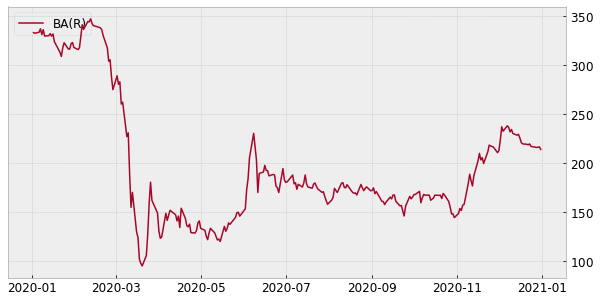

In [ ]:
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

### 2) 해당 주가의 엔벨로프 구하기

## `envelope(df, w, spread)`


* w : 이동평균 계산에 사용한 기간
* spread : 영역의 사이즈 -> 평균값 위아래 10% 영역을 지정하고 싶다면 spread=0.1f로 입력

In [ ]:
fs.envelope(df, w=20, spread=.1)
df.tail() # 평균값(center), 상단 값(ub, upper bound), 하단값(lb, lower bound)이 추가됨

Symbols,BA,center,ub,lb
Date,,,,
2020-12-24,217.15,225.27,247.80,202.75
2020-12-28,216.09,225.25,247.78,202.73
2020-12-29,216.25,225.53,248.08,202.98
2020-12-30,216.67,225.71,248.28,203.14
2020-12-31,214.06,225.22,247.74,202.70


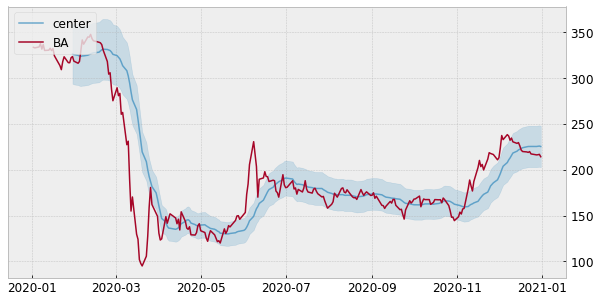

In [ ]:
fs.draw_band_chart(df) # 엔벨로프 범위를 밴드로 그리는 그래프로 그리기

### 3-1) 트레이딩 시그널 만들기 - 모멘텀 전략 : 주가가 A 구역에 들어가면 매수, B 구역에 들어가면 매도

In [ ]:
fs.band_to_signal(df, buy='A', sell='B') # 날짜별로 트레이딩 시그널이 기록된 것을 볼 수 있음

Date
2020-01-02    zero
2020-01-03    zero
2020-01-06    zero
2020-01-07    zero
2020-01-08    zero
              ... 
2020-12-24    zero
2020-12-28    zero
2020-12-29    zero
2020-12-30    zero
2020-12-31    zero
Name: trade, Length: 253, dtype: object

CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.79%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.66%


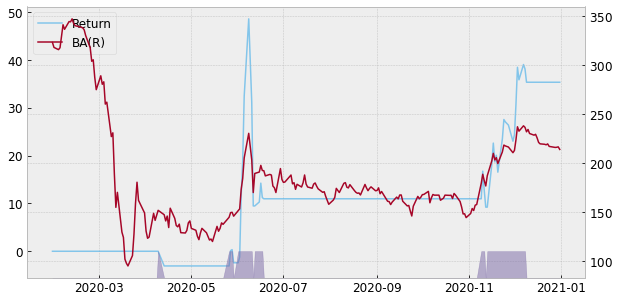

In [ ]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

1. 벤치마크 대비 엄청난 수익률을 거둠
2. 6번 매매 중 4번 이김
3. 샤프지수 높음 (0.88)
4. MDD를 보면 벤치마크 MDD에 비해 엄청나게 위험관리를 잘 했다고 볼 수 있음


### 3-2) 평균회귀 전략 : 주가가 D 구역에 들어가면 매수, B 구역에 들어가면 매도

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.79%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.66%


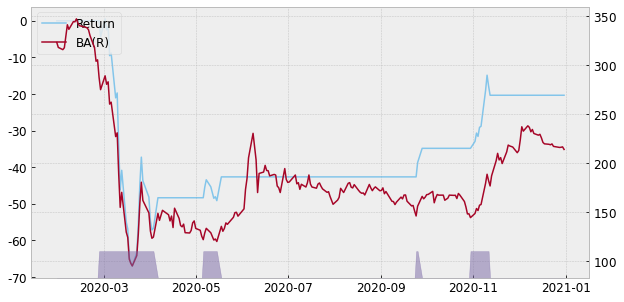

In [ ]:
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 수익률이 하찮기 때문에 볼 필요가 없음, 성장주가 아닌데도 모멘텀 전략의 성과가 훨씬 우수함

# 5. 변동성
* *미래의 불확실성(uncertainly)* 때문에 발생하는 투자수익의 변동성(variability)
* *해당 주식의 위험*을 의미하며, 위험과 기대수익률 사이에는 상관관계가 있음 (High Risk High Return / Low Risk Low Return)
* **효용(utility)** : 개인마다 다른 기대이익과 위험에 대한 만족도를 계량화한 것 -> 변동성의 크기(위험 정도)는 사람에 따라 가치가 달라짐
  * 높은 변동성 -> 높은 기대수익률
  * 낮은 변동성 -> 낮은 기대수익률

# 6. 볼린저밴드(Bollinger band)
* *이동평균에 변동성을 결합*한 그래프
* 이동평균선이 밴드의 중심축, 상단과 하단은 이동평균±(표준편차)로 표시
* ***BB(N, k)***로 표시
  * N : 이동평균을 구하는 window size (ex. 10일, 20일, ....)
  * k : 표준편차의 몇 배를 반영할지 결정하는 변수 (ex. 1, 2, 3...)
  * ex) BB(20, 2) : 20일 MA를 사용하여 표준편차의 2배를 밴드 사이즈로 잡기
* 투자전략
  * *모멘텀* 전략 : A에서 buy / B에서 zero
  * *평균회귀* 전략 : D에서 buy / B에서 zero


## [파이썬을 이용한 BollingerBand 백테스팅]

### 1) TSM(TSMC) 기업의 주가 불러오기

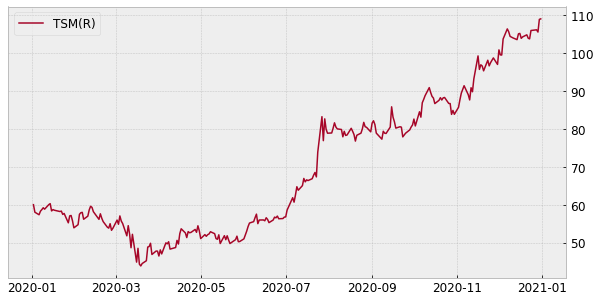

In [ ]:
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

### 2) 해당 주가의 BB(20, 2) 구하고 블린저밴드 범위를 같이 그리기

## `bollinger(df, w, k)`


* w : 윈도 사이즈
* k : 밴드 폭을 결정하는 배수

In [ ]:
fs.bollinger(df, 20, 2) ## BB(20, 2)
df.tail() # 블린저밴드 값이 계산되어 center, ub, lb가 산출됨

Symbols,TSM,center,sigma,ub,lb
Date,,,,,
2020-12-24,105.97,103.23,2.62,108.48,97.98
2020-12-28,106.15,103.60,2.48,108.55,98.65
2020-12-29,105.56,104.03,1.96,107.96,100.10
2020-12-30,108.90,104.43,2.10,108.63,100.23
2020-12-31,109.04,104.91,2.01,108.92,100.89


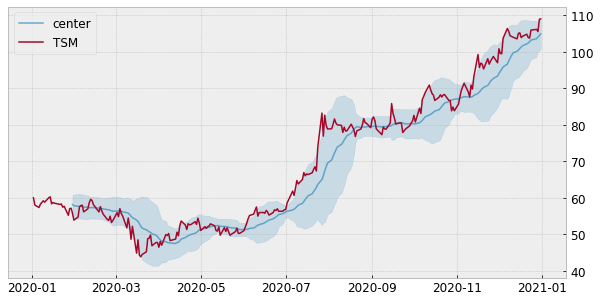

In [ ]:
fs.draw_band_chart(df)

### 3-1) 트레이딩 시그널 만들기 - 모멘텀 전략 : A에서 buy / B에서 zero

CAGR: 9.12%
Accumulated return: 8.40%
Average return: 0.86%
Benchmark return : 95.41%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.76%
Benchmark MDD: -27.24%


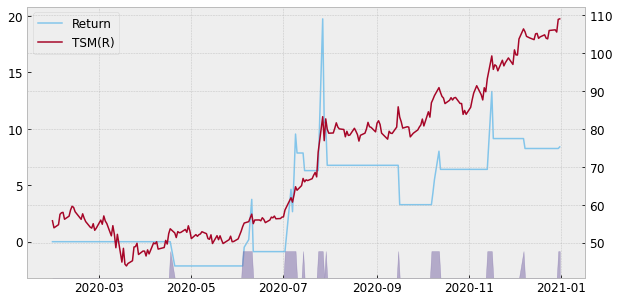

In [ ]:
fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 객관적으로 나쁜 수익률(CAGR: 9.12%)은 아니지만 TSMC 상승세를 보면 그렇지 않음! (Benchmark return: 95.41%)

### 3-2) 평균회귀 전략 : D에서 buy / B에서 zero

CAGR: 15.37%
Accumulated return: 14.15%
Average return: 4.53%
Benchmark return : 95.41%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -15.97%
Benchmark MDD: -26.40%


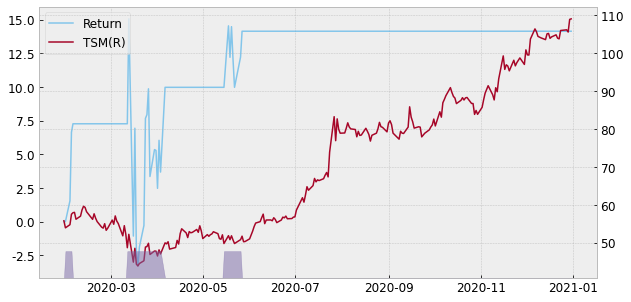

In [ ]:
fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 성장주인데 평균회귀 전략이 오히려 수익률이 더 좋음!

### 4) BB(20, 1) 구하기

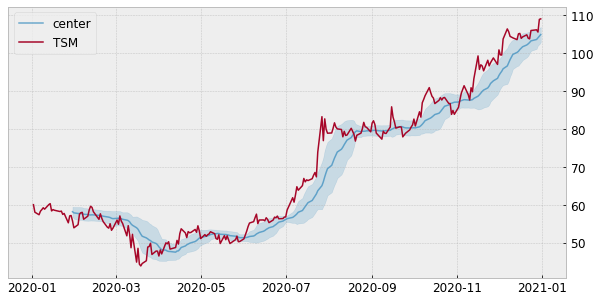

In [ ]:
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.bollinger(df, w=20, k=1) # BB(20, 1)
fs.draw_band_chart(df)

-> BB(20, 2)로 할 때는 *주가가 밴드 밖으로 벗어나는 경우*가 별로 안 나왔는데, BB(20, 1)로 하니 많이 나옴

### 4-1) 모멘텀 전략 : A에서 buy / B에서 zero

CAGR: 21.69%
Accumulated return: 19.97%
Average return: 1.27%
Benchmark return : 95.41%
Number of trades: 20
Number of win: 5
Hit ratio: 25.00%
Investment period: 0.9yrs
Sharpe ratio: 0.60
MDD: -14.60%
Benchmark MDD: -27.24%


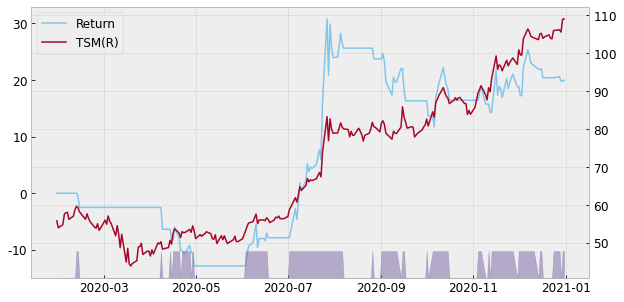

In [ ]:
fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 수익률이 많이 개선되긴 했지만 그래도 벤치마크 수익률을 보고 있자니 아쉬움

### 4-2) 평균회귀 전략 : D에서 buy / B에서 zero

CAGR: 35.70%
Accumulated return: 32.86%
Average return: 2.75%
Benchmark return : 95.41%
Number of trades: 8
Number of win: 7
Hit ratio: 87.50%
Investment period: 0.9yrs
Sharpe ratio: 0.96
MDD: -19.48%
Benchmark MDD: -26.40%


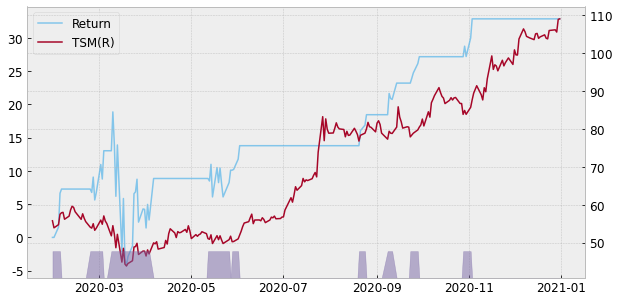

In [ ]:
fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> CAGR이 개선되고, 무엇보다 샤프비율이 좋아짐

### 5) BB(20, 1) - [모멘텀 전략 + 평균회귀 전략] : D에서 buy / B에서 zero

In [ ]:
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.bollinger(df, w=20, k=1)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B') # 모멘텀 전략
df['s2'] = fs.band_to_signal(df, buy='D', sell='B') # 평균회귀 전략

-> 모멘텀 시그널을 만들어서 s1에 저장, 평균회귀 시그널을 만들어 s2에 저장


## `combine_signal_or(df, 합성하게 될 대상 시그널의 이름들)`


* 시그널을 OR 조건으로 합성
* AND 조건으로 합성 -> combine_signal_and()

In [ ]:
fs.combine_signal_or(df, 's1', 's2')

Symbols,TSM,center,sigma,ub,lb,trade,s1,s2
Date,,,,,,,,
2020-01-02,60.04,NaN,NaN,NaN,NaN,zero,zero,zero
2020-01-03,58.06,NaN,NaN,NaN,NaN,zero,zero,zero
2020-01-06,57.39,NaN,NaN,NaN,NaN,zero,zero,zero
2020-01-07,58.32,NaN,NaN,NaN,NaN,zero,zero,zero
2020-01-08,58.75,NaN,NaN,NaN,NaN,zero,zero,zero
...,...,...,...,...,...,...,...,...
2020-12-24,105.97,103.23,2.62,105.86,100.61,buy,buy,zero
2020-12-28,106.15,103.60,2.48,106.08,101.13,buy,buy,zero
2020-12-29,105.56,104.03,1.96,105.99,102.07,zero,zero,zero


CAGR: 52.29%
Accumulated return: 48.14%
Average return: 1.69%
Benchmark return : 95.41%
Number of trades: 28
Number of win: 12
Hit ratio: 42.86%
Investment period: 0.9yrs
Sharpe ratio: 1.03
MDD: -20.23%
Benchmark MDD: -27.24%


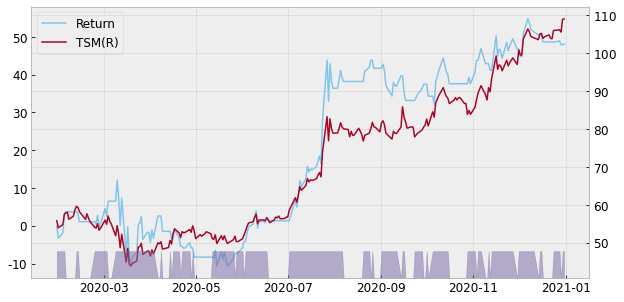

In [ ]:
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 흡족한 모델로 변함 = *모멘텀 전략과 평균회귀 전략을 동시에 적용*한 것이 제일 좋은 성능을 보임 (CAGR, Sharp ratio)

* BB는 *단기투자*를 하는 투자자 사이에서 인기가 매우 높은 지표
* BB를 활용한 투자 전략이 많이 실행되기 때문에, 투자 기회를 자주 놓치는 전략이기도 함

# 7. 스토캐스틱(Stochastic)
* 고승덕 변호사가 유행시킨 *단타전략*
* Stochastic 지표 자체는 1950년대 조지 래인이 알린 지표 -> *최근 N일간 주가 범위 중 현재 주가가 얼마나 높이 있는가*
* stochastic은 주가 수준을 잘 보여주지만 너무 들쭉날쭉해서 그대로 사용하기엔 힘듦 -> *Moving Average*하여 평탄화 작업을 해줌 = 이동평균을 구해 스무딩함 (이를 *Slow k*라 부름)
* Slow k도 아직 충분히 평탄화되지 않았다고 생각되어 한 번 더 Moving Average 작업을 거침 (이를 **Slow D**라 부름)


## `STO(N, m, t)`

: stochastic 지표 생성 함수 -> 3개의 변수가 필요
* N : 최초 stochastic 지표를 구하기 위한 기간
* m : N일 간의 stochastic 지표의 Slow K를 구하기 위한 기간
* t : m일 간의 Slow K 지표의 Slow D를 구하기 위한 기간

### 1) Stochastic 투자전략
* *평균회귀* : Slow K가 20보다 낮으면 과매도 구간(buy) / 80보다 높으면 과매수 구간(zero)
* *모멘텀* : Slow K - Slow D가 양수일 때 상승 추세(buy) / 음수일 때 하락 추세(zero)

## [파이썬을 이용한 Stochastic 백테스팅]

### 1) DAL(델타항공) 기업의 주가 불러오기
: stochastic 지수를 구하기 위해서는 단순한 주가만 필요한 것이 아니라 OHLC 전부 필요하므로 get_price() 대신 get_ohlc() 함수 사용

In [ ]:
symbol = 'DAL'
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,40.44,39.60,40.42,39.73,"5,176,400.00",39.73
2020-12-28,40.78,40.01,40.27,40.15,"10,654,400.00",40.15
2020-12-29,40.84,39.90,40.84,40.03,"8,142,800.00",40.03
2020-12-30,40.91,39.89,40.00,40.56,"8,504,600.00",40.56
2020-12-31,40.74,39.76,40.30,40.21,"8,705,700.00",40.21


### 2) Stochastic 지표 구하기
: df에 종목코드가 들어있지 않기 때문에 종목코드 symbol로 보내줘야 하고 필요한 기준 일자인 n, m, t 값을 함께 전달

In [ ]:
fs.stochastic(df, symbol, n=14, m=3, t=3)

,DAL,slow_k,slow_d
Date,,,
2020-01-02,59.04,NaN,NaN
2020-01-03,58.06,NaN,NaN
2020-01-06,57.66,NaN,NaN
2020-01-07,57.61,NaN,NaN
2020-01-08,58.85,NaN,NaN
...,...,...,...
2020-12-24,39.73,17.11,18.44
2020-12-28,40.15,25.84,20.44
2020-12-29,40.03,24.35,22.43


### 3) 주가와 slow_k 지표 비교하기

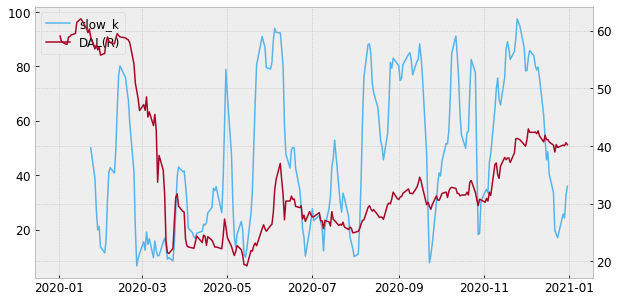

In [ ]:
fs.draw_chart(df, left='slow_k', right=symbol)

#### 3-1) stochastic-모멘텀 전략 -> buy: slow_k<=20 (매수), zero : slow_k >= 80 (매도)

CAGR: -30.16%
Accumulated return: -27.93%
Average return: -1.64%
Benchmark return : -30.05%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.37
MDD: -61.71%
Benchmark MDD: -69.06%


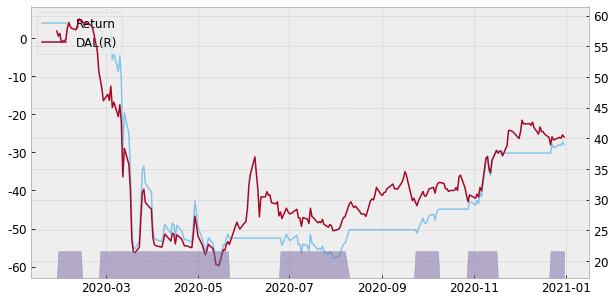

In [ ]:
fs.indicator_to_signal(df, factor='slow_k', buy=20, sell=80)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

1. 수익률, 벤치마크 수익률 모두 낮고, MDD, 벤치마크 MDD를 보면 위험방어가 거의 되지 않음
2. 그래프 상자를 보면 주가가 급락할 때 전혀 방어를 하지 못함

#### 3-2) stochastic-평균회귀 전략 -> buy: slow_k-slow_d >= 0 (매수), zero : slow_k-slow_d < 0 (매도)

In [ ]:
# 데이터를 다시 받아와서 스토캐스틱 계산까지 다시하기
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.stochastic(df, symbol, n=14, m=3, t=3)

# slow k와 slow d 중 뭐가 더 위에 있는지 알아야하게 때문에 계산하여 저장
df['indicator'] = df['slow_k'] - df['slow_d']
df.tail()

,DAL,slow_k,slow_d,indicator
Date,,,,
2020-12-24,39.73,17.11,18.44,-1.33
2020-12-28,40.15,25.84,20.44,5.40
2020-12-29,40.03,24.35,22.43,1.92
2020-12-30,40.56,32.62,27.60,5.02
2020-12-31,40.21,35.93,30.97,4.96


indicator 값이 0보다 크면 매수, 작으면 매도하도록 트레이딩 시그널을 만들고 백테스트하기

CAGR: -2.96%
Accumulated return: -2.74%
Average return: 0.69%
Benchmark return : -30.05%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.06
MDD: -53.57%
Benchmark MDD: -69.06%


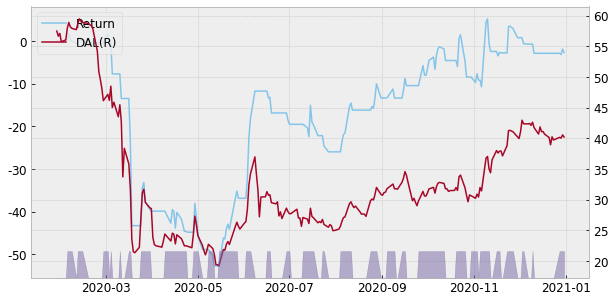

In [ ]:
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

-> 여전히 수익률이 마이너스이긴 하지만 아까보다 훨씬 개선됨 
Buy 이런 전략을 가지고 투자를 하기는 어려워보임